In [21]:
import dill
import codecs
import pyautogui
import time
import pyperclip
from pyperiscope import Scope
from pyperiscope import Pilot

# 0. Open odoo tab
Make sure only pyperiscope tab is open

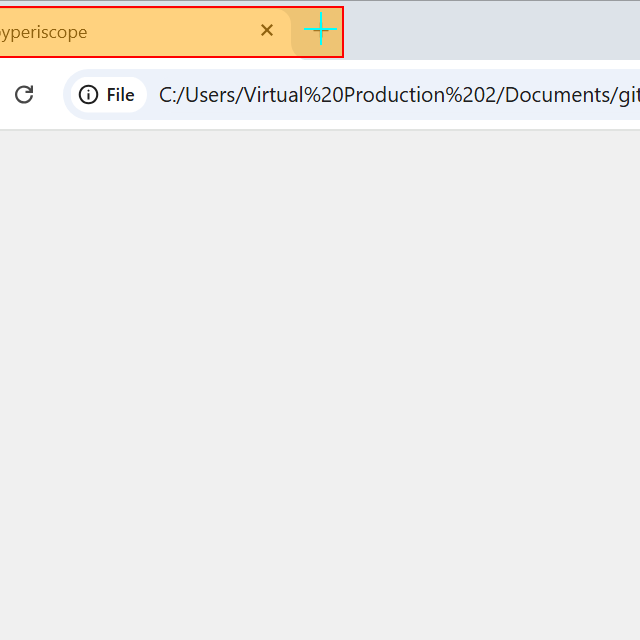

In [22]:
# comment: Automated step generated with pyPeriscope V2 
payload = '''gASVaGwAAAAAAAB9lCiMBGFyZWGUWPQXAABpVkJPUncwS0dnb0FBQUFOU1VoRVVnQUFBY2dBQUFBekNBSUFBQUNjNFEvVEFBQVJ2VWxFUVZSNG5PMmRlMUFjUjM3SGY5MnpEMkJmdkU4SVZrSVdaVnRPS1phMVJuZkVCdWR4dVRpS3JaTzhrZ293b2c0bEZZZkl0VTVjMHExVElmN0hWR3hzbndwVGNXMTBWUmRka1kzUUEyd09PWTdQU2tvbGRDY1N5T3FjODlrK1ZXRUxhOEZyeEhPQkJmWXgzZm1qMFhpMExNdnNzZzhrOWFla3JkbnBudjc5bUNxKy9PWTN2KzVHbjd0SGdjUGhjRGlKQTZmYkFRNkh3N25iNE1MSzRYQTRDVWFsdkN2R09DdERrNm5WYU5TQ0lHQUJZNFRRcWxkUlNrV1JpSVFFZ3FINXhjQ0NQMGdJV1lQRFVSeFRxOVVxbFdMSE9Cek9lb1BKUllpUVFDQzBHQWpPTC9vSm9hbTBENEFvQlFCQWFPbHJmQU1oSlRsV2pGQ09TV2ZVWjYxZHJpakF6T3o4MUt3dklmZUxPV2JTWjYxOUtBNkhzdzZabnAyZm52RVJtbmg1UllBb1VJWGF5YnF4U3hRTnZxcXdHblFadVVhOUlDUXlhU0NLWk1JN056ZS91SlpCZEpuYS9CeURnSGsyZzhPNW14RkZNalk5TzcvZ1QrU2c4UWFqbElLUzUrRlZWQ25ia0ZXUVkweXNxZ0tBSU9EQ1hPTmFJczBjbys1YmVTYXVxaHpPWFk4ZzRBMTVwbXhEUWg1TUViQ1lNOTZuYjRTQUFxdzZSTFFjYTBHdTBaQ1ZFYWQ5QmVSbDYxVXFQREU5Rit1Ritka0dvejR6R1M1eE9KejFTYTVKTHdqeHlJVUVBa1FwQlJTM3FFcmpzUDhVRUt5VUdGZ3g0alBwczVLcXFwS1ZXT05Xa3lHTHF5cUhjdzhTaDF4OEF3SkM2Vm8xOVhZb29TdWxCU0lMYTZaV2s1ZXRUNlFMSzVPWHJjL00wQ2pzbkptaHlUT2x5REVPaDdQZXlNdldaMnFWeW9VY1NsY1V3YmhCQ0swazFoR0VGU0ZVbUd0TXNBdFJLY3d4S2ltUVNyMWpIQTVudlZHWXEwZ3VKTkRTWjFKS01CRXJ6MW8yZGdSaE5la3pFLzYyS2pxQ2dJMjYxWi91VGZvcy9yYUt3N25IRVFSc2lpVVptT3c2V0FTd3ZCZ3NvckNtb1N4VXlTdS9tTzZtUkpUNUNBbWZxc0RoY0ZMQWVpdGRYeDRNaDFjRmFEWHFGSWVyREVIQVdvM2FId2l1MUNFT3h5aWxDQ0dNOFp6UDk5Rkh2NTcyZXRrZkZvekFaREx0MlBHN2VwMU82clkyOXprY1R1b1FCS3pWcVB5QlVQUnVDSUFBVFZJU0lBd0tGQU9TSXRkd1lkVmxhbFBnUkVSMG1kb293cXBUL0lLTHdlVFNPK1B0ZktmbmkrdERJeU5mYWJVWmdrcEFnRVF4RkFnRXZ2VkJZZG5XKy9ZL3M4ZGtOSEZ0NVhEdUxMSXl0S3NLSzAxYWFuVTVTS2Fxc0Z4WU16VHExUGl4bk9pbXRkb1lIR05DK2QvL00vQ3YvM1o2WVhGUnBWSnJORnBLU2FZMkN4QXNMQkJLNmVqb3paczN4NjVlL2VqUXM5WGYrWFk1MTFZTzV3NWlkYVZDaUJLU3lsOXFTaWxDbUNWMXc0VTFMWGtBSmFaVmloMGpoR0tNUHZqNWhiTmQzWVJTbFNDVUZCZFpkajZ5c1doRFFVRytnUEhwczEyZmZQWmJTaW1sMUxldzhPT2YvSFI2ZXZySlAvbGpkbUVpZmhRT2g1TmNWbGVxdUVLbDZhbXBYL1JlQklES0ovN1FsSjBkMDdVSWZUTmhZSm13cHUrMWUzVFRLa0ZRTWdpbEZHUFVQM0MxcS9zOEFHQ0U5dTc1czk5L29wS2xVd0ZnenVjYm41aWd0MEFBQ0tHdTd2TzV1WG03eW5meXVKWER1U05RS0FpeDRwMmVldjk4TndCc2YvaVJXSVZWVHJpV3BURmtpMjVhb2Q0aGhMd3pNeWZibmFJb0NsajRxNzg4L05UdUovVTZYU2dVbXZQNWVzNi9mN3oxbjBhKzhvUkNJVUlJSVlSU0tvcGlLQlE2MmU3MHpzeHdWZVZ3RXN2SXlNaUJBd2NHQndlWE53ME9EaDQ0Y0dCOGZEeU9ZZGY1dytWZFZSWXFFZ0lBNzNTZjkvdjlHT1B2NzltOTYxRUxFMUNWU3ZYaGhmLzY5NTlmK09MNkVDc1ZBSmxZVTBvRHdjQTc3NTZYQnJtRDhIZzhwYVdsVFUxTjZYYUV3NG5BaXkrK09EQXdVRjFkSGFhdGc0T0QxZFhWQXdNRE5wc3RYYjRsanpVSjY4REFRRU5EZzk4ZllUa3Z2OS9mME5Bd01EQ3dsdkZqQlNQa25mRis5dHRyYXJWbTh5Yno5Nzc3UjRRUUpxTytlZC8vL2ZvM2hCQ00wVklTZ0trcSswQUlLUHJrMDgrOE0xN01nMVlPSjNHOCtlYWJKU1VsNCtQak5UVTFrcllPRGc3VzFOU01qNCtYbEpTMHRMUWszQ2hOd3ZxdE1abU9YMWl2WGJ0MjZOQ2hpeGN2THRmV3hjWEZob2FHaXhjdjF0ZlhYN3QyYmEyZUtnWWg5UEhIbjQxUFRGSktkdTdjb2RHb3BTa0FnVUJRSklTSW9rcFFZWXladGdJczVab3BwWVNJazlOVEgzLzg2UjJYRFNncUtob2FHbXB1Yms2M0l4eE9CTXhtYzBkSFIwbEp5ZGpZR05OV3BxcGpZMk1sSlNVZEhSMW1zem5oUnRQNFc4eE14N0ExU3hoYnQyNnRyS3k4Y09IQ2xTdFhHaG9hVHA0OHFkVnFBY0R2OXg4K2ZQaktsU3NBOFBqamoyL2R1alZSSGl2Qk8rTlZxOVNFaEVvMmJnUUFsV3JwQnpUcURjOVdINXlibTlPbzFjTmZmZld6OCsrSFFsSVJIQ1dFSW93MWFzM1V0RGVWM25JNDl3Sk1XNTk1NXBteHNiR0RCdzlTU3FlbXBwS25xZ0NnY0NIcmlmR3hpWW5iTXJ5akhnODdjTi80MHUrL2JTWCt2THo4dlB3Q2hlYmpqMWhWS3RXSkV5ZDI3OTROQUV4YkE0RUF5d0F3VmQyOWUvZUpFeWNrYVVzTkxKMXFNQmlNUmtNd0dQVDcvY0ZnTUJnS1lRRnZlL0QrOGtkM1B2enc5aWUvOTkzQ2dueVZtczA0UUlLZ05ob01XUmtaTEpKVmJxdXBxYW15c2hJQVNtV3dKcGZMVlZwYTJ0UFRJKy92Y0RoWWg1NmVudExTVW8vSFUxOWZMMTNvY3Jua25ka0lqUHI2ZXVtOGRDMXJZaVpLUzBzZERvZlVSejZzL0x4OFREWUlPeStOSmg5VDN0VFQwOE9jWHo0bVkva2Q0SERrTUczTnpjMmRuSnljbXByS3ljbEpwcXBHbUx3ZmtiNWZYbTU5NDFYNXZ3N25UMW5UcWZaL0NXdnErK1ZsWmJZQjFoS3hBZ0RHK08yMzMzN3BwWmZPbkRsejVjcVY1NTU3TGhnTU1sV3RycTUrOWRWWFV4K1FFMElKSVRNenMvL1k4aVBwcEZxdHpzdk4zYnAxeXg5VVBiNTU4eWFNOFE4T1BkdDkvcjN4aVVrRXFLU2srRkhMSSs5Mjk4ejVGdUx3dDdTMGRHaG9pQjB6UlJzYUdySllMRlZWVloyZG5YdjI3SkY2bmpwMXltNjNTMThQSGp6WTJ0cmEzdDRPQUE2SHcycTFkblYxV1N3V0FPanA2YkhaYk5MWHlzcksrdnA2MWxPNnRxK3ZyNmlvYUxrL2xaV1ZXN1pzWVM1NVBKN3U3bTUyM3VGd3RMUzBTR05LNHNoc3RiVzFNVmRkTHBmVmF1M3Y3NWZuRnQ1NDQ0M2EybG8ySnVzQUFJMk5qY3hFUlVXRjNXNW5YNXVhbXVRM2hNT1IwR3ExVXVDU2JHVkkyWVNybFZock9Ja1FldTIxMXlpbFo4K2V2WGp4SWp0WlYxZjN5aXV2cENYTkllVlBnOEdRVkpBUkNvV0dSMFk4bzZOWHIzNzA0dDg4WDdwNVUxblpmVWYvMXVieitVS2hrTWxrK3Mwbm40MVBUQXFDQ3NkWXh1dDJ1N3U2dXFTdjdlM3RMS0JyYkd6Y3YzKy96V2J6ZUR4TS9sd3VsOXZ0M3J0M3I5UzV0cmFXYVJ3QU5EWTI5dlgxdmZYV1cwdzliVGFiM1c2WFdsdGJXNjFXcTh2bGtzNGNPM1lzb3FveWw0NGRPOGFPaTRxS21ONjVYSzZXbHBhMnRqYTVSWGJBYkVsL0FDd1dTMXRibTgxbU8zTGtpR1JpeTVZdFVuK0x4V0szMjF0YVd0Z1p1OTFlVlZVbHRUWTNOenVkVG5ZSFlycVRuTHNidDl0ZFUxUERZbFdFME9Ua1pFMU5UUktEVm1YYVUvRlk1ZjBQYnBPZkdmVjRXTkQ2cDA5OS80RnREOG1iOHZMeWxadE9RTGtWUXVqMTExK3ZxNnRqWHc4ZlB0emMzSnl1NUhGT3Rpa1E4SXVpaUJCUUdRQkFpVGkvc05EejNuOEFnRWdJSVVTbjB4bU5SbEVVdjd6aFJnZ0hRMEdUMFJTVE9iUFpMRWtWbzZxcWFtUmtCQUNZVkVrQjQ3dnZ2bHRWVlNWWFE3bklBa0JGUmNYMTY5Y0JnT1VFNUszTUJCdVdVVjVlSHNVbEp1anlrLzM5L1dheldSNCtNNWJia2dhWFYzVHMzNzlmM21IWHJsMEF3RXowOXZhR3RVcDNnTU5oTUZVZEhoNHVLQ2c0ZCs3YzJiTm5Dd29LaG9lSGEycHEzRzUzR2gzTHl5KzQvNEZ0OG4rYk5wZXlwZzFGUldGTnloT3NrTUE2MXVibTVpTkhqanovL1BNdnYveHlvc2FNRlVycDl1MFA1ZWJrQ0lJcVRObVp1aUtNdi81Nk5CZ01DUmdqaEVSUlpQdVlYLzNWUnhqai9MemM3ZHUzSmJCUW82NnVycSt2angwN25jNHdBVm9KcGtvVkZSVmhpVXVGYW5YNTh1V3FxaXAydWZTOHY5SzFFYyt2RkFzdmgybXJ6V2FUdTlyYjIzdmp4ZzJGSTNEdWV1U3EydEhSVVZaV1ZsWlcxdEhSa1ZSdFRYdTVWU0xmTEVsUG9PbUNVR295bW43bm9XMi82T3VUMzFsS0tSWUVRU1dFZ2lFczRKQW9xdFVxdG1JQ3h1akQvL3p3eXh0dVFzaTJCeDh3R1UwaUljSWF3dTNyMTY5djJyU0pIZS9idDg5cXRYbzhIaGI5TFE4WTVVZ2FWMXhjREFBcnBWQ1Z3UElKTEhrNk1qSVNwUktMMlFvakxOcU40aXJ6VU1yUGNqakxPWHIwNlBEd2NINStQbE5WZHBKcGEzVjE5ZkR3OE5HalI4K2NPWk5ZbzJrdnQ3cXJabDZ4MVFiMjdYMUtvOWJJN3l6R3VPcXgzL3VIdi92aHkzLy93NzkrN2kvVUtwVW9paGhqakZILy8xNzlXYy83aEJDdFZ2dk0zcWNoeHRVUzNHNjNYSVpZSW5YZnZuM3NxOFZpTVp2TjNkM2RuWjJkOHRkV2pMRFpFMDZuczdhMkZnQTJidHk0dkRVTzl1elpVMWRYZCtuU0pRRFl0MitmMiswT0t6eUFXMGtHS1Y4aGQweXVsZjM5L2ZJT25aMmRVbHJEYkRhSHRYSTRjbzRmUDE1ZVhuNzY5R2xKVlJsbFpXV25UNS9lc1dQSDhlUEgwK1ZiOGdnWGtUU0cwSVFrd0RTbE5OdGthcWl2VTZsVWdpQXMvZlhBZUdQUmhrM21raTJsbXpjV2JWQ3BCRUVRNW55Kzk5Ny80SjkvL0JPUmlJSWdOTlRYbVl6R09INzhnd2NQU3NkV3E3V3Fxa3FlZGEydHJUMTE2bFJ2YjI5WUhoTUE1SmxRVmxERlh2Z1VGUlhaN1hhYnpTYlhRVmJYdFNvZWowYyt0L1hTcFV0UFBQRUVBTEFxQlJZK3N5YUh3OEdPMlpzb3FjVEs1WEt4MTFueVlaMU9wOVRCNFhEMDl2YSs4TUlMN0d0cmF5dDdXeVYxcnErdlh6WG01ZHc3RkJjWG56dDNMa3hWR1dWbFpkM2QzUkVmbSs1MHdsTUJJaUZKV2pabVZSSXlTUjhoUkFqZFZiNXpjbkxpYkZjM0JSQUVBUUErL3VUVHdzTDh3b0o4Q2pBK05qSGkrZHAxOVZjMzNNT0VVb3lRZGUvVHU4cDN4ckZzb05sc2JtMXRsWW8zNitycXdwNjdHeHNiVzFwYXdsNWJNZnI2K2lvcUtxUng1Q1ZLVEdGWlZSTkRYbnNRaGFLaUlxZlQ2WFE2bC92VDN0N3VjRGprRnBtVnhzYkdYYnQyV2ExV2FjcTJWSklsMGRiVzF0blpLWFdRcHlrc0ZrdFhWNWZWYXBVbUp0cnQ5cmlUR0J4TzRsQTBSeUFNVTNiTzdxZjNBa0J4OFpyS0ZkRG43bEg1OStMQ0hHMmExcnBlOUFlL0dwdGFxZlcra2tMbFE4a1h1bDcwKzltYks0MWFaVERvS2FXemN6NTJ4ME9oWUdaR1J0d0xYVGMxTlYyNmRPbnk1V2hsdzZ6TU15d0x5YktmYThtaXBveUkvbk00NjRFdmhtOUdhMGJKMzBkd1phdmhFYXMvR0VxWHNBWkNxMnkwb0J5RUVLWDBPOTh1MzdidC9zNTNlZ1kvLytMcnIwY0I0Zm5GQUFCRkNQdjlpOFhGRysvYlVwcnNyVmxZK3BLckVvZVRhdEtUMUZ4aG9ldjVCYitTbmFpVHdmeENoRld5NG9acHE4bG8rdk1mSEdLYkNYcG5abGdhRnlISVRzbG1naDZQaDVYbEoyTndEb2V6Q2dpQVVFaE5oUUNsY0d0ZkZsZ3VyQXYrWUZwMktDR0VMdmdEaVIyVHlTVWhSSy9UUGY1WVJTU2pCR09jREZWbFQ5QUFJSi9VeE9Gd1VrbzhXZFo0UWJlbEhzSnpyQUNRYTlKbkcxSzliZmYwN1B5a2R5NUtoNWh5ckJ3TzU2NW5sUnpyRW9nQ1RiNjZVa0JZdnZSTGhKck42UmxmaWxmUkZ3bVpudkZGNlpER0xRNDVITTc2UkZuSk9jVkpqbHFYRnJhK3ZWSXpnbWVFMHB1VE0wbDFKWXliRXpNa2FnRnB1aXJBT0J6T3VrVmh2RVdCU3A4Smh3TEZHSmEvS1l2czJjSmlJUHFEZVFLWm1KNWJOYnVxZk85ckRvZHpqeENUTENEQXlWQldCRGhpVExpaVo5T3o4N08raFNSNGNoc3p2Z1h2M1B5cTNUVHFsSzZXemVGdzFqK2EyQXBES1FLVTBJbWxORXF0YkRUSkg1dWFuVWhtM0RvK1BUcytOYXVrWjFhR0pubHVjRGljTzVFc2JheXlRQkVDUUd0TkM5QWxTWTAyQTJHVlNOQTdPeDhLaVhuWmhzUStqSWRDNG9SM3pxZXNjRlhBT0YxekZqZ2N6cm9sUTZ2R0dNVzh4Z2dGREpnQ2liTVVpd0pHZUZWcFh2MFIyN2ZnOXkzNERib01vejVMdStaSGNuOHdORE0zUCt0YlhMM3JMWFJaMmpVYTVYQTRkeVg2ekl5WjJET1dTeUhuVXNTcHNOaVZTaHUrS0FsNGxRcmxyRzl4MXJjb1lKeVZxZEdxMVJxMVNxMFdsSlE3aUlRRWcySWdHUElIZy9NTGdUZ0t1YklOdWxndjRYQTQ5d0xaeHF3NGhIVUphZjh0WU9FcmxUNldXcEhVQ2NFdFRWVkliQkdvU01pc2IzRVdZb2czMTRqSmtNVkxBamdjVGtSVWdtRFNaeWw1QVI2RlcxcjZ6WWZzSU00YTJIV3RXUmlqbkpUUEFlTndPSGNRT2NZc25MNzlBbFppWFF0cllhNHAxbTFUT1J6T1BRWEd1Q0RYbUc0dndsbS9zcFdmWStCVlZod09aMVYwbWRyOEhFTzZ2YmlOZFNxcytkbjZkSzFleU9GdzdqaU11c3k4YkgyNnZmaUdkVGVqQ1dPMElTODdROHNMVnprY1RneVk5RmthbFdwMDBwdVEzZlBXeVA4RE9GVFNPTE9HWnpjQUFBQUFTVVZPUks1Q1lJST2UjA1jbGVhbl9wcmV2aWV3lFiMUwAAaVZCT1J3MEtHZ29BQUFBTlNVaEVVZ0FBQW9BQUFBS0FDQUlBQUFDRHIxNTBBQUErYmtsRVFWUjRuTzNkZTF4VmRiNzQvL2RHZzI3UTlBVy9jd1NjSDZoNW1SbU1SRFRKU0N3RlI4WGk0b0RnaUhqUzBXK2hwb0lsYXFsVW9LUmlSMFk3R281NE9Rb21tTjhRSFRWTVBZaDBGTTlrK3RQZ053S2VHYkF4TUdzajdQMzdZK0ZtQTVzNytDRjdQUjg5ZXNpK3JMMzI5YlhYV3ArMXRtN3p2MzhzQUFEZy90SmR1LzUzMWZNQUFNRFBqcFhxR1FBQTRPZUlBQU1Bb0FBQkJnQkFBUUlNQUlBQ0JCZ0FBQVVJTUFBQUNoQmdBQUFVMEJtTlJ0WHpBUHdrR1kzR21ocER0Y0ZRVlZYOVk5WGRPei9xRFliNytXNHlpdWkwdDY5T1Yvdm5mYngxQUIxRmdJRk9jNnZ5enEySzd3MWQ4SjdTaWM0b3hsWTJWcnVZZHBWT254TUFuWVVBQTUycHBzWlFkcXZ5emcvNnpweG9leGR1alVadDRSaEFkMFNBZ2M3MzdYZTNiMVhlNmZCa2RHSTBHblVkV3JOc0ZORVp0WlhVdk5PQjdvVUFBMTNpdTl0M2J0NjYzZTZyNjdUM1ppY3V2NUpnb0p0aEZEVFFKWjU0L05FbkhuKzBuVmZXaWFGejZ5dGlOQmhaSFExMEt3UVk2Q3IydjNqOEVSdnJkbHpSYU96OFdPcDB1azZQT29DT0lNQkFGL3JmLzh0TzE1YVc2bXIvM3lXZDFHbTdMZEZnb0hzZ3dFQVg2dEhENm9uSEgybjk1YnQ2SzYxT2hGRWZRRGRCZ0lHdTFmNHR3VjJEQldDZ215REFRTmZxMGNQS3hycG5peGZUaWR5MzQyWVl4VWlHQWVVSU1ORGxIbjNZcHNYTEdMdHMwMjlqT3RHeEhocFFqZ0FEWGU1aDY0ZGF1SVR1ZnUrUmIyUTRGcUJheTJ2R0FIUlFqeDR0ZmRNMUd0czBXRnB6NjUvLy9DTG51SWc4LzhLWUozN3hpelpkVjhleHNRRFZDRERRNVhyMjZORVZrLzN1MWovLzc4RURJdUwyOUROdERUQUE1VmdGRGRRcEtTa0pEZzYrZXZWcTQ3T3VYcjBhSEJ4Y1hsN2Vqc2xhV2JHeUYwQkQ5enZBTjI3Y2NIRnhpWTJOdmMrM0M3VEdHMis4a1plWEZ4SVMwcURCVjY5ZURRa0p5Y3ZMaTRxS1VqVnZBQjR3TEFFRGRkYXVYZXZzN0Z4ZVhoNGFHbXBxOE5XclYwTkRROHZMeTUyZG5lUGo0enY5UmhYK0lBcS94UUlvZEwrM0FmZnUzYnVvcU9nKzN5alFTbjM2OU5tOWUzZG9hR2h4Y1hGb2FPanUzYnRGSkRRMHRLeXN6Tm5aZWZmdTNYMzY5T24wRzIzSDhLc0g0S1lCTUFnTHFFZHJjRUJBUUZsWjJaUXBVNHhHNHovLytjK3VxNitJMU80RDNKS2I1V1UzYjliYkF2MzNHemUwZjF6LzIvK24xLzlvZnBhOXZZTzlRNjlPbkVVQW5VNW5OQnJ6OC9NREF3T1RrcEw4L2YxTlp5UW5KOGZIeHhjVkZXVm1aa1pGUlowNWN5WW1KaVluSjBjN056MDkzY1BEdzNSaGJRcmF2NzI5dmYvODV6OXIvelpkZCtUSWtTS2kzWVNMaTB0TVRNeWNPWE8weS96aEQzOHdUZGI4ZFBOcGlzaVpNMmQ2OSs0dElqZHUzTkNtcGpHZmJlMnNwS1Nra3BJUzA2cEM4MmxxWEZ4Y1RQOW1jUndXWGIxNmRjcVVLZDkrKzYySVBQbmtrNW1abVIyczd6ZkYvMmpxTEdQcjlrSDZOR08vTnVhNU5YNDM2ZVdKa3dOYXZodzdBd1BxV0ltSWg0ZUh0N2QzV2xxYStSbTdkdTJLaVlreC9UbGx5cFI1OCtZVkZSVVZGUlhGeE1RRUJnYm01K2RyWjJWbVpnWUdCcWFucDJ2bkZoWVcvdUVQZnpDZjFKUXBVODZjT1ZOVVZHUWVlTTN6eno4dkl0b1Z6NXc1WXpvOU9UblpmSnFtT2NuTXpOUVNxNTJlbnA0ZUZSWFZZRWpYbWpWclROTk1UMCtQajQ5UFRrN1d6dEtHZ01YRXhHam5ob2VIbThjWU1MR3hzVEZ0SCszcTliVDM3UUJZQUxvVjNhWk5tK2JNbVdOYVZOV1dNcldsVCsxUDdhd0d5NUZhWXJVbDNRWkx0TnAxdFVWazdib05scTNOTCsvaTR0TGdYTk1VR3AvZStMYkViQ0c3ZCsvZTJoS3crU0s0bUMzS041anRwaVlJWEw5K1hkc00vT1NUVCtwMHVtKy8vYmJqcTZDYldRSnVKWXVyb0hlbnBvakkrSW1UQnc3K3RmbFpySUlHdWorcmtwSVNFZEZTZCtEQUFlM1VUejc1eE52Ylc0dXg1dVdYWHphLzJzaVJJd3NMQzBWRVd3NDJQMWRiTmExTlZ1UHA2ZG5VemZmcDB5Y3FLdXJHdlUxWm1yTm56L2JwMDZkeGZSdmZsbW5pZVhsNXBsT0Nnb0xNTHpCOCtIQVIwVzRpSnllbndibmUzdDdtc3dxWTZ0dXJWNjk5Ky9idDNidTNWNjllMnBpczY5ZXZLNXd4ZTRkZUF3WU9Odi92Vi8rUGkzYld2L1R1M2VBczZndDBmM1c3SVlXSGg1dFdBcWVtcGpZSVZWTzBlbzBjT2RMRmpOUVBjRE5Pbmp6cDdlMnRYZDIwb3JpcDYxbzgzZnhiUXZPMEJrZEZSWm5QYWs1T3p0Lys5cmRXVGdFUFBQUDY3dDY5dTMvLy92Mzc5OSs5ZTNlWE5wamRrSUNmcDdwUjBLKzg4a3BnWU9DTkd6ZTBwY25HQzZEbVRDMTBjbklTc3hGUzdhQ3RFTmJXSkplVWxLeGV2YnFwUzJxMzFVQ0RwZWRtWmxXYlE0dHJ0Z0hOb2tXTGlvdUxIUndjdFBwcUoyb05EZ2tKS1M0dVhyUm8wWC84eDM5MDdvMnlHeEx3ODJUMXlpdXZhUC95OFBEbzA2ZlBnUU1IMHRMU3pJZGZhY3pYOFlwSWFtcnExS2xUUmNUUjBiSHh1ZTNnNys4ZkhoNysrZWVmaThncnI3eHkvZnAxMHlBdkUyM2x0bWs5dWZtTW1UZjE3Tm16NWhkSVMwc3pyVTd2MDZkUGczTUJjeDk4OElHbnArZWVQWHRNOWRYMDc5OS96NTQ5N3U3dUgzendnYXA1QS9DQXNUTGZtMmpxMUttN2R1M0t5Y2xwc0oxVlJNeTMxR3BEbWJTQlM3MTc5NDZKaVltS2lqTHZwVGEydVVVM2J0d3dIOEQ4K2VlZnYvRENDM0p2VkxhMk9LNmRsWnljclAwN0ppWW1QajQrTXpOVE96MC9QMThiSUdZKzJkVFVWTk1Ga3BPVGMzSnk1czJicC8yNWZ2MzYxTlJVMDdwdTdiNjB1QXlObnc4bko2ZDkrL1kxcUsrbWYvLytCdzRjc0xnYUJnRGFvZDZCT09iTW1STWZIOTlnK0pYR3RDK3ZpUFRwMDhkODkxbXR4T2I3N0thbnA3Zm10bnYzN3AyYW1wcWFtcXI5R1I0ZWJsci8vT2MvL3prNU9kbjhGclZibVRObnp2RGh3d01EQTAySDVHMndSN0tJSkNVbHBhV2xtUzVndm5yY3c4TWpQVDA5TUREUWZDL2hkcTg4QnpwUGUzYklmZUlYVC81dTBzc2k0dVRVUlVjSUFkQ0Y2djBNdU9sQUZ1WnJkQnZzb2RTZFdaeC9vRHRvWVRja05UL095MDhDQXlyVit6RUdiZk1xOVFMdU56VWRwTDZBU25VQnZuSGpSbng4ZkZKU2tzSzVBWDYrZENMM2JhY2dJNGVnQk5UcktXWkhWNDZKaVdIeEYxRGpmalpSeDhwblFEMGRlK0lEOTBIckRrV3BNNHF4Nnl0c0ZKM1YvVnZhQnRBRXE1WXZBcUREZWxpMTVyMW10T3JpcFdDalVVU29MOUF0RUdEZ2Z1alJvMVh2TmFNWVRmL3ZkRVl4V2xrSks1K0Jib0lBQS9kRHo5WUZXS01UcTY2SXBFNnNXUFFGdWc4Q0ROd1AxdFlQdGVYaVJwM29PaldXUnZiNkJib2JBZ3pjRDQvYVdMZnhHa2FkVGtUWDBkWFJ4dHIwVWwrZzJ5SEF3UDN3c00xRFZsWnRIMkJsRkN1eGFuODdPM2gxQUYySkFBUDN5ZU9QUE55T2E5VXV3dXJ1L2RYS0swbnRjbThYamVjQzBIRUVHTGhQZm1IM2FQdXZYSnRSMHhFMGpHWW5tdjVodlBjdlhiMXpBWFJMQkJpNFQzcjI2UEhFNHgxb3NJalVIUytyN245bS85QnhnRW5nSjRRQUEvZlBrM2FQV3Vsb0pBQVJBZ3pjVDFaV1ZyMytsNTNxdVFEUUxSQmc0TDU2N0JFYmh5ZHRWYzhGQVBVSU1IQy8yVDMyaVAwdkhsYzlGd0FVNDllUUFEVisrTEhxNzk5K1p6RHdCZ1IrcGdnd29FeDFUYzNONzc3Ly9zNlBxbWNFZ0FJRUdGRHNCMzFWK1Q4cjcxYlhxSjRSQVBjVkFRYTZoY3J2Zi94QlgzWG5SejBycFlHZkNRSU1BSUFDaklJR0FFQUJBZ3dBZ0FJRUdBQUFCUWd3QUFBS0VHQUFBQlFnd0FBQUtFQ0FBUUJRZ0FBREFLQkFUOVV6b0VhTndWaFZiVFFZakFhajBXQVFnNUhqa1FBQTdxdWZWNENyYTR4VjFZYXF1eHpzRHdDZzJNOGx3RlhWaGp2NkdvTkI5WHdBQUNBaVA0Y0EzNjB4M3ZteHBvWmxYZ0JBZC9LQUIvajdIMnYwZDFuc0JRQjBPdzlzZ0ExR3FieFR6WUl2QUtCN2VqQURmTGZhZVB1SGF0b0xBT2kySHNBQS82Q3YrYUdLMWM0QWdHN3RRUXR3VmJXaHhmcjJzTkk5MU5QcW9SN3lVTTl1ZHh3U2c5R292MnVvcVpHcTZpNzVEcUVUblZFTVJxTk9wK3VLeVFNQVdrdjNJQjJCb3JyR1dIR251cGtMV09sMGo5aFkyVHpVN2JyYldJM0IrRU9Wb2FvVFI1RHBkRWFEVVhSQ2VRR2dPM2h3QW13d3luZmYzMjNxM3VoMDh2QkRWZzliOS9ocExmbFYxeGp2Nkd1cWF6cjZIT2xFWjVRSDVJa0dnQWZEZ3hQZ3lqdlZkNXNJbFU0bmp6M2N3N3I3clhCdURhTlJidjlZYzdkamE2U05ySFFHZ0c3bUo5bWt4cXByakUzVjE4cEtaL3RJejU5b2ZVVkVweFBiUjNvOGJOM08rZGVKaUZHb0x3QjBOei9WTERWd1IxOWo4WFNkeU9NUDkralo0eWVmbjBkdGVsaTNhOU8xVVlTdHZnRFFEVDBJQWE2cU5qUzFsZlN4QjZLK21uYmNGNTBJbTM0Qm9IdDZFSFpEdXZPajVjVmZtNGVzV3JQVVdGTlRVMUpTOG85Ly9PT1h2L3lsbzZOamp4NDlPbnNHTzRkTzVMR0hlMVI4MzRZRGpCaUZVYzhBMEUxMU5NQjM3dHo1NjEvL1dseGNMQ0wvOGkvL01uanc0Ri84NGhmYVdYLy8rOSt6czdORlpOcTBhUjI4bFdiY3JURmFQTnlrVGllUDJqU1hVcVBSbUphV2xwR1JrWmVYcDlmcnRSTnRiR3c4UFQwblRabzBaY3FVYnJqZHRJZVZ6c2JhNmtjT013SUFQMzN0SHdWOTRjS0ZmZnYyZmZubGw0YjZQL0xYdDIvZkdUTm1lSHA2RmhRVVJFZEhpMGhXVmxZbnpHa1RtdnE1aFVkdG1odTRkT1hLbGVqbzZQUG56MnQvMnR2Yk96azVGUmNYZi92dHQ5b3A3dTd1YTlldTdkKy9meGZNY29jWWpmTGQ5M2M1eEhXbktrNEw4M20zSk9ERHcvRmVOZ3B1ZmVja244U2lDUjllWE85MS8yOWNyWktVQUw4NGlUNitmNXB6MTkySS9vdVlpWFAyT3k0N3ZuMUtGOTRLMEl6U3ZVRVRWNVZNU2o3eHpxaDZIekh0R3Rkak5HN2V2RGttSnViY3VYTUdnK0ZYdi9xVm01dGIvLzc5ZS9ic0tTTGZmUFBOc21YTDFxOWZYMU5qZWMxdzU3SjR4S2dlVnJwbTZydDM3OTdmL2U1MzU4K2ZIeng0OEwvLys3OWZ1SEFoUHo4L016UHp5eSsvdkhEaHd1Yk5tL3YzNzMvKy9Iay9QNy8wOVBRT3psN0ZWLy81VmNXOVB6NS8zY1hGeGVYMXp6c3lRWjFPSG1sMnliNUorckxMQjFhL09tbmtzMjVQRGIzMzM3T2pWNTlyK1pxNWNSNVBQYnN5VjBSS2QvZ09kWHRxeVJlV0xsV1NFdUQyVk1DTzR2Yk1XK2NxM3ozZDdhbnAyN1pNZDN0cWFOanU4aVl1ZFhyeFUwUGRSaWNWM3RkWmE1Mnk0N0grM3RvVEZCUnp2TUVkME9lczhIb3FZT3UxQnFlV0hsdjk2cVNodGMrc2wvK1N2ZWNyRzArNC9NamFHYU8xRjhDenZuTjJYcWd3UDFON2NzMytHeG93WS9YeEVuMW4zN3NIUitXRmxEZDhmelBVN2FtaGJpUGYyTkh3QVMvZDRUL1VZLzd4aXZxblZweFBXK3cvMWtON2hIOHp3ZklqWEZHd2QzNklWKzJ6RUJKN3BMVCtSU292N0Y0U2RPK043REg2MWZpR0Y2aEhlenZzTFJNTFQvRlR6NDRlR2ZMSE5abGZsL0UwdDBuNTNxQ2hia0ZwVFgyNHRGcDdWa0YvOU5GSG4zenlpWWo0K1BoTW5qeDUwS0JCMnVrR2crSENoUXRwYVduNStmbFpXVmtGQlFVZG5idVdWTmRZWG9CdjVsaFhlWGw1UzVZc01SZ01JU0VoY1hGeERiYjRQdkhFRTc2K3ZpKysrT0xDaFFzek1qSVdMMTdzNnVvNmRPalFadWZpODlkZHBoOXNjRnEvNVYvOEpkTDV2NVo2dnJKVEwwSGJpOWErME9vNzFhS0hlclo1M2JpK2NQZHJZY3Z6SzBWc0I0K2M3TzJnblZoeVByK2dzcXJGNjM2V2tsN2xGREZ0UkR0bVZZbkNIWnN2eWt2dmhiMVMrWmMxRnd2U1Q1U0hCamswdmxST1pwYUlTMFNRcTRnNEIrMzhmNE5hbnJDK1lNZWNkNU43UloyTzc4cEZWZjNwV04rRngwYThuYm5WeTdiaTlNcmdoZjd5NGZHNlJmT0MrUGtIYldmdG50blAvRHFsZThNbXJycGdQMlJDeExJSmJyWWxoN2V1eVY0VmZEcHY2NkUxM3JhbUN4V21oUGpIWGJGL2VsTDBvdEUyNTFNMmJVOE1IMzB4K2NUN28rek1wbVE5d0dmaVFEc1JFWDFKVHZhNTdRdjlEazFLUHZ4T3ZjdDBaOFdIWTJPU0NzZCt0RFBDOGQ1Sk5xUGlqMXlNNy95YktrbDVOVHhPSWxNL25kWlhDbFBlaUF4K1ZZN3ZNUzNLbDZldlNMZzBNaUhWcDk0amw3dml1ZkNEMG5kaytGSi9UNmZLdkpUTnFkc1grcDFkbUprWjVtcTZUTVhweGFOZnk2cDBlVzdXVzFNRzZ6L2JtSmd4ZCtMWFM5UFRJbW92a2hmelF1UitjWGwrYW5TQWgxTmwvbzZrWGFsekorYVpYYUMrMnJmRDVGNzNUcWg3aWtYMHBSZHk4azl0ZWZ2VWxyZUh6RXBKWGp6a3AvSThkNEtPdkoydjdkcDZRWHpXVGJMd3dXS1o0NVMwTDZlWW4xRDdRbTF6Z0UrZlByMS8vMzRSbVRselpuQndzUGxaVmxaV3p6enp6RFBQUEpPU2tySm56NTdTMHRLMlRyeXRtanBnY2xPSnFxbXBXYkJnZ2NGZ21EeDU4dnZ2djI4NnZicTYrdENoUXhNblR0UjYzTE5uencwYk5vaElSa2JHdkhuelRwdzQwWnFSV1RhOWV0VzllcDF0UkVSNi9mclhJdi8xekRQOW1yeFNlMWpwZEQxNzZOcHdlS3pDbE9uK2NWZHNoeTlNVFE1N3VxM3ZzTEtEcVVkbHlNcXBGdC9jM1ZIdXJ0UVM2K0I0WDV0ZTVjSEQzeTA0ZS9CWVdkQ1VYZzB1cFA5c2Q3YUkyN1FKamhhbllWblp4YjBucjFSTzZNeVpiYXo4MDQ4ejlJSGJrdjFkUmFTWC81cVZoNGN0eUR3Vjd6VkdSRVMrWHZQbVBnbE1YVHl3d2JXczNkL0szQm5rV2x0cG4vRUJ2b3RITHN4YS92SGNFMUcxVDF4WldtemNGZHNKSDJhdTk3SVRrWWsrZnQ1TC9HWm16MXNUbEw5cVdOMkVuQ2ZGeEljNTFmN3hmdm51VjMyV0g0eE9DandkTzZRTDczTW4rdVo0eHRrYkxtUHZ3eTBWYkYxelpjaks3QVVqSEVURVlmRTdrZnREOXg0cW5EYmJWVVNrNG5Ec2t2eGg3MmVQYi9CMjA3c0ViLzE4K2IxdlJXUEdCazNaSE9DL05uSGRwMEZKRTJ1ZnZMdzFiMlJWRG9qTzJqT3RuNGpJbUlsZVEvd0RFK0xlM2p0aHUvWXkxdmNOVE01ZmV1OHJrYytZME1DdHZvSHI0elorRnZyQitNWmJVRXh2QjlNcDlaNWlFUkY5OGZGVjRRc3p0a1JFOW1xcTRnK2lEcnlkODFKMmxWb0hycDdZZ1ExV3RTL1V0cTJDMXV2MVNVbEpJdkx5eXk4M3FLK0kvUDN2Znk4b0tDZ29LQmc2ZE9qOTJYcGEwMFNFZWxoWkRuQmFXbHB4Y1hHZlBuMFNFaExNVC8vNDQ0L256WnVYa3BKaWZtSjhmTHlUazlQMTY5ZlQwdEphTVMvOVlqN0pxN005ekZsRW5NTStLU29xK2lTczB6YzlQZFNHL1pIT3g0WEZYYkdkOEdIV3pyYlhWNlF3NWVNQ0dSMGUwT3F2ZW9wcHkrdFRwNDBRRVlmeG9TTkZMbVljYmJTaVNIL2lzNk1pd3dQSE5BeXplbCtmekpleFhwNzMvclFaUE14RnJwUm9LL2F2ZmJ4NFMrWGs5WXVlYm5nbHg1ZGpUZlVWRVJFN244a1RSVW91WGlpclBhRXc1ZU1DY1p1LzFNdjBFckR6WGpUL2FhbmFrMlp4ZzRMR0lYUlJwSU5VSGpyeGRRZnYxWU9uK0dKZWxjdVk0YWIzeGNDblIwalJwUnNpSWxKNWJQbUtVNE1Ycmc1czlLN3huckhjYkoyRWlMaE9DQndvY2lyM2N1M2Yrc003OWxSWmh5eWFWdmVsM1hYYTBrQnJ1YmpqVU8wQ3phalpTK3V2a0hEMUN4MGdjanJ2VXVPNU5IODdOTW5HMldmMWlkMlJUbkk1N3QwRFpjMWRFaUsxejVGanhGVFBsaS9hb3JZRitMUFBQcnQxNjVhZG5kMk1HVE1hbjV1ZG5SMTl6OVdyVnp0aDdsclMxcUZJMmpiZE45NTR3OGFtM25jWGYzLy9mLzNYZi9YMzl6Yy84ZUdISDE2d1lJR0k3TjI3dDRQejJlbDZ0dnJBWHVVSDFxUlh5c2hsSzcyYWk2LytkT3pJb1c0alYzelJjRXZRdVIwcE42eERwbHI0WnQyYTI4NU5pdkwxcnQxU05USmtaWTVaQ1BXbHgxYS9XcnY5N0Nudm9KaDZXOEsrbUs5dGFhNjhrUEovUmo4MTFNMS9aMG1MRTlSb3krdXphNWZYYmNiNis0Z1VwQnd1YVhCM2oyUWVGM2t1MUxmMkE3SjQ1NlNuaHJyTlB5MW1mMDVLS1pXeTQ3RytROTJlR2hxYlU3ckRkNmliVDJLUmlCeDZUWnVCeFRsU3UxSE5kMmY5NlRjK1VWOXlaTzJNZTNQdU5qUWs5a2c3Tmg2VjdsaXc4V2JBKzh1OFcvVmtPRGpZaTFSVzFqNnFwVitjdkNGOVIzdlcrOExoNERuV1JlVEs1V3NXcm43UFFNOFJJdVdsdGJPYnMwUzc0eFhuZC81eDVGQzNwMEpNbS96MXhjZmp3d0pxTjFzKzVUMXBUbEplNDQveWlvSWRjKzVkWnVTcjhVZktHMnovc0RpTXdOS0pEUjdQZ05najViVWI5V2RtaTBoUjNFUzNwNGFhcnZYRi9LR05wbEIvTStySWtOajB3bm9iYSt2dWFkcGkvNmEybWx1bXoxa2JlOGdsZWxPOXBjd205WEp3RUttcXVsMzdaKzdwNHlKanZJZlZ1OHdJcnpFaVJlY3ZONzYyeHNIQlhxU3Fxdkc4MVg4N05HdmczRVdqUmZLM0hxcTMzckwrRnV1eFFUR1poWTF2cGFKZzcveVEwYis1dDFIWi8yUHQ2MXFybmszVDQ1eVROR09rZGlzaDhUbVZJaUpseCtQRHhtcFAwR2dMajd5K3BHNUF3MUF2L3hYSGlzMCtRVnA0K3BwNk80dTA0a09tZlArdTQrSTJzOTZxQW4zSmtSVkJ0U013bmcyYW4xbW9QNzNZL0NPbDN1Z1o4eGRxMndKODh1UkpFUmt6Wmt5RGdLbGlhTXNRN2x1M2JwMDllMVpFWG56eHhRWm4vZktYdjR5TmplM1ZxK0h5MExoeDQwUWtQei8vbi8vOFozdm1yM2piaXk0dUxpOXVhM0pnVWxuMnlwQlJBMTFjWEZ4Y0JucitibEYyY1N1SFFqU3hoTitZUGovcnJNaUVzSWFyd2xwNTdVOTM3YXZxSFI0eHJPV0xObEtTRXVJVG5sSmc2eE85TG5IRHlnaFB1eXQ1MzVnK2J3dDNCRStjdDczSU1mU3REWnZlaXc1d0xkKy8wQzk0WjRQeFVPV2ZMZ21QTzNOVFJQUXRUdkRlZEJzc3I5dU1IditTeURmcHgrcC9mQi9iZjBaazlPU3h6YjZJOVJmWEJTL00rRVpFUkMvMm8xWW1ibGc1emw1RW5wNjZZVlBpaGsySk13ZTMrckhJV2VFM2QxZWhOdWZyRnZyWVhjbVlHeENiWS9tNWRuVjNrZHo4QzZZSDRleUpJbXVQSWM1U25yNGk0ZHE0MVV0Yk9VNjd2Q0QzcGxpN0RhbGQrVkpVY0VsazhNQUdIOFN1Z3dlSUZIMWQwdmpxZGRNcEx4TnhjS3kzS0ZkMk9EbzQ4VlM1aU5RKy91V2Z2dUhqc3pEMXZQVnpTOS9UbnRES295bVJYaUU3ek5OK2JXZVlSMFRDMFVyWDZXOXQyUFJldEhmVlozTURGdSszTUZLc0pZVUh3c2I2emQxVllPTVZ2UzV4dzZhM0lyM3RLOHFyUkFiTTNKUzRZYnFiaU5oUGVHdkRwc1FObTk0YVpYRU5oLzd5T3Y4WHdwZG5sL2NOV3JhcDlyV1VzU1RRYi83cGhoL3lsM1pHaHUycWZIN1JoazF2aFQ5dFczbzBNWHhPWnUzbnNiUHJJQ25LcXh0NGRlNkxJekxzK1FIYVJucjdSZSsxZGx6MytYTjVJc09HRDlEK0t2bm1vb2pMa0lZdnJZRkQrb3BjS20zcWlTckl6UmZ4R05ib0JkbW0xVmMyRXlmNTFjdTgvdXMxSWM4RnY1dFY1akpsWmVLR1RXOUZqckM5dlA5dC85Rkx2akI3bUNweTQzdzlJbFlkdXVrYSt0YUdUWWtKUzRNR1NXbGJ2MTFXSGxyaEg1TS9LQ294WWVrNGw2b3JxVE5EMXVVZVgreTc4SmhkUk1LbTk2SmY2bjNUL0pHdnZXdlQvZWJ1S25RS1dyWXBNV0hwSk5leWcvTjhwdTlvOEZXeXlhZXZ5YmR6S3o1a3RHM3FVK3UycVV2bEYvUEgrczA5ZUxuWHlNaVZpUnRXVG5XNDlMWi9jRkxUSzQzTVg2aHQyd2FzN2UvNzI5LysxdUs1MDZaTjY5SmRmaHRyMHk1VTJqYnBYLzNxVjNaMkRXdVVucDYrZCsvZTMvLys5d0VCQWVhbjI5blo5ZW5UNS9yMTY2V2xwVTgrK1dTSDU3ZSthOXQrOStMS3I2VGZDMEZCdlVSLzdmT0RhYk5HRmEvTjJ4UFU4bnBScTlidW8zenBYSjVvbnd2TnN2RmFmZWJMMVExUExjOUlPU0ZQdnpXdFBadXdMKy9kZkVYNnZ2NXgyZ3hYRVJHZk1hR3pLKzY5Ynk4c201NXdiZHlHL1BmSGFFL0VXTi9KTHkzeG1adTRNdDMzNDdxMWRsZTJickdPVE0yZU84TEJSa1RrOHJxbUozaVB0cnoranRueXVzMzQwSEhSUjdQM0hpMmRaaHFWVTNaNDcwbVJsM3pITkoreS9ac3pCcitkZWRqZnRHSFYxYWwwbldUZmRQWWFNN2F0b3piY0l2Y3RYZUIrYjh1ZnQ4TWZQZDdNMkh4NHZyZC80NDlHcHdrUncrTGVqbzd4K05NaU4rdHZEc2V1dVRodzhYdFBWeHorNDVMODU5WjlQcVoxWDZRcWN0YXV2eUNPczZiV3Jxd3VLeThYa1NidWIzbFp1VWdUbjlIWERtNDlLOVloWG9QTVR2dDZ5OGMyczdZY2p4cW1QVEZTbHJsNHdZbkt3V1lqaWNiNlRsdVVOc1ByM1lTWlNhTnFOMEtYSDFpZVdDQjFtelpsck8rMFdUdUQvQkpGNnEyU2JkSFhhMTViZHZiMlFMTXhSMlBHMWc2Z0d6VFdaNUROWWRsKzBkYmRhOHpZSnJmdVgxajk2clpMai92VmpWRHpHUk02STI5WlNPU2UxMkpmT3BOa3RtRXZhKzNCNkt6OXRkdGl4L29PaVh3aCt1VG1IZGY4Ri9RVEVhL3drTWZENDk3WTRmek8rTDc2Z3JVcjl0bE1TcDdvOFBXYTZmdnNJdmJOYnVXVzFNSWRjZWxWTW5yS3hOckh2L3hhcVlpTDVjc1dGNVdMV0ZpcXZyWXpmaytWdkJRMHZ1SG5SdU8zUS9NR0R1a3JXWmRLUzdSYk9iODJjc3NWMndrZlpxMnZYWGsyWm16UXpOeTQ0UEQwT1RFKzU1SjliVVNrNG5CMGVIcXA3VGl6b1h3KzR5TmFlWE4xVG4ycTMzQm0reGc3RWZFWlA5elJkM0xLdHZDRmpyTjJIOWJHT296MWNvaDhJZnBreW1mRi9yVmZhODdIaGNVVitXMzZmTTNZMm1kd2ZNRG94U01YSml6UEhMK3o3ajNWOU5ObjR6ckM0dHU1dVUrdFdvMjNxWjlQaWo1MDIreUI4aGtUT3VPTCtSUG1XTmdpb0hFd2U2RzJiUW40OXUzYkl2TFlZNCsxNlZwZHAwMEJ2blhybG9pWWpoTmlycVNrSkRjM3Q2VEV3amZNSjU1NHduVGRabDFiT2NyRnBKbUYzbnVLdDgxYStaWE5wQzBGZjltK2R1M2F0UnMvK2I5eHo0ajhaL3kycjFxOEp5S3RQa1pJUldXVmlFT3ZkbTNCMVViNlJiUitwRi9qVzc5cDl1cTFzYk96RVJIUkg5NjY1N2JMNGlqemx0aU5uVHJaV3M2ZHZHaDI1U0s3MEE4WDFOYTMyUW5lWTNsNTNUc28yRnFLVXRKTWk5ZmxPUWZQaVhWd2hHL3puMHRGeFI1cmt2MWRPMlZOajNlWXFiNGlJblp1ei9VVkthKzB2QWpjeTMvRHZvVURjOS8wOXhybkY3bkxOaXBsVzRUdFovUGZQRFg4N2RVVGJjM1cxRTJJMmwxb2NRcjZheDlIenN5dUhMendUNHZ2WlVCZldTN2lNdGpGNGcyV1d4d0pyNjhzeWQwNUkzaGprUXlZUDd2ZVExcGtHL1NueGNOTVQweGh5dVp6MGp0eVhWaTk1dlFLV2o2cnQ1UWNQS0M5bksvdFNqNHJqclBlcS9kbHJsOVlUSWkxeFZscTJ1bXRXMjdJMDIvOXFkMWpoZlNIdCs2NUxTOHRYVjF2VzZ5dFoyeVVqOGp4L1NmTUgxTDdXZStZemJEdG1JQ1JJamRLdjZuOSsrbFYremVNclV3T24rampGUmg3YWRpR3crK011cFkwYjB0bDhQcW9RZnJDQS9ORFBHclhqcTc5d3ZLSzY4cGo4NmNuWEhyY2IydGRJeXNycTBSY1hDMHVQVmRWV2xoZFVIRjhjWERpWmR0eHlmRU5YODhkV1gwbG92OXNjM3FsakY0V1gyL1RsZDJJUmZOZkVqbWFlVXhiS2JWLzh5bXhEazUrdjRPRDVPMGpadFI5R3Z6YTE4OUJSRWJPanpLTk5OUWUrYUtDYjh6bXJlL3I4OGVhdjZkOHdnT3M1ZXhwOHoxdm1uLzZtdFRjaDB6amJlb1dIeWpiVVl0bXU3UjBPeUxTMXQyUWJHMXRiOTI2VmRGb3ljT2luSnljZ3djUDJ0blpMVnUyckUyMzBubzZYUnNhckMzNFdseVpyTzNNWkhHWHBtYXkzWUQ1S0dqbkZqKzNpN1BUcm9uSXdWbEQ2dS9CVkZiY21sRVFiVHg2U3J2MjhldllTTCtCTDg4ZXNDMXVWN2h2ZWZUUzJWTzh6VUoyNmR3cGthcTRpVzV4amE1ayt2WXRJdUxpOTd4NStwdWVZSzJtbHRlSGpRK3czcmZuOElGclVRdjZpVWo1c2QzNVloMDR2c1c5cXNiNmRNWWdpM3YwaFhsSFRoODdlZkhyOC9tRnhUZHZWb25JeFVLTEN6UWlkdTVoU1NmQ1RIOVdIRmtTZTNKQTlIRi9oL054WGpNUEQxeTZKV3VDUzFYT3UyRkxBdWZaZnY2bmllWWgwWmVrdnhtMjVNVE5weGRtN2d4cjBLaktNc3ZyZTUwYzdPdisrQ2JSNzZuRXVqOGRSa1p2ZTcvQjJsU1hpVjVtVDB6NWhmTTN4RHB3VEtQVkpLNGpoc21XZ3dXWHl1WFhEdVhuTDVhS2RmRFlodFYwN05lV1VlZ2k4dFc1UEpHQjlXYWdqUzZkT3lVeTdDV1BocThmR3pmUHdYSTg5OXpYNG1zYTQrYnBYbSswdVkyZHJZaDhYVklxb3MyMnc1ajRQYWZyZG5BcTNCcWVVaG53WVl4NytZR3d3R1Vsa3paa2ZUakVwbWpIM0Zsei9LMzNuWWd5WDRzZ0ZRWHJJaU8yWGJDZnZHbC8vYThDVXJ2bHZ2SGJyc0dHQUpHSzgwbHpnbE1LSENadHNMQ2ZXRHRXWDFXV1Y0alVMa1pmenNzUkdUN2FzOUhETkdURUFEbWFuM2RKeHJ2ckMzS0tSQ2FONmZBT2l2VWZaMXNIT3hHN1lZUE1ibHA3NU8rNW5KY2pVbFgvaFZyclNrbXh5TDJYYTB0UFgyTXRmY2hZMkNXazZPdnpJb005aGpTNHFMUHJJSkdpSm03R1ROc0M3T1RrZE92V3JhKysrdXFGRjFyZXIvWG8wYU1YTDE3ODlhOS8zYWFiYUJNcm5hNm0xUzF5Y25JU2tldlhyMWRVVkRSZUN5MWk0VGY3S2lvcXRMWHVmZnIwYVdueS9XSSsrVXRrVzRZNzYwV2sxNlM0dUVuMTF4dzV0K2J4YXZYRzc3NXVMcEtkZC82eWpHMjQ0MHBMYzNkNHg1NHF4MWtOUnZvNXVnNFdhZkVycElpSXVFWnN6M0o2ZDk3OGd3a3pzeFBFeFcvbDI4dENoOWhKN1VMNWtPbUpNeHUvYisxY3pENWlCalJZRG1oeWdwcW05OHp6REp4a3ZTYzlhMy9oZ3NXdVVuWWk0NEpZaDB4cU1hNHU3aTZ0dXArdFVKaithdGlTL0VxeHRoL3NNY3JkZDh6ckxnVng3MmExY2tPWi9uUkNUTGJqb3ZScHp2clA0dElyWDNydlR4SERiRVFrOElPRWswUG43RDVlUHRHMHpxMzhzem1oMFVmMXc1YW1aRWJVMzZIVDJYV1FTRmJKVFl1M1lHditIZCswazZpRDJ4aHZqK2RHV0ZnRk1LaXYrZWRYVldXNWlMT0xoU0wySGVCeWIvRmFYM2xUeE5HMTQwUHB5MHR2aW5qMmJXTzJ6VFc1VHNqUnRhL0lwZnBMbVczNThsbVM4dWI2NG5FYjlublpYRXRLUHRzN011dWRNZjFFeEdIQnBvWEhmRGJ1UFIrMTNQM2VMR2poZEpxMDRmUTdEY2JodTdxN3lLRWI1V1YxRmFsaloyOVdvY29MYTE0TDMzTFJNU0R4ZUx5UGhjZTF6VHVxaXBSZExpZ1g2NWZjbkVSRWJsZFcxUTRRYThDcHI0dklsY29LRWJsWlhpTFNkMEFuN0xkazRYRzJibnJkeU8zS0twR25wMjZZN2RIb0xGdFg4OGV6N2NzT3pYL0lhTnZVRStwdFU3OVpXaTR5d3JWVkErNHNhRnVBbjNubW1iLys5YS9IangrUGpJeHNmaHpXM2J0M3YvenlTeEh4OEdqOEtIVWFLNTIwL21oYlR6NzVwSWVIUjM1K2ZuWjJkbEJRSzQ2N0lLSWR5OXJEdzhOaXNEdEJoVjIvY2VPZWJmdjE2aC85c3huT2JwN1dzdS9RNGE4WER4elU4cVhyYUNQOWxsbGUwWGV6dk16MFRibE80YVVpa1pFT2RhZmJPSTE5SisydmI1WGtwSzJQUzh4YUhuSHFxNVRUcTRab2J3dTk4OEJtdHRJMW9ha0ppalMvdk80ZUZPNlF2dTNRd2NMRlVkYUhkaFZJNzhpSSs3aFhhMWxhN0pKOC9ZVEVVK3ROeDJRbzNiRlJXaG5nQzZ1WFpQUjZQWE8ycThqbHI4K0x5MnczMHoxMGRYZVJOUmRMUkF0dzRRNy93SVJpajJWWkgwN3AxL2hCc0hkMEVQbW1zRVM4ekQ4cENpOWRFUmt3cEsvWlNZMTJFbTJaamNnMVM1c255NHRLUlR6ckZxOHJ5MXUxNXF6RkcydDJvM1g3cDJCcHVGbnJsV1hHeGhYNWJmcG9qSjNvY3k2WGlwdW5hZEhUMlhXUVZCVmVLeGQzQnhHcHlGbmlOelBiTnVURFU2c3M3SmpnNE5CYjVNemxieG9FK0hMQk55SUJway81eWkvbVQ1aHp5Tlo4bCtJRzJySDZxdVJReWpteERwNVkrOWF3a2RxaEF3MGZwcktidFM4bmFmcXA3MkkySWxMVmUrQllueTY0M1dZK1pKcmVwbDVoZVoxRks3UnRHN0NmbjUrVmxWVkZSY1gyN2R1YnYrUy8vZHUvVlZkWFAvVFFRNzYrdnUyWnI5YXhhdlZvWUUxb2FLaUlyRnUzenZUckMvZW1ZK0Z4K1BISEg5ZXRXeWNpVTZaTWFYeHVSemsvODZ5TmlIN255bTExSS9mMDEzYW0vVmVycmwzVDZvTkJENW01MkVWS1VtSlQyblRJeGNZai9Xb05ldDVESkQ4cnQvSEt6SUpUT1NKOXZScXVpaEViSisrd05ZZlQ1L2VWeWozcFg0aklZSTloSXBkekxyYjMySGVOSmlndDdwazM4T1dBM2xKeStNQzEwbU83aThUSjkrWDJIaG1sMFh2TTJ0WkI1SnNyOVI5YzA4WXFFUkc1ZEs1QVpFeUErUkdSeWd0YmVjRE9yNUtpOTloR3J0T0doT2dyR3dmTXpsYmJydjVGelBTRTRuRWJUbnhrcWI1U3V6ZlJwZE1GOVI3MDhyd2pSZUxrTmFwRHU2azdEbm5hV3FwT0gydTBMMVBoa2ROVjBudmdZQnNSY2VyckpuTHozSVVHWHpyS1QzMWFaUDYzamEyOVNOSGwrcXRZQ3MrYlhXYXd4ekNSYzBmem0zN3h0UFF4Mk5RVTlQbkh6b3E0Tnh3bzNqcVZuOFc4ZmU3NWQ1YU50UldSU3IyRmJlbzJOcllpSXNVN0kyZG1PeTVLejdSVVh4R3hjZmR5RWZraXQvNGVSN21uajRuNFBGKzdLRk9TOHVxY1E0N3pzL1kzVmQvMjdLaDZiZWU4dUNJWi9QcTk5VklEaGcwWE9Yc2lyOUhEbEhjMFg4UnRVRDlwNXFtdnZTOHRQcHZ0TkdEWThNWXY1dlpvK3JWaTRVT21pVzNxTGtNR2krU2VhM2pVeDl6angxcDE0MjBMc0lPRHcrOS8vM3NSMmI5Ly8wY2ZmV1R4YU04R2crR2pqejdTZm9CaDl1elpEaGJXWW5TYXBuNGZ0Nm1qUkwzODhzdDkrdlFwS1NuUmZpWEN4TlBUYzk2OGVjT0hEemMvTVNZbXBxU2twRStmUHExY1hHNmpaMksyVExJVCtXcmxpd04vTjMzUm9rV3ZoM2dPZkhIcDU2MWJTR2pxRUdBV09FVWtSZytXeTNHQllXc0tHa3hjWDV3WnRmcTBoZXRvSS8wc0RWTnlHQnYwbk1pcDVTcytxN2VwdXZMQ21uZFR5MlhZTEYvVGwvVDZBd1VjSFoxRXJLMXRSYVNYMStUaElpZmpZblBNSzY0dlRFbkxhKzUrTkQxQnkzdm0xZU1hNE9zb040NXRUTnI3emIzRFQ3YURzNnVyMUg3YnZjZGhrTHU5eU9HTUkzWDNwWER6MnNZL1BsSmFVdGVld3BSMzk3VjRBRkFSa2NLdEMxSXFROTViVUx0UnduR0l1eFRsbXI2NDZBdHlpMnFEVVhaNDYvN2JReFl2YW1hTTlLaUlRRnM1czJyMU9kUE1heU9saDczZTBXT2NQVDM3ZFJlNXNXMUIvYjNJeXRKV2Jya2h3MmZYYm9QMG5oUnNMUVZyNmcxSDBtYkFuTU5nTjN1UnovYWJIVC81MnNmeGg4d3UwY3QzeWtzaVIrTmlqMWplbnEydDkyNXFhN2MyaFprVHJPVm9nNWRmWmQ3cXBPUHllUERzRm9ibVdWUnhKQzcycE1lcWVGL3Q0WGZvNTJJdEYvTk1XYnAycnVEZUY1RUxtemRldGc2TW1kMzAyRDVuMzVuRDVlYVd0WHZydnFJVjdvaExyN0lObkZtN09GdXdkYzBWNjVCRk15MS8weEpweGR1aFBuM0prUldUL0JJdjIzcXNxdHQzMldIODdISFdjbUpWVEwxZHN5cHkxNjQvS3JZaEVkcFM0Tk1SVXgzbHhyWUZIMXNjRGRqeXM5bE9EcU1DUEVUT05KZzMvYldkZTNQYk1oa0xiK2RtUG1TMGJlb3pHbTFUZHh3ZjZpWlY2ZkgxbG5DMHdlM05xbjJodHZsUWxOT21UZnZ2Ly83dml4Y3ZwcWVuNStmbno1NDkremUvK1kyMXRiV0lHSTNHL1B6OG5UdDNYcnAwU1VTOHZMd21UcHpZMXVtM3lVTTlyY1RTU3VpcWFrTlBTd2VQN05tejU5cTFhME5EUXpNeU1oNTU1QkhUc2FDZmZmYlpaNSt0V3hOY1UxT3paTW1Takl3TUt5dXJqUnMzZHRFdkJOdTlzUEdMVDU1WnRHaDk5bGVmcDMwbFl0ZnYyY2k0bUZhc2p6WVlqVzA0RHFXSTY3VFVMYVhCczFLM1JEeTM1ZkdCei9zTTZpVWkrcExjRStkS3FteW5wNGlJNkUvSGpuNHRRN1FmNjJqMjRNOTJ2c3ZlVHd0ZWNpTGFhMmo4OEhHam5HMUV5cjgrY3VaeXBkaE8rSEJEM1U1RUYxZDV2SlkzZk5MTTBORk9OamN2N1A1NDIwa1p1RlRiSzhiaDVaVUw5L2tsWnMxODRldm5JNmFGdXRtV25OaTcrZUM1OG5ISkVjMTgwMmxtZ28yT2R0dFl2NkR3dmlrSmg3SkYzSmExNmZDVDlRendmRnF5VHNiOWNZMU1jejVkNlBUT1RHOFpGQm94Y0V0aTF0eUEwdW16WjQ2UXZNMmJVNnM4L1BvVzFUVjRoUDlrMit5TTVhRmgxMmJQSENFWGR1L2FkdDUrV0Y4NTE5S205SktVTjllWFRVcXVPd2Frdy9qWmt4Sm14aTFPSDdEYzI3WXk1OTFWUng4UDN1ZHJJeUtYVHA4VGNmeDBZK3o1UmxNWlBuVjE0RUFSRWZlb2hBbUg1K3laNVh0cDZ0elpIcEtic21uN3hjckJDNWMzUGxwVFd6bUhKUzNOOW85TDlQL05RYi9GTThZN1NjblJ0SzM3ODIvYWprdE9ObTJmSGpZL2VWeld6T3c1SGxlZW16VjFpcnRjMkwxcjIwbjc0QkNYZlh2TUp2WHJvSm1EVXhJT0xmUXZOczJrM25PQ1MxSGRwN2JOK1BnUFQvbStsakgzaGJvWHc2SERoU1BlU1FwMUZCRnhIdWhwTGZ1MnZCSHJ2T2k1NG54OTZLS1hHeTdmMjR4YStjSGszTmN5WnI2UU4zenEzQWdQaC9LTGUzZnZPbldwYXVEU2ROTm0yamJRbjA2SXlYWmQrdW5McHBlZis0ejVnOU1URmlTTjJqVFZWWXAyTEVncEhmNzJ0SDRpVWxwd3Rrcms0bzZZRlJrTnArTGl0MmpHcUY2aXZUdFMvUkpYK1FUa0xaMDkzcUg4czQySldkODg3cmMxcW5ab1dQSEZ2Q3FSQzd0aVl4b2VmMTc2K3M2ZjdlWFE0dHVoK0dCOHpKWGFyMnBsbDcvSXZYS3pTcVR2cEEycDlUWkkyM2d2M1JDUVAyZi9hOC9sZW9SSFRmVjB1SGxoZDFycXlTdFZneGRtM3R2dUkvMmkvclEwM3o5dW8vL1F3ODlGQkUxeHQ5ZVg1R2ZzMTRkbkxoMGxyWGsyMjhraDhLM28zWUVKaDE1Nzd0TEl5SWlncDIxTGorMU95VGg3MDI5cldGdFdWalorT3pmOUlkUDBObldIMExlamR3Y214QVdPL25UcTNOa2V0aVVuVWpjZkxKa1E2SGNwdmJsZkFheDlvYlk1d0ZaV1ZpdFdyRmkrZlBsWFgzMVZWRlQwNXB0dmlvaUxpNHV0clcxWldkbi8vTS8vYUJmejlQUmN0R2hSV3lmZTVwblJpWldWaFEyaVZkV0dwbjRNZU1TSUVlKy8vMzUwZFBTZVBYdk9uVHYzNXB0dmVucDZtamJ4ZnZmZGQ3bTV1UWtKQ2RxUnZONTc3ejEzZC9lVzV1S0ZqVVZGR3kyZTR4ejVsNkxJWmk1bzkwemtscjlFTnJ4V1MrNVd0L1VJWUhiRFlnNmZDVCt5ZWRYR2cza25EMTRXRWJHMkh6dzZlbVhVRk85R05XcnA0TTlPZ1I5bHVXY21MMC9KT0p1ZGNWWkVyTzM3ZW9USHZ6Ti9yS1BaZC9JQms2ZDdmTDMvWU1LQ2d5SmkyOWNqZk5OSDgwMGJmZnVGN2N4MzJ4SHpkdkxSbEZVblJlUnhsK0ZUTit4N2ZWUno5NkhwQ1RiZU04OEN4L0VSYmduTEwzYnM4Sk1PVTVJVEMyYSttYkhselhOaUg3bFBSRVNjdzdidGs5ajVHNDl2ZjNmZWRtdkhsMTVQamZjcENNNnVlKy9aZUswK25DZ3pWMlNZTG5EQ3B5QjRZZ3UvUW5Wdm02TDVqNWZaZUwrVHVVbitPRC9RcDByRVlYVDB2a1BUM092T0xUMTdNT05zbytub2ZWY0hhdit5SGJYK1VLcjdpdWcxdTFiTjNTWFd2WWROVDB5THRUUitwKzFjSTdhZmNrOWJ0WHp6c2JnM3MwUzBpZTljN09Oa052TjIzdTluN1hPTG5iL3grSlozVDRtMTQvQ2dEYWNYRFR3VXNLL2VsQnlucGFaSXpKdnJqKzVhTlhlWHRkUG8rZnZlR1hOK2VwYjVSN2FkMStvVG40NVpzeUorOThHRXM3VXZocGtScGkzTncrYnZYRmcrSnpGaitjSU02OUVKRVpabTk5NFUxdTNmdFdydUxoR3hIVHh1MmI2bFU5eWJXS1Bick5xTjlCSG03eVB0WGl5TTlFa1JzUjRZa0ppMTB1eHhycnB5ZlArVlJwTnhHZmo2ak5yWGY3K3d0Tk9Pc1ROWFpNUzltZFhFdkZWZE9wSFJlRGZUdmdQbXpQWnErZTFnUGdQVzlpN3VrMmJPbmozRjI3SFI1VzFIeFgrYTlkTEcyTFdacWNzWHBvcUk3UUMvbFNuMVJqN1dQZlZKV1Z2ZVBTVWkxdllEeHk2Njk5SFJpbWV6blZ5bnBYMCtKR1ZGYk5LSmJjdlBTTzBId3ZiNTNtMmFTT08zYzVNZk1zMXVVM2VkdHU5VHArVnZ4R292SjlzQmZvdFRra052cjlyZS9FL3BhUy9VZHY0ZWNGVlYxYjU5KzlMVDArL2N1ZFB3WGprNFRKczJyVXMzL1pxN282K3grQVAxanozY281bmZSRHArL1BpQ0JRdE1lL2ZhMjlzN096dGZ2MzdkOUh2QVR6NzU1QWNmZk9EajQ5TUZzOXdoUnBIdnZxODJkTjBQQWhldW1lQy9aV0RDZjFzNnNIdDNwUDlzenNqb1N4R1pwbDhkQUg2K2VEdDBBZjNocU4rK2VYbFcrdUhGclg1UXl6Sm5lTDFkRUpLU3Y2cjU4Wjd0K1RsQ0ViRzJ0ZzRMQzVzeVpVcCtmdjdWcTFlMWlsdFpXZjMydDc5MWMzT3pPS2FwaXp6VTA4cGlnSC9RRzZ3ZmFuS01sbytQejMvKzUzK21wYVZsWjJmbjV1YmV2SG56NXMyYkltSmpZek44K0hCZlg5K2dvS0NISDM2NEsyZThuZlJWaGk2c2I5dVBucVBhVCs3SG1vQ3V3OXVoQ3pTN1M0aGwrdHdUNTBTZUc5SGl6cC90WEFMdVZyNnR2R3Z4OUVkdGVqeHMzZkpYZ1pxYW10TFMwbi84NHgrOWV2Vnljbkxxb2kyK25jSm9sTysrcjI3OUViQ05JbTMrNldBQVFQdFZIRjg4ZW1HV2ZsenlsKytQYW1GSjVrRUlzUDZ1NGZzZkxRekYwb25ZUHRxenFaSFNQMFczZjZocHcvaG5FUkV4R28yTkR6QUNBT2dNT1N1ODRrcWZjM2Z6Zk1uTlFXNWVPSFF3NDlERm0ySS9lV3ZqWTV3MTlpQUVXRVJ1M2I1cmNiMnNUaWQyai9aczZ1ZUJmMXFhMnRvTkFGQ2s3UFM2bUtTTTgxZHVhdnUxV2RzUEhCc3hmMUhRcUphUFJ5d1BUSUNycWcyM2Y3QjhVQ3dybmM3dXNSNnQvdm1nYnFvajlUV0tVY2VxYUFEb1p1N2ZhS2t1WmQzVHFxbkZYSVBSK04zMzFXMWRjOXQ5R0kxUytVT0hsbjExT3AxUkhvU3ZXUUR3SUhsQWxvQkZ4R0NRNzc2LzI4eWRzWG5JNmhFYnE1L1dvbkRWWGNPZHpobjJyQk1hREFEZHlZTVRZQkc1VzJPc3ZGUGR6QVYwT25uRTJ1cGg2KzQ3enRta3htQzhvemZjN2VRRmQ0WkZBMEIzOFVBRldKb2VFVzJ1aDVYT3VxZk91cWRWais0M1FOcG9sTHZWaHJzMVJ2M2RMbGxucnRPSndVaUVBVUM5QnkzQTBwYnhTbFpXdWg1V09pdWQ2SFE2bmE3TlAzUGZhWFE2ZzlGb05JckIwTGFEUEhmNFprV01PcVB4cDdwMUhBQiswaDdBQUl0STFWM0Q3WmFXZ3dFQVVPakJETENJMUJpTUZYZXFIOUE3QndENHlYdGdBeXdpQnFQYy9xSDZmcTdVQlFDZ2xSN2tBR3YwZHcwLzZHdTY4dmNMQUFCb3N3Yy93Qm95REFEb1ZuNHVBZFpVMXhpcnFnMVZkN3YwQi8wQUFHalp6eXZBSmpVR1kxVzEwV0F3R294R2cwRzB2WUFBQUxodmZxWUJCZ0JBclFma3h4Z0FBUGhwSWNBQUFDaEFnQUVBVUlBQUF3Q2dBQUVHQUVBQkFnd0FnQUlFR0FBQUJRZ3dBQUFLOVB4YjhkOVV6d01BQUQ4N0xBRURBS0JBenlkc24xQTlEd0FBL095d0JBd0FnQUlFR0FBQUJRZ3dBQUFLRUdBQUFCUWd3QUFBS0VDQUFRQlFnQUFEQUtBQUFRWUFRQUVDREFDQUFnUVlBQUFGQ0RBQUFBb1FZQUFBRkNEQUFBQW9RSUFCQUZDQUFBTUFvQUFCQmdCQUFRSU1BSUFDQkJnQUFBVUlNQUFBQ2hCZ0FBQVVJTUFBQUNoQWdBRUFVSUFBQXdDZ0FBRUdBRUFCQWd3QWdBSUVHQUFBQlFnd0FBQUtFR0FBQUJRZ3dBQUFLRUNBQVFCUWdBQURBS0FBQVFZQVFBRUNEQUNBQWdRWUFBQUZDREFBQUFvUVlBQUFGQ0RBQUFBb1FJQUJBRkNBQUFNQW9BQUJCZ0JBQVFJTUFJQUNCQmdBQUFVSU1BQUFDaEJnQUFBVUlNQUFBQ2hBZ0FFQVVJQUFBd0NnQUFFR0FFQUJBZ3dBZ0FJRUdBQUFCUWd3QUFBS0VHQUFBQlFnd0FBQUtFQ0FBUUJRZ0FBREFLQUFBUVlBUUFFQ0RBQ0FBZ1FZQUFBRkNEQUFBQW9RWUFBQUZDREFBQUFvUUlBQkFGQ0FBQU1Bb0FBQkJnQkFBUUlNQUlBQ0JCZ0FBQVVJTUFBQUNoQmdBQUFVSU1BQUFDaEFnQUVBVUlBQUF3Q2dBQUVHQUVBQkFnd0FnQUlFR0FBQUJRZ3dBQUFLRUdBQUFCUWd3QUFBS0VDQUFRQlFnQUFEQUtBQUFRWUFRQUVDREFDQUFnUVlBQUFGQ0RBQUFBb1FZQUFBRkNEQUFBQW9RSUFCQUZDQUFBTUFvQUFCQmdCQUFRSU1BSUFDQkJnQUFBVUlNQUFBQ2hCZ0FBQVVJTUFBQUNoQWdBRUFVSUFBQXdDZ0FBRUdBRUFCQWd3QWdBSUVHQUFBQlFnd0FBQUtFR0FBQUJRZ3dBQUFLRUNBQVFCUWdBQURBS0FBQVFZQVFBRUNEQUNBQWdRWUFBQUZDREFBQUFvUVlBQUFGQ0RBQUFBb1FJQUJBRkNBQUFNQW9BQUJCZ0JBQVFJTUFJQUNCQmdBQUFVSU1BQUFDaEJnQUFBVUlNQUFBQ2hBZ0FFQVVJQUFBd0NnQUFFR0FFQUJBZ3dBZ0FJRUdBQUFCUWd3QUFBS0VHQUFBQlFnd0FBQUtFQ0FBUUJRZ0FBREFLQUFBUVlBUUFFQ0RBQ0FBZ1FZQUFBRkNEQUFBQW9RWUFBQUZDREFBQUFvUUlBQkFGQ0FBQU1Bb0FBQkJnQkFBUUlNQUlBQ0JCZ0FBQVVJTUFBQUNoQmdBQUFVSU1BQUFDaEFnQUVBVUlBQUF3Q2dBQUVHQUVBQkFnd0FnQUlFR0FBQUJRZ3dBQUFLRUdBQUFCUWd3QUFBS0VDQUFRQlFnQUFEQUtBQUFRWUFRQUVDREFDQUFnUVlBQUFGQ0RBQUFBb1FZQUFBRkNEQUFBQW9RSUFCQUZDQUFBTUFvQUFCQmdCQUFRSU1BSUFDQkJnQUFBVUlNQUFBQ2hCZ0FBQVVJTUFBQUNoQWdBRUFVSUFBQXdDZ0FBRUdBRUFCQWd3QWdBSUVHQUFBQlFnd0FBQUtFR0FBQUJRZ3dBQUFLRUNBQVFCUWdBQURBS0FBQVFZQVFBRUNEQUNBQWdRWUFBQUZDREFBQUFvUVlBQUFGQ0RBQUFBb1FJQUJBRkNBQUFNQW9BQUJCZ0JBQVFJTUFJQUNCQmdBQUFVSU1BQUFDaEJnQUFBVUlNQUFBQ2hBZ0FFQVVJQUFBd0NnQUFFR0FFQUJBZ3dBZ0FJRUdBQUFCUWd3QUFBS0VHQUFBQlFnd0FBQUtFQ0FBUUJRZ0FBREFLQUFBUVlBUUFFQ0RBQ0FBZ1FZQUFBRkNEQUFBQW9RWUFBQUZDREFBQUFvUUlBQkFGQ0FBQU1Bb0FBQkJnQkFBUUlNQUlBQ0JCZ0FBQVVJTUFBQUNoQmdBQUFVSU1BQUFDaEFnQUVBVUlBQUF3Q2dBQUVHQUVBQkFnd0FnQUlFR0FBQUJRZ3dBQUFLRUdBQUFCUWd3QUFBS0VDQUFRQlFnQUFEQUtBQUFRWUFRQUVDREFDQUFnUVlBQUFGQ0RBQUFBb1FZQUFBRkNEQUFBQW9RSUFCQUZDQUFBTUFvQUFCQmdCQUFRSU1BSUFDQkJnQUFBVUlNQUFBQ2hCZ0FBQVVJTUFBQUNoQWdBRUFVSUFBQXdDZ0FBRUdBRUFCQWd3QWdBSUVHQUFBQlFnd0FBQUtFR0FBQUJRZ3dBQUFLRUNBQVFCUWdBQURBS0FBQVFZQVFBRUNEQUNBQWdRWUFBQUZDREFBQUFvUVlBQUFGQ0RBQUFBb1FJQUJBRkNBQUFNQW9BQUJCZ0JBQVFJTUFJQUNCQmdBQUFVSU1BQUFDaEJnQUFBVUlNQUFBQ2hBZ0FFQVVJQUFBd0NnQUFFR0FFQUJBZ3dBZ0FJRUdBQUFCUWd3QUFBS0VHQUFBQlFnd0FBQUtFQ0FBUUJRZ0FBREFLQUFBUVlBUUFFQ0RBQ0FBZ1FZQUFBRkNEQUFBQW9RWUFBQUZDREFBQUFvUUlBQkFGQ0FBQU1Bb0FBQkJnQkFBUUlNQUlBQ0JCZ0FBQVVJTUFBQUNoQmdBQUFVSU1BQUFDaEFnQUVBVUlBQUF3Q2dBQUVHQUVBQkFnd0FnQUlFR0FBQUJRZ3dBQUFLRUdBQUFCUWd3QUFBS0VDQUFRQlFnQUFEQUtBQUFRWUFRQUVDREFDQUFnUVlBQUFGQ0RBQUFBb1FZQUFBRkNEQUFBQW9RSUFCQUZDQUFBTUFvQUFCQmdCQUFRSU1BSUFDQkJnQUFBVUlNQUFBQ2hCZ0FBQVVJTUFBQUNoQWdBRUFVSUFBQXdDZ0FBRUdBRUFCQWd3QWdBSUVHQUFBQlFnd0FBQUtFR0FBQUJRZ3dBQUFLRUNBQVFCUWdBQURBS0FBQVFZQVFBRUNEQUNBQWdRWUFBQUZDREFBQUFvUVlBQUFGQ0RBQUFBb1FJQUJBRkNBQUFNQW9BQUJCZ0JBQVFJTUFJQUNCQmdBQUFVSU1BQUFDaEJnQUFBVUlNQUFBQ2hBZ0FFQVVJQUFBd0NnQUFFR0FFQUJBZ3dBZ0FJRUdBQUFCUWd3QUFBS0VHQUFBQlFnd0FBQUtFQ0FBUUJRZ0FBREFLQUFBUVlBUUFFQ0RBQ0FBZ1FZQUFBRkNEQUFBQW9RWUFBQUZDREFBQUFvUUlBQkFGQ0FBQU1Bb0FBQkJnQkFBUUlNQUlBQ0JCZ0FBQVVJTUFBQUNoQmdBQUFVSU1BQUFDaEFnQUVBVUlBQUF3Q2dBQUVHQUVBQkFnd0FnQUlFR0FBQUJRZ3dBQUFLRUdBQUFCUWd3QUFBS0VDQUFRQlFnQUFEQUtBQUFRWUFRQUVDREFDQUFnUVlBQUFGQ0RBQUFBb1FZQUFBRkNEQUFBQW9RSUFCQUZDQUFBTUFvQUFCQmdCQUFRSU1BSUFDQkJnQUFBVUlNQUFBQ2hCZ0FBQVVJTUFBQUNoQWdBRUFVSUFBQXdDZ0FBRUdBRUFCQWd3QWdBSUVHQUFBQlFnd0FBQUtFR0FBQUJRZ3dBQUFLRUNBQVFCUWdBQURBS0FBQVFZQVFBRUNEQUNBQWdRWUFBQUZDREFBQUFvUVlBQUFGQ0RBQUFBb1FJQUJBRkNBQUFNQW9BQUJCZ0JBQVFJTUFJQUNCQmdBQUFVSU1BQUFDaEJnQUFBVUlNQUFBQ2hBZ0FFQVVJQUFBd0NnQUFFR0FFQUJBZ3dBZ0FJRUdBQUFCUWd3QUFBS0VHQUFBQlFnd0FBQUtFQ0FBUUJRZ0FBREFLQUFBUVlBUUFFQ0RBQ0FBZ1FZQUFBRkNEQUFBQW9RWUFBQUZDREFBQUFvUUlBQkFGQ0FBQU1Bb0FBQkJnQkFBUUlNQUlBQ0JCZ0FBQVVJTUFBQUNoQmdBQUFVSU1BQUFDaEFnQUVBVUlBQUF3Q2dBQUVHQUVBQkFnd0FnQUlFR0FBQUJRZ3dBQUFLRUdBQUFCUWd3QUFBS0VDQUFRQlFnQUFEQUtBQUFRWUFRQUVDREFDQUFnUVlBQUFGQ0RBQUFBb1FZQUFBRkNEQUFBQW9RSUFCQUZDQUFBTUFvQUFCQmdCQUFRSU1BSUFDQkJnQUFBVUlNQUFBQ2hCZ0FBQVVJTUFBQUNoQWdBRUFVSUFBQXdDZ0FBRUdBRUFCQWd3QWdBSUVHQUFBQlFnd0FBQUtFR0FBQUJRZ3dBQUFLRUNBQVFCUWdBQURBS0FBQVFZQVFBRUNEQUNBQWdRWUFBQUZDREFBQUFvUVlBQUFGQ0RBQUFBb1FJQUJBRkNBQUFNQW9BQUJCZ0JBQVFJTUFJQUNCQmdBQUFVSU1BQUFDaEJnQUFBVUlNQUFBQ2hBZ0FFQVVJQUFBd0NnQUFFR0FFQUJBZ3dBZ0FJRUdBQUFCUWd3QUFBS0VHQUFBQlFnd0FBQUtFQ0FBUUJRZ0FBREFLQUFBUVlBUUFFQ0RBQ0FBZ1FZQUFBRkNEQUFBQW9RWUFBQUZDREFBQUFvUUlBQkFGQ0FBQU1Bb0FBQkJnQkFBUUlNQUlBQ0JCZ0FBQVVJTUFBQUNoQmdBQUFVSU1BQUFDaEFnQUVBVUlBQUF3Q2dBQUVHQUVBQkFnd0FnQUlFR0FBQUJRZ3dBQUFLRUdBQUFCVDQvd0U5VmxuODZyK3hoUUFBQUFCSlJVNUVya0pnZ2c9PZSMDmltYWdlX21ldGFkYXRhlH2UKIwIYXJlYV9ib3iUKEsFSwZNzQFLOXSUjAthcmVhX29mZnNldJRKT/7//0rq////hpSMCWFyZWFfc2l6ZZRNyAFLM4aUjAhjcm9wX2JveJQoS3ZLAE32Ak2AAnSUjAljcm9wX3NpemWUTYACTYAChpSMC2N1cnNvcl9zaXpllEsgjAppbWFnZV9zaXpllE0AFE1wCIaUjAxtb3VzZV9vZmZzZXSUTbYBSxyGlHV1Lg=='''
step = Scope(saved_dict=dill.loads(codecs.decode(payload.encode(), 'base64')))
step.render_preview()

In [23]:
step.find()

found: 1


In [24]:
if step.found_locations:
    pyautogui.click(step.get_locations()[0])
    time.sleep(0.5)
    pyautogui.write("https://mnemonic2.odoo.com/odoo/action-302", interval=0.025)
    pyautogui.hotkey('enter')

# 1. Look for login
if login is necessary, using chrome password manager

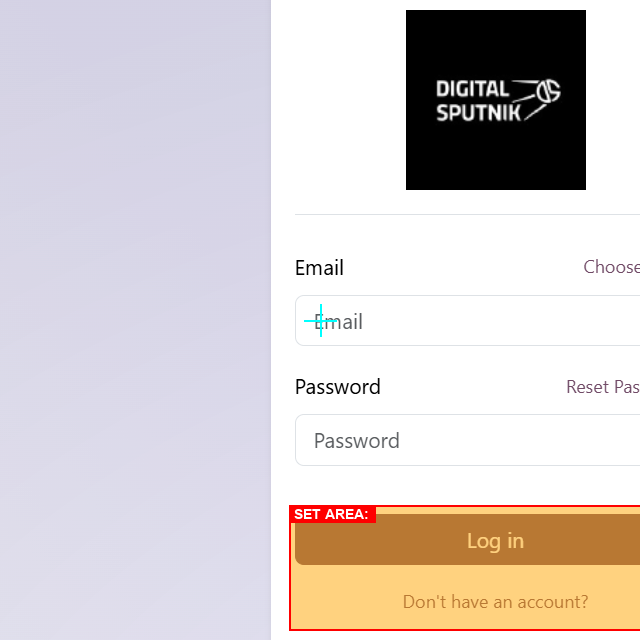

In [25]:
# comment: Automated step generated with pyPeriscope V2 
payload = '''gASVRBMAAAAAAAB9lCiMBGFyZWGUWCQTAABpVkJPUncwS0dnb0FBQUFOU1VoRVVnQUFBWjRBQUFCOUNBSUFBQUFkdVpMQUFBQU9JRWxFUVZSNG5PM2RlMUJUVng0SDhCTldtMXpBSVlDQ0VYbjVvQklwVmdhbGhWWm1wYlQxaVZNZnkyNHAxc2RxM1dtcmRvdUtqdXZZanJZTE84N2l1cTFhMzlxV3J0djYxbGFxRlN0V2xJYUtFQVRCUUZCNUNDUXM1T1dEN0I5bmVudE5yZ2hJRWoxK1AzK1JlMC9PL2QxTC9Ick91UmVRV0sxV0FnREFGamRYRndBQTBQTVFiUURBSUVRYkFEQUkwUVlBREVLMEFRQ0RFRzBBd0NCRUd3QXdDTkVHQUF6cTljQVdKZmxGK1RsNUduV2xzYzFnYmNmenZRRGdHaEkzaWJ1blI2aHljRXhpM1BDWXlBYzA3dUNuRWE1VmFMT3pkdWthbWswR1kwOFhDUURRVFp5SHU3ZWZUL0xDMUlGRGd1N1g1cjdSVnBKZnRHM05weGltQWNDalNlSW1tYjFpd2YyR2IrSnJiZGNxdE1nMUFIaVVXZHV0MjlaOGVxMUNLN3BYUE5xeXMzWWgxd0RnRVdkdHQyWm43UkxkSlJKdEpmbEZ1b1ptQjVjRUFOQURkQTNOSmZsRjl0dEZvaTAvSncvM0RRRGdzV0F5R1BOejh1eTNpMFNiUmwzcCtIb0FBSHFHYUdTSlJKdXh6ZUQ0WWdBQWVvWm9aSWxFRzI0Z0FNQmpSRFN5OElOV0FNQWdSQnNBTUFqUkJnQU1RclFCQUlNUWJRREFJRVFiQURBSTBRWUFERUswQVFDREh2eGJkZ0djS1NZeGR1THNxUmFqK2F2MXU2NWNMSE4xT2ZDNHdxZ054TDJhTWlsei80WUZheGE1dWhDQTdzQ29EUjR0K1RsbjgzUE91cm9LZU94aDFBWUFERUswQVFDRE1DR0ZicEwzOVo0d2MwcDRkQVRuNlM2UlNHNVpibW5McTQ1L2NiamlVcm13emFUWlU1V2puNUhLcE8zdDdYWGEyc0xjQ3kvTmVGVi9VL2YzdjZ3VzdUWjZiTXpVQlg4MEc4MWZyTnQrNVdJWmZhbS9xZnQrNzdkanA3M2lIOWhmSXBHWTJvd0ZKOC90LzJ5dnM4NFZIaitJTnVpTzRHR2h5ZSttK2dYMk43UzBGWis3U0FnSkNnc1pIREgwVDMrZHRYZkQ1NlVGeFlRUS95REZHMHZtRGdnSk1MWWExRVhsaEpDUThFRUowMTdwMWJ2TG43cmUwdDdqVTVQdTNMNVRsS2ZxTzhCdlFNakE1OGVOYWRXM250ajdiWStmR3JBQjBRYmQ4ZEtNY1g2Qi9hOWN2THg5elNhTHlVd0lrWEt5TjlMbWhJK0tTSmorS28yMnVQSHgvWU1VTjZxdTc4N1lVcSt0SllLdzYrcmh2UDE4aGNkS1hmcm5FUzlFaFVkSElOcmdmckRXQmwwV0hoMFJGQmJTMXRLYXUvOEV6UnBDaU1Wa3pqdWEyOWJTNmhmZ1AzeDBaTDhBLzdCbncyL2Z1djNUc2RNMDF3Z2g5ZHJhNG5PLzNMMXpwNnRITkxTMC9YandCLzVZVjB1dTNMYmM4dlR5bEhLeW5qb3BZQXlpRGJwTUVUeEE1czYxTk9ucDZJeFhXbERjcG0rVnVzdjhBL3Y3QmZpN2U3cWIyb3kxVmRlRmJScHZOTnk1M2VWb003WVpoRXQ0WnFQSmFyVktPVmxRV0hDM3p3TFlobWlETG51S2s3cTVTVXh0SW4vMnJLMmwxYzFOOGhRbjVUeTUzdExlRnFQNWFrbkZ3eC9SMm03bGgyd0FuWUZvZ3k1cnY5dHV0UkxPMDkxK0YrZnBmdmZPM1RaOUszMzV1OTY5K2dYNE83YzZBRUlRYmRBTjlUVjF0OHdXTDE5NWVIU0VjSHQ0ZElTWHI5eGl0alRWTlRiWE41a01KbzgrSG9GRDc1a3pob1FQZmtvbWRXNjk4Q1JDdEVHWFhUeno4L1dyTlo1ZWZlS25KUEFMK1ZKT0ZqYyszdE9yajdhOHFyU2crR3BKeFEzTk5aa0hOL3FsNS9rMjRkRVJ5bEhQU0NRUzE5VU9Ud284L0FFZFVZUUV2TDlocFhETHBiT0YzMzF4K05TKzcvc3EvSWFPR0xiaXN3ODFwWldFa01DaHdWNis4dHJxRzRkMzdLTXQ4NDdrRGdnZE9IVEVzS1dmcnFvcXJmVDA2ak53U0hDci9uOFdzOFVGWndKUEdFUWJkTVRUcTQrblZ4L2hscHJ5S2tKSWFVSHhyb3pQWGs2ZUVLb2NFdkhjQ0VLSTJXQlNuVHAvWk9kK2ZhT090aXd0S1A3UCt0M2oza2dLR0JUNDdJdlJGck9sOGxLNSt2eWxTYk5mYy9wNXdCTkhZclhhL25YUzl5YSs1WkpTNEVrd2R1ckxyN3crcWI2bWR0M0N0YTZ1QmRpeDd2QkdteTFZYXdPbkdqQW9zRmZ2WG8wM0dseGRDREFPMFFiTzgrTGtzZUhSdzgxR1Uva3ZsMTFkQ3pBT2EyM2dLRFBlU1ltTUhhbHJhTDU1bzU0UW9nZ1oyRytBSHlIazUxUDU1NzQ3NCtycWdIR0lObkNVRzVwcmc0WVA5UXZzSHpBNGtCQnk1L2FkaHV0MTUzTitPclV2eDlXbEFmc1FiZUFvWnc2Zk9uUDRsS3VyZ0NjVTF0b0FnRUdJTmdCZ2tFaTBTZHp3Y3pBQThOZ1FqU3lSYUhQMzlIQjhNUUFBUFVNMHNrU2lMVlE1MlBIRkFBRDBETkhJRW9tMm1NUTR6a1BrVjNFQkFEeHFPQS8zbU1RNCsrMGkwVFk4SnRMYno4ZnhKUUVBUEN4dlA1L2hNWkgyMjhYdmtDWXZUTVhOQkFCNHhFbmNKTWtMVTBWM2lVZmJ3Q0ZCczFjc1FMb0J3Q05MNGlhWnZXTEJ3Q0ZCNG52dGY2a1I3MXFGTmp0cmw2NmgyV1FRK1FNZkFBQXV3WG00ZS92NUpDOU12Vit1a1k2ampTckpMOHJQeWRPb0s0MXRCbXY3QXhvREFEaUl4RTNpN3VrUnFod2NreGdudXI1MlQrTUhSaHNBd0dNSFAyZ0ZBQXhDdEFFQWd4QnRBTUFnUkJzQU1BalJCZ0FNUXJRQkFJTVFiUURBSUVRYkFEQUkwUVlBREVLMEFRQ0RFRzBBd0NCRUd3QXdDTkVHQUF4Q3RBRUFneEJ0QU1BZ1JCc0FNQWpSQmdBTVFyUUJBSU1RYlFEQUlFUWJBREFJMFFZQURFSzBBUUNERUcwQXdDQkVHd0F3Q05FR0FBeEN0QUVBZ3hCdEFNQWdSQnNBTUFqUjlxVEl5VDc2cnlYL3NKak1yaTRFd0JsNnVib0FObGxNNXMyck5talVGY0tOb2NvaDgxYS9MZVZrUFhXVVBabGIvUU1WaWNuamU2cERjQ2liVDhXNGxNbjQzamtPb3MyQm91SkhwYVRONFYvdXlkeWFQbjJSZ3o3UUxVMzY5V2taU1hPblI4YU83UEhPb1h2MlpHNGxoUENmZ2JMQzB2Z3BDZTlrdkU4STBaWlhiVnlaUlFoQnVqa0lvczE1VXRMbVJNWkY3Vmk3eVQ5SWdRQjZBZ20vNlVGaEljcm9pUHFhV2hmV3d6YXN0VG5WMHlQRFE1VkRpdkpVcmk0RVhNeGlNdXR1Nmx4ZEJjc3dhbk1xS1NjYkZxVThkL3hNUzVQZXkxZE83TlpmN09ld2hKQXhTUWtiVjJhWkRTWnk3d0lOMzNKUDVsWlY3Z1ZDeUk2MW0rdzdFV3BwMG0vNjIzcGRRN045czV6c284ZjJIS1JmeXp5NHR6NWNHQlFXVW5TMk1EdHJGLzJhN3FJRmUvZnpwdStsRTJIYW9iZWZ6N3VaUytoNTJSUHRud2ltMHZYYVd0cEF1TmRlMGRsQ2VwclVtOHZuQzBkRHducUVsNnVENnl6c1VIaG9telBsTDdYdXBvNnVtV3JMcTNaK3RIbG0rcnpUQjA3UTY4OWZBV0dmcXR3TDlsZm05SUdUdGRYWGsrWk9FejFINkFGV2NBQ3owYlErTFhOM3hoYjdYUmZ6Vk9rekZsV1hhYXhXYTNXWkpuM0dJcjZadmxIM3dhejA5V21aWnFPSmJ0bWRzV1h4aFBuOGxvdDVxc1VUNWwvTVU5bDNTOThydW9zNi91V1J4UlBtZnpBclhkK280dzk5L01zai9OdDNaMndSSHBlMnBOM3l6ZmczMGdQWmRNSy9TN1E4MGY3NXloZFBtTitaZnN4RzArNk1MZnl1NDE4ZTRTK20vZldzTHRPY1BualMvc0xxRzNXSHRuM05IMHZZQTcxSzlPeEV2NG03TTdidy9kREQyYlMzK2ZhSmZnWnNEZ3FPZ0FtcEs1MCtjRUlaSGNFUENyeDg1VE9YemF1dHZsNVdXTXEzOGZielNWMDZsOTVYZmNqNXJNeURtN2xzSGgwNzBMV2V5eW8xZlJ6RXkxZWVramFIdjNzN0ppbUJXQWtkV29hR0QrYWJFVUxLVkdwRmNNRFRJOE5wL1lyZ2dERkpZK211U2JPbkVrTE81NXkxUC9UOSt1Y2JSTVdQNGtlalk1SVNUQVpUZFpuR3ZoOHBKMHRKbThNUGYwWW54bkllbkw1UlJ3aXhtTXdIdHZ4WGVEMkR3a0plblBSN1FzaWhiVi9MKy9yd3Q2ZTlmT1VUWjcxR0NOR1dWMm5VbGNJUlltTHkrS2o0VWJuN1QzVCtLWmx4S1pQcHNGSEt5ZUtuSk5SV1g2K3ZxZXVnZmRIWlFuVkJjUWZEVXVnUm1KQzZURXVUWGxOYW1UUjN1bkNqZjJCL1JYQkFVWjZLbjJTRmhnL20veVZMT1psM1AyL2RUWjNGWk83R1F5U0s0QUQvd1A2Q1l5azBwWlZtNDI5ZDJjejE5STI2b0xBUU9oMHVLeXlOakIxcE1aa3ZxOVREb3BSU1RzYlh6NzlkNWk2VDkvWHBZR2xjdEgvNmRXUmNGTC9keTFmT2VYRDEybHB5bjVzdDlQWWluYUVUUW1qTCtwcTYydXJyOFZNU2JCclRPcDk3K1FYN0sxYW1Vc3Y3K1FpdkNhMGtPMnRYZlUyZHpYWlJuRHYzZEpTU2Z5bnY2MjF6WHZhSzhsVEs2QWprbXFNaDJweXRYbHRMSTZhK3BzNzA2ejlPbDZOaHdYbHdxM1orN09VcjV4OU5JUGVtYlZsaEtiOUMxTktrTnhsTXdxaWl2T05IZGFuL0xxRkxhU2FEaVk1NjZFdTZpNDdkYUxqWXZNVmtNUGtIS2V4N2M5VU55bTcvNXdTZGgyaHpLdUdvaDQ1TlhGMFJJV0pUT1NIaHJRL2hpSVBXbjd3dzlZRVBzblRjZjVmUXFlV1NmNHM4K1N6djY4MjVpMXpQRHE2emY2Q2lnOXVVZEl6OE1OV0tldmlMQUoyQnRUYW4ycnZoYzMxajgrakVXUExyOU0xbTRZek9xb1N6TTVjb1U2bk5naEVsTGJqb2JLR210Skt2VGJUKzd2WGZiZFZsR3Y1bXFKZXZuRWhJbVVwdDA2YURPdjJERlBaTFkwVjVLdUhNblk2dzZOZDBidnZ3WllNVElOcWNwS1ZKLytIczVaclNTdjRoQUNrblM1bzdUVjFRVEovd29HMTJmcnhaR1IzUmpRZDZIeVpvNlBCRVUxcEoxL1cxNVZVLzdNc1JOcUEzRS9adCtrcmUxNGZlUUNDL3JwcXJjaS9rWkIvbFd4N2UvbzN3NWtBbisrODgvOERmd3FpbFNYOWd5MTVoa1VsenB4L2JjNUN2UjF0ZTllT2hIMFN2OCtIdDN4QkNJbU5IS3FNak5xN00wcFpYMFYwNTJVZlZCY1ZKYzZmUlVXRmtYSlJHWFhINndFbTY5OUMyci9razdXUzEvRm56Y3JLUEx2L0RZdjZJNENDWWtEcVFLdmNDZmR5SnNua0NpeEFTRkJheTlKTlY2OU15M3B2NEZ0M1M3Ui9Eb2tHelkrMG1WZTZGRHA1cnU1L3BiNysrZWRXRzFUT1hFVUpDbFVQZVRKKzM0NlBOd2dhUmNWR3EzQXQwS3YzYnh0aVJpOVl0MjdneWkzOWdiVnpLWk5IbjJoN1lmeWNsSm8rdnI2bjk1M3NmRTBLOC9YeG1wcy9iS2VqSHBoNzZrQm9SdTg1dkxwOVB2MGhKbTVPVGZaUjJTUHRjK3NrcS9oUWlZMGVPUzVsOGJNOUIyaUY5VitjZnRSMmRHSHZ1K0puVk01ZDEvTVFmT0lMRWFyVzZ1Z1lBZ0I2R0NTa0FNQWpSQmdBTVFyUUJBSU1RYlFEQUlFUWJBREFJMFFZQURFSzBBUUNERUcwQXdDQkVHd0F3Q05FR0FBeEN0QUVBZ3hCdEFNQWdSQnNBTUFqUkJnQU1RclFCQUlNUWJRREFJRVFiQURBSTBRWUFERUswQVFDREVHMEF3Q0JFR3dBdzZQL0d2dU1meWE2SnBRQUFBQUJKUlU1RXJrSmdnZz09lIwNY2xlYW5fcHJldmlld5RY6O8BAGlWQk9SdzBLR2dvQUFBQU5TVWhFVWdBQUFvQUFBQUtBQ0FJQUFBQ0RyMTUwQUFFQUFFbEVRVlI0bk96OWVad2QxM1VlaXE1VmZkQU5OQnBBWXdaSUFBUUpFaVJCRXVJa1NxYWtpS05zaVJxZkxkdS9XQjd5b3NSNWZuR2MrTm8vKzkxblA5L2t4dk5OWWljM3ZrcnM2TWEyb2ppNnRxOEdpakpGVVNNcFV1SW9BQVJIekFDSmdaaUJIb0R1V3UrUHRZZTFwenBWcCtzQUlMQS9RWXNmOXFsaDE0RGE5ZTF2cjEyNDVRZjdzQUFxZ1NNVUFJWWpBT1dZaWdTSTNjcG56bVZNbFYvTWtZZ3d5Wm0yeFdWRUlnSWdJZ0Nnc2l5SmFIcTZ2TzN0VjBGR1JrWkdTK2hnQVFBZ0kwaU9WWkVBRUlGUXR6NFlqMTIzMHoyaXJtOUZlVzljeGxSNVBHS044cGx6ckZIZTU0aDYzNjF6R1JQbFdNbDFRVnRjUnJUdGNZRlVBaGJtTHNuSXlNaG9BUjBxM1pkLzNaaldsWUdFTE1vc0QyTFRiVVppYWpzMFkwNDF5dDh5RVFDZ1czbFBIQ1RuWDd0d0FzQTBqMS9wVkhuREtHb2M0ZldoOUMrakpDcDcyRVpHUmtaR0VoMzFYdTlwRVRlUy9oa0FkQzlnSktybGtaL2RrZTNrV0RlbXpxRXNqM1BvVW01YnFuUjVkOTQ5WWlYdmQ2eXVRNWZJTUp3QVNzUUMwUDZXa1pHUjBRS01BbWJmbDNSdkcxQ3BuMEFGUU1sR0dUK2tXTmVDVWdlQVNocVJlSHA1bmlYbzVqdVhROHpUOWNzSkFMdVhRMC9sVUtPY3psYzUzejFPT1JGcDlZeml6bFBscW0yMS9UQkJlWVFERVhUaFhCMGlkVGRuQlp5UmtkRUhHQVVNQU1ybDBuNndlTjhYeTJpVkRBQkF5a0FENEliQ3Rpd29QR0N4SFl4djU5eVZtK3FDNEsyVW84c3BWWjd3ZEoxeWZHdVhTMDgzVlE2Q08rWGdsYU1vUjNGOVVmd1M4WFNobWtNdFRnQ2dQR0IwNjVlUmtaRXhjd1FlY0VNL21DVHZud2ZjVnB5NVo1emlGMVVFQUdqTk01WVJrTUFvV2lCSWU4TXBEalhLRTFIVUxNSkRaQTg0SXlPanI0aDV3SzM0d1FqZ2VjTTVoaEdobTZmYks1OXBoRmE1alNqS3o1RTN6T2NsMkJmSWNrYVVVL2FBTXpJeStvS0NkRDhiQUZDWmpLUWpsRUFFVkFJUkFDVWpTQTZYVktRYTVacFR6NXk2OElzOVVnVXZpU1F2YTVSWGNiSThJeU1qb3oxMEhORWI1QVNIK2NHUXlBLzI1Vk5sVHJBVWJET0tScE8wem1WTWxjY2oxaWlmT2I4QTRybkpEMDdFTHZuQnZNV1pjZVd2Y0I2d3ZRWVpHUmtaN1dDbUhyQ01KR09sSDB3TnQ1eU01OGJUVFpXL1pTSUFRRjg0U002L2R1RUV6Zk9EVzRxaXhoRWVJbnZBYndtZ0hHNlprU0dnRXhrdVhEVDJnR1ZVamkrUEdPMmFINXpqekNPS3JvTm1ITHB3MjFLbHk3dno3dkV0bVIrY1BlQ01qSXcrb0VOSzZiTG9KVHNEbjVzZkRBV0NtaWxhTFEvSUx4aW9oVmEzL0dBRWs2V2tlQzYzNWMzemcrR2l5QSt1eGZsZWRiaWZIK3h5QWtCU0k2NVZPeHN0ZDdnZnBRVE9IbkJHUmticjZNZ09IQ2VmTXNnUDFoNncwQUdKdkZzdkQvZ0N5ZzlHODNPNjNQQkc1ZWd1RXkwM2lpcFNqalhLOGExZG5zb0Ryc1hCNHlnNXVrdGdiQ3RZWjA5T3RKNEtJV0h1NnN6SXlHZ1pSZ0c3Q2lubEI5ZlBEMDU0d09jNVB6aTEzK3daSnozalZIbFBIQ1RuWCsxL0w3ejhZQjJJb0NUSUNqZ2pJNk5WR0FXTUFGcWpWUHZCcWZ6ZzdBZjNFQkVnZWs1a2VXOWN4bFI1VllRYTVUUG5OcDRIYjVqUEMrbXp6cnl3WExXM1JGQWlGR0NYeThqSXlHZ0RiaDV3S2laeWdpbk1DZTZhSHd5WGJLUUlweHJsY1U1ZHlzbGJKbFordm1KWm83eFh6bjZ0NEU0NWwvajV2cVlPUUZBQ2xIcXRrR2RrWkdTMGgwNjE2RTNsQjFmbkJNdElrTTRKMXJ0UUQ3WVc1YVhSS3EzejNtUGc3ODZJSnp6amN4azlUemRhbnVKUW96emtxWjRZd2NNeERiTGNidEgxaWVQWExCdzFscEdSa2RFZVloNnc1QlYrY08yWTlJRDc1d2ZQM05OTjhZc3FBZ0MwNXVuS0tNdEJsanVjb01yM2xieWRPd01qZGFpQzdUeklIbkJHUmtiN2lIbkFrdGZPRDlaTmR6MFBHQ0h1ZmViWVc1VG5zeG1ITHR5MllNMDgzWFM1alhWeWMyZnE5UmFSUEdBbmNuSmRkZmwwOW9Bek1qTGFSOEZaanZwZG44Qys5NHZ5a2dDTUIwenMreW9PWm81b290SjR3Q1I4WDZMU2NnQUE0aitrQ0loeXlPVmVPWWx5U3BaVEVOc3FiOE9YamZPeVJuazZXcTgzeWtGNHV0VmJTeTBEZHB0cW1heUFNekl5V2tVNkQxaVdoOThKUnNFcjg0TnQ3cS9rUVg2d1diNi9lY0NwY2dTcmJ3eHZwUnpkWmFMbFJuVkZ5aFArNjdrczd4ODNKU0QyRG01NWdxdXZLdkdhekJHOGNydmwzcUo5RTdKWEtDTWpJNk10dUI2d2pCVWVjRU0vV1BtK2tvZCtjSTN0OURHZUc4ODRWZjZXaVFBQWZlRWdPUkRVOVlaMWUyeDZFWnp0Q1BENWI0anNBV2RrWlBRVHJnY3NZNjNoMGZGMTYzNHpPTHJmSEkxRzdBZVhNVlZlRmVFYzhDN2VNUGpsYlhuU0lGVnVxYnQyQ0hJZWNFWkdSajlRTHc5WXhvcHZCbFBEYndaRGp1YTB1cHg2NXRTbG5MeGx1dm0rcWZKejd3MFRBUFRpRmplT3BmQ0FiUjV3VnNBWkdSa3RvNE9vVkJBWS94RmQ3c1hxYndiemFwWGZERlljMHZuQnNYV2JSYU5WS3NyYjViM0h3UGVkRWNjYTVUWGlUTHhocysrSzhtb2UzYkozN2xMbExVYnpWdVQwMW1Sa1pHUzBndzZaTVNZcEx4TmF6UW1Xdkg5K2NHbzc1OGJyZmN0RUFJQytlTDBneTBXVTVTRExnVUQ3dXhpc2xWS2UvVmFrMlFQT3lNam9KOUllc0l3TlBXQVpxenhnQk1oK2NDc1JBYUxuVUpiSE9YUXBSL09ta1M3dnpxRkxlVEd6UE4xK2M4NERObWNnSXlNam93M1V5d09XNVc0ZU1JQ2ZIMHlTRTRDYkJ5dzhZSGJYTkFjamQ4eUkxbHhlVVU2aXZKNnoyMXNNL2VDWjVlODZFYlN6MjBxZWJyeThQcWZ1NVJrWkdSbnRvWU1vUnArcS80SDVMNlA2TzhGaGZqQkluc2pIN2ZxZDRFc29QOWlvdWdibE0vQm9aODZwUm5rcWhzdXJHNkt5UE1taFJubkFCWE01T09XbUF6eDd3QmtaR1gxQTRBR0hmckFYVy9TREt6M2dTeWcvK0MwZkFRQzZjS2hjQm1TNWlOQTNYZ2ZaQTg3SXlPZ25qQUpPKzRoZW5Ma2ZuTDhaM0hPVTE2aGRQdE1JRVY0a3lydnpHckYvM2pBanp3V2RrWkhSWnhUQ2xQV054V2JSeXdtRy9NM2dtcEZxbEd0T2xad3F5cHQ0dlRQSjN5VUFxT0hzemp5QzhHdXBaOTlYY2xLODlQeGdVWjZSa1pIUkhqcUl2b0xGYU93bWZadCtNOWl4N1NDWkUveVd5UStXTVZVZWoxaWp2RGFuVkhtZnZXRkk5bWZZcUhzKzFQSUpEdURkSERVOFlFZWJ6b1M3TU85RDJRUE95TWpvQXpwRWtXLzBWdm5CWFQzZytuTkVTNTd3Zzk4eStjSGh1Ym9nM05ucUNBRFFuT3VJVG5tdGJoS3dXMGh4NkkzM0E5a0R6c2pJNkNjU0hyRGtYcXpqQVZmT0VaMDk0SE1YVTlmUmxrTlRqb1gzcmlXWEVmSDg1dS9LbUNwWGthREFMbndhb0VBbzlaRm1aR1JrdEFFekNscnJVRVRTM3kzaTV6V2lLTWQwZWFremlncWdrckJBS2hYWHJiTGFnUlpnckd1QmdIZUdTa3FSczd6dWc3N295dXZ5ZE85Q3pWNkhhSGxUbFM4aWxmWlhDcGVYc1V5VkF3QTA1d0FBM2NvRkwydVVxMGlWM01Tc2dETXlNdHBFQndzMEQxSFFYd0htdkYvejFMVk9uVmtDTEsrVkg2eFhNTXZJdkZ1VkI0eTZNYW5NRDY3WVRuL3pnRlBsaGpjdGozSjdNYzVUbnE2N2JuZG50M2tVN3d3Ukx2Yk9OMGN3T2xxV0t3N051RVNxSEhTRFMwYjlwNWJMeU1qSTZBVWRLclhpQmF0cEluNXdTbDJsL09DRytjRVg2RGVEKytjWnAvaDU5NERSS2RjMnFPUXpqVkRKblFnMXludmpVS2RjVnk1N3dCa1pHWDJBOVlDRkNtbkpENjdNRDg1K2NDOHhkUzFTMTZzN0IzdjFRU2xSOVZKZ3IwTEl1NHk5cTNydk9wZHpPTGZyQVpzemxwR1JrZEVHT2tiL0FoZ0ZxaU1HdkdaVTdxK0svTEJUbkIvRUJVQVppTEZZUFBlaWQ4YlI5WDNyY1BVMkUrVkJhOWExUE1VOU5jL2w2TGk1ZGZvaElqMFRTUTRBMEI4UGVBYThadytZc2dMT3lNaG9FeDBzQUVHSklpZHFZaFNzL0ttTDZFM2tCTmY2WmpCckwyUDg5UzhuV0VhamJWcmc2SEM3bzlyNXV3NXZOV2VYMk0vM1MxamQxdUhOSTNRdlYrOGJLTjQ5SWx6ZkhFMzRER0U2dmJNSG5KR1IwUWNFSHJDSW9iTHAwUStPTGw4aEljKzlIM3lCZXJvQUVGT1FUbmx0empCZEMyNnM0ODYyNVFGSG9xNWJCWWZlK0V5UVBlQ01qSXgrb29NWStVWnZKQUowRVpJOWVjQ0s1MjhHSnlQVUtFOXlOWkk4Zk9sZ204RDZ2b255TkRmWDNPZUZ1clJVMzR0TmxVZDgyWWJlYllUM0ZGVWVNR1JrWkdTMENETVRGb0JTbHlJUG1CQ01KdTJhQnl6TE9RODRsaDhzSDRqMmE0TnVIckRNRHdaUkRtTDVpengvdDZlZUF4djExKzJkdmdRWnUvaStmRE5VY1VqeDB1ZEtqN2FXcDVzcXI4OW5FRE15TWpMYWc1c0hyQko3dGFUUnZjaGNKUDhMc3N3c3JhSHlnTkZ5a0Z5NXdrS3hXVEhNY2xmQnl3TzJ2ZHE2dGJNODJFNGY4NFBWVDlYbDJBdVh2UTZwOG5URW91NlMwTjNyclI0RjNaVFBZTlIwR1BYTjBZeVh3WmVPUWg1ZGx3REsvRFdrakl5TTlsSGxBWGZKQ2U2YkgweVNWM3JBRjJGK3NIT2VBUUM2K0x0aUdTcXJsL2ZqZWZCNmEreTlWb1NlZUZtRE8rdnF5bVVQT0NNam93OHdDaGdSdEdyUlBLbWZBS3craThhR2ZyQ00yUTkySTBTNWx0eG95OGd1UStKM3p1dlZYTDhzVkhEUEc1YXBaZElQTGtTNTRLRUhQR052dURldk4zdkFHUmtaRnpvNlBJaUd0SEFGc055cTBXaCtjTTNvNWdTSCtjRXFTaWtJOFFpU3R5OXI2K1hwMXZXR20zdkFkZnBrQzFWTzNxK0JJbmZHc1FjODR2dEtybTZEU2w3R2VlZ0JLM1ViY0VqeGlEZE1vbnptZkFZeEl5TWpvejEwQ3M3UTFhSUxvekZRc0hVVzB4NXdWYXorWnJDTVNudkZZdGQxNjBXTWNEUkZncWZLSGQ3TjkwWGRvMUNEWTJxWlBrVHRCME9VdCtJQit6SDEzdUsrMitpYm9BbVhrRjZ2UkhJN3VoK0JBQWpSR1F1UWtaR1IwUUk2WlJsUlRnMzg0TkFiaHRvQ09WUjRsZkU4ekJIZG82Y0xBTkNGVXpkdTUyUjJPZ0RPUVR3UDNqQWs5aWpLb1RjdWtlcERqcTZMYUN0SFFFU3FCeUFqSXlPakpiZ2VzSXllNXlwMUVrQVhPVm50QVZmNndaNFBuZlNEdTliaFBFZm9qUXVkRlZkY1JwaEJRckJGdVgyOWtqNXVkWG1Va3pZUkJGZksxZWQ2bytmUnUyMGVzU2gwY3AyTXpvWEp5TWpJYUFWbUZEUUxWd0pFN1FHVEdkZmo1d2R6VHloQ2ovbkJaZXdCTFZvRGxRZXNkb1phQXJyNXdUUDFhRlA4UE9YdnVwbTdkWG9DekFHTGNyNWNjVTZTUzA5WFhlS2dQQlZMbjBPU0U4Q0Y0ZDFXUi9XS0FZQnNya01xWm1Sa1pMU0lUdUhtNDZLVnBzYiswOExNVE5CcldnMkk1UWVieGRGeVZSNStKNWgvbEJ5ZCtwaHlMdzlZZU1DUi9PRDRkbXB4N0lXYmlDNm5MbHhsN3RaWnZtNkVucmlOcnU4TEh1OWpsQ09sNWZ0TS9TOGRNVmpMZHVOWUZQWjFCakhOU2IwY29iekJNekl5TWxwQTNBT1dQSXpkUFdEM2lkN0ZBNjZ0R210OW1hY0g5ZGxpck9rQm8rSlV5bkp4V1Nnb1A0ZnhQSGpBdkJjNVVqb29oenFjSVVjc1MyNm9VYnBjWE0ySmdGVE15TWpJYUJIS0EyYmRGbkdDWTE2c283cDRYY205V01jRFR2bkI2VHBjOEg0d2VOdzFFVk1jdXBaVDRvZTRONnk5MnhSWHZRajFPWWxFc2k1cFpzckhUZkZ6NS9VU0JKNXUwNWc5NEl5TWpQYlI0UzQrbVp0cm81YW1ubGh4RkRFR3ZIYVhZNWR2Qm9jeUc2THh3czdmMVgyNGZ1YnVEQ0tseXBWRVF5TWRqWkZld1J2SFVzU3dSRVJXbnluZVg2OVhXQlFndGV6TVlrWkdSa2FMMEhuQXNReGRGTklVVGVSQzQ0aGg1V0lWc2M0M2d4TlJQVnBSTjNHZUg2eTVQVXJoSlRmemdOSGRjYlE4eHBWbFdOUFRUWlgzRXFFbjNqMkdmckRrZlltOGMrM3ZCbHg2dW55N0lrREV4K1ZGbkhMajdOcHlsZmlWaU5rRHpzaklhQisrQjV4U1dvN3VKZkZyS2o4WUdqNmhtNnBBQ3VyVGdoL01FSnhxbE1lV0lSSmxFT05Vby93Q2krZkJHK1l6VTZZNEFRQ29keDB3Sm0zbzQwYkt3VjhtMXJlaVkvYUFNekl5K2dBekNob0JUSWRwRXc4NFZISmU3Q0tFWFdYcFJtMXJzckxwNWdGWDFLRkJoQjU0MnQrMWlIdTBYbmx0YmwrTHZQSlFRU2JmZVdTcW1QUjNuUlF5eFdWNW5IT0NtY041RTRxckxGdGIzb2RzM1I0ajZKc3A0SHdMSWxIcXFtWmtaR1Qwams2cERUTXpRRVo3d0tSNmNaR2xBR3BwNG40bnVPZjhZSGUvVG40dzd6ZjhackRJQTNaeWdxWGExay9ON2x6R25sUjRVMyszdC96ZEZOZnF6VjdMbElKTXEwenlTOHF3blB6eUpDZVBnK1NsWDk2L2JOM0d6bTZTZzhjek1qSXlXb1JXd0J6Q1BGMkd6QU9XK2NGYSs5bWZpZityV2x6RG5jMklmWFhaYi9qTllBQUFpSHd6Mk15ZkpUallIU1I0YXBuS2lMV1h0RkdxOHppSG5uajdrWVMvNjVTWGdFVmttWW92SXlVNFlZRU51TmFnQlVLcGZWeCtOL08xTFB1MTFlVzljY2dlY0VaR1J2c3dDcmlMQ3FSVXJQYUFaNUlmWEswbUEyWFpGdzlZY3RYbXNFYVN5MGdreXFsdnZBK1JVdVZsZkpuSWlPZ3VuTHB3Tk4wdEhBbU1ER1lPbGpzUmdwS3d2Q21uN0FGblpHVDBCVVlCK3lxd0wzNXdxRGhiOTRNUjdQelZYZXNRaWVEeGM1cS9PMk51WDA4cVBHRFFLck91djl2RUE2NFJIVDlZOEhhZDNTWWVNTjllRmVYcHE1MlJrWkhSS3pxbDdoNHNFTW9nTjdkWlRyQ00zUWMrTzM2dzlJRGx3MTFPMUZEcEJ4Tng1U1RYVDlCbTNKUTA4WGZycVhaR1VFNjJ2QW0zRjBKeVN2RklKTERhZE9hOGJuVDlZSzEzMjNaMm0zakEwTFU4eTkrTWpJelc0WHdQT0pVVGpEUDhaakFZUDFndWhwWUhIckRqRTZzc1lhRkJBai9ZYXZSS1A1amxzYXFmckt2bWRmMWRxZktiY2VoU2J0dmxkSGs3N3dQTklrbmZOL0NBVStYNkJjdjNnUGwwbDBTRnpzMWxidDYxNm5EMmFBdkFLTy9KNjgxNXdCa1pHZWNPZ1FkOHp2emdDb0hjazdLMFk3RUJkRTBzQjdHTVBuYkIxZDRkUVZrRjZodW5HdVhuS1ZLSzEvU0dyZEsxQzViS2M3VzhyTTIxSDB4UjNxUHZDMEU1WlE4NEl5T2pMNGg1d0lnQVpxUXhBZ2g5NlVYUGM3WDZySWFPYk9nQnkyZzFydUUyZ2ROeWNaaHg3dmk3anRkclFYM3phSjF5ejZPTmxvZGQ5eTN3ZWpISThhM1BpNkpReWxWSFZaN2cxWG02S2U5MjVsekcrSHRnUmtaR1Jxdm9sS1E2MlFxRTB2VmlDVVYrTUF1WElEOFlLL0tEbGJCVVQ2OEUxdzlUdzcwSkhGQk0yaUJWTDZuR0Y0d0hYSDhVZEVOLzE4bmZkVGlmdzJaY1NVUWhweUx1YktyY25PbzJlWTBZNVBoMjRheDBBUUJSYVZZUnFaTEh2TmhVT2JUSVUxby8waWVSa1pHUjBRWTYvREVrZnI4dkV0L3JsYjRzRk1ibTB4SVN0YVExTGlBZzZNbDJWU2F3NFJyU2JYVzRVT1NTYXc4NG9hU2xNazVFWGNNYTZyeEJoRnJjOWdxNFFQRms3NDNycUYrTGJPKytLcS8wYUp2d1dqbTd2bC9yUkpYTEc1UTNpRTNWY3p0NXdKUTk0SXlNalBaUjZRRW5mTm5HSG5CMGptaS85YWpjYnhkdm1DRlVwdlNBZy9MemNKcFQrNlFaYzZuYlJMblVjTlVlYlJNdTFMUGtJa2I4V2llbXl1dkdwdXA1Um42d3Q1MHNnak15TWxwRjBnTk8rYkpkL2VCSTFPc21ZeDAvT09FTmF6K1ltMWxIaGRmd2c3dUR4QW9PNzVzMzdQRFdQR0FaM2Z6ZG5yemUwTm1kZVV5cDI3WTlZUGxlbHlxUHZlOWxaR1JrdElwT2NzYjc1SWZXbFdRTm9qTXZkR3FPNklBSEhyRGtYZjFnNlFFbnRIZ1hQN2hHMU1ySGJsK3E3ZVljUUd6VWNFcnhTS1NldUlobHFyd2IxeU9aWjZKaW02cGJTT2phWG4xZnFGRnVlZmFBTXpJeStvU09TclVOWSsyY1lNMTlQOWh3MDJiRi9HQTBxMFo0SFQvWXFGMHJVaERBNkQ4VVdoRHRyRWFOWjh1Q0d1VWdGSDgxaDhhOFd5VGg3NmJLSGQ3RUF4WitxbjdCMFJKZWxvZDV2ZnlyenQ5VmVib3oxY3F4N2JTZkUremtCMmNQT0NNam8zMW9EN2ltRnh0Umh6NTNOQ2ovbXZTREdXRXJ3VFRnWm5tenJscExhU1J4WEZWYTBGRTVjbzNvRXpaVkhvVmZoZlo0alpqU2JTbHQxOFgzQlFUMHpxRTl5MUxPeS9Jd3IxZHFXYzdUYlVFeEI5c2hVUjd5UEJkMFJzK1E3NXJSWDZQbDFUOVZMTXk3cTc5aTF6MzY3OHFtVTY3WDQ2cTVkM01nRlFSbWRyd1hBWnp2QWMvUUE1YWpqcFhtczhvdjVRZUR0MzI5UjRoelJTMTNoSjk0WnloTEtQVHNTNlVjSVZ3bXZGaW9LcGZibDhzNE1haURHOXZ3YnB2bTcvWVFBZnJ0NldvbkFVdjlnbFhvUG0wQXA3eVpSOXZ2bUhGSm9pZ0tSQ3hMOVZycXRUR3lVZkhhTnZOdlNtNU50anJoMW5oM2pzOFNJTnlqMlpwWEIxNkdFZTQzNUhMZHB1MmlXU1dzWjFFVUFGQ1dwVGswZVl6TUw5a0dHTGRzM212emdHVzZpUGVkWUo5clgxYjM1enJlYll6TG1DcVA5NSthV05qQk9IWFVlVHFxWTIvSUwycTQvM2d5UUNoZ29ySXNxU3pMVzIrNzhueFhLc01IOXVIV2piWnQ0RFpSWm9HdzhUQXRuMWZJeTVkbDZmM2FRL1BqTmUzeXI2YkJrNGZqN2FXcjRPNUJBWU43TFdSYksxL3haZXNiZHFTMWl3dS9YWGZ6Z1BrVkRBRjBUckFTcFJHT2xtdmxhdFN3dzdYMjlaU3g5SUNUVWV0dmZWM0ZGNGsxdDlyV2loUUU0d0hIMUxsb3UrVy9rRHE4YllUNXU0WWJwVjVSSG5DbDE3MzhYZFNUb3JqNXUwVlJPS29hckw5YlA0WmVyK1I5amRVS08xWmJXYzZuUnl0c3pXUGwraDB2djZKY01vZ0tSRzhCU1ZJS01ycEJ1YkRVeW8xcWlQWkJHMitNNVRhOWQ0VTZiWDl2VFZkWHhkL3psaTlXbUptd1ZBVGRRdm9xczRiaXBFU0U1QnpSREpmcmxianBSR2xEcWdycStYb1ZRcUs0V3BIL1R2RjRuaUZxR09GVW96emdLanE1ditKc21Fbk5kSzh2eVdWQUxsODNWbzloN2w5TTd6MTFGTUhaRUNlWElGRnV6dkNGY01Oa25FTjRmY2hlVjYxOHZUTUxlOXJYYTVEQ2hsYXVMcmRacDI3UkVxOXVJRFMzdDlucVR1Ym9hMGVqV3BrVE1tZk9uT0hoNGJsejUzWTZIVVE4ZS9ic3laTW5KeVltenA0OU96MDl6ZFc3WkZ0bG80Q2xuTFEzUlB0K3NJd1dndHU3MTd3dzJ1cUU5ckg4QzRtL2xLckgybjkvS0ZNZWNFL2N2bnFjQ3c5NFJyR285N1hkRmhXdDlIcERoVnJOSFc5WWNTLzdMUEllMktNalVUTm1YREl3amRQQXdFQlpsdHhDc0Jrc0Y1T3ZkeExjNEFIQXdNQUFOMExjTFF5dURDMktZbnA2bXZ1S2VZR3VCckRFckZtemVIVlpLN09Gc2l4NTczSUJ1WEZ6T0xLenVqZVkyZzRNRElDMmU4MXhMVjY4ZU9QR2pYZmNjY2ZpeFlzUjhjQ0JBMDg4OGNTdVhic09Iang0OHVSSlQ2eGZhc0F0bS9jVytxSHZlTURremhHTmxqc2VjRTkrc09RbW1rNVFFNTFQd3FXYmpmVFRWeDFqOERTVjVmWDVXeFBpZGVZaU9xcHpBZk8weWg3d2hZd2VoRnJOYlM1YXRPaisrKzlmdVhMbG5EbHpXS2hOVDA5UFRrNmVQbjE2Mzc1OXUzYnQycmx6NStUa1pGbVdpeFl0K3ZFZi8vR0ZDeGUrL3ZycjMvem1OdzhlUERneE1URjc5dXoxNjlldlg3OSs3ZHExeTVjdjU2Ynh6Smt6SjArZVBIejQ4UGJ0Mng5NzdMSDU4K2R2MkxEaG5lOTg1OVRVMUxQUFBydHYzNzczdi8vOWMrYk1nVVFiUEQwOS9mV3ZmLzNWVjE4RmdIdnZ2ZmZ5eXkrZk8zY3VOOTRuVHB6WXZYdjNONy81elpNblR4WkZNV3ZXckIvNWtSKzUrdXFycDZlbm4zbm1tWmRmZnZuQWdRUGUxdGFzV1hQdHRkZXVXN2R1enB3NWc0T0RzMmJONGhhMGh4UEx0ZDIvZi85enp6MzMvUFBQcjFxMTZ0cHJyMTI0Y09HaFE0ZVdMMTkreHgxMzNIMzMzVU5EUTRnNFBqNSs0TUNCbzBlUHZ2YmFhODg4ODh6enp6Ky9mLy8rVTZkT05iNUl0V3QxSVVNcllBVHdQR0RwRFJjK2R6emdKbjZ3VWNaZ3ZlRlEyNnJvNkc2c2ltb3Q5TGJBUUMxZ0VHeCtNUFRrQjNkRHFtVkx0KzhrL04xVXVjTTkzOWVkcTlsdzg4Wk53dCtGQktlUU8rT2l1N3dBOVZ0Sk44MFA5bFUxZ0MySGlOZWI0dFlEVnZkT2d4c2g0eUxBdkhuejdycnJyaHR2dkhIUm9rVUFVSmJsMU5UVTVPVGtxVk9uOXUzYjk4SUxMM3puTzk5NThjVVhUNXc0c1dEQmdnOSs4SU5YWEhIRmxpMWJ0bTdkZXV6WXNVNm5zM2J0Mmc5LytNTzMzSExMbFZkZXVYejU4azZuVTVZbHIvN0dHMjk4OTd2ZmZmTEpKMGRIUjIrNTVaWlBmT0lURXhNVHJMTS8rdEdQTGxxMHlQUlhjVTBNUDN2MjdMNTkrOTU0NDQyaUtPNjc3NzZiYnJwcDRjS0YvSS91Nk5Hanp6Ly8vTk5QUDgyeWNuQnc4TjN2ZnZmZiszdC9iMnBxYW1wcTZ0Q2hRMTREYklSNHA5UHBkRHF6WnMwYUdob2FIQnljUFhzMk44YUdlT2gwT2dNREE1MU9weWlLb2lnR0JnWVFjV3BxNnZUcDAxLys4cGRmZWVXVlZhdFdQZkRBQTdmZmZ2dThlZk5lZWVXVnZYdjN6cDgvLzdycnJwdWVubjdqalRjQVlNT0dEVU5EUXhzM2JseS9mdjI2ZGVzZWUreXh6WnMzbnpwMXFyNzZ2MmpnZThCU2NUYjFnUFUyVVJobkFWZStHcG8rYUZJYVZpMUZxc1VCWk5zWGJZeDV3TlVSRENmSmhiY25ZeHlwN3Nkb2VXbzdmblVjVGpYS0hTNE9NVDdQczhqcUFhUGttbklaSVNpcEVjK0ROeXl1ci9TRFpYbm85YWE0UGF2bVQ4WWxBeUlhSEJ4Y3RXclZOZGRjczNqeDR1bnA2ZW5wYVc0SUJ3WUdCZ1lHZHUzYXRYejU4azkvK3RPblRwMGFIQnk4NnFxcnJybm1tcE1uVHc0TkRSVkZzWFRwMHJ2dnZ2c2YvYU4vZE5sbGwwMU5UVTFNVEhBTE9udjI3RVdMRm8yT2poNDhlSkIxNnBJbFM2Njk5dHF4c2JIRml4ZDNPcDNGaXhkZmR0bGxzMmJOSXFLaG9hRk9wOE82bWYvdFRFNU9qb3lNekpvMWE4NmNPUnMzYnJ6cHBwdUdoNGZQbkRuVDZYVEd4OGNCWU02Y09hYUhtV1hvbVRObmxpeFpNamc0Q0VIYnRtdlhybDI3ZGozODhNUGNEOXpwZE9iT25idG8wYUxGaXhlUGpJd3NXYkprMGFKRjgrYk5tejkvL29JRkMrYlBuejl2M3J4NTgrYk5uVHQzOXV6WmMrYk1NUTMyd01EQTZkT25qeDA3OXRoamorM2R1L2NkNzNqSHYvZ1gvMkwxNnRVblRweFl2SGp4Ny96TzczUTZuWTkvL09Obno1NTk4c2tudDI3ZGV1dXR0NjVidDI3RmloVWYvT0FINzczMzNqLy84ejgvZGVyVVN5KzlORFUxeFQzMlhwLzVSWXlJQnl5SEd0ZnhnQ1hYVGJIZ2hLS05OcU9mSFltSjl0bkdzbFF2ZzRSYVlBTVFhaFZDdG1NMTZkRnlIckNaVnRQbUJPc0pOWXRDK2NHNm5vbjNEVWg0dEtueWlDTHNpNmRySW1oanFXazBuUUNlY3RWZEZzcTdCVkVlOTI0QkNKSWN4Ymk2UXVka2UrVW81bG1SNzNpeXZGL09idjJZY1NuQjJNRFQwOU1IRHg3Y3NtWExDeSs4Y1B6NDhmbno1OTk2NjYzWFhudnQ0c1dMNzc3NzdvY2ZmbmpuenAzaFdpdFhycnpqamp2bXpKbHo5T2pSclZ1M2Z2bkxYejV4NHNUWnMyY0JZSEJ3c0NpSy9mdjNuemx6UnJxd1o4NmNlZTIxMTM3N3QzOTc1Y3FWYytmT0hSb2E0ajVrUkh6MjJXZGZlT0dGL2Z2M1QwOVBQL3ZzczFOVFU4dVdMVnU4ZVBIZzRPQ3VYYnNlZXVpaEJ4NTRZT1hLbGR4R3pwNDltNzNocHEzWDlQVDA2ZE9uSnljbkR4MDZOREF3TURnNGFNUXVSNk9BRFI4Y0hCd2FHdUk5SGpseTVOaXhZL2ZlZSsvSFAvN3hrWkdScWFtcFdiTm1yVjI3ZHRHaVJSTVRFN3QzNzc3ODhzdVBIei8rK09PUGYrVXJYMW04ZVBFZGQ5enh3UTkrOEpwcnJybnJycnNtSmliKzQzLzhqNGNPSFpxY25MeWtYT0dPOUdXTkdpNEVsN0ZBOUw2ZVJKTHJoc3lMUUxydEJRSkNQYVdRZWJiNVhEKzZ3UWhlbzUzSlRNNGd1Tkp1WEFkMTFSQ0FlR3lCK2dLUG12MFlRS3RHcHdRRWowVHFpVk9OOHQ0amdIb05pZjVNWXBjaE55VU5hOHZuTStCUXhlVVpMc096TFRoSVRuNTVyUzZQZnNlTVN3TWtCak9YWlhueTVNa1hYbmpoNFljZlBuRGd3UHo1OC9mczJmTmpQL1pqdDk1NjY5cTFhOWV1WGZ2aWl5K0MrRmRKUkt5QXI3LysrdG16WjcveXlpdVBQZmJZUXc4OWRQcjBhZGJRTEtEUG5qMTc1c3daQUREdHpmVDA5T0hEaDcvMXJXK05qSXpNbmoxN2VIajRoaHR1V0wxNk5RQzgrdXFyMy96bU4xOTU1WlhwNmVrREJ3NHNYTGp3NnF1dkhoa1pPWHYyN1BidDI3LzBwUy9kZU9PTnk1WXRHeDRlWHJSbzBlelpzMCtmUHQzRElSTlJXWmI4bGhBRkNnd01ESEQvODhEQUFKdkhSVkY4NUNNZitjQUhQbkQxMVZjLysreXo4K2JOVzdseTVkS2xTMWV0V2pVeE1iRnIxNjZsUzVmT25UdDNZR0JneTVZdHMyYk5PbkRnd0lrVEozN21aMzVteFlvVjk5eHp6NUVqUjc3NHhTKys4c29yWEJONVNpOWlkS1FGSzlWd1NobDMrWHFTbzRiTkQrclR3RjUwL2RwSWRMYXVsVjZVbTQ4UHh3U0wwejN1dmpPNFBldkIwaFdRKzNDNFZPU3Bjb2RMLzFYNnU3cmM1YUJlTzVnYk8xMXpFYW1TOXp2MjVBRnpqMFZkbmxMa2ZBbmxxT240Q0dwamxsU1U2d3RwSHNjWmx3aE11MGhFRXhNVGI3enh4a3N2dmJSbno1NDVjK1ljUEhqd3R0dHV1KzIyMjBaR1JuaUExY21USitXNkF3TURvNk9qcTFldkhob2EycjE3OXpQUFBNTnRKd0J3SThlTG1aYUdSMndRMGVUazVQSGp4M252SXlNang0NGQ0emI3MEtGRDI3WnRlK0dGRjNoSTh6WFhYSFBUVFRmTm1UUG54SWtUMjdkdmYvcnBwM2Z0Mm5YOTlkY1BEUTB0WGJwMGVIaTQ2WmdtcjZrek9yNWlzYW1wS1ZrNGI5NjhLNjY0NHYzdmYvODczL25PbzBlUGZ1RUxYMWl5Wk1tZGQ5NjVhdFdxNjYrL2ZzZU9IVHQyN0xqcHBwdFdyRml4ZHUzYWIzempHeE1URTF1MmJEbDQ4T0RxMWF2dnYvLytkZXZXL2R6UC9keU9IVHYyN05sejZ0U3BTK2ZmV3RvRHJ2S0RyZUtNdEdEbThZV2dkYkRSUXc2UENnMlNIbkEzUDlpSTRYQTc0aGg5bmxLNjRkTFZTTzRqc2JXSXpsUGMxNHY2WkpHM0pQY0phUDBxT0ZoKzRjVG1IakEwNGlsRkRvcERsRHRuR0tySzdlY1hMcGtPc1F5RzdCbEdSRFBVaUlqT25qMTcrUERoeWNsSmJqVlhybHk1Wk1rUzB3QnpzejAwTkRROFBNeURtY2ZHeGs2ZVBNa2pxTTJXR2Q1SVNmNkpFNStrQ2pUYTFDVDJyRjI3OW80NzdwZzllL2F1WGJ0Mjc5NDlOamEyWThlTy9mdjNMMSsrZk5XcVZRc1dMRGgwNkZBUHh3dHVFMnVhNFdoemFKYmtYNWN1WFhyUFBmZXNYYnQyZkh6OCtlZWYvL3JYdno1MzdseEVmTTk3M3ZPdWQ3MExFVGR0MmpROVBiMTgrZkxWcTFjUERBeHdKL25odzRmL3czLzREeE1URTUvNHhDZldyRm16WWNPR0YxNTQ0Y1VYWCtTTlh3b2QwV2tQdUlzZkRGNEpYeVVDS0t6R0pRdzRhQ3ZZOERDaWRtYlpHemFhQkRIMGd6VUhnTFRLVkI0d0FNYThZZnY1eFFzdmZ4ZjBYWGd1MWExV2hBNFB2R0hCK2JvbnZPRXVIbkNONkN2VWZ1Yjd5bWZOUmYrUFA2TUNVcHQ2TFNMUElBRUFpTWdqa2tBb1pnQmdjNVRiN0RObnpreE1USEQ1NE9EZzRzV0wzL09lOXl4ZXZQakFnUU1QUGZTUTdGbmhsdDc4cTA4MWl2UG56Ny84OHN2WHJsMDdhOWFzRjE5ODhibm5udU1VSnU2dlhyZHVIWS9aYm5xd1pyOWhlZGdxZzlzNkl1S1NKVXZ1dnZ2dUpVdVd2UHp5eXc4OTlOREJnd2VKYU5PbVRYdjI3QmtkSFYyd1lNSFkyTmpZMk5paVJZdXV1dXFxdVhQbjhwRHlNMmZPN04rLy8ydGYrOXJFeEFTUElUOXg0b1RjMFVYL2I5RHhnQ1dQK3NHK04yeWVrWVY5V2t0ck5Zd1E4REM2djZvdVlWTC9VMDZ5NVZvQVlkSVBCakNPcitEU0d5NVQxVldSZXVLOVJ3RDlXdFBLNWtRa1VjV1E2eEtJOHVTUjhsa05WV2x3T1NNZWNJMFlVYWpKZTZmSHFGOHhJU05ESWlYK0dGNlRhUlpneFd3YWIyNnRBV0RPbkRscjFxejU2RWMvdW1yVnFrMmJOajN5eUNQZTl1dDB2YzZmUDMveDRzV2pvNk9JdUdQSGpwZGZmcmtzeTVkZmZublhybDA4OG5uZXZIbWdtM0RaWGxadk5xVjBLeFl6YlhCUkZLT2pvemZjY01QY3VYUDM3dDM3MUZOUGpZK1BUMHhNN04yN2QvZnUzYU9qbzhQRHcwVlJIRDE2ZE9IQ2hTdFdyQmdkSFoyWW1KaWFtaXJMOHN5Wk01czNiejU0OE9EeTVjdDM3OTU5N05peHJuVzRtT0I0d0pLbi9HQkhNU01pWU9nQnkwaEtBU1BHZVZNL21IeXVWYUxoTVQvWVJoSWY1aVhyQjNmM2hqMVE0bkV0eXkzSHhGZVl0TDhMdXJJb0Z0TEgwNFRYaUgxVnoxMWpwVGZjbXdlcyt6QjBsT1dvOG9DMUJ5dzRBcVptMXdvY2xmZzlrSEZ4dzZoZUVPMFpJcHJ1YUFBd2F0aEFTamZTWGFsY3lKN3g3YmZmdm16WnNpTkhqdkJNVlNCYU1xbDY1YTdseGtkR1JuZ28wOVRVMU5HalI0OGRPelpyMXF6ang0OGZQMzZjaUVaSFIyVW1rdjAzbmxDM3BwSVFhNE85WFhzSEJWcTFEdzBOall5TUxGeTRzQ2lLa3lkUEhqcDBpQk9LSmlZbTl1M2JkKzIxMTg2Wk0yZmV2SGw3OXV4WnVuVHB5TWpJaWhVcmpoOC96b1BBaTZMZ3lyLzAwa3Ztd0QzWmZSR2pZN3NLelhqamtGTXdLNFJ1UXVwOEpkWE4ydzE1VXBnUUpEMWd4dy9tNVd2bkIrc2FwMVNkSCtXUnlOYlZtYnJEWGNybndkWWNEV2RlRFhSVnRPcTNTOWwvSkRHdXp4ZTlKV0xhR3dib3hRUDJJaEVodUwwYXBiNWcrazFOWGNpUzdJV2trS3UxQk0rNHRFRkVSVkZ3cWcvUHRuajQ4R0VlTmlXSFZrMU1USXlOalUxT1RnNE5EUTBORFprV3NkUHBEQThQc3pobW1CYk95R1ZqUEV1aEtma1ZWMXl4WXNXS29paW1wcWJ1dWVlZUpVdVdURTlQRHc0T3Z1MXRiK3QwT2xkY2NjWENoUXQ1bGd6T1haWjE2OXF2SzM4eUMzczE4VnBpSXBvM2I5NlNKVXZtenAxNzZ0U3BvMGVQSGo5K25HZWpQSEhpeEZOUFBYWGJiYmN0Vzdic3FxdXVldkRCQndIZ2xsdHUrWW1mK0lrdFc3YnMzNy8vOU9uVEV4TVRrNU9URXhNVHAwNmRtcGlZT0gzNmRKOW14Ym93NFh3TnlaMUtTbkQzUGNpcVRLa3N5YmpBYWs0aTdxWldLaWZHemZMa2M5WHdBeEhhdkdIeW5XZ3pkYlhOMlkxN3Q4NFVteVVWQlNyMzErV0JZZ3M4WFVqdzV0R2JtYm1SY29WWU9ka1hvNERyQzFkVkhuQkgrZW4zcmhUMzc0WTY1Ylc1cmx1bFFyVVJ3eDJybTlhaUp2ZXJuL3BYbEhIeEFmV0g4eGpHQnA0MWF4YjdyTndFN3RtejUrREJnL3lFTk11Y09YUG0xS2xUeDQ0ZFc3WnNHZmNZYzNOWUZBVi9rTURvUEhEYlBMTTdUd0xLOHNzdXUyekpraVhjeTMzVFRUZXRXYk1HZENjd2U4d3JWcXhZdEdqUjZkT252VlRnYUx2YnRVa09JVnRmQnFjRjh6R2VQWHVXRTVtSTZPVEprNXMzYno1MjdOajY5ZXV2dU9LSy8vYmYvdHZPblR2Zi92YTMzMzMzM1JzMmJEaDI3TmpFeE1RWmpjbkp5ZGRmZi8yNTU1NzcxcmUrZGVtSVlPc0J4N3BxUlFhd2FWQ2Q3eGxKWmVDSU1TZnQxdjdnY0hGK1BjNGJ0U3BIYWhMeWhETTUwVm5NMFVsQ1A1VUV4djBWUEtiWVV1VTlSdFN2RDZha2h3MzU3NSsySEtMY09hL3lXdm5VL1hjb2IzNFNCUW51M2dvMXltdHprSno4OGxSbmgvL0Z5NHlNMm1DZFo5NlNCd2NINTgrZnYzTGx5cklzRnk5ZWZPZWRkMTUrK2VYVDA5TW5UcHpZdVhQbndZTUhseTVkQ2dDa1U0eW1wcWFPSHovKyt1dXZMMXEwYVBueTVldlhyK2RjMkNWTGxzeWZQOTk4TDhHMHhMelRrTnVuaE9hSXVIejU4dEhSMGJJc3g4YkdPcDJPY1h5TG9waVltQmdaR1ZtelpnMFBhT0p5em9uaTRjZThjWjRPYzN4OG5JOE91MzJQS0h4QjUrY1l2MDhBQUUreE9UVTF4VG5CczJiTjRqWjRiR3hzKy9idEJ3OGV2UDc2NnkrLy9QS2lLTjU0NDQyOWUvZGVkZFZWeTVjdk55Zlp6T254Z3gvOFlHQmc0RnZmK3BhM3U0c1lqZ2Nzb3hrRmpZQmVpUmZGRXc1RFRuWXgwN2x0bXZvR282TXg0Tm9EOWlOWWJtcGl1ZlNBMlZQa2RjcVM3R3haNGt0SzZhOG5rZDVmUmJuaWhkV3BiSURiWmVwbzM1bEg2cS92eTJmQTUwWjlxdlBzajZCV0hxM2tsUEp4MDF6R0FzR09NS2hXMGdIM0ZIL3ViNzZVd2M5OVRyb2RHQmhZdm56NTNYZmZ2V2JObXNuSlNmNjJ6N0pseTQ0ZlA3NWx5NWJkdTNlZk9IRmk2ZEtscUtlbzVIYmwwS0ZEbXpadHV1cXFxOWF2WC8vUmozNTAvdno1SjA2Y21EZHYzalhYWERNeU1zSzdNT2F4YlA5TUN5YzdxTTFmaTZKWXRtelo2T2pvNmRPbkgzLzg4Ui84NEFmNzl1M2ovdDVWcTFiZGZQUE43M3JYdTY2NTVwcGJiNzMxcFpkZTRvN29XYk5tdmZ2ZDcxNjlldldSSTBmNDMrd3JyN3p5NktPUHZ2VFNTMk5qWS96R1VOSE9jVTg3SHhUcGNXZGNaM1oyWjgyYU5URXhjZVRJa2RPblQ4K2RPNWNIaUIwOWVwUTd3SThlUGZyS0s2OWNmLzMxaXhjdnZ1bW1tN1p2My82bmYvcW5HelpzNEc4VWpveU1EQThQWDM3NTVhdFdyUm9kSFQxKy9EaC9TZUtpYjNjTk91SlFuY1lKeERkN1BXODR2YlZRbUtqVlBVNE90N0tsTnovWXlRbDI1b3VPMTRvRTErTnkrZCtiM2xOc1hEUkF5S1drakpYTElSWGlCNmxOUFJYYk5PcnVnamcvVnhHaUhBUXZJOHZFWTltUWt4NjV4bTlrb0pwZDBMdVNubTRWaHdpUHhveUxIMFlhOHEwMWQrN2NxNisrZXNXS0ZRQXdlL2JzaFFzWFRreE12UERDQzMvNWwzKzVkKy9lNmVscC9oUUJ6MnpGN2RPdVhidSs5cld2M1hycnJWZGZmZlhhdFdzLzhJRVBuRGx6WnRhc1dUeVhNays0T0RBd01ERXhNVDQremcwd2w1aTl5eThZbXNadmNIQncwYUpGYytmT1BYbnk1Tk5QUC8yZDczeG4xNjVkWE1rcnI3eVNpRzY1NVphVksxZGVlZVdWZzRPREV4TVRFeE1UQ3hZc1lNVnBKdDRhR1JuWnZIbnp0bTNiek1GMlBSWHluQXdNREl5TWpMejN2ZS9kdUhIamtpVkw5dXpaODdXdmZlM1lzV01zYlpjc1dYTFZWVmR0MnJTSkJ6bFBUazQrL2ZUVDExNTc3ZnZlOTc3NzdydnZmL3lQLy9INDQ0OXYyYktGZTYwNVdldEhmdVJIUHZqQkQvS25rdzRlUE1qdkU3SS80Q0tHVWNBQVZ1L2FBcUZ3SGE0WElLL0xXcFp3ZEh4ZjF4dEdWS3EzMGcvV1d5UHRBUnMvR0MwbjFTdGlPVUZwRktkVW45MzhZQlZub2doNzhIZGJVYmZXN3hTY0tyaSt4cVF2VjBvUlZpaEY2dW9OOThaclJReXFBMlJ2VG5tajlzYjlteGt5TGhrUTBlVGs1UGJ0MjRlR2hrWkhSMlU3dEczYnR2Mzc5My8vKzk5LytPR0hqeDQ5U2tSalkyTlBQZlhVeVpNbmQrM2FkZXJVcWFtcHFZTUhEMzcvKzkvL3U3Lzd1N2U5N1cwclZxemdUeGNRMGZIang0OGNPWEw4K1BGWFhubUZlNnEzYmR2MnhCTlBFTkgrL2Z2TmN3TUFwcWVuZCszYXRYbnpaaUo2L2ZYWCtWc0xpSGpnd0lHWFhucnAyTEZqeno3NzdOYXRXL2Z2Mzg4UG5QSHg4WG56NXQxeXl5MERBd09uVHAyYW5wN2VzbVhMNk9qb3lwVXJUWHZHamZySmt5ZjU2dzdtaUtwUFJWRVVnNE9EdzhQRG82T2ppeFl0V3JSbzBaSWxTejc4NFEvZmZQUE5JeU1qMy92ZTk1NTk5dG5EaHcrLytPS0x5NWN2WDdGaXhjMDMzL3pxcTY5eUZ6Y1JiZHEwNmRaYmIvM2hILzdobTIrKytkRkhIejF3NE1EMjdkdjVXR2JObW5YWlpaZngxRmRuenB6aG1iRGtKZWpiNWIxUUlQS0FWV2NxaUNjT2lNYlY0Y0loTnZwWXFCNDNPaDZ3RlJkYUZnb09EZytGSWpPSE81clNDaU1pa3l3TVFNWVBCZ0RxNmdmM3JnVkIrQlkxb3ptWUtHOFVVeDV3TjI4NDZKVFE1WmJLZndnQnAwcE92ZkZFMVBhVDZQTlBWQzBqbzJmd3YrSTMzM3p6ci8vNnI1Y3NXY0p0SnhkT1RFeTgrZWFiZS9mdVBYanc0TmpZR0M5LzVNaVJUMzNxVXl0WHJqeDc5dXp1M2J2SHg4ZlBuRG16ZS9mdTMvM2QzMTIvZnYxMTExMjNldlhxd2NIQnFhbXA4Zkh4MDZkUEh6NThlUGZ1M1R4RDFxT1BQcnBuejU0RkN4WnMzNzU5Y25MUzdIMThmUHdyWC9uS3M4OCtTMFE3ZCs3a3lhM09uRG56NElNUGZ1OTczeHNiRzN2dXVlZTQrZWV1N01PSER6LzExRk5uejU2ZFBYdjIvdjM3VDV3NDhkblBmdlk3My9uTzZ0V3JQVEY5NE1DQlYxOTlsVlc0YVlaQmlGMUVOSU94QVdEMjdObExseTY5OHNvcnVZdDd3NFlOUzVjdUhSb2E0cThjbmpwMTZzeVpNMGVQSHYzKzk3L1AzMTY4NjY2N0hubmtFWjVIc3lpS25UdDN2dmJhYS93ZGkyWExsdkVBTVFBb2ltTCsvUGtmL3ZDSDc3Nzc3dVhMbDNPbi9XdXZ2V1plRjZST3VGalJLWkN2VGR3Smx1NXZ0Uk9NeVMxSVlqbEYvR0RUN0JzL09KUWdmcXp0QjJ0VmpaNVNWN1Z5L0dEcFdVcHYyUEdEN1kwTHBsblE1ZVI2d0lLTGIrdnFibEJQSzU4YjNWeTkzNFMrVitla3NydzdOMm83OUlDVFhPZnNPaDR3QUVITUc2NmpzQVhYVnpET015NUI4SE4vZkh4ODgrYk4vUEVpOHhNUDlPWGh1NmFRdGZLK2ZmdUk2T1RKa3p4UE1yZldMSmQ1SmdxZS9vbTNNRDQrenZNOEh6MTZkUFBtemZ3OVFUTmZOTy9vcFpkZVlySEk4MXB3ais3enp6OC9PRGc0UFQzTlFsYlc0ZURCZzA4KytXUlJGSk9UazJmUG5uM3p6VGRQblRxMVk4Y08rYVFDZ0RObnpyRDdpMklVR0dvWXJUeHIxcXlsUzVkZWQ5MTFkOTExRjQraTR2N3pzaXgzN2RyMTdXOS9lL1BtelR0MzdqeHk1TWpldlh1bnBxYSsrYzF2dnU5OTc3dmpqanR1dXVtbWUrNjU1OUZISDkyK2ZUdHY3ZkRodzl1MmJkdTRjZVBLbFN0WHJWcTFiOSsrNmVucE5XdlczSDMzM1IvNzJNZXV1ZWFhUFh2MmZQclRuMzdtbVdmR3g4YzV4Zm1pYjNvWkhWSmZsUFZSMGVneG1veFRpYXVVVkg2d1Zxb2tsbWVkSG9zeFA3ZzZKOWpkc3QyajR3Y3IxVVhnZlRlSnhCcTJNYlpic3pJV0loS2V4Q0orZWUxb05oUGwvWXhRbzd3N045MFNiaVFTT2Jpa1JpUFlGNVVneDFjMW82WDZWcFpmVGx5dXVaZzV6Uy9IQksrOFlUSXVmdkJNRjNXVzVDOG1lWjlrWUcxNjRzUUpMcGV0bmNUazVDUUxYdzlFRkU0THhWLzlTOVdCVFY5VDR2MFZoRTdndGpZc0hCb2FXcng0OGZMbHk1Y3VYYnAwNlZLZTgzTHQyclh6NXMyYm1wcmF0bTNid1lNSER4NDhlT0RBZ2FlZmZucmJ0bTF2dnZrbWErV0JnWUVkTzNaODVTdGZHUmdZdVA3NjZ4OTQ0SUhoNGVHbm5ucHE3OTY5UjQ0Y09Ybnk1UGJ0MnpkczJMQnk1Y3IxNjlmdjNyMTcyYkpsNzN6bk94OTQ0SUVOR3pZY1BuejQyOS8rOXNNUFA3eDM3OTZ6WjgvSzE1MkxIaDNBSW01dHNlV2U0S3I5cWVIZFJyNTdBMVFFNVVKUmxZaU9oNnFWV1luSWcxeGREcVh1TmdFQXJTd1JVbm02enV4THJ1L3JlTUFGVXNJUEJvQ2d4T2RSeGNtcnhjcDVlckNBQXlERXk5WHhXc1VtNVZ2aUxhbk8yMU85dHlyeDdoSGhWYkZLaWFKV3RIS3VOUEM0cUtadW9SUGxYa3oxMElTOU80YWJObHZ3akl3R2tOTFR6SVp4SGlIYlduNFZHQmdZR0JvYUd0U1lQMy8rbFZkZWVkMTExNjFidCs2S0s2NVlzR0FCVzlIUFBmZmNybDI3dG0zYnRuMzc5Z01IRHJBY054M0ZpTWpmRXY3YnYvM2I4Zkh4bi9xcG43cmxsbHVXTDE5KzNYWFhmZTk3Mzl1K2ZmdlNwVXRaMzY5Y3VmS21tMjdhdFd2WHU5Lzk3bmUvKzkwMzNYVFQ4ZVBIdi9XdGIzM3BTMTh5SDR5YW1wb3lXdng4bnF4ekF0eTZlVzhUclp1ZUxVc3Y0ejdEbStqa251RFUyRXpIWWJnWldCUWVWa040M1RodG9mZkdiTVpSSFZlTmR2a2NvRStudHdhU1Y4Q29kcUxwc29TeUxHKzVkZTE1cUdCR0pjN2ZuZE1GWWNVdWhCWUZSWUpUVVJRTEZpeFl2Mzc5K3ZYcnI3bm1HdjdBdzZGRGgvYnQyM2ZvMEtIWFgzOTkvLzc5aHc4Zm5wNmU1cmt5cHFhbU9OOVhTbm5UVWlKaXA5Tlp2SGp4aGcwYmZ1cW5mdXIyMjI5ZnNXTEY1T1RrbVRObmlxTGdieFVmT1hMa3VlZWUrOXpuUHZlKzk3MXYwYUpGcjczMjJzTVBQL3ppaXkveXJGaWcvcm5ac3pURE0zWWhuUEJxZExDTEJ3d2VUODZXNVN6aklmS0E2L0lCeE1BRGxxT3NuUkhYU3AycjF3QVVUVEMvUlJuT2ZqQ1prZEo2MWkydVlVbGxnVmp5WE1Hc2ZYVTJzQjAxcmIzYkFxQU10SFZ2c2RxTGJTbUM3am53eThtV1c2NkZaOUs3TlM4MFBmQlNTRm8rdDN5RDFQUnJJenlsc091K2NNVHY4d3ZtelNUanJZb0w5dWx2S3JaOCtmS2JicnJwcnJ2dU9ubnk1T3V2di83eXl5OVBUazRlTzNic3lKRWpKMDZjNEt6YzA2ZFBtODhWeXlNeW5kaHlua3MybnA5Ly92bXBxYW1ubm5ycWhodHV1UG5tbTllc1diTmd3WUtCZ1FHZUpPdlVxVk92dnZycThlUEhFZkgxMTEvbjhWbWNzd1I2Y2crdmpiK0lrZlNBSlJvcHFzUUdJbHptQWFjaWlPaE5mbVU1V1Q5WWY2S0p5SDR5aVlETVBVZGlmY3U1WEkyTzF0dEYvYXNjTlUzT01oUkdFcFVLZVYramxXdytUOVVXb2h5NmxNTk11WDViNHpjaGNWblFuckM2M0kwVWxJZ0lNWjU2c2NzZWNJWUVpc1JjMGdpWE1RczAzYmkzaWxmQ1d6WkNzODR1dkZYa3VnYXpaczJhUFhzMkl1N2J0Mi9UcGswdnYveXlHUWdHb29rMTFsdDBJM0lCME1iNWQ3N3puYTFidDI3YXRHbnYzcjNYWEhQTm9rV0xlSzdLdzRjUFAvdnNzeSsrK09MVFR6L04zN0VnblJ3bEpYV2RBN3c0Z0M5dWVUMzZBNUdUNlNFNzV1UjlGbkRWQm5wY3pnWE41V2x2V0hyQU5UbnZwVWp3V3BGVkw5bXY3dmorZE9CVk40N2E2Z3pMd1NqT1dweXZYR3JVcm5nYlNwVzMxZ2Z0TG0vdmsyaCtzTGtuK2hEYlBTeDFPT2JsaWNxeXBOd0ZmV0dpcjEzUUpxZWZ2L21EaUdZa003ZkIzdDdSSFdsRjJpSU5XeGZTRXdhQW5tM0tyR0srWW1SeWdjeVNzaTJNUG9kQjM3ZW1WZU41TGN4aXNrcjhRUWpRSDRFd1MvSUMwdVUxVFMvcVFUQm05aTY1VFhrZTVzK2ZQMy8rL01IQndiTm56N0xBN1hRNnAwK2Y1c0hiWGl0cjZnTjZBckpXR3VBTHZ4Vm5CUngvckZtOUloNzFBT2Iyc3RJU0hlNnFVdk1nRXlvVHBPS1VVVWtoT3p0YVBhNUt4RjlLNXhjM092OXo3Z0NJMW9vQzNsdUVaRG1FbkZWWW5BdGRGbktzVVY3TjdaV09jUWRCS1luL3FMdEVQQ0dwYnpHc1RzQkp2a2JXNDlHTlpWeENLTXZ5dXV1dXUrR0dHelpzMkxCcTFhcTVjK2RPVDA4Zk8zWnMvLzc5MjdkdmYvNzU1L2Z1M2J0MjdkcDN2ZXRkUzVjdTVROHQ4TzErNk5DaGwxOSttV2ZuNkhRNm82T2pOOTEwMDlWWFg3MWd3WUt2ZnZXcjI3ZHZQM0hpQkxkYjY5YXR1K3V1dTVZdFc3Wno1ODRkTzNZc1c3WnN6Wm8xaXhZdE1yTmltYWFSMitsTm16YnQzcjJiaU82NTU1NlJrWkc5ZS9kKzR4dmZlT09OTjhiR3huaVorKysvLysxdmZ6c2lidDY4ZWN1V0xmdjI3YnZ6emp1dnZmYmFUcWZ6OU5OUGI5MjZkWEJ3OEthYmJ0cTRjV05abHR1MmJmdmExNzQyTVRGQlJMTm56NzcvL3Z1dnZ2cHFSSHp1dWVkZWVPR0Znd2NQZ21nSlRJdHJwdTRDVnlqellvT0RnOHVYTC8vWXh6NTI5OTEzajR5TUhEdDI3SkZISHZuc1p6ODdOVFhGN3k1eVlibGxiMGVYQWhwN3dKS24vZUQ0Vmx6WWg1MlpFUnJqM0h3RUl2S2k0TTNBVmVFQmExNGlGdVpMeEFpRjNrNHB2azlzdWZDR2ZUNFROZHcxUWlWdkdBR0UxOXVWZzF0T2ZqbVl0NEFVNTc2RTVETG1Qakt2ZFRwL2w4dEQ5VXhhelRmZ01vcFIxcm9pbG92cWVMejdHMGpHUlFsdVVRWUhCMWVzV0hIZmZmZmRkZGRkVjE5OTlkS2xTNGVIaDRubzVNbVRiNzc1NWc5KzhJT3hzYkdqUjQrdVdyWHEzbnZ2dmVxcXExZ2k4N3BIang3ZHZuMzc5ZGRmLy96enorL1pzMmR3Y0hERGhnM3ZmdmU3VjY1YytmTExMNy94eGh2Y0FBUEFpaFVyN3I3NzdtdXV1ZWI3My8vK3dNREEyclZyMy9HT2QxeHh4UlZTd2hvVlBqMDl6VjlDbko2ZS91QUhQN2g0OGVJZE8zWUF3TU1QUHp3eE1jSEwzSHp6elQvNm96K0tpSFBtekhuenpUZmZmUFBOalJzMzNuWFhYWjFPNThTSkUzdjI3Smt6Wjg2Tk45NzR3QU1QVEU5UFAvNzQ0MS8vK3RlSmFIQndjTm15WmZmZmYvOU5OOTEwNU1pUkYxOThNZFcxWUpwaDgxZTU1Tnk1YzFldFduWGZmZmQ5NUNNZjJiaHg0OG1USjU5Ly9ubitPR1BYN041THA5MDFPRGNlY01XR0RTUHo5OVI4MGRHWm9vMjBUSG5BTVQrNDFMMmhRTnJQamU1THF2WXk0RkdsUzdydW1qcmx5ZFhhaUVabkJ4ekVndDA1ZENrSGw1UDVoaTYvRUFOMi9jNnVmcm5TWEhxMzRIS1p2OXVNUTQxeVlaR1lsem5GUmJlTjVCbVhDQkJ4WkdUa2pqdnUrT2hIUC9ydWQ3KzdMTXZqeDQrZk9IRUNFUWNHQm5nQ3hlWExsdzhORFpuVW5iSXNlZjdGZ1lHQjFhdFh2LzN0Yi8vZ0J6LzROMy96TjEvNjBwZjRXL1JyMTY3bDNKNVpzMmFaWHRhNWMrZGVlZVdWNjlldjM3ZHZIMytuWVhSMGxPZWRIaHdjSEJvYTZuUTYwOVBUUFBYSDFOVFU2T2pvM0xsemlXajkrdlhMbHkvblR4TysrdXFyUjQ0Y21aaVlLSXBpeFlvVkd6WnNLSXJpQnovNHdjaklTS2ZUV2JseTVicDE2d1lHQmhZdlhqdzRPRGg3OXV4bHk1YXRYNzkrZW5wNisvYnQzTURQbnovLzJtdXZmZWM3MzdsNjllcG5uMzJXSitxcVBqK2tuMnNNbnJ0ajllclY3MzN2ZXovNXlVOWVkdGxsaHc0ZGV1S0pKNzc0eFM4Kzg4d3puRndFbDJRcld3RW5EMWcvUTVtVDBZeGdlaHNNVnlMQzV6RTlGL2R1U3lvTExMVFA2bkIyY0Fzc0RJOUY1ZlhxbkdCQ0xIUk9zT1djRFF3cVA1Z0tMSGdtckhERWRkY2M1ZEFETmtwUmN2Tlc0YXRKSUQ2QlpoRTB5NERxUFRDZmdxckZaZFRsSU1wRDNnOFFZR0hlaFowTzNLVGliQlFoelVHWFJEbm9YcGt1SEcySkUvbENnL2p3YzkvUFpjYUZBaUxpRkowNzc3eHoxYXBWazVPVHUzZnYvdFNuUHZYQ0N5L3dGd2t2dSt5eXMyZlBidDY4MmJSUzA5UFRYL3ZhMXg1NzdMSEp5Y21GQ3hmZWZQUE5mKy92L2IzNTgrZmZjc3N0UEhVbDZKdk5XTHhtZDdMaittdGYrOXJPblR2WHIxOC9PRGk0Y2VQR0RSczI4RFNOVHo3NTVQYnQyOCtjT2ZQQ0N5OGNPblRvc3NzdTQ0Wno0Y0tGNzN6bk8rKysrKzRUSjA0OC8venpwSjFkM2lZTGFObExiSHhsQ1FDNC9QTEwzL2UrOTYxWXNlTElrU05idDI3bFpOK0tVMlEySzdkODFWVlgvZGlQL2RoUC8vUlBMMXEwNklrbm5uam9vWWUrOHBXdm5EaHhncnZIMlRqdjB5VjdpNklEYkowQ2FLMGd1VkNpSVEvVlFWS1p4YjNia2txd2JxdmxwSGdwbGcranZ6WGpBVXV1UzlRRGx6MWZsa01xVml0ZGNTaWhCeXlWb3NPaHVoejhaZFJmUUhMYm1NVzRIK3RNMmxrNzJqc2d4ZzNNTzVsYmNaL1BPS29PNlpCREpZYzRiM29td3BoeFNZQ0Y3TXFWSzRlSGg0OGZQNzU1OCtabm5ubUdHK0NSa1pINTgrY2o0ckZqeDhiR3hsZ0k4c3lSanp6eXlNVEV4UER3OE91dnY5N3BkTzYrKys3TExydU12MDBrRzBYN0VpOWFYd0E0YytiTUcyKzg4ZGhqajIzWnNtWDI3TmxUVTFOTGxpeFp2SGp4a1NOSEhuLzg4Y2NlZTR3ZDZPSGg0Y3N1dTR4WG1UVnIxdWpvNkwzMzN2dm1tMi91MjdlUDZ5T0hVNEgzbk9FbnU0dmg0ZUdycjc3NjNudnZIUjBkZmVtbGx6WnQybVMrVkppQy9Lcnh3TURBc21YTGJyNzU1cnZ2dnZ1T08rNEFnQzkrOFl0Zi8vclhuM3p5U2ZPeHBsUmxMbkVZRDVqUlREdjVPaXdXVXhzaTRSeXc3bFJjZmozSjVWcEhlcU9zUzhSQ09jRXVMM0JBYTl3U29lQXNZY0FTb1NBWndVVGVsOE9WN3h1TzJVN081TldpQnd6R2YvWEtJZUhkeG1mVVVseTFMTjA1WDdXWWdOVWZvQktYdG1mdTNrblc5L1dieldvbDNaUkhvamhjajRldGNzWWxBVVRrb1UvODE3SXNwNmVuZVk3R1U2ZE9zZlhMZmFweW1UZmZmSFA3OXUzc3hRTEE2dFdyMy9HT2Q0eU1qQ3hldkppVGNPVDJUZlRBTTAvdDNMbHphR2pvcHB0dU9ubnlKRTh5OWVxcnJ6Nzk5Tk84ek9yVnEwMnp6YU95YjdycHBqZmVlR1BidG0yOGpHbFpRZmZsV0dtbDErS1NvaWo0V3dzODBHeHFhbXI3OXUxYnRtdzVlL1pzeGNreHNkUHBMRnk0Y1BYcTFUZmVlT043My92ZWE2Kzk5dXpaczQ4ODhzamYvTTNmYk42OCtkQ2hRK1k5Zy9RZ1o4aHRzRUF0RDFpaWtZb3lxOFEzSlM1REtaYlNYMDhpait2bEhVNEF3RHJZY05NMjg5cDhBNkRsN1BzU2xtQzRpaFRsa2RIYVFVeUlmeHZKVkRiR0V4RnFsRnVlL09xUlBtMVJIbmk2NXVySWkyZW1NUUc5SnNLTXVCdWw3d3NPSjdmRXhLU24yNVFISHJBcGo1N3BqRXNCZk1YUG5qMjdkKy9lMDZkUHIxdTM3a01mK3RDU0pVdWVlKzY1TFZ1MmJOcTBhYytlUGFiekdYV0tzR3p3K0hNTFUxTlRQTE9FYVFWWldKdSthQzR4M2NLa3h6eDdyYWJjc2ljb0p5Y25qeHc1c21USmtuZTg0eDJUazVPdnZmWWE2cm11WkJzc3U0dE5uUkZ4enB3NXk1Y3Z2L1BPTzIrNzdiYWlLTjU4ODgyWFgzNTU2OWF0MHJMMU9zeE5UUUJnWkdUa3pqdnYvUHQvLysvZmZ2dnRaODZjK2VwWHYvcklJNDg4OGNRVEowNmNPSHYyck5jak9EMDlIWDNudUpUaGVzQlNlVGgrc09VZ0xUaUhoMzR3ano2dDhvQWxkLzNnU0l6NndTQTRXdjFhQUpZSWVweHp3SlV5VHZuQjdBVEgvR0FadGJDcWxiOXJHcmVJeWdUdFBiYkNFLzBRRlR3RjkxOUxNeDY3WlN6dnpRUHVpemNjZU1DbW5MSUhmS21DNzRyVHAwLy80QWMvdVAzMjI5ZXRXemM4UE16ZnVyL2hoaHV1dWVhYXA1OSsrb1VYWHRpN2Q2L1hxb0Z1TE9mTW1jT3pUL0NuazR6OTZZbG1jUCtWVlNoanMyVW1Ka21YdThkdnUrMjIwZEhSYTY2NVpzV0tGYk5uenk3TGtyT1l6UEtlQXVZdERBOFBYM1hWVlIvNzJNZHV1T0dHcTYrK2VucDZldCsrZlcrKytTYTNuVjdGU0NmN0dyNXMyYkszdmUxdEgvclFoNjY1NXBwang0NTk1enZmZWVpaGh6WnYzbno4K0hGenZGN0xuYld2aDQ3K25Bd0FGc0lQTG16S0xnREV0Qkc1dkZLZldVYzI5SUFsZC8xZ1A2YjhZQURUSTIwVnJhbWo0UVI2RDBvVGsvR0R0VEsyVlM1bFRLaGVyUnByODhTWjFIK3B4ZTFMVWgxdnVLZFltT1N0V0s5R2lvZW9QcURhTWVrQlYzckRjVDNkTUVZcmxYR3BnTCs1Ky9ERER4ODVjbVRod29YTGx5OWZ2SGp4b2tXTGxpMWJ0bTdkdW1lZWVlYlJSeC9kdlhzM0w5enBkRFpzMlBEKzk3K2Z0ZU4xMTExMzY2MjNEZzhQNzkrL2YrZk9uYVpKa3g0d0sxMFFMVzZkOXNrMDVNd1BIano0eUNPUHpKMDc5L3Jycjcvc3NzdmUrOTczcmxtekpseGV3bFJqYUdobzFhcFZkOTk5TjMvK2lJakd4OGNuSnllOTFsb1NBQ2lLWW5CdzhNWWJiOXk0Y2VNTk45d3dNakx5ekRQUGJOdTI3ZnZmLy82V0xWdmVmUFBOckhUclEzdkE2dFZmK3NITnZnbVYwbDRwTmVhb2JjSDFiRmtBMmh2bVgwTS9tR1dOZG5DdDE2czdFbjBPWUQxZ0dVbHlpRWJYRHdZcUtyM2g5cHhnNVFGTEhuakRsb1B3Y1dQZXNEclJLVjRJb1k0UVcwWmZhVXp3N3ExMDg1YThtNUlHalBNV0ltL1NUUzNPdUNUQUxkREV4TVNMTDc1NDZOQ2hoeDkrK0txcnJuckhPOTZ4Y2VQR2RldldiZHk0OGUxdmYvdXR0OTZLaUYvNHdoZDRsY0hCd2ZlOTczMDMzM3h6VVJRREF3UGNZRTlOVGIzd3dndFBQLzAwZnlIWWE1Yk1YMldQY1hYVGhYckdxRTZudzM4OWRPalFndzgrT0cvZXZLR2hvUnR2dlBISGZ1ekhsaXhaSW5WNTlOQjRqd01EQTNQbXpPSGNKTjcxM0xsek9jL1l5SFREdWNPODArbk1uVHQzeFlvVlAvRVRQL0gydDcrOTArazgrT0NERHozMDBKWXRXL0lnNXg3UW93Y3NlUjBka2RwVWxFdnByVEp1WlRtQ2V2blQ2eG5YVm1sY0FIV2JZY0lEWnZjMzRnR25vdDJMSGlsZDVRMWIzMWZYM2VmT1F2cFlLSXpRaUtPVThMWmM1ZUNhY3MxMU9WaC9WMWZTbk44dStic1YzUGlwamJrM0p6TVJvRFVJSUNodnd2bm9hM1BuSXRsT3ZJeUxIcVk1TE12eTZOR2pwMCtmM3JsejUxTlBQVFV5TW5MTk5kZjh5cS84Q2l1LzY2Njc3cEZISGpGdDFZb1ZLNVlzV1dLVTd0alkyR09QUGZhM2YvdTNUenp4QkdmdW1xNWdhYS95dXFaZHJHNkdlWGd6RVJtUGxsT0UvK0l2L3VMTW1UUHIxcTI3OHNvcmg0YUdVcC9VRlk4bUtvcml5SkVqanozMjJMLzVOLzltNDhhTkgvakFCejcwb1E5ZGRkVlZhOWFzbVRkdjNzbVRKMldGVGEwdXYvenkyMisvL2I3NzdydnFxcXVlZU9LSnozLys4M3YyN0RsMjdKZzVydnpQcEJHVUJ4eHBPRVVlc05aa0xBM1ljN1VjSE01T3NIVm5vU3FYVjhVSzM5ZU5BOVVLRmFEa0J6Y3JXcjRmUWc4WWdPMCtKQzNmM004cDhxeGJtbXVWV2VnditaQ2VMeHIwQ2lsVlovOE51ZjZoN1ErUXJtTy9vcXlGUlZGcjlIdTgxalVqcG5sWEg5ZHl0Q1hKY3BlRGVVbUxjRENMZCtWNkVJUGhXUUZmS3BCTklFK2dPRFkyZHV6WU1VU2NtSmpZdFd2WEZWZGNNVEF3TUR3OGJFWlVUVTFOUGYvODgyYjQwdVRrNU9IRGh6ZHYzcnhwMDZZMzMzeHpjSENRcDlFWUdCaFlzV0lGWnpHeGtCMFpHUmtkSGUxME9tVlptb0ZMMWMyWTk2NCtQVDE5Nk5DaFRaczJmZTk3MzN2UGU5N0RzM3pVT1VaT2F0cTZkZXZZMk5pVlYxNzV3QU1QTEZpdzRJb3Jycmp5eWl0ZmVPRUZIa0VHdXZVZEdocGF1WExsdmZmZWUvdnR0eTlac3VTeHh4Nzc5cmUvL1lNZi9JQ25zVFNielcxd0kxZ1BXRVVBTURMSnFEWjdzWm1YSVNjQTBKNHU4MmhVZ2x0d1NqaStKcUtlVDZPT1FwWGM2R05WVXdEV3FLcWpWUWtreXhrNlB4anMxaHhscmJkaWtCTHlLUTQxeW8wT1RmRGVJbWlydkU2UFJSMWVDWktKUlNHbk9HOGhRaVgzWWxKNWkzOEs3aitMakVzRnMyYk5tajkvUGs4d3ljM3d3TUFBZC9CeW15Uy9IVFE5UGYzWVk0OTk3bk9mbTV5YzVIYWFaODQ2ZS9iczRPRGcyTmpZeVpNbng4YkdaczJhZGZQTk4rL2N1ZlA0OGVQajQrTkxsaXhadDI3ZGtpVkxPcDNPK1BnNDY4N3FXb1VMY0FuUDZyeHg0OGE1YytlYUwvN1czTWkrZmZ0ZWUrMjExMTkvZmZueTVXdldyTm13WWNQTEw3OXN1czJKYUhoNCtQTExMMy9QZTk3enRyZTliZmJzMlpzMmJmcjg1ei8vNnF1dmpvK1BteFkzdjZIMkFNOEQ3cjVDcW1FdzRzVndUSEM5akZUWW5MOHJPTXNPcFhINW9WamgwWGFKSUdQZ0FVUG9BZHVSMHE0SERHVlJJei9ZOVc2N2VMcWtXNGZJcUdrajkvUXA2T0xqR2xXdHVYR0NsYktMTFJQbFVNRnIzU2JlVXIwcjdPU2crNWE4M2dvVnpuM1g2UFIrWjF3cUtJcGkvdno1ZDl4eHgrV1hYejR3TUhEa3lKRlRwMDZOam83ZWVPT05QL1JEUDdSMDZkSmR1M2J0Mzc5L2NuS1NseS9MY3YvKy9TKzk5QklQWXVKL2N6ek1hbXBxNnZEaHcvdjI3VHQ4K1BEczJiTS84cEdQREE4UEwxeTRjTmV1WGU5NjE3dnV1dXV1QlFzV0VCRi80MEZPWEJYQ0ROcVNuY3ljdWJSang0NXZmT01iUC9NelA3TnMyYktob2FIcWhweTd6VTNIOHNtVEoxOTg4Y1d2ZnZXckgvN3doMWV2WHIxeDQ4WUhIM3lRRDJSNmVyb29pdFdyVjk5MzMzMC8vL00vLzdkLys3ZWYvdlNudDIzYnhrbFdYQm56Um1LNjMwM2ZkVVkxaEFkY1g5ckV1RkVLR0hBenJzZHd0WXFqc0V1eE5iYmlwSzRGd1d0Rm9WcmRTS0Q5NExMU0Q0NnI2bEx5cEFjc2pzNkpxdHdjTm1udk5zWHRtYXpEaFhZem5hNG1kMWROLzZYOVhydFVuRXRQVjEvUkpucTdRbGsyNWNHUmtlbStFT2NnNWZXMjV3Rm5CWHpKd0F3U3Z2bm1tMy9vaDM1b3hZb1YzSUU4T0RnNE9qcTZiTmt5L3V6OHQ3NzFyYU5IajU0OWUvYjA2ZFBjQ2s1UFQ4dnY5TEZmVzVZbFR5RzVhZE9tZDczclhZc1hMNzc5OXR0NU51bGx5NVl0Vzdac2FtcnFwWmRlZXZIRkZ3OGNPQ0EvRnFTemZ2ekdlR0ppNHRpeFk1T1RrN3d3TDNQMjdOazMzM3p6NjEvLytwdzVjNjY3N2pyVC9wVmxlZVRJa2RPblQ0K01qSGdtdEhsTG1KNmUzcjE3OThNUFAzenJyYmV1WExseXc0WU5WMTU1NWZidDIwK2ZQajAwTkhUUFBmZTg3VzF2VzdwMDZXYy8rOWx2ZmV0YjI3WnRPM1hxbE5tVS9KQ2lGek82d3ZXQTVYZUZVbDhvY25KOGZXL1k5WUF0cDRCSE1ucUJvRmVObTFDOWZFeWhOOHlpWFByQkJhRzZqZEorc1BTQUxkZWQyQUM2SFBUS2tPQjFsR1ZjRDlhSTNyOVhuZUVhNTVEa1laZElzN3FrNWw0Mjd3VlJQaE52R0p4eThKZlJ2UUFwYmhZMzNQZUFzd0srbEVCRVo4K2VQWHo0TVBjYkwxaXdnTDlkUHpFeHNXblRwdWVmZjU0bmpEeDkrdlNCQXdlZWV1b3BscmtnMmg0NWlLa3N5ejE3OW56M3U5Kzk3TExMcnIvKyttWExsaTFac21USmtpVmxXZTdidDIvZnZuMVBQUEhFMDA4L2ZmcjBhVFBxbUlpT0hEbXlmZnYyMmJObmI5dTI3ZVRKazJibzF0alkySjQ5ZTc3OTdXOWZmZlhWdTNidDRxOE1FZEhKa3ljZmZmVFJCUXNXbkRsemhvajI3dDE3NnRTcE0yZk9QUGZjYzVkZGRoblBLWDNtekptSmlZbURCdysrOU5KTDA5UFRyNy8rT285ZVBuTGt5SFBQUGZma2swL2VjTU1OazVPVGwxOSsrWUVEQjhiR3htYlBucjFreVpLcHFha1hYM3p4eVNlZjNMMTc5NGtUSjd3VEZaNjZjM0NCTGc1SUQ1aGJWTUdWOEVIeitxL1ZhcWp6bUVkbWFTWUE4TDdVcXprdnc1TjM2RGF2Z2NhdEVTTXExbXAweHcvMnZXSDkzaUg5WURCSEt2MWdFaitYOHNacnl1dEJhMUtmRzMvWGxMY2UxWDVxOE1xYVZudkRmWXdRNCtTOWRqcHFXMTJoN0FGZm1qaCsvUGhERHoxMDRNQUJUckZkdUhCaFVSU0hEeDkrNXBsbkhudnNzVzNidHJIQWZmWFZWei8zdWMrOTl0cHJyN3p5aXRmMWFqZ2luajU5K3J2Zi9lNnJyNzc2bnZlODU4WWJiN3pzc3N1S29waWNuTnl4WThlVFR6NzU3TFBQOGlBdnppOWlQYjF0MjdaSEgzMzBoUmRlT0hMa3lPdXZ2dzVhbW8rTmpiMzY2cXVmK3RTbmJyenh4dkh4Y1o3b0F3REd4OGNmZi96eG9paTJiOTlPUkMrKytPSWJiN3h4K3ZUcFJ4NTU1T2pSbzJ2WHJ0MjVjK2ZZMk5qWnMyYzNiZHJFMG56YnRtMjg3c1RFeEw1OSs3N3doUzlzM2JwMWVIaDRlSGlZcDgrY05Xdld0bTNibm56eXlWZGZmVFVQc0dvZCtPS1cxeHV0VVBWWXhXN2xEaWN4RFhWeXE0YW44bjNiVXN4TkkvdkJRVTR3Y3lqMVNHazVhcnFiQjJ6MWRGaWU0cm9yeWZidHAzampWclN5ZGUxUzNuOVUzekh0dkhDWWQwbitYMGszMzNyRitUaldqQ3IwWSt5UDZhR2ROV3ZXeU1nSXQwYURnNE5zNko0OGVmTEVpUlA4N1QrZWMycjI3Tmx6NTg0OWZmbzBmd3VCTnlKYlh5YmNuczJiTjI5NGVKakhkdkVYREUrZVBIbjY5R2x1Q0dVbTB2RHc4Tnk1Y3djSEJ5Y25KMCtlUE1uampYbHJSVkdNakl6d3BGZEhqaHpoZm0vK0R0TDgrZk9IaDRlNXllZm1tWWptelpzM2UvYnNpWWtKbnFwNmVIaDR6cHc1Uk1TOTJhYWVDeFlzR0I0ZUxvcGlZbUtDMVhOUkZIUG16T0ZrSjlPNy9sYkJoVjliM0xwNWIwVG1ORWQ5RlhWdUJzc2xIOHF4cm1Pbm9lcC9oY0tYa3RpNWtoYUFYNjcxYnNJbWNEbi9WK2JSNnE3MXVQSnJ4N3ZWY3l6N2szM0tjcDl6UGFyTFhTNWZhUHp5bVVaMVduUURQRjJXdDl5NnRzOTNTVVpqOUs4QjlyanBBVFkvY1FNc0cxcFBJNW9SVmFiaERDRk4yWEF2OHEvU0dPYS9ldXQ2ZFpZMmNMUWFZZnNrTjI3V2xSOVJ1UENiTklrTHY3WWRRT1FNV1FUUWN5UExoM2ppQVJyNWVrK1ZCd3hVSWc0Z2xEekpaVVUwRG02MUh3eDZWRE5CcVJzVmh3TVlUMWR4Wks0OVlCTkI4a280aldYVmd6c0dzWDBNdUtpSWlSaVdJMkxvMThhVzl6bW9Fc3VMNkQ3VHl6Zm1hRXRrNUI5UzNGazU2ZW1HTzBpVk81RzNtT0l5OGdzTzJVYVkvMUdjaXhmSGpBc0hYc05tUEYwV3Fha21NOW9veW1YTVQzSVYyYWFhVmx3MjU5N0NLT2FVOWlvWnZpaDRyYmhYODNBTElUY0hEbStGVnUwdGhBS0lDRXFna29COFRxVXUwWnhLZ0ZTRUtDY0FwVEVyUmlhRGNtZmxHT1pxZnhjY1Rna09JWmR1bmhQSmlTU2ovcU1XSUg5aEw3WU9PUmhTN2lIa2JVUktjYXJpZFdONENxdFBaK3JYT2x2ek9DUTVhZTNPYjJubTJFbU1NYWM4Q3ZyU0FUYzJBd01EUnZPUi92NkJhYlQ0TzREbUo5VGZNakpEaTcyMjBHektmRWZCN0k1YlU3a2owSzJ2V2NVc0NYcmNzdG1tcVp2Y2x4eWNMSnQ4czdCWlJYNGNnbUZlQXJ5M2dhN3B4UmxOb2IrR2hBQ2d2bW5nY0dBdXUzUDlybEZWSHN5Y3hab0JpVURyUmgwQkFOd1N1VDFXdHo1dnkvZUZWRXpNRVUxWTZwcnhGaFF2b2RRSHdsOXFBaUxRWDIxaTdvK2E1a05NZG4yamJWR2x2K3NCSzNsRXoxTDYxKzdLTzFUU0tkNnZLTGN2ODRBaDRBMUdVQXVPWUxNQWREbUlMUVBZR3o0L2VpNGhlTTJrUjJRUHJTbFBMUk1XUmtXazExSjZpNFUxaVc0NVZkV0t5a1IvOVZwMGVVN0NtbWYwRFBrMUpOVzZXaTZXYzdrVVJxS2NyNDNxMmlNOWlCaDBpeU1qcjVpU1lXV1V4OFkyTjQ0RTBDQW5XSEVRVzBod3RVWEp3ZU1nU2d5M0x6R2E2LzVYZFpMMVplbnU5UWFXZ2N6OWpVUmVyOElibnJrZkxLTXFyK3NCeHpsVWNqQThjZHVaYUo5MHdjMGNYQ3ZaSVpKeHFTRGEra2IvNmhWVy85cDFwOVVick41T2RVdGNaNVhxSFVVN3ZUTm1BdU1CVXp5bUg5OFJQN2dvMUxQTnFGNUVwQktnMEVyWDU5VitjT0FOUjJhblNubkFnc3NHeHZyQjNNY0Q2b1VoSmhVaDRBSTBFejg0dG5sMEJXOTlmOWZsV0tQY1Y1WXBiM2ptZm5Ca1g0RjE2L3JCRU9YT3luVjQ3SUFMTzliQnY4NFk0K1pOTVN2Z2pJeU1mcUFqWHZPNUUwUkcwcHJZNWRZWU05MG1oQWlnNW5rTzVaNVNzUVNnKzJJbDk2TmUzby9SdkY2enJ6U25vQnhFZmZnM3FtaFF6V1BZazBBa1ZUekZZeDIwWXF1UWFFSkNIb3RWbzZ3YjhhaVNwb285SjJKRnRtNFlTZnhhemJsNUY1ZkZYMFpmV01VQlFDOWpidVdzZ0RNeU10cEhCNkRRVHlqakFVc09BWGVsZ0drOEtKVmI0ODRuNVB2QjhSaDdRUHQrc09TdU4xelhKd2JKMFprdGl6V3g0WVFVemhHdFRvRG5EVnNQMk04RDVrTXhmakJxeDFGdko4NXJRUXY0RkplQ1Q0bEN3a2k1bFl2TmVMVWE3a2YwdG84dVJ5Z0FRTS81ekQ5VStjSGdMQU5pYTJBRWMxYkFHUmtaN2FJWEQ5aDVFRW1oWnl3SDRMRlhXaDhSMlNqTU9LTWVhOGNxdlp2U3g5MDlZTXRKK01HcytOa0RUaWx2RU9XQzJ5MUtydlFWZ1Jtc3hzSktENVhVeWxLV2g5MytKVkFCUVRtSjhoUUh2OXgweHpwOHB2bTc5WGpiK2J1Z1gzUkEzU2hHMTg0a1dnK1lzZ0xPeU1ob0d3MDlZQ3pxUEJIZFdYUXJQR0IrU0xJdjI0VUwzN2NxZHUzcTVNRTZTdTVnd0FOTmxKSTlmdWRwdFFlTVNwUFp2eHNtK3A4eEtBK3R6Q0lvQ2N2cmN3aDV5a0pOZUxlaWM2UVdWLzZ1K0VHV3gzYmNQYUp5UVJxSWFDWXBEdjZ0a3ozZ2pJeU05dUY2d1BvMW43V2I4WDBSQUpSOFk1M21ydEUxdWg2dzRIRlhPTlM3cmdkY0ZldkpHd2g1UllNS3VyOVNOcWorL2hLSGZzN1M1dXlGaW5IUndkRnRvcFhtRWJSNlRvMm1scEc2OFpyK3JqaDBGQ09aNjNDNzF4VFhKZklmUlZiQUdSa1pMYU1EZ0FnbzNESzBEMUh6cVdESDM0VWVld2w5Wld6MGFHTVBPSllmSEkzZFIwMmJjbGJicUR4dVlrMXNPRWdPcW9lQXo0ZHVlQlJuMzVkYlhqdVVLT0N0dzFIUEFjY2tieWRDd1BzMDB4WnFzVXFPYkVXUDYxMm1lSzBZbk1Pc2dETXlNdHBFeDFXOUpuV1hiVWtlMVF3QTREUWFUUlF3Z2ZHRGhjMmE4SU83ZWNQVitjRzF2b1lrMXhJVjVhOGgyY3FoVTFHeVo4WlIyK0J4YmlKVUMwRmd0RnJJeFVNK2ZOVlFtelVLTXVUVjN2QU1PVyt6cVBDRzIvR0FVMlAxSWhIc2dEWGJWeUhQWGNqYmlOa0R6c2pJNkNPTUF0YWptODM0MEo3SHc5UlZ2YVVXSmNZUGxwelNmbkN6cnRHSzZDaHY2d0ZIZUZ3WmFaQVZmQ0JIM25wY3JCRnlmd2ZWaXJBdEQ3aUJUOXlTQnl3RzJ1c29EdGlvVk9hNjU4RyttUFE3TW1FdWRwbzk0SXlNalBiUk1aSUNBS3hRN0JLTlRJM3l5aWdFTmJvOGlOWVBkcjNoV2xVRWQvbDZFVVI5UU5Xa2NvQ1ZhVnFjOVN1M1BtTkk5WndxRDVWMG5QY3ZTdldjOG9ZOVphK1hNVWFER25HZ0s0d2g1NHZRZ3dlY2lxNkd6aDV3UmtaR0g5RkJLSHgvbDUvUjFkejJIa1o1UFdXc1ZXSWRQN2grZnJCdUJwSWVjRGR2Mk80eDZnY2pFbUtCRmYwRURFNnpBYTJ2TForaEg1elNZWEdGM2MwYjdsZE16YWlWTGkraTVkM3E3M054cDBhNFdLVjdqSjZyakl5TWpMYlFzY3FWVVo4M2p3UXhEN2dQK2NHdUdrNzZ3U1RXa250M1BXRFZXaEpQWFFHZ3EyeGtkc0RWQ3Z4M1ZFZHVPVXFlOG5wTG9rSjNZTE5ISzhzajNpMVJnYXJFaWJMYzUvenk0bk4rMlluenlIdlVqUEozQzUwVGJUSjNaeDc1VWtndEs4dWhBVGNYbGNxc2dETXlNdHBHQndDYlB6c3JwWnhmcnYxZEJLMTArVzlWdlBveFcyZFFVcVVIYkN2cWNhNm82d0VEeHNWUFhIRnEzemNTOVk0c2g3amFRd0F6cDRTdkdxVVg2L2kxYUV1Y2lOVWNvaHhUSENHSXFmS3FXQWo3MTV3N1RQT21rU0xsTmdYTDQvcmtSN2thQklhMm15Z2pJeU9qSFhSOHVlaEVJUkVkRGdFUDliRXNGeVdPakxCRkl1SFdVY01wWlJ4V29va0huS3lKcVRUWHBOQ05aVVV6SHFMK1h1M1JOK2JOWGxDNnZxeEk3M2FHSTZqQmNxMmViVGtiQkZEYVBYSzlyVWViNG0xRWluSk1jSE1yeStVek1qSXkyb0pSd0pDSTFWNnY1RE1iS2Uzc1dDdlJnQU9BcDJMQmpxQUdFc3FtcXpKT2NRQ1Yvc3d1ci90bEo1OHJmZXZ6U0QxRlkrUEZ1Skx1eHF0aVNsWFg5MjVud3NFcEJ3QVlDUHhkdlZ4VDNqMUNlMHJhSUh2QUdSa1ovWUR3Z005dEpFam1CRXNkckZHdFhFbjhYUXFtS21Yc2NhTjNIUlZPWkJ0Ty9Sa29jTG4yZlNWSFVUSExsZS9yeG1xMUduTEhEdzY0akJGdnVKNEhYT1VONjQ5SmFHOVk4M1RtTHJicTc5YUpmTHJEYTJEdWt0cmNYTGpzQVdka1pMU1BWajNnRkdlNHdyV0pIOHlJUDNKckpzWkVsUzdZZllYeUgzUTVlQng4RHFLU2hpUFk1cndxMWxldVVsbW11SXdSYjdpMkI1ejBocEc1clhjaFRrM29semNWblcwcFdvcVVKejNnU205WTNTSFpBODdJeUdnZDFSNXdSWXpLeUFRSHc4SGw4YUtZSHl4NTNBOXVXbDBRU2JHdWtuWnFWVmtUKzVCT0lkeHVFTU9YakRxOGwxakhHNDUvYmFtYkJ3d0F3dmMxNWJ4dlZlNHVZN3hodFV5aWkxNzZ3ZmFrWWEwVEd6blZQZkhzQVdka1pQUUZIUUNFUW4rbXFJeEp3Wmw2dzVMWDlJT040cXppQUZEUi9NWDhZTTJ4QUo1TTBkczdhRjBxZUxVSFhPVUh5Nmp6Z0xuTzd1QWpkem5CeGRIRUZYYlRXTWNiYnZTMUpRUWNFSFdMTFdQTDNXVjhudlo2VStYTklwTkdTaHJzQXZLTVpXUmtaTFNERG9EN2tkeno1UUU3ZnJCVm1ScU9LazF3RDc2VXNZOXlJbDBGTDM4WHVJU01ra3R6cmVyczhqNEh2OXk4TGhoT1hBMVVIZU5PRlBNdGx5VVZoZVJhV2RiM2NiVjNxMk9xM0krKzcwdWdweUNSSjNZR3Fqem9SV2lMUzNCNTlUMFVpK3BpWlE4NEl5T2pIK2lvaHNucVZNRVpTVDZqSjJJM0Q5akcrbzl4dCtNVTBIYTBvbGdTMHB6L2Ftcmk4WWdpckZhVzRIcTljWTV4eFNubld5NktrQU0wOG5FUmdwZ3E5NlB4ZlkyL08zTTlXaTA2WGFYcE9BVWUxMWN1NUg1TWxkY1pOMUFDWkE4NEl5T2pkWFMwVGpPdis0SkRpZ01BNkc3VWtJdk5welFESlJjMTJyYzZwblNMNi92S2JzTzB6cW1xTk1uRzJXM3duVzV0M2ZwYXJsZEh2Y1g0S09pVzFHT1BvNllUbnE1V3owQTZJNHY5V3BMbFhUbnZLZmxKalFiS21DbzRKSGsvWWtaR1JrWnJDRHpndW41d0k2ODNvYkJqWEhqQXRkU1NxMTlKaVYwVVRXZWNwMzFmR2FXLzY1OEM4RGhZRGtFMVVSQVVlNVhjanpYT2dZMjlqWnBPK2JzRlFOVGZMUnB5VkJ5aXZOOFIxTjFRelVuWXpBNDNpK2hyN2Q1M0dSa1pHVE9EOUlEQjU2MkpCNmptck5vc1R5cWhGRHk5NnluMUZLY1lkNlAwZmQxb1BHREpRU3ZqcnR5OEM0VHVMeXZqNEp1N01xK1hsK3ZDa3g2d3p0K04rcjRFcUhVcWxWcXpockV0ZFJ0ZTMrcnlwcHdDN3R3eHdlMFM0MFFBMlFQT3lNaG9IYXlBUWFoZUlmWVk5Zko2ZStlK1ZMUTZzblpPY0JHVW9OaE5JKzVIL1JmMGVHSHJMbmxTaVVLbEh3eFdSdXQxcFRjcy9XQVV5cktTSnoxZ0FMOEVBUUVIUkEyS0doRXJlZk1vRldmOHVudjNRS1UzN1B1K2tqZU4vQ3FUbTkrTWpJeDJ3UW9ZQWN5SGdsRElBTUVqNVJod0FJQVplY1B1ejZTZXVaYUxCdGJwVmhacjlTTkdEa0I0d0pJYmRldHd2UXAyalQxclNPbjdwc3BEYjVoUG9GRHdmdjZ1eHl0OTM3clJ2RFFGUEhKOUt6aDA4WWJiakdSZlBETXlNakxhUWFVSDNEZy9HTndTQ3NxanZpOGtsaEdpUTNPclFSSFFuWG81c0hSbEExMmYxL09HWXg1d3dnODJhNEVibWFUOFlOOGJEbGIzSTlZb056enE3L0l5cVR6ZGVyNXYzZGkyZW00V21XaE9Zb1N6dzgwaSt2cmFNNWFSa1pFeGMxUjZ3STN6ZzZGR2VjaGxKQUpDUXFYWHBJNERRdEI5dmRwMUpRTFRLSkwxWjAwNTZCTExSVzV1aW9Qa1dnVXFyOWR5NWJPeS9oTWVzUHFHTG1HRWs2MHJvaWtIRkVmdmNRSnd2cm1yODRBSkVLRXN3ZVBWZWIwMS9kMm15cFZoenZJTXVVU3FmT1lnaDFNRnp4NXdSa1pHbnlEeWdBdUFVci9qUzE3blNka2V0TnBnN3V0TFYwMUdsV1ZGdWRseUE2NlZHZm9jQWF6K0V5b3o0ZDN5WDdTa0VyNHZvbHdaakRpelNjSWd2N21yOG9BVkI0OUhjM2w3OEhlYktsY1FKWnBMQlZtZlI3cEU1R3RZdER1OU4yZTNrUWVjODRBek1qSmFoOGdETHNXRFQvS0kxNXVLakptMzJISjFXZEpLTkJ1dno0V0cxcnpSWkE1Szl3YWMzSkhQOHRmcXhpYkJlWDFWem0wdUFZSHFSbmVXcWVIMXpqeFNsTE93VC9HdStkOFZIT3pBY3Fja0xPK0JaLzJia1pIUkxyUUh6R0xEZDM4QlNoU2pvMUVJa2hRM0pWRmV2NzFHODFUdXRhL1RxaXVoaWVXaVVjVmNSMkdEbGFZMW9sZ0xqTDZWSEFHaVgwbVNIR0liRFAxZFZGck5IcXhJYkhWNFBhKzNYekdscEpPbk94Sk43MGlFUTFCZWNWTldqNXJtTGVSUjBCa1pHYTJEUFdDd2hwZmpBWVBsVmtaNkFpUGt0U09FWEtwdzBKcGIxNEVmckJUbHFWSFp2bjYxL3E0YlpYbUs2NW1oTEk5Nncya1AyQ2hjaDRQeWZUSEN0Y1F6ZVdHVStKSkZTVENBM0Vnb3JjbmJiMG5MVmtYR3VmU0dvN2RPVng2OWlRMnZpS1MySXQvaE1qSXlNbVlLNHdHajBydjJDYW9mTi94cnlDVzZQU203dzlIVFFwejR1Nm5ndFdLZ1NpUGxLVjc0SEZMZWNPZ0JhdzRlOXp4Z3lUbVlSWjBLaWNpWnZxSExLM2svbzFXY2hWQ2NzanpsOVhZcjkza3E5czhiNW1vUllJbVVUZUNNakl4MlVRanRDejRIVVJKeXFGR3VJcVc1aGpYYTNOaGw5YWFpdStiV1FoNzlveFlRZ29tNkNTay9RanJ4RkFJT2d1dW1HVVU1cFhpaWhoVEdzcExISXZURUlTd25VUjd5aWtpVjNNU3lIamV2VENUc1pkTFhKaU1qSTZNdGRBQ05nK3RHendOdTRBZEhvNk51c1VBeTNFdTc3VHJQWWRQK3pRaXFsYlRjUkFOVlhTY210c0RFNS9xVU9EeWExeXM0UkRsMjRUWldlN1Rud3hzbW82cmRLTXZyY2hDM2VIQlRPaElYOWUrazg3S3pBczdJeUdnWEhTQ2p4RUNvTWdBd0hqQUJnTU90Tm90eUwzcU9hZ0VBVkpJcEo3R000SG9rdHVZRWhPRm9iUkpkamlrZUd5MmM0cUw3RWFwakNXUkg5aElWYURraWtjcSs5WEovMWNkL2d3aFJEdXJWaE12Um5PaG9WNnpPOUFYVTdxd3M3MkUrNS9xY0lkOTVaSGtiU0wxTVVVL2NpWGFLbDJBblZ2NlMvVmVTa1pHUjBSYms5NERqYXJXYm11d0tvUUREY29ZL1VocEZpZUpJa0pLSm5oS2RDYThSUWZxKzdBcUxPWmExQjh3bG9lK2IyRndxT210QlZTekVNa1ZRM3B2aXJNOURaU25MK3hGNzhuMTEvM0p6TFlzNUVUZ2pJNk50eU84QlY4WmFqMFdHeDVVQTFPTE9QS3ZkVnQyUkpRbHRIVmMya3RUblBVY1V1ajdDSzc2em0yb3d6QW1TWEZmWGJ6eHE4QmxGenRsTjhjb2MzNWxHUG9HRmNpRTRQOWlXbzdnVlVGampLUTVoVHJBZGtsN3JkSmo5WlE4NEl5T2pIK2dvVnpIMGRLM3ZHMFJlUm5LT0RNUFJ0RXFCWHJYS01OMTJRNDIySHNSMjZuSmJneGl2R3pIQkMxRVM4c1M2cWhyeTdMZ1Z3b2E4OTloL0Q1akE5aC80SEFSSHA5eFgyQTI0T04yTlR3ZllGNXlzZ0RNeU10b0ZlOENvcFlMTGxlK0xQcWVBaHkwaWd2WFFaQklyLzhyYnIrSkdoaVJpUWszV25ERXF4ZXRIOW9DMU9rejZ3YUUzSFBXQXdZNUZTN3E4TTFDMGNjN0x0T1VOeTlodG5KejNrbFdUTjR1MjJZMjh0TlZDOW9Bek1qTDZpbzR6d3BTRWpxcVlPTWpDRlFWU3p0a1kwM3YrdW9JbngxRUxwVWQyQjNycktSNnRRWkxYajFyZEdnMm5YTS9RRHc2OVlSR2RvYmRONVZtZFdOL3JMUkxsTGlkenBHRTVCc3RVSzlTK1JQZVc5RTl1cjhnZWNFWkdSdXZvK0lvcm5FK3FxeCtzMmpzalB0eGYvVW1iekhNNDZnZWpyNnBEaGUwTGtmcXlpVWt2Y3FwK1pOOVhjcUdZellBZ2NQMWpkZXdoNXlYNzRmWHFhMU9YQ3orWUV0NXd2eUtmcUJTMy9jeUVma3Biak5lUDZ2SkE5b0F6TWpMNkF1c0JvODJZQ2ZKNm8wNXdBVUFGOXpaaUFWUnEzV1hXNGdjaWFMbVgwcWlHZzk1akNFejBkZnJMaHh4cmxLUDRLY1hyeG1DMkxFOHhlMGZyU0xhWjVPLzJPemIzaG4xVlBSTU9nYW91SUhCbDlZM1dsZGVOOGlVemU4QVpHUmx0dzNyQVRnNnVlZmtIMEptNEFNQytyNnZ4U2dSZ1BTSjBzM1l6MVhUR1VYK1R4UEpSL2UySUVaRUhIUExHVXd5bWxDVlY4bVIwRkJ0QmdXRU1sV1h2a1ZIQlMvRU5CNGZySmF1OTI1blhVTmVISU0wMTZuTnpPK29Xc3MrU05IdkFHUmtaZlVVbktRMmlIbkNCUUFOaWRReTRrQnNWbWJRZUQvZnIxRUhuQWNkeWd2VzJFR3J0MjBUcWlYdFI3YkZRL2FJQWdBVVNxT3hibE4vbDdVMTNwbUxzN0pNcEtEREI3UkYxOFc0VHg5czRRaVZ2OXNyUkh3VnF6MDQxeng1d1JrWkcyd2c4WUZkM3FzaXRHMnBsM0xObWMzemZVanlOM2NjZEJaejNTMkJyQmVCdTMrT05vN2VuZWh3VEhQaHd6bVgrTHFuejJ3T1BxUGtVajBhWnM1c3FyOE5CdmNjNG5FRFBGQW0xT3hEMDdWYVRVNHFUdU5oWkFXZGtaTFFOcTRBUmdZVGkxTzFJQWFqN0pVSDd3ZnhybUJNTTRLczFzeDFRT3hFL0JwbXhlcUU0cnhnZDdkVzV1M3JFa0dNWDd0Yyt6aEZSSE8rNXpOOXRLMWFQbWs1NXRLbGxRbFZkemNGd2ZVdkkvelR3Y2FFOXppOUtXUUZuWkdTMERhdUF5UnZ0aktRVWlCbkRDNFlqZ1BHREJRL0ZDSVdqb0YxWHVKSEdpNDNLWmovWVJyMThwUWRjN2ZVMjlvQ3RxcUtXczNpN0NyeFVlWlNYb3BFS09YWDNnRnRRMkVaVlJ2azU4M2ZySUh2QUdSa1pmVVhnQVNOR0JJVWFkY1d0V3lHZXlvWFlWT0d2SldWTHRSOWNKeVpVTC92QnFUSFdtT1FrNmxHZmg5RnQ1Um9jejR4aWJGOWtma3p4Y0xZcHF6ajc0d0hYOVliZEx4R2RTOWd6VXMyekFzN0l5R2diaFROZkZRQ1FmUFBYRWRJUmVvMzJtNjBCVjRwRGN0S2ZiUTBqL3lrMXFjbjlQMVNqWEhDRDZIbWdrQWRuTStRempOQVRyeHZMU2g2TjFJMnp2OHVKYWhXN3IzOUlLbEpRRXBackRrMTRSa1pHUm92b0FDSi9uYmRBS0xVVHpCd0FBSUpacUVvekpxdUdIeXpYOVdJa1kxWndCY203cStIbWZyQ05tQ3dIcTZxeFhoMzhPcHR6SWM5cGxGOElrYlR1ZDhxclo4aEtlOE1VVWRqb2JoKzdSNmpOSzdvSS9QS2FuQUN5QjV5UmtkRUhkQUNJU2dTZ2twQm5MelpjZVlJa25FSG1GUEJTY3RYQkNORE5BMjdERDFiL0I4Q1FOOXRpUlNUZDZMb25qeUt4aCswem1uS0pWTG1xbUc0NVNNd21RUVJPZDdCN3ZEWEt1M01PMHQ5RkFJSUx3dCt0Zyt3QloyUms5QlVkclZqNDRaaVk0eWppQWNlNFhUZVFKL1ZsVGlwMjhZQzkvUmxPTTRxZU45bTFGZTF5REVuRkNZMjVINU9OS1lwbEF0NW5yMWZkV1NtUmVTNGgza01pdkh2RTgxZjFqSXlNaXhRZG8wR3BXcFhHUmlDN3NlSzdPekd1OG9DSjU3RjBPTyt4ZmgwQTNKYVF3UG5TRWRUbUpPV2kvVVVCbGNJRjBIdTNDM1pGdGNMdWljODBTb1hhZFpSeXFkcitPS2NncjVlVW5RRUkvbTJWak9aVklqWk5lSW83TDBDVlhRVHlsNUJISXVsSUttWmtaR1MwaUE0TEZFSTFiN1BrQUFDbTJ4QWdvdDhjUFJwVHc3NHlGcno2eTdtaG1tMnNqTzB5MHQ5TmMvREZta0pDdnpremhhV2p1K2I1aUNUT284OGhXZTZyNnFvNW1XZm03em9SNGh3cWVlb1NPVWlWMTBQMmdETXlNbHBIQjZna0xFRE4yMXdTRkFDY0U2eS9ZeHY1WW16aE84U2hOd3dCQnkxMkpHL21Cek1DcmxWcDd4Nnc2akVsZjFmVlNFb25FY1d5RFkrcVI1NnVxTU5KdGJWeDNqU0NmbEhER2k1NDgvcWZIMlFQT0NNam82L284SXpGcEhSd29SNmpBQ1E5NElnZm5JclZxaGQ5M3RnUEJnQlBmVnJPcWxkcFc1TGJDbFdnamtiMDFsRlJFalZVcjBTMVFvWEczRmVvU1E4NDljcFJ5WHZ6eU9zcDh2aHBQbC95a3NTdVF5N1B5M21yWWtaR3hrVUsxcjVhUnJvY1pDUWRJUlZMaHdQb3RxZ01ZbEJlTTRPVVNNVmtUakJuK3ZyNXdSUnlmcDZxUjZvNVVoSkhUWUVDY2ptUVdNeU4zZjY0dWNYeS9OYm5mWXlKczJBNWdFMmVVcnBRYkFKYTJYR05DbEVscHhSMy8wQWw5eTlzUmtaR1Judm9vREhjckFlczFRMjQzakRvK2FMVkNtN3NNanBhUnZSTE1Jd1k1OVhLcW80Zm5OSnNkVXpJbEdhcmtrNGlwcmZTejBpVlBRRnhEbEZsN0xtZ1FZZEYvUTZPV2g1dzdjc3lJMis0SHJJSG5KR1IwVG82UktVZWUxeG9QN2drL1dWYm5SbnNjUDFRZGptNXZxOFpwUno2dnBhYlozdHMyS3ZUYW1FZEFVTEFQYzhBeWdrV3NXa2ZiVk5Rd04zWXA5MzJXam0rRkdTSzBDM1hWOGkyelRYOTNmckgyUGpxOWd2aDI1UGlRbEpUOW9Bek1qSmFoL0dBSXhFQWtoNXdxSG9oNFFGM2tVZ1E1d3JORkNjNlhLczZQZGE1c1hpc0JzbVpMRndPK25ESVZyUyt0enJqQnE1V2RIS0MvWEsrd2ozNnUvVlBiWHNDdFR2U3pheDROL001U2Q3M0ttWmtaRnhpNkdoMUN3U2dGVERMVjFiRzNMUzR1YnlVR2dWZCtMODJpRUpKWTJWK01HaHQ3WEgvYTA2Z1paV3J0Y2c4U1dPOGtVUTFscWpISWVBZ3VST2wxcHhoNUczT25Pc3g0YlZhOCs2bnN5bDNYaE9xTG92ZVZWMGxIVjZKNnNzWVd0RVpHUmtaTGFLRFlyNWxyWDFCNk9DMlJrZnJHRjIzYVg1d0twS1lwOXA1V29zU0tXUkM4N0FGWlZ5djhUYTdUVVlDMjJOUWwwY1ViWDB1VGtCOU1WdnR4V0p2SEdxVUIrY3c1QzBpZThBWkdSbXRRM2pBS0R4Z0ZCNnc1RjF5Z2xsOXVseDZ3NnhvcmRMbE90VHdneDF2T0FIemdJem9URGZXVWJyZEdzNHFwSFl0ZnErMzI2Um1xK1ROb20zZzlDNU5ReFB5dmtaR2ZVWGJFcEpIbkQzZ3R3UW9YNWlNdHl5cVBHRFd1OHdCSUsxY0srZUxEdFd0dzdtZ1VoWkJ3Q1ZJOUk1RE9sYjgxS1BxRlEvckNqL1k5NGF0NGp6UGZuRGl1S3FWWmI5amRSMzZBZlo5RlJjM1dmYUFNekl5K28wQ1VwbWNWQklBcUpUWDBpd0JWQUxGSXFRak5JbFVMei9ZbUhKWWtaMU1sZ09KUTlSLzZ2TklCRC8vRkxyeGJucVVaaGJyVkFVUVZPdGJxMGIxSWtYS1NaU0h2Rm1sS3k1Q0xGSWw5LzRBSkZhSlZTTWpJeU9qUlhRd29UZGlmckRnb0NJQXBFZEtkL09Hbyt0aXdNUDg0S0lRYWc1bEJMMFFKV2JMc3Nmb0NacmVwRjgxRXVMVFBzcmRQbFozODJSVWZ5c2VNS29oNGIxOUxybUpkRVdBZE9kRmE5NXc3ZXFFdkFka0R6Z2pJNk4xYUE4WVN1M0w2bGlXVkdnL3VDd0p0UWRNRG5mWDVXMFdXc1VLenVMTEcyL2J1TjlVdHlabGZPQ3pXZEw1U0ZJWU1lRFZjU2FJVllCTWUxQ1pXZXZ1dXo1M292bmdoRE8rdDdLK21PWjlqWXowKzBtam1yWndCRVRBVVh2QVdRSm5aR1MwQ2VVQnMrSjAzTi9DNFFBQW9SL3NlY1BtMmVWeEFFQ3c2ck81dEVGTVRYTGxLcm1LalhUZkN3RmdraXZVZUtCVDk0OU0xSjk3dWVjbVRPYjUybExvam1vRjJlOVlYUWNISlBwdUduRDBPT21CL29ER0R6YmxaR0tCbEUzZ2pJeU1kbUh5Z0pXMFZGOURBdlJHUkVQQTdmeFpOWE9DRytRSE13b0FwWklKVUUzRFJVQ0lVS29KTVprN2JhSWhIcTlvTjIyNUZLUTFlRXBscDR6YUtsV3VGcHBadmk4Z3FMY1NybDJrVjZDKzVHeks1ZW1VT2NIOTA4M0JwVWh4VzQ4WWp3eUNZR28rWmd4UVp2V2JrWkhSTmt3ZU1EOHRMV2Z0eXhvM09VWWFoVEx1SVQ4NHVqd1VBTVp2UTFFMXk2bEEreUNXM0UwQTlwV1VhUjlDelFXeG4rcExOZ2VpVlhkN05Gc2ZIUzE1WWV1alBnWEZJbytRN0prSmV3N2tzYytZTzhWQmViOWpkVFViQWRFb1lEVVBEUmIxT2hBeU1qSXlhcU5ES1NXcVBXQS9QN2lNZU1DYWMyTVFjQWFKWEY1S2VNQUZHa081VnNweFpRUncxVjQwemtTQ0pVRSt0UkxYNXoyclh2R09nWUNPZFBOcWtqcjZSaEN2RlYwNkZGcVBqSUJYMTZpWG10cEZ5WTJreHVCblpHUmt0QWlqZ1Azb2VNQlkzdzlXY3RWS0xjY1BEa1lqYXdtRGFGZU54dVNuaDF2emcwbFZMODVsRk9YaG81eUNqMC9VOElPYnF0N0lpRnhSTXRQM2h4aXFWZVo1VUxjdGVjQkE0bnRmSk02NG5BVjFPZytCenNqSWFCK2Q5RGpjMEE4bU12MXhMaGZ6Ulhmemd3TnZHTEV3WHkxQzRldWhhNzBDa1ZhM0xqZCtNQVNURVROSXREWlVMWkNxZlYrcUtwZmFNalFWVy9LREMxVHBWVUU3N3NlNlBRVFFRSEwyeVB1bm5tdmI5RkZ1cTBIdWVmZGlLUzVhUmtaR1Juc3dlY0NoaEl6UHp4eVpJMXB6WGdzQjZ2akJDSUlUNmhwWWdlbnhWSEtvNndHbnVIdlE1Z2VQQThnZDlpalRVczFOaFFkY1F4a2pGbHI3V2kyT0VYWHVSOUluRnh3L1dITjVmczZOTnh6d2ZrZHZ2ekp0WEw3S1ZNWHNBV2RrWlBRQm5BZk1zc2oxYnN1U0JSZm5CRXV1TmFnZkllQ0p1WjBSQVpXSTFRTk40ektuNjhlVGF1aTgrT2pmYUV4SkxVWmE0UVdnT0U5NXdGcHdoYXJYTkNVNkNiV1hxR3RBb3BTODVjSjZtMU9TNHIxR0V0K05USEw5Qm1aNDBDUFNNTnJLQzNVTG9kNk54dXdCWjJSazlBRWRqTXpQakFER0EwYXM0RXFKQnBIRmxPVDhYN1Flc05LNzdrcCs3SXNIckdmOFpXNnJWNmttb1pLbllsY1BXTXczREJHOTJ5TnFOa3BkMFJmbFN2cmFkK1BnY1BSNDVQTEh5dlY0NW5wS04zNkp0SzJma1pHUjBTcnFlY0RkOG9PVE9jSHM4a0pCcUJRTWtvNXFobnRTYWpqQmJWK2hsd2ZzY2JQRE9rcFhLVUJlc3RycjdTbksvVlY3d0tHdVJRQkNna3F4eDZnc1YxdXM1TTUyUWo0elZLbm5odW5XRGExNTFlbGVWOTNXdTBUWkE4N0l5R2dkSFROMVF5QWhxL0tEdTN3OVNVdFhSTFV1Q2dXanRVNmFtK1dsTkJaNXdKR2M0RDZPams3RlVEMExyaER5dURMbW8xV3lxNGF6NjZod0cvVXhKTGp3ZlgwUFdQSlcwQmYxM0MyYWJoblNwelBKWFg4MzVmc3FQcDA5NEl5TWpQYlJvYXJ2OVdydWVjQUY2MDRlZ1l3QXBFY2pXdzhZaTRJOVRmTG05QU1aK2JIbzg0UWduMWxPY0IxbDNGaHhraTEzSHMvVjNCTldxSVRwREZ6ZStudlhTM3M2UGJJVkQ5V3ZGWkozaTdVODRJQW5SOGlMVEtPb3laN2dNcFkxeXJNSG5KR1IwVGFTSG5BWFAxanBUakdrVkUyY1pUV0pubGNYQVYzdS9BL3NmM20zem1obkVhcy90dFN6NnJXeGhxS3Q0dzJub2l1eXNCQ3lxMWJMSC9KYXFOY29ka2Uxb3BXOFM1UmVyN3IrUVhtRW8rR2dlU1IvRjJKYXRvZklqb3ErdWJNSG5KR1IwUTkwdWlvTTgxalRNWkVmREhhc0M0bHZBVnJmVjNOV05Vb0hlNzgyOElNbFp3L1k5NFpycVY0WmV6UWVFeDV3M0E5V3J5eEVCSnk1SE5zQ1Q0TFlyU1oxMjJ0Vmcwb2VXYmMvNElPdzNDMnZjL3J0cHVwcjNLYXhCTE81N0FGblpHVDBDUjNIZnhVU0VoMEpHVXBSQkZDK0wwZ2RyTzFNVXdKRzVRcFJDVVlOVXhEQjVXYmQwQStXWEtsaE5KSktxZk1aK3NFTkJMU1ZjcjVpWnFwcVJ1RGw4dW96NTBXVTJycCtEQlY1TXovWTlZYWhmZlNzbnRXSjBVc25QZDIyWXZhQU16SXkrZ3p0QVJORm9ua2FsYVE5WU0xTHdvR0NPWm1vWjYvM29obHA1SEVBZnFRR0hqQklWYXBqMTV4ZzRRY3I1WmVJQ3N6Tlh6ME9BVytnRkNPL2thZUdmV1VjaTNXVmU5Y1lQeXE5UklwN2gyVGQxcENMVXg3M2JudU83Z25VdFdwWDcxYnE0T3dCWjJSazlBbmFBMGJoeHdWNXZWcFpLbDRnMEFBYTdXc2lhSjBhaXdCRzlUb01iQmxhbmhUZXFjbTFXTjI2ZnJEZWVFejFrdGk0NG5IbFdxa3NwVmIwSXpxaXFYcElia1J5aWhvNGtPWDFlZGNvVDB3VXNkeGN5ekhKTWM2OVBvK2czUFUwbWtYUVhRbXRjT2R1eWNqSXlHZ1B3Z01tWDMvSUp4Q0JmU0tTN3NyVUdoZEEyY0hhdGZXNDlIVE52cndSMGVqbUI4ZGkvSWtiZXNDYVN4M3N0emJST0JQZjEwYms1R2RDRW5uSkl2TVlBaDRxYjdSTGhTMGtWWE4zUzZsajlXSzRWZ1RWTzZqSCtXUXdzNXd2VkIveWQyZk80eDBDR1JrWkdUTkd4QU8yRVFEQXFsakp0UldIcU5VdEZFTHd1aHpBYUZ6QitYOXlkTFQwZ0tWYUZoc0wxYm4wZ0VNL3VNSURWdTBhdXNvNEdpdCtFaEZWd2pNQklCUWlkblZ0N1VCYmw1dGY1UnRFalh6Zk9wcTJMV1hjRkJqajVuTDZkUWc2Q0d4NXFVYytleDBLc3J5Q2kyK0lKTXZOSERQc0FaZkJ3V1JrWkdUTUFCMmlFZ0gxS0djV3N3QUFKdmNDRVV1cFJGbmQ2Z2dCRC8zZ2xLSzEyamZtQVN1dTJpQTNQN2piMTRLcjg0TVppdk5mSlllQWcxZ213dFY0S1NxTjBxMmpPUVBCVlVmS3pVaUUrbWlvakVtMG1KWjM4NGJyK2J1cFNKWGxGQ3hUWHl2WHpQMTFZMXZZc2VlTk5qZVhrWkh4MWtRSHNYQTFLUUJ6a2Zub2FOQUNFWFMrcitzQnk4akw4Mys4TGRUSkNkYWFLTTViK0dhd1BUYlJta2h1RnhCRkx0Y3ViNmhyNWFaam5LTERlUlB5MDBXOEdlekdLVGk0eHFyWGFURUY2K0lOWThqTmJVR3Q1Ky9HNW5DZW9UY2N2eXRtaGl0WHIyeHpjeGtaR1c5TmRLejdxeU0vS1ZsR0dzRXBIOXpnUHF4VlpPMnJ0Q0I3d0pxenY5dlZEKzdtQVlkK3NPOE5tL201QWo5WUtlQ2lkbjZ3OC9EMUVsSFZGUDhFTW1kWGM2dkNDVHd1dHdhQ04xVGVWTTNsMnFJOHBhRHI2T3QwVWVWcUNSN1JySkxQT0thNkZjSU9oZXdCWjJSa25FZDBqQjVGQUtseHdwbWdRWlNFVVNsanRGeHRyaENHYldIM0JkSVBEcjNobEVJTy9HREhHeTdDQ0FDdUg1enloaXVPemZZS2dHbEZVOS9sUmVuK2hyRTZmMWNLdHdwdUxrWGNBNVpJbFR0b3BJeWJvcGJ5cmpOSXZDYXY5blNiY3VrQjV6WTRJeU9qVlhTb0xJdWlZSmZYZUwyRjUvdW1vdXNIczc1VVhEY1lSQTRIaDNQTEVuQ29WR2VlSW5UemdCMHVsbGZiU0NoQ3h3K083QlNaT3pXenlyakdyRmoxWXkySkIrNFo4VGk0NWJMNTgzNnl6U0w1UEJLalRTZlpGNWdvcjZlOHF6VnhVeTVqNk9rMjVTYm1CamdqSTZOVmRJcWlBTmZBRFFjeXAyTG8vcExrVGdwd29GeU4zc1lrVi9EKzZuRWgxU001d2VCb1hPWVdzaldCMEpBRTVPbEg3RjREeGVrTDVWaTUyRldFaTJIT1BrK3YyeUFTMnNOS2xVYzRlN1M2VndJZzBtbkEvL2RtVHpNWHZua1dyOWNGMEpwM215NXZGak15TWpKYVJVZE5iTVdpTWMzNUFWMEFLR1dzSHRZRXFMTTZYUThZQ21RMzFGUEo2UzhqSldJdFB4aFVuMk02SnpqTUQ3YnRxWTNTVXdYZ0EzVEVuc3ZOc3JJOHJjaEpMTy93UUFDRHJJdW9vK1FOSXRVb1QvQXVPMVlWUmEvOFF2TnVrNTV1MDVpUmtaSFJIanFKTk5vSVI4V05KakxlTFFDb2NkR09CNnkrV1JTTWtXNDhPdHIxZ09OK2NOVUJ1TjhNVG5qQXZCbk81WlhPcXhjaDV0M0trcUtDTTFMZXJhdXdvZG5vNkJSUzRrMldoN3hpdDBFVk1MVjhRcEdMam9aVWVWZmVOZCtYdElQYmxJdklyMDNzQVR1bVJrWkdSa1liNkpUSzhRVTlmTmp5cG40d0NBOVk1Z1JYKzhHUlVjM0F6M2pkL1dzNEJoekZFRzJzOG9PVmpCSHEwK0VGQ3FsVVE2WjVrY0NmM2lrYUZVSlJtZUR0NkxCa1ozYmcrMHFlOUlBRmQrcmRJS1lPam1yek9uR0dqaStvRmxmeWpJeU1qQmJSRVltN0VQS21makRGY29JUjZ2bkJnVGNNSGdmVDFrclZLNDZtdVIrTVVyOHBHZ3l4QmIzVHVCL3Nha3lNUjVsR20xU2ZYZjNneXJUaFJNUTRyK2NCaDM1d3NId0RsemQ3d0JrWkdSa0dIZm1FY1hKL3UvbkJRZmVnOElORGI5anhnN21McjJKV3JKbjR3VFZ5Z2d2UU16YURrOHNMM0tyYWNkSUk0cnU4MFB5N3ZORXZOWVhjTEcvOFlCQmM2TDlxWVR3akpWcURRL1V5TTQ1UW83dytoeHJsaldOR1JrWkdlK2hJcWViay9xSXRTZm5CNkhDTThwZ2ZMSGpQZm5DMy9PQlVUakFNSUFLcUNVY0tzaHd0cHhyZjYxWHRiWFZlYitnQjgyR0ZuUC91K2NHZVRLNW83Tk5JaVRkWlhzRUw5WUtGK2swR2l1RHJsRE1VbHVvc2w3RVh1NjVlYjRwTFQ1Y1M1ZDJpOUlEelhOQVpHUm10bzY0SG5QUnJEWmZQWnRjUGRwUW9JbWdubUhTWFo5Q0hDQUM2eTlmSVF4STJLb0hEUWZDS2hncVJWYW5PejYyS0VRSFZ5QStPeG5pTjB6ejhVVlVRTGEvUmpLYWF5SVN6NjdpOEpabWpVbHpHcEp2Yk5JWmJxenp4RFR6Z2NNN253T3ROUlFoTE1qSXlNdHBEQXc4NDR0MjZpaFBCakRmMi9XQlRZcGRIb2IwbEIySFNldHhBYXJxUWMvT2tVMVgxNUpkYXNhTGd0bm5YNlV3TTBVN0Z2ZGlLNWk1SW5aVzhpeGFzNDVXVzFkNXRpa2M4WGYzdTVNZWlnTExrQ0RLK1ZiMWIrUklHM2NxcmVVWkdSa1o3NkxnK3J1VXhRYXNpUHhZbDE0Slc1d0ZMN282SVR1WUVTeDhYRUxUdjYvQ3VLdHh0QVhoc013RkJDZG9EOWprL1hrbk95Y3dQWFBQTTlYeFpzTXQwNFdERnF1WFJxSDRIYUtUd1lJYWN2MEVWMlhKWnh1TmIyTHVWTFdoMWVUWFB5TWpJYUE4ZDE4ZTFQR0toaW9nQmQ0YzVXMTd4eFNSMEY0M004d3poNkdqSCtUWE1VK1NjTHF4VUxqaXpNVk9oM0YvRFNicS9JRHhnL2VFODI2ajduRldVSzVlcXY5ZnJTbjBicTlGVmtYZFQ1ekxxY3JXWnd1c2hFSnpmVlJRUFBHQVZvOTV0ejN5R2tiMWJ2amd0Y1NnQWNoNXdSa1pHSDlDUmp6RDM4Y3FhTXNMcis4RVJEMWhHM1VWYTFYZEprbk9kQTI2ZzJueWxlbE5lck5TYzFSNndudjY1aGdnRkFGdGthNkhidldEVWRGT0lTcEh3Z0ZXemE3bHR6c3lhWkVzY2Y1YzNXUktKemZ1OGxKejFjUkJiVXVSTjFIOHE2dXEyeUNIbkFXZGtaUFFIV2dGSGxDNktjcC9YOFlQbGhrSnZXUG5CUXI5R3ZHRndaeDYyYlllUWpVSkNPMHBQampTMjZ0UDNnQ1VIdldPbmZRd2xwS2MrWTRwVDhkQURsZ2RVdGZtMHppdFJqT3l0OW5vajVVWEJIQ24yNW9QZUNHZlhBM2I4NEFLb2lUYzhjOTdIR0Y3NEZNL0l5TWhvRDBrUE9LS01aVTV3MmhzMkQwMWp4UVorY0hxT2FIYUxoYXFXZWNDOFVkOFBCbE5EWHBWSTg1ajZyUFNEQVFCc20yeWplZjY2WExiWUVhN1hVT1ZseFAyRm9JVEVXdFU2cjZrZnJONEQyTkkyRTQ3cFNPYUl5TkcxU1QrNG9UYzhjOTdIQ0xWNVJrWkdSbnRJZXNBUlpReUNKMklvWlVNL0dBdkxvNTloTWl1SE9jSEdEell1cjhyL1JBTEFBbjBleWRCTmZLbFgrY0VRdU1KVmZqQTNvZ0dQUWlaWlY4ZEsrQjV3TjBXdVQ1dzZBNmpQRDRqc1p5OEgycDRIRWZXN0NoU09INHhsU1VYUm5oOHNJMS9kNXZNNUsvVmNXVzV6ZkN2SzdRRWpEZ0JTamN1VGtaR1JVUnNkclNaWlI5citTdVA3c29xVnZGbWZvenRzbWlUWFhhUVF6UWtPK3dFSlFEZXdZQlF4QUM4bXVWcTQ0ZmQ2bS92QkVPY0d6cUdrVzU2cXp1eElKQ0daSGU3dVREVzhKZWd1QXlJOTNsdnh5cU1Pb3paRENhd0hUR0NVY1kwVFU0dW5ZdTM1bktGR3VUUFBjMFc1dXUrSVNuSzdOakl5TWpKbWlvNzhtbEFSOEZERk9sNXZ5cnNWWEg5OVNMaS9tb05lbEJMcmVoTTNxMTlVMjJXV3RvMjA1S2xSeHlWQ29UZXN1T29oZHJodEJpc1ZaN0tSTktyWkhnUWlwam5vRjVDb2Q2dDhYN1Flc0ltb3kyMFdyM2xWNG90RjNsVWl5U3ZmbzBvOWsxU0JnZThyZVBTOXEwM3ZWbC9TcXZLWmMzc2I4Y1dYT1dTQWdNSzR6OGpJeUdnQm5lZ2oySXZlMUlOMVBHQVJXZGNDSUtnUjBacWJsZjB2S2JtdEFlcm5wTktycnFkckcwSW5EVmpQN2F5YkdmMFhnQkpLbGpWRndBRUFIQzlXQ1NBcmcxME9EYU5aeStoS0RIaEtIYWErMjZOckpkcFVFdVdVbExTdXhKUS95U01scVc0VEhuRGt6RFErTlpVUmFwVFBtTnRYSDIzUW0vNFBVaWNzSytDTWpJdzI0WXlDVHNVdzk3ZXBCNnprYXZCaDRYQzJMTE1oTGJwMTg1cndkUFV3TE1GRmROYmxCMnhpVG1ZcUVyTmxXZTQrZ0xzcU5oY2tWWFhsYkZtUjVRTkZMaU9mTFg5S0UrM2RRa1ZFN1FFRElRcjNGL1d4MjNjbkZPOU8wdmZWWEk2UmxuNXdqZGU3cUlQUjFkbUljNW0vSzJQd2VVckQwZlN5RklDbHZxMDA1NWN6bkVZc0FNdXNnRE15TXRwRXA5cTYxVHlTRXl6OFlDTzh1ajBwWTM1d0pDZFk5OG9DUUVwSllvMW8xeUp3djljTG9aSzJla2Zyd0lBSHFGWnMvc0syTmZNNTZQY1NkejVNMzlNVks2c1hDNzFIclhwRmpBcGRBajJjWEh2QTJoVldheWt1amwxd1oxNW9wWXdGbDlIWmE5MElOY3E3Y0ptL0syT1kxd3VxcmJVWFBsaEduWk9Tc2dlY2taSFJEM1JTOW12aGNEUy9odDR3U0I1dXFKNGZyQVVNRHpXdGxwWVJEempGOVJxV1NzVTVjei9ZUnQwa3ByMWg0ZnNxYjFhVVE4QlRjemlYV0F6d0M1Qk80dEtUbjBTbjl1UzNHdkQ5WU1YSjloN29Zd0ZUbFpnZkhNMERydlNEK3hqTnhhM04xZUI1VWE0eTVQUVZUbkRJSG5CR1JrYnJxT1VCaDM1dzE1anFRalQ5dVhxR0xKVVR6Tis5STYzUHdQaTREbzhyVjhNOUR6alNLS0t3OHJEU0R4WmNDcCtrVm9PQWh6SDZhMjAvMkxxOHBWQzZraWNqYjBGSlk4VkpWQ0FtT3RYQzhxZFVIbkNsSDl6SENFMjRhbmtwZHZ2SXR3WEx3VDh4Y29zWkdSa1pNMFVIeFRSVFVySlcrOEYxb2x3cklveDFjakVDRXNjZ0o5WGowQzJHSHJEakRWc09xaDdWZmpEdnRYQTg0RkNBQWRSUWFaNmVrcXZXOElQQlRIbXRXbWZ0YVp1cFNBeVBSdGNQcGxDSHk1eGczdy9XMmNDVThJWkRQMWh6NVRaVXpwYlZvd2RjY3c3bkVyQkFXUzc5M1RnWGtVeWNSc29lY0VaR1J0dm9tQmY3b0ozUlRRYUNmb2dycjljK21sMGU3WGIxMVlWNHNxSld2WDUwbGFHSlVrazI4NEJsRE9TUDVRcmtMcDBTWUxKSjFTa3JGSEN6RE9tKzRPQTh5RGtoeVR0N1p2Tk8vVVN0S09CdWREUWNRZWdCZzhnUGR2eGdFTnRSSEtJODRnY0w1VjA5VzFhUEhuRFhPWnp0UktOY0xYdktNTUdkT1orVnNpZU8yUVBPeU1qb0J6b29YK3RSUmlIQUVFV3hFTXdCOXpZaHRvT2dOUmM0bzIrTjlyVzhhNlhsUHBpa09NTnBLc1U0NE5BREZ0TWYyU2pmU2F4SDY4M0pYRFUvczI1T2pZK3IvR0IweWsyMHVid3hSZXRONFNtaWVhMlIwM2x5L3p0cUR4alVmR0tLdTlmSDhZQzk2THd6YU44M2pNbWVnTEJYb0MwdWJ3enppcU9XSW5GOHRoSXBubzZBOHQ5RFJrWkdSaHZveFFQVzdVYjgyOEFCdDYyV2VXejZJNDJONjVuNmFsQWxKODJON0VYSmhXeGxMcldzbFUra2ZOOHdPdHBYS3V2VWZFeVVXRDdLV2ZYcTR3YmRud3plLzZTdUxlTVJLT0JpbHg0bkkvdEplK1N1MEZRbDVsUjdWbkVaais3SlNrUm9sWU4rQjlTMVMzbTZkWHBOdkI2VUlHWmtaR1MwQnQ4RGxoRzBmQWc5WUJBY3UzRFVQS2t3S0p5TE9QMk5YdFc5NkhDRzhuY3g1T0R6Q01SeFJiNWlGTlM3N214WmtudXFpdGZWTTJEYlg1VkdKOUZQSUh6ZllKWm1GYjBSMGQ3b2FPdmphZytZbkxIWWZrNndjWWhScktXT1NINUp5WjhMT3ZYRkpOMEprUEIwRTZPbXEwZFRvMDVNaHVEVzhHTzE3OHVYdytmNjZoV0EwMXlYcklFek1qTGFSSWVzK3ZTamdzdGpmbkNFNi9aT1BiU2s5bFBSU0xDVUJ4ejR3VkZKVmFsMUxOZHdXOS8wdzUzRXNTZjJUVTdPcnZCOXErZHFsaEhOR0txU0lsZEJIYnM1WHg0UFl2WG9hRmNVMjcrZ3o1UEsyMW5UY3BuN20vcGlramxsWFRsMExkY21BZ2dkM3lXV1ZWeGQ2b0NiczBycTdDVmUzVEl5TWpKNmdsTEF4aGtGY0xTZ2d1QXhQN2lDVjZ2ZXVBY3N0V0Fkb0toZ0JXYzQ5YWpNQ1ZZZU1FYjg0QUtnclBDQTViek54dmYxdjh1TFdoNWJ4Um1KRldPYkF6OVlUdWNaOFlhRmdJMzZ3Wkk3dDBGd0FSMWwzNE1mREdMTFRialZvRHAvVjlleFBvOUhxT1M4dzZ4L016SXkya1hITTc3cU9NSFJMa1RqK3c2Z2FxaFVpaThBUDBUbHlHUVU5bUxhRDY3NzRBN1ZxdHdaMm8wNzNqQkhLMnJZOFZVaXRvc2ZyRVJkbmUvenlOM0pYRjRTUjIxVXBsRzlvUWVjVXFYU0E2NzJoaW5rYXU5R0VmSmY0bXBkbml6dEI0TTgzdnArTURUam91a2o5NytSMVVpMXRYSGVLRUlrWm1Sa1pMUUc2UUdqbVlkSzU5MENDbzBvbldBSWVHSFh3a0pvaUtLV3d2Q1VjVk0vR0ZROVVuNHdDRzdMSFpFZlVmemNIaWY4NE9oc1dRaDJrSnFuRkdVN1FwV0szT0dSR1ByQjNFQUtyN2VySCt4Nnd4RS9PQkdGSHl5MXVQYUQzZThFOS9iMUpNTlJqUW1QM1NiKzhIUmJqbVVWNzkwRHh1d0JaMlJrdEF5WkI2ejFsK1lNNzhYZmVlaHJYcUJXVTY3U3JZb3N1eVRYc1hsT01FZ3VkQXlJK2dDNFhHM0RQcjVsanBIRHlWM0l4REtsRlYwUFdMWEI3cTVKc0pRSFgzbnVZcHpFV1lyNXdhWVdKRVYwNEFlblBlQlV0RnVSM3dudThldEpBTHF2bVN2VHpkT3Q3ZlhPeUFPbTdBRm5aR1MwRE8wQmE5VmxrWGpkRjRKUUdtT3BrY2F5djlnQmU2dVNSM056cmJJTVZLT3NLZGtxSmFOYVJyYXRVbG1DbmF1WkoxRFM3aThXQ0NWZ0FXeXdXbTZ0MWRqM2VrVXVyeDZrRnVWcEQ5aDR0MmFPelNvZW14RlVlOEI4OEx4TGg2dEp3NEQwZFZVOGN1S2lsNVE5WUZiQWhjL1ZhZFUrUk9YdEFHcm5lcXZtQ2xkN3QyMUZxT1RnM09vWkdSa1o3Y0NPZ3BheXNVNjZDRCtROU9PMFNuMkd6M0JHR1hCV2NHV2xJZ1RKelZwQkpQR3J2d0FsRmlOUkIxRVRoN1BDNHpvSTlTWjhYMjVBa3hveHpkMm9LeXA3QVJSUGVicWxIN1VIYkM1Um5Bc2RXZWtCbTBzb3oxcmtETVJtcHdKM1JZR0l4UnZueVVpcW5ZN3puaU5FWWtaR1JrWnJjRVpCUTVxRGppaThYdEd3TmxZYnFVam1lMGcxUmtkWENLcFF6S1A0S3diTHlMK201bWQydnBnVXpKeEZySXlGN1ZzcnBucSsrWHhoeUlQNW55WHZObHVXRTUwdkpsa25HSUo1dWd5SHVEcFhDMHB1UE9EVTZPaG9GbSt6cUMrYk93eUE5SjBxUmtxbmVBRlk2anVUZXdVRUZ3ZHBYamd6TWpJeVdvTS9GM1NLZzFBcTVwZWFhcU9yZ25HaVZlUnlSTFR3cDBYdEswUkorcm5OcllRUjB1YW8wdC9yRlVQQXBlOWI2cWo3M0J0TUJ1VXJPREFxRit4UlMwN2l1aWlocldydGMrbjdwaVA1SzFoejJGUHYzWlUzUVpTblJrZnJzMS9yMXVBYkljN3RiZUp4cXN0TFdVNGVKM0V3WnR4M1JrWkdSbHZ3UGVCUVpZSVJEb0gwd0lCamd0ZEhiMzV3R0NFWnhjQmtSNjJpVUptaEg0eFJQNWlnaU04WEhZa0pEemppQnlzZVY1eSsrblE5WU5jUGx2bkIzbmNpMFkvVmZyQzQ3bWtscWp4Z3JuL2dEUU53cHdFRlY4KzB4MEc1ZXNPenZRQWVQd2ZlTUYrRzdBRm5aR1MwRHQ4RDl2eGd0TTlZYmxPbERyRFVLeGZQWjk4RERwL2JJV3I1d1ZMU2l0cDBqVlUvNlRvWnJ1b2dhc0tjQ212eWFrM015Nk1yRWIxSWpiaFZtVnlQcm41d0dmREFGVTZhbTNxUFZpTWFQOWh3Rkg2d2QvbzBpYmltdHZlV3RPMHZMNzdZZTFqdThNYVJnaDRheWJ2RzZORmtaR1JrdElXT21OdFo1UUdUU3NHc1VoNWhrOXFiT3Fsc21yVzVod0NPSCt4SHZYUlZvMjZRRXNlU1NPNzV3WVdTaDBZVDY1SFNjWjQ4UWw4eGR5MlArOEZTcVFXcW1zdWIrOEhnekpibDh1NStzT0tsL3R3a0lPdHZQaW1TVjN4MnFsNlVGNTZqVk5qU0Q5WmVyK1FJYVErNFFKMEhMQktmYTl4ZEdSa1pHZlhSS1cycnhkcEs5My9xa2tacUk2VWt3T1ZWMFQ1a2ZaNVlSejFZSmVjTnhTZXNBT2N6Qmw2VHA3anIrekxuNWtRa2k0WWZrSTNFdXVkT24zMHhwYlFvaWZyQjNyb1FVOUpjbnZLQW8zNnc2d0U3ZnJEd2hOTitNS2x6QnE3bVZpZEZPYTljNG5ONUM2UjU3Tlp3YzN5cnZkNFVGeVkyNnZtZnphbFVtZE1aR1JrWjdhRkFoQUtCSS84eGpwZitrK0tSUDBXTUZ3RXYwaHd3SGRGRzY4c2hDby9PY3A1SENaT2NaemJDQWdFUkM4TmxDY2VpR0VERW9pZ0FBYkhBZUxRYmpWUUxsWHlxNHFDbVd2SjROQmJkSXJnUkk5enFPYTN0MUk1dDdjRGorZ1FLWGtpT1dLalQ1NjhwT09wZDZhbzA1bjJJSUtwWXpkL2ErTktYdmpROFBQeEhmL1JINXErSStQdS8vL3ZudFZJWkdlY0huL25ELy9LWlAvd3Y1N2NPeWdOR3YvK1dhbkFmMGVXTTFNT0FwN1liVjVQZW5Nd3l5aDBsMWFIaVZseW11Qlo0M0M4SlJIcS9LZTdYUVF1bmtGTWxqNmhKRmIzS3BhSmNLL1I5UXc3aTFHaE9wcVh4VkdaMFBuQjlvdndEbGxzT0wwYTlmb0hlSWl2YUZFOUVpSEs5MGZEQVdzRHYvLzd2Ly9xdi83cFh1R2JObWllZmZITGx5cFd0N2lvajQ5TEY1UGpFZi82dC8zM0gxdGRNeVpVYnJ2N0gvL0tmRHMyWmZSNXJaY0FlTUQ5Mi9PLzkyTWZSREdKYm82TlRjeU03dWJsQ3BsQ0NnNnRtUEs1TDBCNURaSlprM2kvYWJ5VUZPY0VSV3pNNTAyVWxOeVUyT2lPbC9WSFRzVkhXMXNxTWpZNk9makhKT01FMmdoOVpDOHZadFNERjJmYzFYTjVpTnVxcmhMcTVyTVhkcUgxY2NlODUzSS9TOXczSys1MEhqSWdmK2NoSGxpNWRha29XTFZvMFo4NmN0dmRqOGFFUGZXaHNiS3gvMjgvSXVLRHd5Rjg5OUpYUGZQSDluL2p3TC83QnIzREo4Y1BIdnZUcHZ6bS90WkxvQ0dFaVhjc2VNMW81MWxjWVhlQStYU09xRndGVWJxNFJLN2JaTmR3NGlXaTU5WUF0UjdrZGZUenBNZGlOUGVDRUlJenpLcTByUmtNblZIVjhORFZFUmtkN1gwd2kwQm14d2c4MlRqQVFvTFJrT2RZNUpIVTZsRHNibml3eWFwVWFjRDlTVUZJZFU4c0gzUkg5eUFPZU0yZk9iL3pHYjl4MjIyMXRiemdqSXdNMmZmZTViL3pmai96emYvdnJhOWF2TllVTEZvOSs0bGYvNGZtcmxJK09lSytYL2RCMXVBT3RUZFJDNFA2MVFuRjY2OG8yMTlHWFlWVGY2eFZxVlNwWDlmMWRicHlGOTZnNFNsNEFPdXZLR0twdHdhT3ExNTZwYUxldHp4M2xhcms1bXE2UkttTnNqbWdWWXhWQ0luV2k5UHdpaUpvYkI1anZBWFV0dzZzWFhNbEFWZnNuSmFaVzYvQ1dZcnlIUnQ1VThyN055TWk0d0hIODhMRXYvTm4vZGZmSDdwZXQ3d1dJam1oT1pjdGFoL3VJL2hhdWJCNmlrdk5mSlkvSkpCM2I4NE5SOTJhR1kyeE5ORjRuRUpVb09kZkI1eERXUVZRcnhxbUMrNUVncVk3TnBzbGRLOHdHTHFzckJBN25WbGIyRHZpWFVKYm90dGx3aUIyRnQ5LytSekxxT2NMTmE0TGZReE5XOU56Z1MxLzYwb2MvL09FdmZPRUxzMmJOK3NWZi9NVnQyN1l0WGJyMDA1Lys5QU1QUFBEcXE2LyswaS85MHQvOTNkOEJ3TWMvL3ZGLy8rLy8vWW9WSzh5S0owNmMrTzNmL3UzLytsLy82OEdEQndIZ1BlOTV6NS85MlordFg3OWVidmIzZnUvM2Z1M1hmdTBjSGsxR3hybkdycGQzQU1BZDk5L1pkY25kcit6ODFHLys4Y1RwY1FCNC95YytmUDlQZnNEOGRQendzWC8vcTM5dzlPQVIvcXYzS3dCcyt1NXovL1YzL2hQejJYUG4vSlAvOVpkTWUrOTV6M0pkN2hobjNsRUswRTdVR3pxWTliMWhoc014NElIYWNMUkZIWjJSVXFYZTkzb3JkQmxQYU0weURLT2Z3VldWQkszNHhJK1NDei9ZOFliYjhvUERtTlJ4d1l4YTFRcTdteDlzano2c0JGUkdDamdGZnJDZkU0eFE2bW0wbXZuQjZlNEZHYVUzSE9PK0gzeGh6QVg5MTMvOTEwOCsrZVEvKzJmLzdNU0pFMy80aDMvNG96LzZvMy82cDMvNnU3Lzd1emZmZlBOblB2T1pCeDk4OEsvKzZxL0d4OGMvOTduUEdlZjRGMy94Ri8vN2YvL3ZQL2R6UDNmUFBmZTg4c29ydi8vN3YvK1JqM3pra1VjZVdiVnExVG12ZmtiR2VjT214NThkWGJKbzluQ1hrVmJQZnV1cG80ZU8vdFovL2QyaE9iTzVOVjIrWnVYR08yOEIzYmlhaHBQYjZRTjczakE5MkovNXcvK3k5ZWt0cG92N2tiOTY2STkrK2ZkKzduLysrWTEzM3NLdDc4S2xDMy94d1UveHV2eEN3R3Z0ZUhIYmIvMzU3eTFZUExyN2xaMGRBbkFtNm8wNG1QVzlZVWFWcXZBVVJneWl1U1R4M0hOYkoxTHREQUNsdjh1cjkrYmsreUlmQnFINDREQnpSNTZabzBwN3dHb1oxcjdCT1dyTkR5YTlyMmgwSkNWRmVWSmh4L3hncFE2bDN1V1lxQUVSejNlaGRwbm1ZTG5LQUZhYzk4N0wyMStWRjF1SFU1eDduaTZCYW1CcmM1c0hUT1pNbjFNOC92ampqejc2Nk5xMWF3SGd2ZTk5NzMzMzNmZXpQL3V6di9FYnYvR3YvdFcvUXNRZi8vRWZuNTZlL3ZLWHY3eDE2MVpqSkwvakhlLzQ3ZC8rYmRQY1huWFZWVC85MHovOTVTOS8rZWQvL3VmUGVmVXpNaTUwTEZ5MjZHZCs3Wk04SXZyYVc2Ni9jc1BWbXg1L2xsdlFiMzMrVVNsYjE2eGYrNU8vOUROLzljZC9zZnVWbld2V3I5Mzl5czRkVzdkSnlYdi9UMzdnd0o0M3Z2WDVSNis5NWZxSnNZbGpieDU1NzBmdk5ldnlZcnRmMmJuMTZTMC8rVXMvczJEeEtKY1h4dC95L2tCUFhKWVVpUzE3Q3dRUkRRZjBPV0NFSzVNeUhYWHViMUU0U2J0Z3MxczVBeGd3RW5XR3I4Zk4zeHlPWXBNZUJ5ZDVXVVNvNUdDZFZ4TWhrUmtjNVdZN0tZN2k2aUVuQ0p2ckk3alpyeHRSMUNUSnhiNHdpTGJjUCt5ZUkwUTRpbHUwSHNjWWJ4RmpZMk8zMzM0N0NuZ3B1VC81a3ovSnJTOEEzSGpqalJzM2JseXhZc1UvK0FmL2dBOW0xcXhaSC9uSVI4Ykd4bDUvL1hXenlpLzh3aTlJc1h2OTlkY1BEdzhmTzNhczdicG5aRndNdVBMNmRkd1dBc0RRbk5rTGx5NDhldWpvNVBqRWdUMzdqeDA2Y3UydEcrVENWMXg3NVp5NWMxNStkaXNBdlB6czF0R2xpNWF2WGlFWDJQaXVXOS9ZdGUvQW52MnpoMmVQTGxuRXJiVmM0T1ZudDY2ODR2SnJiN25lbEhRcTN1dXBKeDVSeERxbWhET2xGNHNyeXdvUDJFWXlPazQzS2p4Qms0MUdHUnVlaWxKUGcvYUFsZlpGbnlmUFV2S1l1MHBnVjRtaXk0MGVSVmVoZXV1bWNvSko2TjJhbzkrclRwVmJFN05XeWdQdTFROVdTajNPb1pKRHlLTXh1dU1XRWFZaGJkeTRVUzRnQjBqUG1qVnI3dHk1VjE5OXRWeCsvdno1M2phSjZOVlhYLzM4NXovL3pEUFBmUC83MzkrOWUzZFpsbHUzYm0yNzdoa1pGelNXcjE2NTQ4VnRFMk1UdmVYN0hudno2UGpZZU1VQ0IvYThVZkhyMEp6WnYvZ0h2L0taUC93dmYvVEx2d2ZDQUQ2dzU0MGRXMS83LzN6OG41c2xPMHFGRU5uUDFoaXVJTWYyK3VOOFl6d0pyQkdoOGtISktQWGNXSWJMYUwxWU9aODFnSElteVl6b0JYQStnMXZEQTVheE9qODQ3UUd6eFNsNjArTTJhOUxpaElEekJkVEhaTG5qK3laR1I3dDJaOTNvblE5QVp4UzU0cVdvWEpTTEUyRlBTdHJIZFdOdm82WlQzSS9xcElCN2tDMmpheHJTckZtenZKS0JnUUU5Y1ZrRXg0OGYvK1FuUC9uWGYvM1hjK2ZPdmUrKyt6Nys4WStQam83KzFtLzlWbXMxenNoNGkrRGFXemQ4NC85K1pOZkxPOWpRYllyUkpRdm5ERmRsNUM5ZnZmTG9vYVBWRy9uRXIvN0RUL3pxUDJRdm1jM2o1YXRYZXRPQUZBUnNjZ0ZSNlhQMUo4VXB3WjAvWmIxby9oQlFuQk9WQUtYNkhwSFBiU1RRWCs3aE9wRVhsZGRyT1hHSngwc2dmVkNLbDBCRTNTTVFsUlNQWkRqb1hVV3JxQ05FdWY0VGNBQSsrRExLM1VqYUpWZm5sYzkwWmFTQUV3R1ZSQVFnT0plWDZpaFRuSWhBejBITnR4VnpHMnRKNWlhUmFwUWJUcm9TdHJ4OUJkdzYvdkl2Ly9Kdi91WnZQdnZaejU0OGVmTHpuLy84SC96QkgvendELy93NE9EZythNVhSc2E1eHByMWF6ZmNmdU1YL3V6L09uNzRXQStyTDFnOENnamMyMnl3NitVZDQ2Zkh1Vjk2K1pxVjNOc3NGOWowK0xNcnI3amM3NWUrODViM2YrTEQzTE1kcmxVSXE4NHhhS0VsWHZOUDFBT08rTUV4RDlpSkJmOGZJT28zYWo5WWNQVDlZTFZmeSsyMHh4VitNTVQ5NE5BYnRsdnRFaUhPRVFBQ0QxakdTajhZaXdJSzVMT2x6bTdJN2RVUW5QZkxKYVlPb0QxamM1SjFUWkk4dUNaZ09JaHlxQk9oQVVmRDNZaTFPQ0xLK2JNdlREejExRk9yVjYrKzY2NjdqRW8rZXZUbytIaFZUMXBHeHNXS2ovL1RueHBkc3VqM2YrRmZTaU4yOXlzNy8vUi8rZDhueHllcTExMndlUFFqbi96NFZ6N3p4VWYrNmlHejRsLzk4VitZeE9LTmQ5Nnk0ZlliUC9XYmYydzIvc2hmUGJUMTZTMGYrZVNQRGMyWmZmendzUWYvejcvbDhzbnhpWmVlM2JwdzZjS2hPYk92dmVYNmxWZGMvdWUvOTUvTmF3R1BnZ1lBYmRzSlVLdmNpOUhDNnNXcS9XRFZuZXdJRjZ3Zks4eE1USCtEUjJsSk5TcWJRajlZMXhaOUJWWHIrQ25POWZFNTBWUUtZbjZ3cldscFN2WG85NEIzR2ZmdS9wbzhiZERZRDRhQVY1NGEzUjQyNVJEeWFBUlE1a0pwVHR3Rmp4TW5UaHcrZkpobmt6NSsvUGp2L2Q3djZYc3dJK1BTQWh1eG03NzdIQnV4QnUvL3hJZnJHTU1iNzd6bG4vL2JYLy9VYi82eHlkbmxGQ096d0NkKzlSOXk2aEgvZGVHeVJiLzJKNzlsaG5ROTk1Mm52LzQzWDJWKzYzdmZ6c2xMeGh2K2x6K3I1b0YzOG9EUlpBTXJEeGdCYXZyQmt0ZENSSXVJbjlCZERHSVBUVWFKVUNoZENESlpzL1k4VW5xdHFCUE1FVUFLTHdwNGJDVkEzdzlPZU1OTlBlQVUxeWZMNDBLNWduNlpBUFM0L3BwdmozNHdwRHpnd3VHcW90NTlwWG5wamo4SVQ0UWIyL0dBTVo0SGpFVmhQV0RFZ3RRQnRJdng4ZkYvL2EvL3RSeFVCUUMvOEF1L2NQUE5OL2Uyd1IvOTBSLzl6R2MrODhBREQveFAvOVAvMU9sMC91UlAvbVQyN05sOW5WdzZJK01DeDhZN2IvbTNEMzRxK2xNNEo2VlhzbWI5MnQvNUgvK3VZdVAzLytRSHZLazVHQXNXai83bXAzOG50Ulo3dzh5RFBHQW5KMWhvSTRVNjNBSHBUOXBEUlFPZ20xVG0vbmpqa0JPUjdhaFUxbDFxK1Zqa3lraHBabk9Dd3hoWFljblIxeEcxMkdXKzZOcUNrRVJ0cEtxTWM3T3UrYnY0M1FocXhZWDEyVDJ2bHdEMWxvaHpaMVUvQU5qc1d3STEzYVZxeVNUbnJaVStwNUNMM0Z4d295eXZ6MldVMjFjMVI1NlBCTW5Pa00xemxwQ1pQYXc5RU5IblAvOTVyL0JESC9wUXp3M3doejcwb2M5KzlyTy8vTXUvL0V1LzlFdWpvNk8vOFJ1L2NlZWRkOTUzMzMwenJHZEdSa2FmZ0srOCtJYmY3d1lBYWNWWjBXVjNEaU0yRW1tOUtFcytPODRwU2FKbXpSTXJoRU9pTlZjeU5zcjk4MkhLaGVvbUFDUW9FUXI5dWlPNDE5dlI0MnhvemIrYUpYV3pmM2xBQzFSenR1U1pTL0daSWpXdTJJd0pJeXJMa3NxeXZPbm1OVzN0TkNNakk2TXdPcytvUGFHeWtuem1zZWFmMG5KVzRxaFVyQllvM1hna1FqZHV6Z2M1NThhUCtvOVpxUXNYYThnSVNRNFYzSTJrM1ZZQUhsSk1VUEpRWXlEd3htZ3JEcER1K2FnL0c1cnJFQ2RQbGE2aFBSV0NpeXRndVVJWFBzT0lpT3d3cEE0c2pCa1pHUmx0UWVVQmN6SW1lbm5BWFJSSkxWQkNTZk8yTU1GbDVMWFV3RjFuRVovTGxFMlo3OXVBVjNqQWt1dElXblVpZFAxbU1LYjBvejJ6RkZIa1hTTWFjUnlQOXF6SDdJQWdLaDJzL1ZySkhSL1g0K3o0VmtZOTZiTTVlb2NMMzFkK01jbm40cVpNUjlBWEtNNExlOEt3c09WMjZpL1FIUWlGdUV5dGU4QVpHUm1YT0RwV2hVQTRKaFpzaVVLejFqZGNoeXdoY0QxZ3cwMWZKTm4reXJvdGt1UDFVZ011UE9DQWcrVldRckhqSzNrczF0R1N6cGt4TXRpZS84b0l5bTZ0T2pIaUNwQzdIMU1pUlQvcUVkRStoeGduUUN6amtYMWZ5VUg0dmlFM3ZtOUZyT1VCUTVRWGhYNFJJTlg0Ri9hYkZMR3ZOZXE3cEU4ZWNFWkd4aVVPVnNDcEIzY0V0WVZabDZoMVpKeVRHc0JiQ1Btc0JLWVhwWEt0R1kxUXBVQzA2c0c4THJlU1V0VkdGMnVJMmtlcVdYMXFxeHBPc3pQSlNYUUdrSzBVNmxISGdKSVQyaThYYXcvWXpodW1TclQ3aTY0ZmpFYmRTbTRhTCtaWUFpQWl4VG1yVXV5cVdWbnBjcFVESGhYMldKZnJySEFBazlvYzhsZzAydHUweWhrWkdSa3R3dmVBWll6K2dUNUVpbkFFYldscUo1YTBkZWh3NklNSExIbkMvWTJYaUpWcStzSGUybTRFbnlNUUlPaEp3SXd3SzdVODB5V2VCNnhMUUhuQUxoZnViOFFiaHBRMzNFM2JKMjRzMHBmUWkyUnZpSlFmRENHdmpvRElqWC9ONWVzWTNSa1pHUmx0b2FQbEFSbFBMdkNEdzJIRWpDcVpablpBeG9GTWN6RGNIWkRxNnA3STRoVThtZlU3UXo5WVJxNnhqbTVPc0NldHRRY2M4WU1kYjlpZVFYTFVNQmFtY3VHWkNXTDF6M3grTUpFZVJpV2lOMUthODRPci9XQTNZdElWUm93dEgvV0RnL3N3OUlPamVocnR0RmVrRHpyaEI3c0syM3JBUEZoY2QzVndIbkFXd0JrWkdlMmlJK1JHOE5JdjVLUVRGZXJ3NUcrZTc2dlNZOGcwQm5iK0tlZzFhbkVUY0lwdzYvdENTcndwd1daUGhsd1lFNUdYRWJ5Ukg0eG9WcmZLUE5wTFhRYlpQWmFMemFLekN4TGJrZmEyL1ZnU1orVWFQNWdneU90TnViOVJQOWlVeHpsWkRnSFgrY2RpdjA3azE3ZXlWUDMraUdRbU9TbFNIR1E1aUhJeFV6V0FtdkE2UytDTWpJeFdVZWtCaDAvNm5odkRJRnFkaG9qS2M0M0hsUHRiendNRzRmVTYzRE5wOVI0aEVpTUMwb1g0bWZSc3plQnMzdmVEelhvVWRndndmcFVxNXNWS2JVMGF6bXJQS3NnaVZKa3h4ZWw1d0NwcTl4ZmRPZEg4R08wcHdWSmZTOGxWMTYvRHdlT3VYd3ZpbkhzOHVyeTRod3BoenhaaUtIT2RyeUduT2VvSlJxRkFMSW15QjV5UmtkRXVLajFnR2ZVZmFDOENvR3BvaFBZVUk1QjlUcmJFTjFlN1JnaDR6U2pPUVJYWGYzZ24ydUNsWk9RL1pCeGZzdTR2SXFGVnhhVndXNjNYQzJBa1dTeXk3eXU1OFgwaDdnRlR5Z01PWjBaemRidDRONU5jbTdjVTR5UTZFdlNmcXV1UXVJWDA1ekRxdWJ3VUx5K3BpcGNCejhqSXlHZ0wwZ01PUjZVMjhJQkpqQXRPaURvUjBWTVRLSmdSa0M0WDBoSkRtUm53T3Y1dW5laU5pSlptTCs5SnFESld1cExid3loVHlsakhRcVM1WWpyckNqM3Vxbk9wRGxVMWxCcm12d1JjWFNOV3hyeGhaM1Ewb28yUjJiSzZqSTVPS25JVUk2alYwVXRWN1k5RmNFWkhxMDlPV2U4MjRlL0d6a2xZTG5LQ2ZjNTkwYXBDbFBPQU16SXlXa1pIK0cxV0pLQVdjeENOQ2o2ditzMVJ2VnJkNkpiRTgzMVRVVm1wdkZZTkh2VjZMYWNVdHdkRDJxbE9LYlA0V1VoVUtubE8wS21pUGMyeGFPcmpPZVNsYUZjQ1A3aTBYQXM1QXRDK0xCaUJSNXJiU0RhaWpCRHdxTDhieGpMdCs2YTR1a3Y0N1ZCeDhVN29jL01TWTg1RGxQdStyOC90djREc0FXZGtaUFFESGFFTWxNSUFvVGJpQWxZaklkTFNxbGRKWXlrRHE5emYzdnhnMXh1R2xCOHMxdlc1cnpKNzlZTmxUS3RlZTFKMGs2cmVIOFJPTEE4OVlPYUZtUCs1RUhuQTFYNHdCRG5CdGYxZ3JXS2gxSWVvUFdESk1lQkZhVStNVktXZVFoVWVNQllZdVNKeXJTRHFTbFR4N0FGblpHU2NYeFRDaDZ0eVN4M24wMHFsV2hHczF5dFhEc2NjKzd6bS96dy91S3Mzbk5DekZaRnNiWnphVi92QnpoL3BBU01RQUNGb0Q5Z205U29PVkZvT0hnZFJZcm5XckFIWEhuRGJmckMwUjZFTHR4ZTNqUFNuR0c3UHRIa1pRZGxqNHNjbU4yRXlVcHludk9HTWpJeU10cUE4WUtWUlUxSDA4Zm5lc09udkU5Nnc4WU4xUmlsNHlvL1hFZFdJY3pNZUZrRHJZRmtpeWgyWkdYRDk4VUxMbTBmckFSc093V3haUXNVNW5RVjZFUjQzNUp5SXRGSjNUMjIzVG9hMEgyd0ZJenJpVWNwSnU2R0tyeWRGL2VDa0IxenBCMlBjRzFhK2IyRm56bklWdHZXREpVOGZlNTBZVmVFSUJZRHFBMExkT3cwWkdSa1piY0wzZ0VNL1dDaVVXSlMvS2pCSDBBcFBaK0w2VVR6MGJRZHRwUWNNWnN0Nlg3cmp0b3I3RlV3ZFNqUldhMk1BWnorcWtIZU9Ea2V6ckt2Q3pIYkMvV0xBZ2RTVWtxcXA5TGpwWFBaSHppVWMwK1IxTDBWZE5DZk5QVDg0bGRkYkFoYkM5eTFjRHpqcUVCZjhpa05VbW5xVzRrWEVLbWtFeWQyWEZaNDBrZyttSkhTNVBuWVNiNUxNM2FpeW5jMWhzd2VjTlhCR1JrYWI2Rmd0cVQxZ0taRGlla3VEaEZ3MVB4YjIwZWJNdDF3Uk1lQnBEeGpFdWxYY1U1TzFsQ1hENVZaZHhiaFpRL3pGVVpsbU9tdjlHbUZiWkgzMjRoT1BZSUlYZ2U4cmVTRnlna090NmVsT1B4dllSaVg4Z0VydTgxRGZHRmF0bHBzVGJIMWZOOSszSURDYXNvQTQxMUhQWFNYNkVORFJvMkR1VXNudHpnUjNQblhrYzczSGtFZWlhWSsxQjV3MWNFWkdScHNvQUFDSS8yaUhsS28wSDRIOUF5N25aNmxRRGlBOFY0QTRyNG9VOEdvUE9QU0RvNUdQTUhLMFVNMUpjdUg3ZXBFWEpTTjVTZnU3WWdMbmtLc0kzU05VZXNDVlVYakEwZ2ttNFFHVFBZbHFEaXdBaDV0NXNzQnVHZXpWam5BM3lwOVZ5NHNnVHB5OTV0WDNJUVhibkFrUG9yazJIcy9JeU1ob0N4MHRLNnpTU25uQWlmeGdBQUlzQ2lMVDV4b09XUVVkMGZJYTNtMlkreHZ4ZzJzbzdOak1XY25SMFpYY1B3emZnMVN1TU9wZnd6ckVsTG81KzVGVHE3cEpyVFpNOElxNWtXMFVqaStHSTZWVjVhenZHNDZPcHVnWGs1S2pvNldQS3hVekZnWG9MblA1OVNRamFDbk91WWVHckJwdVBITldpZ2V4RUozeUprTXBJeU1qbzBWVWVjQ09MeGpLR3lMZzlrOEpKREorWElMN01acS9TL3laQU1HdEUweW0xVk5LMnZHR1piSnRaVXlKbm1vZFI5cHROVG9zek1jdCtKdkJqc0txVVIrSTFNZklMYlZmdmFqa0pVREIxMGp6U0F6bVRMWlJmYTlYOEtRSG5NNEpOdXRHL0dCU3ZBUXMrSXU4c2dVdmxkY0x4aHVPTzliNnBjZk9xSVhpMGdTY1JKKzk1YVJuWTRueWFBVElIbkJHUmtZZmtmS0FJMXpJTkdDblREMDBXUkQyK2kxZUwzYnpnNld5OUhrODJUYmhCRWU4WVVhNEJWMWU0UWNyeTFLVkc2MUVVUjd6Zy8wb0s1SDJnMjJKOW9BRFh1MEg2MjhXb1JpM2JEM2dtQi9zeDBCaEM2N3ZuNElRdGJYSzNqQTd3UVdZa3hYMWhzMFpCbk9YcHJqZFdWenFZaVUvdng3dzJQams2Zkh4aVlrejAyVkp1Wm5QeUxoazBBRXdiUXhKTHJTZDRDUUVtSXhNQ1hWSnlIVVhkY0JyUnF1R0syTnFDK1JFcnE3UDFTbHhsTFFzRjZkTnExNEUwTW9jaEY2WHphcmxlaXRoM3dEWmN5aDRBeEd0WW1tdm5WQzBkcVlxRVVzQ1BVTldDUVNrT2VuOTY5bWtMVWRkYTU4biswNVVhOGF2YkZwd0JnSTFHdVVMU05qZlFHSVpnc2cybS9KSU5HY0N6R2orMWpGNTV1eVJZeWVJWU43SW5OSDVJN002bmZiM2taR1JjYUhDOFlCRDFTVWpEeU1OTyt0MFg2RVVEU0Qwbk81QjlEZ0o5V3kwREdnVkcvQnFEN2o1YkZsZ3VIN2cxdkdHNVFINEtueG1NM21GOWRHQ243dEpCZGZhVFRlMURvOWZ1OWpWSkMzWW5SajZ3WklyZFM2K0daeWFMYXV3OTFMRUEzWTRldHhWMGlDVXRNZE5sVDJ1ZGJPNHF4cDd3UHBLOE9YZ29lQXQvOXNiRzU4OGVQam80b1h6NTgwZGJublRHUmtaYndYVThvQjVVV1BCQ1hjc01udVdpaUJqcVBuczlyU1NZUWoxNmZpK1F2MEV2S2xRREYzZTZpakZxYzdIUllKU3F6RlJULzV5dTE2TG1uTkhDSU00dTRLYlBva0dIckJWbnpwcVg5Ym0zZHBsU3NNaDRQckNXYTVuYkM2SlFLVGFxb3ZFL2k1LzFKNTkzeVFQcEM3YVNaODlxVXZpRGdXZm83aC96UXVpeWdsV0cwVzNQTzRCNi9FRkpSRlJ5eDd3NUptekJ3OGZYYjVrNFp6WlF5MXVOaU1qNHkwRTdRRXI0UkY0d0dRa2pUZEpjQ1N5bmt0NXZRa09uZ3FFaUxLTVNqVW5CZ0xlYWROdGQyVWxOOHU3N3dPa3hSSUl5eEtFV0hLNFVINUo3elk4WUJKeVdIckFYVlNzdzB1dzFxcmdLY1ZaQ01WWmlCcUdKanpZVGdBMEhRaWVCNHlFZXNwbUVaVVVaZDhYQ28rcktqb2MvZWg0dW82cVJTZWFLNUNJS0NaNnhxQTg3Z0dyS2NDb1FDeXhaUS80eUxFVGl4Zk96NjF2UnNhbERKMEhERWIwOFIvV1d3aUF3Y1RBSVZkUjZ1RDZ2R2FrZ0l2L1VaU3JQN3hIY1ZTYWs4ZlZINS96aWVDOFhpNHY3UUlxaFpjM0pYa2ttais4TU1WWHRMeEdUckNONHVLVlpjQUp3T2NFQkNRalJTUHBxSytiNUxwL2xodXppcjREd2Nsd2Q0WFM1UlJ3RXlFb2NYZE1jVTdWbk9MbFR1enlqNmsyeHNZbmlTRDNQR2RrWE9LSWU4RElzd0k2UG02TXl5R3hySklKRlZmK3J2UjZYZDgzSENPdHk2TXVhZjNSMGVGSTZYUU9ibm9Ra0RiL1lzSTFYamNiV1pmNW5NK3ozanNZNzlaeTBRRUJ1Z01pTWtZNkt2bkQwZEdTUnhTenIxWWREeGdsVjF2elIwY2pBR2NKOHpacnF2WmdwTFNyd2dORnJrWk5BeGhWN1hqQVJoNEhldGlvNVZCSnB6aDQ1ZkkrMFBPSnQ0TFQ0K1B6UnVhMHRiV01qSXkzS0RwS1VBQ0E2R3gxbEVCMWxHcW9SRkVpSkZHRW15WEJHWTNNRDNHaG1Fd2tTSXlHZFdOMDNZcVlPakFnUkt1Mk1JekM5M1Y0Q2FTR0xSR1dlajRzdGJ6YXBXcjlveHhjSG8xUm45NzZ3VkVuV0VkZXZnQXFQUS9ZOFlPdDcrdjZ3VW85YytQR25HeTJycDluTEh4Y3dhM3Y2M0hpbVRrVVYvM2NOVHhnako2UHVtOVk3a0JDaDBQZlBPQ0ppVE9qODBmYTJscEdSc1piRkIwQTFYK0lXc0FxTldUSEE3dTh3Zy9tWlNTdjRRRlgrc0UyMW5HQ2ZUK1k0VzZIdXZ2Qlp0aVpWS3NvTnVlNWprS1QyWFJXeS9VZUpIY3FXdUVIZzZzc0sxUm1JYVEwODRnZnJOUXFBR0FSZXNEZC9PRENmaVhKS2ZlMWJFUlZDeDczZzlIMWc3c3JWRi96ZXZxMzBnOTJ2T0UwNzU4SFBGMldPZU1vSXlPalVQOGwvY3BQQktWeC93Q01FOGhXSE05NEZiaS9LbExBbFlLc3kzdUlYVDFnWFdvUEtlMEJBd0tMVE8zeXFuSUtmZDhZRnh2c0ZsMC8yT0VpK241d2hUZE1va3FTeC94Z2N2MWc2d0ZEd2hVR0FLTTZLKzNYbWhFaTNQT0FKYS93ZzJVRXhVbnNUSERxaVR1eDNyK3A3bWh4VXhrWkdXOWRkS0JBQkNRa0UxbXBhRU9UaExVcVBlQWdjZ3FvOVlNRjcrSUgrenhVekJXeGpnZU1DVlZ0SXFMWmIxU1VOb2pwUEdBQXdMUWY3SE1pVTVUMjRHUFY5UlIyZlQrWXR5Mjk0VUxKU2w3U3FtZnRCM01OeTlUcGlDcjFaQXhWZU53UGx2NnhFS3RXK2Rxc2NxT0grYXlEWGFnZUZ6M1Y3WHJBR1JrWkdRRFFnVEl5U1JRSTNpREdQNTlqTmtwMjBVb2U2aVBvbXdlTTlyQXJ2TjRJTDRFS3RSM0YrYldGdVRZM1ZhMFVCN0sxcmNINUhHRGxhYmUvaW56ZmtrQjlHS0dDYXhjMmpQektnT2pQSXkwOVhXTjZwN2szVlZXTWE5OFhDc04xUk5CTFZrU01jeEorZ3hmNU5hODBFOEFnbFRheGlvUXZvcWMzQnlEMmdDblBCWjJSa2RFdU9vRG9lM2NrTkVYTUE0WkNLMVQ5QVZtVkI2d0cwWmljNE5EZjdUMkt0Tkl1WFAwOStyUkUwQTlaRUR0QXNacmtJRFNmejZXL0cvcStlazdtdU9KTXhVQkg4ajU4cml1aHpHb3QySXhDQlZheFJUVXZoS1lVc1NqRW1kRXRzZUVrUkQyNUhRNGdsalJpMHVya0tMZStyK0ZvWTdXRGF4UnVORkxDRHdheGZWNUNjbThaUFNhUTlYUCtIbkJHUmthNzZBaXBhM3hBVUJZcW9DNlJBcG1ndEpKWjhUTGdRbFpIbFdWbEJBQ0ljSWh3cTNkTWg2ekhaVnVzdXlmVlg1eFcydWhpRkx4eEpKc3hYUDhJVFRYSXlIaTlqTWVWanRNTGUxejJvMGU0R0JIdHo1dzFvTjZkaEZLUDZ1d3doak50V1E0TnVLNlcrN1ZESmR2QmNPMVZrTnFQNmF6eHVJN2RSa0ZYUkhYbjY1aU4yNHlNakhiUkFVVHJLVXJmbHhXTk44NFZyRDcyZVRnbHNNd1BMbEdWUjBaVyt6R2hudU84eVd4WnFEOUJXN0hOV0FSSUMxR2ZZOERSNFRhQ3cwMWpxcmhYYnE0UkJPT1FTUnhHUWxzckplaU9qbFljb1JnSXlvVVNOTkhVQ2h5Qm1abzVLOHozcmVZRkFTQkVkRG1JY24wbVhJWHRjRTBpMGI4QzNXTDJnRE15TXZxSndBT1drVi8rSlFld29pRGs2bk94Z25OUU0yZWxWdk1qQk55THJIRWxqMGF6UEFLM25TVUlkVjR6MnVZdHdpSGtKWkNlbjlubnJNdGtQbTc5bUQ1YlhaU29GcEJRQkh5QXU2M1ZsNUZjVlJxTDJnTUc0ZlZLM3R3RGp2akJzWWpRekFPdU9KZGdENmFhYzRjUW1FNkpqSXlNakxZUjg0QmxwSUJydmVoenB3c3g0Z2UzRUJtdTE5dk5EOWFxVnkwdDFLclpoTVA5R0ZPclZUejBnMk84UXExS1A5aFd1bHFHNnlzV3FWRG9BUThBQXNCQVVLN1hqZDhMRlI1d3dnODJsOEhJMENqWEY4eDZ3REZleHcvdTZnMmJzNEoxT2ZKVUlJUWxRbGJBR1JrWjdjSjR3QW5MS3hhMXZ3dEdLVHJlY01JUGJzOERGdFYzdVcydmJXTkV1dldWeTBjM0lVbDlYamQyUGRwd2ViR25KRGR0Z2hqN0cwYmpGcVBaYjhJUDlyM2g3aXFjOWE3bWFUKzR1MDlzeGFlYTFwUzU2d0ZYKzhHV3gySnQ5eGNMOVlHa1B1VUJaMlJrWkFCQXdRbzRHWXNnSW1LQlVDQVdhUTZpQk5KUmFReWZneWdKZVVWRWpsaGd3ZVlteGlNR0hKRlBSWnhEdEp6L0ZBbU9IdGNhTFJLamZ3cEFoQ0xrQ0loUVFJS2JDRTdFQWdyRUFiUm5xU2hVT1FLa09PKzNTMVFuUGNsQlMwZXRXTlBjTGxtSVh3dEVVK0p4UkN5QWJ6T1hneXF4TjdMazlwNXpPRUJSRkFWaVVSU214SXZuK2wvbkJZTm5uMzN1a3ovL0MzLzM4RmZOWC8vK1QvL2NnMTkrNlB6V0tpUGpyWTVLRHhoSVNGeVdaYUQxZ01lRlFtWmVpcEl5RWEyR2NyamVORVM1RjFudmF0VUxvU0wzb3MzbGxUeWQ3MHRtb0JNRlVTM2hjUFo5ZFI1d2pIdktVaXJDVkxuTHBlTDB1WTVzWXJMaml3QWxrRTd4QlFKUUhJQzBINndFc3FORVBYdlV5bFZ3dWI1bk1NRWg0ZUM2c2NJRDVpc3RPWXA3SXM1MVBXMmZSZFdJZW01Y3k1Sk1JMnZ1Y2M0QXZuRHlnQi84OGtPZi9hdlBlWVhMbHkzNy8vM20vN3h3ZFBSODFDZ2pJNk5IZEpSaVlic0x3T1hnY0gvR0tQTUlCa0FVa3lvRTBlMFB0WkhSbEV1Z21qcExxUk9uWVRBMUZBT0J0ZDVxeXV0SE53L1k0K0ZJWS9kTWkzS2VJa1Q5MVhWTEpVOVZGSFd2UWNIbngrUDZ1OFhLazBaeHloSjV2ZnAvQk41b2VlTURCMUhYTll5Z3RiSGdZUjZ3akJCd1RIRGVMSW1UWmZ1bkZReEhSRmx1YXFRMnBrME5kZWdYakFMdWREcTMzUHkyZWZQbW1aS1JrYmxEZzRQOTIrT3R0OTd5Wi8vcFQvcTMvWXlNU3hPZHFIeGx5OHNvSXA4YkRXRjRXbkZhMTdKZVhxL2dvcG9wN1dFYUxLTk9oSVoyek1ydU5xM1ZTakZlTjhvOFlCbExvRUtsREZWeDNXS1ljd3BhdFlZOC9sWlRjRitBbmJwS3EyckpBNjgzSG1QS082N0NFeEVpczJnWjd6Yk9wY0pHTzR3N0ZqRTVYRHNhU1M1VEZIWmtneWgzdUw3MWpRbWN1QXZQTllhR2hqNzZrUTlkdVhidCthNUlSa2JHak5CaCtVaGFUUG9LQ0JNOE5qbzZIdm1Uc2lWaEVmQkFWYnNLdTF1VVdpZU1VUzB1RmJrZEhhMUxqS0tNY0JTTHVtTFZqUmlVY0N6RXI5VmNia2RrMzVyV3lSRjZEa2NNS3NlWElaSVZiVDlFVkJFZGhXM1ZzK1I2dGl6THRkYU5qSTQydjRVanBTVjNsckh6WklVeHBxUWxWNWZPY25UT2Q5ZW8yMjlFeEp3SG5KR1IwVExFS0dqUTFITFhBelpjTEZzbmd2QjlIVzQxVklSWFJoUXFNYTFGU3dUZ1Z0Wnkzd05XWFkzSnZGNHhZbG1XZ3loUFJ2NDJzSWhtcExIREUzcXR3Z01XWjB1MXlMSkF2c01ZS3hOUXowMXR1WGdQc2R5K0RJVWVzSG5GY2JoMmVidDd3RDM2d1Z3ZWNsVTVFQlVWT3BVNUgyOGhycHM1WFFBdWR5RC9UYkFIL0pZWUJmM3NzOC85Yi8vdWozL2xsMytwS0FZKzg5bi8vdnJyYnl4Y3VQQWYvb09mdmVYbXR4MDRjUEF2UHZQZk5tOTVBUURlZnZ0dFAvUFRQelc2WUlGWmNYeDg0dk5mL09MajMzM3l5SkVqQXdNRDE2Ni81cFAvejMrd1lzVnl1ZG0vLzVNLy9zRUhQbkIrRGl3ajQySkVoM1VCYUVYcmM2QTR0NTErb0VTYTVOWVBEcnpocFBxc3h4R0RjaEx5VkhDUzliUThrUzdid0FOT2xZZXg4Q09rZUxXVVpsMG5PZitrNXpFTzFnMzBMaGpWYTdsVnNkb1BCdEE1d1ltNW5TTUt0YXNIM00wUGpubkQ4VHhnTnllNGl4K3N6b3FSclZMQVJ2MWdjTzRlcDBRSjk3ZU9BdjdlOTUvZXNXUG4vZmZlTXpZKy92QlhIL21ULytNLy9lelBmT0xCTDM5bDllcFYvK1FmZi9LNTUzL3c1UGUrZi9iczJWLzhmLysvQnJWei9PZC8rWmRQUGYzTUQ3M3puVGZlc09IMU45NzR5dDk5OWQvOThYLzR0Vi85NVVXTEZwM2ZZOG5JdUlpUjlvQWxGMzZmWTZ4YXhRVUpQeGgwQk1jUExrVXJLblZGRlVlcmI2U01vZlJxZmxXTlBHb1V6UWFqdkc0azRlOG1QR0QwdU5iY2RuWXZ6Zmxzb0xBc1VjbEwwOEpTamVqNndaSjM5WU45YjFoR1B0RmlaNEVIREFudXoyeWxsYmN1NytvSGE0NmdYaG5WSFJ2NnUzVzRWTUgyNW5rTDRMVnQyMzc5VjM5bDZkSWxBSEQ5ZGRmK2IvL21qLzZQLy9TbkgvdkloMy9zUnorR2lPKzQ0NDZ5TERkdmVXSGY2NjhiSTNuZHVuVWYvOUgveCtMRmkvbXZ5NVl1L2RSLy9yUG5udDkwN3oxM25hZUR5TWk0K0dFOFlOVFBQWThMTlNROTRGU01PY0g2WVZyaEI1TmR4ajZVTlFjc0VFdCtOb0xuY0dwT2xWRjl3VWx6cWNJdDEvcEhxbW9FdXdPNXM3UUhuSXBTUGRmM2d5UGEydW93RkQrZzJFSDhERUZNR1VzL21JVm8waHRPZGhHUXFJbFYwbURIU0hzY3dPcGtDQlMySDUzeUtqOVlMOCs2R1l4UzErcTVPdytqZmt2QkMyc3U2Tk9uVC85L2YvTi9rU1ZlNS9BZGI3K2RXMThBV0wxcTFXV1hyVHg2N05oNzMvc2VQb1JPWitDMlcyOTU4bnZmUDNya3FHbUE3Ny8zSHJuQnl5Ky9iTTZjT2VQalkvMDhqb3lNU3gzc0FiTkVRNGRiMzFmOTEvS21IbkF0UDFndUQ1b2pzMUxiZHlhQ1dFazZzNWppcFZQT0pUNEg4V3VFUTV4SG9sR1RWTGk4c1Fkc01uck56RkJhaGpsY3FMT0E2OU1Ja1hPbHBTbnBEbVV3TGlucWhHTG9IaUhLMVNVS3ZHRlE1YUpEb29LWFpBUTdrTXRGaDRScEhNbnZuSURhM0lHNnRRQ0lxTlFtY0dyaGM0d3dEV25WcWxWeWdhdXV2Tkx3Z1lHQndhR2haVXVYemh1eHk4K1pQZHZiSmhFZE9IRHdxV2VlMmJsejE0NmRPNDhjT1hybXpKbTkrL2IxNXdneU1qSUFoQWZzZTZVQVdnUkVJb2dsQldjWWxTbDVSSEhHcW1QVUo2SnV6TXdYZGdMaFpwc1dVd25CeGJINDNJaEd3M3VNampmb2NnQ0F3a2crellzRVQwcG10S0xYMlRFRUhCTGM5SHlyVmxXTFEzdnM0QjZScUVKQ2xjcFk0UUhMMGMvK3VoRGwvRmVIa3poQnBHdGt1VHFVN3A1dWRSZEpHSmt4UnpXaHlZV2lnTHVtSVEwVWhWZUNSZFhuak1mR3gvL3N2L3lmVDM3dit5TWpJOWRmZCszdHQ5MDJkM2o0ODEvOFVrdjF6Y2pJaU1ONndIV2pFS2tSRHBDY3o1bGJYTWxEMkM1TUk0S01Fb0ZheHFaVVA5VWVjSlVmYktXVjFveFJqcnBxVVk0aGozcTlSU3BpRVl6QkRuemZsQWNzWXpjUFdQSUtENWdiYmN1MWQ2dDNIT1cxUno2bjliVDFaVXNpN2Z1YWx5cnlscW5nNnBhc3pVMnZEUE1MUmdHM2pzY2UvKzdUenp6N1QzL2huL3pRTzkvQkx6WTdkdTU4OEtHdm5POTZaV1JjNU9nQThKZDZVWDBDWGJ0ZFVUZTN6dWhvMy9lVnF0b2ZQdU9NbEVaQ1BZaEdpMWpad0lEakFUdCtNQ2poWkdHVWRNaWpFemp3ZnJ1cTZnaUhScHhqNFBXQ25udFpjeXowYkZtZXd0YXlWRzB1NEFCVmtheThyUGFEVXg0d1NHNFBDVU1PMWNxNDJlaG94d05XTHE4ekh0dUxrUFI2UVZ5TlN1NlBta2E0Y0R6ZzFyRjkrL2JGaXhaZGYvMTE1aGhQbnpvOU9UbDVmbXVWa1hIUm93Tmd2dVBMVW9MZitnRkErTGp1LzBCeXNuOTNmVnlmZy9DQWRRVEZFZFVtUkg0d2VEVkp5M0lGcVUrMFJ4dm5kbkN1NWlWVmVyb3RSTTRHRmx6NndXQzVHdmhHNHVYRHQyTDVIU0RDQVVDL0lBaHVYaWxBNzErWFYvbkJRZXpCQXhZSzJJbDhTVkYwUWxSdzlvRDVEVU5mTnIyWFJNOUg5SVpvRGs4Qlh6Z2VjRDh3UGpGKzZ0UXBuazE2Ykh6OFMxLyt5dFRVMVBtdVZFYkdSWTYwQnl3alZFYXpETU5wRFlTaWxlcFcrOEVJNlBqQjZybHRQRjdCeGN4S2FUL1lSa2V0aXVOeWgydTd2RTBQMkJkbFJjQWRQeGpsTXJ3RHJONXhuTnNDdzhYZkhBL1k1WTVXUm1IUGFsNURvWGJWdS82dWFuQXExR25SMndleEw3VVVpWU4wWHpkODNtdFVuME9DQ3dPVGs1T2YvOEtYNUNBc0FManZucnZYcnIyaXR3M2U4ZmJibi96ZVUvLzIzLzM3SC9uaCs0dUJnVWUvL28xWm5jN3c4SEFibGMzSXlFaWlOdzlZNjFUbVJyQ2FWdGo2d1VMUlNuV3JoN1FRRUpaQ25xaEZwS0lKdWRZOXBtd21mbkRvRGRlTFpCLzdVYTRxRWZXQW5hZ0dLeVYrclk0NmNTdnRCNXRSM0tJZTBlZzBPYUVmektPMStkMkpISzZ2ZThJUGprU29IUkhObTExd2svV1ExOHViYU9vQnd3WG5BVTlOVFQzMTlETmU0YTAzdjYzbkJ2aVdtMi8rSi8vNGsvLzlyejczNTMvNTMrYlBuL2ZoRDMzd21uWHIvdURmL0xzWjF6UWpJNk1LK01wTCt6a3Jsejl5N25BbERrRS80dlZ6elBxN3ZYQmsyVmwzVWdVdFlyc09Qbkx6YjVJZXNPeTNEU1p3cU9ybmJUMHFCZWRVT3NiN2c1clZuT2tPbUlXOUdwRm9leXdBSXRlaWhjaW9kYzRKd05nb0pmK3ZMRzk4MitxWm5CR0RIWHZldUhMMXlsWTJsWkdSOGRhRjlJQUJBQnh1WEZqWC8vWC83dm5CQ1ErWWJBT3V5OHRFbEw5YXdWbTFaN09TUXN3RDFtcFArN0lrWWhtVVFNQmJpS0l4c1c4bVVhK1hvdThBNGdWSXYweEkzclR6VlJ4bDVHdkg1S3Z0dEFlY2VuRUJVV2xnU2N1ZXFyNndEZ2MxOHNuY2RtQTNvaTlrbDk2T2lCOHNJOVRtWU83ZVM4UUR6c2pJT1BjUUhuQ0ZDbFNLclN0bkNJN0luNStQZmE4M3RxK0tidHVZQjJ4NTBNQ2dyWWt4VDduaEErSCt1bEhKMGxxZWJvOVJXYW1xUXJZRUlSb2h3aEg4VFFodUw0SEgrZnp6cVRVbkdFSDNnSU9jNnF4WER4akV3ZGtOdTd4azQxOWRYOFVSQy9iK3hYVlhsUmRkNktnK280RWVsOWEyeTJjVXBXb0hIZ1lkL1BQSnlNakk2QjNzQWJQaUJNdVZqS2ptcnY1dzJsQ3pmZFgrT2VhZ2xTNWtvbFFxRlBBdzJsKzdxaUkzOGg2WitselgyZVYyaUUvSVl3L3JlQmVyYnB5cUh2c1JmemZPZFlOVTBTMHZPRmNZd1o0U0ZGMEhFYTZYRjE2djRVRk1PN2pKVWRET2txaFB2M01idUFNSzBQenFjbDdCakxqVzNxMnNJaThqZWYxb0ZUQmNVQjV3UmtiR3hZRU9BR2Zmc3U4TERyZmViWVNER0F2TnpZTXNzY3BPdHdOK1ZOTXBXQzQ4WUg3cW8rcUZCZ0JFb2xKTE5iQWpwVkUzZUo0eXh0alFJaTM2TEJjcVBNMmh1NnIydWF1ZXNVRDdWb0lWTWFhVlV4d3NqeWhwbjRQWWsrYWlQREU2dWhCRGxvdXdocUkrTVFuUGl5Qm96U281SVNBVytxVUZBQklwM2h5clRocUo2cEJSM3VFSWVUMHhLVVFWTmtPOGVIbjN6WVUxQ2pvakkrUGlRQWVBUVBpK0RvLzZ1REZGU2w2Sk1URXJZOFR4ZFVaS0M4RkJZdXZFK2tic1U1aTNWdEFsRmJEcDBpU3hFcm1iaWZuQkRhSjRyRXRUTSthYjFsV3grdDJteWdPdThvTzd4WlFmbkJoOVhjOFBKblVHOUgwRGVvWlJmVi9wWmJpZVV0bEdQV0FaOWJVT281VHpjaTB5TzRwejhMbnJBV2NGbkpHUjBTNk1BbzZOUmhaUGZVZjFRcFVmaklYNkFBR3ljaUF6aXk2S0dYVVJxVXcvdUNPTlJBTS9PRkEvamdJbWJnWUVOMHBYUzdPRUgxdzNHcmxrOUxzNitsaHNvR0lESHZHQUpaZDdENk5qbjlyb2ZzaVh0MlYwc09jSFM2WHJSOTN0TGxVcG1PdW95bGxhcWhjUnlSUGpBUHg3SVBTRE5RZHhXTFZlUUtLdkpOa0R6c2pJNkNPc0F0YmY3aFVjakI2TmVzTkNrUkFCQWZJbi82aTBpa1FxVVNYa1NLdlB0REtPS3A1UWQrdG9mMDJySW1kckZIRHRURnV1ems5RVMyb2U4NENOM3JYbnJxRVN0WTJUOEgzcmVzUHhuR0RUaStybUI3T3JhMFNqNENBNUFBQTZIckFaR09WeDN3ODJYcTk2RnpIbDRySTZYUnVTeTJXY2FLNWxlQlgxWmxKZEU5RzdxaUptRHpnakk2T2Y2QUFXVnVpYUdhSGpmckFScUg2T2IxRVU1THJDZnRRQ1J5ak90RGVNd2Fqc0FxSFVuMWpTZnJEa3hDTnBvVlFheUhqQWxXcllWY1oxL0dDeFBPOWVjOFFDVld0dnR1dHpVS3NBcFZTcGlNbFBFVlY3d3dsVkxkV3ozb2Y5WUU0VFA3Z3lldm9lNVlaTkpmai9LQXBaa1J2aDN0VVBKbnNRSVZmVjhhOCtpWU54VkhqY0Q1YWpyNkYxRC9naW5sWTZJeU9qUGpwS3NCcUpVZG9ZODRNbDErT3VBRWh0Uk9oU1Ixa21sRzdLODVPdXNPUkNiUk82bklCQUpQTks1ZTJwR3M4RGxqemxBVmY3d1loNmowYjVtYkc0RGxkdXFPOEJsK0lOSk1xanZtK2pmTndteWh0MEoyN0VEell2RTBZWlc0V3Q5ODY3NVhtdlU1S1I0anpXTStGSGN6Vko5MjFVUjNIMS9mNFN5eUhPKytZQkR4VEYyYW1wV1oxT1d4dk15TWg0S3lLUkJ4eDZ3RUltQXhRQWhGZ0FsZ0I2TEt2aUp2SlQyWHhKTmVBVkhuRE1ENDU0d0drLzJOR2N1Z2VVdWFNMFNRNllSU2V5bUpJOGlOYnJ4V1MwKzB4NndJVW9TSEVVbGU2K1RlY28zU08yTWVrQjh5WHlQV0RRTjRyWmgxR2NaclhJMk9hNDRreDFteWVpYVBpRk9JOTZ3S0R2Qk1GVlBSSzh1a3RmY2ZhQW0vekRxc1RzMllNVGsyZHlBNXlSY1lsRDVnR25GYWZMMVNBbC9URWo5U3NCOExUT0tEeGdsN01IREhvSHRaUnhvRnFxb3ErQklNNGxVb0lxWEZYR3dPdmxYbVhCclRDMEdoc2I4RWhURkd1MGhCMVFhcHNnemxXbGRCZHdTcytMMDRuMjdOZ1RKMytUMXFxcU9QY0VhTlZ1VHdaSmJyVW1pUXVlNXZZU1FUZHVwTHNjMW0wcVNnQXVCMVVKdTUyUWkvNmV0akIzenB4akowN05tNXUvZHBDUmNVbkQ4NERWbkFzOEY3U1NyQVhvY2RHQVJWcXRRanF5ZWtIYkRvQWFIVjFneUV0dE84dFlGTm9ESnZzcEpTQUE3ZnZPZkhTMGpMNHpyVWRZNmM4RGFJVm5ZUCthUEF2b2NMdFdna2M4M1VTNVZOSjZNM0V1WFV3dDZPb3JZelRyT2IwQ0tMeGtwejZnTkxNK0lJZkhUcDE0V1FIUlJRK1IwZEd4a2RLS28zOG5TQTlZM0NmbXZ1ektvWFVQZUhqTzBQR1RwMDZlSHN0dGNFYkdwUXpmQTRiQUErWVMwMkZuRi9WaVFwZGExYXRHRnd1OUszUXc3MFlyWUZFSmpxWFcyYVpDaG1zL1dLa3ZZZGlDNUVJaldlVmo2aFAzZzBIbkI1dEh2RG9TdFhhaTI1eHFSTEU4djJRWVAxaHlWcnFGeDJ0MTNjZTY4ZXZHbURLMjUwZHpBRlFLR3dCMG82WHZLMTVXYXNiNjNMKzduRXgwQ0xpNTdwSkg3d1RuN29UdXZHOGVNQUFzR3AzL3hzSERuWUdCT2JPSFd0eHNSa2JHV3dqYUEyWnRsaGlCekY2Z0s1UDVZUzI0N3dHcmlLaGx0UmJVSW9aK2NLVTNIUFVScS94Z283Mjhoc0greGNhSUg2dzRzZ0dJN2hwQzdaRVlkdHpjRHk0TXg0QmpnamR3Z2xNZWNHTUZMTGFGYUpRckNrVWI5QTFFR25qbjJ2WGlCOHUxdEZxVmloWkxZZVVIM0w1aWVQeWNlc0FBTURRNGE5bmloUWZlUExwNDRmeXNnek15TGswSUQxaEc3UWVyM2o4QVI1ZEFXbzl5SkFCMGVSQVRmckR2RFN2WE9jZ1BydWNIbTJkK2xMdnFTMnplTEZqb250ZWFxNEk2UjFZclc5N1FBdzc5WU1salVTbnBHUGY4WUsya0kxMzZTUVdzWGlUc0t4SFlibUVFVVJQTGVabUlIOHpuUTNJK1YxMzg0UEFxUTRMYmV5QTlrRDN3aGlIWVM5ODhZTWJ3bktHVnl4WWZPWGJpNUtueGVTTnpaZzhONW1GWkdSbVhGRndQV0QrQjBhcWZVTWFFS1RHU0M5OVROaWZvdTZKbzFIUGNEeTRCQytzSEY0WHZEUXV6MmpRa3dnOHV0UHJwT2xJNmNwQUlaUEo2UFEvWTRYRllvYVN6dEFDTURwNkJIeXg1TEZZcGFiM0pvRnpWVnZLWUdpNzBWVFk5QVRxbW5HblhEdzRWT2ZqY1BYV0creDV3NkFmSFJsa3JIbnJBcVJqUjVhVzRTMHBFREdyYkFvWUdaNjFjdG5oc2ZQTDArUGl4NDZlbXk1SmE3ZWpPeU1pNGtCRjR3R2F3RkZpTFRVWldZUkhPaWxhckJZOHJUVWZ1bUdlcGZRTS9PT0lCdTBuS2l2TlRsMHVzc2drKzhLdFVsM1R5U0h1WmxoTy9DSmlhSXdubkdzRGo4YTV5NitrQ2xSUndzbHhGZDlDWjZvcnY2Z0hMVWREKzIxTlg3bWo0S3E1NkFPenBoRWhNOUFvMEIwVzU0d0dIZnJCM3MwWkhBRVE4NEJwUmFOL1dQV0NKNFRsRHczT3lFNXlSY2NtaEF3akd4MFVnMlhnNDNGV3IwdE5WUFBSOUxkZGVyK1R4L0dCbjVxbkFBMmFnYURoamMvL3FDT0NLT3JXRy9ZdTA5WkFRQ3owanRGVjJEbk8wYVNJU0ZsYmp1cHlYRVR3VnJVS3Q5b0JqeXJJdWQ5UzU1S2EzMjZoZTAxbGcxNmVBMnhqdE5qR3hpd2NjOFlOTDliVmdOZXRaRVZlbzFyS3Y3UG1JN2QyVzZ6NGJ5K1VYd0RJeU1qSmFSUWNJMUFoa2ZzSW9sVWsraDREWGpGWW9CVnlwbHRMb1NtZU1kSmdmckdEWGxOeVBKTnJkaWhZQkFBQVE5ZXhQVVlVWFZYdmg5aFVuN2xXbWdJTTJTT3VOWGk2akwwTitneVE0YTJpdGtpT3EydU1rbERIWjduZFFSMGxTOFR1K3IrOEJnMnFoS3JnNjE2Z1ZaWVhpOU5RbkFBKzAxcitXOFhXN1JsY1RPMk9rcFlhbWdBdk5uWkdSa2RFaU9vQkZmR1phRXJxb3d2Y0Y4OFMyS3RuaG9HZkxzcndFTEFCOEpSMkp4S25IbHNjYmxRb1B1TnZvYUdPdmNyZDdLSnREeTFpclpBM2Z4NHg3bkYxSFIwc080S2poSnNxNDhIaHFPeUE5WUYwaStoS0MrZ1R1THpqOUErWWdrbHljcnNpYmkvWnVKVmV2WHMxSFI4Y2lsZ2lGdmdjOEhsUFM4bDdxbXdlY2taRnhLYU9Ea0RhM0hObkpPa0E5RkMwSHlaVktKZ0xVR3BlNWNvSnRPWmV3OXEyS3Z1TnJvOWJvckd6ME1sclJCQjZ3bzNnQWxESlQ4bFRYVGNwVU1ROHpJSmdCdkpLalZJZGRsS3ZuKzRZZWNNd1BWbEVyM1RMMGd4MXZ1TDRIN0hicDYzYlBERm5tU3hyZUR5RHVnVml2UUtSeklYNWpSVGxGZUtpR0V6R2hldDJyTDJjTEx3SGM4UUZWaWx5bU9HZGtaR1MwQStNQk0wckxJdzFKcWZKMG94NXdwUitNMWQ1dzkvbWllZSs2bDFUNndkSURsakhtQjZzUzNlS1kvbGJMVVMrSURoZWw0SlJHbkdDck1tTitjQ1NLdGVJUkl6R2hnT3Q3d0dLd3NudmVoTTVMdEs1dUp3S0o3Zm84dVFuZHFubWpsMlBlY0xMTFhXblRTQXhId2hmRTg1T0hJNTlkYjloeUlpd0tFdC9SeU1qSXlHZ1hCUkRyeUZMNXRjeXQxcVRJdkZTTlBHQVp5WXRrdVhJR1N5S2xvWUZLSVVOS1Q1am9QOXJCNnhZVkVGWHpJM3c5RzBsSENIZ1lTZXlDd0ZaSjhJaU9pL0ZZVlFLaHJ6bUpDMEgxSXNVaXAxUkJXUkp3Sk1PQlNFVktSekNjOUEzRDAwV1Y1SEFDS0QxT3BDSUVQQkxWZ2NRNHBDSkZ1TDVUS1BpZkxPTk9BZ0pnZTl2ZWdGa0FaMlJrdEkyTzlnSUJRSGh6RlVoS0dxMmU0MXo0dnVoeUU0VjZUdnJCSXNZN2JQVjJQQSt2UURWNkZ0eFBIUUdZQWNWa1RrQXlHdjFuUEZEQjFYbVFrR0pTR0tFa2RXZlNHNjd5Z05QS09CNGRQVjBNMkMwWENBQlVGQWhBQmFMaDFUTjVoWDR3MlY2Qm1BY01Iay9mV014OFAxaWRLelZTV3ZENmZqQ0tFZFFKUHhnS2VRbmx6UTNaQXM3SXlHZ2RIYUxTZStSMDU2RUxxRDNnQ0xjZWNPbnpxTy9MeTJqT00yb3BMbk4vVTF6TXdLVWMzNEtnUk9KSml3dWlFa2kzMGNJMkplM3Bta0hCaGdmcFdNcjNEYm1PaVplRDBQR3RqcnB5QlpGK21VaHlPVTVjT3JDV294NDZaNFkvU3pUb1JkRDNBTFBnSHJDeE9VZ3duK3ZPaG9CWCtNRVZIckRuQnlPU3N4OW4rMHJuWnhHY2taSFJLanFJRVBkeFBkL1g1VFpXakdHV2lqWWVRYXN3d1cyNW95eDlsUmxUbk03a1hRZ0ZxdS9DUXVGRTBORzFUVEhPMVdweVEyZzM1Q2hVUDFiNHZqSldiRUhMcjhMc05jM2x1WEM0K1ltRVJFMU9kT2FjMExnZ1JJZVQwTVUraisxQmo1QjN1ZkozMmNjTmVTenl2ZXB3S0VoUHErbjZ2cGJMaUdqRzdmdFI1SXRoOW9Bek1qTDZnWTVTalNaSzF6WjBmMmZvQjR0OWtaMm5NdUR5Z1oxUTIzRnBKb3NSS1NybUt0SnVVek5zbXBwNFBKN0U2NnhNaU55THFuVnRoQ2U3MDd2RmlzWkp4V0pBQ1Y2cnZQV2d0bEp4S255dVRpVXZTUUhuVXltNS9ndXBkdGZ5YUV6TkplNDR1eUVQSWtEQTVkWVNuTFV4ZDNCSWd6ZjhGcldtbG1ka1pHUzBDTzBCUzZ0VElaUS9UUGxSemcyTXkvMDg0Q0JXelpibGpwcXVrUjhzbWlLdUlIZmJzaFpVczJWcEpTdm14WXFuczFyUEdveXNyZWJKVGFWV3NEdlEyaGQ2VjhiZGZGOUVSQnhJck10OURXSzBkbEdneTNVdmd1TlZPemRPckRmQ1ZjYitiUlc1eFJ6RTc3ZFdSMGNYVWdFN002OEZIQnllUGVDTWpJejIwZEZDMWtlb1ppeFhDampnNGR6T2dhZXJQT0F3ZHMwSlp2VU1ZTWRSQTJnUEdCUUg5WkVIbTc2ckpvOXk3RnJ0QWZ1Y0c0OGdYYmJ5aFNQcUI5ZlFyL1U4WVBuQkNjVXIvV0J1UmdiVXdHTUEvZXJqWE5Sb2xBSXYwbTBRdlQvc1BlQndHNE51YmIrTE83NVJuNmZ6ZEZrQkJ6dytPcHA3SkdLS1hJeEpsOXg2d0pBOTRJeU1qUGJoekFVdFBibUlIOXpWRzY3d2dPTitNSTlwRFhPQ2xZb1VzMU9obnYvQ1YxME05YmxXb2JvOGRldHg2dUlIU3k2a3Nkb1FSRGJLcTZHN3Vabjd3ZUR6Q2ovWW1MM0VnNXRESG5yQU1zWmFaMzB1N1V1SkY5T3FsOFNKdEpjS3hUM20rTUhpSHF2cEI0ZFRiOGI4NE1LTXBqTjJiaGdUam9JampMTUF6c2pJYUJlRlVwTkVJa05YYzlJUkFoNk5UZnhnTVY0MTVFS0JxRC9lOEZZUkVRR3hCQ0NDRW9CQXhWcC9oT1pSeHhIbEppZVl4SDQ5RHBiTExaT083aUdVQWVkZncwclVpNmlhU0ZKYks3dnowcGFJYkdDQXNpUXFiVTV3V1VMSnlka2xsRHBIUE1wbENhbmNYOGxKY1JBbFFJWnp4VWk0dkNtdUk2UzRkbnhSdjhPNVZ6bzFlTnFQK3ZLUnVaUVpHUmtaTFNMbUFhc29CQ1lrdURQZ0tEa0ZZMXhoMS9hRFUvTkZGMmpsU1R6R2xEVEllYkZrVG5CQjRJbFlYaUhsRFlQV25vYVRsZDBnZm8ydEhQckJjcmFzeU14WllpMG5JaUlrdmQ3S1dBUzhLQUNNSHd5R3E4dnJ6QlFONXNqSS9DZFV4bnFoT241d0hXL1l5UWtHa2RmcmVjQ0Z1ZmZpc2gxbDVMc2x3ZFZhMlFQT3lNam9BenBFcFRQdVJQK2dDd0NyT1p1dDJnOFdKWnBiRDVoN0Nrdmp5MnBlVXFtWGtUeWFFNnhLRUpIS0VzeHNSU0NHdEZxT0FLU1hNYndrS2hCS29JTEE1V0JITE5lYTI5bkorb1ZFUkhlWndOTUZLZ2tLQU8zK09weXJ3cThnZkw2NU14WUF1TzBrN2ZWMmMxZkZSZTBheVYwakd1V3Y1Z2R4SjRoTjlpRS9XTyt3dENWNkxBS0Nta1RjREFQZ1pjVjltejNnakl5TUN3STZEeGlGS2xYNm9Hb0Vjanc2UHE3bTB0OHRqTytMV0pEUHdYQ3RYRkZ3ZnJpeVBCTmFNNjA0cmJ2cGNEWGZFeUFBc1QycURGYXBVRkZFSVljak9jR3hhTmZ5UFdEK1ZhdEpvWEZCS0YySDYvMXFqbUMvWGlYVFU0VmVTOGZROTAzRjJCWXNuQi9zd0RROURnQUFRSC9KaXRXa3orM0lONCtMOUtxdXFWWmkvQUZCZ1ZEcTZDWHdXcTV2ODRCM2ZTbkpIbkJHUmticmtIbkE1UE9VZ3h1eklZWGFxTU5kRmFKMXFvNWd1ZEhjaUFWQXFmV2dHbUREdzF2TmhGZnltUm51TE9UaEFPZm83SmI2RVd6VUVRcDlGZUdKUkdNUzZwazVXVjdqeTBoQVlKUnhiTWt1U2pyQ0FRQUlFVXBTbjBNdUJFZmRwOEI5enA3K2MwUnhhYmt6NkxxMHAxemZJWUtYSHBkM1ZKMHByNEZLMUNKV3FWNnRmUk5SVlVjb2RjbjlHREh5TXpJeU10cERCeEN0ZUpTZnVwWERXMnRFUFNKYWRRODdQUDMxcEpxam8xSHJweUtNUXV0SXJoUXpxeHl3U2xyNXZpQWtxK1FKRVd0a3VPQldNYU05YVlZTGJaNDBsaEdNTXE0Y0tRMDhlek9nVmNhcEdJeWFkZy9BY3EzSUFVRE5BczJMT056SkEwNWMreG8zU0xVSHJDTnBDdUJ3MnlzamZWK1FYelNTYzBHekR1WVhIWSs3K2I2Tzc1dUlacFJEVnNBWkdSbXRvME5FcUcwNjFwMldWenBua1JqMWdJM1c4YUxuQVR0K01OSC92NzEvRC9TanFzN0c4V2ROVGtnT0JFZ0l0M0FMNFNvQlVSQ294UXNWd1JaRm9Zb3RmY3RickxmNjFsYjcwNEpZcTliNkUwV3NyWmUyWXUzcjVhV1dxdlZXQ2txVUNncEkwU0FvNFNJUUNISUpFSkpBa3BNQW1mWDlZKysxOTlxMytjem5uTThocE95SGRQVTU4NW5MbmozajdIbjJzL1llV040MFpxSmU4MXpOUjZEZ0FRT2VXeFhMckdlbjhoNnc0emFXaDZZVXZPSHVlYUhka3JJSG5GT3hCQUtyUWNxaEgxenFKQzd4RUN5NmxqcTVYYmNyWm4rSU5lWEFibTIxdjRTM2V0Y2tCd2pIQlBzWTZHRHRCN08rVnhPZW1Rbkx4cXFBS3lvcXBnTmpaQlV3aSs1MFhNWlFlajlZODZ3ZmJIUkR5UThPWStvQmgzNHdVVU16bE5JbGhqVVlRdzdKSEJ2a0J3c25yK2N5ZnJDSzFCazc1b2p1a3RJeEwvckJ6UXduRUZ0bFVIUEFLZUwrVFNQUFZSemFEOVlaeUVxaGlrYTBid2pDcWUzeWdFTS9XRjVjNGk1M05TYVkyNlpwWFBkK1h1bG1ZM0VFY0xjZnJNY0JveXJnaW9xSzZjQVl3R1haa3ZqQnFUZXNQV0NySGdiNHZwcG5JcU5wWUwrREhubkQvbEh0SnJma3lBLzJNV3dYa1BDNFFLa2ZyRWRSWmZ4Z3V6RWh5eVgyVU5LeEh3eHdkbm13L2lBUFdFZFRyaUszTHJ6bGtRZXN1VldjcE80Wjg3TzU3cTVPNGV2VS9USEFEOWE5SnNvUFZpTjYyWm14SFVvM2paUDBnMTFuaW8xVkFWZFVWSXdjWXdCNU5aTjZ3RG9pNFNwbTV0UXQrc0dKa3BaSTFKRFM0cGtJcFluVHFKemdCcEVmckowL1dPSG8vV0JDazNqRHlyb2Q1dXRKcGNtbVJUMXI3blpxakZmcjlRSk9EZWZHQjZ1dE9oVjJ4c1F1Y1gvcXFRZXMrVUNGN1pHL1RRWjhQVWx6dU92ZFE1Rjczakkxdy92QnVhaU01YXFBS3lvcVJnL3JBYXNXVS9HaFBHRE9jVE1PMk0wUmJWeGVzNDd4ZlNVMk0rekV4azdTVW1OSCtvSmhucVdtYkUzTW5UUk9wcVFxY2RmQjZIM2YyQU11K01HNUNVWlMzajNaTkFmamVpMG53SjY4YjJLNEVQTXRtMi8rU2p3RSsvZXVhRGVwQit6V0doaUQzUmV5aStVK0FjZmJzUlRhNUZkNUFWbzRJdWU1bWxzczhJQzcvZUFrVmcrNG9xSmlXbUhIQVl2S2JFUHVQTStVczNqQTR2dWlSVkZ4U3RSZm9XbDhiR1lnWEdLblBXNE1OK0xRakFsT09hUWg4VnBUdVAvSmM5R1J4djBOSXVCR0NWdnVZNkpXQXdWcEo1anVtbXhhc280SlFPRGowZ3cxVHhoSk13NXhRVzFVV3JNN0RsQ29QcEpTallaVGdkdlhBU01GcFRmWTdiV2dNcTBIekl4R2Nla1IwVEVaYWlWNzAyZlczWTAvMEFOdXpQUXRrTnN3NndFbkVYS0ZHYVJlVnlvcUtpcEdnakVBUHN1VUlWOGNzczZyTThRQ2JzVkE0dnNXbEVTSGJvYnYyRlRxT2RYaVp1WXNsN3JUdWlGTkxvZlkrcjZheDg5cTBaV3NEcW00WDhsMlhYcHIxWTJmOGcvMCtBQ2xzMVRyY01SaDNrYmFWbm05QVVjRG1DVTl4L1VhSG5xNmptY2lNcHlaamZxa2hNTndOVWdXZ2NxTXVmRnhXOFdERFBrZ1NvdnV4R2FQeU1seFN4NXdxOFEyQjl6b2NuLzdxd2lvUXhWN0Vpb3FLaW9tQ2VjQnE1ZC9wVlp6MmRGcUhjUmNta2p0cGJYS3hoVWxUVDdoS2Q2MjVQNnEyYklhbzVzTnB3S0gwdUt4SW5keW1jbHpMV0pKaVZpamd3R0VhcmlVS1MzOXlSM1JmbUhKSUZYVlpKUnhjYllzcncwejQzb05wenhIekhYVTY0c0NMdkdveDNxWTdHaE9yM2kwaXZ4R3NuK2lMSWM0MUtMSVFZRHpmYjBIYkZ6aHp1eG9CSGRzOVlBcktpcWVDb3d4T0ZTZmhkakhBNmFTQjZ3NDJWWXcyTCtaYzFDNDg0QlRQNWh6SHJCU3pOMStzSk41NGdGN1ZkckRBODZxWHFUYytMNVdTb2ZjRG43aTFBUE9kUktYbGF1UDZmbzVicERuT2hvbW1jOUpUTlpYMHRIdFFRbEZ1UVRzZTBwVWJ3ZTU0NFhLbGxMT25yTTZWb2tuSGpDWHM2TzUzSFBEYWgydUhuQkZSY1dvTVVhZ2d2bzBNMUxCY3dESStzSENTeDZ3bTZsS1ZFcGUzU3FPSnVhTldpZjBnK0c0eUZsWEtFaVVsY2pwSnEzMk1uNndqbjZIcWVwRndqTitzS25qR1U1Q2hXTjVQZS93Z0NmbEIzZDd3N3JIbzRjZmpNQUQ3dXNIdCtLL2V0NmFEMW01dHpENzN0TC9iTGd6OWhnVHJHUFhtR0J6c1l3Qzl0SytvcUtpWWpRSXh3R3J5QjBlY01ZUDdsSVNKam9sT0VRc3FXVGxEUmY4NE5nYnRxOFk3SDFmU2p4Z2RoNnc1a00rMExQblFhcm9wbC9US0cvTnpiWXRPYmZZZU1CbWlmV0dEWjllRHpqMmd4WDNTalRnQS96Z1FIZENxc2h0RlBNNEJ1bzRqTzY0SEc0MTJUSEI0ZTB2ZjJsZVVWRlJNVHFFSHJEMjRMbzk0SUlmbkluTVJJRkNsTWhLT2FhOFV5V3JPSVFmckJTNWFZR2RMUW40NGJ1T214bUhKYWxacWVGVUdaZWlWZjErcC9vL0tKYmJRK3p2Qm1PQ0VmTldlY0Jha1hkN3dDVXUrMDk0M2cvT0tXbDdMd0dBZmRYSTNtZDlvdmVETlZlK3IrWmFWV3MrdkRMV0hqQlhEN2lpb21MVWFCZ010RGF5aW0yWmM4dk00QndQSTRsYUVVK05GVWVldDh4Z2JzRWhiMXRtWm03QmJIa2I4RXhzWGV6NEJ4dE5xVFhuTnVKd0c3U21RSDRYR1c0a0lyZmN0bVluYlZ1S1BDQjJucVdOOE9mRTZ2eUM1UVhlQnJ3dHh6YmhiWXVXU3h4dGk3WVZqY3ZxK2crS3JZb2NjbnVSNUxZdGNVNDQ4c3E0aFdoYzd1TFZBNTQ2ZnZyVG4yNjMzWGJublhmZWxpNUlSY1hUQlkxNHdBVDdvVm1qVnhzendOWXVpYmpRZ0lkTGlKcW1NWXRBY0Y1eUQ5NllyVUVoYnhvaUFqVWdzcndKT0pINVVxN2lUU25DUnRLeG9ZWkMzbGhPQkdxSURHL3NFalFOTlVSMmQ0cFQwOHhvR3JPRUdwTC9iMHRLVGFONUdKSHdiS1I4SkYrNFB0eWNLNms2c0w4U3FFR1Q0NDFhUjJvL3k5RTBnT0VOaUFCU0VaMWNic1pTYkFaRmxDTXBMbDBGNmt2TEJRNDAwazAwUXB4MzNubWtzTTAyMjV4ODhzbkxsaTBiNlVFcUtpcWUxakJaMEFZY2RCckNlWmhJblZjZjlacHN1ZW16ekhpaE9rWlowd081bjRRcTRLM0tTaElYMVBRc21oUWhNMzdXbHN0eTZYc1d0MVY4VGUrL3FsanV1bVROaWNCTVRXT0tyZXVEV1pLVjBsbUhiZW8yQUlqdlN4R1hHYmNKUUN0OXJKUDBkQ1BPOEVzVVI1WXptejh6M0dsY3R4Mmdqb1lrRnAzWFRHVDV1WThmM01jRGJsVlJYR2tUbmlrMVJnd2lPdVdVVTNiWlpSY0F0OTEyMjMvKzUzOWVkdGxsRjExMDBhdGYvZXBSSDZxaVlpdkdqVmRmLzRWekw5Qkxqanp1NkRQT2VzT1dLcytTaXk2NTlNSnY2eVd2KzRzL092ellJeWF4SzVzRnJYM2NqS2NiTzY4UTVjcndyaVBEZjJBWHNyenM5VkkzVjBjMHZQRDFKT01CdzJkSHkzSmZRaXZnVFN1dFpzNGlSTndTVWs0bmNlZ0I2d2g0Z1dVMHBkcXRTSHNYelgrc1hHREhmWlg1OGNINmU3MnQrcUdsT0ZQYWNYa1BtV0kwdFpsd1grUWNGL2RYSnQ3MGlXK2F5OHRjbmtNSzRkNEVUUm44OHVCdVM1enJZS2ZEWjBjbjQ0T24yd01lSHgvL3k3Lzh5K2M5NzNubXp4dHV1T0hFRTAvOHdBYytjTnh4eDgyZlAzL1VSNnVvMklveGU3dnh0M3p3N2ZzY3RDK0F0YXZXZlBLc2ozN3E3SSs5K1FOL01tdDg5c2lQdGVLMnU3NzQ0YytlK2U0M204TmxNVy9YbmQ1Mi90azd6cDhMZVQ4NDZZeFhuWGo2eTRjOVZ1Z0I2OWpsQVhQTXVZVlhWZUxtR21GUzhucUwzSGg5c1FjY2N3Njg0UTRQV0R1aThnOWRIR3dOeE5nUFJzVEY2eVY0UnhXaHI2dTQvVS83d2R6aEFiUGlTRGpuT1BlSzdTRE8zaGx2V1huQVpkNmFxNkt1a3JzTlFzNmRIT3JtZ1Z2T0pXNzlYWFhiY3ZaR3RoSDU2TlcrY0JNVFAzamFQZURuUE9jNWIzclRtNVl0VzNienpUZFA4NkVxS3JaaTdEaC83aWx2Zk8zOWQ5Kzc4cDRIdG5SWkFPRHdZNDg0OHJpamIxbTZiTlBFeG1HM0RUMWd6YTJEUzhhWFZkeFF6OFgvUkNUNXJGWVoxZ08yWG1Yc0FjZWNBbTlZdWFuQ3hmSFZmSUFmN0R4Z3pRdCtNQnBxWmpUTmpFWjJRZUlRTjlSUTAxRHFBWk1yalhXQ2FWUitjR1A5WGUwSGwzanFBWmU0Uk8wSFU4b2JhbXpkdUp1a2lYM2ZQaEY1N203Sk5QYjBneW5uQVF2MzNTQVU5RjBVdmhzMXZYais4NS8vNUpOUHJsNjlHc0RFeE1TblB2V3BmZmZkMTVqRWh4MTIyQlZYWEtGWHZ1T09PMTc3MnRkdXM4MDJSRFJuenB5enp6NTc0OGFOSFQrOTdXMXYyMjY3N1g3NjA1KzZQZHg4ODgzejU4Ly8vZC8vZmVseHg3cDE2MzdqTjM3akZhOTRoZHZWcjM3MXF6ZTk2VTF6NXN3aG9oa3paaHgzM0hFLytjbFAzQjdNK3IveEc3L3h3QU1Qdk8xdGJ5T2lONzd4amVhbmlZbUo4ODgvZjdmZGRpT2liYmZkOXB4enpsbTNidDIwMVZ6Rk13dHpkNTQzdnUzNGxpNkZ4K0V2T0hMTnc0OXMzREIwQTl6dEFjc2Ztb2QrY09Nc1ZIUTZ2djFqbHdjY2N1MEh5OHhaMG9QSXlnUFdQT3NIQitOeHU2S2I1ckJwcUdVbWRQakJacy9PSmVldWFEcFhJejlZdnFCTEFNc1htTWtJTW9KNHd4eHd0NlFmWjdWVkR3Nm5FT1Y1clRRaldxYUk1OXpmN3NpZFBJenNpelRZRHk0dHlmakJtcXV6bkFZUE9NVjk5OTAzTmpZMmI5NDhBSi84NUNmUE9lZWMwMDQ3N1VNZit0Q3FWYXMrL09FUG4zcnFxWmRmZnZrUlJ4d0I0UHJycnovKytPTjMyR0dIdi9xcnYxcTRjT0Uzdi9uTnBVdVhQdm5ra3gwL25YRENDWi82MUtkdXVlVVcxK2w5NVpWWFB2TElJei83MmM5V3JWcTE4ODQ3QTdqbm5udCsvdk9mbjMzMjJiTm56d1p3eFJWWG5IcnFxWnMyYlhyem05Lzh3aGUrOExycnJ2dk1aejd6YTcvMmExLzV5bGRlODVyWHVHSzNiWHZ1dWVkKzZsT2ZBdkRFRTA4QVdMdDI3ZW1ubi82ZDczem54Qk5QUFBQTU0rKysrKzRMTHJqZzI5Lys5dU9QUHo3OXRWanhQeDlySGw0Tmd1a0JOcmp3L0g5ZWVzVjFobXRIVnZ2SHV0ODR1OG1taVkyZmZmK25seSs3SGNEZnZlTWpBQ2JSc2F3ZFl0MXpIdjIwYVBFQmIvN0FuNHdabGNGcXBDV2l1WDZWdlNhdUtwUm1kVjd2c0pHZDlkckxHMVp6UVdmODRDWmVIbmpBbXB2U2V6ODRVRDlXWGNFZUhxa2ZUQ0xSK2lUY0JwcEt4ZlEvbHFWd05lTEtFWWd2OFlCQjNnUFduRWo4WUNnK0FnOVljWE1hY2s5NExuTjF5WWNqM0Rjc2N0NHdaVDNnRXRmZWNPZ0hKN0hiY0I3a0IrZm5pMzRxeGdHdlhidjJYLzdsWHc0NDRJQUREendRd01LRkMyKzQ0WWJERHovYy9IckVFVWVjY01JSm4vLzg1MDBEL0xXdmZXM1RwazFmKzlyWGpqNzZhQUMvLy91L3YzcjFhdE5xbG41NjlyT2Z2ZWVlZTM3dmU5LzdYLy9yZnhIUmswOCt1V1RKa3YzMzMvKysrKzY3NVpaYlh2akNGd0s0K2VhYkgzMzAwUmU4NEFVQUhuend3YmUrOWEyNzdMTExraVZMRmk1Y0NPQzAwMDc3MHovOTA1TlBQdm50YjMvN2tVY2V1V2pSSWxPMk8rKzhjMkppNHZycnIzL09jNTVqN3ZCLy9kZC8vZTUzdjN2ZWVlZWRkZFpaWnNsYjMvclcxN3ptTmJWM3ZXTHFXSEhiWFJkOTRrc3YrZTBUVFZOcVdrMEFILzdxMzgwYW4yMWFYTk9nM25qMTlSZDk0a3QvOXZGelRCTjQ4ZWUvYnZiUXNjbWZmdlRQKzNqQUVXNjhhdW5jblhlYXZlM3N0YXZXckx6bmZyTmJBQmVlLzg5Zi9NaG5UYXUvNUtKTGZuelpqOTcveFkvc09IL3Vwb21ObDExMENjejNnTjFFdlU1eElxTXlkVFFQTlM0K0hITThpZHpKM1lNUzZyR0lOSEpibHF3QXV3LzVBQkNiR3FJNVl3Nm51cFRha1IyWnFieHM3aThWQlpGK1ZuTTRNWVZLVnJLOUJzU2VoNS9oalN0RngxWlZVNGtuMmRFbzh6Unloak9ZR1A3VFFmblk2c2pKRWtoTjU0UXVzcnlyVENxcW40SjVwek9jR2ZKdDROYnlOTFpnTW5OMjIyUURXL2pwd09iTm0rKzQ0NDZ6empycmh6Lzg0Y2MrOXJIZGR0c053T21ubjY3WE9lQ0FBM2JmZmZlMWE5ZTZKVTg4OFlUdTFEVzZ1ZU9udmZmZSsvblBmLzUvLy9kL0c3MjdjdVhLNjYrLy9oM3ZlTWY1NTU5LzFWVlhtUWI0QnovNHdVRUhIZlNzWnowTHdPV1hYNzVzMmJJdmYvbkxwdlUxMkd1dnZjNDU1NXpmKzczZnUvcnFxMTBEZk45OTkzM3VjNTk3N25PZmEvNWN1M2J0Rjc3d2hXT09PZWFQL3VpUFNGNGpkOXh4eHovLzh6Ky8vUExMUjFGaEZjODRiRncvWVNRcGdFV0xEM2ovRno3czBxOXV2ZjdtKysrKzl5MGZmTHRaWWh6Wks3NzUvWU9QT0dUbGl2c1hMTnh6dDcxM04ydWUvSWV2SHJqSkpMSzZsbHgweWJLZi9NTHNiZGI0YkoyZS9lSlRYcnA4MlIxclY2M1pjZjdjbGZmY3YraVEvYzFMdzZ6eDJhLzh3MWZEai8wMTBrL3oxQU51Q01wdk5Eb280U2p4SkZJbkorWDdkc1dpQjl3UU5XcE1jS044WDgzRkNZYXpjZTI1R3J2V3VPSFV6UEFEamNrT044NGJ5OFlEMXB5VUgreGlvM25PQTViak5ORzVGamxVellVY3l0K05PY2c0M1NsSHVGenFSdTEvVUVRK1lqaXVic2s0SWxtaWIrZUlJK3p0MER6b3I3RGFXMzNQV2ZOUllzT0dEVWNkZFJRUmpZMk5IWHp3d1pkZWV1bEhQL3JSdDczdGJXNkZlKzY1NTRJTExqanp6RE9mOWF4bkxWeTRjTVdLRlhmZmZiZHBXVTg1NVpRNWMrYWNldXFwSC8zb1IxZXRXcVYzVy9wcGJHenN4Qk5QWEw1OCtmTGx5d0g4L09jL2YvTEpKMDg4OGNTampqcnF1dXV1TTk3ek5kZGNjOHd4eDVnYzdLdXZ2bnJldkhuUGVjNXpvbUlmY3NnaDIyKy8vYlhYWHV1VzdMMzMzbnExKys2Nzc1ZS8vT1V4eHh5ejQ0NDc2ZzEzMldXWDhmR25rVzlYc1JWaDluYmpmL2J4Y3o1KzhXZGU5eGQvdEh6WjdWZCt5Ny9KM1hqVjBzVkhIYWJWNm01N0x6Q083Rzc3TEZpKzdQYXZmdnBmb3IxMWJOS3pQS3NmZk9RRFo1N3pqcFBmOG82VDMvTGp5Mzcwcm45NHY5N2JqVmRmYjM3NnUzZDhaUFZEajZ4NWVMVTV4Tklycmx0eTBTVjZQMk9oOHVxSzhKMk5XdGFtdkorblcrWnFpS3lPTEtxYVdTWjZKanZwTTBXVFBsUERiYXRHa2NoSTNEVDZia20yOHpCcjdyN1c0RDFkMVkxcHhYV1RjQUFJcGJjNURlZUtNZ0tlRVhMdUY4dVZnaXp5QWQ1dGlYT2VxNmlrUHdEbDlYSW5MOHJrQVY1dmlZZFI3aE1uYjROaXgvWFhHWVBDSWVYNmp4R0NaQnp3N05telgvU2lGeDEvL1BGdTlORVRUenp4N25lLysyLys1bTltenB6NTRoZS8rR1V2ZTltQkJ4NzR2dmU5ejIxN3pESEhYSFhWVlc5NHd4dmU5YTUzdmV0ZDczcmQ2MTczNFE5L2VQZmRkKy8reWJUM1M1Y3VQZnJvb3krNTVKS2pqejU2di8zMk8vSEVFei84NFErdlhMbnk0WWNmdnYzMjI5LzV6bmVhMTVLMWE5Zk9tVE5uN3R5NVViRjMzWFhYZWZQbWFTMithTkdpN2JmZjN2MjVZY09HalJzMzdybm5udE5UYlJYUGFCeCs3QkVubmZHcS8vckdrb09QWEx6UFFmdHVtdGk0K3FIVnk1ZmQ3dHhjZzNtNzdtUlcvck9Qbi9PWjkzN2lIU2UveFJuQTNadjBSR1FuTzZ5NDdhN1B2UGNUNDl1Tm02NW04NmY1NmNUVFg3N2JQZ3UrY080RmwxNzRiV01BenhxZlBTWXFnOU1JcndZOGFOaElKYzVlY3lSY3p6VXRFWDY1R2N6YnhCeU5YNmV4czNjbEVhTFFFQ2doS1prb01BQ04vbXB2b3BUS2liWHhWc0pKenQzOFF1cTl4dlZUcTNjY1IvWGlnQWVlYS9IclNSam82ZWE0VTVmeStzVkUzazdOODhEM05jdHpRMjNkYWZTektvcnZnNFhZd3dQdTZRZEw0V2g2eGlCRjQ0QTF2di85NzMvODR4Ly80QWMvK081M3YzdkdqQmtBN3IvLy9vOTk3R042bmNXTEYxOXp6VFczM25ycmh6NzBvUzk4NFF2WFhYZmQ1WmRmdnV1dXUzYjh0TjkrK3kxZXZIakpraVd2ZnZXcnI3bm1tamUrOFkxalkyTkhIbm5rMnJWcmI3NzU1cFVyVjg2ZVBmdVlZNDR4KzU4NWMrYTZkZXZXckZtellNRUNmZHcxYTlhc1c3ZHVyNzMyNmo2N1J4OTlkQ3FWVTFGUndqRW5IdnZqeTM1MDViZStmOFpaYjVnMVBudmVMdlBtbGVmbDJPZWdmYy85dDc4MXB1OTVmL3dCa3hMVnZjbWtzV2xpNDdjKzk3WEZSeDFXMnZQaHh4N3g4WXMvWThZeGYvU3RmLzIyODg5dW1KbmRJTXFRRzZGQlZtNUk1R0pNeHZLbXZFMlg5NDN0NEJpUEJrNUgxTEtNdm5XVE4rdkpvdDNRWVNBc29xRHRGL1AvL0poZkdSZHN1WnNYT3VZOElLSlhOS2ZoeHZoeU10NDN5d0ZHY0dZWXpJRmtIREF5SEdwSnlydGlqMy9NQ0c3aG1DUG15TWZXM3ZNQTIwSHVyRitucGhrMzNIREQrUGo0U1NlZFpGcGZTTE9Ycm5ud3dRZC84WXRmUFBmY2MyKzY2U1k5eENqNzA3eDU4Mzc5MTMvOUp6LzV5VFhYWExOeTVjcWpqam9Ld0tKRmkvYllZNDlycjczMmU5LzczcEZISHJuSEhudVl6WTgrK3VoSEhubmtoaHR1U011MmV2WHFaei83MmFYQzc3WFhYcnZ2dnZ0UGYvclRpWWtKdmZ5YWE2N1pzR0hEMEhWUlVSSENqQU5lZXNWMU4xNTlQWURkOWw2dy9PWTcxcTVhMDdISnJQSFpmL0N1TjQ1dk4rNTZnd2R1TWhMY3VuVFp4dlVUMGNJZDU4ODk4NXczZzdGMjFackd1b1VnYisrSkgweG9HalN4K1ZhMC9WSS9XSFBJUG1QZTVRSHIyTmNQcHNRRERubkJENWFmN0FoZGdTMnAvU1B5Z01NNHdCdW0xQS9XWTRMVE9hSXB5L1c1Qmh5cUpxQnFyc3pGM3cwNCtmcndsME1QS0k1aTV5MUJhdjlEUmVTNXZRMkZhdzlZdUwrRlMzNHdCVDBmY1JlSi9OQklCd0NJR2pWLzJsT0dpWW1KaHg1NnlQQW5ubmppYi8vMmJ4OTU1QkgzNjhNUFA4elNOVTVFKyt5ekR4SE5uRG16K3ljQXIzclZxeDU2NktGLy9NZC8zRysvL1E0KytHQUE4K2ZQUCthWVk3NzFyVzlkZSsyMUwzN3hpMDBxTllDWHYvemxCeHh3d1B2ZTk3Njc3NzdiSGZkWHYvclZSejd5a2NXTEZ4OS8vUEdsa3UrNjY2NG5uWFRTa2lWTExybkUyMTEzMzMzM0p6LzV5U25YU2tVRkFCeDh4Q0dMRmg5d3hUZS92MmxpNHpFbkhndmdTK2Q5enMyRGNlUFYxNXUyK1lmLzhWOHJicnZMTEx6NzF1VVQ2eWZtN2p3UFFNY21BSGFjUHhlRVc1Y09QVEc3a2VPdWFWOXgyMTMvOVkwbDd0ZUxQLzkxMStUZnVuUVpDRHZPbnp1bVRETnlmbkJqWjhnYXRsK1FNM3g0RHpoeGZ4Rjd3SnJIZnJEaXRwdlJtcm5zczZNemZqQVFlTDA2NWoxZ1pqMCtPQndIRERBeWZyQ3hIY2txT2tDcU9QWmI1U2QvYVFKdnMrZ0hzK0hzdlZqUDdRTE5JOStYN1AvM3Vka1JMMlZ1Y3hETllXS3UvZU95TjZ3akQrYk8zMlVNOElNanJ1b2pqbTRkMGpmeVU0Mlh2ZXhsSC9uSVIzNzNkMy8zckxQT1dyQmd3WVVYWHZqSUk0OW9PL2FkNzN6blZWZGQ5ZnJYdi82Z2d3NjY5dHByLytFZi91SDQ0NDgzNDQ0NmZnSnd5Q0dIN0xMTEx0Lzk3bmZmL2U1M3o1a3pCd0FSblhEQ0NWLzg0aGRuenB4cEJpQVo3TDMzM3VlZGQ5N3BwNTkreUNHSHVISEFuLy84NTU5NDRvbnZmdmU3cHE4N0N5STY2Nnl6THJ2c3N0Tk9PKzIwMDA0NzlkUlRiN3p4eHM5KzlyT3ZldFdyN3IzMzNtbXFzWXBuRkdhTnp6N3UxSmQrNGR3THJ2elc1U2VlL3ZLei8vNTluMzMvcDkvOTJqOHp2eHFIRldIdXRCNlN1K1A4dWFWTnpLL1BmOWtMTDczdzI1ZGUrTzFoeHdHLzlrOSsvN1B2Ly9RSHpqekg3UE4xNzM3ekZ6NzhXZlBUbW9kWG0rVlFGakw5OHJhVnBJYkhXRFZoV3k2dzhLY1FyTVJHeXFjdmJobHcrS2d2OGtHMWtCbHhhNk9lcFRrZEZpWG1hZjdkUThXMjAxcE5lSFl1YU0vTGZ2QzB4WEpCbTlBUFpqdTFDOHY3Q0c5dVcyN2J6WHpZNFFPTXovNDQ3N3p6L3Zxdi8vcktLNi9NZXNBQXJyamlpcmUrOWEwMzNYVFR6Smt6My9yV3QvN3hILy94Q1NlY3NHalJvb3N2dm5qT25EbmYvT1kzLy9Jdi8vS21tMjRDc091dXU3N3VkYTk3ejN2ZXM4TU9Pd0RvK0FuQWswOCtlZnJwcDMvOTYxKy83TExMVGpqaEJMUHc1cHR2ZnVFTFg3ajc3cnRmY2NVVlprWU9oMlhMbHAxOTl0bVhYWGJaRTA4OE1YUG16RFBQUFBQOTczKy9NNERYclZ0Mzhza25BekNsMGh2KzZsZS9ldWM3My9tMXIzMnRiZHVERHo3NFF4LzYwTUtGQzQ4NzdyajN2ZTk5NzNyWHUwWlZqUlVWV3pYb3Rsc2ZjQTlaK0dlK2FJeVU1eDZhSk5LMS9MQWJSWFFIeTA2Z0h6N1JXWWJ2a2xMMkJKMVBRM0NmcSsrSm51OEQrVTN6alo5KzllRnBmOGxJQzBwcC9RdzZsYWNVeGRleHpwZVYzTmtPcm4vejh1bGJiSWFKTFcvbWxqZTM3Yk1QMzN0TDFFRkZSY1gvVEl3cG85TXFYVXIwb1A2VFhJWnN6T0U0OG53VTBleXhVVXRpTG1kQTdrUkluWlJNTWNXbTlMNzU3ZFZrVWNKTE1ka1djaXlDZVVQd0pTRWkreWJBc05uSVZuRktSamg3M2dwdnNwelJFTFcyNDhJdWtaY2hIODBSblV5bWx0Q0FISGRwMEQwcUpXMEl1OStkZkc5S3FsRGQ1VktjMU1ZQmh5OWlKbk1lYVlUbmRrVlhyV1J2bCtqU3FyOWQ1MUJGUlVYRnFERG10UmQ3OVlORUNTVlAzWVI3SHpmSGMxR1A5dzArajBzbzh5VEdjMlA1T2JQRWwwWGtCOHNFam9nOVhiUFR5TitWaEpZeXQzMjdZSENqZUJyTityQkhCcXg5cVh4WXM4eHlkd1FPVnJHTDJ6dzNUbkM2WHgvSkZvTE4xTkpSZEw1dmR3dzlZRmNSV1EvWW4zYmdaWEFTN1VvbG51NUlvcmwvTk05RzVJcmkzc0V5NWFtb3FLaVlSb3cxWnBZZ3EyT293QUV2UHd1Uk9ua2hKdG93VU5JRkhzWm1jQ1Nsa3FsL2dZTGxpSGpRZWEwK2wyTytIMnc1eFR6VXhMSlhGNzBtOW5wUmxMSGVsbEp1NWFzZkdSeHhOQ0M1cFBLaTRVUjRTOVJZRHFPR3phcDI0bW5MUVc0WFZpTVNnZVhFSXQ2cWcvVlZ4b1BVZGpGQ2MrblhTTGxTMkY0cDYxd0g5ekdQQnR5R1I2bW9xS2dZTmNac3BnbFNwZVJsUnRScjZIbndBQjJoQjR3OE42VWhCTHlWSlUzQXVXV1NGd2RtdG0yTjMzYktLSGNSQkpNNkIxdlk2SWlzb3VRYms5Ui9tRjBjQ0g5a3VlUkZaN2k5Y0ZFM2d1eVpSUUViVHExWjJTeFh2Rk9JcHJ5MHBLaU1jekVWdHhudVpiM3E1ckRuNDdwWHZNOGRsaUdzRFJOYmQvRVM2VnhSVVZFeElveVpFWitwOXRKUG0xU3VXUjZJUmkxNzRaU3JjQ3J3SVNNU1h2Q0RaZWdtZTlVTEFJRnkxVXEwbTJkaXR3ZWM4WU4xMXJIU3hoay9HRVRtTTBaaVZwYjk0Q2J5aHNVRGRweVJLbFN0WEFsa1BXQ3JmWXQrY01IY0xzVEpxRjUzaHlrdVZrYVpBMmxlUWhDdHZyVzNxTDdCUlF6N0dGNDhsYUVWM0JRVkZSVVZJOENZSHVXcDFIQXBNN2JiRzlhaU4vV0E0K1dqOFlCVFB6amdHUlhlUGE0M3d3R2cwd1BXdzF5N1BHQlc2eXRoVmZLRGZSNnV4TmdQdGlPTkEyOVlWakZOcDIzbDJDcEQvNTBsRGd0WDlvTWg5MFlmUHpqMWhrdGpnalB6UmFQRXVZdEhtOG05Rk1RR3Ztc2hPV3lxeURPeG9xS2lZdFFZYTdUUmFvU0MrYVhvQjJ2NVdZaVVjTW92QjZXY0NoeURsWFNnaHJzTE1XUUVPcm1uM1I2d1ZHMWVZUWZWbU91VElDUFo4c05wNExuK1pqQlJFMFdaS2RvTDc3SWZUSTM5TmZLR1FYSUJjcXBhKzhGUlY0Qm9UVkRNeThwNHFLZ3EwZDdOV3J0U2NMRVFlY0FsUDNoelZiOFZGUldqeDVoTTFtUWZQZXk1OGNQRUoxUGNQNDFjamxCM24yUC92c2dCbk9PU2toa0g3QWJRQ20vVWVCZWFmaEVUTmdNWkQ1aEVsTnJWZlIxMk9adVplYVpJQ2JZTU44MGZXdjgxSjdCemd1TVl1TXRXV0NyZlYzUHhnMTBwTTZLVTh6eU5RL25CV1VFclBUWmt1WjNSekoyVmJZRloxTCtQOGVYUk5aQndjK2UzNFRsWFZGUlVqQWpXQTNZdHFlSzJoYkJxeGlOVmdTVlZtaWpVTkdKWXJtVU9BOFFObkZGcEoxT3dpbE41dlFYRk9iSVlXSWZzRFZNS0ZTckpjRkpXdkFVYUlpTUdXMUFqd3JDRitjd2lOY1N0dVF6b0dOZkw2anA2SzVrZ0huRFc0NVRZbHNjRWgzNXdLTFREbDV1d1VvcktNdVRCdGptb1Vid1JoNjhDQXNUeGJkS3ZVVm1oWHV4UTBEMEJZVjFWRDdpaW9tSWFvYk9nOHg2dzAyc0Rvd21peFZpYTh5bDR1djJpU0JlQ0w4WlVQTjJDdjlzeitrUm00ZG9EZGt1VWp3c3pkTmNzYXIzalMrcjdQQlQ2d1ZEUnREeFNFYzRsSnJtVVVodVJGdXpoQWV2WTVRSEx5MGJrQjlzNktYSjFHdzdRbHFWVnc3clhnNno4ZmVnWEZjWmtTNzBCOGpQVXhhbFowQlVWRmRNRjV3RURvZVFzU3dhenBwY0RTcEhJa2tDa1VDZFBJenFWZEliNzRha0lEdHdWZzRKMjhWUTlEK0NwOVRuSjdHZ3VtTFFpeXVUQ1NXUGpab2NTN1d2RUxhZ2g1ZjRxYm9yU0VOcVNqeXZaMFJUblNOdEtWOHBZbHVSUHN1UUJEM0FuQnI3eHlRMmd1TnlmZm5ubnpScGtSR3Z1dnQ4aDMreW9Dcmlpb21LMGlEMWd4UWQ0d0Y1citqN0hFVVd6NXd3M0Q5ZVFlNUZTNnVzc1BMaDdvMXQveGJ5WUZKeFh6RXJNUm1yTHAwcUxZQmJ1KzI5VlZ3QW5YSHZBYkYzaGxnbmlBWnRpdFVIZWNzQVpUSzBkSmN5dzQ0UEpxbUhQT3pzRU1ySGtBYWQrY0JRRDM5ZTIrUlM4eEppYWNtMTR4RjBqRzdidzVhNFZ1S2l1VEVWRlJjVm9ZQld3UmVnQnF6WXg0R3J6UG9vVHd5cmFuQ0FQUFdEeTY3V0IrdlJ5UHVTSWVFK0oxVHNxcnpmMWdFbldFZC9YQ2l2ckI2dkpwWXhFMWQ1d2F5U3E4WU9aR25LN2k5VXF2TzZNUE9BNDl2S0RRNzA3dWZIQmNvOE01d2VYb1c4SWZkOEdOOHFBbmcveTk0WjlqeXg2dytGSHdxb0NycWlvR0RIRzJ2Qko0MHpMZ2Q1d2xKMFNxbWZGdmUrYjVheWV4QkV2UjR2Z0IzVHcyQSsyN2VGZzM3ZXNYSlBJQTNqa0FXdXVSWlpNNWN3SVBXRDVwSi9vditBd3FXcjBhakwwZzFOdjJNWkJmckJSdzU3M21TOWE2ZXpRcmpkbGkzbWYrelg3OWFwZUwwbjI2c3NmbXR1VzJOMVJsZ2UxWEJWd1JVWEZxQkdNQXk2bEtZZCtjTWdCd0h2REJ2b1pPYndIM0JYTmQydENYVjVRTUFQVU9UeEh5ajBkMmdNdU5RQkZQMWhuU2hmOVlKbnhTcFZkb24vZG9BeTNpZFdCSHd3L0RwaUNNY0VOaW41d2x6SVdIWnpHYmdPOFkweHc2Z2Y3b2MzSkcxL2crNVk0a3V1ZTNBT3MvZ2lLd0JSK09xdWlvcUppQkJocnVlM1RsSlRIcEhvTzlXUWRrRjB6Z0J1RVQxa3d5S1VYaDY0aGNyRkRFQTBKSG9wM2VNQTYrcTI4Zk0xSlo5TkVndG1yMzRIcDRGa1BtTFVIYkpvVjVRZHJMc1h5WHEvdCtkQWVzT1ZCaVNjUjFYVXM1aHdRR2xlV1FHY2p4OFZCQVNjZWNIb2ZwanBaOTVxNG5nS1RvZDZubDd5aW9xS2lOOFlhYXR3ZmdRSUk1OGdOdkVPZ0lNWWtkbnZBMEJ5aDJKYXh2TGF4Z1pOZ3hndzF6MDg5eTZUNzBrQ2plS2ZpTExiTGhaaFhxTnJIRGJqeGVpbkRYUWNDdzRzK2wxSWxTY3pCbU9EaGxXVnZEeGlGUGJRaSthbmcreG9lcWt4N1FiTzg0N1V1aUZwZldrN3FPSDJqOG5vSDlLbUEzRDFmN0VGaG1Pc1Jua1JGUlVYRkNKQjR3SW83VXpUa3JXczh4ZWNMdUZuUGMyK3I5ZlY2UTJudGxWQ3JsSGNiYkFhWWNUVmVUWVk4OG4wSHE5SW9wc0xVbkJuN0pRTzUvLzhKVittMlhtYVo5bGgyVkpnTnloWkZiR1dTUWhmVVpFOFB1T1FIeTVLaStneDVxQ3p0V1JXdmtXNnhmVHRhdXFzaTdvMkNqaGVtVXE5TStPMW5mMStsRnhNVkZSVVZvOE1BRDloQytYUGdSbkc5UEtOZ2dFQnRETzM0Tm1yYmt0cHo4a1R6U0ZFcHo2ODdPOXFlYmkvRk5tUXNaVWM3clF4aWNLUFNiYlhzaWlXYjRuYWRUSFowek1YcnRWTnM1Wlh4SkxPajgzNXdydHNoOW9BOUJ4aG9HdFVSck52bFVHMlRhZzMxdlJwMHAyamUvOTVUVmV0ajlZQXJLaXBHalNsN3dDcm1tNTdKK01IbVVVak02b2xibHFpaVI4UEY1VlpVRjFhTG1tNCttUmlJVXBkZ25uQXJZMzJ6d25DNjEvd1pjRGNTakJGMEYwQmZDOGRGNDJwdjJMckMyak5PdG8xaXdRT091Wng4MS9YU0ZjUzZnbUszMjFiT0FMWGRHVjJiMzZHQVMvZXQ3eWxvcDljRDNqQ3hhZjNFeE1hTmoyOXVXNTYybzFSVVZEemRFSGpBV3JsbUptSWFnUitzby9tL2hLc0JucXdtZERZZXNIazJ0b3pJRDI2UnhGUjBUZElQSHRJRFR2MWcxeGhFSHJEaUpFZFVsMEdwTjViRzJTdEx6YWZORDFZeDlvRHpmakQ1RXdoNlJEekM5eUpSdlhLbklYTkQySDFQT3RvOURPc0gyMnNEWDBuSW45RlVzT254Sng1Wjh5Z3p0cDh6UG5lSE9UUEh4a1oraUlxS2lxY3R4bHJtaHNqRlFEMklrK2M1RTZNVjFhTDk0SUhlY0ZZWkkvS0RxV25NTE1qS2gvWmI2VG1iUWo4WUVBOVljeEZhSWUrU2VTcmE5VTNrUEIvS0F3YTgxK3ZFbmV2NWpuUzVibzBSRjZXSEh4eG96WHltY2NZUHRtYzFvR3FHOVlPVkVvVmNjbitxMGdrZEZ0bWZkTnFSSVR6MmZUVXZ2endGYXBnb1ZzYUJINnd1SUhOVXRCRmd3OFNtQjFldG5qOXZoKzIzMjNhMGU2Nm9xTmdxWUQxZ0hRZm9pY0FETG5HdkZiUUs2VkRHUkpaVFVvYk10cEVIN052MGNGeXBlc3hMWWRCMmU4Q2FBeGlzajd0am9USHczMjBpMjVUMVZ1ZE9LcVljT1I3MjdtZjhZS1dKRmUvakJ6dGxQQmsvMkh5eVdQdkIvaUpGSHJEbWRwWDhQZVk1RmJtL3gvVDlWbERHL28xaDVCN3dwc2VmZUhEVjZ0MTJuamMrZTlZSWQxdFJVYkVWd1huQVF6UXJ3L25CK21tYTR5U2plOTAydlpBb3ZFVHRxVlZDWlpueGdEVlh1MDhPTllrbzBrbjV2dVkvdnlTM2JZY0hySHNtTWg1d3hFTVBXUE1neXJWejFyU01BL1lGbFJJbzN6Zndoc0dBK1dZd3RaRDkrSk4zdkRTdUY0aDUyZ2REQ1k5alpBRzQ2TWV1NlhGczVudlNjaE9FYndHMmp3SnNQZUIybEFyNGtUV1B6cCszUTIxOUt5cWV5WEFlY0t3eUEzRlY5b0NsRFMzNndVbldNV251REdoU3ZZdUZadC8zRkJvUDJNZXNCNnkzRGFRWEswa1dxOUlCRC9TUXA5MllYZHpVa3haUnVxb1NCT290OFlDSEd4TU1nSEorc0xrNjVIb0laRkpxT1Q1cEhud1BPQ3hQN2xRSTZhbkMzUXF1YjZORGZrTGRnVVA0dnFWZW5NYnRERWc1QUxsWDVYNVF6WGhEWk82MkVXSER4Q1ptMUo3bmlvcG5PTVphYVNxTUI2d2FEeXNUakwrcmZWOVJTdzJzZkxDOG8rbFVITHFIMURSUkx0cEdTem1iYmx1R0d5aExzRk1tUTc3dEExanBGY1NoVktuaW9udmNtZ005M1I0OGFIdWxBanpQUm8xUUN3K01XdjY3T1NVUWVjQ2tsREdGS2huU2U1RjJIWVJSL0ZmUnI2VW9weC9sM0RzaVBTQVpQdGpUblVyczR3R1BlaWFzOVJNVDI4OFpIOVhlS2lvcXRsTElPR0RsQVl0azhzcVlvRE9sdlh4ZzYvc2FCYXk1MXpkT1hmbTk2YVpJKzc2ZEhuQ2dxSlJKcXozZ05EdmFQS3lOSm5hOG9JeVRXRzRaQzQxQnNXRm8wQVE5MzlTckRKQ1RkdzkrVXNRMlVBUnl5Y1JlbGFZbkdYTldOVDB3TzdyREQ2YU84Y0dBNmVUUTJkR05PaGtLdU5hWFhvbUtEczd3NkQ2WlpOd1NIdkRHalkvUDNXSE9xUFpXVVZHeGxXS3M1VllVUUFNdVR1eFlWTFNkSHJDc2FlQzBOYXplN1JSK3FRZ01vSDdUSG5EclpXZWdnejN2a0hOcS9YNlJPem1iMDZDTUtPMVZCbmVpVGpCclJXaDN3ODVCNzlLcG1WaHdoVm15b0xVSG5QT0RGZmZqZ0Z0cXlYTnFqQzV1M1FzS3F4ZVVRVm5UQStQd1N0ZGVrSUlmck9RNUFhMVVLa2J2QVc5dTJ6cmlxS0tpUWp4Zys5YXYvZUNDTnp4b1RIREJENGJMY3diY2lvbWtFODdSeHVrcndPVDk0TVFEMW56WXJzc1NsKzhYNlROUzU5NFpFd1RhTU9NSGV6NUkxUHNZZWNDT3U2SVUvV0FFeHdyTDBGaEYzb0M0VVhlUzJtOUJpWlpFYUJRNzl0Qkw2Wm9qRmYxZ1g4OW1UckpwOG9EcmJCc1ZGUlVBR25tNVp3QWhiMXUvcEcyTkRHQXcycllRR1J4eGh1V0F0dEppY3kwMDJzSW84b09aV3pZQWcxdG1sby9udHN3K0loL1pSK1I1eDMrY2k1RHRFazZRMUc3QllDay9NTHAvYWlIM2k1eUx2dU9BcFVGZ2VLY3o0TW4yNWVPUjlOMldUcVZWcDZJNXE0Nk1sTHQxaGovN1lXSnlUL3JvYXFPaW9xSmlSTWg0d01LOU10WitzSXozaldQTFZrcG9Eamk1QVVCU2NZZ2NUMlBHRUZaR3NWWEdhcnl2bVNFcnA0QlpQdVNqdWtDQm9xS2xZb1RJUFliaVlmS09TMTRiK2dwMHErRlVHYXV1QU9xSVRpMW1aWGcwVGxya3J1Rm1CY1ZWdFBkQVJsVkg0M3A5R2NLWW4zZE5Ec0J5MDBSY1ZoNnNwRWZsQjl1RVFCZEg2Z0ZYVkZSVUFHaGFiclhxVFJTd1JMYVJZZWFyalRtOEFtYUk2Z1VWbGE2WEd4Q3A2MVV2YzQ2My9rK25nSlgyalJVd05COHMzOHIvZVhXck9aUkFCQ2JaK2tJMWlvNlBSQUZEblRiOHlUdnVCSjNTZWZDTG1UVzNNVmVGckZSdnE4cVdOK0NCRnV5MHIrYWlkQWZFZ2VjOVpRVnM3emUwNmtwUDgxelFGUlVWejB4WUQxaXIzbEFCcXdnZEtlSlJGclJ2akxwTnZVRGt3QjJkRWg0bVQzdnh4RXFac01vSG5wYXh3Z1VsYlVxbjlaS0twbFQrd3hJdUo4dHljbHhicmxDV2F5d1ZvMHF3c1ZNVEl4TzlXbVZYdVoxelI2ZUZJd0twd2pWcS80MDZlcU1VZWNPcGl0VThqb051b0NsN3d4a0ZiRTVHcG45bVJrUFVUdllGcTZLaW9xS0FzWlpiYVNvYWxveG95d3RQN2xJVVNkVjRibjhkZ0o3SFNMV2k1Wnh3QmlScjFVYmtJbmVrQ2JQblZpU1pIUWZjUFpTenZxRXJqMDY2WVlSY3RlY3hIMXhYNFFzQisweGoyMFp5OFNUWnpVdkpkdXcxbUFIUGs0em9sc3hnS2laRzIxQmo5dDJxZEtVVzNIQWhxbCtIUzNhRG5GTVUyWDBVS3N4dzd1YnBqWlY5TDJ0VUZqU3h6amlvcUtpb0dCVUNCVXdsMzdjUXRkNjFYeXNDQUdpN0xPU0lPSGNmSUltNVpyK1VFUjE0d0lrZlBNRDM3ZU1Cay8ySWozKzRhOTd2M1dQUU9YZXZ6bDZCbHI2WWxKZlY1Z3E3UFRrUFhwWnJQMTZ1b01scU5xcFhaVGlyWE9nbWlpYi9XWE9mRWQwVmU2bmVwTmVrRjA5ck9PM2NjZEc5MmhnRlBMb3M2SXFLaWdwMGU4Q3NZcXQ1NEFmYlNDclB1Y3YzMVp5VldoUVBlTEFmSEtIb0I2UFREKzZNa1Flc3VUVkJiYmVzbkJOUzNxdjE3UUNYby91bi91dzZKWGh1LzNHd0o3OXZmMFdnVkR5Y2xoZTluOTA0aUswNmtjZ0QxcHhETGt1ZVlqK1lNN3lOL09DZ0c2T2lvcUppNmhqZ0FaT0swRHdqR1FhTGxqNGVjTWtQN2g0M2JCQW83T2taSzl4UU02RExOTzhFSnpIb1lqVm5rZk9HRStIS0JSa1dLbU1vTlJ4SGRNYWNIMnpIY01laXVsUGtsLzFnZjAwYkpmTkhwb3g3N0NjWEVmUHFBVmRVVkV3enhscHViV05BRFlkYzF0R1AyWmpySEp4Sm8wZTc0T1dXMjJRd1p4L3pmckQ1dUczZUQ4NTR3QzZYYW9Db0t2ckJpYXFFOW9CTDNKOFYyd1ZPaUhvUE9QVmlqVi9ib2pTRFZVc3NuaTYzaE1hK0ZuQUx6ZG0ya3NZYmRpNHNKZHdlRjdIam04YlNpMHQ1WWhQQXRPQ2g3MXZ5NzN2ZFRDNTJlTUIyRWkrMi9TcFZBRzhoTEwvcnJuTS9jdjRwcjN6RnlhOTQrWll1UzBYRktDRUsyTHFDTVJmNFZyYmIzNTFjUks5WXlFYVc2UzJKb0ZWbUs1K1hzRkUxRE83VklmQjNsWDJhY2xNajhQNnU1cDNSMVYvcDhkMzcvR1YxaXJoVms0a1g2N25zZ3FDNXY5WjJyTGJ0Y1BDY21zWmZJeXBvUit0RGt5dERQZzcwZ01NZUVRcTVLME5VbmlGcXJ4UzdQZUFHeE1RTm80VWFVcjBsY2ZGL1h2TGxpNzdpL2h3Zm4zM0lzNTcxZTZmL3pwNTc3TEVGUzFWUlVURUpqREczZGhab280QjdSUFBKQTlmaXVkNWVPK3hYTFpmdjdRQkFtWXNlakRnOGtjaFpudVliSytjT3lnKzJFVXF0NXJtSVBTWWw4UU4vVi9QT2lJVDN4TUJHUFYxZGpodG8xZUw3Z0h2NU1lZERVa3oydmRCS1dlb2hYaUpLWlJWV0wwWXFFNXVVQ205U2ZaekVOUE81S3d1Nnl3aUFmWUhTZkhDbXRFa0RGOTc2L2c5bXRFK25KT2l4c2JFam52dWM3YmZmSHNBREsxZmVjT1BQYjc3bGxyZTgrVTFISC9XOExWMjBpb3FLSVRDVytydDlvbE1uY1N3dVI4UzFwYVk3c3FOT2JWS3RSSWVTeWJSVGlRY3NmSWpzNklZYUxuOFB1TVJsS0ZmS1RhZEJma3h3M0xyMlVNTWFRYVd4VXJ2U0Zya29MUkw1TFZYV3RLNStjYjY5VUEyNGI2MWMwUlR2eUk0ZVNobXJhRzZnZ1g1d3ZqeTlNcVhWVm8xOXBXUTI3NHNqTVZ0R2cxbXpacDE2eWlzWDdidXYrWFBGaW52Tys5akh2L0hOYngveXJJUG56S2tmV2FxbzJHclF0Tnd5cTV6bmdMY3E4OW55SVA5NEN1amVVVnZnMGNLdW1HUkhjM2QydFBkNmJadG9XMU9qcHhuOU9aUUtEems4QitDVmQvalh3Smo3SnhNM0FTeERXSVc3SE45V0ZiTkZ5N0JMV3JNMUFYNzJiOXUxRUVUT1IrU2lLY1BBeUM3L21ia05PS2VjRTU2TmhXTDJpV0JiQTJ5UEc4YlIvZTl1bE5obm43MWYvS0lYM1AvQUEvZmVkOStXTGt0RlJjVVFjQjZ3MHJnQmgrTVcrUW1wd2c3TmhQZVBLRVpXZ2liMWcyTWxhdHhmenZuQlpuM3RCemV3bjlFRGJKNXpxbUp6MFJTNnR6ZnM2cXowSk85V3ZaMEtXSDl4U0R4Z09LMEp4MlVYMmdOdXd1dXJoQ2ZGc1hlbThkQ3FWL1dnVU5ockVzbFZWaXM1alE3WmtUckZJYUtjbk84NmNMbnFiQlBYNkduaUFXZHg0UDc3ZjJ2VHhldlhyUWZ3K09PUC8rQ0tLeS85N3BLSEhub0l3RjU3N1hubS96N2prR2NkN0ZaZStlQ0QvL2FWcjkxdzQ0MFRFeHZuekpuekc4ZTkrTFd2K2UyWk0yZVdmdnJ5UlYvNTBWVlgvOFU1WnpuTmZlKzk5NTM3a1k4ZWV1amkvL05IYnpKVnQzSGp4by85N1NkbXpacjFaMy82VnJPclZhdFdmZU5iLy9IZjEvMWszYnAxMjJ5enpZRUg3UDk3cC8vT2Zvc1dtVDJZOVFIOHlSKy81VnZmdnZoNzM3Lzh4Uzk2NFp2ZThJZW0vSmQ5Ny92ZitlNlNSeDU1Wk50dHR6M2hwUzk1enVHSFA0VjFXVkh4MUNId2dGSHdneEVPb1NrMVRsemlBREFaRDFoSEx5ZUwzQW9qeUQ3YWdoL01YdnZhSGJUKytOSS9uS2pZWEVRblR5SVMzaE1kN3l3R2FhTXV4MlVNOElNYkttMGFSRmJ2TzZFZkhHZGxleTRlOEZQbUJ3czNSZXZwQVlQSW1CRm9HZVp6MVkxTm1MZDNVMnM4NE9HdjIxT0cxV3ZXenBvMWE3czUyd0c0Yk1uMy91MnIvMzcwVWM4NzdkV25ybHUzN3VKTEx2M0VwejU5emxsL3Z1KytDd0hjZGRmZEh6bi9ZK096eDE5MThzazc3enovcDB1dnYvdnVGWnMzYjU0NWMyYnBwMmNmdG5qSjk3NS8zMzMzdXdiNGxsdHZXNzFtemQwclZxeGJ0ODVZMGF0V1BYTC9mZmVmOUZzdk02M3Z6YmZjK29sUGZmckpKemNmOStJWEhuVGdnWGN1WDM3RmxULzg2Ly8vaC8vNExXOCs1dWlqZkxtWnYvWHRpNzk3MlJJQW16Yy9DV0REeE1Tbi8vNGZiL3o1THc0N2RQSHYvZTVySDM1NDFRK3V1UEpuUDd2eHlTZWZmSXFydEtMaUtVRGdBYVBnQjZNZ2hFSlIxQmtOaXR6VHdBOE85VjZrVzZpd1BOTk9CWDZ3VWNhaEgwejZrZDB2ZG52QUpaNTlpZkhuVVdoUis2amhnakx1OElPcDhTM1ZZQlQ5WUtWS1ZTRXltZExUNEFkMzNIQktxZHR5K3JJNWtlLzJCU0Q2TkxEcTZXaU1CL3gweFlhSmlXdCsvT05kZDlsbDk5MTJCN0R6emp0LzZJTWYyR2Z2dmN5dkN4ZnU4N0cvK2JzcmZ2Z2owd0JmZTkxMVR6NjUrVS9lK3BiOTk5c1B3QXVPL2ZYMTY5ZWJWclAwMDE1NzdiWHovUG0vdUduWnNiLytmQ0xhdkhuelRjdVc3YkhIZ3JWcjE5NTMvLzBIYjc4OWdQdnV2My9EeE1TQkJ4NEE0TkZISC92aS83dHdoKzEzT1B2UDM3SHp6dk1CL05veFIvL21pU2Y4emQ5Kzhzdi8rbS83N3J0dzExMTJNV1Y3K09GVmp6LysrTGtmL01EQ2hmdVlpM0wxMVQvKytTOXUrdDNmT2Uza2w1OWtscHg0NGtzLzhjbS9YM0hQUFU5MXRWWlVURDhhNy9VeUlpN1cySlM4M3FtajVBRzM0UXE5L1dBRTNJZ2tSdGJJN0lybzlJQkxIRGx1RWZBdXNTLy9ORGNlc0h5QnVmVWNyZjhWTGJQTVJVWE03RHpnd0l2TlJvN2lJRC9ZZkNmTGNyWkhFYzZPdDVvWG5OZHM1SDZSODk0dzdHMlEzQjQ2UHYwOTRMWnRIM2hnNVdjdStLZGJicjN0dU9OZXRPT09Pd0I0L3E4ZDQxcGZBTHZ0dHR2MjIyOC9NYkhCTGRtOGVmUEdqWnZjbjl0dHQ5Mk1HVE02ZnBxLzAwNzc3YmZvenVYTDE2MWJCK0RSUngrOWU4V0tsNTE0d3ZqNHRyLzg1ZTFteldVMzM3THJycnZzc1dBQmdKdVdMYnYzM3Z0Kys5UlhtZGJYWUtlZGRqcjVGU2M5dkdxVjJ3VEFJNnRYditiVnY3M3Z2Z3ROVzd0aFl1S0hWMTIxMzM2TFhucjhTNXp6c08zNCtNdFArczJ4c2JGUlZWcEZ4ZE1IWTBTTlVwT2U2L2wrK3lTQWFyWGEwV002TUNMZ3l2ZVZUeXc1enNJSEtzNVd0S2IyZ0swVDdQS2NoL04zZTQ4RDd1NDZMaU5OS2crNFh5Qlh6bXBIQUdpNGdjdy9KZHlvek1aVllWRlptaEhBNUhrMm12V1Z5b3hqbzJTeTRlUzRWNW4rREpvZTQzcDFWblpIN05pRG1jbmFYa0s3Sk9VMlBtMDk0UFhyMTcvbnZYL2wvaHdmbjMzNjc3NzJaU2VjNEphc1dyWHFaemY4L0plMy8vTE9PKzlhOWNpcWlZbU44M2VldjNIanh0bXpaeC8xdk9mOTF3K3UrTlRmLzhNclhuN1NTNDU3c2M2YUx2MDBZOGFNUXhjdnZ2SG52M2p3b1llMjMzNzdGZmY4cXQzY0huN1lZYmZjY3V1ZHkrL2F2SG56eG8wYjc3ampqdjBXTFRLYjNQYkwyM2ZZZnZ0OTl0NDdLdlllQ3hac3Q5MTJ0OTl4NXd1Ty9YV3paUDVPTysyemoxOXQ5U09ySDM3bzRXT09PWHJiOFhHOTRRNDdiRDlyMXF5UlZGMUZ4ZE1LWStDV2xmdkwxSmorV1E1OTM4dzBpaVJmemtFd0Ryam8rNEtVbHRPOE96SkU1bG5WS055dEZ0bTJDRG1ycUQxZ21NN1hvdGVMM254U2NTajBmTHVKTnBGVE5lNW9JNDJUV2IxVm54dG9iQkRuYmdBQWM2bEpSRUZVZzkzN2d6bHVWSzgxU05XRUowanVoNkNqZmtRZXNKd2l1WnNCMlZteGhMdmVaNVpUSWRqMm1kMkZDeXh4eStXRVFNRjl3UzJEbjViamdHZk9uSG53UVFjZWR1aGkxMWcrK2VUbXIzejFhNWQ4NTd1elptMXp3UDRISEhybzRnVzc3L2IxYjM3TGJidi9mb3ZlKzU1My85UG5Qdjl2WC9uYVY3NzY3eTk4d2JHLyt6dW56ZDF4eCs2Zjl0dHZYeUs2NjY0VisrKzMzODl1dUhIUm9uMTMyV1huUXhjdnZ2aVNTeDk5OU5GSEgzM3N3WWNlT3VtM2Z0Tzh5RXhNYk5obW0yMjIzVzdicU5nNzdMakR0dVBqV292UDMzbisrT3paN3MvSG4zajg4U2VlbUwvVHZHbXJ1WXFLcHhleUhuQko5cWdJejd0bFdqRGVGeVUrdUgxQndrc3hYZC9LV3N1Wm1zWTlhLzJMUlRzNlQzZFk5UXhWM0N3bzRhVlkyTlJtUExNc2liL1I2OWYyNDRPZEpyWi85TWlPMXF1VWxQRWtQV0RFUE1tVXR0Yzk0TUdTZ2JlTzdObEc3UUUvclQ2R0ZJMEQxcmhwMmJMdlhMYmtOYTgrOVpSWG50dzBEWURWYTlaYytwM0w5RHA3N3JISFg3M3ZQZmZmLzhBM3YvMGZQN3JxNnVWMzNmVVg3enA3aHgyMjcvaHAxMTEyV2JEN2JqY3RXM2IwVWMrNzQ0NDdqbnZ4aTJmTW1MSHZ2dnRNVEd5NDk5Nzcxajc2Nk15Wk0vZmZmeit6L3hrenhoNS8vUEVONnpmTW16dFhIM2ZEK2cyUFAvNzR2SGtEMnRmMUd6WjByMUJSOFQ4R2piTktuWHZuYlV0cm1jVmNVT0lCK215UThqUjJJQjAwblBlQTdaeSs1RC92eW9HNjRWRjV1c09xWnlROCtrV3RYUGFEVGNHQTBBODJDdEpPZkEyRzRvekVBODc2d2NoNXdEcm1QR0JXSHJEbWtRZk1rL1dBKy9qQlJzSnptMDhqeU44d25YN3daUDlYOXRUaG5udnVtVFZyMW5PZmM3aHBmU0hOWHJybWdnVzd2K1hOYjN6dGExNzlxMS9kZStmeTVkMC9iYmZkZHZ2dnYvL3l1KzYrL1k3YkgzdHMzWDc3N1F0ZzExMTIyWEhISFcrLzQ4NWYzTFJzbjMzMmNjM3Rmb3NXclgzMDBUUnRhc1U5OXp6NjJHTnAxN1REVHZOMjJtR0g3ZSsrZTBWVTRGL2Vmc2Y2OWV1SHJJbUtpcTBBRGFnaElxSUdKQTRaa1hDaUhCZVVlQUNNS0phUGpDYmhEVmtqMHk0QnpCbWFwNUtkN1ZqUGY1eFJkQUNjR3VybVU0NDVCS0szbzZOQi9zblZBUWdORVFnekNFU2hOeHh5R2hqSmM2SmlWRWRYc2JIWENlNHlna3paeU41dFp2K2VtM3V4WjZUTzJEVE5ER3JJM3cxRk5LcXdPVzVqZzZlUkF1N0dwazJiSG4zME1jT2ZmSEx6cGQrOWJQV2FOZTdYeHg1N2pPVk5nb2ptejkrcGFacXhHVE82ZndMd3ZDT2V1MjdkdXU5OS83L203engvd2U2N0E1Z3paODUraXhZdC9kblBsaSsvNjVDRER6S3AxQUNlKzV4bkw5aDk5Mjk4ODlzUFA3ektIZmVSUng2NStEOHYzWFBQUFE1ZHZMaFU4aDEyMlA3Wmh4MjI3T1piZm5iRGpXN2h3dyt2K3Q3M0xwOXFwVlJVUEMweDVyNWowQkhaSkVCMWVINkpINnk1T0w1cEJEQ01ONXlUa1VwNFpyaXNTdGI0YmNYVGcxSzl1VGp0SG5DcWdIdWkxRWV2WXFtbDBDdEdIbkRCRDlhYzRXYWJ6dmpCOWxKVDRaT0xIWDd3UUc4NDlJTzlOWkQxZ0sza1o3bis4cWFVdWFzZ04xREJEM1ozeE5QTkErN0FZWWNlZXZFbGwvN2pCWi85elplZE9HL3UzS3V1K2ZINmRldE45N0xCdi96clJiZmZjZWVMWHZDQzNYZmY3YzQ3bDEvK2d5c09lZGF6OXR0L3YrNmZBT3k1NXg1ejVzejV4VTNMWHZIeTM1bzllellBSWpyczBNVS91dXJxV2R0c1l3WWdHY3lmUC85M1h2dWF6M3oybjg1NXozdmRPT0FmWFhYTjVzMVBudlhPZCtqQ1JDQ2lrMTkrMHJKbE4zL3E3Ly94NktPZTk3d2pqMWh4enoxWFhQbkQ1ejduY1AwT1VWSHhQd1pqb01Scm96aFN3Z01yVVBHQ1RCT3VZdGtQOWg1ZW41alp0WW9jZUlMeVpNMitaTmo4c3lIOTRNbDR3TDFqRm9QT09WTjlzbUczQjZ5NVBwVGIyaSt4MnRmejhJWVl6Zy9PancvdSsvVWtSSWRWRTMvWlZSMkhXaEtkVzZZYThmVDFnRHV3Nzc0TDMvNm5mL0xGLzNmaHYzLzltN05tYmZPUzN6anVoT05mY3Q3NUgzY3JIUFc4NTkxMTk0cXZmZjBibXpkdjNtbW5uWTUveVhHbnZ1cFY0K096dTM4Q3NNTU9PeXphZCtHcVZhc09QZVFRZjdpRkMzZllmdnM1Mjg4eEE1QWNqajdxZVh2c3NlQmZML3JLRDY2NDh0THZYRFkrUHZ2WG4vLzgzejdsbGZQbnowY25kdDU1L3J2T2VzZVhML3JLVDVkZS85L1gvV1NQQlF0ZS83b3pkOTU1L2srWC9teFVWVlJSOGZRQjNYSGJ5bXdMRUdXZmFtNjNuSlIrbXpRbTBXYVZwZUFXUUtnbSszSkcwQkpRWG5GYTNzalFMRkdXbmcvNCtFU2ZLRiswTUM4b0FZOWVTc0lYbEZ4dmlxRWw3anRRZWtiU3JlNlFzZU45eVhXR3RCWjgyT0YrZk8xVXNQeWUreGZ0dldEd2VoVVZGZitqTVZaU3FNWHNVOVdxOVduZmlrKy9JRE41TUpmbnRIbkNaemdJcEpRb0FQL29OdzFHeTJoSWpicEtlTklBVEtJeDBJb3pWWjlkdkVPVmtZNlVjdkpDRklqbWhiWTZNcys3RmFxT1pxQ3VyZG1VUXhWTEsxUzNoSlFtOXZzTmVYaW1XV0hxb2gwaDNraUQ3eVA3RmxsUEErYjZWcEpJNWk3VDNGNFk5NUpqYlBXdG9RKzZvcUppNjhGWTNOcDB0MEtwdHhmT3hJdVFTek1LQUJtdmwxTU95RW9wOThhZTRndzdtRmZtQWxidHRWM09ET3YraWdjTXdEbkJpalBVL21NK1JNU2srQ1NnK3U3N3FPcFdXbC9IczdId1htSHEyT3hUY2RHMTBPNXZ5UVB1OElPbHE3OUJ6RTNUcURtQndIYjZaaFpwcnlJN0h0eU00R3hrU25nNERsaFN1YWQyc1NvcUtpcENpQWRzc3F3UVNDMEFRTXdEeXkvVlNRblA2VHJBYXhEWHlFK3VCekUrakhOOGphWXhhb1pZSFVGejlhRmc2d0c3V0ppRUJINzMwek5EVnFxa3kvQTJhRCtGcmI1NTVIUndQdVprSjJWNTVQdnFhTllrMlVmbW50RWVNTXBjOWlBelo5bWs2bXpSdVFGRmtUTFJuMWp4YkgzcVlVUFlXanpnaW9xS3JRaGpZRWtiZFQ1dkVoTzk2enJwTXQ1d2YweE9Ybkpob1cxdFdaSnpVUmF6bXJkK3liUm1SeGYwWXlmUFhnODFKV2R3aFFvOHpYWXUrOEdkM3JCT1Jnc1QxbGk5eExCMDdWcHZPTFIyZGNLYTcwM3gwYnk5eEZ5ZktqVW1vWjA3Skx5NUtidGpVSDF5NXpMNzk1WEFBMll3YngzamdDc3FLcllpRkQxZ0hYTjZGMW5lamJBaEdjNEQxajNpcnMwM0hqQTFkdnBNcTNyWngwek9jOHZ5c0xZZXNPZG1GZU1LVHpZaHlMK0hoSHhLSHJDS2V2N2t3VmN1VkxTaFhLU0lVOENUcUhvK2JDRzYvV0Q3YWFFNHBnNXcrSjlhdzI1a0piUlh2Y25Kc0RvWmJnSVBPUEdEdzl1STdDQTYxeStpT1pRSERLS21lc0FWRlJVanhWaXV4UnZzQVdzZWp3a3VlTVB1QUQ1YXVkaVhaNldzNlN5RWFGUXF4Y0FQQmhENHdkQWVjT3VQOHJUeWdMdGZjRml0MEllWGxYSEdEMDY5WVZkMjYvNXFicnNnaGhzVDdNYVJwMzV3MDVobVUwUzErMTR2K1JOZ1pXNXJEempuQnljZWNDZVhLYnpjSEJVVkZSVVZvOEdZTWRUczI3NVhrV0F0TjlMczFrUVY5ZkdHY3hFSVpHMVByaVNTazhPU0RFMmt6aVphTXRBUDlwblNpZ2RPc0I4MkkwV1pOZzg0T0huOVlnUjdVUlFuejNzcDdMSXlqbU9xcElPb3NxOXpONFNLM1g0d3ZFbnJQR0FpbXFIMkgzMnZOeTZjUHJHTU1uYTc3L0NEV1pYUnY2NFlEMWgxUFZSVVZGU01BR05nY2R5UzZGcUFhZktBTllZU21hWlJSY3ZTaHFwVVhLUFdqYUFxQ2RodVAxZzV3Y2o0d1hEY2FVRE5UWDJaSlNuUFJhTUNTNXdiSnZaN1ZqM2lSUjVlT2ZGM0tmSjl6Y2NaQXg1bkdoY25IbWw5WWhLckZ4ZXpJeCtWQjZ5amUxbGhzWXlsTjhYN3ZvMVYxZnJFd3RnaDJ3MThwMG5BT2VIaGpjanVlcmxMWGozZ2lvcUs2WURQZ2s3a2dGSzZtWWdzejBEMWU3SWVOdFBENjgzelJxbFkwZW9pczlpTFlSUVVxdkdBazRlNGZJOHg1d0diRTFRYytzRWQ4bUU5M1k3NnBIako1S0pTa0Y0UVdoczM1T1E0bElnTnVJbU5jbm1ONzV1TGZ2MU1sTEw1VXRxL2lHenF0S3pPL3ViU1hENTNITVcya2VrdFFTMEYzTjNvclpxNXd4c29ZZFRtdnozLzBYbkFWVTFYVkZSQVowRURoUmF2SEh2T282UVRUem5nQU5EVDY3VS91Mll3aU9aWDJ5dnN4SXNvS3VNQmU2Vm9SWkxacXZXUmRkVEhSY3pSaDQ4TzZoMW1BSjljN0JDVGhmSEJMSTFocVBPMUI1eWRMU3VkT2NzMGlpek5Ic0JJSjlIaUxNOTNLYlJvcmU4YmM1YU9CUmZ0N2RuN3YxRmhSdE04OGVTVE04ZkdScmJIaW9xS3JSRGlBY3M0WU0wQldNRXhoRExPeDdKQ0EyeURIL0Mwa1pEL1MzNEpjMVpCSW9HaFBHQ25sWjBIM0prZG5XWks1NVh4RU84cW5SRlNIeXoxMHRnT2RqRE1UTVIySGMxdHIwSEFKNmVTdXozZzNQaGd5dkxBQSs3T2pnNFZOcG03VUhaVWxNMUo3SDh5dzJaSEJ4ZUpRQmlsQXA0OWU1dU5teDZ2RFhCRnhUTWNQVHpnQVg1dzNodVcvZXNXcGd1cGpOUlIycGYwRit2N09ubExUb2E1ekdmbEJ3ZmpnOU9vTXFMVFRPbFNkblJrTkNzOTJKT0xSeXV0TDhNNHNTTHFXdFcrYTQ0Uzc2bDZDM05FMnd4a3l5RTVVQmsvV004Um5mV0FDMzV3OU9waldzSFNlMUVVOHk4OUExTzN6VW1hZThqS2RzK0RPNHJWaFJIdnYyWHpVZUUrTjNJdmJEYyt2dWJSZGR0dnQrM0k5bGhSVWJFVklsVEF4ZlRRL3FvWGpsdXcra3YxbVE3d2cxMTAzWmlGcDdMUzZuMzhZQzkxMGhhcGp4K2Nlc09SaXMxN3dGM2VzSzAzeVhPR2xtUStUbGJkbG9VaUlUc21XRnBjeCtGcVY3Yld2TU1EMXRIdGdwV0FKV3JVL2t1UjNRRzFIMHk2Z3BRSHpQS0pKVGcvbUpnNnZHRWtYNzV5VTQ0SXB4YWo5WUMzSForMTlyRjFqNjNmVU52Z2lvcG5NcHdDaHBXR3JGckZZVFJWbHpKVzh3Q1gvV0RiK01MNXdhYjdVbVVnRjVVckkrVUZQeGpLRC9iaXgvSWVmbkRxRFdmRWU0ck9SemY1Q2k4cmFiV25EajcxT0x3ZnJFc2RYQUh2Qjh0WG15Q0RlWW1jcXJZMXdJVVQ2L0NBZGZaN2xGWnVlZGtQYnJVZmpJUVgvaHNoZHBxN3cvMFByaHFiTVdOODlxeFI3cmVpb21McndaajRjOUszNXhRZVJxdU1mZXpXWnE3VGMwQmlseFRJZFllYUozMWZQNWg5aE9leWFkNFA3cTJNZTdkNDFCUjJRVVF5bGFQMWZUVjMxOHE5Q0FnWDZaamxQWlZ4MzlpOW44QVBWcHlhV1BXbUhNbnlxZnZCVmhrWC9lQWs2a3MxYWc4WXdLeHRadTQ2Zjk3S2gxZlBuN2REMWNFVkZjOU1GTDhIM0tsMDdiYVI3NnU1WFdOUzQ0T0hHNlNoQ3RqbElJYUtiZGpkRDhQOXVOdHVqaEZwMWdGUkNoZnh5T3VOZVdlM2Z6R0dmbkFRTXhOWUYyUCsyaVZjYmhlUjVKcG45enpzcGZjZWNNdHR1M2wwM3dOMjJQVDRFNCtzZVpRWjI4OFpuejFybTVxV1ZWSHhqQUxkOGNzSGkwa3VXUXpmSWczeHdDMHJ3cTRuOFVoYUtwV3dZOVN0NTkwTndDUXEzYjlnaEMxRFJ3bTNCblJXOENSdkdubFpHWTQ3ZjdmcEVmMkxZelRUbVZnZmJidlpOTUNIUG52RURiREJob2xONnljbU5tNThmSFBiMWhrdkt5cWVPVkFlTU1OcU04ZExqOU5janJUeGVqV1BQV0FaZ0ltUVEvS3VuZU03bE5lcmVCalZuM2tQV0hQbEIwUDV2cFlYRGpzSmVCVm8vM1kycU4xNWxDbnQ0MU9nbGVVOVpEZ1BXTExwREdkNXVaQ3ZKTG5iaElPVERGcllEaDc0dXl5UkVtNXVLTTFaZWNEZDBWYTUyWXFsK2xNK2JTM2p0dU96dGgydlRuQkZ4VE1PWXpyVk5Sai95QmtQMkhKQWRmbEJtcFdZZDN2QWdSOU01UDFkVHJKU1M5TWlobE1reGhGOXM2TXRMeW5wU1dSSEY5bzNJb3JxR0RJNjJYTFZCV0Y4WCsxVnE2aks3R29RbkxrcXc4ZWhQZUJNcHJSWmlTaTh5TExTY0pFU1BybnM2RFJUMnNTdW1iUGtCWkZKNWwrcnFLaW9HQjNHekdCUDMrenFxTWNFNSthSVRyc0tWWlJ1UFJFT3BmSEJwZzBTQ2NxUWpyK1VvNU9EbFl5VkxHaG1FQkt1Qk5WQUpjMEFTWFkwdytkSXEwTkZQRE8zYytPTDVjcmpKRnlaRjZNU2hMYWV5KzArUyt0VjVuWnlLc3RaWmFjRnZMOGZiSy9wS01SN3g2Rk1wV3B1WDVqTWNSdk9jNWZ0TFBkUFcrQitEbkFHMTc3aGlvcUtVV05NejFJMFdQVVMwSVlqZmlXYXBGSUtPQnlYMXBqVTQ1V1FqUEVkbFBoanRpMTd3UEFQN2dGS1hNa2svN2lIN0NHY3dFSDhhY0Q1d1pxSEZacU9oMjZzOU9ZNHdzVlV4V3FsTzdVeHdhcDhKZDVFd3RXcnpKajNTRWNtMzVqbm8xZXJPWjZKa29HYzRlbU5KUm5PWHVQcWNjQkc0OXJvbldEVHdWSDJnMXRRbys2UWlvcUtpbEZnekh0Z0pnYnlranczajBtL1BDZFl5dDV3R2tXRlNhSkx3cWZxQWV1by9vejk0Q2lLVExLYjZISEEyZzl1NDROa29ScTUxTlQxTWxiV2NxSlVPQWViZWo0bFNUbEU3UFhOWUNtMEt6bVM5NWxFZVEvd2ZhUElPVDdRRDBaL1A1Z0FGai9ZM3J5SkI5eldCcmlpb21MRUdMUFRJQUVJOVp6MEkwSXBZMmhsYkNQUXJjRXkrcE1hYWFKelkzekxIbkNYTjV4WHo2S1MwZWtINi9KbGxURmxXcUZ1UDlnY0svYWt6YTVEWHZTQVZhZXkvb1p4d1JYdU13NTRhSis0MXplRDdSMGpFbFNnUkhWT2VVODVwaDV3NkFlYkplcHlkbjg5U2MrV1JlSUh5OHZpNXNibyt0b0NWMVJVakJKNUQ5anlZSFlxSDNYMnNoWXZxbUhKY3RqSHBMaHBnZStyWThFREh1QU5oNHE1NUFHM2pFWUVVdHVoTWtQdVkrc2lveVdHVERKc3Y5cnJYaXhBSERxK29zK0c4SUNSWDJLQ2VOaUtBNERkdnloT2JSVDNrczg4eUFPT1huUzg4STJhcDBtSWJqa0JCQ2ZqMzZNU3ptcFREbytkdlhncXVuWEtIbkFiZWNBdEtpb3FLa2FJc2dmY0VqV2VveEhWcXoxZ1A1K0UrTDYyMWMzeHhqL0wrM202VXhyajYxUm94TDJxTXhJSTltOVNEM0NTQmd5d1ZlTTBzYXFzTkQ4WDVKMVNyOEFLY1pCYTdmU0FNMlZXRjNVcWlqUDFmVk1QV0hoajMydDBaVGxlOEhwWjNSd1pqcGc3ZjVjNmVDa0IwT1F4RXlURE9lRE85ODEveDBIZnF0VURycWlvbUFZNEJTeGFVdm0rM0hwdWpiSlUrNlk4akpIak80eW5xL21rSWpJOGFQMGpyc1dZMm9yVlBqUEZsMGhTVzZST3dITUdhZDlYMmhyMVRzS3FETW9xVGVNUWduYjRLRzFveEcyRHBCb25pTm5hVmQwcEwzaTZBM2tVVmJkQUduMm5nYjhOamRjTHhUbnlnT0h5SWV6TjdxNTE5WUFyS2lxbUFjbGMwRmtlWmtjSG1kS0FGVGVsOGNGNmpHOC9yOWNLekN6UFowMFBvWjRKblZGcHpVenJGSG5BVGk0eFhPdVV6TlVzSEg3WHFVOVp5STdPeGNsN3dQMWlxcDRCaU5kcnJtZ0RWWjlSTFExRThjRHU4bVI1SEV1OUM1bE1hYU93bXpoVDJpd1BzcU1ibFIxTjVxc05hSmcyTThnWHFLS2lvbUkwOEI3d2dNajVtTkhCdXFHbFpJeXZqdDJlYm9senl1R1daTlZ6cVBIRGN4TWQyZkx3SHJBWjQ2dlRjbHV0WDBNeDVqUnVHclhYMnlNTzlvQTFMNzFNOUlpaFk4QzI1N203WnlLTG5rYzB1eWh5VzFlYVordUhWWUU4THl0c0dlQ2RSQWJNd0dpcmcvdThYMVJVVkZUMFJlZ0I2eGg2d0gzOVlHWFBFV2hxNDNxbjVBSDc5c0FwRjZWaUFtOFlnSGpEYmtYUDh3SU1ZS0pHcTg5QnlyVlR0eFcyRWhYci9lQmd4aTZ0UGdmNHdaT0tGTVNtVU0rc0RsamdVL0NBM2JlSjNJMmxlWERicWRSOHFaSzhINXg2dy9ucE50bFVQbG8yL1RpWi8vMVVWRlJVVEJwamF1eGpxQjFDRHpqeGc1M0FVQTljdHlOWk5yVnh2WjFLcTA5RWpydDJRZnhncjR6VGR3TWx3S0pJRko2TEtuVGVBOWJjK01HS0Y1U3gxdE5LWjNkN3cxT01Vajh4bDV0REp4RlB4Z1B1cDBvSGVzQTZkbmpBbXR1akVrUHowQU4ybkZoMXNqQXppeWRjVVZGUk1TTFljY0NCZ3JBUDNHNC8ySm13bmdPQVViMmxNYjVQQXc4WVVLb1JmZ21sTVZHWnNnZWovbVZKbUQ1TGJtWUt6UW5CdUY2SytaREt1SThmVElSSmVjTks1NUdhSWl0UTFacDN0T2NERVJ6WVhaSXM3NHJkSG5BNmMxYWdzSk9aczh3bDlwOFdNZmQvVmNBVkZSV2pSbThQV01lU0gyenpnSTFBNmhHbjB3Tm1LQjlYZWNBdG81RXpDYm5NMjJ3bVJFcm1jM1lQL0ZDZWllK3JPVkkvR0pQd2dHSGJ5RHlIcXBOTTFMOWFhSm5jSVpuWk44STlOUjhYWW1ubFlvTWRscmJ6QU5rYTB4NXc3QWYzVU5oUkg1Q1k3RndWY0VWRnhYUmd6THpjQitPQWhSdFI3SDFmNHdRTHQ5RUpaOUJrdmQ0cFI0T1FrK1p1QlRjTzJHaFUwdHpyNFNhampWMlpPeFhuSkQzZ29rSkZ6RWVvT0V1UkFoWHN3RElPaVFMT3FodUVXU2xMRkRncHhabkdQbjBuOFRSc0djN3FuR3lSQzQ2eHBERlFxVkxOcXlXcUFxNm9xQmcxeHJ3bUpTc1dJZW9KYWt5dzhYMjVkVHdjR1d3ZVRwUDBlcWNjTVNtTzRDbGJlbWRvV1daYkZKTXh6M3NvczN5TXhnRnI3b3NXTmdsRGVzQUdNWmVMRm5CSnM4NDM2b1VyR1BSSmFBWFp5Um1CK3B4TU5IdFVLZUNPbXhlWmlPZHZIellEeWV5M0Z5U05nYXpxRlFXTXFvQXJLaXBHalVsN3dEWTJEYldNaHFodG1ScHhjOXRwOVhSSHA2UVI2OXdnTWtEcWM4bVJxbmJmOERNdHNSL295OHAyWkJIWUdHbDJkQThQV0dkTlM2RURWYTNTcG9uZ3p5WFZ4TjBvMW5DdWhmY2IySXJ6RlYySWZiS21rZU54cHJUM2RIVjJkR012cXIvdzhqSko0ZjFmRlhCRlJjV29vVHhnc25vTS9UMWdRdHN5M0t5NXJTZ0dGMFVpZFhGT09keVNZWGdRalM3TThLSWZ6Q1pycWpIY2RZbTZoM1Zxb1FZVExYTzhuRlA5cWxYdjRGZ1FjaUZuaGh5eDJPdGdFZkxvUmFTa2V2c2dMeTNsLzJrT3FJc1JWR1VjQnlucDlDWmdWVC9aNkc4SHR0T25zQmoxeVFVMnQ0cmNrOVVEcnFpb21BYUVIakFTRHpqbE1nNjRhYWcxL2JNdFcvNjA5WUExZHl2blBPREdjWXFVcStZOFFIMU95UThPdkdIWUFpcHUzeUFVWjFHNmFaMTB3T3hFZndwNGdPcjFiYlc5c3BvbnNlZ0hhNjkzTW42d1ZiRklPR0tlaVhiOXdob1puN2dxNElxS2ltbEQ0Z0VybmdvWUc1Z0FxMzNOZEVHV0YrVUhPdm1VSXliRkk3aW1xMUZhaTRRajVFWnZ5VG5HZkJKT2NGNFpGL3hnVG5nNlBuakErNGtWMGJZWms3YlY4L3lManFvK1RuZ1NCM3ZBT3ZaMWYrRzUyV1BSRDQ2N0M2UlQyVjlhaW1yTE84SG1hc2llcXdLdXFLaVlCdVE4NEl3Q1VKSEl6NWZMM0ZESUpSbzMxM3JESGVOOXQ2d0hyQ01BZ2s5MlRlVmd5SXNLdTVVbGcvMWd6WG13SnU1VzFSMktYT2R2VzBYWEZQeGc0U1VWMlkyZ1Z2TlowOFVXZmdvZWNPb0hjK1FCeS9tU3ZjYnVpbW91Zjdrb0JXYXFDcmlpb21MMEdFTWJ2ZlhiNTJVbWtwVVA0WHk1Q1ZkdXJ1Wk9TemcrbEFkc3RGMG5SOHB6MFkvcjFiNnZmOWlhczAzVlpIOGVSTkdtVWpocGcwTHVmRi9ObFdyc0Zic01VSW5XWVMxNW42SWxFVXJtL2dnS1ZiaWFicVh5UmJMcmtGZWhKU1d0VHkvckFZTmcweE9DSWdvdnZBK2dlc0FWRlJYVGpESFJmTmI5dFlLQndLRWNEaktjR3gzTjExS0pXMUdpRGFHZG1rSTFDSGxSY2FxbllxcFhjNUVjOTc0dk9RMEtBS0k0emZvOENjV1o4WVBKbjJTR1U1Ym5La0szSDBQVklaeTJNNXlsTW5KY3ExSnBGZk9lYmpRT09QU0FDejV1eVFOMnVsVmxMQWN6VW5WMVhxUlJpOWFpZkZYYnNMbzVxZ2RjVVZFeDNSalRhaVRMRFlJTTUxWkgvNnRkV2ZQSmViMllGSjgwQ0tFYXN5MUl3dTJzVmViQXNtQlFISlVIblBHRE8wU2puSm5pdmp2RFZkMHdRcjVMaVdiNk1QdzZmYU5OTFZBODluM1ZVU2tzUVJLSmdJSE5mOTREbHNxS1BHQlVCVnhSVVRGaURQQ0EwU0IrWUNrZk4vQ0FaUnl3SGhOcytHUzkzbW1MQmw0SkszMmtkVlBFblNoV1cyUmk1UHZHSG5CbjdKc2RYZHlEclVUdCs4SXZ6blFwVU1RSHhRelkvOFpUelk0T3VQSjZNOW5SK1hHOUl2RjlWU0gzZ1dCNzJpN21MbkRvQWN2SEdDc3FLaXBHQmVjQlF3YjNKanpWSzByZmFBK1lrekhCYlVrYmxiMWV4WHRGOHlBdjhheVFjMTJyU3VDck5nSUpIN2FWejQ0SmxzS1JNcTd6UFBTREEzbmJQN0txQ0NqVld0Uzd2VjljTWxDL2NjS1RtRmZTb25lZFVlOTVlZ2NHTmVJNXFHczN3c3RHZDNpKzZqK0xqaXFvcUtpb0dCYk9BNGIzZ0kwU0lDb3FHQmRERHpqd2crMkhWYlVmUERybHF2aGtQT0NjbUlrU1lGVmtwNHdtTXliWVJYVXl3L3JCZ1M5YnFvam9UYUdSQTdwMU5RY0dlTUJKREJScWJ6L1l4MTUrY09nQngzNXdaNVJMcXNSend2VTlrTDFyMUkzQ3F0WnJGblJGUmNWMFlBeFFraWxXTHdXM1RxbFk3UUVIZm5BTElQS0RweHpSeVh1Q2VteW1tcTZDSDJ6YU8rWGdUcnNmUEhoOHNEbXRuUEtXNVk3RFoxK1hOWEhhZFpENHdhazNuUFJ6QkRud0F5SXlQUEtBZGJRWDFIYlVLT21haVpQeGcrTnptTVRkVmxGUlVWSEVHSFMySjZFUlJZYU8rWWx5NDNwYjRha2ZuTTZXRldSTlAyVWVNQ2c5bEVVa0xPRTVxWVZPL0RwZTF0bEFMQ1p6WTRJMVI2aXFKK1VIMjlORXVOejd3U0czQlMzNXdSMCtzWHBEMFR4NWMvR3ZCK1ZNNlFHcXVtTzJMSDA5TEFtNXU2MjErNXRHVjNFSUw3QzIwcm1hd0JVVkZTTkdPQTdZdUxsZVlSU1VDbmZ4MUE5T1o4dmlZcWEwczBUdFRudncvTGQ3WTI1VVgzSllDMWJ0QmRTREYrVjNnKzU1Smh3SDROU24xb3FVOEU3MUdjaGJwVGlEU0l5MjRCOW5ZMG43K2tMbnVLdXlnWnhWMlVyWkFGcnJkcHEzTXVPVjNVb3VscTlFdUovVVZkVytiN0U2ZGRuVlM1djdqMlVzTUNvcUtpcEdCK3NCazNaODRXSkdvY3FNSFlsQjNFSThZSEFMOFlDQnRxeEtEVUpPQTNsT28xS1pFM2xoUkdGYm9SR3FXNGE0aW9FSG5PR2NVYUpGeFpueFZvZUlmZy9KMlZEamh4Z1I3SEh0NllSY1pONndNMHoxK2w1djVQdDY5Ump5N08xQWZXT1FxNXowTzZRZlJzcDV3UGw3S2Q2WmE0bUo3RzRyS2lvcVJvY3hlUEVUZXBZaUxjUU5jd0tqbE56cVBHQUF6Z04yRytZaUpzV0hndTFwWmRsTlJ4TWNRVFpKUEdDbGp3c083b2c4WU5QVzVyS2pBVlVTQUdEM1RTc1gvYXhtNXFxSk9tZlZyblFwemdGS05LZEs0WHBFbEdlYTRhcCtCMGRsNXRyM0NGY0ZwVGdTRHhqc3BYSWRCMXhSVVRFTkdLTUdSYjFCWGdNNXpxTHFvbkc5Ylp3ZFhaZ3RhenF5b3d0Uk5DeFlPaXhKODRJSWo1RHhmWFZFWi9TQ00vR0FCNDRQVnFxM09GdFdnMmlkdkVOTXJqckNIZzZ6dGVZZ21jdzZjd0t4SWsvVnVZcUJqenN3TzdvalU5cEkxNGJVVmZKZEdnT3ZnSXREZThEK0VPWmlWUXU0b3FKaXhCaUw5WW1TYlBZL3NqNFlJSG9vZGZMU1dKb3RhMUIydEFpLy9qem4rOEpvWDM4VXUzcHlXQ1RjL2kydFNhYXpYVHZFYWVQRDBsckRTNmFNRXBYU09YMDVSRFEySnpHTDQ5c2RuVHFOSXlIbWdVR0tBdS8wb1VQdDZubnBia0hDM1YwblhPWEw2UmVuZk1OZmlnVS9PR051dTN1Z2VzQVZGUlhUaWpGanF2bXhxa0VFSUFySlNValB3MFRYVm96SS9uNndRY2luN2dHYkdaNDdIc2JwWVdOMHExNGJXU2lDOGNGYXVTTHhnMTNkZHFqSmdaR2FndW8xaFNCQ0N5TE41WFJTUDlnMlE4TjV3SDM5NElJSFBQQWx4aDNWajc3dHEzU2RVZXg1b0hlaFZLL24rWHRBWGNtcWdDc3FLa1lPTXc3WXFoTU9CTEFUWGQ1TkRQMWdnS0gvdEVwWDgyNC9HSlBpSFREQzBHdlJmSlJkOW0yT2cySUVMeCtKSDl4L2ZQQWtQR0RUdXJjQXRWYlV0VUREbnZzZVh3UWppUkZmUVZIcUkvS0FpMzR3NFBWdXl2MkZUYU45bDJCWDZmb0NsTGhFVG5qT0Q5WThHMTB4V1dLdm03Q2lvcUtpSDh3NFlQOUk4dEVPZlBRZXNFOHdGYzZpNmdnWlA5anl3Yk5sZFdaSzk0N2s1bjV5SndGWVZheDQzZzhtcUduNEo2dU1rWEFkaTRJMk56NDRVdExlaXlVMGF1TUM3L2FEZFVRbXR2NVlsUEllR3QxMStXWjVqNjhuaVlUVlRTektQRi9mSFpFeXlqanJCNnRMNEpMQUtpb3FLa2FFbkFjc1BQQ0FGUTg4ekpSbi9HQUFIWDR3QUNXcEEyRVdpYlRFNnhYdXRYa1BoVzFYU1hpNnVpbHczTFh1ZUduc2IrbEZBYVdZK3NHYU16SFFpTjVWY1FnUEdMSTMxMlhSd1R2TDJqOXlpU2Qrc0x1TGJCTVhkYk1FMVpmeVhsSHA0cElmSEY1NnBlYXJCMXhSVVRFZEdCTW5ETTczMVJ3b3FJamtLUmNrS0VVZXNGV28waU1OVWIwNWxJOUpXZDVRazkxUHp3ZnpRRkJqcXlQUHpUb1p0U3BMOGlvenlrWWU1UGhxamR1MEFLRUJRTlMwVWg0aWF1WG9UY0NOQjh6cWlOcTZsMllvNy9WMlJkV1laYm45bG9kOUtSbVl5Q1oxbWR3RnFhZmJoeWV4M3h6UllSSGMvVkU5NElxS2ltbUFud3ZhV1kyTXlBT09mVlMxU1JBRGIwOTd3R3FKUmFIMUhSYmtodWpteDNHYWczZnhmc2RoLy8vbElMRUhySFZuSHc5WWo3ZE92VjdqMUJwL0Z5MzB4VWgwc0k5Mm5WYVZwMVcrYnh5N1BlQkJFWjZidXRIY0tsMWZkOEc5b2FOY3lmS2w4TUk0eCtXS0QvSjlTM0dnQnd5NXRhc0hYRkZSTVZxTUFYQStyc3ZYOVZ5Y1lMdmNaVUhMVmpFM3NsQkptNEhaMFZvbDk1S3Jyamp3Q3Nhb1lzM1ZreHBhMjRUcWo3b1BGVU1KcFhKMmRMUmlMbXJmMTZwUzRWSlVNejdielh2c05YSFRHVFB1Ynd1WjRUdmdwdW9odnEvbWRqK044bjBicHRiSnhsNVowejJ6b3h0Szc1bndBdVN2NDhBNjdvb2RIbkRnQi9zVHFSNXdSVVhGeURIbTFCaVVZb1BXU1prUm0wNFlSQUluNVFBR1pFZHo2QUhyS0lMUWNKWkh2bm1Lc24za2EzbnEwS2xWeWhvK3Q2bDVVWUF0YWw4L2VQRExSTUVoZFYyaVduRkcyYzdEK3NGb0djNFBiZ0hSdnE3cUkyNUxveTlNV3k3eEFKNkpzZ3I1ZzNDc1RYdFY0aVNqNUJCdzZBSEgzSHZBOHEvcnJxcW9xS2dZRXFFSHpMRUhiSCtGMXcreFk1Wjd5c1Yrc09GTnpDMFNkUXYxbCtMMnlQN0xyMnA1Ti9xMmlWa29pOW5ZemIzOFlKRzZxb0NEUEdEVEQwRU5vNkI2TFcrQlJ2bkJsbFBUaXZ2YlpQeGdjT2dIbTg2SHhBK1diMXNOVUxGOVBPQlNRMnFISW11UEZ2QTlGZ1cxT2l6dmpEbTlDMUc5MmZ1S0tQU29LeW9xS3FhT3dBUFduRVVteGJIREQzYU5XT1FIRjNTd1d6blBFOWdPY0tDellmQXhldXducFk2NU8wN3hqVUREVjBySkQ1Wnh0MTU1RGZDQUFiRFRtckljR2E3SEFiZEtCN2ZwRXFXTXRSOGNlOE9TQk56ZkQxWWEzWlNzNkFjSDBYYTBwejkwSUgrSERQS0doNC9KL1lNMFZsUlVWSXdLWTdCYXlmbHpvb0cwQnh6N3dVWnY2RXhwOHExWXdBT0oxWkVwbldaTlI1RlFWakR1OTRSbkZKVlNObVUvT09ENW1sTTdtNUlmN0Vyc2hKd3BHMG1YZThKalpkd1pSUmtidlI1N3dLRWZuSXZXQ2RZZWNJNUx4MjNFZFpNbUlsVzkzTENyM1k1cHNVcTNMblh5M3JHc2pGMVhoT09sb2xSVVZGUk1BbU9BOTNqWi9hSDlZRTc5WUhoSmtGUFBpdnNGbXFkK3NJcWlacXpjc3VsQUhWNmRQWldlU3ByVjQ5b2Zxb3Y3bHduVktzV3ZEcnBydmRTUTVGOHNZS3RWaVRIaGlkWWsrR3hubmZsc1BHQnoyam9UVzN2QXR0WmJPSjRtcWFkUkRkYVdxaTV4enZMd0FyRzZBS3hPR0ZDbkdzZWhLclFyR3BEU3l6MDhZSzRlY0VWRnhiVEFaRUZMWTFDS0NLUFpKRklkaWJBeDJvcVYxUmpGZ3NvaHhZakU4aTA3MFlOMVNkRG1ocmFqNXJraWhFclgrTUhHQ2JiNlVuSHlQRk9KUmxkckhqcStCR0pxQ1kzajVzVkRjMEI4WDdORWNUTW1HT0RZOS9YY3p2anQralBLRjhhZWVTOVBkMkNNek5PVzBNalBscFBsN2c1cjFSWHU0ZWtPRStFMHJ1YlZBNjZvcUhqcW9UM2dJREppQzlKR04ycUdmU05LVUEycWJJSkk3eVl4T0dJTzhzeGphUXhJODBsNHdNTE5UbU0rZk8zWlRkaG1Mem1WTEJuSXhuK0Y3eitBNGtSZ3RFcmRtdWlYSU9FSXVEaStubWRjWVZNR3MyM2srd1llTUJpZW05b3YrYnZJODF5MHpWaFV0WEY2ZFdIanFKcHRJWHQwV1d4dEh2Qk4xOTU0N1pLcmxpKzdZOE82OVhhU3VJcUtpbWNBWkJ4dzhuMWZMV016MmRGS0dRTXh0ekVSUkgwOVlMT0R4azNPRUhxNkpkODNyOVZMRVJBZHFubEh4MlVIU08wNHpKUldSMVVDcXRGL0ZMS21SUWNiOGFaVnNoZHUzRHM3R2o0N09oZVY3eHRuU3RzM0xEMWh0L1Y5R1V3QkR4U3pxbWFTVnpsMDFXaUhpRmFWTlpoUElXczY5b0QxZjlQakFmL3E5aFVYZmVKTHF4OThaR0w5aHBIdnZLS2k0bWtPL3pXa2FJWmVwWHBEbnRPUE5uWklJWWw5UEdEVE1RdHJlcEk0d1IxY2VoUFI0MEVmZ2hYcjhvRGQyc0tIOG9OMWx6czEzdkZWa2o3RGN4Nnc3NDd3NDRQOVRGaXRhUi9Sd28zM1ZSNXdITVVQRGlicGppOFBFcTU4WHc0NHV6VkFlckt6U013V0tuVEFCUmdtOGhDOHd3TldYUVBUNGdIZmRPMk4vL2RELzFnbGIwWEZNeGFCQjZ4anR4OXN0b3BWTCtEM0pqenEvQzNORCt5UGE2WTVMaWphY3ZRbFV1WElJSDM4MjVqemd6V1BkaG42d1RyYWpnTEhyVEltSnVmakZtTGtBWmQ0N0FIcnFKZWpqZjFnS0s3ZUZDZzI2bTNQUjhFUDdveEVhVjJGU05TcTJUampEUXYzbDJmMHNXT09hTlZXajk0RC90WHRLMnJyVzFIeERFZlJBeTVGcFliRDZCUWVDbjZ3aVp4dzliTnVCS09ZZXNDYVQ4RVAxdEVVeEw5QlRNSWJOaDZ3MmIzeWc4MkRYREtRVGNFMTk3cFd1OEo1N2oxZ0hXTS9PRE1tT0o0dnVqUW0yRjZMa2grTUxMY3pmNkJIS3gzVWw0cjl2ZUd1T0JwdmVMbzk0SXMrOGFYYStsWlVQTVBoUGVER3p0U2cvV0NsaEp6QThYNXdiMldjZXhCSGZuRFRrRHE0ajRGU2tiM24vZUJCTVNsVEVNdCtjT0FOUTUxUUZsWVprK2VOSGc0TVc5OHh6MFN2bm5OK2NNS2JKRk02OElPVHJPbHVQNWlkSDl3RXZlMStmTENwQStNQkcrVnJPUk5DYnNSa2VIYmQ2Tmw0NTdkVi9TQVpUbm1lVThieGY3MkszZ3MzWFh2ajZnY2ZHZFhlS2lvcXRsSjREN2p0N1FHbm1qRVRleWdTWm9MSVpSYlBONHJCbkwxVzh4YTQ4b0JKekU4TFJoK2VXb1JwOUwvNlh0NnVoTEtjNDlzN2loU0Y2RStPZUN0VlpkdkVORk82eXdOTy9lQmdldTdTbU9EUUQ3YjVWcTNUNktMMWZjOUhxbms3TGthL0M5QWRoL2VBQVpoQ3k1VGIxSUxkT1BnV3hnOGVtV0M5ZHNsVk5ldXFvcUtpMHdPRzZFZk5BUmpkNWhRQnFhZG9vbktLeWxKU3JZMzJOWnJEREk1MXgrbjJla3ZjRmlTUW1janl5UGN0eGZpOFRPejJnSTMyOVhZMm9NZnlacmliYlNxTXlIRGY4aGZHQk91WWVNQ21PSnJiWG8ya3R5TlFuTm5tcnBGZVo2UjFwVW5RenFxclpMeGV6Yk94Ky9KTUxlb3h3WTN5Z0J2bkFkdEs5MG41VThmeVpYZU1hbGNWRlJWYkx6bzlZR1M0ZndSSHZEekpScm96RzJWQ0NLTnh6WklwZXIzZEhuREpEKzQzUjNTSWtwQnIzWmVMd0hFMVpSU3E0cTNYanAweDd3SHIyT1VCbTVhejVkYTF1Y3pzaXFsNFRycjYyOEc4TEhIOGEyWnRTcmhldFUxNEd2UDM1Mmk4M2xJTUJUd25aWjBTTnF4YlA2cGRWVlJVYkwwWWd4Y0FKZDgzVWNabER6alZxamFtQWtxcDRZQXJEOWdwbFI3S2VIQkV3bk1SaUpSNmFYeHdRVldqQVEwOFNLL29xaFdpaWMxeEo1VWRuWHJBalRpKzJ2MFZENWpZUjlXZmJrN2VURjRsb2hGdHFYNTB6RlZ6R1hwSFJ2Qm5lS2ZYT3dwbHpNVGdCZzFqYzRPbVJkdmtTenM4YXZwVlJVVUZnREdFci9wZW5IcHU5WkRtWHZVbStqR0pHYVZDZ2NwS1l1SUJJNW1sS0l6dTNVQng4WUJEUDFoL0FDQ25ZcDFxN3hIempZU1RUL2wyYVpob2F0RHMwNHk0RFRnSDNIdkF4ZGpYRHk1NXdBeVNzVWx5aGR2Z2FuZlVsVlMvZEk4TWN3SGFBdS8yZDNzclhlY0JSeHdtSTd3Rm8wWGJxdE9vcUtpb0dBR0tIckIrYUZMQ0F5MUpudWVVWEN3VjNlek81S0pvWEtkNisvbkJPaUxtNnJpVVNUdFdKUVRRV3hybHo3RlJSeW10WXhWcWljZXh3d01lN0FjWDRwQitjQnlKcVBNMjhmVmpsNU9xWVhVMThzbzFtaGY2cWZLRDAzbWh3WVFHMU1xWFBocW16WTF4U0ZCUlVWRXhPZ3p0QVd2dUg4U3BzNXFmWklNQXZ5VFN5U2JtL0dCN3RLbDR3S2tmbkVZdVJsT0FzTGxKbExSVlZhNVhQY05iZGNDVXgzSGEvV0I3S3ExeUhyUWZETTlKTHR4UXR3bUhmK3NXMjNHOVdUb091TXNQbmlZUHVBRk1iM01MSnFCRlMwQUx4Z2c5NElxS2lncUVIckQyOCt6MzdjcXRsYWpoM241dy9GVWNTZ3NEd09wZzIzTDVqeEVIZXFYLzJOOXVQN2hQTFByQjl0dkk5b3RGL3JTNitTU2pxMVlNOG9PVk11N2pCNmNlY09vSEU5dDdnOHdYb3h2bWtQdmJvV0FIRUd2WkdaOWROMHAzWURwYmxsMS9zbXE0SWVHTlJMWngxQjV3UlVWRkJVSVBXUHQ1cmRHMTVvK1VaNklkejJ1VWsrVUFyQWRzSlc4L2hScFBlUno0d1JUNXdUbXZOK1E1MjNHWTJDMloycWs3dmdZbDdzdnRXSENsN0dVeG10Z3NLYWhoNHdFRFFMOHh3ZmIxeHpuTmJsaHN4TjJ0NFlVb2c5bDg3OGw4V2xjNGdpNlJLVjZBbkIvYzRlbm11Tm1HVkVYYXZkbFRzT3UwYUZ2NUgwcEZSVVhGYUNBZXNHNm9sSmIxWEZBVWFjb0JEZDFROTBuZldJT1NpNkVIblByQlhhcTM0UFdHWEoxeDRRUW00UUdUUHhVZDgxNnYwYWFtV2pNYzN2ZlYzSHE5ZlNMNU1VWXduQ0x1NW9vMFZjTCtjbWt1L2RFazQ3TWhzNVg1dFIyUFhtNmd1YTZjaEhkWDlFQVB1T3dINXp4ZDRhNWNtcXZMNlM4d1dROVkzdmhNbDBOdGdDc3FLa1lKN3dFSHZsMGFjeWdLUzNhcFB0UXF6NDlWSHk3TGs1dWROb2FlRDB1V1psWHZkUGpCZG1JdWNKSDdFellLdTV6dG5QZDZ4YlhsQW8rZDNUNGVjT0FIbTBzVjhkWWVSYjZZaEpnSGs0YlpPVkdBOEdOSVhPRDZuaWx4THQ5VVFReDkzSllBK2ZCU20ramRWUHYyaVVpNG1jYk12UFN3bW03VGNIc1hFdENDdVhyQUZSVVZvNFgyZ09OR2RHRHZZS3FTdGRveGN5QTNTaDBHMzgzVkNqWFVVSDZ0RG1Yc0pPaW8vT0NDZWV1OFhpZTBwT3ppVmF2UEZrOHFzaXBJeXVPWXF1ZkFBdzZ6b3drTmwyYkxhcnhLSnFXZWlkd0xpdG1iNytvWDN6ZUovaGJJOG53dmd1YnhYY0NLdC9KOUxNZXpLbm1ncWk0NXZuQ09ieHJsUGMxNHdGdzk0SXFLaWxGQ2U4QkJOUExNL05ITnZaQ3p6UUtZdVdtYWx0RVEydmhoM1V1VlpqMWdIZTM2M01jRHp2bkJ3OFJFU2pscjBNZGg5eGxFeU10TG5uUEVXU1VFaDEva2JWMTA0dEhwNlp3ZmJDNmtjWC9kTjV1aXZhbXo1RUwwdDRQaW9lOGJlTUJFc2lSWDBTbHZFNjUxY0tpR0IvdStkdjl5SzNDSGJwWlRRWXVXcFUrZ29tTHJ4cStkZU96SnIzL05wZzBiLysyVFgvcmxEYmR1NmVJOG8xRlV3TjFLMXlDVWMrUjQwelFRN2RzNHRlaGlUb042RVRxc0g5ekxBOVk4VS9Rb3Nqb1pKWm5JNmQxTzFUdFkwZVk4NER3Zk1BNDRqS0kyZzc1bTdRSHJxTWYwRXBpb1VhOUJjcW1sbGRSZng5THRwdmFENGU0WmQzZjRha201aWxQMGc4UFk1UUg3MUFTNTNmdzltNVhuSXVEWmRTcFVWSXdNdjNYR0sxOTYybS9lZWRQdC8vaWV2OXZTWmFuWU1pZ3E0UHdpUmdudTJSdFAxNkRHQkxlaXNqUkh6Zy8yMnVNcDlZTU5US21GT3crWTdVZWlBSUJMMDNhU0dqeHJXOUtFbHp6Z1BCL1dBeTc3d1d6OVlNM1p6T0ZGdnJMOS9XQTByamwzZGxlLzVBZjcreURpVVN6ZFZNNEQxdHhLOFVUdlRzSURkbmNsay90TUZVQitvczNVRDdaM0hsVVB1T0ovRXE1ZGN2VzFTNjdlMHFXb0FKd0NCb0NpaDVkWFAxRWs5a0l6RUlSZTJ3WitjT2dOeDdySkZjbXZOZEFQSGtYMHBmQ1VWUEZpWFMxcU9PQkpGWFRId1lxNVR4UmxyUDFneTJNL0dNb0RiaUNxMm96V0ZaNTZ3RHAyK2NIRTZQU0dKVmtnRnB6QkZVajlZSXA1ZjJWc1hkNWtDVFJYTWZXQTIrb0JWMVJVakI1ajZvTTJubktpYzV3UkdRbzVGVTEvSWJnQnRjd04rVGpnWWQzVER3N1ZaMDZKVGxlMHFwQ2NLZ3g0R2kyb1B4OUtRaFpqemc4MkpjL05uR1didE1KV01XY2xkOWxMWW5aY0lqU1h2Z1RweXk1NXdPeTBxYS9jQWR5Y0VBQXpFRHZnK3I2eGQ2VWNLeHNIZWNEZ0ZtMGJmUHVwb3FLaVlzb1lJK1VCUTdVN1RyeGtZaUxrbkVpME9vTGlTS1VvK3lESFdYNTNuTlc2OXBrYTZ0QzBRS09JMUpocVlQTHViOEJ0VVR3M1N0UWJqeUV2S3RUaHh2c2lxMUJqdGVxdlpPNFNHc2ZYVnFEcWZ2ZTlIVEVIUnpOUFJiTlFkZnU0Nkl5VDhvRFZrR2xRRzNxOWtMdlFuNWE3cUlXWXZ3bGNxOS9JL3lRcUtwNDZ6TjE1M2l2T1BQV1FvdzRibjdNdEVUMis2ZkVWdDkxMTJaY3Z2djNudCtsMVh2bjYxeXcrNXRtelpzOXEyL2FCRmZkZmY4VjFKL3pPYjYxNWFQVjVmL3lCN0c2UE92N1hYdk4vZm0vamhvMWYvdmpuZjNuRHJlYlBOUSt0L3Q1WHYzUDhhYis1Mjk2N0U5SEV1ZzAvdWZ6SDMveW5yejVWNS9vTWhmS0EzVXUvZTlLVTVGWUlPMUd3UExjUWYwR081ZFB6TUpwWS9PQkFEVU0zSGtQTmhOVTN5dk81NzJ4WnhOeVNWZDdtUDJOV2V5NDV5VTZTb1ZUODBOTXQ4ZDdSSExQRUIycGxVK0ZlVWliY3lGajVmLzZ5cDNNMUR5ZlJJVUphelpJVzg1d3FMWG5BSlQrWUdxOWZ2VzV1ZmN2S3JjcW1hNE9KeTNYMDFWazk0SXFuR2d1ZnRlajB0LzNCcm52dnZuN3R1bC84K0FZQSt4eTA3LzZISGZpLzN2bUhYLzMwdjl6OGsxOEEyRzJmQmYvNzdEZnVzZStlR3g1YnYrekcyd0RzZThoK0x6M3ROOGRtamcxN3VKbXpacjc4RDA1NThva25iN3hxNmM1NzdMckh2bnY5K2trdmZtek5ZOS8vNm5kR2Ztb1ZEbVBhMUxSejlvb3FVaEpBUlMydVhKTWx5dGlnc2NzTUo4Kzl0aDBpT3pwUXhwT2JMVXVWWWVCc1dVVHV0SHpaVkhFc0QzM2ZUSGEwS1pyYWx0VnBwVHlPTEtlVThPNnNhV3RhaGx4VXNoN2o2MzNmWE94K29ZbGVuc2grd0ZubENoQzNoU0ZocGtKSVZaUG1VMWJHNHVDbVd6WCtKdlpUbFNIMGc2UDdSUzVIMjRCYVVQV0FLNTQ2blBBN0orMjY5KzYvdk9HV3ozL29nazBUR3dITUdwLzl2ODk2d3lGSEgvYlMxLzZXYVlCZjhQTGpkdDlud1gxMzNmdi9QdnE1bFN2dWgycVNoejNjdkYzbjYyUDl3YnZlOUp3WEhubklVWWZWQm5oYU1TYlBTU0RuQVFOT0Vma295YlB1b1d5U2Fya0JaV0tISHh3azdIUjV3S0pFVFFrU0R4aUFXVTlVYlBTaU1GUzBTckxYbXZrb1JWTWRCcFp6RjA4aUYzazhEbGh6em5DamtobHRWbjhuTVg5bVJRL1lyQ0tEb3lubUNMblR1RVF4SHlhcm1WTVBtTWdxM2V4VzdvWVl3ZzkycDl1Q3VZNERybmpLY01oUmgrMXowTDdyMWo1MnhUZS9iMXBFQUpzbU5sNTF5UlY3SDdSdzF6MTNPL1NZd3grOGQrVkJ6ejNraWNlZnVPYlNLMDNyQzJEbGl2dC84ZU9mN2JiWGJzTWVjZjNhZFQvODluKzVZOTE1MHk4WEgzM1luQjNuekJxZjdSWldqQnhsRDFqelJLU0ZxZ0hJNUpMMjg0TVI4MEQxUm1hZG04elNLaVRoZ3N4a1ZzTkVyMzBMeXBYTGZqQ1JmWmxvUlhCNTVUcUFkeWpYaUEvaEFRZlJqZkVObGE2NW5ERkhRYm42Y2JDa1BBYmgvV2VreW1yTm9WU3Y2UTZJUE9BWnJpVFMvMEtxQzRMQ2kxcHlndU9ieHIxd1ZRVmM4WlJpd2NJOVptODd2dktlKzQzU2RiajVKNzlZdCtheG5mZllkYmU5ZHdldzdaeHRKOVp0dVArdWUvVTZEOS8zNEpOUFBEbnNFVGVzVzYrdDVZMGJKcGg1MXZqc2ZRNWFXQ2ZybUQ0MEhVck95cHRFbnZtZVp3VXVjRFVRTmVUTU9ySkVabVpHYTZ4WEhSRkVhTjRsUjdXQXMwcU5FMjdTY2huY2NndHcyN2F0NTl3eXQyM2JNak56eTh6c2VCdHliazF4cGZpS3QyVU90MlFRbDJoUHU4VERhZ0pscW85OWxaZ2p3SlhMOUhnNDNnSXQySDBrcVlYL1lCSWovSGhTZko4VVlrSFlxeUxGVVlwbmhiM21ScTBTZ2lWUVZ6N2dyTW9obkZ0MXI2ZGNZbFhBRlU4aHRobWYxVFEwc1c1RCt0TzZ0WTgxRFcwelBtdDh6dmpNV1RNM2JkaDQ1MDIzVC8ySTNISlZ1azg5eGtSUXhpSzM0QWU3SHQ0NGVnODQ5b05qbFd4NUgyV3NZaUJTU3BuUzRnUVh4Z2ZEN1IrS205ZzBNVWZDY3hFd1Vyd3dKbGhKT0Zhbmt2SnMvWmQ1UmtrcjFTdXF1aUh6R1Z2M2ZlQ0FxL1U3NHpCK2NORWJGaG1ya3QzY1o1K2xIaWVoak0wOTFURW1PRmJuVUh1QTMwTndkT0hzSm82cENyamlLVVc3dVdYRytKeHQwNS9HNTJ5Nytjbk42OVk4WnY2Y01YTnNsejEzZStqZWxVOXRBU3RHQStNQjV6MHhpRVp3M0hhM3BqbkpUSzJidVlCekhyQnc4emh1aU5xV3FaR0hkU3RkdU1Vc1pmUDFvY1NlMDF5SzYzbnVSU0dLMU1DV3BCMStQTEVCK1g0QzMzTVFDVHlDS2g5ODFRYThwMVFjd0cwazA3WFFRam9lcklJbXp3c2VjT2oxeGp3WE9SK2h1VnZmKzc0QlovWnpOWHVlK1hhdnV4Y1JPTDVEWlVvUDlJQVJaa0ZYQlZ6eDFHTGxQUTg4dm5IVGp2UG5IbkxVWWJvWCtwQ2pEdHR4L3R4Tkd6ZXRldURoVFJNYko5WlBiTGY5ZG5zZnVGQTN3UHNlc3Y4MnMyZHRpVkpYREkyR0NFUm9DTlR4RHlDaXBxQk5sUklKZU9BQkN5ZTNwTEdjRENjMFJFUm9HbXFJREtmR0VDS3lCY2hHQW5sZ2lOZzBEYUZwbW9aQVRVTU5OVTNUTk5Ua09FWC9nYWhwR3FJTUp4TlI0SEdFbENqTEp4VWJhb2hBdHFxaGZvMTVBOFRjRU5oN0l1YnliYUpTcElSSGtmS1IvRjJvZUdNckJPNytNUDltTkVBRElxQkJRekhIb0VqbFNJNlQ1YVI0UmNWVGdodCs5Tk43Nzd4bnpvN2JIM2ZxUzJlTnp6WUxaNDNQZnNITGo1dXo0L1lyYnJ2cjVwLzg0czZiYnI5dithOW1iemQrekFtLzd0WTU1S2pERmgvOWJOM1BWL0YweGhqVVM3OFdDVnBiNmN2cGV3MWpMaG5SSVo5TWRuUXlQaGpJaXpXcmtGd25yT29xejQ3eGRkeThTN1RjK21PMVRBMVkxTERtZGpNQ1pDNG5FOVhZMjRBWHM0dTdzNDZINWRsb0pwOWdwWG9oeXJQQWczMVFwN3JXRWozNDVCSjV6aEh2SFR0VXFiNDF6UmhmdmY5VzNheHQwalhoZWVHckVaTFg1em03RzBYRnFvQXJwZ2NMOXQzenp6LzlYcjNrNTFkZi85MHZYL3lEYjN4djV3VzdIdmljWjczbm56NjQvT1k3QU94OTRNSWQ1OCs5Lys3N0x2N0NOOHlhVi8zbkZYc3MydXZBNXp6clhmLzQvcnR1dm1QT2p0dnZkY0RDeDlZOHVtbmpwaTF3SmhYREkvV0FyUUhtUFdBN2JUMEFnSWc4ajN4ZmdqelZSTzhBazg2T1R2eGdsTEtqNVlPOXlna2VrQjN0M2llQ296UmRzZUQrMnVLWWR4U0dQTDF6MmRFTVY4TkI3T2ZwRm5nUTI0WWFzMS9qOVdxZWZRMks5emtvU3Jldm5JdjNkT1cxcHdVYTkrVU5TTVl5U2R0SEFLbE5OVmQzVFRacXg3ZVlIUTNQZzl4c3lZNzJMNXJrdWJ0UEhDZmhibnhVOVlBcnBnMXpkdHgrem83YjZ5WDMzSFlYZ0p0Lzhvc3ZmZlNmWG5iNkt4WXRQdUN3NXo4SHdNYjFFMHQvOE4vLytjVnZybmw0dFZuejVwLzg0aXVmL0g4bi9lOVQ5dHh2NytlKzZLaE5HemZkOGZQYmx2MzN6MS81K2xjLzVlZFJNUm5RSGJjL1NQcFI0OFV3WE91VVU3ZDlZNGNDenF2ZTBnUU9hZUVtRisxYmhGTzlGS3BlQkg1d1l6N2JWTmlicmNJaCtYUmRTUnE4amtiYWxlR1VYNkFDOHl1Tkp2cmJ6bjc2MEx5L3hEeC9kdVcrbUtIS3JNb1FSZWRuTTI5dVcyN2I5cEREOWhxdWtndDR4OGx2R2NsK0tpcFNIUCthbC8zbTc3OXk1VDMzZi96dDUyN3BzbFFNd0ZoRzRNbHZJamNEUmR0RHJRU3hXd0ZuOUc2amxXc2dYUVBwVXBxRlNrcnB6a0hIV1BzR1NoY0FHWkZEM3NLRTJKbXhjbTNCRGFtWERHblVEWGVwWnoyVWF6N2JYTWIxNnBlZS9BdVErYTlWbisvSkt0MUd2c01BeDUxeU5aejhHNHJyUmxBTlVsYTVKdU9BMHpIQkhlT0QxWjFDcnNJelhPN0w0SVZHS1ZlWDRaeG1PNmMzUVJRenZScjZmd2J1Z3FBcTRJcXRBbnZzdC9mWXpMR0g3M3R3U3hla1lqREdTaUtIL05JQVphM0JicE9VNjRZaDAwaE0xUTgyTmlYSjN5Q09QV0JxN1BPYlpXeUpxR3JMVy9mQm5zUVBSZ1BJRXRrZHdOeWEzV2tPT0Q5WWZtVXhLenU4WWVTNVBTM2tlYktrVmN2YndoSm9uazExNTNKaytIWHM2Z3lFSG5Ec0IwL3EyNzArTzdwUnhRdS9oUmw1dzZZODJnK1cxSFBJWFpEL1gwQjhkenZLc29CbFpQQjBkMkpVVkV3VkwzclY4WWNjZGVqR0RSTzMvZXlXTFYyV2lzRVFEOWpwTHZ1eXJ4NXdJVmNlY01UOVRuWGpuYXJoakRJZTBnL1cwZlZPRWhCN3dFN2FxVlZLUERodTZnRm4vR0NFYXNseWxzcFFmckNiTXl2akIwOWx2Qy9JNmVhaWtsWitzRXVJY3grZDk5eXI1RDRlc09ZTTlVS2p1UFdESVNwWjhheVMxdHhVS1RYMnRwSXJZNzhack5Wem9LcEZEUS8yZy8wdFgxVFYwSmFNTVNmNi9BK3FvdUtwdysvODZSbUhIM3ZFNmdjZmVlaStsUUFXN0x2WExudnNDdUNuUDdqMng5LzkwWll1WGNWZ2pMWHlkUndUN1hPUzJldVJqRWlqTGg1NXdHeWJuQ2JpUmxNeXpKaGc4OUQwSHZBd1ptSWduK0FqWU50RC9jVWJsZy9SZXFXcnVmT0E5Y1BhSUNPb3RDVHlYSlN3NW5GVTVmT1NiUWhPVGlPblp4eHpOUUVacTBtckZIYzZuankzMFp3RWVZbnNoS0huWE9ENXp4UHJjYjJLdTQ4RjIrdHFqdTdWZHE3YUtNKzE1dTR6SnBpMDVnNUh3ck5VVzgyQ3JuajY0YjdsdjlydjBBTjMzWHYzUGZmZkc4Q1RUeno1NEwwUC9QZVNhMzd3alNWYnVtZ1Z2UkI1d0ZZT0k2YzFKeGYxNk9HQTI1bW40TGp0TVZaY3g5UkF6UHJCd1lheFppVWY3TEU4aHhsNWEvS0lHeEFJRFFQRVRWNkp0cVM2MDhNdTlLQTczU2hMeXpNS1ZYSDNFak9JazAwdlppVWJrKzcwK0tYSEtGVE52YjhiVmxFY1dZbitvVHpnM0J6UnFncERiblV1cUpHT0ZmTFhNUWYxbTFiQUhUZEtzRWZoSFRldmY4K1RicUdLaXFjVGZuVHhEMzUwOFErMmRDa3FKbzh4SmVxQzV3dXJaMVhJdXh1SnZuRmdkblRxQjhQcUgxSWlUMzhaU1kyV3NrOXc0dnpYWHBGeWR2TXhFWXdDZGs2dzV0d0E0Z3BydmFoOTM5UUQ5ZzR4bkwrYmNwR0lFWmVUczl3NDFVQkdqQ1lUVUxXS2M4TGpvYTRtZXJVY2VjQkdGd3EzaXBPN1ZHYnBlNzJsU0kwdG9MeE1pRUoxNzFraGorN1hnUkdjYkJBUnhlUEtxUjV3UlVYRmlER210R2NQcjFjYnJnRWZYaG1Yb3BLb3VUbWk5YkdrZU9vVndaeEVRODZsTktwd2tNaUxqcExKanZZYzFoVk9UNHROMDA4VWNPUDd0b0RPbEhiU3JPMGE3eHVvWk5rdmg5V3V6bDFydHB5cXpubkFTYVowTk42WHJGQzFiWCtVS1kxQ01ycnpmYlBSN0w0Si9XRGo4ckwxZW1OdWQweitWR09ScWlKa0hlZjFOZ2szTU9yY2d3S3FPd2tZTlF1Nm9xSml0QmhyTTc2djQ2bS9XK0xscUxwQWszbWh6Zk13NXdlM3VZZG11WVh4VVI2OEltYTk1WnRHdHM5NFJ1SUJoMk9DR1N4amdxM3dKcXVLRUF0eWNPRHlhdCszMVU0dytrUTRialc2UDZvOVFCL2hwMVZ0emdObUovUk12VUVwZTBEeG5DRHZLbjZiaWQ3M2RkeSt5SEdnTmtzMU12aUU1UlhCYmtaeXdxRXJqSVJEZlgwQmxGUEFJL09BN1gxVlVWSHh6TWFZK0xKQXFDeEg1UUhyN09Wb1htaDNySXdmYk1TR2ZObzE0cXdLYWxXS3lDR3RmZUYyR2tSVEhIZEU0VmJwTWtDYVd6L1lLTnJHeXk1cmFDYktOUmdISFB2QjhzSlI5SUR6TVVqWFZvclcvNDd1NFZWNUQxaDE3eXZsbXE4MGlYbTlLeW8ybXYwcTV3ZVRHcWRMVE1ieHRYb1htVjNhWmtxci9tNWsvR0F0WjB0K3NMcHRIUTgyZEM4S0k4QzJjN1piLytpNlVlMnRvcUppSzBXeFY0MkxuQ00rU0FjTmptMHBjaEFackw0WnpPNmJ3ZWFMdk9ZWGs2NXFGK2U1V3BMaDdpaXlwR1VHdDIyR215OEF0NXI3dFRMUjdnL3FhSU80ZmVTcjB2bi96Nm91UElYbVhuT0xMbzk1SUR3N28vMlg0L1lidld5VnJ1Ylo2SFFxSVNnSWNsejdyM25PcWtqaHdpQ0dtMXMxM1NHbDFhOWVsWThHaXhidlA3SjlWVlJVYkxVWUEyRGY4ek1lY0phN2JiTitNSlY1TVE0elg3UTVtSklxU21HekVqWGFHK2FRUSswb0cwbnp4QU1PL0dCejhJNlAvMGdNUGVDQWEvOVZxMnBSODBIV05CSVBXRWRPZUNuMkdoT3NoQ1NiQ3RFZXNPWjVaVnowZzhsblUyZVV0TmZFd1locWxQM2c4UFNnbGpnKzBBL3VnQ3ZlaVBCcko3N2dqcC8vY21KOTVuUHJGUlVWenh5TWVRdVYwWnZuL0dEZjdXazQ0THRHRGJlK3IxbmVha08yaFl6SEJUdjNONDJGOW9RYW4rMnNIVjh1eE93TEI3dGhRdmI3eEdBT1BHQVN1YVpxcjBNL1phTDJnRk0vV005YXhWSWtKVUtSOEVqQjJZb3U4RXdVSnpqazR2aTJhblh0QjlzZFNGVXcyT2JvY1lrekEyUXN6NVlaempSUGRUWXM5N1dnZVJ6VnlZdlg2N1IxbG1zUE9QV0RveGdYYjVRZThLRy9kdmk4WFhlYVdGNGI0SXFLWnpTYUVYcTlGSEJLZWVNNUdXNWpFL0NtRkNrYm13WkUxS2l2N0ZwT0NTZVErY3NzMFp5SWlCcGJ3b2JzRjM1QjdndkFsalVESW9pYWhrQWRuS0NPbVkzbTJMNTRtaVBnZmp1b0pZcTdLOU1kNFdMWFAzaHV2dzFNUk83YnZTRjMrMVRjVmhPa3lHNTN3bTJrSUtJVXMvK1E4R3djK0MrLzRjaHcrdHYvUUU5N1hsRlI4UXhFa3dvNjRWN3VqY3JyN2VVQkd4Zlc4Tlk2c29hMzRzNDZEb0M1YmNITW5FYmo3Mm91L3FkZDBvZUgvbTBRV3hRODRGYXRsZklXMnRPTklseTNBUnN0eUJHM3dqbmdUa3I3V0ZoY2lqMU5WaWkzVlhIbiswWitzTG5DenZjbEsycnRIbGtkdzNKV2t0TnovNjlvOGFyQ0lPSEJHYVdkQ0tYSU9UNHk3SFhBUHE5L3ovK3BiWEJGeFRNWnRQeU9oM280aGxHMDJ4YjRVMVgwVGxOdVlPa0xXNVI0SEZtbDJQYmhIYk5sMlY1Mmw3OE5VTC9zNk9HdmxqMHZBaVE3MnN3cGt2SWdtOXAyeWRJa0k3bmpEOWlQV1NYemFjTHM2dnJFTXJ6dkRWSDgvS0o3UC9HZkl6eDB6NDViYmhMNDFlMHJMdnJFbDFZLytFajFneXNxbm9HZ08rOTQwQ2YrVENYR0QyN0FOQ1FGM3BZZXJLMU1mZDk0UDFoeldUS2xKcUh3UkNmQStjRjJBZzN2QjBmelNIUHBTVC9aSzFIdTRlelgwQTczQXRFcjltaUEyYVZxcTBsQ05LZmdPeDNEWTZqM3dNRTc2bDAvem9CbmNMdTVaVzQzait4N3dCRnV1dmJHYTVkY3RYelpIUnZXcmEvamd5c3Fuamt3Q3RqeUxhdG9lNkpEK0VZTkV1V216R3lIVks2VGVoMnhLclpsdG1tL2pqUFNTTEROYjY5K0JuWWZlOHB6UUZTZDVxNnhESGsyVHUxVnhpcFgyNTF1M05Ob2VlNGs1ZDBzdlk1OTJ0enV4ald1aC95TFZ5cU5wMThCVjFSVVBKTXhGajZpTk04M1lDUFF5cDJ4aFhUSlJyeGxPd29JM0VwQmZhK2hLcHhFN3VZZ0ZoN20rb2FjMVJKV1M5d2MwV20wR3hEQTNESUJOcVBZSmdLRE5DZXBiMGt2QmdCV1RZeHVhZGhkSElEdFNYaEwwMzR6T2VIYSsrU0VLN01ZNGdlN280aVBHOFhVVXZYUjl3N2JmaEZUOGY1cnpZNFRoNWROempTdUIzZUNRVDNFTGFiZldiYk95Z1YyNi9TSkZSVVZGU1BEbUpGZllETVBwRHpEYkw4aGhkTWphWjZOa0VUV0xPOFZaUnd3WW02U2FRMVhHdGdkSUlwTW9nMkZXMVdiNFhZSklKbXVpcE1xSU9uWTVLT2RPUXVBekphbHVieGttTXJtR2RTRUx4elF2S1FDWGN5ZGR5WkNlS2lrL1V0TXk5Nm5iZVhpMnpjUUl0c056ZjF1QVY4N2hWVlpxaER4SUYrbFNqMVh2ZUNoQldBYWJiS3JRNjVZcjNZeUVNbWhCeHo3d2JxbWF4dGNVVkV4U294NVhkSXFBY21obUF5RnBaMlZJY05OMiszRkZ3V2lyQmlMdllQS0QvWXlxWGQzcUN1UTE1ZWRISUFUVTNLKzVxSHYrbVVETHFwTHBLSGQzRXZJTERmUjVEcTEzRUttZ3BCVWNNL2RsdTdCTDVxVTVLZUFsOGI3b3NTTDhoOFpuaGZIWUE3SCs4cVZjMXJZamFpRjQxcDNkb2xwZ0JtK2RsblZvTHBCWFUzQmRRMzQxalhvMDlIZDh2cm1zL1dYNHo1S0tuVkZSVVhGaURDbTFHYy81YXB5aFRJOGxNTVJMOFdpbW1wc1ZFb3lWcWlhVzVWSklKQ1plSmlSNGRLZDdsUnB6SU5UdHY4eHVWTDRwZTZJK1l4bE96V3lLRXZ0Kzg0ZzBidEtpWEtPQTM3S0tlRitpcXlJbzNlME9qSVh6VHFhcTZ2Q0VkZDNnSnJYMUdwUjB1WDM1U3k4aWdtQ3hXWjJNTXB3djd0Z3B5aHk5M0tHOEx6Y21oVHlVSTVUVTcrR1ZGRlJNVXFNS1grWGMzemFJbmRsUjBNYUxla0c1amJ1SFdRUnQ2SkJBL0hPc0hNNVpiaHlnb2VMekNMcXBVRE00djVhVHQ0REJrSG1tYkxjS3NHRzNPQm1PQkVuRFZEQ2tlRjJKYXM0RmMvRmpHeUY5MzB6RVFtUG8xZUtycFh5NlYwaW1NT01hRnRDemIxNEpRN096NTJ1T2t6Qy9YVlBZckRUSG1vYnBlaks0anB6S2lvcUtrYUdNUUlwK1lOVThnd1RSNkNrbTRBNzVXdDlYeTJEQnlsc3YwSG8reHJOU2luUEZqTlZ2dFlWYnJwNG9zNmNpQ1VTcjljcThxRm4zaXhxUGZObnpKbjhvb0NiUzAyeUM4dEZCN3YyTktlTWs5dEVwdE9LTHEvYmRYcGZlUm11RHVOS0lrMWR5SDMrblBhQWsraWh1dzR5WGRQeXFsa3lNc3orcUFHWW1IdjZ5eFVWRlJVOW9UemdEdDgzOW9DQnZCK01oUGZ5Z0xQUHc4YU9INVVkU0grZytLOVI0c3dnUDFoSHM5dUVBMGhsa05OOTdyejhicFFmckZKNnVTQWJUZXRqZjIzdEFUeFBZN1pBY2hqUG5UU2tVQXg2a2FnN3lBUHV6eXc2UzNqaEQ2V0dHU0tldlpnR1NBbHdhYVc4KzV0R2N6YUJIK3dYTzFXYTU3SksxODBhZ2hNU0xuU0g0RHhuTUp1eFNGVUJWMVJVakJSalNxZjJVYkZPckhhcDJKQzcxWHRGczM3NGxXSzFUNzhPcVo4alB4aHd2cS8yZzNQZXNOdEw0QWVyQ0IyOXVpdjV3YUsyTTI4WDVQM2duTkxWSCtiUjNqQVFpRGZ5bWpVdE5La2xoSUIzeFE0L09GSEFnUWZzc3AwRE85cnYybDB1eFpYU1ZUeUovdFNkTFJKeTZ3ZmJHRiszN3Y2QzlGd1NUcVRlRmx5ZlFFVkZSY1hvTUtZMFVja0RSb0ZQUGJxSHQrSitSaTMvSEtaTWw2eFR4c2o1d1F4R3E2Uzk0cWtmREQwbWVGQWs3d2ZiQThjZWNPUUhFOEZzRmZqQktwclRiRlhMbzcxaGk1U0gwVWhRemIzKzlVdEVpbnNlT0w3ZE1aTDBaSFI0WUhtWFU3QjkyWFY1eXRadGNMcEsrMlo0d1FrdWVjUFFtanNmeVhZdzJPTno4R2RGUlVYRmFKQjR3TEVmUEpMWW9hcmRFc3NiYXBUQzh3VnRndlZWVE5SenQ4SldtZElsVHRvUDFoNXd4ZzgyKzAwOFlQdGZnd2FOZmVHd3dwV1VSb3Y4WURQbnBwcHRzNkNTUy9vTzZsd05JWGZDaWlQZ3ZsS0VlL1djODRObEdMUlhvdW9DWnFMcVI3QzdSb2NNMTdaejVNVVcvV0JJRnJxOWRxMjZwdTdveVBuQlNXVEo2MVpsTU8rREpEcStvcUtpWWxSSVBHQVZJVDJIQVdjV3habEltR0pFSjFlOXRFUXRXdHVseUdHWG81MG9VWHZBeGNTWmJpNUt4MG16aUVOTEpYZnVqck9xaDhnRHRsdzJOS2NqR3hZMW5IWjhsUWRzOUxIbEhITzVEQ3BTZ2V2eHZpbEhocHM2TUdkcEpMRG5WbW5MQ0c5MmllRnA3SFNDS2FucW9pclZ2OW9yb1QzZ2tMZW0zWlZhZGk5eHRnb2pIaXA0K3lQNy95ZnpoRlVQdUtLaVl1UVlzMktOU1ZSdm9GQU55RCs2VWk5MmdPTHNINjIxNnBWM2VCQVJKbEtFc2tJRmtCc0hiR2VZMGx3MG1wcDVLbGFvQ0ZTbUtsaFFDaElGSmh6MjZGS0IwTndOcVdvVXQ2MkE1OTdyUllhSGdqM25BWWQrY0ZlTUhWL1RoQ2ZjbmJQcktoa1VYYVZsZVdUWHh1UE1USFVWTFl5U0I5eW9uZW9EWks2azR3Q0lta2FhWWVuYUNFVjU5WUFyS2lwR0M2T0FTUW1KVVhtOThnZ1ViUkZ5LzR5Vlo2OHJBMEs3emFuUGdvb1NOV1pVbHg1a212cStiY0paYzJuNENwdzBEK1MvT2J6aUFEaFU2aTRkbkVYUHczbkE5cHhqcnNWaGoralhENnVoM01QaHR3b2RYMlM0dEQ3WlkydVZ5WEtwM0NjRjNXWDMzRGVNZ1lyM2RhcnZnZGg4enNXZ1Q2Ry9CMnlYa0s5N2xtS3EvYkx1QnFtb3FLZ1lFWndIbkJjd1N2Wk53dXVGRTh6SWNQOUFzOU04SjZKRlAvT0s0amtvaE5NNklxK1VZalZMUkRRNlg5YnliSFkwbFdmT2dscEhqa01FT3lSV3JRTm5tNHFxemtaUXB3ZXNvNnVRUUdHTHZ3dDNrcG9YWW00Z0xWSVB1SEVmbWdUU0dLdk1vSmZDMzFKMjF5VkpIc3Z3WUZvUFdkR2ZNYU5WTjh2a3M2TkpLZVBBaDNhdmZHU3ZaUFdBS3lvcVJvdkplc0JLZlNxdVJVMWZiclJ2VmxteHRMS0lIcklaUDFqTFN5ZXhZUnM0ejczSVRHTmJXSjZOemcrR2lHUm1VRU9zc29PY2JjaEJnYnBpeVFQV1BIZXE1SHN5U3J6M1NPL0lBelp0cGpyZk1BNzBnUHY3d2NYNmh1ZnVkdkFLR09yR0JWcHdJemR4QzNsRFVOeXBaTk5SMGJLNkoxbnRPL1NBdVhyQUZSVVZJMGEzQWpiUTNsZFJ4VTdDRC9aMmNpQkxwTmtsbSswRHY1R29KWEpIZDFyVXE5dUFBMTRFaXFMVkhuRG9CNE5CWlQ4NGlNRVptNG1ndE5JTi9XQ3liYkEvWGNjN1BHQWxBdk1lY05rUDFoR0pINnlWYmttSXNqMG5zUlVBNkVPcWE5RVo4NnBYWDAzaDNKWXFRcisxVWNnemZyRHhnRk0vT1BTRy9RaG1Vd0tDNS83YTZwZkU2Z0ZYVkZTTUdGMEtXTG01QTNrL1AxaWFIdk5BTjVKQzIzT0IvMmZYalhVUFV1WFV3dy9XSjlibW8zRjVBODZCTjB4NTdocHVvMFM3SktGWW96ay9PTWZOdVVrZkJJQ0FSOUhVZE16VnFWT0JJK3NIcTI2RW9pYVY2SzZSNTh3YzJ1S0t1dzRDaER6MjFTTS8yQmN4Vk1CaDVFVHBwdEYzMlNqZlYzTXJmTzBKYzNpU0ZSVVZGU1BCbUFnZEFFTWt0eW9KMkRPeVZ0S2lQK1F2emVNc0hSWGRTcVVZSEpLbG9aZG5ic0RqS0xObEtUOVllS1NrTlpmOWt1ZGUrMlo0OEFYaW9oOU0xT1VIdXl6cjBBOVdIakFVNy9hQVMzNHdKZU91cGFhOHd4MXlqdnpnakFlY0t1TnVHYTQ0TXJGMXhUTitzSnh1SytWcFpFeXc5NFB0TjV1VEl5TGx3YkZNOTBadGdpc3FLa2FKTWZPdUQvdmdzVGFZcUtLQy9uRXFwS1F3dWlJSXhOeXFNaVFhTjZmd0FnODQ5SU50TDYxU21ZSHY2MXZ2aU1kUmU4Q3BINHlRTzA5VWp1c2tsVE04alFwSHFLUWgrK3pnTnJhRnFIOTFTcnJUQXpiVnI3MzJMbFZOb05iM1craGEwNWVmZlkyb0R3S1BlRXl3NWxGa3BYU043NnQ1QzI1YXhkbTh2M0NiM3BPaEI2dzQyM09xSG5CRlJjVzBZRXdTUEZtSkUrRVdXbjcybEtMRjZJMjB5T2VMdVd0RVhSTUE4aXNwcm9TYzVscWg2cWcwWllrN2xka1ZqZW9sV3hvYkVpNW5EWERnSUhwdXZWNVJzZkl1RWNkSW9lWThZRVJlYjhpOUJGVXRxcHlOY0NJN2I1ZGJxWFJJT0RNNTlYb3pzWVd2dEpRejBJZ0huTk83dnB6K2ZyQzZGdGIzMVJ3Z05JNEREWWdhekdDcGVLWFY0Y29pMThYZnJ1cmRvM3JBRlJVVjA0Q3BlTUNodjJ1RlhNUjFUaFdzS25UUC83eTJMS2h0SmRNS3E0b0hMTHh3WXBKUlhPVG84SHBkbEtkeDBHUE9xbWJNeVJMRkhqQ3BNY0ZPd3dOSWZkK0NCOXhtdlY1WngxMGxPT2xkOUlEaEt3YTJKZVJTOVlvVGF2NGZVOExsVWd2dnNzSlRaZHhLbDBFbVpqUnhlTUpSOUwreWIwcFZPKzZsYk5DVDdmYnRUa3pPaWxXOVZGUlVWSXdLT1E5WTgyek0rcnRLTklUY1ByZkt2bStJb0cySyswQUIyOElyemNKU0VqZ0pINGsrSGNYSGpibGtSM004VzVaZEk4aU9icWlSMFVaWlpTeVI0cGdkRXl3bkV2QldsSEVUODBZclp0VjRsSlJ4cjZqa1hhbjdBdXBncms0ZFR4SzEreVlVRFBTRFcxRGpmVi9ON1JHRDJiSmxmTEQxZlJ2UjlPNGU4TnpzdnpSelZuRER3ZjJQcEtLaW9tSlVLSGpBbXFzNWtRSkZFa1hHWkgzZkJLWGRRM01uYVpSYktTbkdaS1l5MHBKVjdTdFZlSWEzaFNpZUs1ejJsU1JacjNyOUNYdFpGM043R0NJWmZBbzVlc1JsejJ5T20rZWNuTDNXdEJUeVVBRW5mckE3L29EM0g0NDRBaDY0dVpQd2crVStUSGpXblRkVkRnQnR3SjN2T3dOb3FTWHRBU3MrT0YvQkhCcHNMZUNxZ0NzcUtrWU1xNEN0R3JEQ0kvV0RsV0xReWlDVXBYWlpFZ3ZtbVc5U0E1NTFBWlVSNmpTVzlvTkZkU0Z5aEF0K3NGR2ZYUjV3eVE5dWdqM2tWYThKV1M2MTFhaDY4TXZkM29BcCtzRWxCUngxRFpDSVdsLy9KU1hhY1VnNFAxaHZGWHZBVGNEdG1vYTdhRldzOG9QTDNyQjZQVWo5WU15QWNIQUQ3UWNEWmt4d1dlcnJMZ2xMaVNJVHY2S2lvbUxLR0pPdTFNQVJ6UG5CT3VhOVliTkhjVUF0aDFVUnVYeWFRQWNySGhxN0xzWU9uL3JaTEFrMkVEa3EyY2hlb09wVERlYUlCa0U4NE1RUER0NCs1RUNValU3Rlp2M2dOQ0xjU3VsNWM1aUlPdzg0eTVOckZTdGpPTjZBVkljdFZHbmQ1WWg2RGxpZHUrWEtEdzQ5WUsxdUdVUnR3TDBtYm4zTStNR3hOMXpxaVFtY1lPa3FZWDlYSlI2d3V3OWIxZTZHZnJBL2JiR0JLeW9xS2thSU1SSVo1QkpBclppekNrbnhiQXdsb0xSVGx2djVoakxpcTZDa05RL2FvNmlka2lUb2pCK2NMMjdxQW5MQTBla0hzL1Y5VmFlQVU5S3BKdTdqQndmZWNMSnQ0QWM3a3p2MmdBTStsREp1ckJpa2JPd1FoZ24zL1FwUXc4TUNaZHdyVXpxdnZFVWZNMEkvV0xoRU5FQ3I1cmZ5cXAzVnlUTWx2RHhibG4rTmJFRHVHbFJVVkZTTUNHUEcza0tvTDczT2lYZ2EzZnFNeUVVakdQOHRYQjRjQllONVRvOHBWZVQwbmRXTVJROVlSYjNmRW8rY1lPLzdlajNxN1dWMnh6ZFd0MzI1RUc3YURtNXRUblU1czdxa3BKTVR5SEJSdDFCSzEvUG9JalJxcEs5T1lacGN6TjBvN2lyWVM2VTlZTE5pN1BXYXd1bDd5ZlBXY3lnUDJOeGQ5aDRUWDFlZmFqZ09PSWkrZThkVmRzemxmeFhNTFRNanlHR29xS2lvbURJQ0Q3akRmL1hpMXVlaWhHbzE5SUM5NzJ0MXArSVcrVWM2cTBtUVk2NnliVlZFMlFNMldjZE8rQ2tPSW5GNU5VOGpvL0hkbGV3N0NVU2hldGRXbEc2ai9tNzhHc2IzMWNLNFUyc085SUFqUDlpZFdNSmR3V3h2UVVNRW9GRXFVL1BoUGVDVzBEanUxYXIxZmJQUk52MkI3NnVXKzN4elZmVytkOEI3d0thcVRMYXo2OTlnWDc0bWlBQ2dvOVhzdG5KaTdnMEhXOWxWQVZkVVZJd1dqY252dEJHOW9qaGltcmQ2T1FEM3AyeVc0NngzS2tzQkZyRVpjd3lJSEVkWTdvb0xaa1lMbUFpMjVXNEJNTGRzbHpndW1jYndSUUE2ZEhPazJRUFRtb3VSZld4ZFZRQ3RPblhEVzdhQ2o5MFNESTdtWHd0bUl0TVV0eUloZFd3TmI4R2NjRlZQS1lkYUI3SWZ4NVBvVHozaHRoWTBMOWVhbkJnSUlHcmR0VGFubDhaV25iRGlSait6MDlKc1QxdmR3WjVYVkhSZ3lVV1hmT3JzajIyYTJMaWxDMUt4MVNEdkFlZjlZRTZ6bytFMGlzdVVqbjI0WkNTdWlnWWhqekpoSE85UTUwcWVSNHJOR2NXa25HRG4vd1haczBvMHRqWmJsZ0EzSlhCUmo5b29TanIxZ0ZrOFlBQkVlVzZkWUpzZGJiYlNtZEplc2xuZnQ3Y3lobC91YXRWZjdqQ2FJNUU2cXVla3JvWG04UDBRV1o1bVJ5Y1owWU96b3lWeUszblJFc01ySG5HWFZ1WXpvazFuUWNpbGdwUHNhTGNuNHdIckMxS3hwYkZwWXVObjMvL3A1Y3R1MXdzWExUN2d6Ui80azFuanMwZDFsQXZQLytmZDlsNXc0dWt2SDlVT0s2WVYwVjF4MGhtdmVwcGZPKzhCZDRzNVdaQkVCRHp2KzVhaWhWWVdYRmlpQ3hWRXRsM25TV1NXUG5WbVNmWDIzaDdDNUdJYnlYT1Q3R09QUVlPajNaYnNwTU9LaTJmZHlxeFlEYXRoTml3VFNxUytiN2FMdmxRRzUvdHl6Z00yN2JzdG1iem1OSVZZUGpabmVmNVdDQzlTNEFGVGl5eEg2emQxWDBZMjZ6anV2bzlzS25YUVBlYTkzaGJjeU5lQ1E2N2E2K0NFR1RaV0QvaHBpeU9QTy9xTXM5N2cvcnp3L0g5Kzkydi9iSm9ldTJ0WHJmbmtXUjg5NVkydlBmellJMGErODRySjRjTHoveG1BdXdkdXZmN200MDU5Nlo5KzlNOEJyTGp0cnMrODl4TUFuczV0c1BlQUtYellscjlDazFlZkVBZk5LMW9ycmxxbHFEbm15VU9lVlVsU1A5aEhzMlpKN29HVXVITitzT2hmcDFOVkJyTDJnNWthdjA2SHlnU2N4blZjcTFYU21jYldEL1ljbW52WmxZbUQ5WGQ0QVNNLzJHbGZmU1RqK3pZRkxzZU8reFZ5Zm5EZ0FTZCtjTjRKUnA2TDNrVElLZVRNWk1kanUzdk04OEFEMXJHWEh4enFkOWNTR3crNEt1Q25QYzQ0NncySHYrRElMNXg3d1c3N0xLak41RE1RK3FMdmM5QytpNDg2Yk9VOTkyL0I4Z3hFNHl4SVl6NTZpcklIekszeWc2M25COEQ3d1dJVkcyK3Y2QUhuWXJBR3lsWWdFaDVHQnVSZnlFUHpNL1dER2VTMlVRZUVPcFJ3UjB2ZEJpb0d4U3M2bXkzN1U0NzhZQjA1eTJFTTBJQXprVG4xMUJqMXk4VzFkVlpweEJsb3kzNHd0QWVjK01HZE1UNjFuQitNaEl1YVp5K0gwZHF6NHV5cHVxdXNUOWoraXp4Z2xQM2dxb0MzQmh4OHhDR0xGaDl3NDFWTHQzUkJLcll3Tmsxc1hQM1E2aTFkaWdFUUQxanlQd25rQkJES2ZyQlJwWTVUMDJnMVRKVHc0YUk5dXZLRE5VZGZSVjcyZzVHTUJ6WEtDZElmNE1vUTdMSGZsNHU4ZWs3OFlDZDdkVFNVSUNvMDlJTUJoR0t0NUFmSEhHalVtWFFwN05RRHpuRVBTcmk3TUoxK3NPRnBwblNCNTV4Z2ttM1RMRzZFR2ozdVdTRTNYQzNrZnJhc1JCbTdyYXNIdlBWZzF2anNaeDI1K01lWC9XanRxalU3enArTHhCZE1lNjBCdlBpVWwzN212Wi9ZdUg0Q29YSG8xcnp3L0g5ZWVzVjFBTDV3N2dYcFRqVFdybHB6d2ZzK3VmckJSOUxWbGx4MHlhVVhmdHZ3MmR1TnYrV0RiOS9ub0gxdnZQcjZpejd4SmNQTlQ2YkE4M2FaWjdZMVhkOW1oL04yM2VsdDU1OXR6aXRGZHY5UW5lY3JWOXh2VnRDL3Byang2dXZOYVJxODdpLytTQ3RMWFI1ZFhSMzFySGVvRHgyZHFhdnExUSt0Tmw3K2l0dnUrdUtIUDN2bXU5OTg1YmUrYityZjFZRGU1OUlycmt0cjVzcHZYWDcvM2ZlZThzYlRzdWY0TklFZUJ3eDRvUWI3bHhOOU9vYk9LWmtCcjR4ZXZtOXhUTENPS0N4WHYzcDdNWjNrQ3Q0REZzNjJKWFE4NHdGRCtiNnFHZmIrcnQ4TUJMVE1qU3dKdVYxZlR6cmN5SmhnN3dGN3J2YWY4cmdoY1JNOXVXR3ZBTXZjenU2Q2thcGl0MzJINzl2UEF4NGNuYmNmY0c5S0d5TmE3cGFJNi9HKzJ2Y2xOZEozMkhzc0dCT2M5NER0TkdEeHliZkdaV0NBMjViYnFvQzNHdXkyejRLSjlST21BVFpHNE9LakR2dlRpejhEYVR3K2RmYkhkSzdXMGl1dVcvM1E2dmQvNGNPenhtZWJ4M3JhZzMzR1dXOTQ1ZXRmTTlBRFhyN3M5Z3ZlOTBuVEVwaERMN25vRXRNK3JWMjFadVU5OTMvNHEzOW5qbnZoK2YvOHhZOTg5bTNubjczdzRFWGoyNDNmdW5TWmF3NVgzdlBBL1hmZmU5eXBMNFVZbVMvNTdSUE5UaTQ4LzU4L2VkWkhzMjF3YWY5dXpTK2NlOEZKWjd6cTR4ZC9KdnVydzZhSmpUZGV0ZlQ5WC95SStXbkpSWmRjOUlrdnpkMTVuaW1lcTgvMy90OXp6WjkzMzdyY1ZlemNuWGN5QlZpN2FzMFB2MzI1MmVHRjUvL3pzcC84NHM4K2ZvN1p3NUtMTHZtN2Qzd2thdFE3TUxGaHdxeC94bGx2TUEzMmw4NzczSnMvOENlSEgzdkV4eS8rVE9RQk81aURkcnhrUEUzUUVGRkRQcEtMU0xpUDVMamRDbzNvNkloN2ZSM0ZkSTNNMmtoNEVrbEVLeUhrNURpSXFBR0lOSmNvWjlJMERmbk5WQ3dlWEpTbzVqQ2NYRm90UU5ZSjlvZU5lVkR0dVdndUUzeFZOMlpKeElHRzBJQ2FobVpZSHNZbWlGVGlsSTl3bkJMdVlwTXNnYjBmaERjZ3R5VGk5bkttSEUxRERUV05Qc24wOUZSMWEyNHZRSU1Hb01aeTBweEU3RHRPUU5OUUUvT0tyUTVYZnV2N2k0ODZ6RDJnZDV3Lzk4eHozbnovM2ZmZWV2M05icDE1dSs3MEIrOTZvMm0zcHRpRFBYdTc4VFBQZWJOcHVvd0hlY3ZTWldaZzBvN3o1NTV4MWh0Y3EvL2lVMTRLaG5sTFdIVEkvbTQxQUxjdVhiWmc0WjRISDNHSUtmK0NoWHUrK0pUanpVK3ZmUDFyQVB6M2txdlRRNWYyNzFZNDhyaWpuYkovOFNrdm5WZy9ZZHJPQ0xQR1o1OXgxaHRjdzN6TWljZU9iemUrNXVIVkFEWk5iUHpXNTc2bTYzT2ZnL1o5MFN0ZkF1QS8vdSsvejkxNUovZGFzK1A4dVNmLzRhc0JyTGp0cnVYTDd0QU40WW1udi96STQ0Nis0cHZmN3o5ZTY2UXpYbVZhNjFuanM0ODc5YVgzMzMzdnluc2U2RmoveHF1djN5cGFYOWl2SWNuVVRNeXN1bkd0QlJwd01WME5kMHBXVkVzYTBhRkx1TVNWOHM0NHZoay9HSDRkNFNYNXpGWVUyeWlTMlUyNllCSG9mYU9FT09aU043MzBJVXVDa3VNTTIzbEExR1NqMXFYTURkQ3k1VWFMeHh5MnN6M1ZzUVlCWjVuREdmWVlyRlF5WjZPZHBkbldiY3pUU0FOak5CZTBtaDNhM0FteW5GUVp3SWI3MlVpbDZITGxPT0htY3JYcWN2bm8xWEFTM1YwbGxuckYxb1cxcTlZc3YvbU9VOTc0V3Ixd3Q3MTNYN0J3enh1dld1b1UyS0pEOW5mdHphengyZk4ybWJmNm9kV2JKalpPWWpqVGdvVjc3cmIzN3VwWUM1YmZmTWZHRFg1WFVlL3Vtb2RYNzNQUXZxWUQvTmJyYno3ODJDTTJUV3k4WmVteVp4MjUyT2hJVTM2MytleHRaOC9kZWFlT3hLTHMvZzAvL0FWSHV1VTd6cDg3dnQzNHloWDNveUJEamRJMWZmSUF6SnBhbW11WWNqNy9aUzlNYSt6V3Bjdm03cktUcmhOVGtvcys4YVdWOXp3UUxjOWlmTnZ4ZzQ5YzdQNmN1L084Nkx4UzNIalYwc1ZISGZiMGIzMVI4SUNkc2VkeWt1RWU2SDVnYk9PK3pKcWJ5UmdEdlY2VEFldTR5MW91WjhPNlJrVWROODJVZHI4V3NxUFpuNm5oUnExRkxiQkFIRnpQNWFGZjlJQk5kWm02Y055cFpNY0ozdmVsUXN5NXYxMGVzSkdidWZMQWJTWE04MjYzT1VrV2ppTERWeEdUNTVQSmprNHpwUnRKTkVEays2cmxPdWVnTkw1Y1BIN1BPN0tqTFhkN3JSN3dWb1dWSys0M0RlSEtleDZZa0Naa2k4TTBhZVBialp2ZVhUZElCdUU3d2EzWDMreWN5N1dyMWt5c245QU5xc0c4NDQ0ZWF2OUR3WFFtVDZ5Zk1BclMvR2wrTWpyWU5JSFJKaFBySjNiYlowRzZ0eTJWaER6cFY2aW5HTW9ERnFtTFdGTW1NbEw3dnFGZTliR1hCOXdDanFkaU5SMFZHcFRCUmM3eGNDWDJtNWswV25iekFEZnlZMUcvRm1abUxuckFWck5xL1dvL0ZDK2ZwWFVhMStwZDgrcmcvV0Q1d0VCV1NSYzlZTk9naEdkYlBLdVIrc0UrK1EyS3MxeTFnSHZmdDBVSHB4WUFrVkc2OFVoaUdqQUNHRm51eDRLWFZTODhsM3NJNEphckI3eTFRQ3RJby9PMmRJbUFYT2V0aGs0YzArck5sUC8wdC8vQlFMdTBlLzlEd1hRbW4vMzNtZmxNNXU0OGIzemJUSDEyMVBOdWV5L29TRVUyL1ExVEtXMFdVNitFcHd6S0ErN3dnME52dUdsbTVINUZ6Z04ySEJGM2EyVDk0RXhFUjRUbkFFUmNxbjhaUDdnaEV0OFhwQW9RUmJ2ampCL2NCSDZ3eU9xU2VpUWRZNldiK01HYVI5SDR2b2tmM05BTTYzNktQWXE4U1pyMWc0dmVNS0ZwMEVRZWNNNFBSaDgvT09QN0ZuaERqZmplSUtBaHBMenI5SktJbm40d1FOWVBKdVVCVS9XQXR4Wjg5ZFAvc3ViaFI0NDU4VmhJaDIxazZKcCtWTjBmdTBWdzY5SmxHNVU2TndXKzhlcnJsOTk4aHl0YnR2eVQyLytrY2ZldHkxM0M4NDd6NTRKdzY5SmwwVG9kNWR4dG53V3BaWHZqVlV0MVg3MVJxNGFiM3V5cEYzdHJRUk1PL2cyam5RRW80QUJrSEhCcmwxc08yVGJMRVhGNHppbVBsNWJjWHh2aE9RQ3Z4QTIzLzBJZUR2WmxjT0Vmb0ZZckMyOGx6bE1wM3lYdVpSQ3lyVmdkV1hPMlVZYkplaTRkc0RJSnMrMWFZRCtabEJzbHF6aDczbXF1eGdGSEhHNUpDN0FmR1d3NDFEamdURVRDTzhZRVMyZURxM3VycmR1RTI4Z0J6NTRZb2pIZmlyUGp5WmpnYUZoMXhkTVphMWV0K2VEci8yTDV6WGU0NU41WjQ3TlBlZU5weTM3eUM1TXJhOWI1NGtjK3UvaW93eVl4VGNkVW1rTWo5WmJmZklmSmlscHgyMTMvOVkwbGVnV1RpdldOQy81dDdzNDdtZlFyU003UjBpdXVXM0xSSlc3Tml6Ly9kWjFhMVhQLy9iSGIzcjdKWEx0cXpiYys5MVZkeUZQZStOcExML3kySzgrSzIrNzY0WC84VjdhZUwvNzgxd0VjZnV3Umk0ODY3RFB2L2NTSzIrNHlQeTI1NkpKbFAvbkZLVzg4elNqc3cxOXc1UEpsdDEvNUxac3kvUi8vOTk5ZGU5K3p0TzZzSFpaY2RNbGYvTzcvengzeDZZeXhSczNRNU5Xb2NGYWFrdTFxdmwrUDRGMVJ6MGZnQjRjODdoQU51T25DemZ2QjRXeFpycFBXbnF4a1hwSGkvWkh6ZzlIVEQ1WjVuZ00vR0JsbERBenlnNG5JbkZiM21HQnZpd3UwQjZ4ZDR0UVBMbm5ET1Q5WTc2MlZ6R2VJQjJ4K3l2akJKSTR2a1U5VlMrZDViaEt1UGVDQ0h4eDZ3L2JPOWx6NXdYcE1NTEdaUXJRQk1kcnFBVDlkc2ZTSzY4endVSU4wY01zK0IrMzdybjk0L3lmUCt1ZzdUbjZMV1RMcGlTcE5jL2lGY3k5WWVzVjFIZU9BUzNqdG4veitaOS8vNlErY2VRNkFSWXNQZU4yNzMveUZEMzlXcjNENEM0NWNlc1YxcHZQY0x6ejJpRC83K0RtZmVlOG4zQURmazg1NFZYWWM4TUQ5OThTSnA3OTg1VDMzLzkwN1BnSmczcTQ3bmZudU4zOVI3U2NxanhuVWkxdzl2KzR2L3NpUU04NTZneGw2WlA2Y3QrdE83L3FIOTd0VE9QellJMDQ2NDFXWFh2aHRzME96VmY4Sk5JNDU4ZGdmWC9hakQ1eDVUdmNJNmFjdDZNNDdIZ3dNdlk1VnpVTmJQZFA2UnRrK3o2Y0hIRTBtR0w5TTJDYTV4d21ZNXIvRSswWkdLOGNWMzFkejV3RUhMeEMyc2lMZjE1VXNmaUVhSnZZOEUvM0swMzBaWSs2cUc2NjRpaGNPckNmUk5GSG4rVVVSOG83SGs2c0MxM0ZnMnU0bTVxNmZnM2x6MjNMYnRvY2N1dWVJYjlPS2lvcG5NR3dXZE9iclFPR3pTbjNqS1AyS3JuQ3JMZVI3cnNSQXc5UzZaeXFyNTJ0MHJINVJ0SXo5cWoyazZWS1BadiswRjUycnVhVG91cFJydjBwaDRxWkJ5dEpHaUhUS1RUU3NQV0NsZEFQVjZ6bVV0NnhMNi80aWdJeldDMlYxS0VCQklZOWlxRzZOcGpTOEJSck5TWEdkdzV4eVNLS1pVYlNPYzhoZGhqTWFINm5KOTQ3WVQyN1pLb2w1ZXFXTDgyK1JsQytLRFdrdWFoamNxSHd2ZGtLOG9xS2lZbVFZWTJZWmd3dkZ2YU5xcEpyeHlNZ2FuOUVZU2VGMjJ6Yml4ZkcrZmFMWnUwLzRsU1VNSVBLQUFiaDFNcEZBNk5TOGtFZTY0N0FISWRsL2VVeXdIM0E2bkdKbTFXaDFqUWsyZWRGa1JzQTJvcEJsMWkwN1N0Z1V3ZXRWeWI2V015a0lVWkdhcnBTdDVxckVyWXRtTEsvbTFIUCtaNWdxOHVzRGFOVFZvNGo3UXJNNkFlWndITEIrQ1pOWnp6dzNKOWtPakZGZU5LbUk2Z0ZYVkZTTUdHT05FVlNpSWNoejU2R0tJd3VuU0hJK0xrb2VjS2UvbTQraGtrYWtwRzEzTHVSTlFYUndHclZLZGxyUlBObVJqVWg0NlpleUJ4eW9aQ2hKQldESTdPaU1IMnp5bjhOQnJONERscmJVKzc0SWVId2FnNVJ4VjlUcVdmYWd1ZEhIdGltUHhnUnpvRUxqZm1mdCs1WTgzZFQzMVJFSjcrRUJCMk9DMndZTmd4c1FZM1AxZ0NzcUtxWUJZeTJ6N205bXpZZit2bThwdG9CYkorVnR3azFENFZPRkpZODE1VmFLRmlLRU8rM0xKVzlZeTZ2SUpDd3BXanN2bFRVTTh6RXp5RlExUDBnOFlNZGJicVZCYlppZGltMUFMaUU3WC8zZGw4SzF3cVdlZ0VuNXdaemhERDIzTTVOY05jL2x2cExsQSsreDdHamdxWTRQYnMzbk0yQ0hjeE9CN1RqZzF0MUpkaHl3dkw5VVZGUlVqQUp1Sml3V05hQ2k4MzFMR2NzWlB6aU9TcTJHS3BaY1VsTG9CM2Q1dzY0MFdUODRpYUtWektsNmtaL2xic292aUNBeWY3UC9KcERNTnVWNU5nWmlDaWlwWGdTcWx5TGVXTDBMdDl6KzVQT3hBbEdIS2ZqQm9RSm1lRDlZYzY5b0cvVWlVdlNEeXg2dzhva1RkZHNaRTZXYjhZYmhaN3pLK01GNlhxN0FBMGJPRDNaOUtVMzFnQ3NxS2thUE1Sa0dhVlFMQndxWVdoaFZZV1NiNDlybHpmakJjWlI5NXZrUUVYQkhDcmhWdWtrMFRXeFp0OFQ2cnlDVDlCNDQ0WWtmM05wMjE4cDYxM0haTTFNNjd3YzNOTU44dUlmZCt1blVUZllhS3E0OFlDNW5VeWVSVTY0OFlJNzRKUHhnSjVKRk1YZDd3T3BxQjF5dWcvZURwYjlEWlVkSDNyQ0p2ZnhnSFZFOTRJcUtpaEZqclBFRE5QMW9ZSkJUSGdBZ0dhb3hMK29Wak5BUHRySGdBWWZEZTZLaFB2TFpXUzJIZFJQYXJRVWpFZG1CMEEvVzQyNEQzbE1acDM1d1F6TkFJQm1nR3V3bmpyRTNISHJBcERtR1U4YWx5QkRmTitjSHgxSGNWYTlMUTU3NHdRVVB1TDhmbkhyRFNUUWxDTVlFdHcxckQ3aVIxNnFLaW9xS1VXR3M1VGFTUHlUT2I1ZHpGbk9sUzhtSmFsaWxvbVZwNHV5R3ZDdm1QR0RQT2VRRWt0MXJFZFhoQVErWHZSekZTZnZCTFZvNVV0TnkyOWdHMG5yQXpKaEIxQWJKNDBOSEZDTDVqZ1IvQzBSZWI0bDcrTXJOOFNRU1UydDdOYUI2T0RTZnNnZXM3MFBQcFdBWkxqVWhmb2I1eEpUMmdOdnFBVmRVVkl3YUxndGFubzR1NTducG9WYU4xMHZTZlNwRFpXS2VWYWhRSG5BZnI3ZlVaWnAxZnh2VjgweStVUUNzMTBzWlhsU1EyVGpRQTdZY0FMcFVyKzZCa0ZuSlBMZVRJM3VScGdSYm90RjdTdmxRb2NZODlYcEwzSG05V1c2OVhoK0ppUnMwVVo1QldaWG1zNWNKZ2RkYjR2YmUwR3BhVFZyUzZsSHRwSElXS0lqVkE2Nm9xSmhXU0JhMFBJWDllRjhyenlDZjhGR2M1S3MxRE91UEdVOVgrNzZKQjh4VTRnV3Z0OGk5L2hWWkcwU3ZmYUZXUW1aSmg1aFBoWDBTamE0Rkp4eGE5YVorYmIvb2ZGOWk1UTJ6dlFDcExwWFBEVUdTMmdQdVpHRDQrcEx4ZWhuUTMvMTF2T0FCeDFGN3dGSWt3KzNiRllkUzNGZW9WODg1cjFjdUJ1ZTQ4bm85VDJQcUFYZjZ3ZXhMNmVhb3JxaW9xQmdkN0Z6UWdKTkE4cGZ4NmF4VVMzaTNhdW1SSFIxb3B0anJEVlNVNHFLZUtWTFNTaVY3VWFlL0loaEdkNDY5WXdZMk96cm1VOG1PRHBSeDR2dUdIbkNzMUdXNWlFQXQvZHpsRGZod0FycWNIVzI0aitVNW5HME41UzJBTUJNZTZtUUd4bTdmMTdtL0pPdHp6SzNDYm9rYnowMGVBUnJHNW9hYWx0dnFBVmRVVkl3VTNnTW1vbFNHcVVHZ3JFUlhwMVMwSHJBZkF5cThqWG5SNnkxeGRrdENibytrY3A0WjZnY2RzeTJ5eUo3R2NjbUtBaWVWa3RlMWlnOC9KdGlxMkJhdEdlZmJZRWFMVnI0ZVRDMVk4NkU5WUNTU001YWZtZmNUeW5qQW5PRmR5cFhoczVGOTFlZDhYODE3bmRqd1k0TEYrTTF3ZDk0dUlRTFFuNlpxdVdYSjRLNm9xS2dZRWNRRHR1bTNyR0lMTkFFUHZPRkV1VG8zTGVjSDIrRTBlcGhOckdJTGlqYkRDekVRWGNWb0o5b0NBQkZSbGpjUmgrYWRzVVAxQmdvWUtHVStHOWtsSDZWdFFHaTQ4V3N3Ulh5Z1h1OGg2NDFPTlgvR1hDdlhBWDR3cVlTMWhGTmVjZVpqVDczcklnWHFOaDRIVE1KWm1PNFVjRno4NEtTdlJnMEMyOXdRdGV5LzdWUlJVVkV4Q295MXpETGxnMDhYOWg2d1daTDNnOXZJRDVhNWpmSitzSTJrWThrYlZub0lBTW9lc0hDdmZmdEhCRHdVYVVWdk9GU1I1TGdlQjh6Y3lKS0E5OG1zSnN3d0t0blBscFY0d05rWGwxWlB6eWxsVHoxZ3pjVWVMZkUwZHZ2QjZmaGd2NjA1dE9hSWVMZVN6dkZ3WG5FNFpTd0hMdkdlZmpEN0hoajlyZW1LaW9xS0VXR3NhV2E0UDdRTFRGNllSYktOdld3cmpnbFdpcm5ERDRhYll6ZnhnQXQrY0g1bUpTZmUvRE9TZ3VkbGh5YVcxWDJ5YlE5OUNVQ21XWXA1WnJZc1k3bDJmRWxKS3Bjd3c2bHFyYnh6VGpCRnZBbjhZQXE0S1kyUmZ1NUNsM25oM0wxSzd2YUFUZlIzVlZodmtZcjBmMUxxQjF2dUwxZ1BiN2lQSDZ6SEJLZnEzSERqQVJ0dHZwbW9ZV2FLeWw1UlVWRXhKWXl4SGdmY00wVVgwbGh4anR2WWVtNThYOVpjK2I2YUQvQ0FNekgyZlpGeXRjQUtKeEl1dnEvbmRoQzA1cFB6Z0FNLzJIUWRtT0dsSEhPeXZtL1RvaFhITi9aOXArSUJhMTBNcDk3aHF5M2l1czc4TzRaeFZaMnlWanc5cEp1RnF1dlZSK2xPNFhsdnVPQUJ5Nnhld2hrZ3orMkFYbE4yemRQSVdhN0dBUk9qdGNxL29xS2lZbVFZTXhNUEIvNXU0QUhIa1p1T0xPWFNaL1hVeHdaTUo2ZDhZTUFjU2ZtK212ZUlIYUlrN2ZHMTR0eWJnYUlnTlkrVjVhZzg0RGhqR1JCZHFuMWZlekdnZlYrekpPU0RORHFUNzg2dzhwdzhUMmFiNnNQSis3NEpONVZvdjE3bHZOaHNMSG5BTFRuQjdubUhRb1c2akhDOU1KN0xMTkhTOTZKNWVaNjJqQWM4ZzdIWmZoQ2pLdUNLaW9wUllvd1pSSzNLR28yLzVndFNqbS9Ub2dWcmJ0WlJuQ254ZmUxL3l1dTF5d0c0OVZPT1BKZG9uN1NKMXZWUUlqemd1V2hPV25PSmJCT0U3R2tRQXM2aVpWMHNlOEM1TEdqdCt5WjYyalF4c2RmYldFNnRuU3JSY2xuSGViMk9HMkduT1RxOTNsNGVzT09TRWEyL0hHdzdPcklWelNRaVBPVmh4QUNlMGMxT2VYZWVudjNxa2VVZ3VjZHNkNUNaaEt4bCs2MEpCS2RUVVZGUk1ScU15WnpEY0RFanFZcGpnbHVSWk1qTm5DVVBaQW81c3JObDlmQjZkZkpSOEtVbVNGbXpQT3BMelF0cVVxc0hGY0JLWUNtdlYvdXNZWXkvMFp2MWZaVXlGdCszQWRyODNNNnAxeXVjQXU0a1lJYmJVbFBJYzFlYjFVOHBaOFRaMFphVCtMNzJkc2pmYnhBZk4rYWloczFKWjdLak5lK09GSExLY0dTVnRQUU1rT0Z5aC9GbTJEdTFkRTRWRlJVVmswRG9BZXNZbTU2Rk1jRkdJZGoyem5CV1BCejdDMmdQbURVZjVQVkNOREE3TWV1RXFvVVdLSWxZMGF1cDdHWEhPVlNRS2hvOUduQmJRZW5vM2lTNmNjQlpEeGhzNXJvaWhwMGkyZkxBQ1U1ajZnZFRiSmltUE9nOEFLc3FpYmdKRlBLV1FkSkZvRHhneTAzMU9QVTV5QVBPRjdGN1RIQ245UzNGSjNZVFdEbmYxM0Z6T21iMzd0UWdNN1p3eUozMlpYWFh4amRWUlVWRnhSUXdSbll1YUFBUTVRb0FKVC9ZZXNDVTk0TXp5aFdSSDZ5aVZyVDIrZHhySExBSWR2aVlRcXZld0ErbWdJZUtOaGZUMmFhMDB1M3JCME9wWVovYjNJQmFrLzhjSzFmdkIrY2pISmRxMEZ4WFRPb0grOGloSDl6aERUY3FBem44K3BDNUh3REE2VXZGdTJLSEg5d2szckJiUDdjdC9MbDREempEamJxRmYwL0lSS0FoMzVGT1RWWEFGUlVWMDRNeFpwYVpnNkQ4WUhUNHdkenBCL01BUDFpUENXYS9qdFU5MmdQbUxMZmFwS1N1TlBTZjNYNHdraVVTSXc4NDhZT3RaaTM0d1VWdm1IZ0dJQitlTGVaVW0xTUtlSWNIM0toWTlvT2hZdXdIYTk0N2tsZkpzanljTGN2TFJ6M1czRld1c0VEMXRoUXZLZm5CdVpqUjArR1k0RURDR3ovWVhDZ3paTTZjVk54alV4VndSVVhGU0pIeGdBZjV3YVdZK3NGbUsrVUhaMmZPb29TWFBXQ3JYcnJWVmR3YWg3eGpqdWhjUTE3K2VwTFhuSnJuWEdGU3lwaXM3OXVJRm0rYllvelY5bUFQV0dkUWwvMWdld2JrVlhKMHRmM0pxTldVNnBXb3RMVy9FYWpBZ3lOQi9Td1Y3WXFXODRNenZFTlZwenoxZ0RXWE5TTTFiTjlGalE3bW9MZ1ZGUlVWVTBYWkE5YnRWMTZNaVpUMGFEdDVNdDYzMHc5T281UWtjUUd6MHRYM1FTZGNxVlVsbDh3OFUwYlJobU9DV1kwSkxuM2pTTGp4ZEFHMk0xZ3BEdXZ2Tm96V09yN2xhTHhlMDR3TUhCTnNPVlRGS0c0dkl3ZVhsUFZyQmtlMk9EdU9pRnNGR2ZpK3ZxVUtZNjhYblNCbS9XQTNtRGZtdHVnaDk3NnYwdm9wWjNXcldFN2t0SzlFZG5kTUszOVdWRlJVakFwdUhIQmVwOW9HUnMzL2JIeGZxMDJiME92TnhtZ2NjTUROdzVyOFJBcWgxNnRqeHZkMWdzUVIxbHdabXQ2cWRqeU8xSGFOQSs0L0poalc4YlhLMVdvcDRXUkcvTGFpUnczM290Tkg3ZSttdnEvcWVuQ3pVM2tlNlZSZGw5cjM5ZDNVRkhDL2ZzemxTcWl1QUpsYktzKzdGV3JrOVVaY0lsVFpVbzZJKzNMNUNveTRqVTdwQWlBMGprUEdCTXQ3Sm0rV1BWUlVWRlNNRUhvY2NCeUQ3LzRtSHZDQXFEMWdLMHBTRGhocGt2VjlWYlR0aUVPcTFMTmM3eUl2d3NNSnVFclowWktaM0JGVER4akc5NFdlQzFyNXZpYWJ1aTEyTDZpdkpBV3BVcEhYSytvNzVsWjN3K2RiYXhVbzBmdSttcGNjWDNzcGxMU1dLbWQxV2RMWnN1S3NhZTNqYXE4MzVha1QzQ002VHpmZy90Tkkrak5KZnRLUVFJRHJ2R2lkQ3ozRS83QXFLaW9xQm1FU0hyRFJ4Sm96a1AxNmtzK096c3ljRlgwbEtmaGlrbWx5cEJHeTZpVlJaajRDN2tFYWNjQTNFekVQRy9MdTdHaXowMkttZE43MzFkNHQ3RHpQQkJLWFYvUEFEL2FLSE1uK2M3TmxoZHlyNTVpSDBWL2tjQ0ZLSndQUFBTamhYa1dXZWVhK0d1QUJ4N0djSFEyMXB1ZitJaXJ1NWl2UEt1UHFBVmRVVkV3cnhsUlhzUGZ0S0pROFFmdlZpaHB1TkdjL0pqaVJuTVc1bmJrUXdYNU5jcElVT25zMkVTMU9sVUhLNFBxanMxeWkxb2Z5V1J5dmJoTVBXUHZFVnNXeVVyVFdTN2I2MDNIUzQzM1RVYjhsSnppbnRwWGJISFBSMGNvUFZwV1NldzN4S3RiNW5mQWVNRWNjMGxQdHF4TjU5M2V5Zm5DM0I4dzVic1ZxeXRWSjVhUFI4aHo3dmpxeTNESFZBNjZvcUJnOXJBY3M3LzkrTml2U0huQ25IeHg0dzNrbldCU3Q4WUExWjg1RWFUeVU1QWdWclZlNmRrSEFEYlJVMDd6Z0FVdVByL2l5b2U5YjlvTmpwWnNaTnd3WjlldmtWK1FCYXlXZFY2dXhvdFVlY05rUFppVSsyUzNSV25Zb1AxaDFDL2dicU5SM2t2T0R6YVhJSzlleUh3emY1VzdYN3ZLQUF6ODRML296MmpjN0psak8xWHJBVmY5V1ZGU01GdFlEZHZhZG5oYzY5WU5UYjVqN2VNTld6YWg1b1FOdm1HTnVpcVlsV3lBK1FpRWlxdGl2bitWNm8yNFBPTzhIaDhxNHR4OU1idVlzUFVseG9MbGJPUmFKQnd3WXRhMkVZY1JOVkJxODVBZkhIckNPS01iWUR6Yk5GU3ZGbkxsRUlaVHZHM09YUi8yVStNSHczQnhmTG16YWtSSkZwNlMxbnE2b3FLZ1lGYXdISFB0Z3VTanJlRFdqZmJ1U0h5d3EyU2llaEJmOFlLdEQrdlJqeG41d0tVTE9vY0FIekpaRndQQitNTFFIckpicmFQMWdlRzY3R0xRZjdOZlg0M3FiaEpkbXp1cVdnNXFIQlFYNVBDWGRIWUVzMStqMmdBZmtHYWhZR2dmY2I3WXNSSndUN2RzWnF3ZGNVVkV4amZqL0FJMFRQUEYrakMwR0FBQUFBRWxGVGtTdVFtQ0OVxQAAAAAAAACUjA5pbWFnZV9tZXRhZGF0YZR9lCiMCGFyZWFfYm94lChNMgRN0gJN0AVNTwN0lIwLYXJlYV9vZmZzZXSUSuH///9LuYaUjAlhcmVhX3NpemWUTZ4BS32GlIwIY3JvcF9ib3iUKE0RA0vZTZEFTVkDdJSMCWNyb3Bfc2l6ZZRNgAJNgAKGlIwLY3Vyc29yX3NpemWUSyCMCmltYWdlX3NpemWUTQAUTXAIhpSMDG1vdXNlX29mZnNldJRNUQRNGQKGlHV1Lg=='''
step = Scope(saved_dict=dill.loads(codecs.decode(payload.encode(), 'base64')))
step.render_preview()

In [26]:
try:
    step.find()
except:
    pass

In [27]:
if step.found_locations:
    pyautogui.click(step.get_locations()[0])
    time.sleep(0.5)
    pyautogui.hotkey('down')
    time.sleep(0.5)
    pyautogui.hotkey('enter')
    time.sleep(0.5)
    pyautogui.hotkey('enter')

# 2. Open Onshape
Make sure odoo correct page is loaded, then open new tab and open OnShape

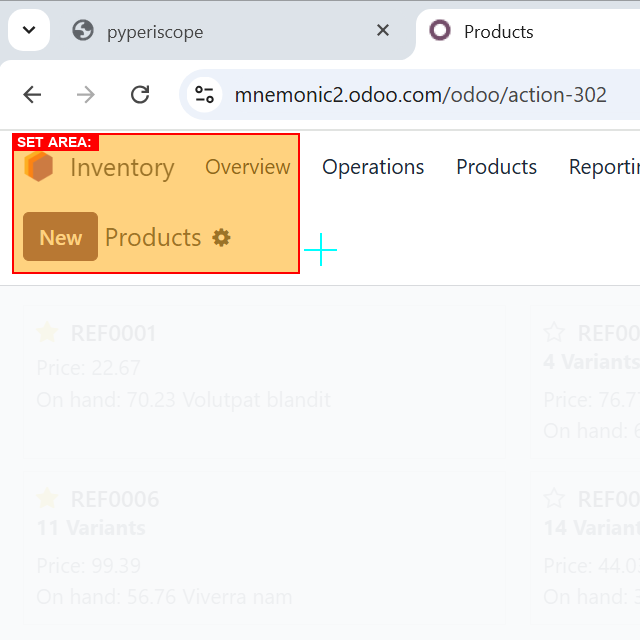

In [28]:
# comment: Automated step generated with pyPeriscope V2 
payload = '''gASVYiIBAAAAAAB9lCiMBGFyZWGUWNQuAABpVkJPUncwS0dnb0FBQUFOU1VoRVVnQUFBUjhBQUFDTUNBSUFBQURLc0RwREFBQWk1VWxFUVZSNG5PM2RhVndUVjlzSDREc0VFcmF3aFJCMkFySUlFbFNnRWlNb0lBaHFpeGF4V095RFMwdWxWcWxhcXJoVXFuVkJ0RnF4VlN4OTFLcWwra3F0OEtnRlJWblVDQlN3R3JjZ1F0aDNCTUtXUUpMM1ExZ0RDQ2dEaXVmNitZSE1uSm01QitlZk9YTm1FbkJpc1JnUUJNR0F6RmdYZ0NEakZrb1hnbUFGcFF0QnNJTFNoU0JZUWVsQ0VLeWdkQ0VJVmxDNkVBUXJLRjBJZ2hXVUxnVEJDa29YZ21BRnBRdEJzSUxTaFNCWVFlbENFS3lnZENFSVZsQzZFQVFySTVjdVVadTRPbDM0WUplNDhqYUkyMGRzdFFqeTFzS053S2NuaFh4eEEwZFVraUN1U0FHaEFHUVZaYlNZT0lNRk9HVkR3Q3VNUkpFSThsWjZ2WFNKMnNWTlJWQitVMWh4RzFyS1FDenFuQTVpdmpxT3dNRFQ1K0gwekFDSCtwL0l1K2pWMHlWdTQ0bktib3FML2djdHBTRHEwUlZzRVlxZjgwUjVqZENPeDFHTThMTjg4VTZMZ0tnNE12VWl5TnZqRmRJbEZndjVPRjZlTU8rc3VPWWVpSVdka3dIYVJlSXF2dWhSUGRUeW9XdXRPSnlNK1h2NEJXdkFlSW9Na1RoeWxTUEltMjZZNlJLMWlSdHl4ZVZKb3JLYjBOYlFQYjFkSks0UmlMbU40dUptYUpOZUlWOU1yRlNlMURobHNlNHNob2FobGl4QmRpUXFSNUEzM1pEVEpSYUpXNnZGcFFuaWlsUnhjMGwzVjFBTTRzWTJjVzZqdUtRWm10cWg5OHBFSUZQYnJ2NUVNTEdzWFljdm82eWlvMkV5M2RMQ2RUSkpTM1dFOXdOQjNqeERTNWVvVFZ5VkpueCtHcHFLdW9jdUFLQmRMQ3BvRkQ5cWdCYnBYQUZBcTVqSWFiVjRMTEFVaUFsaXdFa215c2pLcUJ0UTdENXlNbmF3R0tsOVFKQTMwNURTSlNxNkxIcjJLN1EzZDA5cUU0bHIrS0pjSHBTMmdxalhHc1NBYXhVVEs5cTBuZ2dzSzl1MXVuTFZreXhSYnZJQ0Ivc2xzMTY3ZmdSNWN3MXByRnpjeHV1T2xsQXNydWFML24waHlxaUI0aGFwYUxXTFpVdmJkREthMzd2VE1xT2luZHB2dEFDZ25kL1dYTi9jNzZ5aDJMN3JFTVBWTy9sVzJpdXZBWG5uTkxNMnVUQm9uOFFVamVJMmh6bkFJQlNMOGh2Rm5BWm9sTzRLaWdFYVJjb1BXeWNWdFJtMGlCVUd5dFU3cTcxZG1Ib240OC9ZdjllczhyZTBNQjNyY3JEQ0wyU2QvbS8wK2NRSHVTOEVBQURxTkthYlQvQTZIMXYxc2E1c0xBd3pYU0l4MUxVQnI5ZURUbUlBdnBoWUlEQjgwRXB2RWl1UFpIWGppRUFnT0gveDh2Tzhndkg3MWVLQzNITWgzanRaRFVCUW1jejBkVk1CZ01xY3BLUUxCN3d2bnZRTU94MDVuenlXMVNreTl5V2w3UnZkYmI3dTRMaEFUQ2h2cCtZS0pwUzI2N2FMMFZEN3U2dm90OC9jOXVXQTlmS0x4d043bkttMjhBdVR0NjhPT2YrTi8xZUs1dzY3a01hd3d0SDNXczhvdFlnVTdyVk92dHZNS0d3elJORjZwNVhIYlRxUUE0YkxyL3dSS05VSkpCbzY3L3NqYkFHcEpqYjBlTFp3Z01YSHFkZEtWNXRZdHFLZDJpSWUrMGQxSHo5OTV2YkJKNnUrMnRyWTFKeDVqNzF5OVNhbW13L1R6V2ZsNmszMzdqK1N0QkdMeFdFSEl4bXUza2NpZit1N2hndVhyakpjdmJmczJOL2UzbkVJOFBtQ1B5N0VmZWdYeUp5OWlEbDcwVWYrYXhKdTNCS0pSRDJYNmhwZmFXeHFQbnowcE1mQ1pReFhiNCtGeXc0Zk85WFMwaXBwVTFWZHUvRGpWYTd2TDczUGZ0TFkxTHh5OVNhR3E3ZlVxSXhJSkVxNW5mN1ptaEFuRDErR3E3ZVRoKzluYTBKU2JxZExiYTduYmlZa3BzNWJ0Skk1ZTlINVB5OTdMRnoyL3VKUGkwdktwSGFxdlYzNHpiYTlqbk1XMzc2YitYcS80RUVVWFkxaENVbitPd0luNGZ1YlRYTGV0cDRPMVRHL3BRSkF6Z0ZQQnMzaEFFc3FhWVhSYmxhTTkzN002WGdwNUdXZkM1MC9ZeWJOaWtHanV6c0ZSV2UvNkxHNUUvNDBLLytvUXFoS1BPQTJsVUdqNzdtV0VFS3pZbmlmcTVIYWNsSUlnMllWRXRzTUFLeXZyQmcwNytpZW94cjh3dVRkbnkyeG9ETm9WZ3phaklCTkNhVjh5WXpzQXhaV0RMY1RwVDNhMXB4ZndhQlpoY2IzS0x2b2hEL05hczM1NmdGL0xlUHQrZG9MZjEwSjNyTG5SVjI5M1JSckpVV0Z4MCtmZmJOdGIvYS9Ed0VBaDhNNU96ckl5dUl6NzdFYmVJMDlsK0x6QmJkWm1iS3krSGx6WEdSbDhRREFhMndLM3JibjhMRlRqWTFOZE91Sk5DUDlzb3FxME4ySGRoLzR1YTFOK3ZNMWxkVzFhNE5ETDEyK1JqUFNOell5NERVMi9YRWhibGY0VDVLV01qSXlGTElHVlV0VFRrNU9Cb2ZUVUZlamFtbFN0VFRsTzU4TDR6VTJmYlZwNTZidCt4NC96ZFdpa0prT3R1cHFLbytmUE5zY0doNTI4RmpmelFGQVl0THRYZnQvcm4xUkp4S0xLWm9hTnRZVHEydGUzR2Mva1dwV1VGVENmc3pSMTlPWlpHazJRci9nZnRXd2J1VUF5V09odzRBdEtFd1hVNEI0Rmh2QTNQY2pjK0FseFBmT2UyNXNUQzdvK25xYUF3QUFMMm5yRXUvZExIQUtQSHdvYk9mbmRzUmJFZDRMUXBONHZSYmhzeU85ZzJKeStRQkN2cHliMXdJOFpGOU9xdXJab2puNS9CVUFEMC9QZnA5eXpZdjJuaDhTVmF6cHZ6VXNNaXpJMTd6MC9IcHY3eE5jQUlESlRFODg1UDdMNW5jMXJyNFRtdzRBTE5iOTNuczlrY25VSEhDdngxVjM3dGx6YmxsNVpkaU9qWXhwVXdHQXp4ZnNPeFI1OVZyeWI5RVhKMW1hRTRrRUswdXpDY1pHQllVbHVjKzV0bE9zdXhZc0xDNTltdk44Z3JHUmpmVkVBR2hyYS8veDZJbXNiTGIveDk2ZituOUVKQklBb0x5eSt0dnZEeVlrcGs2Zlp1dm1QS1BuZGsrYytULzdxZlNqQjc5WFVKQUhnSC9aanpkOXV5L2xUbnJXUFRaajJsU3lobHJVVDN1Ym0xdldiOTcxUEsvZ3dPN05WaE83ajNYSnR2N0plakIxOHFUUXpWOXBhM1g4WCtVOHk5LzhYZmpsdjIvcTYrbjRmK3pkYzNQMURid0xmMTM5Zk1XU0pZcytrSk9UQlFDK29PM08zY3prMitrZWJyTWs3dzRTMmZjZjF0VTFMSmpucnE2RzZjTXhuT3hNQUJmNnBKYzBNYVJOQXNqbDhRREFZSjZYN1lFRDV4TXlkenJZZDg3T3VYU2xGR3lEbDAwRUFLaTZzSGxGSERrNDl0YzFaZ1FBQUE5bi8vbW4zTjZQREl6dzRXeWxkeTRpdVBUZi8wM2FmUzdSaTBiRUF3QVFGNU5penlYOFhlN2pyOTNSZ244clBsNUk4bC9pM00vanJVTDI5dVVSdVo1aEQ4S2NWZkFBQUo1ZUg3aDg0eDE0NE1CNXI1OThOZTFkM1NBMmtjVVNlcmpnQVFENDZTd1d5ZHhVSmVmdjFKeWR0dWFTTmJEU2dmSzV2Y0hBT3oydXpsMnRMYTJmci9oWUVpMEFJQklKSHkvMlVsVWhQYzh2cUtxdUFRQVZrakxqdmFtdGZQNmR0S3llQzJiZVk5YzM4Qmp2VFZVaEtRUEE0NmZQYnFiY2Rab3hMV0Q1RWttMEFFQmJTek5ndWE4c1hqWWhNYldyOTlnNWl4SWNGQ0NKRmdCTXRyWjBtVG05dlYzNFQvYURRV3VXYk12WXlHRFh0MTkzUlFzQXpNMk10M3p6SlZHZWVDVStxYnJtUmM5RnVBWEZUQWU3VDN3WFNxSUZBSFpUcktsVXloTk9ibmxGWlZjelBsK1FlanREV1VseGx1TzBJZjM2WGtPckVFQ1JOTlJudExWZEZ0b0MvMHB5ZCtmdzZjM1lRckI5MzRVQ0FKRHoyMzh6d1N1d0kxb1NKaDhFT0FBL0l5dTNleEszYU1xT3lBODdvZ1VBVEE4UElyQXZKWGQxRGdYeDhjbEE4dkMwaDc3NGliK2ZyallQWHRzUkxRQUFJSGwrN0VHRVROYS9BRUR3ZEhNR0lTdXA4MHpGdXBVTUxpdUQ3YUFxTmJPamIzay9NeDVJYzJlYXYyUkh4MVc2TkRUVXB0QXRlMDdSMWRFeTFOZHRiZVYzZFFWbk9VNVRWbExzMlRuazh3V3N0Q3hWRlpLYlM4Y1pLZlZPQnIrVjcrazJzK3Z3bFRBMk1sQlRVeWtxS2VNMTl1cFkyazJ4VmxOVjZYcUp3K0hzYmVrQVVGVmRPMmpOcVhjeVdscGE1OHgySkd1b1NjMnlOSjlnYm1wY1VWbGRXRlRTYzdxeWtxTExUQVlPMTMxSGthS3A0V0EvUmFweldGaGNtcE9iYjJsaE9zSFlhTkF5UmtBemp6OTRJd215NzhmT1BUdUhqK0t2RmVHZGwzbVJBUUNxbjJZWEFzUnRvRmt4ZXZ5YnZ5a2Q0RmwrejZzbVQ2ZmV1WEh3Q3REcjBUbHNUcnFVQUFhZmVESDd1eFI4bEprRmtMUGJrOUZySzUvRThBRWVGWllDQU5HQnlRUWVLNU1MQUNETVRFb0NGeWVtaTVNelBIMlEzUXdBOENpVnhjY3pYU2EvYkQvSFZjOVFoNnFscnQ2ckM0UURuQXkrMXp2SUJHTWpTd3RUOWlOT1YrZndlWDdCRTA2dXBZV3BvYjR1QVBENWd0eThBcEZZdlBtNy9mMXVSWnRLa1RwM1dVNlV2anNzaSsvMzZsNmFaRnV5c25oTDgzN3VMeXNxS3VqcFVPK3puOVRXMWZlY3JxeXNSTkhzZGU4SWg4UE5jWFdNdjU1eTdlWnROeGRIeWZuMjl0MS9lTHpHZVI0dVhhZGZ6TkNzclNFMm5mMElQR3dIYWxMQ3pRVXdOZEdWdkNLNmVIcmlrenM3aHpsL1h5a0Z0NkNPcTZQbXhrb0F5dnpnNzkzNlh0RG9kdmZtd2R4Nmd0UmM4NFZldWo4ZDYrZ2M4cE9Ta2tCM2pYdi81NVo2SGcrQUhuQm9xVjJmV1NwbW1nQUFtdll1RTJIMzNRZFZuOU1vOTVQUDg1ekRYUWpFWmlZVDl0eE1od1V1cFN4V0tiZ0Y5UnZkTHVNcVhUSjRHZHhnejRnUWlRUW13KzZmN0FkMzBySWs2VXE1bmRIYzNOSjFGQXFGd2xZK1h3YUhVMU5UbFRwM1NWRElHakl5dlJJN3hDejFKZG1XUEpHb290TC9YWGdEZlIwQUtDcnVPWGdGVkMxTkpVWHBjVm96VTJNVG1nRW5ONis0dEh5Q3NXRnpjMHZhUC85U0tHU2JTYVB3dExRdWs2a0xEeE11cFFmYkRqQ3dVWFVyNlJHUS9PMXBIYThWbVhQZElQNUtNbXVyUGZOK1hGUUp5WDlYNTlVUkhvZ0FWWXE2bmg3TTRkWmg2ajdINE5pcFM4azEva3ZnVWt4eTE0VmNQNGdBd05leWR2YlVHM2luWnVyQ0x5eFdzNWRwS292dnNKeXBDS0Jvd3pTREl5dzJPSlN5SG9MTE11YkxPOFBqS2wxRDVEVGQvdmZ6bHlTZFF4d085MC9XZlNxVll0YzV5SUdUd2NuSXlCQUloRjNmYnVnNThvRUZ5YmJhMjRXdHJmMzNxb3FLeXdEQTJPZ2xWODRkU01wSzdyT2REaDg5bVgzLzRRUmp3MmZQdVRtNStSNnpaK3JxVUVlNDZQNU04dll4L1NYaTlBL1Ivbi80bWZaOXErRWw3enJFQnNQbC90Mm5Oc0lDTDQrdkVoTGlNNFBsRXhQNGVvdDh1MktwUjdjandTUFdnMGZBZk5rd1NiOG1ldmxQUExYN2NsS1ZHeUUySFZ6MmUxRUdhR2h0YlE4WE1sbi9DZ0wwQmp5eFQ1ckpKUDRTY3pPZFc1bGFhdnErUFFVQWdNYWNSanFRa1pXYm5wOEU5dnNjQnVrVWpLdnJyaUhTcG1yWldFK1VqQnptNVJmbUZ4WTcyRStoYUdwSTVpckl5K3RRS2ExOC9uTnVJZGFWS01qTEd4dnF0L0w1bk56OHZuT2JtMXRLeWlya2lVVEpXTXVnN0tmU1ZWVkl0MW1aZkw2QWxaNHRGb25udURyMnZEekRrS0ZmWkxBNVBJendYdDNyeGhRQThBdmpBcjFDWXB2TnR4NE43Tlg5bmZtQlA0bDNQakh5VWh6UHdNdTFSNURvQzczSVVISnFvMlJ3dkZORFluUnNyOHZQZnVrdS9JZ08yY20vL1hHTmhYZGU2RExnMFU5eG1zUEVROUsrM2IxRytmbmNxTE05YmhUWWV2aVNnQlVYZWVtcHVhOWJSNS9XbHNtRVo1bEhFdGd2SDR1WGVCZlRKU3VMZDJKT0V3Z0VkOUt5VXU5a0FNQmM5MWs5ajhMMzdDYkw0SEJYNHBQcTZoc0dYczJyRUl0QjFQdFRCVXlHbmF3c1B1NUtZazF0blZUakp6blBjM0x6VFdnR1pxYkdRMW01c1pHQmpmVkVUbTdlWTA1dTJqLzNocjdnaURCZCtYUDBNbHJEclFqdm1lNU9uNFZ1Q3QyektYVFBpby9jTFR6M3hGZlQvSC85T2NDazl3SjQrNFZlSlA2NVU2ZDU5SURGdmE2T2JJTzIrbExoMFlFbDc2M1lFeFdYSEg4dWNzVkg3alpCOFpWRGVOU0Q0dllCRXpKLytpV1R1Tmhud1V1K3pFWGJhMmN3SGFvVFZzeGNzdUpJVEh4Q1FsVG9tdmNZUzNZL0ZQUm9SSGR4Z2FyRTVFZDZUS1poNXpRSHBndGt4bDRwcGN4ODJWaTh4SkRTaFpOVkd0bnZUcE9UbDFOU1Z4ckJGUTdYZTdZMkJ2cTZkek95MHpQL05UYlVOekUyN0RsMytyU3A1bVltVDNPZTd6OGMxZGpVL1VtWnV2cUduNDZmZnByei9CVzJxS0FncjBuV2FHcHVaai9tU0ZWaWIydVRYMUMwN2ZzZnlpdTdiL3ZuUE12ZnMvL245bmJoZno3K2tLUThwTitWckN6ZWRSYXpvWjRYZStWNlFXR0orMnluSVM0NFFrak1UZWM0bDhQV3VOQmEyUW5uTDhTZHZ4REhxcUs1ZkJHV21INXVwME0vVHhqYUxsaEVFUUxZZXN6VmxsN1R2dmlMa1V2bzhEaHVkMGhJNE80L0grS1pPOC8rSEdEWWR4MTlhSHI2dWdFSVNiNGUvWTNFOTJDNkxPckIyU0JQdzVxa1l3Y0MxNGZ1VHF3Mld4SjJhMGV2aXoybWt6TUlnZWc4by92VXFtanY2UUFnSEdRc1htSkkxMTB5K25PQnFDNTZmaHJxQ3FEdmg1Q0hRd1l2bzJHa1pmdVJvL0cwc2Z4c01sbERiZXJrU1pjdVh3T0FyMWF2a0RvSzFWUlZ2dmtxSUhqcjNodkpkMUx2WkJqb2FXdFJ5RG01M0xxNmVpVmxwYTZCKzJIQjRYQ08wKzJUVWxoSEluK0x1NUlvSzRzUC9IVHBESVlka1VqWXZPR0xqZCtHM2J2L3lOc3ZVRWRieThoQU56ZXZvTHE2Rmk4cnV6cmdFMmNueHRDM0lublhTRXk2cmFTb2FEK1ZQdmdDSTQxbzRod2M0Unc4eE5iV2dmODhEaHhnUmJxZTI2TTh0L2MvMDJEbGFlN0tnVlpLV0JDUnRxQ2Y2Y3pEajlNTzk1NmtZdXNYR2V2M2tnS0o4OE80ODZXbWtYMVBwdm0rWkprZWhqYXFJU01ubytXSVU1a29LcnlDNDE0QnVhZmlOc0hnUzBtdEF5K2pvcTArd2RIU3dtVXlpVExHMzZzaGVTcnFjdndOTlZVVnArbjl2TWxOc2pTUFB2SGppVE1YYnFhdzhyaEZlZHdpTlZVVjk5bE95NWN1R3NvWVE3ODhaanZWMVRlY09odVRYMUNrcWtLU2wrOFljS0pxYWY0U3NTZmhSdW9mRi81WFVGUlNVbG91R2FKNGhXMUozalVLaWtyc3BscS9jcDNJU0JubWQwSUoyOFJGVDRTc1dGSDZWVEd2dGtGSVNtNmVWU3ZVR0d3am9LaW1iTUswTkp0cFRhWnA0ZnNiNWtaR2hGZ3MzbmZvZU55VjY3dERnMTFtVGgvcmN0NTF3enpROFhJNEl6cGVlNExNZS9PRi96c0tiUGFnUzhqSXlHaGJHZGd1ZHFTYTY4a1M1VjZ4VEdSb1Nzc3E3bVprRytqcjBpY05kS01IR1QzRFA0M2djRGg1Slp5WkxTN3dCemxXa3VKVmJsMVJpMGdvNnRzUVQ1QlYwVmEzbW1NNzBkVkdWaDdyeHdVUUFJQlUxajhWbGRYTC9CWnBrdC9KajlxL1lWNjlrNFpUVkZWeDhXS2ExM0NTSG5BemNob3FYb2c3eDVweE1qTEttcVFKTTZ6TVpscXJHMUpHNlpiTE82K2dxQ1RtcjZ1YVpJMzVuaTVqWFFzQ01DSi9BNldkMzFhVlYvNzArcjk1ck1mdGduYUNJdEdZWVRIUmZTclpTRXNPbmJLdzE5emM4dDNldzV4bmViVXY2Z0VnTkNUbzFVWTFrUkUzQWdNTXNrUTVIVXNETFZOZEUrYkVaNmtQSnpBdGplek5aR1JmOGRFN1pMaHdNamhlWTFORlpiV2VydmE2MVNzYyt4c0NSY2JFU1B6OUxnUkIrdk11UGdtRklLTURwUXRCc0lMU2hTQllRZWxDRUt5Z2RDRUlWbEM2RUFRcktGMElnaFdVTGdUQkNrb1hnbUFGcFF0QnNJTFNoU0JZUWVsQ0VLeWdkQ0VJVmxDNkVBUXJLRjBJZ2hXVUxnVEJDa29YZ21BRnBRdEJzSUxTaFNCWVFlbENFS3lnZENFSVZsQzZFQVFyS0YwSWdoV1VMZ1RCQ2tvWGdtQUZwUXRCc0lMU2hTQllRZWxDRUt5Z2RDRUlWb2J4RjRhUy9yeDJOLzVXVFVXTldOVFBYNXA4VytCa1pNaFU4blJQSjVkRmM4YTZGbVNjRzlKZkdLb3VxL3BsZXdTdm5zZHZiaDJGbWtZQlVWR2VwRXI2ZkdlUXBnNWxyR3RCeHEwaHBXdFB3TGZWWlZXalVNMG8wOVNoYkluNmZxeXJRTWF0d2ErN2t2Njh4cXZualVJcG80OVh6MHY2ODlwWVY0R01XNE9uNjI3OHJYSFRJWlRDYjI2OUczOXJyS3RBeHEzQjAxVlRVVE1LZFl5VjhiMTN5TmdhUEYxdjlRamhvTWIzM2lGakM5M3ZRaENzb0hRaENGWlF1aEFFS3loZENJSVZsQzRFd1FwS0Y0SmdCYVVMUWJDQzBvVWdXRUhwZWd1VW5nbGl1SG96ZHFXTmRTSEk4QXpqODEzdm5OdUhHTnQ3UDRXSWx5T2IwajlZSExEU2xVb1lvNkxlYmxWcGtTZXphZ0ZBdzI3Vlp3enlXSmVETlhUdUdneEJTWmVpcGt0UjA5V1FBMkZiRFNmNzFLNHYzTDZJNVFySHVyQ1JKT0NteElSK3VqbTZFTnZOY0M5SG40cS9FUmQvSXk0Nk9nSGpiYjBKc0RsM0xWeS8rek1MQlFBUWxLZC8vOTM1ZTFLei83UHA4Z3dxUUVWaTRMNGZNZG4rU0hMODh1STJSdWNMUVUxVzNPNWQwU3pPYjE4ZU1ibXlqajZXaFkya1N0YnA2SVI4ZlFzTVZsMFRILzdsQmZXZy9RRk1EU2d0S2U2Y1hNd3RBVEFFM3Qyb2dDT05nVCt0ZDliQVlOdGpEZU9lSVVIYmJzV2k2L2Yrck1WMk02T0dRTGJ6T1JqVzZQMUZYT21WUk5aYU9oTS8xaFc5MlhncGgvekQwMm9BTnZpeDdTMEVEOWpkcytKMkJKYWFRdWJqU2dBSStSUU9ubG5QVkI2ek9qR0NlYzlRMXNUNWswODBzZDdLcUxKdzh6SUVFT1p6UzhhNmtqZWM0TmFCWGJjNlB1RWpLTTVrVndwNnphMlVSQXNBb1A1V3lOR3NVYTV1RkdCNjdtcHJhWkpUVUpLakxWdzU3MGI0MVRJc056VzZDTDFQV2F4ZDNodHVnc2ZPaXp1bWNLSjNIWXJNcUJTWUxydjR5d0xkanZtQzB0dHh4MysveXNxdDR3a2xReU4yUzVjdTgzSHNiMmhFVUpGOC9NZkltM25jK2piQXk5R3MzQUkzTGpQdjA2cjBUSkQzeVdKdzNaalczV3VWU0F0MURVOEFwNE0zMXpON3orQnhFazhlamZzZnA1Z242S2hoMWJwMVhoYlpvYTdoQ1IxTmlpT1dlMGNBQUlESHpvczdIQUVBUUZqSC91dVhpSE5aN05vMkFDQ282dHRNWDd4bG81TXVEQUhCS1RnME0zUDdyY0UvUXFmcUZMYmFiaWlyZkx0Z202N2krSWZrUlZNMTVFMW1ySFZQMjNMOXBmMURUY2NOcTl3ZHRFbEtjZ0FBVFEwbDZWZlBIVXd1QWRCWTk5MDJOMjJBaGljSE4wYmRsRFNlRm5CbXBhVTZRTVc5WTU4ZWZ3WUFBQm9iZG0xejFZVFd2RVNmOEt0WTdoVUlYNVJXQVlBV1dlb0xiNFRGMFJzMlIrUktmbTdybnJqbTZ3aE9HNEFjaVdMc2JFWGdzdk80bkxTSTdXbS91Mjg4dDVsQjZybUcvTDgzYkloaTFRTVFsSFF0Nk9hUWw4WDVPMlQ1VXcvSDE2eTRpYlYzN1licmRRQkEwdEMzTjFXcXpzM2pjdEppTWlxOUxPVElGRFZkQUY1dEhVOElKQTAxRWg0QWdFem9MUDZMb0loY0FBVTFHdDFFc3o2UFUxNmNHWi9KSFdLNkFFaU9ma3ROYjNYOFRnQUFyMmJ2YUtlckFQekNySVRIZFYzTjZFdjh4bCszRURDLzducHgvSHBHdU84MEZRV2J1YjRMcngrN05GQTdhKytJbFk0bWlnRFEzdG9HTW5LeVNpcDZya3RXYThyOXNPVjZiVXBaclp1MkJxaFFwMmpDeldvQUFCMExEWFVBQUtEcTJBSkkwdVZJMHdRQUtIMk9iYlFBdU5Hbllob0I2SGIyQ3IybTg2K2RpbXlaZS9EOE1pYWw2NXpVeE5xN09ZTFRSckR3K1htM0g3M3p3bDFRa3JoOXpkSGs2K0ZmbWtTYzl0WHZtQ3JNajl3YXhhb0htdGZXcUxWMmtxTWNCQlZ4TzRMM3BEUzlUc0U1eDcvZWNMME9OQmhiRHEvejBpTjAxUkRObGdPd0N6cC9JZ2lLb3o4TmlzalhYM0V3d3Mrd2U4SFM2UENJWENDN2JqeTNtZEZSajFEQVRja1c5TE9SUGxxS00rL21jeDlkK3IwN1dzWkJ2L3pnWjl6eGFzV1pyNWVjekpmOHpENFhGVTJaWlc1b2EyT3NSQmhIbDdLWVgzZWw3NHg5OGdJQUZNMFdyWEVZb0kzWk9oOUhFMFVRbEdmdjM3YlJaKzFHNzhDb3hQSjJBQVViOTBWdUFQZnVWYndBQU5DZ3plcFlZTDRodGVNbk12VVR5US91ZWxRQWdJcThGT3oyUlZET2lRc1A4aitaRDNqam9IVnpwVzdYSkdmQTFtTUJQYUlGa0J0NzRHWVRxTTc5K2FmdWFBRUFRYzh0TE14TEZ5RG45OWpNenBGOXdjM2ZUNVVEVEZzZHRhNHpXZ0JBb0hydDNCdG9ESyt1S25iLytVckEyKzQ0dGJFcldwSWFsbnRTWDdJY0FIQUxpZ0hBM3BuUlhRK2VRSE5sOU8ycDlzWDZJV2pOcmtNSC9zcnY2aGFhKzYvMzY3RWp0UCtzRCtwNldaOGRzZXZRbXMvL3MvdnVFRmI5OWhpRisxMTNvdjdrdEFDQXVyVjdpSFYvRFdZNDIya0RRRzNHSDJkVHFpV1Rudng0Sjc4SkFGVDBtZE1BTXA0Vk5RTUFVQTJkQVFCZzNrUnRnSWFTWjgwQWNtU1RhUUFBVTAzSVNnQlFYZEc1aGhGek01emg2aTM1TjlOdjg1NzRZZ0ZCM3k5c3AxL2ZJMzZXbTBmdjdrM09qY1JTQUhQdnVmUys3OGNXYmo3R0FJMVptUjF2N1lLa0c5a0E0UEcrRzBtcUpWN2YyVkZmZXZFaEs0Mi93UWJROVYzcU1meXVGMGxaQ1FCWU4yN3hSdUxtbnJHeDFGN28wMTduWGVOdE1DclBhbHc2YzMzYUZpOGJSWTNwU3o2WnR1MXNSdSs1T2haVWRRQUFEY2YxQnkvM3FVOWVGUUNTSDVmUHN6R1JWU0xUcGdMY2N6Y3lrSU9tdkt4SGlucG1paVFEYXczSXFIWFUwUUNBaXFJNzB2ZldYaHRCU1ZkVnJ1Tm5EWk01c3hkNGVkRjErM3RTdzl4STZ1aXBlL3E0RGtESmh0NXZOdlJwcGdENWRXWGxBQllBVUpLZkR3QVdkbGI5bGZEcS8wc0M5cU5pQUNXbS9hc2N5UFNseTVqeFIxa3BoOXpaVi8xV0xGL3Fia0YralVkVTh2T0xvZGZiUkRFMy85WFg5bFlZblNlaHFwT1BwTmdjbVV1VDE3Ulo5aDh6cVhRNXFFcXVYOXFyeTJ2NlhGKzBsTlVEQUp4OVhySFlSQSt2U1hVRVVMZlFWZ0xJSzB5K291aXcwSUNxcGVNSTBHNUVCZ0Jld2IxbkkxNTdyN3ZKTDlQbnZibXhzUkVBMUhVSHVFOUswOWNIS000dkxBYlFCNmdvcXdJQUxjMFJ2cWxhV1ZQMXNob0dRWEU3R0UyTkR2ODVNb01UL2NQbTZCL2x6TjNYaEsxejZ2Zk5SUXJ6NnpQbjVtWnpPU243ZjgyV2RBNXpUaCtLZHV5Kzd1S2VPUlRSbFM1Vlk3K2xDMjJNalpsVFhxbk9OOVZvUFdkWUZudjJra1hJRWhOWm8ybGVuL1UrdnhRMHR3QW9BRFE4K0duZndZSDZkU25GWmU1NitrQTJXbUNtcEUyU1hGK1ZrU3NxWmxDcFpMMkYwOXFwY2dETjVROHlCbGg4VE1nQkhnQWFHMXI2bjgwdExnYnBURGJ4SkwrTHdSQ1ZsVWFraHNGcDBQM0NJbjJxT1BIblRwMjZ3c21KUCtTZFczSHVtQTl0MExFSEJTV2FuUlBOenJ3MCtZdk9jZFQ4aU05WHN2b2JNNlI1clEveWVmWGU3eHRyOUo0enJEMTc0blplRzRDY251ZlVYdU1COThvYldnRUFOR2h1QTcvRFZtZHpxd0ZBbG1yZ29LdlplWDNGNFZZMEF5aVNKMDJscWdPMGxoZGN3blFQaG90S3QxSUNxTXRpMS9VM3Q1aWJDd0JxbmQ5anIyOWhEQUI1K2YwOWZWZFQ4MEpxQ3BtaTFmODI4L000dld1Z0djUEFOUXdWZ1dMaHRYYnZ4Wmk5ZnNZQXVkR1IxNGMwYWdnQXZOdlIzV09HQUNDc3kweTVFUmQvbzJlMEFJQWJkNEhWK0RvRnZxRkc4eW5lNnJpVEdSVUNBSG01M21mTTJNZDViUUFBSmpPKyttNnVYc2RFVGJORkt6ZEZybkh1YlBRc281d0hBT29tbGxTQUYrVVA3Z0VBSkQ4dWJ3ZlFtR3F0QXFNeEZqOWNkQ2NHQ1lEOSt3VjIzMUVCVG1KTVBvQzJtMnZIczMzNmRMb1NRTjJmRjlLa2o5ekd0SmliZlhyTUZIVmRBR0N6cGRaY2VqdU4yN3NoYzg3c0FXdm9RL0R5TnNvV1BzNzZBRkJhVmZuU2RsMnlqdThhd3Exa0FLaS9GZkpEbngxLys0M3VNL0wzenNTbGxyZjNtWng0S081WkF3RElrZXdYZkIxN0pEem1TSGpzcmk5V1RLT3F5M1UzdXNrcGJ3SUFSUVVsYUNuaVpFc21uaTJyZ1k2NFlqb1cvNHJzbHE2bEE5VC8vZVdhYUhhUFcrbUNrc1NRa0xoU1VQSmE2OU0xdWszMzlqSEhBKy9tenlFeCtkM0hXUzA3Y2tONFF0OStuYWtkVXhtZzZ1LzlwN3NiOCs1R2JmaTlXTHFsM1lJVnB2M1ZVSmg0S3I2aTg1VytyaUVBRk4vSnF1dXhaQjA3UG8zYmM5UEM0dVJieFFCS05sWkQ3TVhacmRybTFORlB3V3ZaMDdWNlhhOFJ0T3l0T3MvQXFrNDcxekxHMzRkNlJ2dnpYVTkrakhrd2FZMnRUdStwWmRlUGZWM3Z0V3FlZzQyMkFrRk9GZzhnYUdzcHkzdHdKU2E1dTlIMUo4L25tdGtvQXJSVlBMN2VPVEdqb21JR2xRcVlqTVdQQURXdjNUdHl2Z2lONGNRRStNU1NLUHAya21jMWF0c0FsSmhyOTI2WjN1T0lNbHl3YzNYMmwwZllyS05menp5cFJqTTEwYXpQNDVUVThZejl3dnhTUTg3MGpnMmV2bXF0YmR6ZTdKd3pYN3ZGcVZrWVVua2xlZHhhZ3NmTzFSYmJqeWIwYXFydmQzQkhhWGNOVkF0anBlcmNQRzV0bS9tS2lPV2RqWmhNVzBqSlpoOWQ1WDdaeEVLaGd1Wi9Jbmg2SS90Q2VFUTRrRFRVeUhvVGFZS25XZmwxUEFHUVhiOWNOZVNIbGtpTzY4L3RoR1cvUWxEWWVtZHRZTzMxM3RENVgrZXhMWEtISS9EdVJuMTU5TVhTL2VnWithRzdkR2pycFlIbVBUd2JFSGkyNytTeWpManZNdUpldXRia0xSdVNwYWR4VG4wYU9PenlScE15UGZqVUNhLzRDeEVYVWg4VTVpZW5BQ2lvMFdmTlcvR1pGMU5QK3MyYTl1R09jNmF4QjQ3R3NuTHJ1T3pzVWxWamwxWHJneitrODZKVCs2Nlk1TDd0TDBKVTZNblVCNFYxYkhZZFNjODI2T0FhdnlsUFF3ZW93ZU92MzQvSHBtYVdGR2RXQVVGVjMvNURyNkQ1M2FjZ2d2dkdjL1hoSVNlenVZV2NUQVV0YTJVQTBHSXU5bmtRbTVpVlc4ZXRUZVBpNWNpbXRzdUgvOGxSa3VQNmk1MVBja21HU1FFQVFOOVlEd0NBTkQzZzlQVGhyTzZ0TXZqZjc5cncvcHQ5K0w2Mmc1Y2p4N3FFZDhZNzl0bGs5TWwvWkJSUkdJRWJoM1R6Y0h4QW4veEhFS3lnZENFSVZsQzZFQVFyS0YwSWdoV1VMZ1RCQ2tvWGdtQUZwUXRCc0RKNHVuQXk0em1CNDN2dmtMRTErTEZGcG83blcrcmplKytRc1RWNHVxWjdPaEVWNVVlaGxORkhWSlNmN3VrMDFsVWc0OWJnNlhKWk5JZWtLdjFOS3VNRFNaWGtzbWpPV0ZlQmpGdER1dXI0ZkdlUXBnNWxQSjNCaUlyeW1qcVV6M2NHalhVaHlIZzIrRFB5WFpMK3ZIWTMvbFpOUlkxWUpNSzBKa3poWkdUSVZQSjBUeWQwMWtLd05veDBJUWd5TEdnOEdrR3dndEtGSUZoQjZVSVFyS0IwSVFoV1VMb1FCQ3NvWFFpQ0ZaUXVCTUVLU2hlQ1lBV2xDMEd3Z3RLRklGaEI2VUlRclB3L2dPSS9XSUpQUWRjQUFBQUFTVVZPUks1Q1lJST2UjA1jbGVhbl9wcmV2aWV3lFho8wAAaVZCT1J3MEtHZ29BQUFBTlNVaEVVZ0FBQW9BQUFBS0FDQUlBQUFDRHIxNTBBQUMyVlVsRVFWUjRuT3pkZVZ4VVZmc0E4T2ZjWldZQXdRVndBUmN3bFZ5d1VuUEJGZFBVTE94MUtUTXp6Y3hXTTdPMExIMHpOYmZVYk5OOExUVXovYm1rcEttNWdKcTRwRmFTQzJwS0xyZ0FpcXh6dDNOK2Y5eGhHR2FCQVFZRzlmbCsrdlNSZSsrY2MrYk96SDN1V1M5Wi9ML3ZBQ0dFRUVJVmkveHo2YnEzeTRBUVFnamRjemh2RndBaGhCQzZGMkVBUmdnaGhMd0FBekJDQ0NIa0JSaUFFVUlJSVMvQUFJd1FRZ2g1QVFaZ2hCQkN5QXN3QUNPRUVFSmVJSlRpTlJ6SCtab01Qa2FEUWVSNW51TTVqaEJTN0tzWVk1cEdOVXBsUmMwMXkzbVNRaWt0UmU1RjBvdEJHUkRDR0JEckZvVFFuWVVCQTBZSUFPTUl4eGdBTU05bWtIOGRFMFZSRU55K2ppSGtRU1VMd0J3aDFhdjZCVlR4TGNYM2xCQWlDTHdBdk5FZyt2djVNSURNck54YldUbVVldUIzUlFBWUEwWVkwYlBLL3g5QzZNNUVnT2kzejRReFMvd2xuR2Vpc0g0ZHExckYxd05wSVZRR0pRakEvbjZtR2dGVmVONHpyZFlFb0txL2J4VmZVL3J0N094Y2M5blNJb3l5L0o4clF1aHVZMm5Nb2tBNFlHV0x3WDQreHFEcS9qeUh2Vy9JKzl3TndOWDhmV3RVcmVMeDdIbWVxMWtqZ09lNDI5bTVwVTJEZ0tXMUdTRjBWeVBBbU43ZVZjb0VxZ2Y0VlEvdzgyaVpFQ285dHdKd2NJMEFmMTlUK1JVaXNGb1ZRZURTTTdKTCtrTEdnQkFQOXd3aGhDbzFCc0JLTTdvanFKcC9RQldmY2lnUVFxVlVmRHRNMVNxKzVScDlyYm1VdUV1R1lEOHZRdmNrVXVJQVhOWGZGNk12cW15S0NjQStSa05nTmMrM1BEc1ZXSzJLajhuZzd0RmxhSVpDQ04zeFN0THY1R015QkpaRER4cENaVlJVQUNhRTFLd1JVR0ZGQVlDYTFRUGNtd2xBd09Nem1CQkNkeFRHd0oyS2NNVmZ4eEJ5VTFFQnVHb1ZIMCtOZVhZVHozTUJmbTQwRTVXOEFRb2hkTGNoQUc0TUFhbGF4UmZIUEtQS3FlZ0E3SVY1Y3RYODNjaTBWRk9IaTFqM294eVdCRUVJbFQ4M2ZyaFZzZXNYVlZZdVIwRWJEV0lGVjM5MVBNOFpEYUlrSzY0T0lBQ3NoTlZmeGhnaGhPTzQzTHpjczZlVHNyS3o5S21FSElFcVZmd2IzeC9oNitOclBheE1wVWNJVlNSU3pHaVFVbC9IYmw1UFQwdTVrWnB5UThveks0cENnQmg5akw1Vi9Bd21RODI2dFlOQ2E0cWlXT3BTSTZSekdZRDlmSXdWV1E2N3JJc0l3S3lFVXhEMHNKcWRuYlY3MSs2VWxDczNybDgzR2syOHdCTWdtcWJLc2x3akliQnUzWHJkSCtsZXBZby94bUNFN2l4Rlh4RDgzQi9YcWJlRU1hWXFHcVgwOHJtTEozLy82OFNoUkhOMm50RmdKSVRrU25uQklUWDlxL3UzN05qS3A0cVByMzhWUWVBSkxtQ0p5b0Q4YyttNjB4MGh3ZFZOUnUvYzRwa2xKU1gxbHF1OURKajdhMTdwQWZYdnhPTmJmL2xGa2lSQkVQV052cjYrUUVBeVM1SmtKb1FRUWd3R1E1L0hIbXNSMlJKak1FSjNrS0l2Q0hXQ3Eva1kzWXJCK2cvLzFvMmIvNXc0dS8ySG4zTXpjeFJGQldDTU1Vc1ZXMS9obG9Bb2lyNEJWVG85M3UzKzFzMXExYXVEVnd4VWFpNXJ3RjVwZjNZbmEvZS82WlF5amlNSEV2YnYycm1UTWlid2ZIQncwUDFObXdVRkJWZXZYbzNqdUIyLy9ucmh3bm5HR0dNc3oyemUrTk5QV1ZsWkhhSTY2aThzK3h0QkNKVzNvbitvZ3R2WE1hcHBONjdjU0RwMjR0eGZaN0p2WjhsbVdWK0NtaERDOHp3QWFKcW1iOUZValZKNjhsQWlwWlRqK2NCYVFZVEh5d1VxRGRjQjJIdmpCb3ZKMnIwS01HT000OGlKdjAvRXg4VUJBRWRJbDY1ZFc3VnBvM2YzQWtCdVhtN0c3UXlXandBUVF1TGo0Z0lDcWpWdjBSenZhaEc2TXhSNVFSQjQzcTAwR05OVTlmemZaLy84N1ZoNjhuVkZWUWhIT01JVEFxSkJOSmdNQUNDWlpWVldHQVBHcUNJcktXY3VVcUJWQTZ0WEM2cEdPQkV2RjZnVVhBWmdMMVlCaThuYXZYSVJRckt6c3pkdmp0VTBqZVA0ZnY5NXNubnpGZ0NncXFxc3lFY08vMzcyekpuVUd6ZjBRS3YvWDlNMFN1bm16YkVOd2hwVXFZTFQ5aEh5cEp2cGFjdit0M2pJc0JHMTY0VFk3YnAyTldYVml1OUd2Zks2ZjBEVkVxZGI5TlhDdmJpb2FWcHVqam4rcHgxWkdabUtvbkRBR1h5TndYVnJkWTE1SktSaDNSbzFBd0VnNjlidDFKUWIyMWIrZk9QeWRUbFB5bFhNbDg3K201RzZxVm1iRnFLaGNrWGZvMGVQRGhnd1lQMzY5YTFidC9aMldWQlI3czdwY1JxbEFCQWZ0MXVSWlk3anVuVHQwcng1QzBvcHBWUVFoRU1IRGh3NGtIRGx5bVY5YURUWS9Fb1pZNnFxeE8vZWJVM2tEbkl6UGUzVkY0ZjlzSHlwdHd1Q2tCUExsMzV6N216Uy9Ea3pybDFOc2QxKzdXcksvRGt6enAxTituYkoxOTRxMjQxTDF4SVRqbVhmemxaa0JRQjgvSDFidEgrZ1MwejN1dmZWcXhaWVhUU0lva0gwcng1UXExNmRMakhkVzdSL3dLZUtMd0JUWkNVbk0rZk1IeWR2WGs5elA2L1kyTml3d3I3KzJtdHZISG1YWndMdzc3Ly9QbUxFQ0VtU0hIZEpralJpeElqZmYvL2RJeG01aVNNa096dnJ3b1VMb21pb1hidDJ1L1lkS0tWNnVNM0x5ejEzOWl5bGxPT0lwZkZaajc2V0p3a1RZT1Q4K1greXM3TTRiRk5DeUhPR3ZUQXFNQ2c0S3pOendkeFByREg0MnRXVUJYTS95Y3JNREF3S0h2cjhTRytWN2NibGEzLzlka3lSRlVhWklBalZhd1ZHZG5pd1ZaZUhnME5yR2ZQbmc0Z0dRN1dnNmc5MWZiaGxod2RyMUFvVUJJRlJxc2p5eVNPSmFWZHZsRFRIQXdjT0pDY25KeWNucjErL2Z0YXNXUjk4OElHbjM1TUhoSVdGeGNiR2Vyc1Vkek1QQk9Da3BLVG5ubnN1TGk3T01RYWJ6ZVlSSTBiRXhjVU5HellzS1NtcDdIbTVpUkJ5N3V3L3QyL2Zab3hHTkcwcWlxSjFxUTFGVVRWS3FhYnhuTUJ4bkI2REFTeHpDUmxqbEdxWldabm56cDY3NHpwMWFnUUdmZlcvRmM5Njd5cUdVQkVDZzRMSGpwOFlHQlNjZWZ1MkhvUDE2SnQ1KzdaMWw3Zktwa2h5eHMxYkhFY0lFTWJZWTgvMXEzdGZBNzFQeXZZd1NxbW1hYlhxaDNSNThoSEdHQUZDQ0J3LytGZGFTZ2xxd0haYXQyNjljT0hDbFN0WFhyMTZ0Y3p2dzVNcVczbnVTaDRJd1BmZGQxL256cDBCSUNFaHdUWUdTNUwwd2dzdkpDUWtBRUNuVHAzdXUrKytzdWZsdnB5Y0xGRVFLYVUxZzJzQ2dDQUlla0QxOC9YcjFidlBmL29QR0Rob1VIVDM3Z2FEZ1N0QUFJQnduRUUwWm1WbFZXUnBFYm9YNklFMm9HclZ6TnUzNTgyZU1XLzJqTW9RZlFFZ056dFh6all6eGdoSFJLTWhPS1Ntbjc4ZnovTmM0UUdoSE1meFBPOWZ6VCswWVQzUmFDQWNZWXhSV2MzTHpTdEw3cUdob1FDUWtwSlM3SkhvTHVQVzg0Q0xTVUlRRmk5ZS9QcnJyLy95eXk5NkRGNjJiQmxqYk1TSUVYcjBmZXl4eDc3NDRndXVZb2RWNjkyOVJwUFIxODlQVlJUS0tFYzRSb2pBOCtIaDRmb3hEUnMxU2p4K1BPTjJwcXJJQUlUbkJSOGZrVkVHaExDU0xIYjV3L0tsU2FkUFR2M2swMWRmSEdiZCtOWC9WZ0RBdVROSjgyWlBmMzdrNkhZZE9scDMvYko1MCthTjY3LzYzNHBEQi9Zdlg3cDQycXg1M3kvN1g5S3BrL3JlY2U5T2F0UWt3bnF3bm9MKzc0aW16ZDU4ZTZMK2IrdHJQNWd3RGdEMExGNTljZGpqVHc1NDdQRisrakdmZlRyVG1xenRkdHMwQVdEYXJIazFBb01BNEdaNm1wNmF6cmJZK3E3blI0NU9UMC9idkhHOVk1bzZ4ek9Ba0szQW9PQ3g0OStiTjN0R2RsWW1ZOHcvb0tyWG95OEE1T1htTVlWUkNoekhHWXpHcWtIVmVOZkRwNDIrcG1CVFRZUFJJSnNsU3NISTg2cmljdUdna3ZyZ2d3LzI3Tm16WU1HQ0FRTUdBTUNCQXdmcTFLbWpiMSs1Y3FWK1RMMTY5ZmJ0MjJmM3dyQ3dNT3UvMTY5ZmIvMjM0NEFzcDBPMGJGKytjT0hDdzRjUDY5bU5HVE5tekpneFhicDBXYkZpQlFBTUd6WnM3OTY5K21FVEpreDQ1WlZYUFBTKzcxRWVDTUFBd0hIY2wxOStPWEhpeERWcjFpUWtKSXdlUFZwUkZEMzZEaDQ4K0pOUFBxbjQ1bHpLZ0ZKcXpqWXYvKzQ3NjBaQkVLcFdyVnEzWHQxV3JWclhDUW5oT0s3djR6Rjc5OFpsWk53bVFHcldxblYvMDZaNzRuWkxra3pjV09UZHpxc3ZEck9Hbk04K25hbi8yYWhKUkVUVFpnY1Q5dGtHNElQNzl6Nys1QURybnd2bWZqSnN4RXQ2WlAxbDg2WjVzNmRiWTdBZVphMS9Ubjd2N2M4K25XbU53ZnBycmVIVHp1VDMzZzRNQ3RhTGRETTk3ZUNCL2ZwMlBmeGIwL3hsOHlaOXU1NlhOZWpxUWZyY21kTzJiZHBiWWplMDc5akY5dDRDQVBRWXJFZG9hMGorWWZsUzJ4T0NrSlcraUdPbG11bW5UNFd3K2JPWTJrTGhnd3U5dGhRT0h6NE1BTGJoY096WXNjbkp5ZFkvOVNaRzY1Wmh3NGFGaFlWWlkvUFZxMWM3ZE9oZ0RZZDZmSFUvZC8xNDI1ZGZ1WEpsMnJScHI3MzJXb2NPSFJZdVhCZ1RFMk10Um5oNHVGNk1xMWV2YnR5NHNmVHZHUUdBQjBkQkUwSm16cHo1MUZOUEFVQmNYTnh2di8wR0FFT0hEdlZLOUFVQXp2S3JZSXFpYUpxcS95ZEo1aHMzcnYvMTExK3JmbGlaa3BKQ0NLbFh2OTZ6UTRlOU1ITGtzT2VmSHpob2tJL0pKeVBqdHFJb0phMnZwNldtam50M2t2VlBhelFGZ1BaUm5aTk9uYnlaYnVrbE9uY21LUzAxdGIxTlBHN2ZzWXUxeXZ2WTQvMGltamJiOHZOUCtwL0xseTUrL01rQjFyM0RScnlVZE9ya3VUTUZ2ZWw5WS9vN2piNTZrZHBIZGRiL1hTTXdTSStMNTg0a2JkNjQvdm1SbzIxejFGUFE4N0xlS0RScUV2SDh5Tkg3OSsyeGxod0FBb09DclZYZVJrMGlIbjl5Z0xVMi9QMnkvMFUwYldiZHE0ZHRhM1JIU0plZWxycGc3c3pzckV6L2dLcFYvQU95c3pJWHpKMlpucGJxM1ZJSm9xZ3hqZU9BVVNwTFV1cVZhMUt1MmRYQmlxVGNUcytRSlpsUnhuRkFCT0xqVy9yblBjVEd4czZhTld2aHdvWFdMWmN1WGZxLy8vcy82NTlmZi8zMXBVdVhiS3U4SzFhc3FGZXYzcGRmZnFuL09XSENoQzVkdWxncm82MWJ0NTR3WVlMN0JSZ3dZTURRb1VOdFgyNk51SFl1WGJvMGNPQkEvZDkxNnRUQjZtL1plYkpabUJBeWUvYnNvVU9INm4rKzhNSUwwNlpOODlaTnJyKy92eXhMbXFZUkFzd0dBRENxU1pLMGIrOWVBTkFvcFpUNitQajZWYW1pYWRxMWExYzVqbE5VeGMvUHYwVFpCUVVIMjdZYkEwQkUwMmEzMHRNQVFBOXAxZ3Jvb1FPL1JUUnRaaHMxYllNeEFEU09hS3Bmai9SQWE3dFh6eUxkSmlJMkxweXBYWkdXTDExc0d6NEI0TXlaMDBIQndlMEs1K2cwTDJ2aVoyM2l2VFdpNjVvMHVSOEE5Q3lTVHAyMDIyczlBd2pwOU9pYm5wWWFVTFhxdUhmZkgvZnUrd0ZWcTFvM2VyRmdQcjQreENBUVFoaGxpaVNubkwrVWxaSHBhaEJXVGxiT2pTdlhGVWxtbEJGQ0RING1YNzhTUHppdVE0Y08raHlrTVdQR0hEaHd3RGJtMWF0WFQ2L2E2ZzRjT0dDOXFGcDE3ZHAxejU0OStyLzM3dDFyall1NnRtM2J1bG1NbzBlUEFzQnJyNzNtenNIMTZ0VWJNMllNRHM3eUlNODBRZHVhTm0xYTFhcFZDU0hqeDQvM2VPSnVZb3cxYXR3b0lDQWdLeXViVXMyMmdVaWZlY1R4WEhwNnVxS29vaWd3eGpSTkk0UlFTcE5PbitJNHJvcC9sVWFONy9OZ0Uxbkh6bDNQSnAyQ3gvc0J3UDU5ZTU0Zk9kcWRWK21CMXJaVDFuWjdzYVorOHVsbm44N1VYMjV0R1hZVkVaMm02YXB1N1VpUHdjdVhMbDYrZEhHaEhVMmJ1WmtDdXV2WlJ0K3g0OS9UbCtNWU8vNjlCWE0vMFhkNXNUTTRLS1JtWlBzSGo4VWZac0FJSVhzMjd1NzVkSitna0pwMmgra05ZMWZPL2J0anpWWkNDQU5HS2FzV1hNTlE4a2ZYV0J1UWkzWGh3b1g2OWV2YmJkVEhiVUdaeHlwZnVYTEYvWVAzN2RzM2JOaXdEaDA2QUhZQWU0am5BekFBdlBQT08rV1JyUHNvWTFXcStEZHNlTjlmeC8rMGk3NGN6M004cnlvcXh4R05VdEhTRjhWeEhFblkvOXUxYTljb3BlSGh6YXRVOGRjbzVjc1FnTlBUVW9QeXJ5YnRPblNhTjN2NnpmUTB2VGJwV0FHMVpZMlJnWUZCWUROQ3FoVDBsbkM5Yy9kV2Vsb1JNNVFDbldWeHM3aElidzNiZWdudHhwb2haR3ZGdDB2UzAxTDlBd0tzMFJjQWF0Y0pHVHYrdmZselpxU25wYTc0ZHNsYjc3N3ZsYklGMVFscTluQ0x4SVEvS05WVVZiMTVQZjM0Z1Q5bFNRNXYzc2d2d0U4MEdBQkF5ak5uM3J4OStkekYwOGRPM3J5UnJxb3E0WWhvRUZ0R1BWU3pidTN5SzV0MTBLaXRFZ1ZPRDlLSFlzWEd4bzRaTTBidkt2WktNZTRhZCtkS1dQcHEwbDJqb3dXaDBCcXRITWM5OU9CREw0eDhjZVNMTHc0WU9FamdlVTNUOUFsSUowNmMyTHRuTDZWVU5CaTZSWGVIRXE2R25aYWFhaHV1OUk3ZWRoMDY2WDgyYWhJUkZCeDg4TUQrZ3duN2JJZGY2V3piZUFGZy83NDk3VHQyQVlBYWdZR09lMHVoWFllT0hUdDNUVHA5RWdEYWRlaVVscHA2emlGTnZYSGIyazV1V3pEYm1IcnV6R25iQXc0bTdMTTJwd2NGQjl2dFJjalc4eU5mYXRRNDRxMTMzcmRiaXJKMm5aQzMzbmsvTEx6aDh5TmY4bGJaYXRRS2luaW9xVitBbjJnUUFVaGVkdTdmQi8vYTkzUGM5VXRYczI1bEtyS2l5RXBHK3EzTC8xemNHN3Y3NzROLzVXWGxBb0JvRUt0VXJSTFo0YUhnMEZybFY3WU9IVHBZeHo5YjdkbXpaOGlRSVFCUXAwNmRldlhxNmNPNHJINzY2U2ZydjBOQ1FxQnd3TGI5dDk3MDdYUTRWUkVWOUppWW1LRkRoMXJid0ZHcHVZd3haUnpYVnhhVUZwVzFtd1ZqalBuNyt6LytlSXdnQ0R6UDYyR1k0N2lnb09EYXRXdUhoSVlHQndjTEFzL3pmRzVlN20vNzl2NjBmaDJsR3Mvemp6OGVVNlZLbFZLOC9RVnpQN0grZTk3czZSRk5tOW4yQ3JmdjJPWGcvcjFKcDA2MmQ2Z2oydmJVZnZicFRNZ2ZWMXdqTU9qeEp3Y3NYN3JZTmw1T2Z1OXRkd3B6TXozTmRrM0twTk1uSSs1dkJnRDZxR3k5T3E3dittWHpKdjNmK29pcVEva3grTnlaSkgxWWxtMnkrL2Z0T1dRem1qcnAxTW0rVC94SC8zUFlpSmYyNzl0ak8rcnFzMDluRmx1SFJ2ZU9Hb0ZCNHlaTWNsd0lHZ0JxMXdsNWQ5Si9TOW5TNDRrTEZXT01GL2plUS92VmF4em1LeG9aTU1sc3ZuVHU0dEtwWDgwZE0zM0dxQTlualBwdzRkdXpmNXkvL1BJL2x5U3ptUkhtSy9yVWJoRGE5Y2tlZnY0K3ZPRFdJeDlLUjIvcDFRZEM2NFlORzNicDBpVnJDL0E3Nzd5emN1Vks2M3FXc2JHeHRnRmJqOUJ6NXN6Ui83eDY5ZXFZTVdOczA1OHdZY0tzV2JPc0sxNGRQWHJVK20vYjBINzE2bFhiNWJyMjdOblR0V3RYejczTGU1VExKbWlOVWpjZkpPSnhSUy9DN0dhak1DR0VVdGE4UmZQTXpJeGRPM2N5QUgxaTN6Ly9uS3RlbzNxTjZ0VVlJUmszYjZXbXBaMCtkZkw2OWV1VU1ZNlFidEhSelZzMEw4WGpDSU9DZzRlTmVNazZDN1pqNTY1MjdiMlBQZDV2ODhiMWRzT3ZkTmE1dkhvNnRsTjM5RWhzTzJmWGRxeDFFV29FQnUzZnQyZi92ajJPNVhuejdZbS9iTjVrbTZPZXkyT1A5MnZTNVA1NXM2ZGIrM0h0WmlRRHdQTWpSeDlNMkdjOXdMWjV2RkdUaUhIdlRwbzNlN3J0TE9GU041NGo1QzdDU3ZLUVVoZHBFTUx6UXYwbURUSnYzZVlJZC9ITUJWbVNLVk1CUUZNMVZWTEE1bkdFaEJDRHlkQ2crWDJOSG1qU3NFVmpQbitSbi9LVG5KeXNUejNTLyt6U3BZdnRKQ1c5Rmp0bXpKaFpzMllCd05DaFE5ZXZYMjg3RTJuZnZuMzZnQzhBcUZldm50M2VWMTU1cFczYnRnTUdETEFHNWdNSER1ai8wS2NqcjF5NVVwOEh2SExsU210b0h6cDBLTFkvbHgzNTU5SjFwenRDYTFZM0dzUUtMbzNPTENrcHFiZGM3UzM2K2R2MkJ6TkdDUGs3OGZqV1gzNlJaVmtmQnkwS3ZLK2ZIMk1zTnpkUC8rV29xbUkwR3ZzODlsaUx5SmFsR0h0bFhZaWppR09zQzFuWXR1aGFGOU9vL0lIS2Fma1I4cnFpTHdnTjY5b1BwSEtaRG1PRWtPdVhyNTArZXZLM24zZm5adVlvaXFKUG03QlVzdldWSjRHSW91QWI0UGZvczQvZjE3eHhqWnFCbFdwQ003cXp1S3dCUzRycXJRQXNxMm9SZTBrSjRxOWxqbnlMeUpaaDRlRzdkKzIrZlBsU2Vsb2E0WGhaVVFFWXgzR1NaSzVacTFaSVNHajNSN3BYcWVKZmZyOGx2WHNWb3hkQ25sV2lDMEpSNlJEQ0dBdXVFMXl0VjhjSE96NzBWOElmZiswL21uVTdLLzFLcXEvQmh3R1RaTW5vYjJyYU5ySjVtd2NpSG1ySzhad2c4cFRTQ2w3akQ5MU5YQWJnM0R3cHdLLzBzOHZMSWpmUHlWT1ZyQWdwV2FlUC9ydXFVc1UvcGwrLzNMemNzNmVUc25PeTlXNW1Rc0MvaW4vait5TjhmWHloUEpmbXVabWVwaTkvVVI2SkkzUXZLK2tGb2Npa0NPRjVJOC96UE44b01pS2dlb0FzeTNsWnVWS2V4SUNKb21qME5RV0gxQXlzSFd6eU0za29UM1JQY3htQTh5U2xGRjJoWlVjcHk1UGtJZzVnaEFCbEpicm4xY01xcGRUWHgvZUJoeDV5bGlubE9LNDhvcTkxZFdYYlJhWVFRaDdCR0JDT2dLZEhqQXFpRUJJZUdoSWU2dGxrRWJManNnOFlBR3BVclZMTnY4UXJ2SlJSUmxidXpkdlp4UjNsZ1dFWENLRTdYekdYQXZmN2dCR3FlRVgxWG1SazVoUTlJTm5qTkVvek1uT0tQNDRRNXJGbUo0VFFIYW5ZOFpnOGo3MnpxRklyNmd0S0didHhNN1BDaWdJQU45SXpxVHV0U1F3NHJBRWpkRzhqeFQyenpGc1RLUkZ5VXpGM2lIbG0yWTBHWWM5SXo4Z3V1dmZYbG1VTUZVTG8za1NLWDRKRHdCb3dxdHlLLzRKbVpPVm01ZVNWZHpreWMvSnVaK2VXN0RXTVlVTTBRdmNpNXRZQ1dBYXhYTmE2UjhoVDNMcERUTDJWbFY2ZTllQzBqS3kwVzFtbGVDSEJXakJDOXhnQzdrNzg5VFVaeXJrc0NKV0p1M2VJdDdOeVZWVUxyT2J2MlZZZFZkWFNiMmZuRkRueHQyZ3MvLzhZaVJHNnl6SG0vZ0JNbnVPOHRaUVFRbTRxUVJOTlRwNlVreWY1KzVrQ3F2Z2F5OXkySXlscVpuWnVWbzY1ak9ub0NBQVF3aWpER2pGQ2R4L0dnSkNTclhqbDUxdmlaL1FpVk1GS0hFZXpjc3haT1dhZTQzeDlERVpSTklpQ0tQTHVQTGxQbzFSUk5GbFJKVVhKelpNOVA4R0o2ZEdYQUFIR0xJbDdacEU2aEZERllzRDBVVmFFY0tEWGUwczQ0S09hdjE4NWxRMGhUeWxsUlZhak5DdkhuQVdlcWI5NkZBT0djUmVoTzV2K0V5WUFwVnZscXFxL0x3NkJScFVmZmtjUlFuY1ZqaVBWSzN3SlA0UktBUU13UXVpdVVyTkdWWHhDRWJvajROY1VJWFQzQ0tydWo3T1AwSjBDQXpCQzZDNFJWSzJLdHg2aWlsQXA0RW94Q0tFN0hzZVIyb0hWVEVhYytJdnVKQmlBRVVKM3RpcStwaHBWcStDd1ozVEh3UUNNRUxwVGlRSWZWTjNmeDRpZHZ1aU9oQUVZSVhTSDRUamlhekw2R0EzK2ZpWnZsd1doMG5NU2dEbU9WUEV4K1pvTW9pandQTWZoNm80SUlZU1FweFVLd0R6UFZhdmlHMURGaDJEUVJRZ2hoTXBUUVFEMjlUSFdyQkdBOVYyRUVFS29BbGdDY0RWLzN4cFZxM2kzS0FnaGhOQzlnd01BZjE4VFJsK0VFRUtvSW5FR1VRaXVFZUR0WWlDRUVFTDNGcTU2QUQ0MUV5R0VFS3BvaEpYcWNac0lJWVFRS2d0Y3ZBMGhoQkR5QWx3SkMzbVlScG1zTWtvWlpZeFNvQXdiV1JCQ3lBa013TWd6VkkzSktwVVZTakhjSW9TUUd6QUFvN0tTVlpvcmFaUjZ1eHdJSVhSSHdRQ01Tay9SV0s1WjA3RE9peEJDSlljQkdKVlNqbG1URkt6MklvUlFLV0VBUmlWR0dXVGxxbGp4UlFpaHNzQUFqRXBHVVZsMm5vcXhGeUdFeWdnRE1DcUJQRW5MazdIWkdTR0VQQUFETUhLWHJOSmlveS9QRVZIZ1JCNUV3ZVVhTDRwS0ZRMFVsWlpiSXpaaGpPRnpOUkZDbFJ3dVJZbmNvbW9zTTFjdDRnQ09FQjhqWnhSTHNMYWFwTkE4bVhwdzRqQWh3Q2dBaGw2RTBKMEFBekFxSG1Wd08wZHg5VTBoQkV3aVp6THdwYWgwTWdabVdUTXJ0T3hmUXdLQXdSY2hkQWZCQUl5S2w1V3JLcHJ6N3draDRHZmlEYTRibk4waHF6VEhyT0UzRVNGMFQ4R0hNYUJpcUJwekZYMDVqdmo3Q0dXTXZnQmdFRGgvSDRFcmJiY3RkdmNpaE81RUdJQlJNWElsemVsMkFsREZ4QXU4WjZLZndKTXFQcVZNQzFmQlJBamRpVEFBbzZMSUtsVmRWSC85UEJkOWRRSlAvRXg4S1Y2SU5XQ0UwSjBJQXpBcVNxN1plZlhYS0hLR2tneDRkcE5CTE5rNGFvUVF1bk9WN3p6ZzY5ZXZNOFpxMTY1ZHJybVVSVTVPRGlIRTE5Zlgyd1Z4SWpjMzk4U0pFNWN2WHdhQTJyVnJOMjNhdEZxMWF2cXU2OWV2Ly9ycnJ3RHczSFBQbFY4QkZJMDVuU0pFQ1BnYW5WZFZWVlZOU2tveUdBd05HemJrK2RKVVozMk12S3g2WUZBMFFnaFZjdVVZZ05QUzB0NTU1eDFWVmVmTW1STWFHbHArR1pWYWRuWjJmSHc4eDNIUjBkRStQajdlTGs2QnYvNzZhKzNhdGNlT0hhT0Z1emNiTm13NFlzU0loeDkrK1ByMTZ6Lzg4QU9VY3dDV1hUeHJ3Y2ZGaktPelo4OE9IVHIwK3ZYckFGQzNidDJWSzFlR2hZV1ZORk9PZ0krQmQ5WHhqR3lsL04vQXh6Kys4c1RYOFI5MU1ucTdMRGF1TE92ZmV6cThHN2ZodWJyZUxzb2Q0c3E2dDhjdWh5RmZmL3FmTy9lTVhkNzZ6cGp2TTdwTStITHNBd1p2bCtYT1VWNEJPQzB0YmR5NGNUZHUzUEQzOTllMFNub3gxVFJOVlZWVlZlUGk0aXBKREdhTWZmUE5Oei85OUpQK1ovMzY5YXRXclpxWGw1ZWNuS3lxNnZuejV6Lzg4TVBldlh0MzdkcTFBZ29qcTA0Q01NOFJrOEZKSzNGMmR2YVFJVU5TVTFOYnRHaHgrZkxseTVjdkR4NDhlTmV1WFg1K2ZpWE4xMmpnSktYODFzbTZWMG1YNHhaTStIelQ0ZVFzQUlBcUVYM0hmRGgxNEFNQjNpN1dIZTdXcHNrdi9RK0dyNWphdDdxM2kxSzhrMThPbm5hNC9RZkx4emJ6ZGtrOFFVNys5YXR2dHh6OU55VkRBUUN4V29PT284YU42aEpzRi81elRtLzk4cXYxZjE3SVZVRDBEZS93MHFRWE90YXlPVVJPM2IvazgvL2I5MjlLamdJZytvYTNmR3JVeUw2UjFTcnFQWlJMQUxaR1g1UEpOSHYyN1ByMTY1ZEhMbVZYdFdyVnJsMjd4c2ZINStibVZwSVl2R1RKRWozNlJrZEg5K3ZYNy83Nzc5ZTNVMHIvK3V1dmRldldIVDE2ZE51MmJjZVBIeS92a3FpYTh5bmlydnBvbHkxYmxwcWFPbkRnd0xsejUwcVM5TlpiYi8zeXl5K3JWcTBhTldyVWdRTUhEaDQ4NlBpUyt2WHJEeGd3d0hFN0FSQjRnZ0c0V0NGUHJUdjJsSnZIWGw3M1F2U000MEdSdlY5NnY4K0QvbGUyZkxkZ3k0eWhlNDk4SFQrekU4Ymcwa3YrSmZZY3RIcTk1eDBRZlVIZUd4dWZFL1JrVE5tanIzeGkzYnhsNjZvTld2MXlXK3UydW4zbWJPaFQ1cFJMNHNhcC9lZDltend5K0ttR1ZlSFd2L0ZidDhYUGVUUDV4dHc1QTBPc2grUWMvUHpWNlFlVTBKWjlYK3dTb2h6WXVHcnZnaGYvdmZIMUova3REYWxieHIrNTdFTFZ4dTE2RCsvU3dQZkdnWTJyamk1Ny85U1pTWis5MWI3RTlZWlM4WHdBdGtaZm85SDR5U2VmaEllSGV6d0xENnBldlhyWHJsMzM3TmxUR1dKd1FrTENoZzBiQUdEa3lKR0RCZzJ5M2NWeDNFTVBQZlRRUXc4dFc3WnM5ZXJWS1NrcDVWMFlwOVZmQUJBRjUyT09UNTA2QlFEUjBkRUFZRFFhSDMzMDBWOSsrZVh2di84R2dJTUhEMzcyMldlT0w0bUtpbklhZ0FIQUlITDRzR0hQTXJTY3V2N2JaOEl0YmRVOWUvWHJPekg2MVY4L1hqeDYrenVWK2lkYXFTVnUrL1dHYjdleFVYZENvMnZHanRqakVQSGNZdzNMbmxUYW1aM0hrM002bEQyaE1xbmI1Nk9GMXBBZjFiRmYxeDllSHI5eCtZcjlNUk03V2o2UGs4c1dITWdOSDd4Z1lVd29BRUJVZFB2WWQxNVp2V3JCMW01eisxUUhBRkI4STU2YlBiZFB1T1g0cU9qZVIyYS9PQzloU2V5VDdaK3BrRitGaHdPd05mcUtvamh0MnJTbVRadDZOdjN5VUtOR2pjNmRPKy9kdTllN01WaVNwSVVMRndMQWswOCthUmQ5QWVENjlldDYzMnFyVnEyT0hEbHk3dHk1OGk2UDVtTDJFYzg1RDhCMTY5WUZnRjkvL2ZYUlJ4OWxqTzNZc1FNQTlNYVA5dTNiTzMxSkVVMGpJazhJQVJ5SzVUbDFZeVk4VTJoRFFNK1lQdkRycGo4VDB5QTh5RXVGdXNQSis5ZnR6YTM1eEdPUjNpNklPODV2M1pJRUQ3N3p5SjFRVnkrZGtHNDk2bXhjbm5yakJrQmRBRXVOMzdmYnFKaUNBVWgxWTRZL0V2dmZYVHZqTC9mNVQxMEFDSWwrTGFSUUdsWGE5R3dGdis4N2RmWVdoRmZFbWZKa0FMWkdYMEVRcGs2ZEdobDVSM3d2QVFDQ2dvSTZkZXEwYjk4K0w4YmdyVnUzWm1Sa0JBUUVqQmd4d25IdnI3Lytxbys2cWpBbGpYMkRCZzFhdW5UcHBrMmI5dTNicDZwcVptYW0wV2g4NnFtbkFLQkRodzRkT3BUNGRwbm5pS3NweUlWZC91R0o2RTloMHVaMW5ZOTg4TmFNYmFka2dNRG9xZC9NZVNiY21IbjgveWJQbUxYbGpBeGdhUHJFbktVZmRRKzJmOVhQZlpObWpaMng4bkE2QVBnM2ZXS2E3VEVBQUpENTU3cVBKeS9jZGlvYkFBeWgzY1l1K09pNUIvM0xsRFVBT1BUSWh2VVlPSG5xbUljTGprbjV2dGZqcytIdGJkdDdKVTE3YityeW8ra0E0TitrMzZ3dnB2VU1LblRNK1VlL1BqdXpVMEhDV1gvOU9QM2poZkZKYVRJQUdJS2F2THAwOVVqbmpZNkJnVUVBV1ZtUzYxTmJYQ0gxRTNUOCt3bi8vWHBuY2hZQUJMVWVPdlVUWjYzaTlxWHFNLzZUZHdlRTJ6VitaLzY1N3VQSmkzZWZTcGNCd0JBWThmZ2JjeWJGMkI5VWRBbjdmL1Rkck9qOEUxUmNwbnNuUm83OHRmZlNZeC9Dd2pjbkxEdVNCbUJvTXZUckpSTzYrRU5xblBWYkVkamo3YzltUGV1a3MveldyaTNIb1BHTGZXeXJTdkwxaEdWejF1OC9melZYQVJCOVF5SWZHZjdxTXcvVnNudmh5WjhXTE4yWWVEVlhBYkZtbzI2ajN1anI3SzNkU3R5NlpFbnNueGR1S3dBZ1ZnM3JNdmpWRjd1R1Z5bDBqRnZaQVFEQWlkaGRxWDVkWHV0aXJhdkxOL1ordjJEVmdlUXJ1UXFBNk5lZzQ5aHhyN1czKzJnelRteGF1bXpkOGVUOFR0WkJIMzNTOXRqYlk1ZGZCUUNBQTNPZU9BQUEwSG5jMm5mYndPWFlOMTlabmFMLzI5M2lwZnowOHZoVk1IakJvZzVYdnZ4ODJhNXpxWXFya3BUR2lZUEhBVm8vWERnTU5XL2ZGSFlkUFh2WkVxUWRWYXRlRlVCUjVMTG43dzZQQldCcjlPVTRidkxreVE4OTlKQ25VcTRZTld2VzdOaXg0Lzc5KzcwVmcvZnQyd2NBM2J0M054b3J4WWpXa3M0RWF0U28wZUxGaTk5KysrMmJOMjhDUUZCUTBLZWZmbHF2WHIxU0Y2Q0V5MnY4dWZqWk9Zbmg3M3owbVRGeDZjSlZjWk1IdkdsWTFuSDU4SzhOUXlaOE5Sb09MVnV3L09jM2V4bFdIcHYwZ08yckxzZTlFN01zcGN2dzJjT0QwcllzbnIzRi9wak12Uk43ai94VmF2cm91L043aFdZbC90K3laYk1IOVQyK2RNdWNMdjVseVRwdDg3aVl0K0t6REUxNlQvcWtUeWhjMmJscTZZWmxMK3hNZUhmYjZ1ZnVzeTNmMWQxam4xbDZPV3JrL0NGQmFkdS9tdjdycGxmN0c5YnVuZnlnaTVPUWVXUnF6RXRycjBCZzJ5RWZUbTBkSktYOHZ1SG5LMmt1RGs1TlBKSUdoaDZScmlZb3VGWElmMzU0dHZlbnh5R3c1ZlB2ajJ6bmYyWG5xcVd2OXYrOXFSSEE1dnhJU2ZNSFBmUHRxZnhTcFNYKzM3SmxteVlPMkwzdmkyMExvdkxqbW5SNnp2T0R2amtEUWEySFRuMy80YUQwdjM1YzllMkcvOGJzU0NpaWwvckMrbEhQVGp5YVgwSkQycC9idDU1UGwwcVFLUUJBMXBZcE1YdVQrNHo1OUNscCsxZlRmMTA1Y3JCaDVmaVVWOTQrM3U3dDJWOEZwVzFZT0h2bnAwTmY4WS83SWNhdW5lRENwcTFub2VYWVB0V3NXMjd0blRsMnp2RmNzYzdEUTBaM3JBazNqdTM2WmRmUE0xNDhQcVNnMDlFeVdqaFpxZHE0OTNOOUkzMXZITnYxeS9UM3pvYUxBTFpUSWVVTHk2YTh1LzVmc1dhamJpOCsxN3o2N2VSZE83ZnNXdnp1d2VQdi9PK050bFZLa3AwbHZZU051M0tEQi9SdWJ0MXljUEZyY3c1VWkrZ3k2TTJXTlNGdC80K3I0NmUvSi8vM3E3ZGE1MGZvN0pQZnZEbHR4dzB4T0tMTDhGRk5xOGxwSi9idFNia0Z3ZTJIamEyWnNuL0o5NzluTkhyc25kNU5BS0JtSTZlZmp0dkZTejA4ZS9Jdk54NTQ3TlhlMVRJT2JGeDFOSDc2ZStLTS83MVU0dnBienBuRXExRHppUWN0aWFja253Y0liV3ovOWE3Yk9BU09Ycm1jQWhEaWtBSUFaSnhNdWcxK2JjS2MzY1NVQTg4RTRMUzB0TGZmZnZ2R2pSc0FFQkVSa1pTVWxKU1VWT3lyeW5VS2paMlRKMCs2YzFqMTZ0VnYzcnpwbFJpc3ovZHQwYUtGMDczUFBmZGNSWjR1Z05JMC96N3l5Q05Iamh3cDR6eGdLNDZRRXRURGs3Y2tqdDIyWWVSOUFOQ3JlOS9JbDF1L3QzL2k4UDJkUDluL2JhOEFBT2daM2RMWWQ5QTM2MWZ1bmZSQUY1dFhMVjk4LzlJdFAralJ0R2V2aDBQN0R2cG0vZExONHhjK2JnUUFTSTE5YytTdmdlUFhyeHV0ZDUxR2QzL21pYVc5Qml4NFplSFFFd1hSdE1SWnA4YSs4MVo4VnRPM1kyT2Z0VlNlZXZaNmJ2eTZFVkV6Wm85YzJDbCtURUdONnZ5cXI1dCtzVzJkSGpDaSs3UU42ZFZ2MmRyRjJ5ZDgzY3ZaVFZyVzFyRXZyYjFTcGJmTi9VSDN4NTkxY2NLeWZwdSs4RGpVZVdGNFMrZjczU3BrMnNiSm54NkhKZ1VodVdldjUxNzZZV0R2VDIwRDhGL1RSbjE3eXJaVTBkMmZHZkg3aDROZldQMzZCejBPV0U3MW4zTmYrT2FNZjkrQzZOaTk1OENSaDZZUEdycitsUW5SUjV5KzM1TUxYNTU0dEhBSm82MlZiN2N5QlFDQS9adWx6dzRzN3g1UWNJYS9IZnAyeUVzL2JuOG5BZ0NnWjFUUUMxM2YzYmRzNitXWXdyT3FUdjZ5TGMzM2taYzdXcXVVdDNiT21YUGNwc2NSb0V2WC96eXo5ZjBYdjE4MTVjY0hsK3A5aWhtL0x2ZytXV2xRRUlTNmRQM1B3TmgzWGxsZEtBQW5mdi9mOWYvNmRoNzMxYnR0OUxGQUhidjBlVEp4MFR2djc1MHpwL1VQSDBVWjNNMHV2MmhidC8wSmpZYjNDeXZZSkRaNmJNWnpJL0tIKzNac1gzWDZNNHNUZnR3N3ZIV1A2Z0FBT1hGenB1MjQ0UnRsTXh5cFk0OFlBQUI0b0dQZDRCdXJ2djg5STdoNWw2aTI0SUw3eGJ1eWEyUERjVi9OMWQ5cFZIU3JGYSsrdVczSHVvVGhrU1hvV1pldm45Mi8vUE92amdYMW5ERWdQK1dNMUF5QW1xTG83UGlNNnhsT0EzRE93ZS8vTHdtQ0J6elMzSEZmdWZETXFrT3paOC9XZXlnQjROU3BVeis0eHlOWnUrbWtlL1RhR3dEazV1WWVQbnk0SWt1WW5aME5BS1dZdEZOT1N0Zi9LZ2hDOCtiTkd6ZHVYTWJvQ3dDY2k4NW1GenFQSG1xdGxnVjA2OWNaQUFKZkdOL0xXdGU1djIrdlFJRFQ1d3VQWHVzOGFacE5YVlkvNXNJVnl6RVhsaTArQW85T0dCMXVjL1VQNy9kU2E1Q1BIdm1uOUZsZldMYjRDTlI1WWY2emhVWjVCQStjL0ZJZHVQTHp4a0ozaWgwK25HVlRYV3ZXcTNjUXdIa1hJL0F1eDM2MUR3eUQ1eFdxblRzblhWZzg2cFV0MlJHVHZuanJQdWRIdUZYSWYxWjlmUmhDWHZxa1VLMzl2bWNuRExhNWNrcmJsNjdPaGg2RnpqT0EvOE1maklrR2lOc1FMd0VBU0ZzWHI4K0Nib1hlTEVCQXUvRmpld0Rzak4zdHJKWDh0MitXcFVEa2gwdWZkVEpZeHExTUxRS0hqK2h1elZVL3c5Qmg3SmdJNjZ1NjkrOEFrSHo4ZktFYzlCSEZqOXFNS0w2d0tmWXNCRDA1TnFaUWxhdFduMUVEZ3VERzNuajk1ZWUzYmt5QzRBR2pDMVVCNjhZTWY2UlE5WGYvdWwyNTBQS2xzVzFzTHdaK2tTODgyd3JnMk43OXN0dlpXZWhEdFhzWEdxcmR1czhJMjhrMlZSbzNDd1hJenMzVi83eThhK014OEgxa1hLa0hBNWVrZUMySDI3N1RobDBlcmdady9kOVVkN0k1K1BtZ0o0WU1lbUxJc3k5TytlcjhBKy8vYis1TGtkYnZYbTVPRGtEZDRKck9YcGViayt1NFVUNy80MytuSDhnTkh6eHBlSmc3bVh1Q1oyckFiNy85OXR0dnY1MldsZ1lBZGVyVUNRcXFkSU02M0N4U1hsNWVUazRPQVBqNCtEejg4TVBsWEtoQy9QMzlNekl5TWpNejNUbDQ3OTY5UC8vOGMwQkF3SWNmZmxoTzVTbW5NVkNhcHAwNWMwWVV4ZkR3OEtLRE5DM1JOS1N3ZGsxc3dxVFJQd0FBV2o5ZzIvY1pFT2dZbHdxL3luSk04cW1yQU9FQWFYLzllUlhnNml1TmYzWE03dlFWZ1B1Y0psSnMxbWwvL1hrVkRBTzZPMFMrOEhadDRKdWZqNTlLZzJiNVg5YUdiZTR2VkQ3L29BQ0E4MGxYQUJ5amp2Um5RakpBdjU1dEhQYllIWmV5Y2V6ekgrNU1iemxwL2JmRFhZMzBkS3VRYVg4bXBvQmhVRS83UkVMdXM2bGJuRHF5SDZCTmo5YjJWVmhqNU1OTkllN1FrZFBRNndGSStuMHZRTnR1RHpzYzFMSmRFOWg1OVBkVDBPZEJ1MTFKdng4Q2FQcG9SNmQ5aFc1bGF2SHdneEUyUi9nSEJRQUVGRHJ0eGdESEw0N2ppT0tNczMrbmdkOGpEenFNTVE2UGJBenJENXhOeW9DRzFXNGxuVW9GMzU2dHcreU9xVmEzcXMxZjUwNGtBVVMwYVdaZkFUUTBidFVBanAwN213VFJrVzVsWjlua2FxaTJuSEppNzVIOWY1OU5QbjB1OWNidERBVUEvcjBDRUFvZ256NlpBaERWdWRRVGxrcFN2TkFHVFFxVnpGRE5EK0JLbWw0U2dDUHpuNWlYWUxNNzVQbTVuMWtuR2tYMEh2dE9hd0RJT0g5Zy83NjlNMTdjR3piZ2cvOE9iMXdRem5OeVpBREhtblMxNm5ieFFMNng4L05KbngzTkNSODhlMjZNcTA2WmN1Q1pBRnlyVnExUFAvMTAzTGh4NmVucE9UazVIMy84c1Q0bXR2TG8xcTFic2Nka1pXWEZ4OGNEZ01sa2lvNk9ydUQxS1VORFF6TXlNazZlUE9uT0loczdkKzVNVEV4czFxd2M1OU56aEhqOENiMjdkdTJhTUdHQ2ZxTldzMmJOMmJObkYvRzVsTEFUMmxuUGVmRk5XRVgxdDh0WmFRQkJqMzQ0dFpmanpWdUk3ZkQra21VdFo2VUIxQTF6Y2tQWXNFa1lRRnFXN2ZBUGcvdXRjR2xwVndIQ0lvcWVaSks2ZlV6TWUzRlM2M2ZYYmlnWVNsYmFRa3BaNlFBaHhReWh6c3lTQVlLQ25aekM4SVlBcDdLeUFBQ3lzMlNBWUNjM3lhRU53d0RPWkRtNUswMVBTUU5vRis3OFd1bFdwdm1jZlhyRm5IWW5JNHB6YzdJQnFnVlhjenk0Vm9NUU9KQ1Rrd3RRTFRjbkI2QnFjREhEYTNOemNnQnFWbk04cW1hdEVJQi9jM0xjelE0QVhBM1Z2ckwxNC9lL09wVUxZclh3cGcvZTMrYmhnU0ZubDMvL2U0WmxiMnBHS2tDZE12U0R1bDg4QUNpNmt0Mm83enV2MnpaMCt6YTArVmlyTis3WXBURUFRSmVvdnNQaHlycjN4aTZmTXIzV1Z6UDZWQU1JQ1F1RmhPdTNVeTJCdkJEZjZyYWZjR3JjdE1sZkhWS2FQZi9SdXdNYlYyd1RwTWNHWWRXcVZXdmV2SGw2REI0M2J0eThlZk1xV3d3dVdsWldWbHhjbkN6TEpwT3BlL2Z1RmI4NjlFTVBQWFRpeEltNHVMZ1hYbmloNkhGWWlxSWNPM1lNQUZxM2JsMSs1ZUVJZUhZQnMvUG56Ny95eWl1eUxPdExaZDI0Y1dQMDZORTdkdXh3TlJtcEVqeGswQWlRWmd6cEdkMnArRU5MbU93L3lXbU8xNFcwNUJTQWg0TUNTNXV1QVNENVFwckw0WjN3enc4RGUzK2EwdmI5Mkc4SGhoYzcwTS9kUW1hbEZkTm1Zd1NBdE5RMEFMdHdtSmFXQ2hBVUVtUTlLRFhOeVVHcDZRQ0JJYzVpdkt1WHVKOXBxVG1NS0FZQTBXQUF1SkdhNFhqR2JxVm1BRFNwWnMwek42T1lFYllpQU1DTmpGc0Fkakg0MXExVWdLclZhcFlrTzJkRHRlSFcxaSsvT2dYdFh2L21nNmo4TEZKK1dsY1FnRVhSQUpDYWVzdjFkNmtZN3ArTllsVnIwaVdxaVh1SGhnNGM4UER5ZWI4bm5vTStiUUNDcXRVQ09QYnZEYnN5WEQ2YkFoQVZibTJrU2ZscHpQaFZONW9PLzJ4QzM0WVZQNTNiazArZTBXTndZR0JnWm1ibXVISGo5RkZGZHdTdlIxOEE2TjI3TjhkeG1abVp5NWN2TC9ySUw3LzhVbFZWVVJSNzllcFZmdVVwWVJjc0FNRGF0V3ZuTzNQbzBDRUFXTDE2dFN6TGd3WU4ycng1ODZGRGh4NTc3REZKa3RhdVhlc3FOYTgva0NHazVRTUdnSVRmM1JxK1Y4Sms1WVRkLzlqdnVMQWpRWVk2RVUxTE9RZys5TUZJQThqN2QxeHd2bHRLK0dEUXB5bDlQOTMyZ3h2UjE3MUNoamFNQkVnLzhwZmRNT3UwL1p1VEMvNXEycm9Od0pHZFIrMjdjYVdqdXc4RFBCZ1JEZ0RRcEUxYmdNUHh2enNjOVB2T293Q1I5enZwcUhiMUV2Y3pMUzE5UkhIdjNvWEg2UVNIUmZoQ3psOS9ucmMvL01MUnYzSWhLS3loQVFCQ3c4TUFicDlOekNoOFNNYWZCNi9hL05tZ2VRUkEwcEdUOW5GYVBubndIRUNESm5YZHpRN3loMnIzdFJtcURRQ1FkTzRzd0lNOW9td0NmRWFxVGFGcU5temtDN2wvSGsxMjh2WUJMUEcxS080V3J6d1pta1RXQVRocFY0WVRCMDhCdEd4cmFRK1EvNWc5ZWRXTkR1OTgvYUUzb2k5NC9IR0VkMklNcmd6UkZ3Q0Nnb0tlZnZwcEFOaXdZY09TSlV1Y0xxQk5LVjJ5Wk1tMmJkc0FZUFRvMGVYYTErN3FXYjlGek0xZHQyN2RaODdvdzlrdVhyd0lBTjI3ZHdjQW85SFlzMmRQNjBaSGlvdUZNQ3ZVQXdPZThJZjBieWYrVUNpbVpjWjl2N2xNNjVBOU1QcU5NTGo2N1Z1RmswMWROL1dicTlCMjlITXVSa1VWNzhFaFEwTWg1WnYzbHY3akpDaWxiZjV1VTFiazJFblJicTQ3NlZZaHV6d3h5QURINTh6OXphWVNuTGwzN29LL2JGNFMzR3RrWHdQc25QN0JYdHQyMzZ6ZnB5Mk1neXFEUnV2RG00UDZqSDdVQVBFZlQwaXdyVTVuSHBxN1lDZjREeDdleDhrZFExQ2ZaN29CeEg4OEljNUpEZHl0VEV0SkgxSGMxM1pFTVFBQU5POFhFd0pwR3hmRVhySGRlbjNya3ZWcEVCRmo2UzF1L1VnM1B6ajc0L2VIc3dzTzBVZmUycWpXYldBSFh6ait6WUlqT1RaYmN4Sy8vZUVZK1BhTzBjZGR1NVdkWmFoMlRFZG53U1gxZW9iMTMxZldmYi9ETnJQSVJ4NnRDYW5yRi85dzNtbHRQVGk0TGxqNlYxMXdyM2hsa1JMMzVkWUxoUXR3WmQzNjN3RWViRzhaMkIvNlNKL0djUHVYcjdiZXNCNXhPWGJacmx6ck9ZUmJlOWZ1eTIzOHpITnR2Ylk2aWVlWG9yeXoycUl6TXpQajQrTzlIbjExenozMzNOOS8vNTJZbUxoKy9mcWpSNCtPSGoyNmVmUG1Cb01CQUJoalI0OGUvZUdISC9RVkg2T2lvaDUvL1BGeUxZd29jT0NzRVZwV3FlQmk4TlRBZ1FPZExuclZ0bTFiQU5EbkJPL1lzYU5Iang2VTBwMDdkd0pBdzRiT2Y0cXVIc1JVc1I0Y003dC8vQ3NiUG8zcDhHdS8wVU82aDJiOTllTzZsZnZPaEV6YVhLWVpZWFdmWFRqcDE1anBuOFkwLzduM095UDZoTUtWbmV1V2JqaWE3di9vMTEvYlR6WXRpZkMzbHI1OXBQZW5DM3AzM2RwNXlGUFBST3J6Z0tYaHF5ZDNnZFA3amdMVTJUcDNpdU1pNG0yZS8rakpaZ0NYMXowYlBlUDRBKzl2V3pjdzFOMUN0aG43OWFQYlJ2NzZTdXN6SFY4YTh0U0Q4TmVQcTc3ZEZ6aG9jTmphMWRia2paMm16dXQzNlBWTkk3diszbmJJcThOYkI2VWwvdCtQcS9hZmtpTW1yYmRPYURaMm1mUlovNk92YkhpOTQ2SFdROGNNZVRnb1hUL1ZjdE8zWXovT255aFZ1SVRHeHovNmVsLy9WemE4M2ZGUTYzNmpCM2EzekFOdU0rM3JnYUh1WlZvcXJoZC9yaHZ6N29zSDN2bmY2ckg5OXp3OEpFYWYrYnBqNzdsVXZ3N3YvTGRIL3VITmhvL3RjSGo2Z1RuRGtoK002ZEd0SVNUdjJybmxtRiszUityczJGV1FrcUg5QzY5MVBqbG4zN3hSU1kyNnhmUzJ6QU0rZGxVSkg3emd0V2J1WitkeThlZFdYYUw4RGlUODc3MzNMOGYwallUa1hUdTNKUGsxRG9XekJkRXk3Tm1QbnZ0enpQY2IzeHgxdUZYdlJ4OXBvTThEVm1JK2ZhMDFBRURqaUVhdzcvaXlLVDlDbjJwL25nOTVhL2dEOWxtNGRUYktKQ1B4KzNjSGIyM2NwVWZQVmtGdzQxVEN6cjEvWGxGOE80OGJhKzBhcU43anRlZDNqVjMrL2RpWFR3NGEyRUdmWkp6aTErR2Q1L05QU05LcHN3REJCMWQvNmRoc0ZOSDd0VDVobmlobTBjcmxZUXgyTVhqT25Ea05HalFvajR6S0tETXpNeTR1VGxHVXloQjlBWURqdUNsVHBreWVQUG5reVpQSnljbnZ2ZmNlQUlTRmhmbjcrNmVtcGw2N2RrMC83T0dISHg0L2ZueTVGNFlBeHpucGlKVlY2dXBod0k0cmFOb2FObXpZbWpWck5tellFQjhmcnkrVlZhTkdqY0dEQnpzOVdIR3hFblVGOCs4MGEvTzJIalBlbkx4OTAvVDNOZ0VZZ3BwMG43cnN3MmVjVHVFdmdmRGh5L2MvdU83anlZdDNUMzl2R3dBWTZyUjUvdE1mM29rT0xlTWFMUGM5KzhQUnlQK2JQR1BCbG1VZjd3TUFRMkRUYmhNS2JuR3VIdG53OHhHSEYwbDlQM3F5dElVTTZESnoyOXJJRDhaK0h2Zk5qUDFnQ0drNzhMT0U4UkZiK2hmcVdBaUltaGEvdWZ1Y0tmTTNyUHI0MVZVQTROLzAwUS9YVG5xcTBDZ3cvVlIvL3NIYzJKV1QzMTRKQVA1TmVrOWQ5dUV6TFYxWDJmTmZNbjNkcHVsSE53R0FmMWliMFVPQ1NwQnB5Ulc1K0hOb3YwKytiTGgxeVpMWVA1Y3YvaDBBeEtER2o3eiszMUZSTlcyTzltdi94b0laRGI1YXNQN1A5ZC8vQ1dKd1JKZXgveHNadXUvdEhZVlM4bXY3N21kZnR2OSt3YW9EOGYvN1lnZUE2TmZnd1JjL0dOV3ZXZlVTWk9kNjhXZkRBMjk5TnM0d2ZkSCtiZDh2MkNZR3R4cnczLysxT1RGKy9GbmJZK3IybWJPMHdaWXZ2LysvWXo4dk93WUFZclh3bHNQemgyVlY3L2ZHT3hkbUx0ajE4MWQvaThFeEh6ZzlWZTZjalRJSTZmdlI2Nmx6MXUvZnUvcXJYWmJpRFprMHJHLzdRazlEQ2gzNHlaZDFGODFaY0dEVlowZEI5QTFyOWR6MHNYMmFGRjVOTFBYdnZmRi9PeVF2dDZtUUFFektyNlh2K3ZYcjQ4YU5ZNHpObWpXckxDc2lsWi9Nek13OWUvWVFRaXBEOUxXU1pYbnQyclhyMTYvUHpaK1VaeFVVRlBUY2M4K1ZhOWV2clZ4Sk04dE9BcUdmaVhmMVRLU2lYYjU4ZWNxVUtidDI3UUtBUng1NTVPT1BQdzRKY1JMTEpJWG1tQ3ZwSXl6UnZVemVQMlg0Z3N0UHpGNWFNU3YxbDgzNUgxOTk4K2ZRZDVaTjZ1S1YzazNram5JTXdBQnc3ZG8xUWtpdFdoVzByRmNwNU9Ua0VFSXFUL1MxVWhUbDZOR2o1ODZkMHo4Z2p1TmF0R2dSR1JuSmNSN3V0aStxREJyTHlsVWR0M09FVkszaTRxRklia2hOVGFXVXV2cFdNSURiMmFyWFIyQWg1T0RXMXZlSGZROHZmaldqWHpWdkY2VjRKeGE4K04rRGJmNjcrdVdLV3RRSmxVTDVCbUIwcDd1WnBUamQ3bXZrVFlaeXVSVXd5elJYd3VvdlF1anVWM0hWS1hRbjhqTTU3KzdOa3pUM0hsVlVNcXJHOGpENklvVHVEUmlBVVZHTW92UDV3QXdnSzAvVlNyUmFaSEUweXJMeTFOS2tpSzA0Q0tFN0VBWmdWQXhmRjVWZ3hpQXJWL05VWjYxR1dWWnVhZGUrck1CK2NZUVE4aFRzQTBiRnU1M2pzckpMQ1BpWmVJTlFwaEFvS3pUSFhBNHQyZ2doVklsaEFFYkZveFJ1NXloRmZGR01JdWRqNURoUzRwSFJsTEU4aVVxZVdIYWpuQjdmaEJCQzVRUURNSEtMcXlsSlZvU0FqNEV6R1Vyd0dHQ3pUUE5rRHo5eWlURkdTbjRmZ0JCQ0ZROERNSEtYTyt0ajhCd3hDTVFnY0x5THBhUUJRTk9ZckZKWlpaNGR3MVZBLzBwakdFWUlWVzRZZ0ZFSnVGb2J5eEhIRVo0akhBRkNpTjQ0ekJpakREVEthRG5GWFR1RUFBTkNHQU5TR1I1dGlCQkNkakFBbzVLUkZacU42MFFpaEZDWllRQkdKYVpSbHBtcjRoY0hJWVRLQWdNd0tnM0tJRHRQTFkvRnNCQkM2QjZCQVJpVm5xVFFQS204aGxJaGhORGREUU13S2lzTXd3Z2hWQW9ZZ0pGbnFQcmtJcVdDeGpnamhOQ2REZ013OGpDTk1sbGxsRExLR0tWQUdYN0ZFRUxJQ1F6QUNDR0VrQmZnWTJRUVFnZ2hMOEFBakJCQ0NIa0JCbUNFRUVMSUN6QUFJNFFRUWw2QUFSZ2hoQkR5QWd6QUNDR0VrQmRnQUVZSUlZUzhBQU13UWdnaDVBWEN4Y3NYdlYwR2hCQkM2SjZETldDRUVFTElDM0FwU29RUVFzZ0xzQWFNRUVJSWVRRUdZSVFRUXNnTE1BQWpoQkJDWG9BQkdDR0VFUElDRE1BSUlZU1FGMkFBUmdnaGhMd0FBekJDQ0NIa0JSaUFFVUlJSVMvQUFJd1FRZ2g1QVFaZ2hCQkN5QXN3QUNPRUVFSmVnQUVZSVlRUThnSU13QWdoaEpBWFlBQkdDQ0dFdkFBRE1FSUlJZVFGR0lBUlFnZ2hMOEFBakJCQ0NIbEJ4UVpncXJDMFE5cnhhZXpHYjhEVUNzMGFJWVFRcWt3SVk2d2k4dEVrbHBsRXIyeG4xL2VBSm9QZ3k5V01Jdlg2a1NyMWdmZXBpQUlnaEJCQ2xVbjVCMkNxc3B4TGNHMjNkdjAzeUxzS2pPWnZCeVpWSjRiMmZPUmpKTFF4RUd3TVJ3Z2hkQThwM3dETWxDeDZkVGU3OURQa3BRQzFhWFBPMDlnL1dmUjhOcWc4Q1c3QWQzMmE3endBakw3bFZ4S0VFRUtvVWltbkFNeVlKcEdzODlyNWxTejlEMkJhL21ZQWxiSlVpWjY0RFRjbHNPWk1DTmZrWWI3ZjZ4RCtJR2MwbGtONUVFSUlvY3FsSEFJd1ZWam1PWFl0amw3ZERVcG13WGFWc25TWkpXZXp5N21nMkdjcU1lT05LczJ6SHh3VTByVjlqZm8xQllQZzRWSWhoQkJDbFlsSEF6Q2p6SnpHVXJhejYzdFo3cFdDTm1jR0xGdGg1N0xabFZ6SVVhRndoaFM0bTJyMVUvTDlWOVU2RWxjbG9FNk5oaDJhUm5SL3dMOW1WWThWRENHRUVLcGtQQmVBcWNKU0Qyci9ySUNjU3dVanJRQkFaZlRmYkhZaUUvTHNReThBbUpreHlSeHhVbTRxTXdNRG9tL2tCSzU2dmVEV1QzVU9ieGZobWJJaGhCQkNsWXpIQWpDOXRKbWUvUitvdVFXYkZNclNKWG91QzFMTVFBdmx3b0NZbWZHNlV2T1UzUFNHV3RNYWVtMEpSdkdCZnUzYURPN3FrZUloaEJCQ2xZckhKdjh3SmFzZyttcU1wVW4wejF2MGNEcGN6ck9MdmlvVFVwUTZoM01mM3AvWDhicGF5Mm4wQlFCVlVuSnY1enJkNVk3SjArYTM3OTQvZnQvQlVxZUE3am01Q1JPaTI0Y05YWGZKMndXNUYrSEo5NFM0aWUzRG1rMko4M1l4VUdFcEs0WjJDWXVlRytjUTBNcGhySlBHNklWc2xwUUoyZlp0emd3Z20xYjUyOXo4a2xJdmovbTRDcjMzTEZYVjl1NC92SDdUMXRkSEQyc2EwY2pieFNrdjBzV0VGVXRYcmRsNS9Od3RHUUNnZWxoVWo0SGp4dzVzVmQzYkpic3I0T210TEM2dTZ0Rjc0Ym1DdncwQmpWcysvZXI3NDN1RjRFeVAwcm4wN2JET2M4L1liREFFUEJBOS9wM3h3MXI1ZTYxTVpWTU9BWmd5eUZBZ3E5Qktrd3hBWXNaLzVmckh6WkU1cklybk03MHJ5TEs4WnNQbWY4Ny9XMEhMazNtQmZHNzF4UDVURXpMQkVQQkExTk05QWdEZ3hwbTR1TFZ6KzIvNHJ2Zk1GWXY2Qm5xemRMNVJzK0lPenZKbUNjcW9jcC9lQXZLeDVaTS8vQ1pvL1A3eDBkWnRkL3pKZDg3WW90dVRUUU1BQUhKVGR1ODhzdVN0L2hzSHpkdjFVVlNBdHd2bUhtZWZsSmY1Tis4VjNVSS9mYmRPYjR6YlBubG8zTGJwUDYzNlR5WDViZ05jM0Q1aDZuZG5POC9iOEh4SS9xYVFZU3YzRG5OMmJFWE05cEdaNFpwYTY1eDhYNG9hb2pLY1gzVHZ1clQ4eFI2enprQ0w0UnNXdjJ4VElYdGZ1aGcvK2RXSmE5NFo5cWJ2NnMraTc5U2JXYSs3YzA1djJ0Rk44U2R1OWZKMk1TcEN2ZDVqWnIyUWZ5SFcwbGVNN2p0NTdmVFArMitaOUlCWGkrV3VTdmhKMVhueXJmZEgxYmY4TWV0Vy9KdjlKbTZhK1YxQ3pQZ28zcXZsc3ZvbllVMUNjcU1vdDQ0dDl3VWc4NmpQSCtZSER1UzJ2NmpVeCtoN1Q3c1dPMkh1R2FnL2ZNdVBMOXMxaHhycmQ1djE0OHgrL3VtYnBpdytwcmw0T1NvYW50N0tqdzhjTm5aNE1LUnZqRHRUL01ISUhkVzd2VEUwRExLT243amk3WktVU3JrSFlJVUoxOVZhZWN6N1QxdzRlZnBzanllR2puNXpVblpPN3BFL0VsOTRkVUpVajRGUlBRYSs4T3FFUC80Nm9SL0RHSnM1YjFINzd2MC9YN1RjTVlXMUczOXAzNzMvK3gvTlVWWExaVXlTNUIvWHh2NW55TXRSand5SWVtVEFVOE5lMzc1ckg2WFU5bFhXNFdEWk9ibWZmZlZkcnllZmI5KzlmNjhubi8vczYyVjVlV2I5bU5TMG0wOCtNN3I3NDgvK2xYZ3FPeWYzaFZjbnRPL2UzMjRRR2FWMHoyK0hYbng5WXVkZVQ3ZnYzcjl6cjZkZmZIM2ludDhPMldWbit6YTM3OXo3MklBWG9oNFpzR2I5NWw1UFB2LzRvSkdYcjF5MWUxT3FxcjN6d1NlZEhoMzAyNEVqWlR2QnhiajB5N29FelgvWVJ5ODNkM3FqNnQvdGc3Y2lJVzNkOHIwQWNHWnU3L1poN2VZbTJFV0xpNnQ2Tkd2LzhJTDhpNWVXZFd6MWxMNGR1NFExYXg4VzJiUHptRlhIYnRsazkrMndzR2JEbGx5RTFKMXplenpVUGl4eXhxL2JKNFkxYTk5L2RicGR6bkVUMjRjMW03Z3BGd0FTM216V1Bxei9LdHR4UU5MRitPa3ZEbzZJYkIvV3JIMVl4MUVUdHFkSStvNWpjeU9hdGUveGJZck5zZWxyUnJRUGF6WmxtMDJ4TDMwN0xLelo2MnZTM0Q5UHBWU1MwMnN0MkxBbEZ5SHoyS3FYSCs5cE9ZY3ZMdHgyemU2VjhxWHRDNGZvQnpUcjB2S1p1ZHN1eWdVNzQ2YUVOV3YvWmh4ay9yVnFSSFQ3c0diRGx1alhRU2xsMjZ6WGUrZ2ZqZjZxYTdiNTlwOStHZ0MyajJqV1BxeForN0NKQ1FEZzlPVERyY1FWRTBjOTNLNjlYcnlIbjVtNzVteVd6ZTZVSmYzYmgvVmZkVWxMM3picjlZY2Z5ditNZGhiK2lMT1MxMHpOVCtTaG5qMWVYSGVpSkNmV3cxcTBqQUpJdmFaL0lXektQM1Z3V0xQMllWTVM4bytUTDIxZk9LU2ZmdHJiaDNVYy9QTG5SMUlkYnA2a2kvRVRudW1yZnpram5wcXk0cStzd3ZzVDNpdzR2VVZ1MUg5SzBaYnNJcUpIZlhHNmlFOEs0TnFSdVdNR3Q5UlBlTHUrZmFjbnBKYjl6SlNXVVREWWI3cVZ1R0xpcVB6aURYNzUyOFRNZ2xOblBlZFp4NzZkMkxtZDVaZ2hzK0lkVG0reEgwSCttY3hLWFBKYTM3Qm03ZnN1My94bXMvWmhyMjBIZ0hOeis0YzFhNi8veEN5WjJneU9zLzc2N3NWSElLejlhY3Y0OTJmY3lyamQrc0VXZnI0K0owK2ZmZWVEVDQ3OStUY0FFRUs2ZFdvbkNQeVJQeEl6czdKdFh5Vko4bThKUndTQmYrelJhRUhnQVNBck8yZjhCek0rKzNwWmRuWk9aSXY3d3hyVXZYbzlkY3IwK2RQbmZxa285ZzlidkpGMjg0M3hVelp1L2pXc1FkM3dCdld5c25OK1hCczdiZllYK3BFY3h3VUgxcWhWTTBnVVJZNlFHdFdyMWFvWlZLdG1rQ2wvWWM2czdKdzNKMHlkTUhuV3lkUG5hZ1lIUnJWclZiMWF3TWxUWjkrYk1udm12Szhkc3dPQW5YRy9UWnZ6NWMxYkdaU3g0S0FhTFZ2Y241Wis2Ni9FVTNhSC9YdnBTdUxKcExxaGRabzNiZXloRSt4VWVzSytNK0RmNjhsMkxvOElqb3B1QkxBdElSR2d5ZE5QTllHczdkc0szeEtjMjdUdUhJUTgzYnNKQUFCa3hVMGEzSDk2QW5SKytiUDVNNmUrMU5xNGIySC9mbFBpQ2wrQ3BNUkYvY2VzT3ljQmFKTFlJNllmRDhjMnh4VzZXT1RHcjlrQzBLdDNiNmNya1o5ZjFiL3Z4Q1dYZzRaTm1ybG81cGlubTZTc2VhdC8vMitUQVFBZWlPck53N2svRXlYcndXbjdOeDBDZ0lTRXZ3cS82L3Vqb29MY09VVmxVYUxUVytER3ppbWRScTdMN0R4NjBmeVBKdldQTUI5YTlYSlAvWkpoY2U3YkZ6dS90ZTVzN1NlbXpwLzUyZmplamE2dGU3bnZpMHZPRjA0NlkvdWJReGZHWFFjQUFBMEFJRzVLLzVkWFhnam84ZkpuODJkK05qNjY2dC9yWG41cWhqNEV0R2EzTVl2bWorOFhDZ0NSbytiUFhEUi81cUtoenFmN1MzOHY2dHRsMU9UdDZZMzdqMTgwZitiVWwxcFhQYjF1UXIvQmI5cDl4cEMyYmRLd0QwK0h2UFRSek0vRzkycVVtN2htekxESngvSjM1aVpNNkR0NHdrOVpMWWFPWHpUL28wa3hFYmNQSmQ0bzdteVdvN1MwVklEZzJyWmZDUG5ZNTZOZVhwME1BR0Q1TXFWdmV1cy9uZDlhZGRRWU5XbW0vc1hMMnZiMTZ3OC9zK3FjVFFESWpKdlJxZS9FTmFmOWU3LzEwYUw1NDBmVlRwbzg5TFc1cGFoYVp4MlozSzluLzZseE4rNTdZdXI4bVl0bWpoa1dLZDFJZGYxSlhWelZ0K2ZyWHlRRzlYbmpvMFh6eDcvZXp2L0UwV1J6S1UrSEIxeTZmQlVnSU1ENis4MUtlTFBmcU1seFVyU2xlTEJ0N3FoT2t4SXlDNzBvYmR1a3dmMy9MN3YzV3pNWHpSenpkTE9zaE9VVEgzN0c5dWJQclk5QVQyclRwRkhUNDlJQlFOTENYNW8vYzlFTGtRQVEzSGY4b3ZrekY4MGZFKzM2dDM5ajU1UjdyazM0N0QvSlY2L2RtUG5SdSszYlBnUUFraVRQbXIvb2wxL2psNi9hMEx4cEU2UFIwS3hwNC92Q0cveDc4Y3E1ZjVKYlBkakMrc0tMbDFOT24vbm52dkFHTFZ2Y0R3Q0tvaTc0NnR1anh4S0hQZE4vNUxDbmpFWURBRnk3a2ZiaHgvTzI3OXpib1cyckh0MDYydWI3N2ZmLzErYWh5Sy9tZmV6all3S0FQeE5QVHZodzFwNzloNDcra2RpKzdVT0JOYW90K2VLVDNOeTh0OTZiOXMvNWYrZE9mNi9aL1FYaFVNL3I5NlBISDNxZytaVDMzcXhkMC9LUm5qbDc0YjMvenQ2OGRYZmQwRHJEbnVsdm05M3R6S3kxUC8zeTBvakJnd2M4SVlvQ0FFaXlzdi9Ba2ZqZkR2WHEwVlcvZ2RBZCsrdnZqSXpNZm8vMXJGNnRYSmNlU3pwMkJDQTZzbmtSaDlRUGF3NXdMaXNMQU9vOUZ0TnE3dHcxMjQ5TWJkY21mL2VaalZ0U29OWDQ1KzhIQUVoZCs5NkkyTUR4bS83M2VtTURBRUN2YnNQNkx1dngrS0tYRnc1TW1oU1oveEo1NDlLZm0wOWZ2VE1tek1nREFCZ0grVzlhdlgzcnRZSERhbHVPa1BadDI2YjVEeHZjemNuQVZDMXg4dkNGNTNyUFBENnpXd0FQQU5BNzVvbm9kL3EvUEhmdW1wZ3ZuZzVxMDcwSGJOcVprS0QxaXVZQkFLUkRDUW4rVFJvRm5ObTY5OHpVVmszMEZCSU9RZkJMYmVxVjRjUzVwMlNuTjkrWkpZdkRGKzNlMEZ0dnN1N1ZhMWovaFQyZVdUVjlmdnl3K2QyTUFIQnNidis1Vi92TjMvSlpMNzNudUZ1L1FWRnY5cGc0L2VQWUo3K0xDYzVQNWNUM1B4aEhmdkg3SzIyQ3JTZXg2ZkFORTZ3dDRkMmlhMGt0MzRsZHNtVjA5S0JBWThNMnZSdUdYRm9NbXlBa3FsYzNsME43dE1UcHJ5NDdVYjNYZDFzK3NuUmI5K28yYlBpUnlZTmVYekZtZXZkRE0vdFpMN2luVjMzZVpONXYzK25EbXJyMWExdW44MVBMVm53ZlA2bFZOeU9BRkJlN0pnMzZMVno5V1EvTGV4dzFOaXZUV1lZVjQ5eUdkUW5nUDZ4RGs0Sk4ydTdQTnpXWnRYbjEwdzB0TmJuVXRWUGUzSjdlZlB6cUxTK0U2VnQ2eHd3WnYvcjFoNmN1SFBGVm0zMXZXTDVhYzZmRXB0cWNuOTY5QnI0VU42WFRheVdOd0ZtYkpyMis0bnhndnk4THhnZjBqaGtDQUFET1A2a1RHOWFkME1MR0wvM2k5WWFXZk4rNGxlVWs0UW9oblYwMmZXMVd3S0FoVDFvdWl1bHJ4b3piRlBUeXpoK0hOekphaXZma044TjZMSmd5OTZrZFUxdmx2K3owcXJuM3pUeSt4ZnE3SHZqMDNNSDl2MTA0ZmZ2QVJiME00T1pIb0R1ejdodGgrS3E5TDBRRldUNis1b1k0K0RheGF0T28zcjFDb0Nobmxpd0x2K2Rxd09ZODgwc2pudEdqTHdBWWpZWm5Cc1ZVRGZELzU4Sy9xV25wQUJEZ1g2WDl3dytaSlduL3dhTzJMenp5UitMdHpLejJEejhVNEY4RkFFNmVQcnQ3ejRIT0hkdU9HajVZajc0QVVMdG0wS2poVHd1OHNIM25YbXN6ZGY2dTRQRmpSdW5SRndBZWFORTB1a3NIVmRWK1AzYTgyRExyZVlVM3FEZnR3N2V0MFJjQW1qUU9mLytkMTR3bTQ1WnRjV25wdDJ4Zmt2enY1YWgyclljKy9hUWVmUUdnOVlNdGF0VUtQcFYwN3RyMWdncUFKTWw3Znp0Y3hjKzNhNmUyYnAyK01qQnJBTDcrN2s3QXFCMzlaQ3VRdHNRWHRFS2YzcjNwSXJSNlBEb1lBT0RNOHFWSElPWmxTL1RWTlh4aVZEdVFEaCsxbWZpUmZPbkJqeGI5eHhKOUFTQ3FWeThqSkc2TXR6WlJ5dHUyeFlOL3I5NXR3SkcwODRjVmFVM0d2Mkg1bFFJQWdIL3ZaM29aNFVqQ253Qmc2TjJqRzJnSmNmbjEzWVI5OFJEOXd2aldrTHIzaU9WVytxOGoyOEMvVDVjbVVQNUtkbnJ6dFhwclRHK2JEbVBqQXkrUDd3R3dQUzVPQXdCNTAvZnJNdThmTWI2WHpiZ3QvMjdQeC9qRG9hTkhiYjdkNTN4amxvMjFpYjRBMGM4WDZvY09pR3paQ09CR1ZrRmpRYkdrblQrc1NJUGVreVlWR2pUbTMyYlNXOTFBaTk4WVo5TU1EdDArbm13enFMaEY5MzZoQU9lVGJadXlNMjF2TzZyN2UyVUVzcFNWa3ZEdHVQNEx6a0NMRWFOc0d5ck9YbzJhT2RNYWZTM2Y3ZnJEUDh1LzlPdUNCNDk1dlQ1Y2l0MnR0NTg3UFQ4QjBXUEd0NEtTdWZqejV6dkJPUGlqRW83T2syL2JuRkZqOVJKLzhjcmc2c2I1TXlaTW1URmh5b3czWCt3ZjBXL1JqUzd2YjVnY1pTbkE2YlZmSElKK2IxaWlyNjVSLzRGUmtKVndKTmtta2NoSmI5dityZzJ0WGgwZERiQnRwOTdHN3RaSFlISGErUFRDbDYzUnQwU2lKMHk2NTJyQU5XcFVlekN5cWUyV2tEbzE2OWNOdWZEdkpXdWJjOWRPYmRkdjJxcTNRdXZoVnBMa2hJTkhxd2I0OTRpMjFHdjM3ajhzbWFYZVBicFlJNXd1dkVHOWF0VUNMbDI1bXBXZGJWdW5iUDFnaTJwVkMzNzRoSkEyclNJM2J2NDFOZTFtc1dYZXUvOXdYcDc1MFVjNkJkYW9acmVyYVpQN21qUUtUenB6L3VLbEswR0JCZGU4S242KzBWM2FFMUl3MHpvNHFFYTdOZzl1M1B6clg0bW42b2JXMFRkZXZKeHk1dHlGcGhHTjdndHZVR3d4UENBM1N3Snc3N2NhK1BRejNTYS9zMzNia2ZGUjdRQUFUbXo3OVJMZmJYeE1JQUJBMnVsakZ3RXVqZ3VMZFh6aGhVc0Exam5VdlRzWERxM3RZa2FGcnZ0aWMxenE0SUhCQUpBYnQzRTcxSHNseHVuNHlSTkhqZ0prVGUvZGZycmpyb3NwQUNIR2RsRlJFSjl3SkJsYWhZRjJKQzRPb2lkSFJVTTNpRDErTEhkSVBWODRzVGRCNHFPaUsyeThhd2xPcnk0a3FvWGQ1QTFEcXdlYndNNExsNjRBMUU4Nm1nQ1F0YkJ6czRVT0w5UVBzUHpScUh0VXNNTVIwdmtqMitJVEVrNmRPZnJuaFV2WDBpVUFPSk1NVUhTZG9NQ0pJMGNCMmtTM3RyK3VHVnUwYkE3eENYOG1RZC84ZG83Rzl6Y3YxSDFRcGFvL3dHbkwxOERZSmFaZlVQeW15WVA3bnhuOThjamV6VXQxb1N5TGMzUDdoODB0K0RNNGVzeUdtVU1LdDRoRVJkdkc0N1RUeHk2QzhkbU9EdXNBTkduZERtRHQzMytuUWZNZ1YrY25zRjVkZ0dQMnJ5eUNsSGo4SE1EVDBjN3VRRjFvSGpPdytkS0ZTNFlQdnZIR21EY0dSeldxNktmSVpwM1lIcHNmQWdON3o5K3lxRmZCZHpnMThlOUxBSmRlYTcvSjhYWG5Vd0RDTFA4T2JkMjZkdUc5dnBGUjkwUGNQeW1YQU9xNTl4RlkzQjhkWGR2K09QZUV0VzU2N3oxMHFFNnRtdFdyRjJwckpVQTR2bEJMd0gzaERacEdORW84a1dSdGhmN253citua3M0MWpXaFV2MjRJQUVpU2ZPNzh2NVN4OS80N3gya3V0V3NGMjlXQW05NXYvMmtLdkZ1ajV2VzhCSUZ2MnNUSjBoeSt2ajZoZFdyOWxYanFac1p0MisxVnF2Z0ZCeFc2dGhKQ0h1M2VhZHVPUGIvdS9xMUhkQ2U5MXY3YmdkK3pzcklmNnhWdHJjU1htN0FXTFdEVG9jUVQwTXZsUGZxVjVITUFqUnBhcnRIRzZONjkrZmo4VnVnelc3ZWtRSTh4bHA3YTNPd2JBTUY5eDMvY3c3R0RKYVNnMndDYXRMalBibStUSjJOQ3Z2amEwZ290eGNYRlFjanJQWjNYVUc5blpRRkVqcHIvYkd1SFhRR05nd0FBZ3RwRTN3L1REeHhQZlNrcytLLzROVm5kWmtjYmpMbFJVVEJqOXlIb0Y1MlNrSkFDUGNaVXlPeUlFcDllQUFDb1VyV295bURXN1N5QVZrTVdQZGZTWVZlVlJqWW52bmw0NGJDcUphOTU5YlVKKzlMQlA3QjV1NDZ0ZTBTOUVabzBiY2IyRW8zVHVaMlZCUkJZMC9IakRRMXJCSERDdGtiTEc0cTY1L0NQK216VGtoWlRwa3hmUHFQdjhobkI3WVo4L01tWTNxVzhZcGFHZFI1d2NOT29xTFpSVVEwZGZtajNGMTV6SnpmN0JrQzlPazVtdFRacTBBUWdNek1Yb0lqelUwSTNycWNBTkdsVW90dnZoa00yYkFtWlBINzZtcm5qTnMwMU5Jb1pNM3ZTd0FwY0NhUEpwRzByUnRVSEtlM0k1MlBIZmZIV3NEZHRHcy9OV1prQUlmM2VIOVBIOFpZdzFHYW9nWDlBVVY5ODl6NkMvT0tFbGJhRHlXQVVLbVFlY0tYQzhSd3BiZ1V1bzlFUTFiNzE3OGVPN3o5NFZBL0FlMzQ3bkp1Ylp3MVVtcWFaSllranBGcTFxblkxWUYxd1lBMk9LeFRVM1F5M2p2UzhURVpqUUlEekJVenExYTBEQUpjdTJ3N0hoVm8xZy94ODdVZWVOMjRVM2pDc1h0SzU4NWRUcnQwWFhqODNOKy9nNzM4R0J3ZTJiRjRCRDcwSWlZb0tnYiszYnp3MHZwV0xnVUtwKytKT2dQK3dObUdXdjMyait2U0FiVnZpRXlhMWlmb3Jkc2tWLzJIVDhudHFlVEFDcFBxRzlPN2wzbXc3RzQxNlBscnY2MlViNDlPSERZYU42K0t0bmNwT0dBRkFxdG1pVys5UTEyK3FTd2g4azVDUUc5Tm9iNExVYm5pVUw0QnZ5NmpHOEhsQ0lyUkxTZmdib3ArUHFwRFd1WktmWGhkU3IxNEZxQU04QUlDSkI1Q0RtdmZxVnFKTFRPcmE2UlAyeWYzbTcvak0yblo5Y2RYbkpRekFZQVNBOUJ0cEFIWXh4c2tncHVKVWp4eTFjTU9vVzJmV2ZMTnc3c3BWTC9jOE0ydkhGMDlYVkF3dU5BL1lIVHdZQWM1ZFRYZHNMVWk5ZWhXZ3RVM1FsVEp6QWNwWUFlVUI0T3FsdElMMkRIY1k2M2ViOVgvZHBsNU1XUEhWd3VteGMvc25KRytJRzkrcVlxZmhHb1BhalA5bVptcnZjV3VtekgyeVRmNUFBUjRBVWt3TnV2WHVYTkwwMGk5ZEFXaGdTY1R0ajZDczdyaytZRGQxN3RBbUtMQzYzZ3FkbFozeis5Ry9hdFVLYnAwL0pvdHdoT000ZzhFdzdjTnhtMVovNC9qZmtpOCtjV3d1TGgwOUwxWFZ6R2JuWFdpWExsOEZnUEFHeFY4ay9hdjQ5WHlrYzBaRzVyRy8vZ2FBcy84a256bDNvVVBiVmlGMWFubWtxRVZyM245Z0k4aGE4YW5qTUVJQUFNaUtuelkvRWVvUEdGWlFnelAwaSttbGo0VSt0blc3RkRyZ2FXdG9DWTFzN1ErUWNMdzA4MG51anhsMlB4emJISmVhdG4vVElZaCtKc2J4WGxuWG9rVWJnRE1KZjhvdTlnTUFOTzhTWllUNDNZZVNFL2FtTk9yY0poZ0FJQ3lxcmI5MCtPaTVRd2x4MEtaM3V3cHE4eXo1NlFXQU13bUpkdS91ek81OVdSQWFGUlVLQUJHdDJnRDhmZnhZQ1Zkay8vdlBSSUNvSjIxN2p0TlM3RmQ0THU3T3YwV0xOZ0JING83YW4zenBhRUlDUU91bVlTVXJFd0JVYi9MMGhDOTJ6ZTlsMUk2czJKNVMvUEhlRWhyWjJoK2tmZnZQMmU4NHMzdGZGdFFQMDl2Ykd6VnRBbkQwYUdMaFE3UWpjWVdXZ2ZhdjZtL2ZIUTRYazIxL05mVWlXeG9oSzI2LzY2RmJyajhwWS8yb1VUTlg3eHpiQk5MV3JVbHdlVmc1OG8yYU9qMG1JRzM3bTlNdGc1enJSYlkwQXV3K1d0eEl0Tk1PMytyVCsrT3lJRGlxVFQxdzl5TndTU2pCTFRjR1lPZHExNnJac3NYOStsam84eGN1WHJoNHVWMmJCNE9EYXVoN2ZVeW1PcldDelpMMFQvTEZvdE1wT3grVEtieCtYYk1rSloyNzRMZzNOemZ2eXRYckpxTlI3NnN1VnB1SElxc0crUCtXY0VTUzVJUkR4eGhsajNidlpOdFZYSTdxRDFrMHZnbjh2YkQvcTRVbTdBS0FkREgyNVppSm0zS2JUUHJxNVVMTmNWMmVHT2FmdFdibm9vMnhXZlZpdXRzTThZMThNaVlRcml4N1Y1OFJsQzl6NTZwTnhjL0hEM255cVVnNEZyLzh4MThUK0c1UFJyc01rTUdkSDQzaUlXN1c5RUxUWHFUa0pTdHRaa2UxNnZXMFB5VEVMdHA0dXNuVFBTejN5NjJpb3VEc2tjKzNKMWJJQktSOHBUaTlBSEdmTDB5d2VYZm52cDMyeFVWbzlFeE1jd0NBd082UHRRR0kvM0Jxb1NrYzB0bFZLNHEvMnFaY3NzNG4xcEtYekZ4WCtPWXhwRkZEc0ZUZ1hBanVPNlNmUDJ5Ylh2amtaeDJaUGo4ZWdnYSsxTVBkMnhycFZxR2hYd0cxNndRQVZQV3R6SXN4UjQ0YTNRUXVMbnV6OEhjN2RmWENMeTVDMU1oQitpZFlyMWRNSzRmN3JYUExGNjRvTkI0NW9uVTdnTCszYlNxWU5wYTE3ZlB2Q3NXVlZqR2o2c09sYjZaOWNkYnBqYWFUVHlxejhKam5lcUVoQVA1R3Y1SzhSYzh4ZG41amRsLy96TmpwMC9mSkFBQVA5SG82Q0ZLWFRpczBVMDdMMnJaOGUrRmJ3UGk1YzQ4VWZLdTE1Q1dUbDEyQ0ppLzExM3VqM1BvSVhHb1ExZ2pnZG1aMjBVZnA3cmttYURjSkF0ODVxbTM4M29QV3NkQjllbmExRFZRUHQzNWcyNDQ5VzdiRjlZenVWSzNJbnJTU1lneG80ZWRIUmJWdkhidDFaK3lXblk5MjcyeFhzVDUxNXA4ejV5NDBES3ZYdUZHNE80bUhONmpYc3NYOWlTZVRUaWFkTy9qN0grNi8wQ01hdmZEbHF0UlJRNVl2N04vbHUzcnRvcUpDalFCdzQxUmMzTjlad0ljTis5K1hveG9XZmdIZjVza1kveFdybDYzUUlxY09LdFJUMjJyTXBLZDNqbHN6ZC9ERCsySmUrazlVdmR6VGF6YXNqL3U3enFSdFE0b3RSbkNQSjZLbXp2amlHekFPK3FKZkVUZXp0V09tanYrNXg2enRJN29rUmI4dzhPa20vcGNTZnY0bTlraHFyM21qQ2c2S2pJNkdGVnZpVTBPSHo3WTI0cldMaW9ZcG03WkE4TWdLbUlCVW9NU25GOEw2UFhoOFNNenJUei8zUkhSbzF0RzFxNVlrcEVDTE1ZdnkxN0FON2o5KzBxWmgwMlBIdFR6VjdmVm5lcmZ3VFltTFhiY21JYVhmbDBPY0xteXJpK29iRXhBYk8vbVoxeStOSHRnYVRxLzVjZFhSR20wYXdSSGI2MzZMQnlNaE52N0R0eFpCLzZDRTh5R3pYbkhvU3ZDTituaG1UTUtZMkJGZEVxTUdEeG4yWU5DTk05dldySXcva2R0azBxWVN0SGJlK09tMXpvc2hlbWpNMDAyQ3BDc0p5NWZGcGdiMW10MjcwcXdiN0V5OTU2ZE8yajFzK3R6QkVkdDZqUjhhWFE4c3B6MGdadDZpUWZrbHJ6MXc5dmpZSG5NWDl1aVI4UFJ6VDBRSHBjZjk5TU9hZjZLSDlUMnpZb3MxSlVQdlFURUJPMlBuRGhoODlvMFJmWUxTdHk1ZEZOYzBPaHEyMjlTVG00ei9ha3pDZ0lWeisvZmRHajNnNmI3MzE1UlNqdTdjSmcxYU1iVXpnTE5QNnVpc25pUCtiUFAwVTA5RWh4cHZuSWxkOGswQ3RCZ3p6R3NyYS9yM25qdytldHVVTlpQbTl0NzJmclJ2NVBpUFlyYU9pWjNlcisvVy9zOCtIeFZ5Vy8vYWhJN1o5N3pOaXhyM2F2WDN1RWRHOUg3cFAxSDFjbyt2V0xZdTRTSTBIei9WdXNLbFd4K0JLNkZOb3Z4aHhkTEpFMnEvSEpWNjNOeHZ6Tk91bS9jOUZvQ0o0TWQ0SDlEeVBKV2dhQkw5cW52cHRnb0FBQjV1MWJKZTNaQURoNDl4SEJkZXYyN0Q4RUpuc1VQYmg1bzBibmo2ekQ5elBsdnkzdHV2VlBHelhNZ3pibWV1WEwyeFIzVEgrNXZZai84cGxvK1BLU2l3eGwrSnB4SlBKclZvVmhCdkhtN1ZzazJybGdjUC8vSEJ4NS9helFPZU1lZExWZFdlZStZLy9sWGNPbGVDd0hmdkdyWC93SkZOVzNiOGUvSEs2SkZEM0h5aGgvaEhUVmlkTkNqKzh3VS9yRG0wWFcrMk10YUtqSDdsMlVranV6a2RUdG1xMzREZ0g1YWx0dXJWcDdaOVNyTzJiWWllTmVYRExiSFREOFVDN3gvY0ltcnF5dkhEM09uS0N1cjlkSThaQ1R2OW4rNVZ6T0RQUnM4dk9SNjU2dDJQdnR2MjlkdzRBS2dlRmpWNDVvYXhoYUpGVk9kdUVCdHY3TmF4b0lMdTI2WjNPNGc3VkVFVGtHeVU5UFFhV3J6NjVmTk5wcis1ZU1xYUxBRC9zS2puWjM0MnZsdXdOYnp4WWFPV2IybTlmUHE3U3hPK21CcXZQODluMVB3dmlsNlkzOWo1L1YwTERjT254QzZaZW1TSmYxanYwVi8rMWlPeGYrOUNpNm9FRDVxNTZNeGJiNjVkOXVZK1EvQXJYenBOSnlENi9kKzJSTTJkdW1qTjZya3ZMd2N3K2pmdk5YN0RoSkk5MXFsbTI0SDlkaXplOXMzY09BM0FQN0I1OVBnTkV5cHl4RkNwNktkOTdkd1BGeWRNbjdnZEFJd04yNHlhLzRYZFk1UWF2ZkMvZmFFTFg1NGF1MmJ1a1RWRy8rYTlSbTlZT1BEMjlIVXJiSTZ4ZmhhYjVrN1paUFJ2L3ArcHV5WVpwc1Z1TDVSZHd5RWJka2V1bUxWdzd2WmxrM2VDL2xQNklIOVlsdU1uMWFMWGtLaFRQNitaZTJRTkFGUVBpeG82YzlYWWJ2Vzh1QTZ6ZjYvWmszOStlRXJzbS9PZk9ENHBVdi9hVEo0d1orT0doVyt1TGZqUUM5MEs4eEhqbHc3Y05tbjYzRW14a2diR2htMUdMZnhvVWcrYnlPcmVSK0FjMzJiOE4yTnVURmkwWnVyRU5mN2RQbnVtcUdPSnh4NjhReFdhZXBEK3N3SXkvcVYvcHJOemxncDRwdVlmbjl2MXBsYkQvWlE0bnF2Um9HYXJwenFGdHkzOTRLREowK2IvdW52ZnpJL2U3ZGE1dmI3bDVPbXpZOTc1Nkw2R0RlWi84b0d2elFBbDYvSVhDK2RNc1YzK2dqRTJhLzdpalp0L0JZQTNYeDN4ek1BbjdMSTRjZXJNK0VtZjNNcTRMWXBpdmREYU5ZTUR6NXhMenNpNDdWZkY3L001VTZ3QjJMRWt1dmg5QnlkT21mMW85ODVUUDNqTHVuSHJqajBmejF3SWhEU29GeW9JL01zam4rM1l2alVBWEwrUjl1NkhNNVBPbnVjNHJrN3RtZzNxaFp3Ny8yOWEyazFlRUY0ZE5YVHdnTWV0dFhOWGI5TXFMZjNXYStNbVg3bDZ6Yy9YOTR0UFAycDhYMWdwVHpHNmsxMzZkbGpudWFBUEtFWG9ucEd5cEgvLzZUQm0zNFloRmRrNjVZcm5tcUE1a2F2WmlRVGNUeTl1SWNsYlFEek5sS0pHcnpoUGcrY0NhbGUvcjFQVGlPZ0gvSVBMZFdHbTR1bkxVbTdldHF0YTFZRE9IWnhVbFpvM2JiTHEyd1hmZnI5Mjk1NkU4OG1YemlkZnFsWTFvT2NqblljL084Q2RJVkZPOVhxa2M4YnR6R1VyMTEzNDkxTFZBSCtUeVhLL1ZhdG0wRGNMWjJ6ZnRmZkh0VC8vZStuS2xaUnIrb2lxVXVRVldLUGFRdzgwLy9mU2xkWVB0U2gxT1JGQ0NKV1I1MnJBVnByQ0xwM1NFamJSUTcrd3JKdnUxb0FKK0ZhcjBqQ3FhZU11TFFMRGF2TE81dllnajlCcjlyRmJka3lmTWo2NlN3ZHZGd2Q1QjlhQTBUM3BicTBCVy9FaWFSREoxNzZQZTdpdjl2TlhrSmhZN0NzNGpxdmRyRjZyUVoxcU5Ra1ZqS0xuaTRSc3BGeTlmdUR3c1hwMVF5S2J1NW9BaXhCQ3FOeVZUMFdURUdMeUk0MWJrWmMvRlJQaWZIOUp6cmlVUnpYcWVDQnZFQUpxVjIvMmFLdjd1N2NVVEJXOVN0eTlhVy9DNzlkdnBEMC9aSUR0MHBVSUlZUXFXRGswUVJkR05YcjdTbnBTM1BIa3cyY3lyOTlpK1JOc0NNZFZDZksvcjJPenhsMWFWSzhmWEVGVFVlOTUvMTY2TW03aU5FbFd2cG8vVlY5V0V5R0VrRmVVZXdEV3FaS1NldjdhNlIxL25rODRxY3Fxd2RjWTNqN2kvcDRQQlRhb0tXTEZ0L3psNXViOTk1UFBrczZldjNuck5nQk1tVGpHK2xRSmhCQkNYbEZCWTUwRW8xaW5hYjJhalVJYVJ0MS9kdS9mOTBVMWJkQ21NU2Q0Y2U3WXZZVndKQ3M3NS9xTnROQ1EybU5mSGRISjJhQnVoQkJDRmFtQ2FzQUlJWVFRc29WclFTT0VFRUplZ0FFWUlZUVE4Z0lNd0FnaGhKQVhZQUJHQ0NHRXZBQURNRUlJSWVRRkdJQVJRZ2doTDhBQWpCQkNDSGtCQm1DRUVFTElDekFBSTRRUVFsNkFBUmdoaEJEeUFnekFDQ0dFa0JkZ0FFWUlJWVM4QUFNd1FnZ2g1QVVZZ0JGQ0NDRXZ3QUNNRUVJSWVRRUdZSVFRUXNnTE1BQWpoQkJDWG9BQkdDR0VFUElDRE1BSUlZU1FGMkFBUmdnaGhMd0FBekJDQ0NIa0JSaUFFVUlJSVMvQUFJd1FRZ2g1QVFaZ2hCQkN5QXN3QUNPRUVFSmVnQUVZSVlRUThnSU13QWdoaEpBWFlBQkdDQ0dFdkFBRE1FSUlJZVFGZ21lVGkxdi82NEZ0KzlLdnB6TktQWnR5UlNJY0YxZ3JzRVB2enRFREh2VjJXUkJDQ04yZENHUE1Jd21sWFUzOVp2TENyTnRaVXE3Wkl3bDZuZEhYNUYvVi82V3BZNExxQkh1N0xBZ2hoTzQySGd2QU0wWjltSFkxMVNOSlZTcEJkWUxmWC9LeHQwdUJFRUxvYnVPWlB1QzQ5YjltM2M3eVNGS1ZUZGJ0ckxqMXYzcTdGQWdoaE80Mm5nbkFCN2J0dTJ0YW51MUl1ZVlEMi9aNXV4UUlJWVR1TnA0SndPblgwejJTVHVWMGQ3ODdoQkJDWHVHWkFIeEhqM2t1MXQzOTdoQkNDSGtGemdOR0NDR0V2QUFETUVJSUllUUZHSUFSUWdnaEw4QUFqQkJDQ0hrQkJtQ0VFRUxJQ3pBQUk0UVFRbDZBQVJnaGhCRHlBZ3pBQ0NHRWtCZGdBTDVMcEh3L3BuMzMvdTJuSGZSMlFSQkNDTG5Gdzg4RHZ1ZjhOci85NU1JclJmTmlZS1BJSndhTmVxRjdMWU9YQ25WblN6MjQ2THVqTndHZ1J1dlJMN1lQOUhaeEVFS29uR0FOMkJNTWZpSEIxVUtDcTRYVUVFRlQwcE9PTFp2MlNvOVhOaVZyM2k2WUo4bkplOVpOR2ZuZXFvdmxtMDN5NWxYTHR1MkszYllyZHRXcTdlV2NGMElJZVpIM2FzQlB2alg5eFFnZkFKQ3ZIZnI0djJ2K3NOdjkzSVROSFdzQlhOLzU4cXdGWGloZHlYUjZiY01IN2ZQL2tOT1B4azZmdGlvaGFmbHJuemZjTWpiU213WHpwQnNKSzFadHYxQTNvaHlTVHQ4Mis3VzExY2ZNR1JWVkExS3VYTTdmZkRuNUNrQjl5RHF3Wk5UbjJTOS84VmEzR3VXUU4wSUllVWtsYUlJMjFHNDlZc0NPUDliZjlIWkJQTVFRMkhyZ3ZKblovVitKVGRteU0rR055Q2plMnlXcTNMTDJ6QjgyKzJBNndMZ2hpVzBpNU9PSkJidGlQM281cFJFY09Ya0RBQ2FPaEhuZnZ4VlZ4V3ZsUkFnaHo2b1VUZEJDdzI1RGh3WjV1eFFlRmRFanBqNkFkaUg1aXJkTFVzbkorK1pPMjJkNTNLTjgrVWppRGJuUTNodDY5QVVBdUwxdjRsZEhLN2gwQ0NGVWZyeGVBMWJ5Y2tRZlB6SHN5UmNlMnpYN2w2dmVMbzduR0FwWGZCT205UiszRzNwTjNmRFJnMG1ycHMxZmRQaUczT2o1RGQvMEM3SHNsMU4raTEzOHd5OEo1ekt5Tkgwa1YrdG5uMzErWUNkbkk3bms2L0dMRnl6YWZUNzV0Z0s4R05hc3g4dnZQdC9FNGFpVTc4ZjAvKzR5ZEgvM1lFSHp1TzdnbE82enQwUG5lYnZmaWlxOEl5dHA1M2RmeGY2Y2REbEx0cFJoOU5peE1SSEhwblNmdmQxeXlPV0Z3L3N2QkFDQVhsTTNmTlFKQUFDMGpNU2Z2bG00K21qaVRRVUFERlhydHV3dzZQMTNPNGVBR3d5ZHgwODVjbVR5dnVJZnVWeTE4OHhYVzd1VEpFSUkzUkc4SDRBdmIvczdjTUJETlV3Tk83N1I4K0Q3TzRwc2lBN3FORzUwejNhMS9mMUVBSUNjekN1SGZsazlMLzRLUUkyeC8vMmdSMjJBekZQejNsMnlXeis0N2FqdlgyaGFIZUQ2SDErUFhId1dBQUJxakp2MlFmY2dNSi9mT1hEMkwrWDZ0clJiS2FrQVVETXcyRzc3NVZYajNsdDRUdiszVXJEeDliY1hKaWtBb245d2VMZG1odVRFODhsSkJ4ZE9QdmhEejNkWHY5ZmUzemFGQzF2SGpWdVNjQnZBNEJjU0Vka0V6aDlOMmpweCtPbGVuY3BZNHB5RVQ5NFl0eU1EQVB4cjFHM1R5Qy90M1Bua3BJUHJEdCtJaVJBRGc2dUZBR1Rkek1qU3dMOUdOWDhlQUNEUWtGLzRWOFlzUEFmZ1V5MHNzbUhRN2ZOSjF5NGYyWFlrMmMwQURPRGZhY2l6amZaWnpna0E4TlhhZEdvZDRnUFN4YVBiVDJaWUQ0c2NQQVRibnhGQ2R4T3ZCMkNBVzR0M0hKNzlkTnNBbjVaOW5uNXl4OWNiWFIzWG92L0NGem8xOUFVQTFhd0FKd3ArQWFIZEI3OGFKSDc2L282YmU2N2U3Rkc3QmdUVWVqQUlkcWNCQU5TSnFGRWRBQUJxMVdrRm9BZmdUbUZCQUFBcC81UnY5QVZJWHJWc1hUWkFaT3MyUG9XMlM3OHVXNVRYWjk2YTU2T0NyVFhibklSUDNsdVlwQmdpQm40NWZVaGsvamdqK2NyT3lhOS9GYjlqOW1zTkY2NTR1cTVscTNaaDBhUWxDYmNoTEdiU2tqZGE2NEVRNU91eEg0MmZzU2VuTEFVK3MvanRjVHN5b0ViNzl6OGJHeE5xc0paaFZhSUkwSHJNbW0vSHdPVlZJOGNzdkZCM3hMeUZRK29YdkRCbDFleUY1eUN3Kzd1cjMydHZLWThtSis4NUpqdkp4RUhlNVNNSExpU2YyUGhEUWZRTkgvUE5wMFBDTFgrTitQN3R3ZDlkMFArZHVIckpxdUN1VGVxM2FobnVaOEJ1ZFlUUW5hOVM5QUVmbXJycDFDMEE4RzA4NFBWMkxvNXBQSFpncDRhK0lGODdOdWVEZHdlKzhXNy9sNWZzdktZQytMVHNPYUFId0I5L1hMOEZBRkFqckt2bEJYM3IxN0w4SzdEV1VQMGZQVU5yQVFCY1A3K24vTjZMZkMwcGR2YVlZZDlkQUQ1OHpOZytkdE5ZNHcvRHBLOUgyVVJmZ0hPYjV1N09nYXA5dnZ5aUlQb0NnQ0cweDh5Wk1TRUFaMzdZZENSL09wTzgrNGRsMXdEYXZycGtiSDcwQlFCRHJaaXBuN3djRHFXWHVtbk9taHZBdC9wbzJidlc2S3VYWVhqdldrVzhEZ0NTLzcwTUFHMjZ0UzhvRDI4STY5N2VzVW5jVWNLblkxNmZObi91VHhlczdjOU5ocjAxeE9hTmhEMzMxaGpybjdlUExadzIvL1dYbnB0K3dJMmtFVUtvMHFzVUFSaGcvNUwxU1hrQVVMMUZ6NGt0bkIzUXNWdnIyZ0J3OC9DUEsvZWs2WnRPTGRoL0lRY0FBdXBHdFFVNGZQWlNMZ0JBcmZyZEFBRGdzZnRyQTJSZU9ac0xJQVkyYkFzQThGRERRRDhBU0x1ZW40TEg3Sjdkdm50Ly9iOHVROTZic2UyeWJLZzdaT2JVSVk1QnNXdVBYb1hiVWMvczJwa0MwS1IvbjBqSFdsMUVqNEhoQU5sSGoxZ3FpSExjcm1NQTBPdnhIdjUyUi9KMXUzV3FhLzl5dDZWczI1VUlFUEwwczcxSzNzYnJYOFVQQUJKMjdjdnl4S1RuOEhDN2QxRTNyQ3czRmdnaFZJbFZnaVpvM2NidmQ3UjlQNmFsYjQwT2c0ZTIvV0RsNGNKNzYwVFVxZzRBVUtQVFcvTTIyNzlVTUZVRmdQaVQxeDVyMlZEd0N3eDdDT0NQbmczcWlaQnovdWdKMzlER3Z2NzFXdFNBd3pjNzFha0JBTmN2N2JlZmMxeG1CcitRcXFMbDN6VWFQdnBJdjVpWXlCQm42MkExYVdBWFlESk9uOHdBOEdzWjZUUjgxZzFyQkhBaDQrbzFnQWdBdUhMaEFnQkV0RzdtckFpbC95VGx4Qk9YQWZ5aTJwUW0xa1UrKzN6VXRxOFM5c3p2bWZqTGtCSERuKzBaRVZpR0JjQXVYTGdNaGU0a0xpZGZLSDFxQ0NGVW1WV2FBQXhwOFovdmFmbDVuekJUVU12bm4ydHNGNERiVmRYN1V0VzBhK2tPZloxNVYyOERBS3o4NS9xZ2hxRjhVSzFPQU5VamF2c0JuTDhZdjhXMzNaUDFhdFdzMHdsQWJSQUlBRm4vL25IVzQyVXZ0QkJIVVJ4cWVObloyUUJRUGNURkVoTmhkZXNDWEw1dzhUSkFYWURyVjFNQm9HYVFoOWVqdUpHZVdsUVppaEhjWTk2cVdxdG1mN25vY05LcVQ5OWJ0VUJzMHZQMW1XTTdPNzMvc0JQMTl2ZXIreHhMVHRvejUzL0g5RmJvTXl2bXIrcFUwQWVjL1AzOGhkWUFYRFY4eUxOUHRnd1BqM3F3Vk9WRUNLRktwdklFWUlDcm0xWnVqSmc0dUtIUW9HM01pNFZycWYvbTVnSDRBR1FlLzJMV1BGY055SHN1WCswWldoY0NHL1JyN0ZmYlgrL3J2UnA0L1hySFdyVUNRNTlzcTlZU0FYS3ZIVC9zNHVWZUlRSVBBTm1aZWM1M0oxKytEUFpoT3lkTFB4ZkZNVmJ4ODBnWmlsY2pjc2pNUlFOVGs3YXRYclpzUzlLWmJmUDduN3UrK3V1QlljVU9sZkx4QzJ2ZE9heDFrNVQ0Vi9KSGhsOVkrTklMQ2M1R1FZZkZ2RFZtWU9tYjJSRkNxTEtwSkgzQUZqZFhmdnZiZVFWQURPMzlVS0hoUzM5Y3l6UURBTlFJNitHNm5wWjJMRGtOQUlSYTlkcUZCT1gzOVNZbFg4OEY4QTFzL2xDdDZnRG1hLzl1TE5kM1VGSzFJcHY1QVdRY1RjeHd0dmR5OGprQXFGYkhNcGVwYmtRNEFKeS80R3lGNVBUMFczWmJBb05yT3Mvend2bWt3bVVJQ3dmWFpYQ1hJVGdpNW8xUE5xejdaRWc0d0xsVmkzYTROUTRhQUxKK1cxVXdDaG9BdEl3amUzYkZidHRsRzMwQklEbDJiVUoyV1FxSUVFS1ZTK1VLd0FCcHNkOGR2aTREbU1UQ2RmTk5KODhyQUFBTk83NzUzejZobG8xQmpRZThNR0hSNjkzeUR6cDcrRm9XQUZSdjJMUVd3SzFyeC84QUFJZy9lVTBGcVBGUWl3Q29pQWxJSlJYWnViMC9RT0lQYXhNZEJ6RWw3VngzQWFCMmorNlc5WmZyUmtiNkFXU3NYM3ZRUHJobEgxeTMyNkZwUHJoNkNBQWtKdHFsblBMYndlVENCMFk5K29qTE1qaVFpejZtU3NUQWJuVUJJQ1gxUnBISFdSMWRQTTJOVlRnQTRQYStpWjg2dkhHRUVMcGpWYllBRFBESDk3RjdyNmtPbTNmT2p6MmJDUUNpZjV0K2IyLzZmUGE2ejJkdm12YktpTGExcW9zRkIrMU91cFlEQUw0K2ZwQjNLZW1Zdm5IbDFYU3dSUFJ5bllCVVNxMmZmU01TNFBiVzExNWZsV2l6Q29sOFplZkVpYkVwNEJmenhrRHJsSjdJL2dPYjhKQzErOHVKNnk0VWhLS2JpWXZHemQ3dTJJRGNxSFZVRllEVXJYTldGQnljZFdESnVCOHUyeC9adXQrSVJzN0tjSEhuc20zWDgvK3FHMUlmQUM3dlA1cGg4OHFNeEcwSGsyMnoxaTdINzdzTTROZXltWnZOeGExSGY5RFowdHJCMTJ3VFdiTlEzN0doWnB0bStmWDRxcDJudnRFZW4vQ0lFTHByVktZKzRIeW5GcXc3M3Z6MVZuVUtiNzI2NCt1M2I4ZU1mcXhkeTlvK0JsSGdBV1FsNytyNTQxdld4UmNjdE9QVVAzMGF0L1FGVUs2ZjNKRy84ZkQxNngxcjFZSnltWURrQWRWaXBuOTA1cFVwNjVMV2pScTR5VCs0Ym10OUpheWJDb0JmMUJ1ZnZOL0JKdWpVN3pmMTFXT3ZmWjZZOE5YYlhiNnJGdGFvWWREdDgwbFhNckxDaDh3Y3NuZmk5NFVqS3g4NStvMVdzWjhjTy9QOTJ6MWlxMFhVcjVWMTVYenlUVU92cWE5R1RQNXFlNkZENnc2WjkxRktRUmxxUllUN3BaMDduM3hUYVRKaTRmRDhnNktpV3NHZVk0bGZqZTY1dVdHRXovV3dZZCtPNzVDZHVIYjJ3dG5nWDZOYVlPajlZZkxwb3hjeXNtUUk3UDdhYUxkWGpmVHY5TmJxcWZEOC8yRE16TGU2MVlhRVQvcVB5Ly9vZW4ydzZLTk9rSFZneVd0ZjNYcDJEajROQ1NGMFYvRmVBTjQ0ZjlKR1YvditYam5xNVpXT202OGVqdjN2NGRnaVU0MS9mMXk4L2Jha1pTTmZMbkh4S2xLVnlQSEx2bzNadG5iaDJyM0hMMTZJM3dQZ1V5Mnk2Mk1qWG95SkNyV3Y4b1g5NTZQVmpUYk4vV3BUd3JtTTVNUmpLVlhEbzBlL05mNC9rVm1yOWpvbTdOL3pnNThNUzZaOHQvZjR4WXpFeEF6LzBGWmo1cjArNU1IVFUxeVVvZGRQUHl6ZXRQZklsY3RIVXNGUXRXNmIvOFNNNlZ0UWtUWDBmSGYxN2RrVHZ6dVdmREhwaUUvTkZsVUFvR2JVb0lISE4rMDhlaTRqK2ViQlpGNE1iTlJxK0tCUkwzUjN0b1MxYS82ZDN0cVF2NVNtUHZBYkFBRHFob2NDQVBoM0dMV2lRMG1TUXdpaE93RmhqSlU5bFhHUFYrNElWMmJ6TmkveWRoSHVHYWtIRjMxMzlDWUExR2c5K3NYMmdjVWVqeEJDZDZiSzJBU043bW5CN1Y5KzE2MUoxUWdoZEVlcmZJT3dFRUlJb1hzQUJtQ0VFRUxJQ3pBQUk0UVFRbDZBQVJnaGhCRHlBZ3pBQ0NHRWtCZGdBRVlJSVlTOEFBTXdRZ2doNUFXZUNjQ0V1NXNEK2QzOTdoQkNDSG1GWjBKTFlLMjdlY0dpdS92ZElZUVE4Z3JQQk9BT3ZUc2JmVTBlU2FxeU1mcWFPdlR1N08xU0lJUVF1dHQ0SmdCSEQzalV2NnEvUjVLcWJQeXIra2NQZU5UYnBVQUlJWFMzOFZqdjVrdFR4d1RWQ2I2YjZzRkdYMU5RbmVDWHBvN3hka0VRUWdqZGhUenpOQ1NydVBXL0h0aTJMLzE2T3FQVWc4bFdNTUp4Z2JVQ08vVHVqSFZmaEJCQzVjVERBUmdoaEJCQzdzQUpOZ2doaEpBWFlBQkdDQ0dFdkFBRE1FSUlJZVFGR0lBUlFnZ2hMOEFBakJCQ0NIa0JCbUNFRUVMSUN6QUFJNFFRUWw2QUFSZ2hoQkR5QWd6QUNDR0VrQmRnQUVZSUlZUzhBQU13UWdnaDVBVVlnQkZDQ0NFdndBQ01FRUlJZVFFR1lJUVFRc2dMTUFBamhCQkNYb0FCR0NHRUVQSUNETUFJSVlTUUYyQUFSZ2doaEx3QUF6QkNDQ0hrQlJpQUVVSUlJUy9BQUl3UVFnaDVBUVpnaEJCQ3lBc3dBQ09FRUVKZUlDU2RQZS90TWlDRUVFTDNIQ0xKaXJmTGdCQkNDTjF6c0FrYUlZUVE4Z0lNd0FnaGhKQVhZQUJHQ0NHRXZBQURNRUlJSWVRRkdJQVJRZ2doTDhBQWpCQkNDSGtCQm1DRUVFTElDekFBSTRRUVFsNkFBUmdoaEJEeUFnekFDQ0dFa0JkZ0FFWUlJWVM4QUFNd1FnZ2g1QVVZZ0JGQ0NDRXZ3QUNNRUVJSWVRRUdZSVFRUXNnTE1BQWpoQkJDWG9BQkdDR0VFUElDRE1BSUlZU1FGd2dlU1lWUzZwRjBFRUlJbFJPTzgweU5DeS80bnVLWkFBeWUrMmdSUWdoNW5HZWpKbDd3UFFKUElrSUlJZVFGR0lBUlFnZ2hMOEFBakJCQ0NIa0JCbUNFRUVMSUN6QUFJNFFRUWw2QUFSZ2hoQkR5QWd6QUNDR0VrQmRnQUVZSUlZUzhBQU13UWdnaDVBVVlnQkZDQ0NFdndBQ01FRUlJZVFFR1lJUVFRc2dMTUFBamhCQkNYbENwQWpBRFlONHVBMElJSVZRUktsRUFaalNYYWRuQU5HOFhCQ0dFVVBsU0ZGV1NaRytYd3NzcVRRQm1DakFOZ0FLNzF6OFNoQkM2dXpIR05FMmpqR3JhUFYzanFpd0JtREZaYjM5bVRNVktNRUlJM2NWVVRXT01BUU5WdmFldjlwVWpBRnVxdnpxc0JDT0UwRjJMTWFhcEdzZHhQTS9mNDVWZ3dkc0ZBTENwL3ViL3FSS21BZUhMa21aZW5sbFJGTHVOSE04WkRVWlJMUFN1TlUzTHljMEQ1bVQ4bDlGa05Cb01BQ0RKc21TV25HUkRpSit2RDg4WEZGV1dGVm1XS2FVQXdQTzgwV2dRQlB1VFRCbVRKRWxWVk1ZWUVCQUZ3V2cwY3B6OXpSQ2wxR3lXVkUwRkJvUVFVUlNOUmdNaHhMRVVsTks4UERNUThQWHhjWG9BUWdoVkVxcW1NV0NpSUJEQ1VabXFxbVo3Q1MyZE8vU0NYd2tDY0tIcXI0NENVOG9ZZ0oyaUdzM0x5MU1Vd2NmSDVQRkF4UmpMeXpPcnFtcmRvbWxhYm02ZXlXUTBHQXgyRzVuMTQyZWdLS3FxYXI2RlAxZEZWZlB5OHF5M0pZd3hXWlpWVmZYMTliRUwxYklzbXlVSkdQQ0M1ODhZUWdoNWtLWDZTemlPNHdrQm51ZFVUZE0weXZPZWI0NnQvQmQ4THdaZ0Nvd0NVeG1vanJPUEdKTUpaVUFFQUs0c2taaHduSytQRDhjUkFGQTFUVEpMbEZKVlZSVkZOUmhFdTRPTlJvUHRpWE9XSFBIMU1kbmRyRmsvVnoxQUFvRFJaRFNJb3Y3eGFKcG1sbVNlNS9WWE1jYk1ab2t4eG5HY3lXVGtlVjdWdEx3OE0yUE1MRW5XK2l1bDFHdzJBd09lNTAwbUU4Y1JSVkhNWm9sU0tzbXlqOG1rSjZVb2lpVEp6Tm10SEVJSVZTcU1NY3FZcGxxcnZ3QUFQQzlvR2xWVkZZRG5PSzZNWWZLT3UrQlhaQUJtUU0wTU5HRFVqZm0rakRIWnBqT1lBQkFnSENHbUVzVmpBc0J4UkQ5bG9pQndQa1J2ZkZCVlZSUUYrdytia0dJL2Z1TGlHRXFwcktnQVlEQVk5RVlNUW9qSlpOU3pVeFJWL3p4VVZkTTdQRXdtbzk1U0lRb0NOUm9rczZTcG1xWlJRZUFCUUZGVVJoa2h4TWZIcE5kM0RRYURScWtpSzZxaVVnUGxPSTVTYXBaa1lFdy9RRzhEUVFpaFNrTFRORTJqbEZGOXZKVVZ4M0hXWmp5T0l6elBxYW9teS9sWE1BSUVDTWNSd25FQ3o1Y29KTjk1RjN6MzMxdFpNY3FZQ2xDNk9NRUFHREFHUkFNb2ZZV1k0emlPRVB1dmd5ZG9tc1lvQlFLMi9RMDh6d3M4cjZxcXBtbU1NVUtJb2lyNmR0dTdLbEVRWkNJenhqUk5GUVNlTWFiZldQRUNiOXZhTEFxaUlpdjY4SDJPNHdDSXdQTUdnOGp6Zkc1ZVhpblBLMElJbFE5VjA2aEdBWUFRd3ZHRUVEM3kyb2MwVVJRRlFXQ01VY29vdFFSc1RXT0VNcDdqeTFJbHZnTXUrSjR0VmxFSVR6Z2ZSdk5LRzRNSjRZeEFpbXd4Y0Q4dDhIQi9nRjRCSllRamhUdG9MZFZUL1I0UWdGR21iN1Q5Q2hKQ0NFZVl4alJLd2RKUVF3R0E1L2pDU1JGQ0NHTXN2OE9mOC9YMTBZLzM3SHRCQ0tHeU00aWl6QlRLS0Mvd29zUFFKRnQ2UlpQakFJRFhORTFXRkVLSXdTRHFqY2xsVjJrditCVTdEWWtJaFBNdDFkd25QZm9heTVpL3Ftclc0V3FlN1pPbitvbDJTSlJ3QkFBWXM0UkovZitPM3lyOWRhd0FPQjVtYlF6UjgwSUlvY29zUDRoeWVpK3NPeSt4UkYrd3ZMQ01CYWo4Ri93S0g0UkZlTUw1TXBwYmtub3dJWnlwZEhWZkJrQXA0emhnQUtxcW1zMFNBSEFjSnpwMHlBT0FaSllLRFQxM0dIRU9qT1hrNU5xK1JCUkZIeCtUdGM1YTlHMFdwWlRxb2JYSXJ3SmpUQjhpanhPS0VFSjNORUtJUVRUSWlxeHFLZ0FUUlNjWFhxdXlSOTg3N29MdmpWSFFKWXZCcFkrK0FNQW96Y25Kc2QwaWlJS1B5Zk5EMGhGQ0NEa2lCQ3d4V05VWWdNRkZERlkxVFNsejNmZU91K0I3YVJxU3BUODR0OWpoMEI3czl3VUFRU2pxdzNBY2xlNDRhczV4VkxwK21EdDlESG9Mc2h2Tng1WDB1NElRUXFWQVNINS9NS1g2NkNUSFk2aEdQZFh5YkZYNUwvaVZZQ0dPb2pGV2xuakVjWnlmbnk4aFJGRlZmZEowWHA3WjVhVHNNb3hLdDdUcE8vYk9Na3RYZ2Y2dHNveWkwaHlxL25xbkwrRXN5Uk1DakdtMDBDQjFsaitXanl1SEdlc0lJVlN1R0RCWDEwOEE0RGlpMGJJT0tMM2pMdmhldkpTN014c1lTanRrMnA0b0NENCtKdEE3QmlSbmE0eVZqYjZNQzgwZm9teWxhUlR5aDhhQnd4ZzVuZTNBWnNnZk9nOEFkaDhicFV6L3ZIbHZmbW9JSVZSaWV2V0JjeDN3Q09HQU9RdHBwWEtuWFBDOWR5bG5ia1ZXNXJuNXJhSWc2SXVoS0xMaTVwQTg5L0U4cjFkYmJWY21vOVN5enJnZ0NQcWRsTDVhcEtaUjI0OU5WUzJUeHZTWjJvUVF5eVJ1VFMxOG1Bb0ErZ3JtbmkwOFFnaVZLOGIwR3JBbDRsQktKVWsybXlVMS8wa01lc3NmY3k4dXVPT091T0I3dHdic0JzWThWUWtHQUVQK0V0aG15ZXhrNlNqbWhKc3A4end2Q2p3QVNKSXNLNHArajZNdk9jWnhuSkEvV1ZzVUJNSVJ5RiswREFDVS9CczBVUlNzOTAwR2d3aUVNTXJ5ekdhOTEwU1daVm1XOVYyVmRrQUJRZ2c1cFVkV3doRkttU1RKa2l4VFNoa3dSVmJNWmtuVE5MMnR0OHlOMElWVS9ndSsxL3FBN2F1MjFtVW1hUjVqYXFFREdRWGltUnNGamhDanlaaVhtOGNva3lUSng4ZkhkcThreVpKVTZFbUl2TUM3LzN3aG85R28zK21ZODh6bS9JMkVFSlBKWkcxNDRUak9aRExsNWVaUlNtMEh1UE1DYnpRV3pITG1lZDVrTkpqTmtxWnEyZGtGZy9wRVVTeDZIRDlDQ0ZWQ2xESUFvaW9xWlZSZjVWNWZHMUpWVlVWVlpWbXg5S29DY3pWS3F4UXEvd1hmU3dHWWFUWlBnK0lLRFhYbS9BalRHRE9ESlF4N3NnWU1BS0lncUtLb0tJcWlxRHl2T0s3UVhXcDYvNzhreVlxaTVEOTJTalFhRFhhRCtrUkI0S3Y0NVpuTm1xb0JBT0U0bzBFVVJmdDZyY0ZnNERoZWtpVDl2b25qT0tQUmdORVhJWFFuMHBjM29NQjRqck85M0FtQ3dBdUNxcWlXNTY0QzhXQUFoa3Avd1NlU2JQOE14VktnbEpaczdEaFRHYzB0Wm5WSnBqSm1CcVlSemxUMk5iQVFRdWhlVnVLcnRPZVNZb3hKc2t5QWlLTEwxU1gxTmZBMWpYcDJKbElsNTZVQURBREEzSnZ3NnVaaENDR0VYUEppQUVhdWVQRWt1aGxXTWZvaWhCQzZDK0ZkREVJSUllUUZHSUFSUWdnaEw4QUFqQkJDQ0hrQkJtQ0VFRUxJQ3pBQUk0UVFRbDZBQVJnaGhCRHlBZ3pBQ0NHRWtCZGdBRVlJSVlTOEFBTXdRZ2doNUFWZWV4b1NRZ2doVlBGVVZaTWtDUUFNQm9Nb2VqTUlZZ0JHQ0NGVUVXUkZrV1VGQUhpT001bU1UcDk2WkRaTHFxYTVPc1lzU2FxcUFRRFA4ejZtMGp5a2h6R21LSXIrTUQ1VlZRV0I5K0lUMXJFSkdpR0VVTG1qbENxS1d1eGhnc0Jiam1lTUZUeTFGZ0NBTVVZMXk5TnBCWjR2WFRFSUlhSW9FZ0FDSUFpQ3g2TXZaVXhXbE53OHMzNGJVVFNzQVNPRUVDcDNpcUxhQlZTbk9JN25DTkdqcjZZVmV1d1NwWlF5QmdDRUVKNHZmZTFSRUhoQjhDMzF5NHZBR0pQTWtrWXBBRUR4N3hWcndBZ2hoTXFacW1xS1duejFGd0E0amxpRHJsYTRFbW45aytPNHUrTjVpRmdEUmdnaFZJNG9ZN0lzQXdESEVVYUxyd1VMQXErMzMxSktHV042SzdGZUliWWN3UE5nQ2VvS3BaYVdhbzRRVVJSRVViUmtTbWxlbmxsL25yekpaTkkwVlZaVW51ZE1KcE9VMzVFc0NMekphTlFUVjFSVlZUVkdxVjQ4bnVNTUJwSFBiK2hXVmMwc1NYb3VQajRtVmRWa1JkSExaalFZOUdaemF3KzN6aXhKSUJYMFpGTktKVm1obXFhbnI1ZjJqcm1KVUZVdEp5ZFhVWlRpRDBVSUlWUnB5TEpNR2VNSU1lUkh4NkxwcmRBQVFCbXpOT2ZxSGNBRjdjODhZMHlXWlUyajFtWnR5cGdrSzVJa095YW9xSXFzZHo4ekFHYzNBSnBHWlZtaCtkRVhBRFJLODh5V09PM3dkaFJKbHZWOEdXT1NKR25GZGZlcXFwYWJaOWJ5bzYvMXJWVjBEWmd4bHBkbnRyMEhzcnR0cVNRWVk3S3NxS3BxdVJ2aWVhTkJ0RzMwWUl6SmlxS3FtdjR4Mk4wdXVabXNLQWhHb3dGc2J0WWNFUUFmSDlQZDBkNkNFTHJYNk5kSkFEQVlEQnpuMW9nbnZSV2FhaG9BYUtxbTEzZXRzWmJuT0k0ampER2U1NDBDcjE5MUthVm1zMFFaVXpWVnBFS2hheldBMHpocWl4QVFSVUVVUkwyRXFxcWFKUmtBRkZXeERnclRVY1pvNGJaMFBYMmU1dzJpS0FxQ09iOFAyR1EwNnEvVngxM3JCeHRFMFdBUUFVQlZOVnJ4QVZqSEVhS2ZOUVpNMDZna0s2cW1tWXpPUjZYcnlxL2IzSkYrbDhDQUNZTEE4NXltVVZWVjg4eWF5V1RpT1E0QUdJQlprcWhHZVlFWGVKNVNwcWhxbmxteW5uR25MSlBQQ0FpaXdIT2NQcDdBMHNCQ2lDRFlmeFlNbUtacEhPRzhPRW9lSVlSS1RWVTF2VlhXSUlxQ3dOUDg2bXl4ckszUVduNHJ0TFdXcVY5akNTRjY3UVVBTEUzUUhFYzFqVEdnbE5sVldEaENUQ1lqeDNIV0JtMDdQTTlicTAvNk1ZUVFwbGU2SFY2aVY1eXNJUjhBS0tONlc3Y3IxbXE2TlNWQjRBRjRMd1ZnbnJPZU93Q1FaRmxSVkZYVnZEc24ycFp0cFZ3UVFCQUVzOW1zeUFxdnp6eGpqT2Q1MnpzR1FSVE1lV1pGVVhqZWVieWtsRXF5ekxtWS9jYlpmSm1zVkZYVFZFMDBpQmlBRVVKM0hJMVNTWllBZ09lNWtsN2JDOFpDVTB2RlZ3L2VoQkNPeSsrWDFUUkZWalNIb0U0WkJTaFVFVExrdDErNnVwWXlCb3FxT0k3VFpzdytBT3V6bUFDQTR6aEJFR1M5YXF1M2JMdEluQkJDT0E0MERRQWtXWkVWVlJRRlVSQUlJWlVpNEltQ3FLcWFwbFdXQUd3OXhWWWN6M0U4UnhtMTNoelpkV2JvZFhwVjAxemRZZWtUNEl4R2c1dlJWRysxNERpdUxLUHRFVUxJV3pSTjA4T1pwdEdjM0x4Q3V5ak55YzB6R0VSWHZjTFdWbWdHb0drYXgzSFVwdjBaQ285NElvUndIR0VNbk5hd0NVRFJYWGlNTWJNazZTTzhpQ1UxVHFPVU9lc3RKamExMktMcXZJVVpEYUxaYkpsRHBYZEVLckppTkJvclNjQURUcS92TTBZSWtSVkZrUldUajRsUktza3lBZUxqWTlJMGFwWWt1dy9Nc1NQV2FEUmF1eGtVUlpIejcyZ0VucmNHUC8xMFU4cDhURVkzKzFZSkFBRlM5Q1EyUFcybnV4aGptcVlKUE85K1Y2Nm1VVXFwc2NobWVZUVF1bHRaVzZGVmpYTDVvNk9zdmFxcXFnSUFJY1I2R1pjazJmMG1ibHVVVWozNkNqeHZNbGtHUmVlWnpXNU1XbllYeDNHK3ZqNnFxaW1LcGNyT0FHUlpyaFFCR0FBWU1Mdk9UazNURkZsaDRLcGFYOURyTGdpOHdQT002YlBFTEUzeGtpUXJxcXJ2MGloVlZUVXZ6Mnp5TVhHbGltZU1NVW9wNFlycWp0VW8xU3ZIVG90S0dUT1VaT2tXUmNYcUwwTG8zbVZ0aGFaVVkwREFwdjJaT1N5U3BXbWFxcmsxejlpUk5XeXovQTVnUlZGdEJrU1hrcXFwZGtPQ0JJRVhCRjdUTkxOWjB2T3FGQUZZMHpSS21XZ29GR3hVUlMxaXBXekdtQ1RKREppUGoyVmdGQUJZRDFZVVZkVlVINU5SNzFjWEFBVGUwb21yMTROOVRLWVNsVkJSVmNxWXFjZ0JWcHBHRGFMei9scEttZDV3SVN1S29paU1XVlpCTTdqbzMxVTFUZE9veWUzMmFvUVFxbXdNb24wTHMzVzZSeEZyUVZzVnRFSXpZRkNvL1prUVFvQXdZSXl4M0R4ekdjdEpTTUc2SDNaTjVTVlBxcUFPcHFwYXRwcXJ0OHNxaWlMa0Q5Z3V1SGZ3ZWg4d1kwelZORm1TdWNMRGdCbUF3UE5GZEFsckd0VW9OUnBFM3FGUlYyK2RzQjNWQmdBOHozRThienV0MjMycXFzcXlJZ3FDNDBCbGEyRWtXU3Bpb0lIKzdaRmtHUmpvSTkwVlZWVlVsVExxZE95M3FxaldnZUlJSVhSdnNyWkNXLy9VLzZGUEJiYWREc1R6SEFIaXp2TExqbmllMDZ2YTFpMmlJR2lhNXNhU0ljV1hHUUFBbUtZNVdRaE1GRjFFbFBLbTN4cFkvK1E1em5GMFV0SGhoMUtORU9mSFdJYU9xOVEyQzEwcDJwOWxXWkVWeFRwaDE1R2lxTElzY3p4WDlEUXFsajhVWGo5R0h6Nm56d2tXSFc0U05hcUpBZzUrUmdqZDA2eXQwQURBMll4L0JnQ0R3UUFFVkVWbCtVTjhKTm5KRWh6dUlJU1lURVpKa2pWS0NZQm9FQVZCMFBKS0U4c0JRQkFFSXdQck9sbjZOQmFPNTFqK1BHWUN3UEdjUVJSNTNsdlRrUEtyZDRRalRvY21FWUNpcDJ4VHhnZzQ3M0FGQU1qdkdMYmY3cUtQMWtVYVRKL3Nheklhbk5aOUdRTkpsdlNaUXU2czhHSVhVd1ZlVUlpcVVXcjNTazNUZ0VFUjg0a1JRdWhPeEhHY24xOEpsblBnT09McjYrTjBGeUZnTkJpTWhvSjZrY2xvQkp2bkV4YVJsOTJSK3NFK1BvWDZKZTN5RlFTK2lzTkNGSTV0N0RwUkZPeGFRL1VGTHgxVmlubkFwVUNBV0R2TW5lOEdKMHRidUk4eVpzNHpBeUUrdmo1TzY4MTZlR2FVbVd3Nm9WM2hpSk1EQ0FHUzN4OWd6WUF4cHFvYVYrUm9MNFFRUW5lQk8zV1FyYjZtaWZOWlg0UVFRbHpONG5LSHZyeW5aWUM3aTBBb3l3cWp6R1F5Rmh0OUFZRGo5SFZWQ3BXV01iMWR1bEJOWDI4LzU3MzZqR2lFRUVJVjRFNE53RHpQYzRUb3kyZmI3U0tFOEJ4UEtiWHI5RlkxemMxWllwUlNxdEVpbHFDaWxLcWFKb3FDbS9ONk9ZN2pPVTVSVk50ZWZWVlZHV1AyQzQxU0NveTVFOVFSUWdqZDBTckZOS1JTNERoaU1CZ2tTY3JMTStzck51dnpnUFVseDBTRHFGRk5saFZOMWZTR2FFVlZHYVA2N0tOaUYrTFFLR1VBcXFKcURrdDRXeGQvMXNkdk84NFY0emhPRkFYSExBd0dNYzhzNWVYbENZTEFFVTVWVlkxU1VSRHN4cEZwR3RYWFlmSGd1VUlJSVZRSjNha0JHQUFFZ2VjNGt5UXJpcW9xS2hBQW5yZTAzSEtFK0poTStoaGpmV2hjL2lKWkpRaHNUa2UwRTQ1QWZzalVOS3FCZlpWYUVIalIyVm5sT003WHh5UkpzcjRtSlVlSTQ5Z3V5M0lmMlBpTUVFTDNBQ0xKSG5qQ0xxVVVLMjBJSVZScGVmQXFqUmQ4VDhHVGlCQkNDSGtCQm1DRUVFTElDekFBSTRRUVFsNkFBUmdoaEJEeUFnekFDQ0dFa0JkZ0FFWUlJWVM4QUFNd1FnZ2g1QVVZZ0JGQ0NDRXZ3QUNNRUVJSWVRRUdZSVFRUXNnTE1BQWpoQkJDWG9BQkdDR0VFUElDRE1BSUlZU1FGMkFBUmdnaGhMd0FBekJDQ0NIa0JYZGhBR2FNNWVXWjgvTE1qREd2NUo2Ym0yZVdwSXJQdXZMVFQ0NjNQcHJTY2VjRDFiOXl1Ymw1RmZDK3pKSmt6WWd4bG1jMjUrWlZSTDRJVlNSVjFYSnljaFhGQTQrcnI4d0ViMlZNS1ZVVVZkVTAvZHBCQ0JGNDNtQVFDU0hlS2xMRmt4VkZscDEvdzNpT001bU0xck9ocXBvc3k1UXhBQkI0M21nMEZIR2lWRldWRllWU3k0azFpSUlvaXRhOWpERlpWcXhubmlQRVlCQUZ3ZVUzUWRVMHMxa1NCY0ZvTkRqdVpZeVp6UkpqekdReWNkdzk5TmtoaElxbDM1dFNteHRFamhDeDhCWEo2OHlTcEtxYTAxMkN3SnVNUnV1ZmpERlpVVlJWMWQ4UXozTW1vOUh4VWx4c2dwVFN2RHd6ODFZQVZoUkZraFVBNERoTzRIa0EwQ2hWVkZWVlZZUFJJTG9PQm5jWmp1TWMzeXhsVE5NMG51ZXRuNnNlcDNtT000b2lwVlJWMWJ3OHM4bkh4RG1Md2ZxNTVUbk9hQkFCUUZWVlNWWW9aZGJ3eVJpampJcUN3SEdFTVZCVXhTekpCc1lNTG40U1BNZHhoR2lheGhoei9Lb3h4aWlsdk1DWFgvVFZORTJTRllOQjFMOHFkMFRLRllNUTRtTXkyVzdSTHhDTXNxSnYwUkNxU0J3aFBNOERBQU9tYVZTU0ZWWFRuSVl1SzBIZ0JjRzNZb3JIY3p3UjdFdENLZFVvdGIweVVFcjF5b1lnQ0R6UFVjYW9Sa3VaSUNGNm5jY0xvYzRhVG14cmVIcjV6SklzU1RJQklnaDM1QVd4cEFTZWQ3ejBTNUxNQ0JGRnkwZERLVlVVeGJZQ3l2TzhXWklVV1hGYUpTV0UrUGlZZU03U3VTQ0tnbG1TVkZYVnZ6UUF3SEdjN1ZWYkVIaXpXVklWVmVBRnAwR1VFTUx6dktLcWRsOUhuYXBxREtDSUNuVFphWlJTU3FFY0dsbkxMMlV2MGxRTlF5K3FWRGllczcxWVNiSmVqZFNzVnpudmNpeUczckRIY3h5ZmY4VmpqRW1TREFBK1BpWXUvK29LTHFyeHhTYklFYUtma0lydUE5WmJuaDJqTHdCd0hHY3lHVGxDWkVXK1ovdTA5QXF1SUFxMmpjOVErQk1WQko3bk9TMi9EZG1PSUFqVzZHdmR3Z0FvZFg2elJnamhCWjR4QnE0RGtTRHdCRUJ6YUZSaGpHbWF4bkhFTGtlRUVISkZGRVJDaUtZNWI2U3RERFNOVWtwRlViUzlEbE5LalVZRFY2cHJuV09DdW9xK0FkRzdIa1VYN1dONjk0QWtLNXBHOVVxd3JDaUtySmg4VEl3eXZST1VBQWlpWUJBTjd0emxTN0tzdDljVFFveUZlenJ6Vy9NdFlZem5PTnVUcTZxYVdaSk1SaU1oSU11S1JpbTQ2SHhWVlZXV0ZVdnZyTURiTmVTcXFpWkprdUNpQTlXUm9xaUVFR3U3TkFQUXFNWVJ6aTVUbnVNVlRhR004VzZjQlFKQUxJbVZFc2R4SE1jNXRrSlRxbityQ200WE5FMnpuaTRDSUFoQ0VmMzZla2VJYUJCdFQ1cnRSbXRQQ1FDWUpRa2s0QWp4OFRFQlFGNmVtZU01bzhFZ3k0cXFxc3haYjdkOWVRaUlvaVV2VnlrWFVYZTA5SjI3enN1T3E2d2h2Mk5NTDc4a3kvbzlGc2NSbzhIQUYyNWpvSlJLa3F3bnduT2N3VkFvUjJzSHZGN3lncDRueG5KeTh3REFVUGpjSWxRWkVBSWNJWXd4L1hwaWM1R25raXdUSUQ0K0prMmpaa215K3dJN3UyZ2JyZTEyaXFMSWlzb2NCc293eHN5U1JDbnpNUm5kQ1orTU1VVlJPSTdUbXd6MUxhcXFjanpIbDZxdnlqRkJxNG9Pd0pwR2k2NHc4VHhQUU5FMHpiWVZXbFZWVGRVRVFTQ0VLS3FxS0Nvd0tEYWtTWkpNR1RPSUJzYVkzdE5wc21uY2xtUlpUNVBuT1VxWm9paG1zMlIzQ2Rhb3Bxa2FML0NpS0NpcXFtb2FrMlFmazlFMkMwVlZPWTR6aWlJQUtLcWlYeEJMZDNJb3BhcW02cmVIbGsyTU1jbzQzajRBY3h6SEFCaGw3alJoVUVvWlFCSGZQS3BSanJQUHdwYmVDaTByQlRkR092MGVsdWN0M3lKWlZtUkY0UWd4R2tSQ2lLcHFpcXBxbXVhcXU3cFloQkNqMGFocWx0WXFudU9BRUVKSS9oaGdNRXNTTURBWURBQ2dxSXBkYjdmZVowTTRZalFZQ0FGRlVmVWhid1pSZEpXeXE1SVVtNWVkSXJLMlM1TUFNUmtObWtaVlZUVkxzdTAxUXI5N0F3SUdVZVE0b3FxYVdaS0xPSStpSVBJY0x5c3lBYUtINnRMZHJTTlUzaGd3dTNxRnBtbUtyREFBVjc5Qy9UZEZHUk1FWHVCNXh2VHJEOVByRi9xbFdOK2xGVGRRcG1nYXBScWxKcHU2Rm1PTU1pYnlwUXlYamdsYVZXZ0Fab3d4V3Z5MW5oRENiS3ByREVCVEN5N2llcCtscG1tVXNpSUcvbWlVaW9MZ214OHNlWjR6bS9XdVVFdjg0RG5lNkZ0d1JqaU9tQ1hacmx0Q1ZWV1R5ZEtmS2dpQ25xK21VZjFHUnRNMFJWVnRlMmRGVWRDL0I5WVVTalNVUUZGVUFzU3VtczRBQ0RoL20rNUVlc3FZM3VidjlGcE1HVk5rUmRNMHh4NEJPNExBSzRxaWFnVW5rREdtYWhySGNmcW5vR21hWExpdldoQUVQWVRJa215eXVXdHhIeUZFRUhqS0tJREdjN3pkeUFCTjB3eWlhSzBVaXFLUS94RUwxanRObzlGZ1BaODh6K3NIaUlKUWRNcU8zTW5MVGhGWkY2U1pmNE12Q01Eem5QNE5OQmc0c056c3k0UVFtMisrb0RmTXVMcW04RHpIY1VSUmlIN0RoRDNCcUhMU3I5NmlvZEFQUjFWVWc4SGdxbGRZNzRKbHdPd0d1T2ovVUJSVjFWUWZrMUd2b1FvQUFpK1l6V1o5b0l6aldNV2lLWXBpMi91cjU4NFk0emlpajJsMXJHU1hORUVyYjl3Z2wveXlZRENJMW9zT0lZVG5PY1lZSzdKTmxaQkMvYVo2STZwK0h2VXR0ZzJuK2dFRXdDNU5zWEIvcWlEd3pDYnNLWXJLRVdMWERpbUtRdW11ZTVSYUJqL2IzMVV3Umx6Y1p4UjlCa0QvMXBvbEJzeFErSXVpcWxwMlRtNTJUbTV1Ymg2bDFNZkhWR3pUQ3NkeEhNOVJUYTlPNndXbWxESkJzRnpvblo0TlFlQjVudGRvd2FzOGlMTVpxcWJULzdUMkxYRWNaM3MzUXdnaEhDbGRTM3l4ZWRrZjcwYldkbVBnT1k0bmhGQm02YXJYTDFLMjMzekk3LzR2elJ0QXFCSmdqQ21xS2treVJ3clhOQUI0bmk5aVRKYW1VWTFTZ3lnNnRwN3E3Y004ejl0ZXhIaWU0M2llVWxyUzlraE5vMVNqMXN0YWZoWUFBTEtpU3JJc0NMekphQkFFWHRVMHV4bFc3aWRvNVkxQmFDVzhBaElBWW5mU0NTbTJBZGF4M3hRY3FveVVVbFgvWUNuVno2UGRTQ1dPc3d0TEJBQW9vd0M4UHBtSDVOZi9iSXBHWEZWWWk2WnBxajdBM2NrK0Y1OXgwYTBybGtIekFDYWp5ZTVieS9PY3lXZ0F5NWd2TFRmUGJGdTljMFhnZVVsVEtOVTRUZ0FBVmRVSUFjdnNBaGRuUTg5TDFUVEdLSUNIUjdZN05xWG9XNnd4REFEMGRpcE5Id0toOXprQk9KMVBWZmE4N0JTYk5jY1ZhdlRXdnplTVdqckdOSTBTUWh6YkxlemFoeENxL0ZSVnkxWnpyWC9xQTI3c3g3VVVXUWVndE9CcVkwZHZIMllxdGMxQ1Y0cjJaMVZWQ1NHODA5Wm14bng4ZkFxYW8zaXRpTmtvYmlWWTBRR1lFTUlSeW1nUlYwQzlhc3VSUXRjZGp6ZWw2UTBhcXFZUkFKN25lWUVYZ0pSNDFSVUd4SE8xRWR2bVhDdTlRZDcxVFpiTEU2T29xaXpKdkl0R0VtSnorMmt3V0NhR0VZZEtuaDJlNXdsUlZWVVRCQ0YvL0ROZkVDRmNuQTFDOUFiVkloSXVyZUsrRm5vRE9BUGdPTUp4bklFVFZGVjFOUnE4akhsNVBHc0dqQUJnTXpLNkMxam5BUk9PQ0R6djVMWVNvT2lGQkNoakJGeVAwc2p2R0xiZlh1VEFEbWZKTUUzVE9ONUpSUUlBQkVHd2plZzh6M0VjcDk5ZEZ4SE9pa2dRS2pnQUV3Q2U0MlRGK1l4U25hWnBqRUY1dDdPcHFxcHFtc21tbDA2ZmJsdmloRHdVVnlpbFZLT2kwd0hEK25EQndpR0FVa3FJeTYrc1BxclFZQkRkWEc1R0ZBUlZVVFdxaVVWK0h6aU80emxPYnk3UWEzV213bDJuVHFPc1h2T3JtRGhpMjJYT0dKTmxtU3M4NFUyakdwUXEvaGFkbCtNdWoyVE5BQmlyb0ZPSFVQbXhtd2RjQ2dRSUs2THRpb0RkNkpuUzBUUktHVE00MUZhSkhuZ2RyODNGRGNSeGxhQlZSZmNuQ1lKQUFCUkZjVnJ1b2tjTWVaQkdxZldtVE1lS1BwR085TnE4UXgrRGx0K2FYYkx5YUpacFRrNHk0UWlsakZHN1hKek1UZEtwcXFhM2lwVEhZbStDd0ZQR0tOVlVUZVVJc1RiUkUwSUl4ekZuZmIyYXBoRkNpS3UyQWtMczNwcmo2WE1WZ1BTRzNjSmJLR05NdjN2VCsvdDVaMzA1eGFaYzByenN1Sk4xc1hpTzB4djI3VkoydGZnT1FuY3hmUVNQMHpZa3ZabFFLM2wzcnlOTjB6aENISC9VSENHRXM3OVNnVDRDbXlORjNDTzdTckFnNWJJVXR4UTRqaE1Ob3FaUlNiSmZiWU5TYXM0ek80NFlLaWZNSnVicTA4dEs5SElDSVBBOFpjeDJ6TE0rMzZzVWhkRTBqYmdZSEM0S2dsMnlxcXBSalFxQzRQUjRSVlU1bm5OMU0yaFpxckR3bVZkVWxUTG16bktNSE1kemhDaUtTalZxMTY0aUNnSjFlUHVxcWprZldRWUExbCtPcGxHYkQ4THhCT1lIYi90dnY5NkJYZkFuWTdLczJOOVgyZnhtOU1LNGs3SWpkL0t5VTNUV3hlSjVuaEQ3VzFYOWt5cjZoWVFRN0NKR2R4bWU1emxDWkZseGpNR0VFSjdqS2FXMmwySUFVRFd0WkowK2pHa3VKdWtRUWdSZVVEVlZzMGxRSDk0aDhBNXJUcnFSb0pVWEJtRVpSSkV4cGlpcW1wdG5yZXpxQTZFSWdORm9ySUJsbFFSZVVGWE5iSlpFVVFBZ2lxcVVvcFZVRUFSVlgyd2h2MXRVVlZXTzQyejdDZHhaaUVPL3MzT2M3S3ZqZVY0VUJFVlY5UVdjOVFtakhNOVpaODdZWnFGUDlBSUFmZFcwUW9obEVxcW1hb3FzV0pjejFWZDRFUVhCblFZY2ppTWN6K21oeUZENGVFSGdSVTNRSi83cUk4eFZWVk0xamVmdGw0OG9LQkVoZ3NETHNtTE9NK3ZkejRxaU92YVc2RjlnV1ZZWUE4YVl0YU9hNXpoRnRVd1pwNVFwcXNvWXN5NHdTd2poZUU1UlZRWk00SGxOby9yZHFHMDhjMHpaMVUrRjR6aEZjWm1YNC9zcU51dGljUnduaXFJc0szbDVadjFtUzFWVkJvem5PY2M3OFVKWmM1eWlxcElzOHh4UFNQbXVFb3BReGVBNFlqQVlKRW5TZnc0OHorbURIQTBHMFZLcG93V1hZZ0JRVkpVeHFzOCtjbk1oRHNZWVk1VGpuVitzUkZGUU5kV2NaeFlFZ2VNNUxmL2lwbCtIbldaUmRJSTY3L3c0alFhREtBaXlyT2lEUkVGL0pvOG9GbkVGOUN4QjRFMWdrR1JGa2hWOWxTS2U0ODFtYzRrU0lZU1lqRVo5ZFNSSmx2WFZrWGhCTU9lVkxKMzhTV1l1dnhsR280RndSRkVVc3lRVFV2eENZSlF4V3ZobUVQUUJnWllGS0F5U3JLaXFxcWdBK21PWGpFYjNGOS9XWjZNNlhVM0ZhRFR3UENmblAybURFR0lzcmg5YXZ5ZlFIeUJoL1NEc0tvc2NwNjhZcFVpeXpIT2NOUUFUamhoRmd5VEpaa25XMzRqQldMQ1NsUDdwU0pLc3FwcXFhdnJxcDdLaTJDNm82U3BsUnh4SERLN3pzdU5PMXU0d2lDSkhpQ1Fyc3FKWWx4V1RaTG5vVWRBR2c4Z1lVMVZOQmEyTUhXOElWUjZDd0hPY1NaSVZSVlVWRllpbGxZZ0FBRWVJajhsa3ZSUkR3U0paSmFqTDZXM1lybDVDYkxKZ3Fsc1h0NklUQkwxTFczTHhPTHdTb1pUaW1qdW93ckQ4cFJ4dG54U0dFQ3FDQjYvU2VNSDNGRHlKQ0NHRWtCZGdBRVlJSVlTOEFBTXdRZ2doNUFVWWdCRkNDQ0V2d0NrSzZNNURDUEgxOWZGMktSQkNxRXl3Qm93UVFnaDVBUVpnaEJCQ3lBc3dBQ09FRUVKZWdBRVlJWVFROGdJTXdBZ2hoSkFYWUFCR0NDR0V2QUFETUVJSUllUUZHSUFSUWdnaEw4QUFqQkJDQ0hrQnJvU0ZFRUxvVHNVWU01c2xBRENaakJYek9IbTczTXZ5YUZRTXdBZ2hoTW9YcFZSUlZGWFRHR01BUUFnUmVONWdFQ3MrWkZZR2pERlpVVlJWeFFDTUVFS29IQ21LSXNrS0FIQWNKL0E4QUdpVUtxcXFxcXJCYUJDRmV5c01VVXJOWm9reEpnajMyRHRIQ0NGVWtXUkZrV1dGNXppN0ptSktxVm1TSlVrbVFBU0I5MklKS3hKalRKSmtBUER4TVhFY2g0T3dFRUlJbFF1OTVka3grZ0lBeDNFbWs1RWpSRlprdlYzNlhxQ3FHcVhVYURUb3dSZHJ3QWdoaE1xRjN1a3JHZzFPKzNvNVFrUlJrR1JGMDZoZUNaWVZSWkVWazQrSlVTYkxNbVdNQUFpaVlCQU43blFXUzdLc3FpcGpRQWd4R2tUYkp0NzhibGRMSnpUUGNkWW9DQUNxcXBrbHlXUTBFZ0t5ckdpVUFvREE4MGFIa3F1cUtzc0taUXdBQklFM2lHTGh2Wm9rU1lJZ0dJMEd4K0l4eGxSVjVYaU81eTAxZnF3Qkk0UVFLaGVhUmptTzhLNmJXbm1lSndDYXB0bHVWRlZWbG1WQkVJd0dBK0U0UlZGbFdTNDJMMG1TTlkwYVJJTkJGQUdZV1pKVnRTQlpTWlpWUlJWNDNtUTBHRVRSMmhGYnFMUlVreVNaNHptVDBjRHpuS3BwWmttMnk4SXN5VUNJMFdBd0dneE9FeWtDWTR3eXhuTUY3ZTFZQTBZSUllUjVqREZHS2NkeFJReDFKb1FRUWhnVXhEQUdvS21heWNmRUVRSUFnc0NielpLbWFaUXlqbk9aamthcEtBaStKc3RjSUo3bnpHWkpWVlZyN3pMUDhVYmZndW9zeHhFOVFvdGlRUkJVVmRWa011bTNDNElnNlBscUd1VjVEZ0EwVFZOVTlmL2J1N2ZHUm5WZURjQ1NiQU9aYi8vL1g3cW13UWRKKzhJcEpZZW1hWnNwYWZzK1YydFNZZ2l3TEI5a1NLdmViVW94NTFKYlcwcUlNY1Q0NTlvSmNSZmgxbG91MWQzUkF3WUFnSC9tL2V1TWhpSEpjNlJrNWhERTNkZEIrc0pPbU5haFZFUkVwQWU4L2tsS2NkME9FQkVtT2lrenhianVyTWNZbkdncG9kWW16T2w0ekRtbGVQdENxbDVTcVMyWEVtT1l4Z0U5WUFBQStHZmVtVi9GUkh3eVpNM3NSRzUrWmNwVStFSS8rMlJ3Mk15YXFxbVpXWi9FTmJPalF1UWtHWnVKeU55SWdydWJHNHVjOU1LWm1kL2J4SERmN1hhSC92Mzd2Z2tBQUhBTFpoWTJOM2QvYlJTNmQyMkZqMExyM1ovTjBSZi9ORlVtQ2lHRUdDSnhyZldkcFJEZlk4ZzR4cmowN3hHQUFRRGcvcGdvaUpUYTFDeUd5eXQ5VmRXZCtpVHJ2OU5hYTZyVE9DeDUwV2IyN2dCTTcrN05uK0FlZUZmdEM4d0JBd0RBUHhGalpLSmE2OFZVWVhQdnE0VC85Uk1wMUV5WXc2b1I0TzlkZXR4NzgyWm5pZE9IMGV4YkNETUx1NzFzandBTUFBRC9oSWlrSWFsYXpxZFAyekN6ZVQ4NytmREtLdUg3OGxYTTdXdUMzL1YxSm9vaG1QczY1OW5kMzlXTlp1WVlZdE9tejNQUEdJSUdBSUIvWlVqSjNXdHQ3V20vZEhaN0loUVRqZU40WlpYd3ZjUVFXOU41emlsRklxNnRFcjA3NXNjWW0yb3BWWnZHR0E5UDFSQ1JWVW5YSDhSQlJDbkZwbTNlenpGR0NZSUFEQUFBLzlBNERDbkdVcXFxOXM2Zk1BOHBuU3dOK25kaURCTU51ZFJjS2pPbGxJS0VlWjdmVlFnelQrTllTbTJ0NVZLWWVVZ3h4RGp2MzFFT00rK21xUmZpamJpL3BPS1R6QXlQbFFZQWVGaDNyS1ZSNGQ4TFRpSUFBTUFHRUlBQkFBQTJnQUFNQUFDd0FRUmdBQUNBRFNBQUF3QUFiQUFCR0FBQVlBTUl3QUFBQUJ0QUFBWUFBTmdBQWpBQUFNQUdFSUFCQUFBMmdBQU1BQUN3QVFSZ0FBQ0FEU0FBQXdBQWJBQUJHQUFBWUFNSXdBQUFBQnRBQUFZQUFOZ0FBakFBQU1BR0VJQUJBQUEyZ0FBTUFBQ3dnWGl2Z3N6c1hrVUJBTUFqUTRWL0YvY0p3Q0xvU1FNQS9BcW84TzhGNXhFQUFHQURDTUFBQUFBYlFBQUdBQURZQUFJd0FBREFCaENBQVFBQU5vQUFEQUFBc0FFRVlBQUFnQTBnQUFNQUFHd0FBUmdBQUdBRENNQUFBQUFiUUFBR0FBRFl3SDJlQlkwSGN3TUFQTGg3UGNNWkZmNjkzTzF0U0hnOE53REF3N3B2MUVTRmZ4YzRpUUFBQUJ0QUFBWUFBTmdBQWpBQUFNQUdFSUFCQUFBMmdBQU1BQUN3QVFSZ0FBQ0FEU0FBQXdBQWJBQUJHQUFBWUFNSXdBQUFBQnRBQUFZQUFOZ0FBakFBQU1BR0VJQUJBQUEyZ0FBTUFBQ3dnWWNLd0U3a1d4OERBQURBVjNpZ0FPejI1UG9mdVc1OUlBQUE4Ry9WMm5JdVd4L0Z4aDRtQUhzbFZ5SWovKzJYQkFEZ1ozTjNWVFUzMVYvZDQzcVVBT3hlK3ZpemUwTW5HQURnQjJ1cTdrNU9yZjNxMnY0eEF2Q2grOXVoRXd3QThHTzV1ellWa1JEQ0wrOEV4NjBQZ0dqVi9YMytaMk5YNHZDWk12Zjd1ZFo2OHFFRUdZY3hwYU5mcmFwL24vYmtGL0sveG1rY2g0R0ljaWw1emhkMncveS9QN3NRWGc2MWxGcEtNVE1pQ2lHTTR4RGo2VWsyOTV4enE4M2RpU25GT0k2anlHbGp5TXptT1RkdDVNVE1LYVZ4SEpqNS9DamNQZWRTVzNWekltTG1ZUno2a1FNQVBKU202dVFwUm1heFlxM3B1Z3I5bUc5YTRUOUFBRDdxL25aR1hqOFpnQzh5dGYxK1gydmM3YWFMa2V3ejNIMi9uMXRyeXllcSt2UzBuNlp4V01YQy9xRXZsOStwMXRhYS9qbStyclcxL1g2L05FdmN2WlRTV3Z2elozY1NxbHRyVC90NWZUKzV1Nm5kOTljQkFIemVvZnZMSWhLWUtRUnBxcW9Xd3YySFl4Ky93dDh3QUJ1NWtUZW5kcjc2eUwyd09YRWtrczlFWWhiNXM5dUpNQkUxMVR4bk0ydXQxZHFHSVoxc1BJN0RjTDNYeVB4bk41MDAxcGJyMmdNa0VZM1RPS1RVTDQrcXpybUVFUHEzM0gyZXM3dUx5RFNOSVlTbXV0L1A3ajduL0dlMzY2V1oyVHpQNUJSQ21LWkpoR3V0ODV6TkxKZXltNlpsNzZxNjM4L2tMaUxqTk1ZUSt0Zk5zS0FMQUI2SXU1dTd0cVg3UzBRVVFsUzExaHBSRUpGUGhzbHZWK0YvWlFCMnN0bEp5ZTJHOWI3dVhsYVR3VXpFeE1JOHZTc2VNNUVJOTFPV1lwUWQ5OEdIMWxwSzhmUmlNNzk1K2ZtVmJjeXMxRVpFdzNBWSsyWG1hUnI3N21wdC9YcTBwbjNDWTVyR1BsS1JZclJ4eUhQV3Bxb1dZeUNpV3B1Yk0vTnVOL1grN2pBTWFsWkxiYlhaWVAzRGZoWGRQY2F3ZXc3ZVJQUjg5UUVBTnFPcXFtWnVQZDlxSVNMTE1KNEloeUN0YVNuUGczWk1UQ3pDTEJKRGVGZEkvbjRWL3UyLzdiUGMzQnZSeDRaR25jakpuVmlKUGg1YlJFU1lUMitIZTFCVk55T205WHhEQ0NHRzBGcFRWWGRuNXRvcUhRTGt5NjlJTVJZdTdxN2FZZ3p1M2h0V0lZYjFhSE9LcVpiYTAvZjc1NnFxVFlsNUhNZTdEN0FBQUh4R1UrMXpZY3dzZ1psNzVEME5hU21sR0tPN203blpJV0NyT3BzSENaK3AyTDVCaFgvZnc3cUdBOHZPYmYvUkdNd3NJL0Y5RW91WTdoeXUraVE4cy9EeEJHMlBsSWMySUZGUGtqb1phV0ZtRm5aMU5hUERRSTBSVVpCd1hCUXpzN3YzZlJFZE12aERrUE1FTGdDQWJRMHBGYS9tRm1KSVo2bEphNzJqS1VKRVFWVkxyY3c4REtrUEpuL2V3MWI0WHpzSHpKSGxqOXZUKzJOd2o3N2pKL2ZmbWk3cGF2ZnRNdlk1MS9NWkRCWW1JbmZxRGFKK1ZjN3ZxdjQ5ZjBIbm0vVjd0TGNUKzhacVNrVEM0dTVQKzcwMkpTSVdHWWZoZk1JREFPQXI5U0JhYW0ydGtkTkpOdkpGaCtoTFBmcCt0bC94K0JYK2x5ZGhjWGgvREdhVzZXTjlYeWN5Y3hGeW90YmFQR2NpRXBGMEtUN2xPUitsbnA5bG5KUDczNzlQNjYra2xIYTdhZW16WG05bW1abjEwSHIxVm5EM250TDg1aDNUbTFldHRkcnFTNzYwMlR6UGFyck8xUUlBK0hyTVBLU2gxTkswRVhsSzF6b0duNCsrMzY3QzN5SUwrbjB4K09QUmw0amM3Ty9mdit0UFlvcTc2ZjRwNlJ0eTl4RENOSTBpMHBjT3Eyb3ROY1Y0dmlJTkFPQXJNZE1oQmpkMW91R1ZHTnhVNjZmN3Z0K3V3dCtvZ2o3TUJ6KzltUTU5eDNsZklvcngyc1U0ejBvL3o1bzd6MHJ2bTkweXg5QnpEMjVJQm5qZnZjTHlraXdkUXRqdHByOS9uOXk5dG9ZQURBQ2JZMzZlRHpiclk3UG4yNWphdlVhZUY0OWY0VDk4QmUzK21lbHpFZm5mLy80d2MyMnRMNXJlNytkWEYyVi9JaXY5TUtaL3Z2cldEMU1GL2E0NlRPS2VQeVdqVC9xeUhJcG5Kaitkb3ZmblhENVpWcXp6NFRlZXpQQkxFRzNxNXEvZDZ3QUFYOHpKWDZzL2lVaUUxUzQ5bnVvOXZsMkZ2MkgyN0MycmdlbWpLZE9uVW95NzNVUjlZaUJmZXNiWTUvVEh1TmdxUmJsVE5YcE9qYU96SExsdVNXenVoZlRVZVNJNnVXeG0zcTkzZUw2MHdxOWN2c084dzl1M0Z3REFGK2pkQjNtOVJtSVc4a3NoN1VPK1M0Vy9YUUQybXlLcjN5a0FFMUdLc2VjRzExSnJiVzl1L3k0aGhONXRYVCtaek96d25QRVlZdytISVFZaVVyWDFaV3Z0c0dpc2p4Z3o4MkVSdDdianpSb1I5U2VZOTAvNjlpZWxtVmxmemlULzRORnVBQUFmNE41N3dJZEt5Y3h5THZPYzIvT2JHUHJJbjk4V0YyN3hMU3I4Ylh2QU4zQy9WeWVZaUliblIyRFBlVDVwdWZSOW5idXg1QkJDaW9HSWNpNmwxdDdHNlk4Y0U1SDRuSCtmWW1SaGVuNW9HUkhWNXdaYVNuRnBOdzFESW1ZMzM4OXpuelVwcFpSUytwK1dmbTNzWDNsK0pLbTd0K2NuVTdMdzlZVjNBQUJmcGtkV0ZqYnpuRXN1eGN5Y3ZKYmE4MGI3Z04ybkI2R1BQSDZGdjFrZGZkcTFYUjR6YVh2M2RyU2hHNzAyMXZwT3dqeE80LzVwNytZNTU5MXV0LzVyemlYbm96Y2hoaGorckI3eGVOMDRqcjJsTSsvbitmbERacDZtYVJsNEVaRnBtdlpQZXpOYko3aUhHTWJ4WlpWekNHRWFoM25PMnZTLy8xNlMrbEpLNnp4K1lkN3RwcWVudlprOVBlMWZEb1ZwbWlZOG5RTUFIb1NaRTNHcnpkejZVKzc3c3lGYmE3VzFVdXBoVnBYdW1ibnkrQlgrUmdIWWRmWDJIamxLZFpiL3NhdjdUSWN3Zk04ZU1CR2xHRnRLdGRaYVd3ajFqZytzNlBQL09aZGE2L05ycDlJNERpZUJNTVVZL3U5LyszbGVQVGNqcFpST3J2b3dEQ0loNTl6YlRTSXlqc1A1S3JvUXd2Lys3Mzg1NTFvck9SRlRTbWtjeHl0ekxRQUFYNncvM3NESWc4aTZ1b3N4aGhoYmJZZjNyaExmTjNYMHdTdDh6dVgwSFlvZllHYnY2Mjk1YzN0NjQrbVMzdHhuY21XWlB2OE1MQUNBMyt6ZHRmVDlpbkwzWEFvVHAvVHEweVg3TS9CVjdiNHJrUjdjUmdHWWlIcC83VzZiQVFEQXF6WU13UENhRFUvaWpXRVYwUmNBQUg0Z3RHSUFBQUEyZ0FBTUFBQ3dBUVJnQUFDQURTQUFBd0FBYkFBQkdBQUFZQU1Jd0FBQUFCdEFBQVlBQU5nQUFqQUFBTUFHRUlBQkFBQTJnRGZXM2NyYzV6bWJXUXhoSEFlODZ4NEE0S2Y2bWdwL3l3Q3NxamtYY3grR05KeTk1K2YyYllob2ViRnpFSm1tOGVSa3pUbTNwa1FVUXRoTkgzeXZRMnV0djFGU1ZlLzd2ZzRBZ0IvdnhzcTgxRnBLcFZjcTgrN0hWUGdiQk9EKzN2aGE2cFYzTDkreXpWcU1vVjhQODlQWFNicTc2ZUdGaGpHRUR4OTJqTEUxTmJNUXd0MHZocm0zMWxyVFlVaWZPVWdBZ0lmeXJzcmN6R3B0YjI3Mll5cjhydzdBN2o3UFdlM2FLMzV2MmVhRVNCRG1makZVajk3VVlXYjl3ak56Q0IrZjh4Ym1QN3ZwdzErL3d0M3o4bnR2YW04QUFId0Q3NjNNYTIxK1E1eitNUlgrRDBuQ0V1SGxHdlEzMkMrV2Y0b0lYcUVGQVBDWVd0UGEzdTcrMGcrcThMZVlBMllLSVl4REtyWDJrZm9QYm5Qc1pWRENiQm1VNk8yand3WWhFSkdxMXRyVXpKOWJTVEdHSVExOWpHSGRYdXZ2aGM2NUVQbHVtc3g4enBtSWhIbTNtNWpaM1d0cnJhbWI5VFpiRUJtR0ZKN0hQY3hzdjUvN0M0Mm4zZVR1SlJkelo2WWhwWlFTclNZOHVqbG55aThURzJhV1N6WFZYcjR3cHhUVDY5TW5BQUNQNWJiSzNOeExLVVFrd243RGFQWFBxUEMvT2dBejgyNTZvMTkveXpibmxrRUpjMWV6ZnZiZGZUVWNFZHk5bExvZUQzSDNXcHVaVGVQcFRMNnA5ZkdRMTRiL1ZXMTlLb2xJemZaem5zWXh4dE81QjIydFBNOXR1Rk11bFpsanZIYitXOU4rQjd3Y2tydWFJZndDd0xkd2UyVmVTakYzWVI1U3lybTh1ZjNQcVBCL3pqS2tQaWhocWtTa1RaK2JQNGVHVHhBUllYY1hrWlJTQ05KYk5MMzVvMnJMSlZ3MGZhUG56VXdweFJTVENCTlJhMjNPaFlocXF5Zlh3NG5LV1daQmJScGpIRkpLTVM2dHNPVmF1bnV0aDRzOXBEUU1pWWg2VXNDSFR4RUF3QU5hT3NmRE1QVHE5RTAvbzhML09RR1lWb01TK2p3b3Njd0g5QlBFek9NNDlFL2MzWWxFcEo4SVU2T3psTGxwSEdLTTduMVE0ZlR5aEJDV3dZZSt1MzZOM1U0VDgrZzVYWjZJbGxQdnE1R1RpNVpraEdXVEdBTVJjcVFCNE9kb1RYdlBja2dweG5CN0grTUhWUGcvS2dDL3BNWTlqL2ozYThuTUlvY1RwMmFsVkQxcjdKaWZYdlVZUWg4eGVDMUd1bE50OVR4dHo4OHk0NWxvR0ZML0pLV2t4d1BMRnpFemk1QXFFZVZTUzIwcHhSUWoxaDhEd0kraFpybGtJZ3BCVW5wZlBQb0JGZjRQQzhDSFFRa25VbFVSc2RWd0JCM1Bxakt6TUJQVE1tbC9XdHJWRkhaM24zUHUzK1hESlpkbHF2L2NCd0xuT0tSNVBxVFU5OG1NV3VwNGFiNEJBT0E3VXRWZVphcmEzNmY5MFovTS9qN3RyenkxNHdkVStEOHFBTk5xVUtLcHlTRlZqWmFJMVhQY21XaWF4ajZZVUd0VGZYdkMvNXlaOVlzUlEraEREZTYrbitmYkhoeHlFeEg1ODJmWG10WjZ5Q053b2xLS3lIVGpOQWtBd0EvMjNTdjhSMThtOVY1OVVJS0l6TFFQT3l6REVlN3V6N01ML2F5WjJaTG85RjdMUklVL1Q5YlcycDZ6MHordTZlblVmWXhodDV0MjA5aERycnZqYVIwQUFQVDlLL3lmMWdOK0daUndjam9hanFBK0xPRHV6OHR0UDRQNVpSbjR5Y2pKKzR2aVpieWlOZjJ2UFFXUmNSeHJyVEVlcHYzOUtDTUwzVjhBK0FtR2REckN2S3ltdmZJczZNVjNyL0IvV2crWVZ1TVBKLzlrNW5EOEoyRk9WMWZpWGhHQ3lQR2RrV0tVajJaSVhacldkVlhkei9tL3YwLy8vWDJhbnhmR3BSUXgvZ3dBMEgzckN2OEhCdUJsVUlLSVpKVU9SODhMYXZzZkQ4MnJqd1l6WnA2bU1ZalFjODViR2o3K2hJd1k0emdjM25qRnpHbEl6Q3hCbG9ZU0U0VWd1Mm04OGhZUkFJRGY1bHRYK0p6TEI4ZkUxOHpzOForNkNRRHdhOTJ4bGthRmZ5ODRpUUFBQUJ0QUFBWUFBTmdBQWpBQUFNQUdFSUFCQUFBMmdBQU1BQUN3QVFSZ0FBQ0FEU0FBQXdBQWJBQUJHQUFBWUFNSXdBQUFBQnRBQUFZQUFOZ0FBakFBQU1BR0VJQUJBQUEyZ0FBTUFBQ3dBUVJnQUFDQURTQUFBd0FBYkFBQkdBQUFZQU1Jd0FBQUFCdEFBQVlBQU5nQUFqQUFBTUFHRUlBQkFBQTJnQUFNQUFDd2dXOFRnRnZUdjMrZmFxMWJId2dBQVB4YnY2VENqMSs4UDNmZjcyZHpYejRSNXBSaVN1bUxqK1JOcWxwS1ZUTWlDaUxqT0lnY3RWZk1MSmVxcWtRa3d1TXdoQkJlSzYzV1ZsczFjeUppb2hqak1DUm1YbS9qN3FYVzFwbzdNVk5LYVhpODB3SUFjS052Vk9FditqRVQwVzQzblZUUmkvMDhtOXB1TjUwRWhiWHJBY0xNU3lsZkhZQTdZZTZINHVTcWxrdHRxdE00dnZacmlTakdFT09mTHp2Q1Vtc3BWVVRHWVhEMzF0cCtucWRwQ3MrbnV6V2RjeGJtY1VoRVhGdmR6M2theHhndnhHQjNWOU1nWVVqU3YxdGJNN2YxVHpiM2VUKzdlNHd4QkdsTlM2bHVQbzdEbC8xcUFJQzdlL3dLZjYyMlp1N3krckcxcHFyMjZwK0ppRWpONW5sbTRpRWxacXExblFRSWQzUDNqUUp3a0hWY3lhVjMvRFNsYlk3bmhLclZVbE9NeTBHbUZQZHpMcmxNMDhqTXZmRVNnaXozVUVweG5uTXBKWVFMalNabW5zWngrV2VNc1pSYWFsWFZHQTgvdWVUaTVOUHVFT05qakxXMW5Fc0k0V0pRQndENEZoNjh3bDh6czFiYmxRM2MvWmFCOFZJS0UwKzdxUWZ5RU9POG45Y0JJb1N3MjRXSG1BTk9NVEZ6NzZvL0F0VkdST3ViZzVtSEZNMnNqeUdicWJuM3cxNjJTU202KzQyL0lzYkFSTXZJakptcldRZ2hyQVkwWWdnaTB0cTF1d0VBNEh0NXRBcC9yZGJHek9IMXlGaGJjL2ZyblNKVk03V1U0dEtON2dQdjVxNXE2eTBmb2dIQ1RNTHM3dTdPektYV1d1cTBtOXdzbDhMRXU5MmthblBPdzNBMExmbzhhYXJ1VG9lWjJsSGs4SnRycmFXMi9xY1l3amdPUFY2Nis1eXptZSttOGVJSXZya3o4MGxIdG05cFppR0l1VFBSc3FObEEyWld0ZmlSaytya2ZuSXd6Q3pDWnRaUHl3Y0tCUUI0Tkk5VzRTOWEwOWJhTkkyMU5TYy8zOERNYW0xRFNrNnU5R29Ed2t5SlNJNVRnaVFFcG1wbVJDK2ZQMFFBSmlJbkY1WjFtRkhWV3FvVHZSWjZ6R3llczduSEdHSUk3cVNxUkU3RVJKUnpxYTMxUDZsWmEyMi9uNWNCZ2V1WVhtNk9seU4wNzhkNTJJREl6TmRYMDUzOGVZTTMyU0czYTNXRm1QdUhSNXh1S3c4QTROdDRxQXIvVUw1N0tTWEdHRUtvbDhZZDNUMlhJc0l4WHQ3ZzViZVlNZlBKcm9XWm1jMGZyd2VzcW1hZWhxTzJTYXR0R0liWEpnbmNQZWZpNUx2ZFMyTFVzbkd0clduYlRXT2YrWTlFTWNSNW5tdXB2Vm0wbTZZcnh4TmlxSzNWMnBaNUMzY3F0UzJoTUFSaHB0cHFDQy8zVUczVi9lMW82ZTZ0YVNrbHByZ01kSWlJQ0t1cW1xM3p2RlFWZlY4QStFa2VyY0kvRkZJcUVhWGgxZlRzMnBxWjl6U2c2MFZkaVFNbmY5bzRBTHQ3VXkyNUNITmNEZDA2VVF6aHloUzlxcW5aT0tSd05xVFFrNVpEQ091Yzd4QkVRcmh4T0RlR2tHS3NyYW1xQkNFaVUxc1BTb3RJU3FtVStyU2ZReEFtVmxOeXV0TGFXcWZqTTlGNGxpODlETU04ei92OUhFTmdabk0zVlFuaWhpNHdBUHdFajFuaEUxSFBDaHZIOGJVNnZEV3RwYVpMQjNCK1BIUmxwNnV4MVZMck5nRzROZjJ2UFMzLzdLdHNUNDc0eXBwYUlqSlQ1c3ZiZU0vdmJyYmVSWGY3Y01RNERpSmNhbXRObVNpbUdFT1ljMTQyR0ZJUzVsSnFhMHBFTVlSaFRQT2NYeXVRbVlkeElIZDNhcTNOT1ljbTYwVDhJTEticHA2Z1QwUWlQRTFqYTNwbHBnRUE0UEU5ZUlXdlpyVzJOS1RYVXF1VzBlbmJIOHp3V3JkcDNaR0xJV3k4RHBpRmU2N3Z5UWJuS1U0bnpKM3BORS9xeGZNOHdlbm5aNmxWVjZTVTFxdkZWZFdkaEZkWnlqR3VHM0U5US9yS0pQOXlQQ25Gdmtwc3ptVTN2U3hQRXBIMVA0bW8xSVloYUFENDFoNjV3amYzUEdjUmVTMjR1bnZPbVppRzEwZW5UL2NwN0hxVzBIUDQ4OHQvaXNoRHJBUCtnSjRHOWVyd0FoUFQwUkRINXgzbTFWKy9TOHpjM2Q4Y29PaUNTQWpCOU5vSWlidTdXUWdCTVJnQXZxOUhydkJiYStaT3F2LzlQZTFBLzMzYUMzTWFVbDg3OVBkcGY3TEIwMzVtb3ZQbllRbXowbWthci9tRkFQRVFTVmdmSUNMZW1wbGRhRXd4TTdQZWRmWE9ZWnBCNUVvSHQ3NjF3WHYxYlB2N05pTUFBTDZkZjFmaGkwZzZxMk5WMWQxREREMlorY0lHWm1iVzgzWE84N1pGZ3Z2cDBkcGhidkdvbS81ZEsvY1FRcCtDbGJPWXg4eEJRbTJ0dHJZZVZXaXF3dnl4QU5tZkNwbW1WMDlYS1ZWVnA3T0pqY091VzJPUmRkdEh6VlExeUt1OVcxVXJ0WVFRcml3SkJ3RDREZjVkaFIvRGhiSHJPV2RURzRkaGVXclZ5UWFsMWxwc0dOTEY4a01RRVM2MUx1T1g1bDVyaytmNnZQZm8wZ00rQ2V4R0lqd01RODU1djUvN3c1UDdzckIrUnRLUTFMU1VxdTN3ck1mYW1ydjFaUFEzMTJYMzlWNU1ISUtZZVIrakdJZTB2Z3k1Rkhmdnk5SDZXeFpTZXBrU1B0bUZ1WmY5SElMRUVJbElWZnZOTWF5R1pmcTdIMktNek5TYU5sV1J6NDdiQUFEOEFQKzB3dis4azEwdzg1Q0dPZWY5ZnU1QnR0Ym01T05xRnJuV1ZtcjdyZ0dZaUdJTUlsTXV0YlpXR3pIUjB0d1E1dDAwbFZKYmE3a1VlbmxteWsxbnY0OXB0SHA0Sm1nSVlYZVdmUzdNcFdsUGdRNGkwelJjU0FGNGxtTHN5Myt6bHY3ZFlVZ3B4blgzbDVtZHZCOHRIelpJbVB3RkFLQi9XZUgvbzZQZDhaaEx5YVVTVVFoaFduV1htWGtjaDFJcTl6OS8wc1doZVFBQWVCQjNyS1ZSNGQ4TFRpSUFBTUFHRUlBQkFBQTJnQUFNQUFDd0FRUmdBQUNBRFNBQUF3QUFiQUFCR0FBQVlBTUl3QUFBQUJ0QUFBWUFBTmdBQWpBQUFNQUdFSUFCQUFBMmdBQU1BQUN3QVFSZ0FBQ0FEU0FBQXdBQWJBQUJHQUFBWUFQZitIM0FyM0gzZWM1RU5FMGpmL2tMZGQxOXY1OGx5RFNPWDd6cnpibjdmcDZaZVJvM09QTUE4QXQ5NndwL3N3QnNaclcycHVydVJNVE1NWVJoU0wrdDR1N1h6OXpYSDhZWXppK25xcFpTMVl5SW1Ha2NoaGhQTDUrWjdmZXowd1ZNdE50TjY3ZDQzbElnRVRYVmVjNHB4bkVjTGg3L1BHZDNuNmJwbDEwNkFMZ1ZLdnl1TmEyMW1wa1Q4VllCdU5hYVN5VWlFWWtoRUpHYTFkWmFhOE00cEV0aDRLZHlkeWNYa2JBS2plY3Z1ODZsMU5wRWVCd0dabXFxZmpuTThua1FkWEpWRlpiMXZYNXJnVVJCUkpoVjFkM1AvMjl4ZHpNTE1ZZ3dFZjNaN1c3NzNRRHdXNkRDWDZncEN3OXhZQ1pWMitDWGwxcExxVUhrWk1UQXpPWmNjaTVNSEdQNCtnUGJqRk5LTWFWWHIwVnJyZFkycERRTXFYOXlzYXRLUk1KODNrOXRUYlZwV2pVMmJ5K1FpSmc1aEZCYlU3UCtQODlKNFg3MTZ3RHdtNkhDWHh1SGwvbzV4aTlQd3VvREVlY1hnNGhFWkpwR1lTNjErR3Zkc1Irbi84NHI0ekR1WG1vTklTekI4bjNsdTlkYVJTUUUrWENCTVFZbTBxYm5oYXVxQ0llekxqc0FBQ3I4Njc2NjQ5TG5BTkk0WEF3NXdweFN6S1dxV204VGxWcHJxZE51Y3ZOU2lya3pVVXh4U01NdGN3ZTVsTmFhT3pIek9LUjFSNjNIb2RZT2N4SkJaQnlIWmV5M05aMXpuc2FSbVphSjBoakNlSGJrcmJWU2FwL0VqVEVNS1IzL1ZYUE84WlVKVkNKeWUrUFdVelV6bjZZUFhpbFZNN054bFJYMWdRSkZSRVRPUjZITnpNeFNpdjNEUHAvTnpOTTBxdXFjeXppa2RIeEM1cHhWYlRkTmZjamEzVXVwclRVbllxYVUwbklDbCt5R2NSaHlMazIxbDdhNkpTeVh3c1M3M2NUTVpwWkxOZFhENU1yVm0yU2R1RkZxYmJVZndBZHZFbUlxdVpnN000L0RFR013czF5SzZxdTNEY0J2Z0FyL3VxL3V1S2phOVE1VENJR0pWSTg2VzYyMVVrcU1jUndHRnFtMWxWTGUzRmZPUmRXR05Bd3BFZm1jUzF2MTRYSXByYllZd2pRT1EwcG0xcE9Kam83V05PY2lRYVp4Q0VHYTZwekx5UzdtWEloNUhJWnhHQzRXOGlZbTZ0SG9JbFVWL25nWHM3YWo3dS9IQ3V5ajBPYmVJOHE2S0NJSzRVSXNEeUVJY3p1K2ptWnVha0drLzE1ejMrL25wcHBTbXNZaFNDaWw1dU16VEU0OSt0THphTUd5NjV6TGNxWVB1V0JtaDZKQ3VQMG1NYlZoZUxsSjF2ZmVMVGRKMDFaeVNTbjJFbkxPdGJWNXprdzhqVU1NNGZ5MkFmZ2xVT0ZmOTZVOVlIZDNNeEc1MGh0Z1ptYjJWV1hyUk5wMDJrM0NURVF4aG5uT3Ftcm0xK0tXV1lyeHozVElKUTVCNWptMzFwYkpoaUJoL1BQU3VoSGhmc0hXYzdHdHRXbWErdDBUWSt6N1ZiVWV6MVMxdHJaT0QwNHA1bHhxYTBzSk1ZWVkvN3h4VG9pZTlqUDFTQnpDa05JNlh2WitsYnN2Y2VpOGNmZWFwcXBxMDNFajdtTUZ4aGhxclUxZlRxQzdOMVY1anFZbmVzeHUyc3hzYVdhYXFia1B6MmM0NThMTXUrZXhxUmhqS2JYVUdtTUl6NVBOWnNZaWYzYTdrNzIwMm9aaFdDNld1NmVVbG4vMmk5VlUwMnJ2NS9wTk1oM2ZKTFcyWmUrMzNDU210dHljdllTY3l6Sy92dHcyZHZWSUFINGVWUGpYdGFaYjFBanZING9iaGlUUEo0NlpRNUNlUEh4dEowenJNOXNIVWQxOWFhMHNBNmZMQmt4MFVtYUtjZDEyaXpFNDBWSkNyVTJZVDRaWVU0cnZHbXRrNFNHbGFSekdZUWdocU9wK25tczlYRkYzSjNkejM4L1ozY2RoR0lmRVJITXVwZFkzQzIrMUNYTllaVTU5dUVBUmtTQ21QWCtlNkREKzdER0cxLzd2Q2pHNEg3VnRXM3ZwZkt1YXFhWjB0QTZobDdidVp6djVPS1NULy9HY0tJU3d2cjdNZkpMRkprSG9yWllwSDE4K0VlSDMzeVF4Qm5uNXYxcFloSTl6MGZ0dHM1dzNnTjhGRmY1S24xbjc3Ky9UZjMrZmNzNWJKSysrc3lKaUlqN3BPakE3a1p0ZkdVRS9XWFZ6MlBOeGpXeG1UZFcwaHhMdm54d1ZJaWU1ZVgzZzFJaUN1NXNibi9YL21KbmZjOGZGRU9nNVFLWVUrNWhHclRXRXNKVHM3c1B3TWprYVk1eHpyclhHRUs1MHFzeE1UVk84c05MdVl3WEdFTEpXTXhXSlJOU2FNbE00eTR0ZUJCRVI2U1BNUkdUbXZaWGFqNmRIOGpsbnltZEg3aTlYNGVKMUpMcThYMVZ0K253NUR4ZlVyM1E3aFUvTDVrL2ZKSHhvMUo5OEJ2QmJvY0kvM240WVVtOFlxT3JYQm1CbUZqYTNpeXRLdThPNldENDYwM2V2d0pZQldDWUtJWVFZSW5HOW9VOTVYQXJ4dlVjUVJLUm5KWmliME9GdUVPYjFVamxtVGpIT3VWeVBMcXBLVGhmeit6OVdZQWlCdWJXbU1jYm4vT2RyQWJ1dnRhK3Q5dEZYTXlYM0pYQTZPUk9sVlZOMzljV1hNdms4U0Y2YU5lOE5GM01YWmdtU1VqQ3pkcGEyL1M3M3VVa0FmaTFVK0plRVZZL3JTd013RXdXUlVpK3ZLTzFVMVozV2s2RC9RbXV0cVU3ank3T2Z6T3dqZGVzL0dGWThoQi92LzgwczdIcSttNTVDYkVTWFQ2Tzd0NmJuc3k4ZkxwQ0krdE5DZXV1eE55R250MWJ2aFJCcXJhb3FJcldwaEpkME1DYnkxY0w4VDhxbEVOR2YxYU8rU3ExRW53ckFkN3RKQUg0bFZQaHYrdW81NEJnakU5VmFMMmFPbVh0Zk5QYXYwMVhVN0h4eTlKMjV5OHpDZmF6enBPUzNGaGE5d2Yzd2JNZ3VTUEFMUitkMFBsQnpWSWliZTdnMFFmdXhBcnNZZzdtYmFkTW16R2NqTnFkRXVJOUNIeFlzeGFOSkdpSXkvVlNNN056ZHpTVWMzVGIrNlRuWE85d2tBTDhiS3Z6cnZqb0FpMGdha3FybGZMcjQyc3ptL2V6a3c1Y3NtbHdIb2I1RTdGMWZaNklZZ3JtdlUrRDZVeTgrYzFUTHV2WGxqZ3doTVBHU2x2VzhsM1k5dWQvTXlQM2lCaDhyc0JNSndseHJNelVKbC9PZjE1ZzV4bURtdFRZK25tTHA2ZFA5QVZ2cnI5VFdQblk3cjI4bk5XdmFybXg4YTVtZnUwa0FmamxVK0d1cWVqSXZ0a0VTMXBCU3IvSGIwMzZKTkwyTHhFVGpPSDdCWTVWaWlLM3BQT2VVSWhIWFZsZDl6cHNMaWJIMTl4azhUNHUyMWtSa1BhbDVmVjEybjVrZ3BpQ2hQNUJabXhMVCtya1pJczlyMVUxVFRIMHY3cjVzYzNFWHFzYk1GOXVWYnhaNGhRaExrSDRQRGJmTlg0UVFxTGFldnI4TzJNdzhwQ0huUE8vbkdHTUlvbVk5VFRxRzhLNnJzVHdzY3ovUEtjYm5ja1RkM3Y3eTYrNXlrd0Q4Y3Fqd0YrNDA1eXhWVW95OXd0L21FYjdqTUtRWVM2bXEyanRBd2p5a2RKSXAvdS9FR0NZYWNxbTUxUDRBcGlCaG51ZDNGZExmdTljZjVKUkxZZVloeFJEanZMKzFuRDRqMjlxaFdjUkVNY2J6TjRTa2xFUWtsOUpuT2tNSTA1Q3VETnIwRnlSY09aUHZMWEF0eHRqYU94NC8yV2VPbTJvNG16Q09NWWhNZlNGZGJhLysvRnNNdzBCTXJiWlppd2hQNDZCbVdqNFhnTzl4a3dBQUt2emxNRVpQdGJaZThUSXo5NWRVZkJJZU1nQUE4TWp1V0V1andyOFhuRVFBQUlBTklBQURBQUJzQUFFWUFBQmdBd2pBQUFBQUcwQUFCZ0FBMkFBQ01BQUF3QVlRZ0FFQUFEYUFBQXdBQUxBQkJHQUFBSUFOSUFBREFBQnNBQUVZQUFCZ0F3akFBQUFBRzBBQUJnQUEyQUFDTUFBQXdBWVFnQUVBQURhQUFBd0FBTEFCQkdBQUFJQU5JQUFEQUFCc0FBRVlBQUJnQS9GZUJablp2WW9DQUlCSGhnci9MdTRUZ0VYUWt3WUErQlZRNGQ4THppTUFBTUFHRUlBQkFBQTJnQUFNQUFDd0FRUmdBQUNBRFNBQUF3QUFiQUFCR0FBQVlBTUl3QUFBQUJ0QUFBWUFBTmdBQWpBQUFNQUdFSUFCQUFBMmdBQU1BQUN3QVFSZ0FBQ0FEU0FBQXdBQWJBQUJHQUFBWUFQL0QyeUI1cG4zWkI5Q0FBQUFBRWxGVGtTdVFtQ0OUlcMAAAAAAAAAjA5pbWFnZV9tZXRhZGF0YZR9lCiMCGFyZWFfYm94lChLDkuFTS0BTREBdJSMC2FyZWFfb2Zmc2V0lErM/v//Soz///+GlIwJYXJlYV9zaXpllE0fAUuMhpSMCGNyb3BfYm94lChLAksATYICTYACdJSMCWNyb3Bfc2l6ZZRNgAJNgAKGlIwLY3Vyc29yX3NpemWUSyCMCmltYWdlX3NpemWUTQAUTXAIhpSMDG1vdXNlX29mZnNldJRNQgFL+YaUdXUu'''
step = Scope(saved_dict=dill.loads(codecs.decode(payload.encode(), 'base64')))
step.render_preview()

In [29]:
# wait up to 30 seconds
step.find(tries=30)

found: 1


In [30]:
if step.found_locations:
    pyautogui.click(step.get_locations()[0]) # activate window if necessary
    pyautogui.hotkey('ctrl','t')
    time.sleep(0.5)
    pyautogui.write("https://cad.onshape.com/documents", interval=0.025)
    time.sleep(0.5)
    pyautogui.hotkey('enter')

# 3. Onshape login
If necessary login to onshape, using goole password manager

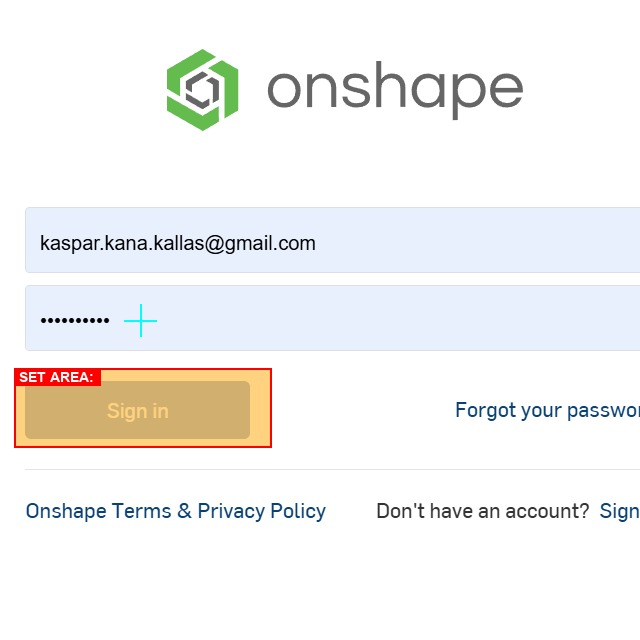

In [31]:
# comment: Automated step generated with pyPeriscope V2 
payload = '''gASV5pcAAAAAAAB9lCiMBGFyZWGUWJwIAABpVkJPUncwS0dnb0FBQUFOU1VoRVVnQUFBUUVBQUFCUENBSUFBQUJrcStjQ0FBQUdPMGxFUVZSNG5PM2QyMVBUV0J3SDhKTnIweVpOUzF1a1hLMVFSQlpHaEZuM29qTytPT3ZqL2dmNzErMS80T1B1NE96c2pMcnVyTGdxUlFTRUFrVmFhRXZUOUo0MDJZYzZxTkJ1eTZSSTVYdy9qeVdYTXlYZi9NNUptaFBHdG0wQ1FESDJvaHNBY01HUUFhQWRNZ0MwUXdhQWRzZ0EwQTRaQU5vaEEwQTdaQUJvaHd3QTdaQUJvQjB5QUxSREJvQjJmT2VMeHVMYWVxS2dsMDJDbjluQkJXSVlyNXVmSEZGbUlyN3ViSytUMzQzcUpYTnhLVld1MXMyNjFaVzlBampFYzZ6YnhkMWZHUEI2em5BZWI2cWp2dERpVWtvdkdRZ0E5QTZ6YnVrbFkzRXA1WHhUN1RNUWkydmxhdDM1bmdDNnJseXR4K0thdzQyMHo4QjZvb0FLQUwzSnJGdnJpWUxEamJUUGdGNDJIZTRENFB3NFB6NDdHQS9nS2hEME1zZkhKKzRQQU8yUUFhQWRNZ0MwUXdhQWRzZ0EwQTRaQU5vaEEwQTdaQUJvaHd3QTdaQUJvQjB5QUxSREJvQjJ5QURRRGhrQTJpRURRRHVuenlOZmJnTFB6azM0STJGWkVqbUdJWlpOU2hVem5pd3ViMm1HK2VIWnVwL3ZESHM5L0hKY2U3bVJPNDgyakE4cDM5MElHSFg3OGV2RFpMWnlIcnVnSERMUWtpb0xkMmRESVovcitCT1dJWXFibjczbUM2amlueThQajJNQVh6VmtvS1dKWVNXZ2lyWk5Va2VWbFhoK0wxMGFHNUNuUnIwRGZWSTRJTjJjOEQ5L215V0VQSHl5ZDY3TjJIeGYySHp2OUpGWitCL0lRRXNoMWNVeVRGYXYvZkh2UWVPVXY1TXE3bWZLOStiNkZUZVBJbkJwSUFOdDFBenIwOFBkTUszRjU1L05hWE5pUEJEeXUyNUYrNjc0WFJ6TDFBeHJjNy9BYzJ4MFdFbG1LNy8va3lTRS9QUnRPQnlRTnZZS05jTWFINUlsa2JOc2NxVFhucTlsVTgyNit5ZkdBM05SLzJ6RXA1Zk0xM0Z0TnFMNlpKRmhTS2xhWDluVzNzVHo1L3RkWEZLNEx0UlNPbCsxYkx2ZjcvcCtPaWp3SFgxUlBrWDg0WnZnWUVEaVdJWVFJZ3JzMUtnYVZNWFRTL29WWVdyTUs0a2NJWVJsU0ZBVmIwOEZWRm5vc0cwY3h5eEUvWDVGWkJoQ0NQRzR1SnZYL05GaHBjUFY0Vk9vQXkwdGIyb0JyemdVZEY4ZjlZNFB5VnJSVEdiTDI2bFNScXUyV21WOFNQYkpRdDJ5dC9hTEs5dDVRc2g4MUQvYzd6NjlaRUFWRDQ2cXJ6WnpsWm8xSC9XUDlIdThIbUV3Nk00WGpVN2FKcnY1UXNuOCswMTJjNzh3ZlZXZHZxcUtBanNZZEcvc1llUndac2hBUzQxdXo0MHg5ZHFnN0pPRm9Db0dWWEVtNGl0V3pMZTdlbXlyeWZSbUFhL0lNc3loVm4wYVN6YytlYnljZm5BN0hQQ2VMQVg1b3ZIc1RhWnh4Sy91NUlNK2x5U3drdGhwV1RaTUt4YlgxaE02SWVUVnUxeGptTjZvS25CV3lFQWJxenY1MVowOElTUWNrSzZHNVpHUVc1YjR1UWsvenpJdjMrVk9MTXd5RENHa2JuMmM4Y1l3clpyUlpQU2NLeGpIcC94a3RtSVlsaVNjb1Y5YXJWbXBvNCtEaHdMbVFYTUE0NEZPSmJPVlp5dVpoMC9lSjdNVmptWEdCdVFPQndsTm1YVkhNME5abHQxaHJ3bmFRZ1phOGluaStOREpVYVpoV2dlNWltWFpvc0EySGV6Q1Z3ZDlvZVp1M3doY0gvV2FkWnZubUxWZC9kTS9xUjZCWlJuTHNvMFc1L0xHUmFFR2dXZkZzM1J5NE12RHY2ZTUzWU5TcFZvWGVYWitzdS9PYkNqb2N4RkN3Z0hwM3R5VnNTc2VRa2l1VUR0OWdVZ3JHalloQVZYOGNTYmtVMFNmSXQ2ZERmVXBLQmM5RFhXZ3VXUzI4bnBMbTQvMmlRSTdNYVJNZk40cE90SnJTK3U1MDJ2dHBJcWovVzZQeEVlSGxjYlYrcnBsRjhxbTgzZWx3UGxCSFdocGJWZGZmSkhhVHBXcWh0V1kyOWl5U2JGaWJ1d1ZIcjA0MEFxMTA2c2tzNVduSzVsTXZ0YTRNbFF6ckxXRVhxemdvazFQYS84K3NsOS9pMytSbGx4T0FzODI3ZytzSi9TL1ZqSVgzWnpMNlpjSEVTZXJvMFozMDNSRW5SNVRPWlpaM2RGWGQvSWVpWitQK3ZzVXNXWmFtWHlUdWdHOUFCbm9wc05jZFhMWWxpWCtWdFIvSytwdmZHamJKSEZRYXR6VGhSNkU4VUEzcFhQVko3SDBYcnJjZUlPYmJaTlN0YjY4cFQxZVRsOTAwNkFsMUlFdVMrZXFqN3J4d2xENFlsQUhnSGJJQU5BT0dRRGFJUU5BTzJRQWFJY01BTzJRQWFBZE1nQzBRd2FBZHNnQTBLNkREREJNKzJVQUxvcmo0N045QnJ4dS9LWUllcGZ6NDdOOUJpWkhGSjVEbHdsNkVjK3hreU5PWjVoc2YzRFBSSHh1RnlZd2cxN2tkbkV6RVovRGpYUjBncisvTU9EMUNLZ0cwRHQ0anZWNmhQc0xBODQzMWY1NTRtT3h1TGFlS09obGszUzhDa0QzTVl6WHpVK09LTTRyd0lmdGRaNEJnRXNKM1J1Z0hUSUF0RU1HZ0hiSUFOQU9HUURhSVFOQU8yUUFhUGNmVnlSQ1JCVGUyaVFBQUFBQVNVVk9SSzVDWUlJPZSMDWNsZWFuX3ByZXZpZXeUWGCOAABpVkJPUncwS0dnb0FBQUFOU1VoRVVnQUFBb0FBQUFLQUNBSUFBQUNEcjE1MEFBQnFqa2xFUVZSNG5PM2RkMEFUNStNRzhEY0RTTUlLSUhzS01zUzlRSERqVnR4N3I5YmF1bHF0MjU5dHJhdDExbEgzbnJWU3JhRFdqYWk0Y2FOTVVaRWROZ1JJU0g1L1hCdnpUU0FFQ0w2b3orY3ZTVzY4ZHhmdnVYZmNIVXN1bHhNQUFBRDRzTmkwQ3dBQUFQQTVRZ0FEQUFCUWdBQUdBQUNnQUFFTUFBQkFBUUlZQUFDQUFnUXdBQUFBQlFoZ0FBQUFDaERBQUFBQUZDQ0FBUUFBS0VBQUF3QUFVSUFBQmdBQW9BQUJEQUFBUUFFQ0dBQUFnQUlFTUFBQUFBVUlZQUFBQUFvUXdBQUFBQlFnZ0FFQUFDaEFBQU1BQUZDQUFBWUFBS0FBQVF3QUFFQUJBaGdBQUlBQ0JEQUFBQUFGQ0dBQUFBQUtFTUFBQUFBVUlJQUJBQUFvUUFBREFBQlFnQUFHQUFDZ0FBRU1BQUJBQVFJWUFBQ0FBZ1F3QUFBQUJRaGdBQUFBQ2hEQUFBQUFGQ0NBQVFBQUtFQUFBd0FBVUlBQUJnQUFvQUFCREFBQVFBRUNHQUFBZ0FJRU1BQUFBQVVJWUFBQUFBb1F3QUFBQUJRZ2dBRUFBQ2hBQUFNQUFGQ0FBQVlBQUtBQUFRd0FBRUFCQWhnQUFJQUNCREFBQUFBRkNHQUFBQUFLRU1BQUFBQVVJSUNocGdTL09qYi81dVRnVjhkb0Z3UUFvRFppeWVWeTJtV0FUMDFVMXJPOWtSdEZSV25NbnhZOHF3bmVNenpOR3RJdEZRQkFyWUlBQmwwU0ZhWHRqZHdZbGZWTS9TdC8yNEMrcnNNdGVGWWZ2bFFBQUxVUUFoaDBRMVNVRnA1ODVYUzhwZ1puQzU1Vkc3dUFQbldIZjdCU0FRRFVXZ2hnMElIZ1Y4YzBSNjh5eERBQUFFRUFRelZwYUhQV0RCM0RBUENaUXdCREZXblQ1bHdoZEF3RHdHY0xBUXhWVWFrMlo4M1FJZzBBbnljdTdRTEFSMGJsRmlPZDhCQ2lJUm9BUGpzSVlOQldsYnQ3TmVqck9oeDFYd0Q0UENHQW9XSTY2ZTVWNFduVzhQdm15M1M0UUFDQWp3c0NHQ3Fndys1ZVJvWGpuNW04SjRTZ2Nnd0FuekFNd29KeWlZclNWajlZck1QdVhtM0dXeW5udlFYUHFxL3JjSC9iQUYwVkFHaFp1M1p0ZEhTMDRzL1pzMmQ3ZUhoUUxBOUFiWUFhTUpSQlZKUjJPdjRZVXczVmxRcTdlNk95bnEySldLeFNES2JYR2JjcUFjQ25Cd0VNcXFpME9Xc1kzaFdlZkNVcTZ4bHVWUUtBVHd3Q0dONExUNzZ5TjNLakRoZFlZWnV6bHNPN21CcjV6YVFyaUdFQStHUWdnSUVRU3JjWVZiYXFyWWhoUE1NU0FENEJDT0RQWFEzZFlqVEJlNGFHWHR2cVBNMURWSlMySm1JeG5tRUpBQjg3QlBCbnJTYTZleldQVzlaVlZSc2R3d0R3c1VNQWY2WnE0b21TMmp6V2lnbE9uYXdPSGNNQThGRkRBSCtPMWtRczFtMTNiNFZ0emdwOTZnNzN0dzNRWWFPM0lvYm50RmlHRm1rQStJZ2dnRDlIT2t6ZktyelcxNEpueGNTd0RwL3lJU3BLeXhDbklZQUI0Q1BDcGwwQStGZ3gzYjJyMnV3b0wzMUZJbEZJU0loSUpDcHY5amt0bHZWMVJkTXhBSHltVUFPR3F2QzNEWmpnUFVQREJDRWhJY0hCd1lTUThQQndmMy8vd01CQTlXa1VWV0dkRDhNR0FLajlFTUJRT1JXMk9VZEhSNjlkdTFieHAwZ2tDZzRPRGc4UEh6OStmSm1QLzFYRXNNNXZSUDZRbUlxK1NDVEt5TWdnaE5TcFU0Y1FZbUZoWVdGaFVkUHJWVjZwYnRlb1dIaG1aaVloeE56Y25ObXVHbnFNTTdNUG82S2lNak16emMzTkNTRjE2dFNwMFhYVjNLNnJQV3RYL29WOGdCMExsWUlBQm0xVi9GZ3JrV2pmdm4zS3o5eFgrYXE4cWpDejhPK2JMMk9xd3JvZG0xMmpSQ0xSclZ1M29xS2l5dHhxUW9pRmhZV25wNmVmbjE5bHozZjc5KzluVHBxTThlUEhLNStnbWZVeWJReTZXcU0yQzlmaFdsVFdHQklTRWg0ZVh1YUtDQ0VhZmptVlhkR3RXN2ZDdzhQTDdCa3BiNk5VeWhZWUdPanY3MS9td3ZmdDI2ZjRzMDZkT3VQR2phdnMydDNkM2N0Y2VHVnA4OHRVYk84SHUvSUFGUWhnMElybVc0eTBPV1dYMXhtc3pOODJ3Tk9zNFVmUklxM05Kak9UaFllSGg0ZUhXMWhZbEhmaUxsTlVWRlNaZTB4RFZxbXZjZmJzMlpVNnQycTRoQ3B2TFV3MFZ2a01YdUVhbVozQU5LSlVKNGExMlRUbFhhZmNZTU5VSXJWWlJYbkxyOVRhUTBKQ3FybWxXdjR5bVFKWGM4ZENkU0NBb1FMTWFDa05BNHdWM2IwYWVIaDRxTlRoTkt5dTluY01oNGVINzkrL3YxS3ppRVNpL2Z2M2g0U0VWRFlVVlJheWR1MWFiY0pBTWJIMjUxYVZ2Z010aFllSFIwVkZWZTBNWHRuTllYNW1WVmlSTmo5UjlZTDE2ZE5ISjdGVTJWK0xvdGVtQ2orVktoeEV4ZW9Rd3g4ZUFoaktwVTJiYzRVblVKWEtoR0xHa0pBUVFraDVsYWVhdUZWSlYvYnYzNitoQXFvWnM4ZXFsc0ZWTzdjeVJhM3d4RnJod2kwc0xNbzcwRldMeHFybGZYQndzRWdrVW1uYTFVRDdPbjMxMTFXbUtseXJNYXJ3VTZueXVraGxmaXFnUXdoZ0tKZUdpbStGRGFHRUVBc0xpekt2cVpXckk1b3JUOHdWUUsycUI2dThXRjZCMlZqbU9vUEpxb3lNakppWUdQV1daT2JFV3Q2UXRQSXdjNm12a2Z3M0pJcFpYVVpHaGtyeG1CT3JoNGVINXRXcFZ4Q1o1YXQwRUNyR1NkMjZkVXRsUmRxc1JTRWpJME1sS3BqK1NBc0xDdzhQRHdzTGk2aW9xREkzaDFrUjA1NnZ6WXJLUzkveWpwZktHcXQ4cGNXSWpvNVczMHpsOVRJZkt2cHJxL05US2ErV3IvdzcwYkNscEhwdERGQTFMTGxjVHJzTThLRjllYm0vTnBPdGFyT2p6QURXcGtHdnpPWTd6ZWVJTXYvYmEvKzA2dStiTDZ2cFZ5U1ZXZjRLR3lxWlhqMlZjNnVGaGNXS0ZTczB6TFZ3NGNKeWI2RXVxMUdoT3F0VHJ6bHAwL3FxM3Y2aFlTM2xYYmdRalVlL3pMV1FpdmFBNXBYNisvdHJydFNxNzBDVjJ2KzRjZVBLN010WHFkT3J6S1Y1TTh0Yk5kSGlwNksrYXNXTW12ZFNkSFQwdm4zNzFIOW1zMmZQeGhqcER3TVA0b0JLaUk2T1hyaHdZWVhqWTFlc1dLRitvdG0vZjM5NU16S1gzZ3NYTHF4YVUrR0hFUjBkclY3KzJiTm5WeGhVL3Y3K3MyZlA3dE9uai9LSFRKZHdGWXJScDArZkZTdFdhRGcvbHJjNnBzMi9UREV4TWNwL2VuaDRhRk1IWWdaNXFheWxza2ZRdzhPanpGK0x5bHJVTjZmQ1M4Q1FrQkQxd3N5ZVBidkNKbVgxSGFobEw3VUs5VXVUR3ZxcHFMZU9FQzErSjRRUUR3OFA5ZFVSUXNwTVphZ0pDR0RRVm9VOXZoWVdGdVBHalZ1eFlrV1p2VmFCZ1lIcS85VlZscTk4RjBkdG8xNDI3U3NLRmhZV2ZuNStLcHNmSGg1ZTJialNjcGdNc3pxVm82Q2hOVFVxS2tyNVR6OC9QeTNMbzJqZVZLalVGakVCb00xYUFnTURWWFoxZEhTMDVuV3BKRFFUNU5vZnJ3cC9ydHBqTGpLMG5MZ0tQNVV5ZjVsYU5pTXpXNnArdTVTR3l6WFFJUVF3NkFaenhhM2hOaHZtdi9xS0ZTdDBkVjc3a05UdjNSdzNibHlsbXVuS0RNVktYWEF3MXpmYVR6eCsvSGpsVDdTdm5ucDZlbXBmS3VhdVdRWHRaeVNFcUpTd3NoTnIyQnoxS21ObE85M0pmNXRXcVZuS1ZOa2ZmS1YrS3VxSHRRb0h3dC9mWCtWL3JvWWJpRUdIRU1CUVhSVzJJaXBUeFBESDFjbDA2OVl0NVQ4OVBEeXE4TFFFOWFGRGxXcXpyVlJja2JJS1dWNnpyY3E1dmxMTmowd3RWa0g3OFR1VkhRcHVZV0doWGk4c2IyS1ZyNnFRU1dXdXNRb1VRNjRxdTJvdGZ5b3FWVlgxZmdFdHFkeVB3SXdMcThKeW9GSVF3RkF0ekdtM3NqZlZNS2VKYXQ3ZzhjR290M1pXK2J5c2Zqclc4djdVcXAzSFZScVR0VXpXRDNQbTFjbm1sTGxGNnNGYzVlTlZ0ZVJXVnVVUnhWcitWRlEydHNxclUyOHlVZW1ZZ0pxQUFJWnFxYzdwcVZKTm5SUXBQeEtTVlB1a3JEN0Vwc3FMcXBDV1ZWdVZBMUhtV0Z6ZHF0clRGdFd2ODhvc3BNcVlzcXBkdXloVXR1RkJXWjgrZmFyemxFZjFUZ1NWQ2RRdk5hcnpHRXYxWHd0YW9Xc2FBaGlnQWlvbmRPM0hLSlZKL1prazJwem0zTjNkcTdBdUxSTkxmWXVDZzRQWHJsMjdmLy8rMm5ZSzFpWktWYXB1VmR0MUN0VjVUUUx6NW9QcXJGcjV6d3AvS3RWOGlEUnpFN2J5SjdYdDZIOTY4Q0FPZ0Fyb3ZDM093OE5EK2RTV2taRlJZYTVVdWJWQVpWMGlrVWc5VHBqaFhTb0RsNVFmak15OEpFQ0hyOUNwWmlncXFPODY5WGJwNmplMGFIZ0ttR2JWWDdYbW40cktwV0dWeTZuZzZlbXA4bXVwenRLZ1FnaGdnQXJvL0lTdWdublpIMTFNNWFuTSswMFZTVXorOTNsVjFRbGo1cldHVlp1eHdsY2FxSHhTL1ZmOVZMalM4dWg4MVNvL0ZaWE9rZURnNEVvOThycENLc3NIblVNQWY0NVd0ZGxSaFZjZE1BOFRxUEtUZFQ4WjFUK3JxdFF6YWdsL2YzOVBUMC9OTDlKUlBER1k2UHFOaExxaWtoazZlZEZlMVJhaWs5MmllZFdvb1g3c0VNQ2ZJOFdyRHZaR2JvektlbGFKR1Mwc3hvOGZyK0dkcHA4ZTllY0NWbitaS2wyRHRXZFBNbmUvK1BuNWFYNlZMRU81amJyV3ZraW5KbzdYaDBUM3AxSjdmcG1mS2dUdzU4dUNaelhCZTBaNDhwV2JTVmUwZitPUThqbGF0KzFkbncrVmhzVGE5anAwNWhBSEJnYUtSS0l5Mzd1Z29qcXZ6OU01bGNadGloR2lrMVZyN3A2b2ZxY3YwSVVBL3F4VitlVzdpaGl1dWJMVkV1b2pVY3NjeDFRcEtpZE5paFVzelppcXJiKy92NGFYSUNsVTdTMVBId1dWc1U0ZlVxVWFZUHo5L1hWN0FWUnJmNW1mREFRd2FOc2l6VHdoVnZtSk9kU3JPeCtHU2oyaitnSDgwVDNpZ05sZXhRTUx5M3NaSmZNMGIrMmZlMXdUYXVLQ3FXcGprWFN5YXBXZmlrb2lxZ3pSMHY0dGpWQkw0RDVnK0pjRnorcjc1c3NtZU04bzd4M0FoSkR3OFBDMWE5ZCtiZzlxVnptSFZuLzhWRTBQcTY1cGlyZHVxRDlvUW5tVVZpMVIvVWJhS2k5QjUrM0RLZzNzS2p2L283dXdBd1R3NTBoRGo2Ky9iY0NjRnN2NnVnNHZkOTcvWGgzNCtjU3dTa0JXODZ4YUUvZkpVTUhVdDlUN2ZlaytRMWo5YVJMVkxFOTVEN3pVUmpWWEhSMGRyYkpxbFUycjJxTkdvZlpBQUgrT1ZqOVlIUHlxM0I1ZnBrVjZWWnNkR3FyQ0g4VWJmSFZGNWF4WHpSZkZxTHpXcHBwUEw2cSs2T2pvY0NXVlBZbVgrZG9sWFphdjhsUXVtS0tpb3FwVHBPcThJck9hcTFZWjVLaitVOEhESXo5MkNPRFBrYWdvN1hUOHNmazNKMnVPNFlxWEl4THQyN2V2cHA4YlRKM0t3d2kxZVJ0OGVkVGY2NkNyWjBKVldYUjA5SDRsVmFpMFZlZGxTalZCdlY1WTVkYWFDdDg2ckZsMVZxMytEdUF5ZnlvcXFieHYzNzRxNzMvbUdlQUt0YTByNFpPRUFQNThLV0s0VXJjQ3F5NUVKR0tlRzZ6bGlhWTZEWHEwcUk5dHFmSjVXVDI1cWRlQTFldjNsVjFDYld0Q1YyK0YxdnhDZXcycWY2TmRsVmV0L3A3Qk1uOHE2bTh0ckZxVm5ia09DMVpTNWFlVmdmWVF3Sjg3VVZIYW1vakZleU0zYW44cmNCa0wrYTlGV3ZOVmMwaEl5TUtGQ3hXbitJK29OMVI5bkZRVnFob2hJU0VxNStMYThFSkc5U0ZtbFEwTWxZTmVHdzZpK2l1TWRISzhxcVlLaWJoLy8zNlYwcFkzdkZrOW1LT2pvNnRRN1ZZcFpQWGZ3d2phUUFBRElZU0VKMS9SM0RGTS9uc1VwWVpYcTRwRUlxWVpVLzFNRngwZHZYRGhRZzMxQ2VibDUxVjdsL2dId0l6N1ZmNkV1ZTFWKzNONlNFaUl5dVo3ZUhoUXIvNlNzdXFMbGMwcWxWYnIyakNvbS9rNUtYOVMyZU1WSGg2dXErZk1pRVNpaFFzWGFyL3F0V3ZYcWx6VGFQNnBLTjhaeUFnT0R0WStnOHZjTTFWK2d6SlVDZ0lZL3FWVng3Q0ZSV0JnNElvVkt6UmNIYXZjcXNUODk5Wjg3dXZUcDgrS0ZTdHErUzJNL3Y3K1paN1RLenpUTVpPcG44MXJ6emxPZlJUVjJyVnJ0YW44bFRsbExYazhpL3BEcXJVL1hzeDFwQTRMbytXcW1ldFU5VDJ2K1ozRUZoWVc2bGV1V3Q2cVVPWWFxL2tHWmRBZUhzUUIvNE9KNFp0SlYvcTZEdmUzRFNoekd1WS92SWJYdGl1ZVRlanA2YW01VWRyZjM3ODJOTU5xeWMvUFQyVUl0R0pMbVhPV1lyZ1dzMXMwUEZGNTl1elp0ZWNjcC80NlFpWXcvUDM5L2Z6ODFGK0l5M1RrUjBkSHExOVYxSjZtUzJaNDlzS0ZDNVUvVlA1bEttK2E0bmlwMzhmczRlRlJwMDZkS294STh2RHc4UFQwVk93aWxWVVRwYlo2Wm1lV053UmRtd2Q4bHZkQ3llRGdZR2FaeW0rVDFIRDRtR0ovUlA4bFAzWUlZQ2lEcUNodGIrVEc4T1FyR3A3TFVlSExjeXA4SmtQdE9WbHJpVG1ucXc4UXJleTQ2RnFWdmd4L2YvL016RXlWclZCK0N5SDU3NGxnR2xveXlxeUtVY1IwbXFpM3ZpaS9ZTEhDSmN5ZVBidkt0V0UvUHorVi93WGFyNXFoL1UvRjM5Ky9UcDA2YTlldVZmbWNXWmVXYS9UdzhLaFZSL0NUaHlab0tGZFUxck1LN2hqK3IwVzY5clNtMWpSbWs2dTh2Y3dKdmJhbEw4UFB6Nis4N1ZMVW1UU2tyNGVIQjkySFVKYUoyZUZWZnA5Z05iZW9PcitXS3Z4VW1BSlhlUkFjMHZmRFF3MFlORkcwU0xleEMraFR0K3pIWXlsZXpLRE5xNEtaZHJrYUtPbUhVNm50VmRhblQ1L2EzTTlkNWUxaVpxd05BOHJLeENSWlpWL2VwYXVEeGV3Y2MzUHpTdDB1WCtXMUt6YTJVczlVOGZEd0dEOStmRzBZdnY2NVFRQkR4YlRzR05iOHFtQm1BZzFYOUtLaXRQRGtLK1hGZkcyajZBaVBpWW5SM0w1WG0xK1hxNDdaTHVZSkVoa1pHUnFTbU9sQS9jQW5idlVPYVMzbllxNHRLbnk3WWcwZExLYS81c09zWFhsak5mODRtZFV4ZmVIVldTTlVHVXN1bDlNdUEzeG9YMTd1WCtWNUxYaFdjMW9zMC95VVN2WGFodVlyZWlaNlQ4Y2Y4elJyK0gzelpjcGZCYjg2cHVWN0VyOXZ2c3pUcktFMlU5WUVrVWpFM04rc2VJR3J1Ym01WXRoTDFSYW8vQ2V0VXlUVCtNeThEaWd6TTVQWnFDcWtZQzNaSElieXdWSzhzRWg1REYzVlJFZEhLM2ZCbHRlaXE5aWx1dnFwYUtib3RsY2N4T3B2S2VnS2FzQlFPYUtpdE5VUEZyZXhDL0MzRFNnemhoVVg0TXhncFFvN2xzS1RyK3lOM0ZoajVmMUF5bnRRVVhVV3FNT2xWUmx6cHE1K050U1N6V0hvL0dCVmR1MDYyYVdWV2gxUmUrUVoxQVlJWUtnMExUdUd4NDBicC9sK0JtYXNkWFVlaEFrQThQRkNBSCtPTEhoVzFYbndKRU9iam1FTjh6SnR6dFVzZzRJRno0cGkrek1BUUJVZ2dEOUhjMW9zMDFYK01iWFkwL0hISm5qUDBESUN0ZS9XMVlZRnowcERSUndBb05aQ0FIK09tRGYrK3RzRzZEYUdOWFFNSzArbXd6Ym52cTdERWIwQThKRkNBSCsrRkRHc2sxRFUzREdzOHpablQ3T0dHcDdTQlFCUSt5R0FQM2NXUEt2dm0vL2JJcTNEam1IbEdOWjVtN1AyemQwQUFMVVdBaGdJSWNUZk5zRFRyS0VPVzZTWkdKN2dQU1A0MVRHME9RTUFxRU1Bdzc5cW9tTjRUY1RpNmkrSGdUWm5BUGpFSUlEaGYraTJZN2l5TXNSbHRJR2p6UmtBUGtrSVlDaURianVHcThORDJCQnR6Z0R3U1VJQVE3bDAyekZjTmFqNEFzQ25DaTlqZ0lycC9DYWk4bGp3ckZhMTJWSFRhd0dvQ2JYcWhSUHdVVUFBZzdZK3dLT2IxZCtHQkFEd3FVSUFRK1hVWE1jd2JqRUNnTThLQWhncURZKzFBZ0NvUGdRd1ZKRk9ZaGkzR0FIQVp3c0JETlZTNVk1aHZNVUlBRDV6Q0dEUWdjcDJES083RndBQUFReTZvV1dMTk5xY0FRQVlDR0RRSlEweGpEWm5BQUJsQ0dEUVBmV09ZYlE1QXdDb1FBQkRUV0dxd25YNFZyakZDQUJBSFFJWWFwQ29LQTNSQ3dCUUpnUXdBQUFBQld6YUJRQUFBUGdjSVlBQkFBQW9RQUFEQUFCUWdBQUdBQUNnQUFFTUFBQkFBUUlZQUFDQUFnUXdBQUFBQlFoZ0FBQUFDaERBQUFBQUZDQ0FBUUFBS0VBQUF3QUFVSUFBQmdBQW9BQUJEQUFBUUFFQ0dBQUFnQUlFTUFBQUFBVUlZQUFBQUFvUXdBQUFBQlFnZ0FFQUFDaEFBQU1BQUZDQUFBWUFBS0FBQVF3QUFFQUJBaGdBQUlBQ0JEQUFBQUFGQ0dBQUFBQUtFTUFBQUFBVUlJQUJBQUFvUUFBREFBQlFnQUFHQUFDZ0FBRU1BQUJBQVFJWUFBQ0FBZ1F3QUFBQUJRaGdBQUFBQ2hEQUFBQUFGQ0NBQVFBQUtFQUFBd0FBVUlBQUJnQUFvQUFCREFBQVFBRUNHQUFBZ0FJRU1BQUFBQVVJWUFBQUFBb1F3QUFBQUJRZ2dBRUFBQ2hBQUFNQUFGQ0FBQVlBQUtBQUFRd0FBRUFCQWhnQUFJQUNCREFBQUFBRkNHQUFBQUFLRU1BQUFBQVVJSUFCQUFBb1FBQURBQUJRZ0FBR0FBQ2dBQUVNQUFCQUFRSVlBQUNBQWdRd0FBQUFCUWhnQUFBQUNoREFBQUFBRkNDQUFRQUFLRUFBQXdBQVVJQUFCZ0FBb0FBQkRBQUFRQUVDR0FBQWdBSUVNQUFBQUFVSVlBQUFBQW9Rd0FBQUFCUWdnQUVBQUNoQUFBTUFBRkNBQUFZQUFLQUFBUXdBQUVBQkFoZ0FBSUFDQkRBQUFBQUZDR0FBQUFBS0VNQUFBQUFVSUlBQkFBQW80T3A4aVpsWjJma0ZCVkpwcWM2WERBQUE4TWxneWVWeUhTNHVLU1dWemRGajZ4bkpXWG82WEN3QUFNQW5ScGMxNE15c2JEWkhqNlZ2cHN0SUJ3QUErQlRwc2c4NHY2Q0FyV2Vrd3dVQ0FBQjhxblFad0ZKcEtWcWVBUUFBdElGUjBBQUFBQlFnZ0FFQUFDaEFBQU1BQUZDQUFBWUFBS0FBQVF3QUFFQUJBaGdBQUlBQ0JEQUFBQUFGQ0dBQUFBQUtFTUFBQUFBVUlJQUJBQUFvUUFBREFBQlFnQUFHQUFDZ0FBRU1BQUJBQVFJWUFBQ0FBZ1F3QUFBQUJRaGdBQUFBQ2hEQUFBQUFGQ0NBQVFBQUtFQUFBd0FBVUlBQUJnQUFvQUFCREFBQVFBRUNHQUFBZ0FJRU1BQUFBQVUwQTNqR2xQRjFiWTJlUEhwQXNRelY4ZVRSZzdxMlJqT21qS2Rka1BlcVdTUm05czBiZm1IK25ERmxmSXVHTHFrcHlUb3IzMzhrRXNtRmY0Sy9HRHZFMDhYQ1JzaTJFYklkTFExNmRmSGJ1ZTIzdkx4Y25hK3VDZ29LOGdmMDdxVFkvQXYvQk5zSTJSZitDYVpkTGdENGRLQUdEQi9hclp2WDJ2bDRqeDNlNy83ZFczMzdEOW15NCtDdS9jZG56RnBRV2xyNmYvTy84M2ExUEhwb1QybHBLZTFpQWdEVUxDN3RBc0JuUkM2WEh6KzYvN3RwWHpSdTJ1TEtvYUQ2M28xWUxCYnpWV0Mvd1hNVy9KaWNsTGhvN3N4WjA3L01GR1Y4TTJPTzR0c1B6OURRNk9TWnE3VFdEZ0NmQTlTQTRjTUpDNzMwM2JRdmhvK2FjT3BzcUhlRHh1cjVhbXZuc0hQLzhRWC90MnpsejR2UjNnc0FuN1phRk1EMzdvUjdPcHY3dC9COEZSOUxDSkhMNWJmRHcvcjFhTzlvYWNCMEUzWm8zU2prZEpCY0xtZW1MeW9TNzk2K3FhbVhRNW5mTXYyWDRUZEMrL1hzWUNOazI1bHpSdzBOakl1TlZsNWpjbExpN0JtVEZkMlFEZDF0bHYyNG9MQ3dnUG4yd2ovQmRXMk56cDA1eFN5aFErdEdjVEZSR3NwZlZDU2VOZjFMR3lGNzQ3cVZUQXRxWGw3dXp6L01WNVRRMWM1NDlvekphYWtwelBSTWgrdTVNNmRPbmpqS1RPTm9hZkIvODc5VDdnUXRMUzA5ZmZKNEovOG1kdVpjWml2NjltaDM5L1pOTFhkcFpZdWtXWVh6UnIrTUhEVTBrQ21xK3JjWjZXbExGc3pxM0szWGl0VWJlVHkrUkNMNTQ4ZytabWs5QW55ZlBubDRZTzkyR3lINzJwVUxrNy81dGxPWEhyK3RYWm1ibTZPWS9lbVRoNzI3K2pNN1lmS0U0UThmM0czUjBFWFIyejFqeXZnQnZUczllZlJBVVlCK1BUdkV4VVpuWjJYTy9lNXI1aWZVSThBMzh2a1RMVGRIcFErNFFzeVJhdE9xZnBrL05tWmpXemFxeTZ5cmQxZi8yK0ZoaXQ4cTgwdTdkZlBhc2g4WGVEcWIyd2paVGIwYy92N3JENmxVZW1qL1RxYUVEZXBaSHoyMFJ6RUxBSHdDYWtzVDlNTUhkMGNQRFJTYW1lOC9jcXF1YXoxQ3lPRUR1NzZmK1pXYnUrZlBLOWZYc2JSNkdISC93SjV0azhjUE94cDBya09ucmxLcDlJZUZzL2Z2MlRaaytKak9YWHRtcEtkdDNienVpN0ZETm04L01IallhR2FaeVVtSm80WUV1dFh6V0xkcDUrdUVWNzl2WE4ycmMrc1R3WmNiTlc1R0NJbUplakdvYitlODNOd0pYM3pUdktWUFJucmEzbDFiTjIvNHBiaW9hT25LZFV6bHJLaElQR1BLZVArMkhUZHUzWnVjOU03ZTBhbTg4a3Nra3NYenZqMXljUGYzODMvNGV2cjNIQTRuSXoxdHhLQ2V6NTg5SGpGNllyc09BWVdGQlNmK09IejR3SzYwdEpTZCsvN2c4ZmpNak90WEwzLzlLbTdLdEZsT3puV1BIejJ3Yzl0dkNRbHh6QVJ5dWZ6bkpmTzJiVm5uNjlkdXpXL2JCUUxERzJGWC96aXliL3lvQVNmUFhQWDBhcUI1bDFhNVNHV3FjTjZuVHg0Tzd0UFp5TmhrNllwMWRTeXRMbDg4ZC9qQXJ1ZlBIaDg5Y2RiTTNJSVFjaWI0cjlUVTVPMTdqekxwdStEN2FZZjI3L1J2Mi9HcmFkOWQvT2ZNNEw1ZG5GMWNoV2Jtams0dVBCNS93aGZmakJ2UjcxSEV2ZllkdXhCQ0x2d1RQR25NWUI2UFAyL1JVbXNiMisxYk5nd01EQ2d1TGxJdVlYeGM5T2hoZmVwN045cTBiWC80ald1SEQrd2FPNklmbjhjM0ZacHQyTExud2YwNyszYjkvdldrVVVIQmwrdFlXbFZuVjVTNXE1bk5hZGlvNmJwTk81T1QzbTNlOE91QTNoMkRUbDkyOTZ5dnZMR3o1aTR1TENqWXVubmR3TUNBWmFzMlRQaHlLdk5MazBoSzVzNzZwckNnWU02Q0g2V2wwcldybGs2Yk11NzRzWVBQbnp5YTl1MWNRc2pHOWF0bXo1aHNaKy9Zb1ZQWFNwVU5BR3F0V2hIQU1WRXZwa3dhYVdoa3ZQdmdDWGZQK29TUXZMemM4K2VDUGIwYW5EaDl5ZExLbWhBUzJHOXdRSmZ1d3daMC8vdXY0eDA2ZFUxUFM3bHdMbmpna0pFYnQrNWpUbUdkdS9VYTJyL2JqYkNyL1FZTTFkUFhKNFRJWkxLV1BuNjdENTR3TVRFbGhBUjA2VDY0WDljdHY2M2V2UDBBbDh1OWRQRnNmbDdlN29NbkFycjBZSXJSYitDd29mMjdYZmduZU1hcytjeEs1WEo1U3g4L0pqTTBsRjhpa2Z5MmRzWGhBN3UrbmpaNzV1eUZlbnA2aEpBSDkyL0h4VVl2VzdWaDR1UnB6R1JEaG8rZFBIN1k5V3VYNDJLakd6UnN3bno0K2xYY3NiLythZGJDaHhEU3UrL0FDYU1HM3JzVC92WjFncnRuL1pUa2R6ZkNyZ1IwN2JubjRBbW1BUDBIRFcvbDZ6ZnptNGxYTDUvWEhNRFZLVktaS3B6M3lzVnp4Y1hGZjV6OHMybnpWc3pPZEhCMFBueGdWMnhNVkN0Zi80S0MvRk5CZjNRTTZGYlAzWXNRc212N3hzTUhkaTFjc256cXpMa2NEdWVMcjJaOFAvT3JQNDdzYTlLc3BaVzFEU0drVWVObWR2YU9UeDQ5YU4reFMyNXV6b1kxSyt6c0hVK2N2dVRvNU1MOEdDYU5HWHo5Mm1YbEVxYW1KRStjUE8zbmxlczVIRTYvZ2NOeXNyTkNUZ2YxNlQvazk1Mkg5UFQwQmcwZFpXeHNzbkhkeXNqblQ5cDM3RktkWGFIdStyWExody9zR2paeS9KcmZ0ak83dW0zN1RvUDdkZDJ6Ni9jVnYyNDhjenJvMFA2ZG84ZDl1WExOWnViYkFZTkhqQnpTZTgwdlM5dTA3OFFjUjZsVXltS3h6bDIreld5K3BhWDExTWxqbmoxNWVPcnNOZVo2dEZIVDVvTUNBeTc4RTRJQUJ2aGswRytDZnZQNjFiaVIvZlB5Y3ZjZUNtcllxQ256b2JHeHljRmpwNi9kZnNvRUlhT2V1NWUxaloxVUlsRjhrdkFxTGlYNUhmUHZ1cTcxN2oySjM3QmxONU8raEJBdWwvdjlnaCtZOUNXRXRHamwxNzFIbjlBckYxN0Z4UkJDdnA0Mk96NHBUNUcraEJBemM0djYzbzJrVXFsTUpsTjgyTnEvbmViMGxSUDVqdC9Yci8xbDZkZ0pYeTM4WVFWemhpV0VkTy9aTno0cFQzRitKNFRvNmVtMWFPVmJXbHBhS3BVcVBtelhvWE9qSnMyWmYvTjQvTmIrN1lxTGlzVGlRa0tJclozRHBlc1JSLzQ4bzF5QSt0Nk4rSHlCOGs3UWVaSEtwTTI4eGNWRlQ1ODhaTnE2V1N6V3ZFVkxuMFFsdGZMMUo0UWtKYjZOZXZsOHdPRGhYQzczemV0WE83WnNhTktzNVpqeGt6a2NEck9vM24wSEVFTGM2bm1ZbUFvSklRSkRRenQ3eC9pNFdFTElvNGg3RHgvYzdUOW9PSk8raEJBVEU5T3ZwODlXNlVMbWNybjlCZzVsRnNqbGNwczJiMGtJNlQ5b21HTHpHemR0THBmTGk0ckUxZHdWNmtMK0R1THgrSk1tVDFXc3EySGpacTM5MnNYRlJLV2xwdno1eHlFcmE1dnAzODFUZkd0UngzTHkxek16UlJsWEw1OVhMS1JuNy81TStoSkMzRDI4K0h4Qm0zYWRYT3E2TVo4NE9ibFlXbHJuNWVRUUFQaFVVSzRCRnhXSlozdzlvYkN3b0VPbnJ2VTh2RlMrbGN2bG9vejBaMDhmSmNUSGh0OE1DNzhSbXBHZXhueGxhV1hUcldlZi9YdTJOZk4yY25QM0hEcDhUR0Mvd2E1dTdzb25aV3NiT3hjWE44V2Z6RWs1NUhUUTJ6Y0pURDJiRUZKUWtCLzlNakkrTHViZTNWdTNibHlMZXZuYzN1Ri8ycGtkSEowMWIwTEkzMEZCeHcreldLeUFyajBVWjFpRjRxS2lWNjlpWDBZK2UvTDQ0YTJiMXg0L3ZHOWd3Rk9ld05yV2pzdDlmeFE0SEU1UmtUZzdPMHZ4U1dscGFWcHE4dE1uRDJPaVh0eTdjeXNzOUJJVHp6VlhKQTAwekJ2UXRlZnZHOWZNK1hiS3dqblRlL1VaT0dqb3lMYnRBd1FDUStiYnQyOFNTb3FMYlczdENTSDM3b1FuSjcrYi90MDhwbW1hWVdWbHcrUHhQYjI4bVNNb2w4dGxwYVhNNVZmazh5ZHl1YnhGSzEvbGtqZzZPcHNLelpRLzBkUFQ1Ly92cFJLUHg3ZTNkMVNhUUplN1FxR2dJUDlWZkt5NVJSMXJHenZGaDRhR1JuLytmWkVRa3A2V0dodjlzbTdkZWhaMUxKWG5ZaUkyOHVuN1BtbGpZMk9WSlN2MkJpR0V6ZWF3T1p6S2xnMEFhalBLTldDNVhLNm5wOWU4cGUrMXF4Y1A3TjJ1L0ZWY2JIVFB6cTBidXRzTUg5aGovdmZUSXU3ZjZkNnpyNm1wa1BtV3krVXUrK1czVGR2MnU3bDd4c1ZFcmZ4NWNadVdYbjdOUFc3ZHZLWllnb09EazZHUmtmcEtwYVZTUWtoaFljR2llVFBkN0UxNmRtNDlkZktZNDBmMmUzazNiTktzcGNyRXhpWW1tamRCTEM1czJyeVZzYkhKenovTVQwNUtWSHd1a1VoKzM3aTZucU5wUjcvR1V5YU4zTGwxZzFCbzFyRnpkNVhaYlczdFZENVIxTklJSWJkdVhtdlQwcXVadDlQWTRmMSsvbUgrcS9qWXZnT0dLZ2QyVFJTcFRCWE8yNmh4cy9PaDk0YU5IRThJK2Z1dlA4WU83K2RxWjd4bzNreG1VSnU0U0d3cU5HTWk2dWIxVUM2WDI2QnhVK1hsdjN2M3RxaEl6SFRQRTBKRUdlbXZYc1hhT3pnU1FzcXM3cHVZQ2cwTi8rZmdxa1FnSVlURllySFpaZi9DcTdNcktrVW1rMG1sVWphSFUrRXRWUjVlM2lxZmNKQzRBSjgweWdITTVYSi8yN3AzOTRFLzYzbDRiVnIvUzlUTDU4em5HZWxwRTBjUGV2TG93YkpWRzU3RnBDUm5sZDUvK21yR3JQa0d2UGNWRkQwOXZTSER4OXk4OXlMNlRkYUJZMzhIZE9tUjhDcnVteTlHdjNuOWlwa2dNZkZOUVg2Kzh1cEtTMHRaTEJZenZtbmwwc1c3dDIvcU8yQm8rSU9vdCtuRjhVbDVXM1ljZEt5b3ZxdXVZMEMzRTZjdmZUdG5VV3oweTk4M3JsV01VejF5Y1BmU0pmT2FOR3Q1K2NiRDF5bUZiOU9MandhZFV3U01OcUplUHA4MGRraFdwbWo3bnFOUnJ6TlRzbVhYYmo4ZE1XWUNsU0pwTTY5TFhiZmZmdCtUa0ZKNC9jN3plWXVXV3RTeDNMMTkwKzhiMXhCQ2lzUml4V1JTaVVTOXRocCs0eG96QW92NTgvS0ZzOFZGUlQ2dDJ4QkN1R28xVjBKSVVaRllJaW5ScHVSVjNoeWRZTFBaWEM1WFZscUtBY3dBb0lKeUFPdnA2ZHZaT2RqYU9YdzdlMkdtS0dQTnFxVVNpWVFRRXZuOFNYUlVaUDlCd3lkOU5iMk9wUlZUZTBoSlNjb1VaVEF6aG9WZThuU3hZQ3JOSmlhbTNYcjBPZnpubVdFangyZG5aMlZuWlRMVFpJb3lVbE9TRk91U1NxVlBIeiswdExKMmRuSE55aFJkQzcxb2Eydi8wL0kxcm03dVRPTmtRWDdlMjdldks3c0pWbFkyQW9IaDhKSGptelp2dFcvUDFydTNieEJDaW91S0x2d1R3dVB4bDYzYTBLQmhFK2E2UVNxVmFyNlJTY1dkV3pjeVJSbmZ6UGkrMzhCaGlxcC80cHZYMG9vNktYVmVwQXJuTFN3c21EeGhlTmYyTFRKRkdSd094OTJ6L25kekZoODljWmJQRjd4SmVFVUlNVFl4VVJ3T1kxTlR1Vnl1M05IK0tqNDI1TzhUemk2dVRDZm8yemNKMjMvZjBMdnZJR2JFRm5QSDhJTjdkNVNMRkJjYm5aNldxdDJPclBUbVZJcEFZT2prWEZmbHh5YVh5NmRQR2RlaGRhUE16SXg2SGw1UlVaSEo3eEtWNTRxSmZpa1dGM28zYWx5MVRRQ0FUd0Q5UVZpTXdINkR1dllJRFBuN3hObmd2d2doQmp3ZWg4TVJGeFlxd3Fhd3NHRFQrbCtrVW1saFlZRlVLbldwNnliZ0M0S09IMUhjS2lxVlNuTnpzZzE0UEQ1ZndId2lGaGNlMkx0RDhsOEQ1dTN3c1BQL0JIZnAxdHZld1luRDRmRDVnaEpKaWZpL21wbGNMajk1NHVqamgvY2xraEpGQzdEMnpNd3RGdnpmc2xLcGRNWFN4Ym01T1J3dWw4L2pTNldTZ29MM1ZmRFF5K2ZQL3hNc2taU0l0VnMrMDhTYW01dXJxRHdsSnlVeUZjcTh2THdQV2FRSzV4VUlERDA4Nno5NytraDVaSEplWHE1RVVtSnNha29JWWZaNVRQUkxRa2o3anAyTGlzVG56d1V6MjVXYm16UDN1NjlUVTVJZEhaME5qWXlUa3hLbmZUV093K0hNbXJ1WWFXeHYycnhWc3hZK3A0S092WDJUd0N3NU56ZG42NmExVmE1VDZ1VG9LTEJZckg0RGh4WVZpWlYvYkFtdjRzSkNMOW5aT3ppN3VBNFpOam83SzNQNzd4c1UzNG95MG5kcy9jM1VWTmd4b0Z2Vk5nRUFQZ0cxSllCNVBQNmMrVC93ZVB6VnEzNUtUa3BzMktocEs5ODI1ODZjbWo1bDNLbWdZNyt0WGRIT3AwSGtzeWZXTnJZaVVVWnhjWkdqazhzWFU2YmZ1WFY5WU85T1J3N3VEanArZVBUUXdITm5UZzBaTmtaNU1OZmhBN3RHRHcwTU9uNTQwYnlaSXdiMWRIUjBaazdycGtLelB2MEdpVExTSjR3YWVPVGc3aU1IZHcvcTAzbkpvdG5lRFJybjVlYm1LSTJCVXNZOE9tTkE3MDdLSjI2Rk51MDZEUjgxNGM2dDY0Y1A3T0p5dVFPR2pDZ3RMZjM2aTFHN3RtME1Pbjc0aTNGRHg0N28xN0JSVTZsVVd0N3lWZmkxYVYvWHRkN1dUV3NXelpzWjh2ZUpuMytZMzk2M1lZbWtoTThYS0twVHpFc0N5bnY3Z3E2S3BNMjh3MGVOcit0YWI5cFhZNW5TcmwrOWJQeklBU2Ftd3JFVEpoTkNISjFjUEx5OC96bDdXaUtSdEcwZjBLRlQxL1dybDgzNGV2eTJMZXM2K1RjUlphVHI2ZXRmdm5odS9LZ0JQazNjM3I1SjJMSHZEOFh3TnhNVDA1bXpGN3g5a3hEUXB1bjYxY3VPSE53OXNIZW5HMkZYdE5tSFZkNGN6V1pNR2EvOGJvWjJIVHFQR3Z2Rm9mMDdtUi9iK3RYTHVuVm9XU1FXejEzNEU0L0g3OTEzME9oeFh4N2F2M1BZZ081SER1N2V0VzFqdDQ2dEhqKzgvKzJjUlJYZXpBMEFuN0RhRXNDRWtFWk5taytaTm92cHRoUUlETGZ2T2RwM3dORFRKNDlQbVRSeTc4N2Z2NWsrTyt6T3MxWSsvZ254c2FLTWRCYUxOV1hhN0syN0RtZG5aODJhL3VYVXlXTVNFOS9zMkh2c3grVnJGS05kN0IyY2dvSXZGeFVWVFowODVzQ2ViVU5IakR0MTlwcml0UDdWMUZrL0xGdWRrdnh1MXZRdjU4MzZwcTVydlRzUFk2Yk9uQ01XRjhiSHhWU2gvRnd1ZC9wMzg2eHRiSm5PN0Y2QkE3YnRQc0ptc1JmUC8zYjZsSEZpY1dGbytKTWZsNi9oY3JsUEhrVm9zMEE3ZThkRHgwTmErYmJaczJQekYrT0cvblAyNzdVYmQ1dytGK2JoNVIwYkc2WDhsS2dQVUtRSzUzVndkQTRLdnR5Nzc2QURlN1o5TVc3b3VsOS83anRnNk9YckVVekdtSmlZRGhzNTdsekl5ZlBuVGhzYUdtM2F0ci92Z0tGQnh3K3Yrdm4vSmsyZSt1ZmZGM3YzR1NnV0YxNjdjbUg4cEcrdTNYNnF1Q0dOMGIxbjMxTm5yM2w0ZWYreWZNbjNNNzl5cmVleDUxQVFueSt3dFhmUVprOVdZWE1xUlU5UDc1ZDF2Mi9kZFRndU5ucnE1REdyVi83bzQ5ZjI3T1hiek8zZGVucDZLOWRzWHZIcnhqZXZYODJhL3VXU2hiUHNIUnhQblEyZE1uVVd4WWRkQXdCMUxCMk9EWWxQZUdObzVsanhkQi9FakNuamI5NElQWHZwbHJXTkxlMnlBQ0dFRkJUa1R4dzk2RkhFdlVQSFE1aWJnelc0ZHlkODlOQkFINysyNVQyWDZzN3RHNE1DQXhiL3RHcksxRmsxVTE0QWdKcFZpMnJBOEdsaktyNWUzbzM2OVd6LzArSTVXWm1pTWlmTHloUXRuRHVqVC9lMnpWcjRiTnE2ajhmalAzLzJ1SW1YL2NxZkZ5c3VGdVZ5ZWNpcElCYWIzYktWM3dmY0FnQUFYYW9WajZLRXo0U1Z0YzNSb0xNcmx5N2UvdnY2clp2WHVybDcrcmZwMEt4Rkt4TVQwOXpjbkljUDd0MjlmVFBxNVhNOVBiMy8rMm5WcEsrbU0zVmZsN3B1WHZVYi9yWjJSVnhzZE0vZS9ZcUxpMDc4Y1RqOFJ1am9jVitxMzdjTkFQQ3hRQk0wVUpDVktUcDM1dFRKRThlZVBJNVFESG95RlpvMWJ0SjgyTWh4dmZvTVVEeENpNUdYbDd0aHpZby9qdXhqSG9YbTV1NDViK0ZQdmZzT3dxTXFBT0RqOWNrR01BQUFRRzJHUG1BQUFBQUtFTUFBQUFBVUlJQUJBQUFvUUFBREFBQlFnQUFHQUFDZ0FBRU1BQUJBQVFJWUFBQ0FBZ1F3QUFBQUJRaGdBQUFBQ2hEQUFBQUFGQ0NBQVFBQUtFQUFBd0FBVUlBQUJnQUFvQUFCREFBQVFJRXVBNWpMNWJEa0VoMHVFQUFBNEZPbHl3QTJNalNVU2ZKMXVFQUFBSUJQbFM0RDJOeE1LQ3VWeUV1eVVBOEdBQURRakNXWHkzVzd4TXlzN1B5Q0FxbTBWTGVMQlFBQStKVG9Qb0FCQUFDZ1FoZ0ZEUUFBUUFFQ0dBQUFnQUlFTUFBQUFBVUlZQUFBQUFvUXdBQUFBQlFnZ0FFQUFDaEFBQU1BQUZDQUFBWUFBS0FBQVF3QUFFQUJBaGdBQUlBQ0JEQUFBQUFGWEowdkVTOWpBQUFBcUpDT1g4YVFsSkxLNXVpeDlZemtMRDBkTGhZQUFPQVRvOHNhY0daV05wdWp4OUkzdy91VkFBQUFOTk5sSDNCK1FRRmJ6MGlIQ3dRQUFQaFU2VEtBcGRKU3REd0RBQUJvQTZPZ0FRQUFLRUFBQXdBQVVJQUFCZ0FBb0FBQkRBQUFRQUVDR0FBQWdBSUVNQUFBQUFVSVlBQUFBQW9Rd0FBQUFCUWdnQUVBQUNoQUFBTUFBRkNBQUFZQUFLQUFBUXdBQUVBQkFoZ0FBSUFDQkRBQUFBQUZDR0FBQUFBS0VNQUFBQUFVSUlBQkFBQW9RQUFEQUFCUWdBQUdBQUNnQUFFTUFBQkFBUUlZQUFDQUFnUXdBQUFBQlFoZ0FBQUFDaERBQUFBQUZDQ0FBUUFBS0VBQUF3QUFVSUFBQmdBQW9BQUJEQUFBUUFITkFFNU9TdXpYczRPTmtOMGp3RGN1TnZvVCtCQUFBRUJMTExsY3JxdGx4U2U4TVRSejFISmlxVlE2N2F1eHA0S09NWDkyNnR4OTcrRy91Rnk5ai9kREhvOWZwZDBHQUFDZkl5NnRGV2RuWlQ1NTlFRHhaM1RVaTV6c2JBNkg4L0YreUxOQkFBTUFnTGFvTlVFTHpjd2JOMjJoK05QRHM3NnBVUGhSZjFpTm5RRUFBSjhkYWdITTVYSi8rUGxYWDc5MmhKQ216VnN0KytVM0hvLy9VWDlJYTA4Q0FNREhpRm9mTUFBQXdPY010eUVCQUFCUWdBQUdBQUNnQUFFTUFBQkFBUUlZQUFDQUFnUXdBQUFBQlFoZ0FBQUFDaERBQUFBQUZDQ0FBUUFBS0VBQUF3QUFVSUFBQmdBQW9BQUJEQUFBUUFFQ0dBQUFnQUlFTUFBQUFBVUlZQUFBQUFvUXdBQUFBQlFnZ0FFQUFDaEFBQU1BQUZDQUFBWUFBS0FBQVF3QUFFQUJBaGdBQUlBQ0JEQUFBQUFGQ0dBQUFBQUtFTUFBQUFBVTZES0F1VndPU3k3UjRRSUJBQUErVmJvTVlDTkRRNWtrWDRjTEJBQUErRlRwTW9ETnpZU3lVb204SkF2MVlBQUFBTTFZY3JsY3Qwdk16TXJPTHlpUVNrdDF1MWdBQUlCUGllNERHQUFBQUNxRVVkQUFBQUFVSUlBQkFBQW9RQUFEQUFCUWdBQUdBQUNnQUFFTUFBQkFBUUlZQUFDQUFnUXdBQUFBQlFoZ0FBQUFDaERBQUFBQUZDQ0FBUUFBS0VBQUF3QUFVSUFBQmdBQW9BQUJEQUFBUUFFQ0dBQUFnQUlFTUFBQUFBVUlZQUFBQUFvUXdBQUFBQlFnZ0FFQUFDaEFBQU1BQUZDQUFBWUFBS0FBQVF3QUFFQUJBaGdBQUlBQ0JEQUFBQUFGQ0dBQUFBQUtFTUFBQUFBVUlJQUJBQUFvUUFBREFBQlFnQUFHQUFDZ0FBRU1BQUJBQWJjbUZ2bzhJU2NtTVQ5UExDVnllVTBzSDBBckxKWXhuK3Z1WU5UQXhaUjJVUUFBVkxIa09zM0l2RUxwNVloVWNYR3B0RlNtdzhVQ1ZCbVh3K1liY0RvM3R6WVcxTWpsSmdCQTFlaTRDZnB5UkdwZW9RVHBDN1dIdEZTV1Z5aTVISkZLdXlBQUFQOURsd0g4UENGSFhGeXF3d1VDNklxNHVQUjVRZzd0VWdBQXZLZkxBSTVKekVmZEYyb25hYWtzSmpHZmRpa0FBTjdUWlFEbmlhVTZYQnFBYnVIM0NRQzFpazc3Z0RIbUdXb3ovRDRCb0RiQmZjQUFBQUFVSUlBQkFBQW9RQUFEQUFCUWdBQUdBQUNnQUFFTUFBQkFBUUlZQUFDQUFnUXdBQUFBQlFoZ0FBQUFDaERBQUFBQUZDQ0FBUUFBS0VBQUF3QUFVSUFBQmdBQW9BQUJEQUFBUUFFQ0dBQUFnQUl1N1FJQUFIeHF6dDZLSEx4b2IzbmZubGcrb1plZjk0Y3NqN3JYS1ZtYmc4THNMWVZUK3JmaDZTTUk2TUIrMXcwOUxydUptOURGeHBDbnoyR3hpRXhPQ291a0NTa0Z6MTdsU0tReVpwcSsvdmJHQXU2emhKekhzZGsxVVFaWE95TWZMM05KcWZ6bTAvU1V6S0thV0FVQWZCb3ljd3NPWDNqUXRKNzlGMzFhSXdob3dYN1hBUk5EdlRZTjY5UXhOVkI4d21ZUkl6NjNZVjFUY3hQOXNNZnBpZ3dHZ00vSDZPNHRkOHdiUnJzVVVIc2hnSFhBemQ3STNFUmZMaWVwV1VXUkNibnZNZ3FkckEwOUhZMnR6WGcyNXJ6R2JzSUhVWm1Fa05QaDcycTBHUEZKK2ZGSitUVzZDZ0NncUZRbVk3TllMQmFMZGtGcWtMUlV4dVY4TG9PVFBwZnRyRkYxVEF6WUxGWldma25vbzdSM0dZV0VrRGVwQmFHUDBwSXp4ZmxpS2FxL0FGQW1VVTdCckkybkhQci9JQWlZWXgyNGVPcmFFNGxwMllwdjF4MExGUVRNT1hzck1qRXQrK3MxZjFyMFhOaG56czZDb2hKQ1NHNWgwZHd0cDYwREZ4dDNtZGQ1eHBZWHIxTVZFeXRtajA4U2pWbDZ5RHB3c1NCZ2p2UEFuLzV2NTluY3dpSkNTTDY0dU5mczdXMm0vSmFkSnc1OUdHdlZlN0VnWU02Nlk2SEtCWlBMNWJNMm5oSUV6RGwyS1VMNTh3dDNvNFRkNXMvYWVFb3VseE5DSk5MU2cvL2NielRtRitNdTgweTZ6dXM4WTh1TkovSE1WNFNRczdjaUJRRnpKdi95aC9JU1ZNbzUrWmMvN1BvdGVSaWQrT0oxNm9BRnUwMjZ6dnRtelovcU80cVpMQ0lxOFZUWTAyYmpWek5idE9INE5YR3hSREZOYW1iZTFMVW5tSjFwMG5XZTc1ZnJnMElmbDhwa0toTXdPMFI5Yjh2bDhsTmhUMXRNWEdQY1paNXhsM2t0SnE1UnpNNlVlWGZ3YmNYRVNSazVqY2I4MG1qTUwwa1pPU3FidHYxVXVEWUg5MkYwb2wyL0phZ0I2MHlKUkthY3RSS3A3UEtEVk9VSlZQcUE2d2dObXRZenN4SWFjTmlzRW9rc1BqbWZ5MkhYc3pkS3lTeTZlRCtGRU5LMXBZMk5PUy8yWFg2SlJPWnFaOGpUNThqa0pDdXY1RUYwWm1wWlhid3FmY0JONmdrYnVwam1GVXFmSnVRMGRERXhOZFJuc1VoaGNXbms2NXdYQ2JrMXV5OEFvQ0p2VXJQNno5Lzk4dlcvWjRtOHd1SzlaKzZFM0h3ZXRHSmlTeTlIeFdRSnlabUxkNXhWVEVZSXlTa29HdjNqd2NzUG9way9iejFMQ1B4K1IvdW1ic29Mdi8veTdhQ0ZlOUt6LzIwU1M4L09YM3YwNnBud3lGT3JKcG1iQ0Nvc0c0dkZHdHlweWNGLzd2MTU5VkgvOW8yWlVWcHl1ZnlmMnk4SUlUMWExMmV4V0JKcDZYY2JUKzBKZVI5THQ1NGw5SnkxZmVtWFBiOGQycUZTMWZTN2tXOVdITGlvS0cxNWdrSWZienQxa3duZDlPejhoZHRDWWhNejFzL29yOGZscEdmbjk1MjM2MmxjRWpPbHRGVDJOQzVwL0xJank3L3FQV05JZTBMSXUvU2Nmdk4zUmI1S1lTWmc5dmF0WndtblZrMXlzallqaEd3NmNYM1I5ak9Ld0g2UmtEcCsyUkZtVzlvMHJtc3M0RjJOaUJuWHk0ZXBuYjk4bmZZMk5ZdjVoMTBkVTBKSVVZbjA1dE40b1RIZng5dUphSDF3RWNBNmtKRmJiR1ZtWUNrMDhLMXZFUkdUcFUyVjE5Ukl2N1czaFptUlB2T252aDdiMDlFa083OUVmVXFoa1o2WnNUNkh6U0tFc0ZuRXdrUy9sYWQ1MkpQMDNBS0orc1RxT0J4VzgzcENBZS9mQXkwdzREU3VLNVJJWkxIdjBGZ05VTE1PbmI5LzZQeDk1VTljN1N3dS9mYU5qWVdKWEM3ZjhNZTFsNjlUaHdRMFhUNjV0NE9WTURPM2NPbmU4N3VEYi85NitQTCt4YVA0Qm5yTUxBdTNoZmcxZERuNGY2TzhYS3c1YkRZaDVNOHJqMElmeHJvN1dPNWROTEtKdTUyNFdMTHVhT2h2ZjE1VHJFVmNMRm0yNzBKbWJ1RjN3enJPSHRISjNFU1FrSnc1YjJ0dzhJMW5tMDljLytXYlBtZlhmdlV3T3JIM25CMU42OWtmWHpiZWlHOUExRFJ3dFcza1puZi94ZHU0ZHhrTjZ0b1FRdEt6ODhNZXgzazRXYlh3ZENDRVhJMklQZlRQUFhjSHk5L25ER25kd0ZrbWs1KzQrbmoyNWxPYlQxenY3bHZmMjhWYXk3MlVWMUE4Ny9mVEF6czIrV0ZpRHlkcllYbkpuWjBuUG5UKy91RWZ4blJ1NmNIczIrODMvLzNYdGNlVEFuMmJlVGc4akU2TWZKVXlkVkRieGVPN214cnlKTkxTUy9laUo2MDZHaFQ2ZUd5UFZrSmovdlhIY1pHdlV0bzNkZHMyWjZpTHJYbE9RZEdla050NUJjV1dRaU5tNFVHaGovWDFPR3VtRFJ6ZHZTV2J6WG9XbDd6bTZOWDJUZDFZTEphbm81V1hzOVhqMktTMHJEd21ic01leFJyb2M0dExwR0dQWWdOYXVCTkNra1U1VCtPU205YXpkM2UwMVA3Z29nbGFCNTdGNTZSa0ZuSFlMQTlINDhFZEhIcTF0bXZ1WVdaaFdzWnZXc0hWenREVVVLOVVKbzk5bDM4NlBPbDBlRkppZXFHcGtaNzZsT1ltK3VuWnhSZnVwNXdPVDNxYlZpaVhFMk9CbnEwRlg4dXlHZks1cFRKeTkwWG1zU3R2SHNkbGwwaGwrbnBzN1djSGdKcVFucDEvK1g2MGc1WHd4MGs5SEt5RWhCQnpFOEhDc1YwOG5hMGV4YnhMeVh6ZlJ0VzZvY3V4bjhjM2NMVmwwcGNRY2pVaXBsUW1XekMyUzNOUEJ3NmJiY1EzbURNcW9GMlQ5elhnbUxmcEQ2TGVOdmQwbURNeWdLbnZ1dGlhTDVuUTNWSm9kQ2Z5ZFU2K1ZyZEltQnJ5aG5WdWxwNmRmLzdPUythVGV5L2VSTDFPNitWWDM4TFVrQkJ5S3V4SmliUjB3ZGd1YlJyVjViRFplbHpPOEM3TmhuZHVuaXpLZlJKYmlmRXVwVExaOEM3TnQ4OGQ2bXhqcHJuZXZHeHk3eDZ0Nit0eE9YcGN6dmhlUGtNNk5jM09FeWVMY2draDdadldpL2xqMGM5ZjlqWTE1QkZDOUxpY1poNzI1c1lDVVU1QlVjbjd1a28zSHk4WFczTm02NzRiMW5ISnhPNktMQ1NFMkZxWTlHeGRYNC9MNGJEWlRkenREeTRaM2NMVGtSQWlOT2EzcXUvME5qWHI1ZXMwUWtoMm52aHFSR3lQMXZVRFducmNqWHlUTHk0bWhFUytTa25PeVBWdlhOZUliNkQ5d1VVTldBZVkxbVl2SjVPNnRvYW1obm9XSnZvV0p2b05YRXdMaXFSUmIvT2V2OHBSbjhYY1dKL05ZcVhuRk45Nm5zRjhjdk5aUnJkV051YkcraXBUNWhaSTdyd1FNZlhkbDI5eUxVd05lSHBzbnI2MlYwNFNxZXg1UWs1TVloNGg1RWxjTmpNdWpLZlBxZnJXQW9CMk5JeUNsc25rcFRLWlBwZkQxMzhmQUFLZXZwWFFLQ2tqSnp0UFRHei8vYkMzdnpjVEtnclNVaGtoeEVUcFE3NkJucFdaa2VMUFVwbXNWQ1l6NU9senVlOVBGQlltQW1PQndYK0JwTlVsZURkZlR3Y3JZY2pONTVQNnREWVJHQVRmZUM3ZzZmZjg3dzVtOVdLd1dDd21iNUl5S3RISnhXR3pCM1pzck1ldDRLUWtOT1kzZExWUlhwZUhrNVhpVDU0K055dGZQSFhkaWRDSVdPV09ZVmM3QytZZjdacTROWFczMzNBOHRGUW1HOUMrc2JPTm1mSWFoY2I4b1FGTkYyMC9NL25YNDlNR3RmUDFkakkxK3A5ZDFNdlBlOWZwVzB4OTkxV3lLQ1l4L2VzQmJaSXljamNIWFU5TXkvRnl0cm9hRWN2VDV3WTBkeWVWT2JnSVlKMTUrU2IzNVp0Y1FvaU5PYy9aeHRDaER0K1F4MjNpSnVTeVdZL2pzbFVtWnJOWWhKQlNtVnp4aVVRcUs1R1UwWGFkblM5UnREYW5aQlpKSkRLZVhpWGFMWXBMWktsWjd5OTQ4OFZTN2VjRkFPcmM3T3ZRV3JXamxWbWJSblhQM25yeDhuV3F0Wmx4Mk9PNEZwNE9USE8wRGhrYkdqRHR3TldoMHVldHp0N1M5TnFXNlJmdlJRV0ZQdTQvZjFkaVdyYWp0ZG5VUVczSDlmUmhLc0ZUQjdYcjE2N1J3ZlAzVngyOEZQMDJUU0l0YmQvVWJlbVh2ZW83V3hOQ3ZKeXRISzNObVBwdVJGUWlUMSt2cWJ1RHAxUEptcU5YSHNVazJwZ2IzM3Z4eHJ1dWpiZEw1WFlPQWxqM1VqS0xVaktMSXJqc2prMnRiTXg1VHRhR2thOXpxendXV2xvcXIzaWk4c2xrY2kxN2l3RUFsSEU1N0JGZFc1eTg5dVRQSzQ5OHZaM2ZwbWJQSE5LaHpBNWp1dVJ5K2E3VHR6SnpDK2VQN2pKclJFZW1oQ21pM0M0emYxZWVUSS9MNmVYbnpUeURyS2hFK3R2eGEzTTJuNDUvSi9ybG16NU0wN2VEbFhEQm1DNEx4blNSeStVdjM2U04rdkZnNFBjN2dsZFA5bmF4dGpJemJ1bmxlTzFSWEVKeTV0V0lHQzhuS3djclU2bFU1dTVnR1JvUjYrRm9GWk9ZUHJKckM2Rng1WHIzMEFlc0E2WkcrcTUycWxkd0Vxa3NMYnRJSnBQcjY3RXRURlFibGdIZ2M4Wm1zemhzZG9tMFZLelVRMWxjSXMzSUtURGlHMmh6SHM4dGVOK3lKUzZXcEdXOXIveHgyR3dPbTExUVZDSlZ1dTdQemk4cUxKWlltQnJ5OU1zWWExSWVuL3BPVGR6dEw5Nk4yaFY4eTl4RTBMYUpxK0lyWmp5d2NqRUlJY3h0T1haMVRCU2ZGQmFWTUkzVlREbkRIc1ZwdjNabDJYbmlaL0VwaWovbGNubjBtelRtM3dWRkpXOVNzeHlzVENjRStpcXVEOFFsa2hKcHFmSVNGTVVnaFBEMHVkMThQSTBORFo3Rkp6TjNkcFhLWklvYnFGZ3NWbjFuNjVaZWpzbWkzSVJrRWJPeDNYMjlVa1M1ZjE5L0ZoR2Q2T1B0eEJ5bVZ2V2RJcUlUejk5OVdTZ3U2ZWJqeGN5dS9jRkZBRmRYS3kvelFEL2JWbDdtSG83R0tsK1pDUFRZYkpaTUpwZVVVNHRseGpZejlMaHMvY3EwTFFQQXg4dmN4TEM1cDBOaVd2YjhyU0VKeVptRWtNemN3cC8zWFhpUmtOclUzZDdHM0VURHZMN2V6b1NRbFFjdVJVUWxsc3BrK2VMaTFZZXZYTDRmclpqQTJkYmMzY0V5SWlyeHh6My9aT1lXRWtJU2tqTi8ySDB1UlpUcjYrMXNhc1FqLzRYMHUvU2NGRkVlSWFTb3BPek9LYUV4djZ1UFoweGkrdlhIOGUyYXVIb3FkYnQyYXU3T1liTi8zbnYrOG9Qb1VwbE1JaTA5ZWpIaXlNVUh0aFltamV2WkUwSWNMSVVXcG9ibmJyODRkUDUrbWVXc0ZBNmIvZVB1Yy8vY2ZpR1JsaGFWU1BlRTNQbno2aU1iQ3hOWHV6cUdQSDBuYTdQRXRKeTlJWGVZSVZGcFdYbkw5bDFRM0hkYkxKRXUyMy9CWS9qeW94Y2pGQk5zRHJxZW5TZm04L1M0SE03VHVLVFdYMjRZOWRQQm1NUjBabHYrdWYzaS9KMlgrbHlPNG5xbHFidURqWVhKK21OWFV6UHoyamV0OTk5T3FCZjNMbVBESDZHTzFtYUtMbXJ0RHk2YW9LdnJiVnFoazVWQXdPTTJjemVyWTJvUTlUWlBsRk5zWTg3emNEUnh0T1FUUXJMelMwUTV4U3B6NVJSSXJNMTU1aWI2ZmczcVJMN09KWVEwcXlkVTNKVUVBSjgyTG9jOWZYRDdzRWR4d1RlZUJkOTRwdmpjVW1nMGQxUm41YUc1Nm5xMHJ1OWQxeWJ5VlVyYnIzOWpQdkd1YStQZnlPWDY0M2ptVDFORDNzeWg3U2YvOHNlT3Y4TjMvQjJ1bU5ITDJYcmE0SFpNYzZ1OXBhbXRoY216K09UR1kzOGhHc2VMRFdqZmVPZmZ0ekp6Qy91MWE2VDhqS3B1dmw1ZFdubWN2L095ejV5ZGlnODViUGFja1FIMW5hMElJZlZkckRzMXIzZmk2dU52MXZ6SlBGN0RVbWpVcDIyRFUyRlBLN2V6Q0NHRUdCc2FkRzdwTVdUeFBzV3R1aHcyZS9yZ2RwNU9saXdXYTBqbnBuOWVmYlRxMEtWVmh5NHgzL3A0T3pmemNNakpGeE5DRFBTNERldmE1dVNMSjYwOCtqL0xGQmhNSGRpT3A4OTFzakczTVRjK0ZmWlVwV3dET2pUMmErakMvTnZGMXJ5WmgvMjVXeSs4Njlvb3N0YTdybzJGcVdGaVd2YUE5bzF0TGY1TlZ1MFBMcXBjMVpXU1dmVDBWVTZKUktiUFpidlpHZlh5dFIzVHphVnJTeHRuYXdHYnpjcktLNG1JeVZhZjYwMXFnYmhJeW1HejZ0a2I5ZlczNit0dloxZUhqeEZTQUorUDVwNE8xN1pNbjlEYmw3bFR5RmhnTUtHMzc4MXRNNVVmMUZBbWUwdlRVeXNuRFFsb3lqZlE0N0RaZmcxZGp2NDAxdG5HWEhtYWZ1MGFoVzZaM3R2ZjIxaGdRQWl4RkJyTkh0RXBkTXMwNXFFVGhCQUxVOE8xMC9zM2NyUGpzTmw4QXowejQzS2Z6bUVwTkxRME0zSzBGcmFxNzZUOHVha2g3OGlQWTlmTjZPOW1YNGZEWm5NNWJMK0dMdWZXZmFWNENvY2VsL1BidHdNbjlXbk5OOURqY3RqdG03cGQydmhOU3krbmN0WlRzY245L0RkK045Q3VqaW1IelhhenI3Tjc0ZkFaUTlvejZ3cG83aDYwWXFKaWMwWjBiWDVveVdoelk0R2lIYmgvKzBZM3RzMVU3QkJqZ1VGdmYrL1FMZE9adTNoTkRYbkhsNDFYYkF1ei9IVXordSthUDF5Umx6eDlicHRHcm9TUWxwNk9pbEZqdGhhbWpkeHNPV3gyNTVZZXl2ZFFhWGx3V1lwVzcrbzdlQ0ZCVjR2NjZOUVJHbmc3bTlxWTgvUzViT1p0U09KaWFiS282SEZjZG1IUnY3R3E4aVFzdXpyOHB2WE16SXoxMlN4U0lwSEZKZWViR2VuYm1QUFVuNFNsdUZWSmZTSEt5bnNTbHZJenFQMGExRkYrMk5iblprdzNGOXBGQU5BOWNiRmt4QThISGtTOVBiTjZjdU42ZHJwZCtKOVhIazFjY1hSVXR4WmI1d3loOVJqcXliLzhFUkwrL016cXljMDhIS2dVb0lhZ0NWbzNNcktMdzdMVE5FK2o4aktHcEF4eFVvWlk4YWNlbDkydGxRMGhKSy93MzM3N01qTlN3eHNkVkY3RzhEZzJXejJrYnozUFVJNXpBUGpvM0hxV01IOXJzSU9WY1BuazNpNjI1dm5pNG5WSFF5L2ZqMjdYeE5YVjNrSlhhMkZlL1BBdVBXZnJ5WnNjTm10Z3h5YWY5a3NncUVBQTAxSGZ4YVMra3dtSHpYcjVKdS9sbTF3Qmo4djBBWmRJWmFMY01oNUlDUURBOEhTeTB1ZHlUbDU3Y3ZMYUU4V0hsa0tqcFYvMjB1RTlRdWZ2dkJ5OGFDL3o3OEEyRGRvcGpYOEdYVUVBMDVHZVhleHVMemZrY1p2V0V6YXRKMlErbE10Sllsb2g4OVFxQUlBeW1ac0lnbFpPWEgzNHlvRno5OUt6ODQwRkJ0MTh2SDc2b3FmaXFVODZ3ZVd3T1d5MnZoNW5RbTlmbFVjMmdxNmdENWlhT2tLRHhxNUNhek1ETG9jdGx4TnhTV25jdS94SHNWbTB5L1VwUXg4d0FOUWVxQUZUazVGZGZDVWl0ZUxwQUFEZ1U0VGJrQUFBQUNoQUFBTUFBRkNBQUFZQUFLQUFBUXdBQUVBQkFoZ0FBSUFDQkRBQUFBQUZDR0FBQUFBS0VNQUFBQUFVSUlBQkFBQW9RQUFEQUFCUW9OTUF4c3Vxb0RiRDd4TUFhaE5kQnJBeEgwK1dodG9MdjA4QXFGVjBHY0R1RGtaY0R0cTBvVGJpY3RqdURrYTBTd0VBOEo0dTg3S0JpeW5mZ0tQREJRTG9DdCtBMDhERmxIWXBBQURlMDNHRnRYTnphMk9CSHVyQlVIdHdPV3hqZ1Y3bjV0YTBDd0lBOEQ5WWNybGM1d3Q5bnBBVGs1aWZKNWFTR2xnNGdMWllMR00rMTkzQkNIVmZBS2lGYWlTQUFRQUFRRE8wRlFNQUFGQ0FBQVlBQUtBQUFRd0FBRUFCQWhnQUFJQUNCREFBQUFBRkNHQUFBQUFLRU1BQUFBQVVJSUFCQUFBb1FBQURBQUJRZ0FBR0FBQ2dBQUVNQUFCQUFRSVlBQUNBQWdRd0FBQUFCUWhnQUFBQUNoREFBQUFBRkNDQUFRQUFLRUFBQXdBQVVJQUFCZ0FBb0FBQkRBQUFRQUVDR0FBQWdBSUVNQUFBQUFVSVlBQUFBQW9Rd0FBQUFCUWdnQUVBQUNoQUFBTUFBRkNBQUFZQUFLQUFBUXdBQUVBQkFoZ0FBSUFDQkRBQUFBQUZYQjB1S3lrcFNZZExBd0FBK0lTeDVISTU3VElBQUFCOGR0QUVEUUFBUUFFQ0dBQUFnQUlFTUFBQUFBVUlZQUFBQUFvUXdBQUFBQlFnZ0FFQUFDaEFBQU1BQUZDQUFBWUFBS0FBQVF3QUFFQUJBaGdBQUlBQ0JEQUFBQUFGQ0dBQUFBQUtFTUFBQUFBVUlJQUJBQUFvUUFBREFBQlFnQUFHQUFDZ0FBRU1BQUJBQVFJWUFBQ0FBZ1F3QUFBQUJRaGdBQUFBQ2hEQUFBQUFGQ0NBQVFBQUtFQUFBd0FBVUlBQUJnQUFvQUFCREFBQVFBRUNHQUFBZ0FJRU1BQUFBQVVJWUFBQUFBb1F3QUFBQUJRZ2dBRUFBQ2hBQUFNQUFGQ0FBQVlBQUtDQVd4TUxsY3ZsOTErKy9mWHc1YkJIY1htRnhYd0R2UmFlanJPR2QrenE0OGxoNnl6eVUwUzVYV2IrN21SdGRuelplQ08rZ2E0V1d4MU1rZUtUUkJxbVdUYTU5NnpoSFQ5VWlhcWxWQ1k3RmZiMDE4TlhYaVNrU0V0bDlwYW1Vd2UxKzZxZlA5OUFUOE5jWmU0RVk0RkIrNlp1Uzcvc1ZkL1pXdk5LYStGaFZUaDdLM0x3b3IwcUg5cGJtZzd2MG56T3FBQVRBVS9MNWF3N0ZycDR4NWtUeXlmMDh2Tm1QbmtZbmRoN3pvNUEvd1k3NWczVFpZbHJrN0N3c0ZtelpxbDhhR3BxR2hBUU1HSENCRHM3TzkydTdzY2Zmd3dMQzl1eVpVdjkrdlVKSWVIaDRhR2hvUjA3ZHZUMzl5OXorb3lNakMrKytNTFcxbmJ0MnJVQ2dVQzNoUUhkU2twS09ucjBxSldWMWJCaHcvVDE5UldmcDZhbTd0cTE2OHFWS3prNU9RS0JvR1hMbHQ5Kys2MlRrNU9XaTgwdExGcDkrTXF4U3hIdjBuTTRiTGFMcmZuRVFOOUpmVm9yL212ci9QK3A3bXZBRW1ucG91MW5BcVp2T1JNZW1WZFlUQWdSRjB0dVBJa2Z1SERQNEVWN2N3cUtkTDVHcUFseXVYempuMkhqbHgxNUdwY2tMWlVSUXQ2bDV5emNGakpueTJtSnRMU3lTOHNyTEQ0VEh0bDJ5bStud3A3V1FHRnBlcGVlcy9ibzFZNVRONzlKemFKZGxvOVBUazdPeVpNbmh3OGZmdVhLbFJwZFVXeHM3RjkvL1JVYkcxdWphNEVQSXljbjU4eVpNK0hoNFZLcFZQRmhjbkx5OU9uVFQ1NDhtWk9UUXdncExDd01Dd3Y3NG9zdm9xS2l0Rm5tOC9oa3Z5L1hyejE2OVYxNkRpR2tWQ2FMZTVleGFQdVpyak8zMXR4L2JkM1hnTGVldkxucHhIVUJUMi9wRjcyR2QyMXVhc2pMRnhjSDMzZytiK3ZwODNkZUx0bDVkdTMwL2x6T3A5bjBiV05oOHV6UWZNV2ZUSVdwWTdONnRiQXlWNkdFbE15dEoyOFNRdWFQN2pKclJFZStnZDdsKzlGZnJ2cmo3K3RQSi9mMWExeXZndnFLcTUzRnBkKytzYkV3WWY1TXk4cGJjZURTN3VEYkM3ZUhOSFczZDdFMUwyOUdsWDFZQzQzdTNsSngvVnNxa3oyTFM1NjY3a1JFVk9JUHU4N3RuRCs4YXIvdFpoNE9TWDh2MVdreGE2bkF3TUFmZi95UitiZGNMazlNVE55MGFWTm9hT2lxVmF2czdlMDlQVDExdFNJdWw4dG1zemtjanE0V0NMV1pYQzQvZVBCZ2ZIeDhyMTY5dnYzMlczTno4emR2M2l4WnN1VFpzMmZCd2NFVi9xNmtwYkkxUjYrK1NzNXM3dW13WmRiZ2htNjJNcG44K2F1VWFldE9SRVFsTHQ1eFp2ZUNFWHBjanM3L24rbzRDTk95OGc3OGM0L0RabTJaUGVTci92Nm1oanhDaUJIZllFVFg1a0hMSndxTitjRTNuOGNtWnVoMnBaOEpwaHI2d1dUbmlmUEZ4YzQyWnBQNytSbnhEVGhzZHRkV25sMWFlZVFWRkdYa0ZGUjJhVlpteGl1bkJIWnU2WkdRbkhuN2VVS1owOGpsOGxMWkI5M0c2dU93MlUzYzdiZlBIV1lwTkxyNTlOWGJORlNDSzRIRllqazZPcTVZc1NJd01EQXpNek00T0ZpSEMzZHljakl5TWpJM0wvZFNEejRsWXJINDFhdFhibTV1VFBvU1FweWNuTDc5OWxzK254OFhGMWRZV0toNTlvenMvSHN2M2xnS2piYlBIZGJFM1o3RFp1dHhPVTNkN1EvL01MYTdyNWV2dDNNTm5YNTFITUJ2MDdMZnBlYzBjYmZ2MHRKRDVhdG1IZzRCemQxVFJMbnhTUm1Fa0JSUmJzUFJxM3JOM3A2YW1iZGs1MW5idmt1TXU4enovWEw5OWNmeHluT2xadVpOWFh2Q09uQ3hJR0NPZGVEaXFXdFBKS1pscXl5NXFGaTY0ZmkxOHBZUS92UlZ0MiszV3ZSY3lDeGh5T0s5TDE2bktyNWRkeXhVRUREbjdLM0k4S2V2T2s3YmJOeGxublhnNHJsYlR1Y1cvazlUZVdKYXRxSVl6Z04vK3IrZFoxVW1xSUxjd3FMLzIzbldlZUJQWlc3YTVGLytzT3UzNUdGMDRvdlhxUU1XN0RicE91K2JOWDhxRi9qNjQzamZMOWNiZDVublBQQ25uYWR2eWVYeWZISHh2TitEclFNWFYzbFBLak16RmdpTitIbUZ4YUxjZjMrN1JTVlNVVTZobmFXcHE1MUZGYmFYYjZCblpXWkVDRW5LeUNXRVBJeE90T3UzWlBJdmY0aUxKZHRPM2F3M2RKbDkveCtleENZcGZoajU0dUk3a2ErdEEvK3YvL3pkNG1LSllqbHBXWGt0SjYxdE9XbHRXbGFlWXJzYyt2OGdDSmhqMG5XZTc1ZnJnMElmS3dkNXFVd1dGUHE0eGNRMXhsM21tWFNkMTNuR2xodFA0dVZ5T1NGays2bHdRY0NjSDNlZlV5N244MWNwemdOL1VsbXBaaFltQW1PQlFiNjRPRHRQekh3aXlpbVl0ZkVVVXlwdDlyWmliMVJZYkxsY1BtdmpLVUhBbkdPWElwU1hjT0Z1bExEYi9Ga2JUekdiOWhIaGNybGR1blJoczltdlhyMFNpLy9kZ2RuWjJiLysrbXZuenAxYnRtelp2bjM3NWN1WHA2YSsvMjk3NE1DQmxpMWJob1dGUFhyMGFNS0VDVDQrUHUzYnQxKzNicDN5ZWRiQndVRW9GT3JyNjc5NDhTSWdJR0RqeG8yRWtJMGJON1pzMlRJZ0lPREZpeGZsbGFlNHVQamd3WU9kT25YeThmRVpPWEprUk1ULzdPZEhqeDVObmp5NVRaczJUTUZtelpvVkgvL3ZmN1FkTzNhMGJObnkrUEhqeXRPSGg0ZjcrZm45K3V1dnpIR1J5V1FYTDE0Y09uU29qNCtQcjYvdnBFbVRJaUlpTkJ3eURhdlRjaitvRUlsRXk1Y3ZaM2FzcjYvdnlKRWpMMTY4S0ZQNi8xSmhDUXNLQ2padDJ0U3RXN2N5RDQxY0xyOXg0OGJZc1dOOWZYMTlmSHlHRGgycXZIem1XSHo5OWRmS0pRd0xDMnZac3VXQkF3ZTAyYWpDd3NLdnYvNTZ6Smd4dWJtNTkrN2RhOSsrUFRNdmk4VXlOemV2VjY4ZW44OVhMTm5Bd0VCUFQ5T0FGUldHZkgyaEVWLzVFMmNiczVNckowMGQxSTRaK0tMKy96UzNzR2p1bHRQTVdiZnpqQzB2WHFjcVR0RkVpNWpUY1FDblp1Ymw1SXNOZWZwY3J1cVN1UnkyZ0tldjhtRlJpWFR1NzZmWEhMMmFreTh1bGNtZXhpV04vdW5nNDVoM3pMZnYwbk42ejlteDk4d2RwaTg1cjdCNDc1azdmZWZ0VW02UmwwaEw1LzUrZXVHMmtES1hjUGxCZEorNU8yODhpV2RPcGt4UFpJL3Z0aWttWU54K2xqRGlod04zSTErWHltUjVoY1diZzY2UCt1R2dvcnM2SWlxeHc5Uk5pbUtrWitldlBYcTF4M2ZibUs2Q3FubVRtdFYxNXRhMVI2K21aK2NyTnEzRDFFMVBZcE9VSjdzYithYkhkOXZPMzNtcGN2MTErMW5DNko4T1BvMUxLcFhKMHJQejUyOE5Qbnpod1lnbEJ6YWRDTXNyTEdiMncrQkZlMjgrZmFYOW5sVGhiR00ydkhQejlPejgrYjhINXhRVWlZc2xhNDlldlJvUk02Vi9HdzBOeUJxSWl5VnBXZm1FRURmNzkvbGRJcEhPMlhKNjFzWlRTUmxsN0V3dlorc0dkVzBlUmljcUQrbDZGcDhTK3phOWZSTTNTNkZSZW5aKzMzbTc5cDY1azVsYlNBaVJsc3FleGlXTlgzWmtTOUFOWm1LSnRIVG1ocE5qbGg1NmtaQmFLcE5KUzJXM25pWDBtN2ZyNyt2UENDSGRmRDBkcklSbmI3MFFLZFhwYnp5T1Q4L083OW02dnVheFpzcEV1WVY1aGNWQ0k3NlZtVEZoRHU2M1c3ZWR1c21VaXRuYmJhYjhkdi9sV3kwWHFLSFlMQlpyY0tjbWhqejlQNjgrS2lyNXR3Tk1McGYvYy9zRklhUkg2L29zRmt2THRkUWVabVptUmtaR01wbU1PZEVuSnlkUG5qejUrUEhqaXM2OGt5ZFBqaGt6NXZuejU4cHpQWG55Wk83Y3VVK2ZQcFhKWklXRmhVZU9ITm00Y1dOcDZiOERGQUlDQXZidDIyZGlZbEtwa2tpbDBuWHIxdjMyMjI5NWVYa3ltU3c2T25yKy9QbUtUc1E3ZCs1TW5UbzFJaUtpdUxpWS9OZkxPR1hLRkdhQzFxMWJHeG9hM3JoeGcvbVdFUjRlVGdocDI3WXRpOFdTU3FXLy92cnJva1dMNHVQalpUSlphV25wNDhlUHYvNzY2MlBIanBWWkdNMnIwM0kvS012TXpGVHVKUzB0TFkyT2psNjBhTkhSbzBjVm03OXExYW9GQ3hZb2wzRDY5T2xYcjE1bEpraE9UcDR3WWNMKy9mc3pNek1WaDJiNjlPbkp5Y25rdjNiZ1diTm1SVVpHbHBhV3ltU3krUGo0QlFzV3JGcTFTcm16Vmh2YWJ4U0R6K2N2WDc1OCtmTGx5Z0djbkp3c0ZvdmQzTndxSEZWWFIyalVxcjVUUW5MbWtsMlZxRnpsRkJTTit1SGc1cURyekZuMzFyT0V3TzkzUEkxTFVwbE1ROHhSN290OUVQVTIvcDNvN3E1WkJaZC9qVHk4b0gxVHQvVHMvSk5oVDVodnJ6K09pM3lWMHI2cFcrVGhCWVZYVmljSC83ejhxOTc5MnpXeUZCb3BsbkQzeFp1WXQrbmxMU0hvNm1NdWgzUGt4N0U1RjFZeFM1Z3pNa0I1QXNhV3YyNHNtZEE5ODUrVmVaZCtPYlZxa3FYUUtQUmg3STNIY1lRUWNiRmsxYUZMMmZuaXBWLzJTZzcrdWZESzZvU2dKU082Tm44VTgyN3YyVHRWMjJxNVhMNzV4UFhJVnltVCsva25CQzFoQ2paL2RKZTByUHoxZjRRcXNqYXZvSGplNzZjN3QvUjRjV1Jod2VWZmxjZmRiZm5yeHZRaDdkUE9MQk9kVzdGd2JOY1NTZW5VdFNjU1VqS0RWMytaZCttWDZHT0wyamQxeXlzc09ueit2dlo3VWdXTHhabzVyRVBuRmg2WEgwUzMvbktkMTRnVk8wNkg3MTR3WXZyZ2RsWFkzbVJSN29KdElaZnZSN3ZZbWplcFo2LzQ2bVRZMDM5dXZ6aTRaSFRtUHl1VC9sN2F6TU5CZVVaVFExNWdtd2JwMmZtM255VW9QbVF1TFFQYk5HQ3hXQStqRXlOZnBVd2QxSlk1TkRrWFZnVXRuMmhzYUJBVStwaXBqRjZOaUQzMHp6MUxvZEdwVlpQeUx2MlNjMkhWbHRtRENTSEw5bDlJeThwenRESnIwNmh1OUp1MEIxR0p6TUxGeFpKenQxL1lXSmgwYUZaUG0wMlRTRXNmeGJ6NzZ0Yy8wclB6ZmIyZHJjMk41WEw1aGordXZYeWRPaVNnYWZTeFJZVlhWaWVlK21seVAvL00zTUpmRDEvV3NsYXR1ZGdOWEcwYnVkbmRmL0UyN3QyL3ZUbnAyZmxoaitNOG5LeGFlRHBvWFBCSFFOR1oxNjFidHpObnp0eS9mLy95NWN0RGhnekp6czdlczJlUGNyYWRPSEZpNU1pUllXRmh0Mi9mWHJSb2tZR0J3ZlhyMTFOU1VsUVdXTDkrL1N0WHJzeVlNWU1RTW1QR2pQdjM3MSs1Y29VWkdxM3U2ZE9ucjErL1BucjA2TDE3OTA2ZlB0MmlSWXZNek16TGx5OHozMTY4ZUpITDVmNzY2NiszYjkrK2YvOSthR2pvaEFrVEZCUFVxMWZQMjlzN09qbzZLZW5mVTNCMmR2YURCdzljWEZ5OHZiMEpJUThlUEFnT0R2Ynk4anA4K1BEZHUzZHYzNzY5WWNNR1UxUFRvMGVQS21aUnBubDFsZDBQaEpDWEwxL0d4c2FPR0RFaU5EVDAvdjM3dDIvZlhyOSt2WkdSMGNXTEYzTnpjd2toZCsvZURRNE9OamMzMzdoeEkxUENSWXNXRVVLMmI5K2VtWm1wT0RRdFdyUTRmZm8wYzJoNjllb1ZIeDkvOE9CQnVWd2VIeDkvNk5BaG9WQzRhdFdxMjdkdjM3MTdkOHVXTGZiMjltZk9uSG53NElFMlI3L0NqUklJQkZ1M2JqMTQ4S0NKaVVtclZxM0N3c0x1Mzc4L2R1eFk5U1VrSnlkdjI3Yk53c0ppMkxDS1J5eHpPZXlmdnVqWnlNM3U2TVdJdW9PV0JzN1pzZS9zM1dSUnJ1YjJwQXQzWG9ZK2pIVjNzTHl4ZFdiZXBWL1N6aXdiMTlQbjlJMW5LcE5waURuS0FXekkxOS80M2NDR3JyWXNGc3ZGMW56NjRIWWNOcHRwb2xUbzV1UEZWTGxNRFhuZkRldTRaR0ozNWFxSjVpV3NuQkw0N05DOFBtMGI2SEU1ekJKOEd6aVQvMXBCRmI0WjJIWmlvQzlQbjh0aHM3djVlTTBjMnFGVUpvdDZrMDRJZVoyU2RmL2wyNVplamwvMSs3ZEwyOHJNZU5xZ2RrSmovc1BvUkVVVnBGSXljd3RESDhZNldndm5qQXhnNmt5bWhyekovZnljYmN5ZXYwckp5ZiszRmE1VUpodmVwZm4ydVVPZGJjeFVxalhqZXZyTUh0N1JpRy9BTjlDYjNNL1AwOWxLSnBNdm1kQzljd3NQRHB2dFlDV2NPNnF6UHBmek5qVzdvS2hFeXoycElqRXRlOGI2SUdORGcyV1RlK2NVRkRuYm1OM2ZQWHR3cHlaYVZyRGlrMFN1UTM0V0JNd1JCTXd4N0R6WGJjalBPLzRPRi9EMFZrNEpWSzVBRy9MMWovNDBkbERISmp6OXNzY0RkbXBlVDJqTVAzczdrdG5Wb3B5Q3NFZHhIazVXVGVyWkVVTGFONjBYODhlaW43L3N6UndhUFM2bm1ZZTl1YkZBbEZOUVZDSWhoRnk0KzdKRVdycHdiTmR1UGw1TXY4NzRYajc5MnpkS3lzaDVsNTdENWJCSGRHMUJDUGtyOURIelArM2w2OVM3TDE3N04zU3A1MUNudkUwN2RQNCtzMTJDZ0RtbTNlYjdmN1VoSWlxeGtadmRUMS8wNUhMWTZkbjVsKzlITzFnSmY1elV3OEZLU0FneE54RXNITnZGMDlucVVjeTdsTXpjOGhhclRIT3hUUTE1d3pvM1M4L09QMy9uSlRQOXZSZHZvbDZuOWZLcmIyRnFxTTN5YTdPc3JLemJ0MjliVzF0UG5UclYydHFhRUdKcWF2cmxsMS9XclZ2MzVjdVhHUm52UjVCMDZkSmx6Smd4QW9HQXkrVjI3OTY5Y2VQR1lyR1lDWklxRXdnRUN4WXNjSGQzWjdGWWRuWjJvMGFOWXJQWmFXbHB6TGN6Wjg0OGVmSmt4NDRkdVZ3dUljVEl5S2hSbzBhRUVHWUNnVURnNStlWGtaSHg4T0ZEWnZybzZPaUVoSVFXTFZvSWhVSkN5UFhyMTR1TGk4ZVBIKy9wNmNsbXM3bGNidHUyYmYzOS9kUFQweE1URTlVTG8zbDFWZGdQTFZ1MlBIdjI3UFRwMDQyTWpBZ2hYQzYzZnYzNkppWW0yZG5aSlNVbGhKRHc4SENKUlBMRkYxLzQrL3N6SmV6ZnYzL256cDNUMDlOVFUxTnpjbkllUG54b2JtNCtkKzVjNXJZeFUxUFRhZE9tMmRuWk1kMEhkKzdjeWN6TTdOKy9mNWN1WFpoQmNMNit2cU5HalNvdUxxNXNBRmZ6NEw1OSszYm16Sm5aMmRsTGxpeHhkSFRVWmhZbmE3UFF6ZE1PL3pDbVhSTzNleS9lZkxQbVQ3Y2hQN3NQVzc3dDFNM3lycHV2UnNTVXltUUx4blpwN3VuQVliT04rQVp6UmdXMGErS21NcG1Ha0txUis0QzE1KzVnV2RmMmZZT2tYUjFUWThQM280WGJOWEZyNm02LzRYaG9xVXcyb0gxalp4c3pKa2UxWDRLUndPQlUyTk1WQnk1R3YwblhNTURIcjZHTGNxNTRPVnNwL2kwdUxpa3FrVngvSEc4ZHVGaGxMbkdSUkZwYVdvVjlLSkdXRmhhVkpDUm51ZzlicHZLVnE1MkY0aVlmRHBzOXNHTmo5VTBtaEhSbzVxWW9zSUNuYnlVMHlzd3RiT1QyZm1TeW1URmZ3TmN2L2E5TlQ1czlxU3dpS25ISTRyMDkvYnpYeitpdngrVzQybGxNV25sMDdNK0g5eThlWlcxdUhQb3dkdTZXMDB1LzZObWpkZG5WQ0hYbDNRZmN3c1BSdTY2TmhobTluSzE5NmpzL2pINlhrSnpwNVd6MU9EWXArazNhdDhNNk1FbkQwK2RtNVl1bnJqc1JHaEdyL0o5RTBVdWRXMUJFQ0hHMEZpcStZckZZNjZiM1h6a2wwTXhZUUFqeHFlL1V4TjArN0hIYzY1UXNGMXZ6cXhHeGVRWEYvZG8xMG40d3M4cDl3REtadkZRbTArZHkrUHJ2TDI2WVk1U1VrWk9kSnlhMkZTK3p3bUl6amVjaE41OVA2dFBhUkdBUWZPTzVnS2ZmODcrN2lqOXFNcGxNSnBQcDZla1pHTHovajh6ajhjek56ZFBUMDNOemMrM3QvMjFCYWRHaWhXS1FzMEFnc0xhMjF2S0dFdzJjbkp3VXl5ZUVXRnBhTWxuRk1EUTB2SHo1OHM2ZE94TVNFbVJsblUvYXRHbHo2TkNoNjlldkJ3WUc2dXZyaDRXRk1UM2N6TGY1K2ZtRWtMbHo1NnJQV0ZSVVJyTm5oYXRqYUw4ZjlQWDFjM056bHk5ZmZ2ZnVYZVcyQkFjSEIrVVMydGk4L3kvSllySG16Sm56N2JmZk1qa3RGb3NGQW9HcHFhbGlnanAxNnV6YnQ0L05adlA1ZkthZFdYbVBLWmFtY3RGUW9lb2MzT1RrNU5teloyZG5aNjlaczZaeDQ4YmFyNVJ2b0RlZ1ErTUJIUnFYeW1TdlU3S0NRaDl2T2hFMmErT3BGd21wWmQ2OHc3UldtaGp5bEpmQWpIUlJwaUdrS0Fkd21iM0ZDdmFXcHRlMlRMOTRMeW9vOUhILytic1MwN0lkcmMybURtbzdycWVQb3VxbVlRbk1uYXhMZHA3NzZNYldNb3dORGNwcklsYVBUNEdCbnRDbzNBZEJhTE1uRmNURmtxVjd6eHZvYzc4ZjBZbFpVYjkyRFZNekF4ZHVEeG42Zi9zTy9OL28vV2Z2cG1ibU9WcWJhU2k4eW0xSTViR3RZMktvTmpKQUdkOUFyMmZyK2hmdXZyejVKTjdMMmVyc3JVZzlMcWVianhmejdmMlhid2N0M01QMG8ydlBWR21jaGRDWTM5WEg4NWVEbCsrOWVHTm1JZ2k1K2R6RjFyeE40N29hWmxlK0RlbERVaTQyMDNoKzl0YUxsNjlUcmMyTXd4N0h0ZkIwYUtEeFV1YlRZMmlvKytvK244OW5xcHZxNUhMNW9VT0hObS9lckNFTEhSd2N2THk4WHJ4NDhlN2RPek16c3djUEhyaTV1Ym02dWxhaEpOcXNqcUg5Zm5qKy9QbDMzMzNIZE45cXo5allXTU8zYkRhN0pvYWFWK2ZnL3ZISEgyL2Z2djNwcDU4cWxiN0tPR3kycTUzRm5KRUJRd09hOVoyNzg4K3JqOGIzOGxIcElOT2VocERTY1FEejlQWDB1WnhTbVV5OTVieW9SQ3JLcmZUdEszcGNUaTgvYithQlFVVWwwdCtPWDV1eitYVDhPOUV2My9TcGNONWtVZTZla0R2bUpvS2Q4NGQxYnVuQlBJU3J6SWNaVmFnbTd1WFZNcUowUmNPZVZHbFZqbm1iL2lEcWJTTlgyenJDZi84UHNGaXN5ZjM4Q290TGx1dzgxMno4cjlKUzJlanVMVDJkck1wWVRRMW8yOFRWVW1oME5TS210NzkzMktPNFJtNTJEVnh0Q1NGeXVYelg2VnVadVlYTW5jck0wV0VlcEtWNWdUbjU0bUtKMU14WXdGeGVER2pmZU9mZnQ0NWRqckF5TjM3K0ttVlV0eGEySCtxZ1ZJcHlzWm5HODVQWG52eDU1Wkd2dC9QYjFPeVpRenA4ZFBlYUsyUmxaZVhuNTdQWjdObzhnaXc5UGYza3laTkNvZkRISDM5czNibzFtODBtYW8vM01qQXdhTnUyYlhoNCtNdVhMeTBzTEJJU0VpWk1tS0F5RUd6ZHVuWHQyN2ZYeWVvcVJTNlhCd1VGWldkblQ1bzBhZHk0Y2N5NEpPYjVYNXBuek12TGswZ2s1UTFuazhsazJkblpiRFpidVZwTWtWZ3Nqb21Kc2JhMmJ0NjhlYVZtek1ndU1PVHJxMVJJbkczTWZCczRIenAvUDFtVTIweW41V1RvdUErNHJwMjVsYm54L1pkdkw5K1BWdm5xYVZ6U3JXY0pOaFltcm5ibDlxNnBVeDc5eTlQbmR2UHhORFkwZUJhZnJOeTFXWjdVekR4UmJrR241dlVVNlV2K2E5eFRjZXRaZ25Kbis4dlg3MXRMT0d3Mmg4M09LeXd1VnVydXJlWWRxMncyaThObUY1Vkk4OFgvc3hVMWVxZXY5bnV5VkNaam5nS1RtcG1uK0pERlluMHpzTzNnVGsyS1NxVDZYTTZRZ0tZZjdHa3FybllXelR3YzdyNTRFM0x6ZWZTYnRJQ1c3a3lQYjBGUnladlVMQWNyMHdtQnZvcnNFWmRJU3BRZTFNVVU4bTFxdHVJVHVWdythOU9wcHVOWFA0dFBaajd4ZExKcTE4VDEvb3UzbTArRUZaZElxam1RbURtNEpkSlNjY243SnZIaUVtbEdUb0VSMzBCb3pOY3diNldLelRTZVg3d2J0U3Y0bHJtSm9HMlRxbFN6YWdPcFZCb1NFaUtUeVpvMGFjTG44OWxzTnB2TmxrZ2t5bTJrSlNVbDJkblpmRDYvc3FPYWRVZ2tFdVhrNUxScTFVb1JoNFNRZ2dMVlNrV0xGaTNNemMydlhidDI1Y29WZlgzOTFxMWJLNzVpNnRiTUNHUUZ4ZGp2cXExT2UyS3hPRGs1MmNiR1pzQ0FBWXBSd2NYRnhSTEoreDhxVTBMbEFWeHl1WHoxNnRXREJ3K09pWWxoRGsxaFlhSHlKbVJrWkl3ZlAzN0JnZ1Zpc1ppWm5XbkhWcDZBRUdKbHBkU3ZKeFlyQmtYTDVmTGJ0MjlYZWFQVWNUaWMxcTFiZCtuU1Jia0xRN1BDSXNtWXBZZmNodjY4N2RSTmxXT1JtVnNZL1RaZG44dmg2WmM3WEVZNVV4VDNlbWhKeCtkUUZ4dnovdTBhaVlzbDM2ejljKytaTzh5ZFBFVWwwcU1YSXdZdDJwT2RKeDdjc1ltbms2VTJpeXFXU0pmdHYrQXhmUG5SaXhINTRtSkNTRnBXM3VhZzY5bDVZajVQajZ2RkEyNnN6WTB0VEF5dlJzUmV2aC9OaEVwRVZPTEtBNWZVcDl4NSt0YWVrRHRGSlZLSnRQU2YyeTkrTzM1Tm44dHA2bTVQQ0hHMk5YZDNzSHdROVhidTc2ZVpHMDh6Y3d1LzMveTN5NkNsQi82NVY2bWRvMkJ1WXRqYzB5RXBJMmZhdWhOeDd6S1lXM2pYSHIxYWQvRFNaZnN2Nkx6QnZMSjcwdFcranBlVDlkdTA3SEhMRGorT2VjZnN1dmdrMGR3dHA0TkNId3NNOUlvbHBiTTMvZjNCbnJ6SU45RHIwNlpCWWxyMmozditNZERYNjlycTM0ZmFHUEwwbmF6TkV0Tnk5b2JjVVd6WHNuMFhsTys0N2RUY25jTm1iL3p6MnVVSDBhVXltVVJhdXUvczNWTmhUKzNxbU5wYi9udkJ6dVd3KzdWcmxKbGJlQ1k4c29tN3ZVOTliWjhjV3libTRDYW1aYy9mR3BLUW5Fa0l5Y3d0L0huZmhSY0pxVTNkN1czTTMrZkhuZWV2eXp2VzJoU2JhVHlQU1V5Ly9qaStYUlBYRDlZZ29VTnl1Znp0MjdjTEZ5NjhkT21TcGFVbDAxZHFhbXJxN2UyZG1wcTZmdjE2Wm14d1RrN085dTNiNCtMaXZMeTg2dFNweE9XN01pWWJYcjE2VlZ4Y0xKUEpLbnRYRENIRXdzTEMxTlQwM3IxN3QyL2ZaanFxSXlNamQrN2NxVEtabzZOamd3WU5ybDI3ZHZic1daWDJaeDhmSHphYnZXblRwaHMzYmtpbFVwbE1kdWZPbldIRGhrMmRPbFc5V1ZqTDFXbVB6K2ZiMnRxbXBLU2NQSG1TdWFjMk16TnorL2J0eW5meE1pVThmUGp3blR0M21MMTA2dFNweTVjdlcxcGFXbHRiTTRjbU16Tno2OWF0aWtPemVmUG1wS1NrdW5Ycjh2bjhoZzBiR2hvYW5qaHg0dXpaczRvTjNMOS92NEdCUVlzV0xRZ2gxdGJXUXFFd01qTHk2TkdqeGNYRnpQTC8vdnZ2eW00TGg4TmhzOW1wcWFsTXVqTWp5Qmo2K3ZwanhveVpObTJhNXBaelpRS2UzdkF1emJnYzlnKzd6bjM3MjhuWEtWbE1GU3NtTWYzck5YL2VqWHp0Nld6ZHlLMk1zUnUrM3M2RWtKVUhMa1ZFSlpiS1pQbmk0dFdIcjZoWFBqWFFjUk0waThWYU5MNWJzaWczS1BUeDFMVW5wcTQ5b2Z6dHlLNHRsa3pzcm1YMXdrQ1AyN0N1YlU2K2VOTEtvOHFmR3dzTXBnNXNWOTZnV1dXMkZpWTlXOWZmSEhTOS8vemR6Q2NjTnJ0dnU0YnBPYXBYS0VNRG1zMzkvZlQwOVVHS1R5WUd0bTdYeEpVUVltcklXekMyeTdobGg0OWVqRGg2OGYwdCtWN08xaDIxdTFORkhaZkQvbjVFcDd1UnI4TWV4VFVhODR2aWMwdWhVUS9mK2pwOFh3V2pzbnZTMUpBM2Myajc1NzhrUjBRbCtuMjFRZm1yUVIyYnJQcTZ6OWRyL3J4MEwrcjd6WC92WHp4Sys1dGxxNk5OWTFjYkM1TVVVVzdIWnZVVVBaMHNGbXRJNTZaL1huMjA2dENsVllmK3ZhN3k4WFp1NXVHZ0dFbmV2MzJqYTQvaTlvVGM3alBuL1ptTHkyRlBIZGlXR1gvTzZORE16ZFBaS3ZKVlNsY2ZUeTBycWVYaGN0alRCN2NQZXhRWGZPTlpzTklOQ1paQ283bWpPak83eTlQSmtzTm1yejV5WmZXUkswenZoc3BDdEN3MjAzaWVtVnRZcVZGamRJV0VoSVNFaEtoOGFHSmlzbWpSSWlhck9Cek95SkVqSHp4NEVCb2FHaG9hcXBqRzNOeDg0c1NKMmxkclZOU3JWMDlQVHk4NE9KaDUzcGFXN2NES0xDMHQyN1ZyZCtUSUVlYU9Ka0lJbTgzdTFLbFRkbmEyOG1UNit2cnQyclc3ZnYyNlJDTHAyTEdqOG9pa3RtM2JkdW5TNWNLRkM5OSsrNjNpUXphYjNhZFBIek16MVJFVldxNU9leXdXcTN2Mzd1ZlBuOSs5ZS9mdTNmK2VFaHMxYWxTL2Z2Mjh2SC9idWdJQ0F2cjM3Ly9YWDM5Tm5UcFZNU09Id3hrK2ZEalQwVHQxNnRUbzZHaVZRMk50YlQxa3lCQVdpK1h0N2Qyelo4Ky8vdnByeVpJbFM1WXNVVXd3Y09CQUpvRE56TXk2ZHUyNmUvZnVuVHQzTWhjVEJnWUdYYnAwT1hQbVRLVzJ4Y3JLeXRMU01pWW1adURBZ2VSL24yL0tOS3JuNXVZcTNzT2hqVjUrM2o5TTdMRjR4NW1kcDIvdFBIMUwrU3RiQzVPdDN3OHBjemhPajliMXZldmFSTDVLYWZ2MWI4d24zblZ0L0J1NXFEd0VTUVBkLzZjMU5lVHRXenp5cnhVVDJ6VnhOUllZRUVMNEJucHRHN3YrdFdMaTlubERLOVZOMWI5OW94dmJadmIyOTJhV1l5d3c2TzN2SGJwbGVrQUxkMjFtWjdGWVAzM1JjOFdVUUdiZldRcU4xa3pyTjJka0FJZk5MaXdxVVc2UzdlN3JlZlNuc1V3ZHd0N1NkTVdVd05WVCt5b0dPblZ0NVhsNTQxUkZNY3hOQkZQNnQ3bTQ0V3NuamFPUU5HdmdhbnQrL2RjVGV2dWFtd2lZVFJ2VXNjblZ6ZE5hZW1rMVlyNnlLcnNuKzdWcmRIM3J6TEU5V3FrY3dYMkxSOXBibXE2ZjBkL1JTbmp1MW9zdGY5MzRNQVBjNmpuVThXL29RZ2pwMHNwVCtTY1UwTnc5YU1YRVJtNTJIRGFiYjZBM29tdnpRMHRHbXhzTEZDM0FlbHpPNnFsOTE4M283MlpmaDhObWN6bHN2NFl1WjlkK05iNlhqL0x5alFVOEIwdWhzWUNucUY1WFIzTlBoMnRicGlzZjNBbTlmVzl1bTZrNHVOMTh2R1lONzhnMzBPT3cyVUpqdnZvbHFaYkZ0aFFhV3BvWk9Wb0xXMVd2MWs2UmxaWFY2Tkdqang4LzNyWnRXOFdIM3Q3ZSsvYnRHekJnQU5PdEtCQUlCZ3dZY1BEZ3dRWU5HbFI1UmMyYk41ODJiUnFUSXFhbXBqeWV0cSt1VW1DeFdGT25UcDA1Y3lhekVITno4KysvLzM3Q2hBbHNOcnVvcUVqNUdSRyt2cjdXMXRiTWphcktTeEFJQkQvODhNUGN1WE1kSFIyWjUxUjdlM3V2VzdkdXpKZ3g2cjhCN1ZlblBSOGZudzBiTm5oNGVMRFpiQU1EZzE2OWVxMWF0Y3JFeEVUUjRNL2xjbWZQbnExY3dpWk5tbXpkdXJWLy8vN01FbXh0YlRkdDJxUnlhUGJzMlZPM2JsMW05cmx6NXk1ZnZ0ekR3NE9wcExxNnVxNWN1WEwrL1BsTUN3U0x4Wm80Y2VMa3laT05qWTNaYkxhSGg4ZW1UWnM2ZCs1YzJRMFJDb1Z6NXN4UmJFajFPeVpZTE5hTUllM3Y3L2wrYkk5V3pEVXVoODEyczY4emIzVG5tOXRtTmkvbjlucDdTOU5US3ljTkNXaksvRi8yYStoeTlLZXh6amFWR0pMRyt1Z2VYS2RiNmkrR2c4L1FuY2pYZmVmdWF1SHA4SEc5TnVQUEs0OG1yamc2cWx1THJYT0cxT2JoU3dDZkNYR3haTVFQQng1RXZUMnplbktGYjZ3aDFCL0VBVUFSYzU5MGJtSFJscURyZVlWRi9kbzEraWpTbHlsMllscjIxcE0zT1d6V3dJN2FQaDBGQUhUbzFyT0VEbE0zamZycElEUGFROUVIM01qVjF0VmVxd2ZtVTc0UEdJQ2lKN0ZKdmVmc1lCNWEyY2pOYm1ESEt0NDErSUdkdi9OU2NTdGRZSnNHN1Q3YThjOEFIelZQSnl0OUx1Zmt0U2NucjcxL3RyR2wwR2pwbDcyMHZKUkhEUmcrWDh3OVpsd09lM0NuSmtITEoyaDRNbmF0d3VXd21UN3Zid2EyM2JWZytJY1pCd2NBS3N4TkJFRXJKODRlMFlrNWRWUmhLTS9uM2djTUFBQkFCV3JBQUFBQUZDQ0FBUUFBS0VBQUF3QUFVSUFBQmdBQW9BQUJEQUFBUUFFQ0dBQUFnQUlFTUFBQUFBVUlZQUFBQUFvUXdBQUFBQlFnZ0FFQUFDaEFBQU1BQUZDQUFBWUFBS0FBQVF3QUFFQUJBaGdBQUlBQ0JEQUFBQUFGQ0dBQUFBQUtFTUFBQUFBVUlJQUJBQUFvUUFBREFBQlFnQUFHQUFDZ0FBRU1BQUJBQVFJWUFBQ0FBZ1F3QUFBQUJRaGdBQUFBQ2hEQUFBQUFGQ0NBQVFBQUtFQUFBd0FBVUlBQUJnQUFvQUFCREFBQVFBRUNHQUFBZ0FJRU1BQUFBQVVJWUFBQUFBb1F3QUFBQUJRZ2dBRUFBQ2hBQUFNQUFGQ0FBQVlBQUtBQUFRd0FBRUFCQWhnQUFJQUNCREFBQUFBRkNHQUFBQUFLRU1BQUFBQVVJSUFCQUFBb1FBQURBQUJRZ0FBR0FBQ2dBQUVNQUFCQUFRSVlBQUNBQWdRd0FBQUFCUWhnQUFBQUNoREFBQUFBRkNDQUFRQUFLRUFBQXdBQVVJQUFCZ0FBb0FBQkRBQUFRQUVDR0FBQWdBSUVNQUFBQUFVSVlBQUFBQW9Rd0FBQUFCUWdnQUVBQUNoQUFBTUFBRkNBQUFZQUFLQUFBUXdBQUVBQkFoZ0FBSUFDQkRBQUFBQUZDR0FBQUFBS0VNQUFBQUFVSUlBQkFBQW9RQUFEQUFCUWdBQUdBQUNnQUFFTUFBQkFBUUlZQUFDQUFnUXdBQUFBQlFoZ0FBQUFDaERBQUFBQUZDQ0FBUUFBS0VBQUF3QUFVSUFBQmdBQW9BQUJEQUFBUUFFQ0dBQUFnQUlFTUFBQUFBVUlZQUFBQUFvUXdBQUFBQlFnZ0FFQUFDaEFBQU1BQUZDQUFBWUFBS0FBQVF3QUFFQUJBaGdBQUlBQ0JEQUFBQUFGQ0dBQUFBQUtFTUFBQUFBVUlJQUJBQUFvUUFBREFBQlFnQUFHQUFDZ0FBRU1BQUJBQVFJWUFBQ0FBZ1F3QUFBQUJRaGdBQUFBQ2hEQUFBQUFGQ0NBQVFBQUtFQUFBd0FBVUlBQUJnQUFvQUFCREFBQVFBRUNHQUFBZ0FJRU1BQUFBQVVJWUFBQUFBb1F3QUFBQUJRZ2dBRUFBQ2hBQUFNQUFGQ0FBQVlBQUtBQUFRd0FBRUFCQWhnQUFJQUNCREFBQUFBRkNHQUFBQUFLRU1BQUFBQVVJSUFCQUFBb1FBQURBQUJRZ0FBR0FBQ2dBQUVNQUFCQXdmOER5N2hMZzBIQkJrNEFBQUFBU1VWT1JLNUNZSUk9lIwOaW1hZ2VfbWV0YWRhdGGUfZQojAhhcmVhX2JveJQoTTQBTQoCTTUCTVkCdJSMC2FyZWFfb2Zmc2V0lEqC////SzCGlIwJYXJlYV9zaXpllE0BAUtPhpSMCGNyb3BfYm94lChNJgFLmk2mA00aA3SUjAljcm9wX3NpemWUTYACTYAChpSMC2N1cnNvcl9zaXpllEsgjAppbWFnZV9zaXpllE0AFE1wCIaUjAxtb3VzZV9vZmZzZXSUTbIBTdoBhpR1dS4='''
step = Scope(saved_dict=dill.loads(codecs.decode(payload.encode(), 'base64')))
step.render_preview()

In [32]:
try:
    step.find()
except:
    pass

In [33]:
if step.found_locations:
    pyautogui.click(step.get_locations()[0])
    time.sleep(0.5)
    pyautogui.hotkey('enter')

# 4. Swap back to odoo to start the automation
we need to start from odoo page   

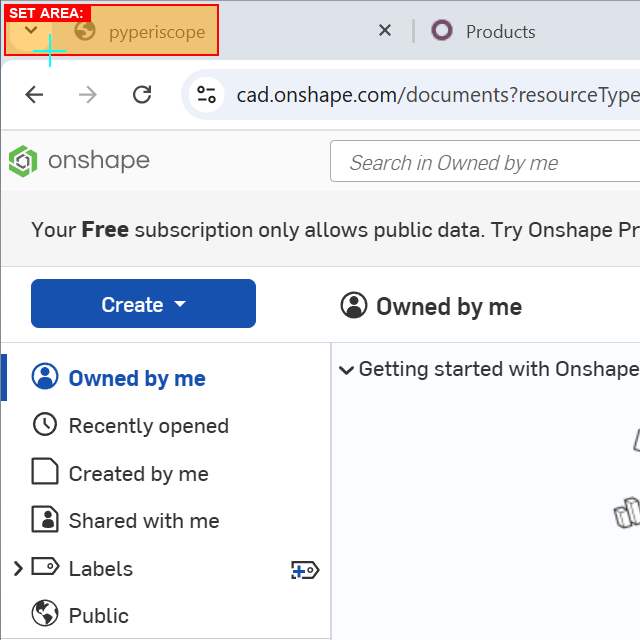

In [34]:
# comment: Automated step generated with pyPeriscope V2 
payload = '''gASV3BEAAAAAAAB9lCiMBGFyZWGUWLwRAABpVkJPUncwS0dnb0FBQUFOU1VoRVVnQUFBTllBQUFBekNBSUFBQUJrQ0dGSUFBQU5Fa2xFUVZSNG5PMmRmMHdiUnhiSDM4eXViV3hzZnRrbXVmeTROb1hnQUdudjBxc1VVa0xTNVA2NEsrVkMyalJWcGFZZ1F4U2txRktscE8ybDZxbC9WRVNocUtCR2Fpc2hCVFdrbDVNcVhTNUpqM0pTTDhFQmdpR1grK09TTm9DQk5IKzB6U1hCSmdZYjIrdjF6dHdmazJ5M1lNQUdnd3UzSHlGcmQyZDI1bUYvL2ViTjI5azF1dm5kWFZCUlNSNDQyUWFvL0wralNsQWx5YWdTVkVreXFnUlZrZ3dmVjIyTXNTRkZxOWRwdFJxTzR6Q0hNVUpvMXJNb3BaSkVKRUxDWWlRUUNnY0ZrUkF5VjRPbmc1bEJLQ0JFS1NENWlNclBuVmdsaUJIS1RFOU5NeHJtOE1FaWhIaWU0NEhUYVRXbVZEMEZHUGNGN3ZzbUNLSHhOemFsY1FCS2dTS0tXRmNQWDFTV0NqRkowSlNha3BWbTVMakVqTm9JSU4xa01CcFNQR04rZnlBMHY3WVFKUlNRNnZHV01MTkxNTU5reUVvM0pyeGpqc1BaV1drY3htUCt3RnpiUVBCZ3pGVlp3c3dpUVd0V21zbVFzbkRkbXpPTVBJODlYbis4SjFJS0NDVmdIRmRKT2pPTnJlbEd3NExxVCs0bDNXaUk3eHlreG52TGgya2xxTmRwelJtSkgzK2pZczR3NmxPMHNkWkdBS3I3VzBaRWx5QkNLRHNyYlRIdHlNNU1peVcvQTRBZzRma2NsYVFTWFlMcFJuMmk1cjh4d25FNExWVS9lejJrNXZ1V0c5TkpNTTdnTEJGa21HTG9kRTZweEJreTRRdVFKRmVKanlnellwMVdzOGd1a01GeFdLZlZDR0Z4dWdvSWdNYnBBaW1sQ0NHTWNTQVlHQnB3K2Z3K1NnRUFNQUtqMGJSK2c4MmdOOGpWNW1XOXlseUpJc0ZVdlc3eDdaQzdua0dDRkdoY3d6QVRsdC92YTcvWWZ2djJEL2Z1M3RYcFVqaWVRNEFrS1JJT2g3T2M1alZyMXU3ODdVNmowYVNxTUZsRWtXQ0tWclA0ZHNUU2RWd0NaSkw2NXV2ci8yaHJFd1NCNXpWYXJZNFFrc0tuQUFKSmtpaWxveDdQL2RGUjEwRC9zNldsR3g5L1FsVmhVb2dpd2FTTXdyRjBIYnM2Q0tFWW94NW45OFVMRndpbFBNZFpyWllOK1FVV2l6VXpNd05qL00rdnZycDE2MXRLS2FVMEdBcWRPM3ZXNS9OdGVicVluVGovZjBRbGRxSkpFQ2RQZ2pOM1RXTzZHRXdweFJqZCtPYkdKWWNEQURCQzI3WnZmL0twcDFqWUJ3Q0JZTUE3NXFVUFFRQUlvVXNPUjFwYVJ1SEdRdFVYTGpKUkpKaEVOekJMMTdIWmhSRHkrLzJ0clY5SWtvUXhWLzc4N3NMQ2pRQVFpVVRDWXZqZi83bzZORGc0Y3U4ZWt4cDdsU1NKRU5MYStzVWpqejVpTkM1U1FsNkZzZHlXckVxRUFNQWxSN3NZRG1PTXQyM2ZWbGk0a1JCQ0NPRjUva3BQVDArUDg0Y2Z2bWZUWkFDUUhSNmxOQklSTDdXM3k0MHNJVVk5N29QN0swNjNOQ2Zia0xrd1h3bGV2WHJWYnJjTGdqQzFTQkFFdTkxKzllclZlWFlSRnhnaHY5OTM2OVl0alVhN2N1WEt6VVZiQ0NGTWNNRmdZSGhvaUJDQ01Yb3dCRFA5UFZocGlJQ2liNys5NmZmN3NEb1FMeUx6a3FETDVYcjExVmNkRHNkVUZZWkNJYnZkN25BNEtpb3FYQzdYL0l5TUE0VFE4TkROc2JFeFNva3RQMStqMGNqSloxR01TSVFRU2VJd2p6Rm1LZ1I0Y01XWlVrcUlOTzRiSHg0YVhuS3hZSmJaOHNtSlU2OVVWaWZia0xrd0x3bm01T1NVbEpRQWdOUHBWS3BRRUlTcXFpcW4wd2tBVzdkdXpjbkptYitoc1RNeDRkUHdHa0pJdGpVYkFIaWVaNUpLTmFUKzd2ZlBQdi9DbmhmMzd0MnhjNmRXcThVL2dnQUFZYXpWNkh3KzMySmFxeExmdlNPVFQrYjVwcWFtMTE1N3JhMnRqYW53NU1tVGxGSzczYzcwVjFwYSt0RkhIK0hGbldLenNFK1hvak9rcGtaRWtWQ0NFYVlJOFJ5M2J0MDZWdWV4M055dnIxLzNqbzFIeERBQTRqaGVyOWZRaDNlZXhNN3BsbWJYUU45N3h4b083cStRRDM1eTRoUUFEQSs2R3V1UFZsYlhiTjVTTEJlMXRaNXZQWGZta3hPbnJ2UjB0elEzMWI3ZitObkpFNjcrUGxaNjZLMTNjdk5zY21YV0F0dTI1UmU4ZnZnSTI1YlAvZE1mRHdFQTYrTGcvb3F5M1h0S3k4cFpuZU1OZFhLenl1UEtOZ0dnOXYzR0xMTUZBRVk5YnRZYVEyazJLNnFzcnZGNDNLM256a3h0a3pIMUhZaVJlVWtRQURER0gzLzg4WkVqUno3Ly9IT24wMWxUVXlPS0l0UGZ5eSsvZk96WXNjVWYxQWdGUWtqSUgycjU5RlA1SU0vejZlbnBhOWF1ZWZMSjMveGkxU3FNOFhObHV6bzdIVjd2R0FLVXZXTEZodno4RGtlN0lJVG5zQkwyNFA0SytVMC8zbERIZG5QemJMYjhnbDVubDFLQ3ZkMmRaYnYzeUxzZmZuQ3N3bjZBYWF1dDlYeGovVkZaaFV4bjh1NjdieDgrM2xBbnE1Q2RLd3RvRXUrK2ZkaHNzVEtUUmozdTNwNXVkcHg5QWVRMjIxclBzK09zTDFsMlRLYkRnd1BLa2YzTEwvNVdWTHhOK2UwQ0FLWkNwbEZabEtkYm1wVnZ5S3drd0Q4aGhPcnE2bDU2NlNVQWNEZ2NseTlmQm9COSsvWWxSWDhBZ0JHaWxBSlFVUlFsS2NMK0JDRjA3OTdkYTlldS9lWDBuMi9mdm8wUVd2dkx0YS9zcTZpcXJxNm9ySHh4NzE1OWl0N3JIUk5GTVY2ZjdSNFpPZlRXTy9LdXJDY0FLSHE2eE5YZk4rcHhzNkxoUVpkN1pLUklvY2lpNG0yeTJ5c3RLN2ZsRjN6NTk3TnN0Nlc1cVd6M0hybTB3bjdBMWQ4M1BQaGpWUDNjcmhlaTZvK1pWUFIwQ2R2T01sdVlNb1lIWGEzbnpsUlcxeWg3WkMyd3Z1U3ZTbTZlcmJLNnBydXJRN1ljQU13V3ErejJjdk5zWmJ2M3lCN3hzNU1uYlBrRmNpa1RycXp2V1VuUUhVa0kxZGZYNzl1M2orMVdWVlhWMXRZbUs2ZzNtVXpoc0NCSkVrSkFGUUFBSlpJZ0NGMmRuUUFnRVVJSTBlc05xVWFqSkVsMzd2d1hZeXhHeE5SVVUxemRXYXhXNWVnSkFMYjhndnNlTndDd0QxVjJRbGQ2THR2eUM1UzZVY29SQU5iYjhqM3VFUUJnVWxPV3NpNDhDazJzLzJtbmsweHFhVzVTQ2dnQUJnY0hMRmJyNXAvMkdMVXZ1ZkVoaGVKbFRUUHk4allBQU92QzFkODNxVlIrQjJKaHZnT3hrdHJhMnZUMGRJVFFHMis4a2NCbTQ0SlNtcnMrTnkwdHplZnpFeUpSUldUSDhqQ1l3eDZQUnhRakdnMVBLWlVrQ1NGRUNIRU45R09NalNaajd2cWNCRjRnS1M3WlB1VHFoN0p5QU9qdTZxaXNyb25sTENZMVpYQ21QRDRyN3gxck9ONVF4MDZYeDhmcE5CRzF6ZW44NjFTWUNsdWFtMXFhbTM1U2tGOFFZd3VKbENBQXZQbm1tNGx0TUY0SXBVYWo2YkhIY3E1ZC84OGsvV0dPd3h3WEVTTVlJNGtRellPbERCaGo1T3krZk9mT0hVTEl1bldGUnFOSklvU2Jod1E5N2hHTHhjcTJOMi9aMmxoL2ROVGpaaDVscWhOU0lxdkViTGFBWXE0d0IxZzh3SUs4K3g3M0RQa2FjN1F1Um1mVHVpeGNadUdrV1ZkY0xMZXJJK3dxOC9ZZE8zaGVvL1JrR09OTnY5NVVWYjIvZXYvK1BTL3U1VGxPa2lTV2pybHg0MFpuUnljaFJLUFZQck5qSjhSNWxkdzlNcUw4d0ZqQXQzbkxWcmFibTJleldLMjlQZDI5emk3bFJJU2hIT2tBb0x1cm82aDRHd0JrbWMxVFMrZkE1aTNGeFNYYlhRTjlBTEI1eTFiM3lNandsRGJaRUM5SEMwckRsS29hSGh4UVZ1aDFkc2xCaGNWcW5WUWFGMUhlYXhwWFdpS2h6UHg4aFJnTm81U2FUS2F5c2wwOHozTWN4NFNJTWJaWXJDdFhybHkxZXJYVmF1VjVqdU80UURCd3Vhdno3Sm0vRWlKeEhGZFd0c3RvTk03aDMvL3dnMlB5ZG1QOVVWdCtnVEk2TENyZTF0dmQ2ZXJ2SzVyaUo1UVIyL0dHT25nNHg4d3lXOHAyNzJscGJsSXE1dDIzRDhkaXpLakhyYnhTNXhyb3MyMG9BQUEyUTJjdW1SVzF0WjVuMjJ4dWNlV2hDb2NIWFd5Q29teTJ1NnZqaW1KbTdlcnZlKzRQejdQZEN2dUI3cTRPNWZ6amVFUGRySDVVSnNwQUxCSENjMXlNNXllV21TL094amcwSW9RSW9ZVWJDOGZIdlJjdlhLQUFITWNCd00yYnc1bFptVm1aR1JRaDcrajlFYmQ3b0wvdjd0MjdoRktNMERNN2RoUnVMSnpEWWkyTDFWcGhQeUJueFlwTHRrOGE5VXJMeWx2UG5aazBFV0hJdVQzV2pqS1J3YlNvek9FcDU5MHprR1cyZEhkMWRIZDFUTFhuOWNOSDJsclBLM3RrdlpTV2xlZmxiV2lzUHlySGM1TXlsQUJRV1YzVDYreVNLeWlEaE53ODI2RzMzbW1zUDZyTUdzWWVRcUNwVDFsZG5aMnBTOUtxMVpBZzNoNjVQMTBwalhHMUZxdXNXTElhRG9mWm5GakRjNGJVVkVwcElCQmszakVTRVhVNjNaeVhyTXFwNlJucXlLbGQ1YmdtcDVmbkhPMHRHbEh0VHlCUnZLQWdScElsd1hBa01rTXBpa09Cd0JaaWJYejhpVWZYcld1LzJQNzk5OTk1M0c2RXViQVlBYUFZWTBFSVphOVlzV3JWNm9WZXVNL0NyQVg2L0pZQlVTUVlDQW94M1UrNUFBU0NVVmJjeUNBVTN6M3NUSVZHbzJsWGVUbTdmY2svNFdmaEprSmdXcFRibDBZOWJwWVFYb2pHbHdkUkpCZ1V4S1NzWHllRUJvWHdEQlVvUWtEaWU0NFJFeFloeEtBMy9HclRwbWlkRWh6YlV4TGpSYjdxcXJ6d29ES1ZLTEVnQUdTbEcyTzZxemVoZUgyQjBiRlpuMjhVMzAxMEtqOS9vaWZBdk9NVGk3eHlXQ0xFT3o0eGV6MkVxUHBFbWVWRmRBa1NTdStOamkrbUhmYzg0eVNXaEJ3RnJIckI1Y1cwbHdHQ29YQU13MkppOEhqOU0wZUJTaDdNSmxTV0N6TmRpZkw2QXI2SjRFSmJNRDRSalB0QnE1U3F3L0d5WVpabENpUDNmZUdJWkY2QUIvMHkzRjdmdUg4dUttY1B1VlJsdUF5WWZhWE1tQzhRaVVqbURCT2YwS2NzUkNLU1o4dy9NV01pY0dib3cxZDFWRjdTeExSWWF5SW9UQVFGVTJwS210R2cwOHgzZlpjZ1JzYjlBZC9FL0o2MS94RDJLdytVVURVK1hLTEVvU2ZmUk1nM0VlSXdOdWkxT28xR3ErRTFHaTZXZFUwU0lhSW9oY1dJSUlxQllEang2UjdLOUljQUFhVVBHbGQvQ0dLcEVMZExrd2p4VFlSOGtCZ2ZsbEFvcUQ5QnNnUlpia3RXVlpZY3FnUlZrb3dxUVpVazh6LzhDa1o5Q3JMMlR3QUFBQUJKUlU1RXJrSmdnZz09lIwNY2xlYW5fcHJldmlld5RYKEYBAGlWQk9SdzBLR2dvQUFBQU5TVWhFVWdBQUFvQUFBQUtBQ0FJQUFBQ0RyMTUwQUFEMFpFbEVRVlI0bk96ZGQxZ1UxeFlBOERPempkNUJ3UVpLRWJ1Q0ZjWGVhK3l4ZDJQdjhTVWFZNHdsMW1DUEdoT05OZlplVVJDbFdGQnNJS0NBaWlDd2RGallPdStQcTVOeGQxa1dCTlp5ZnQ5NytYQjI1czZkMmRrNWMrdFF2U2NzNnRYQ0ZSQkNDQ0ZVZ2ZnQTBLbHJEME5uQXlHRUVQcTYwSWJPQUVJSUlmUTFvb0V4ZEJZUVFnaWhydy9OWUFSR0NDR0VLaHhXUVNPRUVFSUdnQUVZSVlRUU1nQU13QWdoaEpBQllBQkdDQ0dFRElCUEFWVzZMV21hTmpFU0dvdUVRZ0dQeDZONU5FMVJ4U2ZGTUl4U3FWS3FWREs1UWxJb0s1REtWU3BWNlRKUU5KSU5GUU1VeFRCQXNVc1FRcDhYQmhoZ0tBcUFvU21hWVFES3Z0TW8zaTZRd2ZCTGNiSFJGR1Z0YVdwaFpsS0s2NVNpS0Q2Znh3ZWVTQ2d3TnpWbUFISnlKWm01K1NwVkdmeXVLQUNHQVlaaUtMS3I5LzlCQ0gyZUtIaFhSS0FZNWwzOHBlaXlpY0o0dTBBR1YrSVNzTG1wa1kyRkdZOVhOblhYRklDbHVZbVppVkY2ZGw2ZXBQRGowcUlZRlFPbEx0RWpoRDV0NzBxbktxQm9ZRDR5QnVQdEFuMEMrQ1ZhMjhyY3hNYlNyTXd6d2VQUkRqWVdQSnJPenBPVU5nMEszbFVmSVlTK2FCUXdEQ25BZmx3U2VMdEFobGFDZ3F5OWpVVjVSRitXclpXWnJWVnAwaStmbGlHRTBDZU1LZVdQSG04WDZOT2g3MHhZbG1ZbTVpWkc1WjBiU3pNVFN6T1RrbTFEWWNNTlFsOGxxdVQ5cGZCMmdUNGxlczBGYlN3U2xxNXNXZ3EyVm1iR1JrSjkxLzZvYWlpRTBHZXVSQlhKZUx0QW54aTYyTDRNRkVVNTJGaFVTR2JlY2JDMjBHZEVFd0FGWlQ2Q0NTSDBXV0VZMEs4Z2pMY0w5TW1oaTcxMExjMk15NnJQczU1NFBOckMxTGo0OVVwUkFZVVErc0pRQUpRZUJWdThYYUJQRDExc1Avd1NOOHFXQlN0elBYWmFxcUhET3ViOUtJY3BRUkJDNVUrZkgyNVp6RFNBVU5uaTZ3Ni9JcUdnZ291L0JJOUhpNFFDcVV4ZTFBb1VBRlBDNTFtR1lTaUtvbWxhVWlDSmZSYWRtNWRMcXQ5cENzek16TjFxZTVnWW03Q3JmVlR1RVVJVmlmcWdlVGRML0ZZdUxSQ0lqSzNzS3IvL3ZNUzNDeUpIbkptZG1wR1ZtaTZYU2hVS0JRV1VRQ1EwTWpIbWl3VFdsZTB0SEd3RUFrSFpIQUw2S3ZGMUJ4dFRZMUdGWlVWejF6b0NNQU5NaVdxVVNGak55OHU5ZnUxNlV0S2IxSlFVa2NpSXgrZFJRQ21WQ3BsTVpoTmlXN1ZxdFE0ZE81aVptV01NUnVqendyMGh5QW9sN0g4MVB5MldTcVVDaGxFcWxDb1ZrL1lxT2VIeHM0UkhNVEpKb1Vnb29paEtJaTJ3Y3JBMXNUQ3QyYVJPVFJNUm1KcndlRHhLdjRsNEVWTEQxOTByMzBob3NPYzczYnN1VWZnbEFmWEo0MGNYTDF5UVNxVjh2a0FvRktsVUtpTytFVkNnVkNvWmhzbElUOC9NeUloK0Z0VzlSNDk2OVJ0Z0RFYm9NNkw3aHFELzdZSmhHSnFtYzlPejNqeC9lZmZzOWNMOEFvVmNDY0FBajVJcVpBQkE4K2hzY1ZaT1JwWTRNZVhSdGR2MTJ6V3JYdGZWeHRFQjd4aW9GUGlVenY0TEJxbC8xbWZYK2wvcEtoVkQwMVJvU1BBMWYzOFZ3L0I1UEh0N3U5cWVkZXpzN0sydHJXaWF2bnJsU254OEhNTXdETU1VRkJhZU9ua3lOemUzWlNzZnN1SEhId2hDcUx6cC9xR1c0SGFoVkdhbHBMK0tmSjRVblZDUWx5K1h5c2tVMUJSRjBUd2VXWUZoR0ZDQ1NxRmtWS3FYajJKVktvYmk4U3h0clNrZTNpNVF5ZkIxWDV3ODJuQUJXUGV1R2IxbWNXVVlocWFwcDArZUJnWUVBQUJOVWI1dDJ6Yng5aWJOdlFBZ0taQmtaV2N4NzFFQUZFVUZCZ1JZV0ZqVnJWY1huMm9SK2p6b3ZpSG9mYnRRS1JWSnoxOCt2LzgwTHlsRG9WQlFORVVCajZLQUwrQUxSQUlBa0VubFNybUNZUUJBcFpBck1sNG1LMEZsWm1WaGJtMU8wUUs4WGFBUzRlc2VtbTdBSW1BeHU5WXZYeFJGNWVYbG5UdDNScWxVMGpTdjd6Zjk2dGF0QndBS2hVSW1sOTI3Y3pjMkppWXROWlVFV3ZKZnBWS3BVcW5PblR0VHc3bUdtVmtGVFQrQzBGY2lJMTI4NTg4ZHcwYU5yZXpvcFBiUjIrU2tnLy84UFhIS2RITUx5eEtuV3haRllLVlNXVmdnaTdnYUxNbk5VOGdWTk5COEk2RlZaZHVHN1Z2YVZhdHNZV01GQUpLYzNLelVqRHRucjJlK1RWZElaUko1b2V6bG05c1oyVFhxdWZNRm4xYjBmUjRUdldITmlybmZMM0oxOXpCMFhwQjJCaXZnVmdDbFNnVUFnUUhYNVRJWlRkTytiWDNyMXEyblVxbFVLaFdmejc4ZEdob2FHdkxtVFNMcEdnMEE3Tk1yd3pBS2hUencrblUya2M5SVJycDQ2b1JSQi9idU5uUkdFTkppNys2ZHoyT2pmMSs3OG0xeUVuZjUyK1NrMzlldWZCNGIvZGV1N1liS1c5WmJjZHlEcDVJOGlVS3VBQUNocWJGTG85b04yN2R3cU81b1ptWEpGd3I0UW9HSmhabTFvMzNEOWkxY0d0VVdtaGdETUFxNW9pQy9JREhxZVk0NFEvOTkzUTRObmpwaEZQZC9GODZkTHJjalE1OG9tdnJZMTNyOTUrN2R1MlBIanBWS3Bab2ZTYVhTc1dQSDNyMTd0NnoycFErYW92THljdVBqNHdVQ1llWEtsWnUzYUtsU3FVaTRMU2lRUEkrTlZhbFVORTI5cTN3bTBmZmRxMEVwWUtpNHVCZDVlYmswMWlraFZIWkdqWnRvYTJlZm01UGp0MjRWRzRQZkppZjVyVnVWbTVOamEyYy9ZdlI0UStVdDgyM2FpL0JJcFZ6QnFCZ2VqMjl1YTFtem9hZDcwd1pXbGV5RTcrZkg1UXVGNXRhV2JzMGExR3JvYVdGcnllUHhHWlZLSVpjblBJbkpUaXRCQUNhV3I5Nnc3YzkvdHYzNXo5enZGNTA3ZGZ6VGZHNmVPbUhVN2RCZ1ErZml5MVJtSmVEbzZPaVJJMGNHQkFSb3h1REN3c0t4WThjR0JBU01HalVxT2pxNnJQWllMSXFpbnNlK3lNN09aaGlWaDZlblFDQmdwOXFReXhWS2xVcWxWUEpvUGszVEpBWUR2S3VQWnhoR3BWTG01T1k4ajMzKzJUWHEyTmphYmZ2em4rR0d1NHNocElPdG5mM3MrZit6dGJQUHljNG1NWmhFMzV6c2JQWWpRK1ZOS1pQblpXZFRGRVVCeFRCTWl6NmQ3S3M3a1RZcDdtb3FsVXFwVkZvN09UVHMySkpoR1BKK2h4Y1BuMlduWnBaNjE2N3VIcVBIVHc2K2VTTWpYZnpSeDFHV1ByWDhmR0hvc25vNVNLMWF0ZHEwYVFNQUlTRWgzQmdzbFVySGpSc1hFaElDQUsxYnQ2NVZxMWFaN0U1UCtmbTVBcjVBcFZJNTJEc0FBSi8vYnR5enFZbHAxMjdkditrL1lPQ2dRZTA3ZEJBS2hmUi9LQUNnYUZvb0VPWG01bFprYmhINkdwQkFhMkZwbVpPZHZXSE55ZzFyVm40SzBSY0FDaVdGeWdJWkFFUFJGRjhvc0hLd01UWTE1dkY0OUljZFFtbWE1dkY0SnVhbWR0VWMrVUlCUlZNQURDaVUwc0xDajltN3JhMGRBR1NrcDMvVU1hRFBTakVUY1pRZ0lUNS94NDRkMDZkUHYzRGhBb25CZS9ic1lSaG03Tml4SlByMjZORmp5NVl0ZE1WMnF5Yk52U0lqa1ltcHFVSXVWekVxbXFJWml1THplQzR1TG1TZG1xNnVqeDg5eXNyT1VjaGxBQlNQeHpjMkZqQXFCcWlTVmM4ZjJMczcrbG5rc2xYcnAwNFl4UzdjOXVjLzhMNDN4T2p4azV1MzlHRS91bkR1OUxsVHg3ZjkrYy90ME9DOXUzY3NYNzFoMzU0L282TWl5YWRxWFNkSUN1UnZEODg2cytiOWovek5icnQ0NFZ3QUlMdVlPbUZVcjM0RGV2VHFTOWJadVA0M05sbnVjbTZhQUxCODlRYWJkN2NBTVVtTjRHYWJmRFI2L09UMGRQRzVVOGMxMHlRMHp3QkNYTFoyOXJQbi83Qmh6Y3E4M0J5R1ljd3RMQTBlZlFGQVdsZ0lDbENwZ0tKcGdWQm9hbTNCNC9HS1dsbG9MTElTMlFxRUFybE1wbEtCaU1kVEtoUmxsUk55TXhrMWRoTDVoYksvelFON2R3ZmZ2RUhXc2JPM1g3WnF2ZHFHM0ovZTNPOFhzWDlyZHNqUzJrV0x1L25vOFpPZnh6d2p1OXU3ZThmZTNUdllPMDlSdHhSVVVzV01BeTRSbXFhM2J0MzZ2Ly85Nzk5Ly93MEpDWms4ZWJKY0xpZlJkK2pRb2F0V3JhcjQ2bHdWQXlxVnFqQ3ZjTy9mZjdNTCtYeStwYVZsMVdwVm16VHhjblJ5b21tNlo2OCtRVUVCV1ZuWkZGQU9sU3JWOXZTOEVYQmRLcFdWNHVSTW5UQ0tEVGtiMS85Ry91bnE3dUhoV1NjczVDWTNBSWNGQi9YcU40RDlwOSs2VmFQR1RpTFg5NFZ6cDdtL0RSSmwyWDh1K1dIZXh2Vy9zVEdZYk12K1JOVXMrV0dlclowOXlWSkd1ampzZlZzT0NmOXNtbXdIRUxJdk51aVNYK256bUdmY091M3paMDYwOFBIbFBsc0FBUGtSa2dqTi9pWVA3TjNOUFNFSXNjZ2tqcC9VU0Q4eUZJTHp6MkpLQ3grdS9NRzJwUkFUOHd3QXVPSHduNzkzY244N1MzNllCNXduV25KN1VYdHVabjk2YW8vWHhTTHJjemRQVHhjUEh6MitlNisrNUptYnZYY1ZkVXRCcFVDWDdTdENLSXI2N2JmZkJnOGVEQUFCQVFHM2J0MENnQkVqUmhnaytnSUEvZTVYd2NqbGNxVlNRZjRubFJhbXBxWThmUGp3NElIOVNVbEpGRVZWcTE1dCtJaFI0OGFQSHpWNjlNQkJnNHlOakxPeXN1VnllVW5MNitLME5PNVRKeHROQWFCRnF6YlJVWkZzZzhyem1HaHhXbG9MVGp4dTRlUEwvdlo2OU9ycjRWbm4vTm1UNUo5N2QrL28xVzhBKyttb3NaT2lveUtmeC96WG10NnpUMyt0MFpka3FVV3JOdVJ2RzFzNzl0ZDE3dFR4MGVNbmMvZElVaUQ3WW45c1dwdW1iTzNzMldkZVYzZVBYdjBHc0tYaGZYdis5UENzdzM1S3dqWjI3MFJxMHNWcGZ1dCt5OHZOTWJld05ETzN5TXZOOFZ2M1c3bzR6YkM1NHZINVNrWkowd0FxbFZ3bXkwcEpreFZvNlZKS0tHVHkvS3djdVV3T0tvYW1BWGdnTWpJcTlhNXZod2FUbnlTN1JKeVdObnYrRCt3L0w1dzdMVTVMNHhaNVo4MzduNTI5L2NYM1B5NjFueDc1WWVxZmdRMXJWdmkwYWN2ZG5GdGE0Tko2UzBHbFUvWVZ3aFJGclZtelpzU0lFZVNmNDhhTlc3NTh1YUVlY3MzTnpXVXlxVktwcENoZ09BQ0FVU21sVXVuTm9DQUFVS3BVS3BYSzJOakUxTXhNcVZTK2ZadE0wN1JjSVRjMU5TL1I3dXpzN2RXRzNIbDQxc2xNRndNQXVaclpwOFhib2JjOFBPdHdvMmFMRHk5M053OVBjajhpZ1piN0tkbEZPaWNpdWhVOXpzL08zbjd2N2gxcVBTbGlZcDdaMmR0ci9zQTA5OFVtSHN1SjkrelBqM0Izcnczdk8ydEVSMFdxZmNxZUFZUUlFbjNUeFdrV2xwWnp2Lzl4N3ZjL1dsaGFzZ3NObURHUmtSSEQ1d0ZRaklwUnlPVHByNU1sdVhsRmRjSXF5Qy9JVEVsWHlPU01pZ0dnZUVaQ0krTVNCK0RGQytlU01VaWtJWW43azdTenQrZmVIMktqbzN6YXRGWGIzS04ybmVobjc2cUNOWDk2NUllcEQvTEQ3NjVmS05WNlMwR2x3eStuZEpjdlgyNXBhVWxSMVB6NTg4dHBGOFZpR01iVnpkWEN3aUkzTjArbFVuSXJpTWpJSTVwSHA2ZW55K1VLZ1lEUE1JeFNxYVFvU3FWU1JUK0xvbW5hek56TTFhMVdHVmFSK2JScEd4c2RCYjM2QWtEd3pSdmNwMTBkU0tEbE5zcHlseGRyMmFyMUc5Zi9SalpuNjVlS2lvaGEweXlxYksySi9DWkpjOUVISDNqVzBUTUY5TVhqUnQvWjgzOGcwM0hNbnYrRDM3cFY1Q01ETmdaYk90aldiT2daYy9jUkF3eEZVUkhYd3J5N3Q3VnlzRlZialZTTWlWOG0zYnQ0ZzZJb0JoaUdZY3hzclBqdmh5cnByNmlXSTAzcDRqUTdqZE5pL1g3Ymp3eUhldDVNQ0syM0ZGUTZ4Y3lFOVRFV0xGaFFUaW5yU2NVd1ptYm1OV3ZXZXZnb1FpMzYwandlemVNcDVBcWFwcFFxbGVCZFd4Uk4wMVJJOEsyM2I5K3FWQ29YbDdwbVp1WktsWXIzRVFHWSs3TnAzckwxaGpVck10TEZwRFJaVkEwUHdjWkkwamRTL3grcUpsSVRUaHAzTTlQRk9rWW8yV3JiUmJHL2JmYlhTM0tvMXRjTUlhNS8vdHFWTGs0enQ3QmdveThBVkhaMG1qMy9oOS9Ycmt3WHAvM3oxNjQ1My85b2tMeFoybHM1MTNlTGk0aVVxNVJLcFNJblBmdkZ3eWlGVEZiWnJZYXhxVEZmS0FRQVdhRlVrcDJiOWpMcFpkU0xuSXhzcFZKQjBSUlB3Sy9aMk5PNlVpbC9vZnJRK2xCaXFMb2wvVzhwU0RlNjdPYmgrT1NRMmFUYnRtL1A1Mzh3Unl0TjA0MGJOUjQzZnNMNENSTUdEQnpFNS9HVVNpVVpnUFQwNmRPZ0cwRXFsVW9nRkxacjN3RktPQnUyT0MyTkc2NUlRMi96bHEzSlAxM2RQZXpzN2NOQ2c4TkNibW8yejNEcmVBRWcrT2FORmo2K0FHQmphNnY1YVNrMGIrbmowNll0cWJCcTNySzFPQzN0dVVhYXBISmJyVmVGNXVQQzg1aG4zQlhDUW02eTFlbDI5dlpxbnlMRU5YcjhKRmMzanprTGZsU2Jpckt5bzlPY0JUODZ1OVFjUFg2U29mSm1ZV2RUemJPV3Nha3hYOEFIb0dTU2d2aUladzhEYjJjbXAwbHk4aFF5dVVJbXo4dktUbjJWOURBZ0xEN2ltU3kvQUFENEFyNkptVW5OUm5Vc3l6TUF1M2w0c3YyZldkSFBJdC9mSmV3MGYzcTNRMit4ZjVQYkNMZWt5LzFicllHTVM4ZHpQL2VXZ2txSHBuU1dnRCt5WDkvSFVLbktJR01NdzVpYm0vZnExWWZQNS9ONFBCS0dhWnEyczdPdlhMbXlVNVVxOXZiMmZENlB4K05KQ2lTM2JnYWRQSDVNcFZMeWVMeGV2ZnFZbVptVjR2RDkxcTFpLzk2d1pvV0haeDF1cTNBTEg5K3c0S0RvcU1nV0dtVkViclBLeHZXL3dmdCt4VGEyZHIzNkRkaTdld2MzWHBMK2tNWEtTQmR6NTlhSmZoYnBVYnNPQUpCZTJhUTRUajY2Y080MCtadjBxR0ludm5rZUUwMjZaWEdURGI1NTR6YW5OM1YwVkdUUDN0K1FmNDRhT3luNDVnMXVyNnVONjMvRDVpTEVzckcxbTd0d2tlWkUwQUJRMmRIcCswVkxTMW5Uby9PWHF2L3Rnc2VubS9YcGFGK2pxb2xBeEFBamwwbFRYeWFmMzNidzhJby85aS9adUgvSnh1T3IvN3kyOTFUcXE3ZHltWlNoR0JPQnNZMVRwWWFkV2htYmluajhJc2NzZlR4eU4rRCs4RGV1LzAyY2xzYldBUGZzMDUvNzA3c2RHc3dOMkNSQ256OXpndnd6STEyczFrNmsrY05uLythRzlxSnVLYWgwaW1rRFZxcFUvS0pId3BVcjNaTXc2MWtwVEZHVVNzWFVyVmMzSnlmcm1yOC9BMEFHOXIxNDhkemF4dHJHMm9xaHFLeU16RFN4K0ZsVVpFcEtpb3BoYUlwcTE3NTkzWHAxUy9FNlFqdDcrMUZqSjdGajZYemF0Rldybk9uUnErKzVVOGZWdWw4UjdGaGVrZzUzK0FINWpYRUhGWEQ3V3V0Z1kyc1hmUE1HK3p2azVtZld2UDlkT0hlYXUwZXlseDY5K3JxNzE5NndaZ1g3KzlTY3pIMzArTWxoSVRmWkZialY0Njd1SG5PL1g3Umh6UXJ1S09GU1Y1NGpwQzlLMXp0LzliOWQwRFRmd2JsS2ZuYmVhNHBPU1hndGw4a1pSZ0VBS3FWU0tYLzNCL3VDUW9GSTRPQmF6Y25EMmNuTm1lYVYyWndLUmRuMjV6OWs2Qkg1cDRkbkhlNWRncFJpOSs3ZVFYNTZQbTNha2w4aXV3S1pvb0JzYm1kdnIvYXA1ZzkvK2VvTjVBOHlIRG40NWcweURyaW9Xd29xQldyQWR6K3RXVFM5cUkrck9GaUxoSUtLekJDclVDcFBTaXR5YWpkR3p4ZU1rWlVaaHFLb0o0OGZYYnh3UVNhVGtYN1FBajdQeE5TVVlSaUpwSUQ4Y2hRS3VVZ2s2dDZqUjczNkRVclI5NHFkaUVQSE91eEVGdHdhWFhZeWpVOC9VR25OUDBJR3g3MGhwQ2JHa1Q4Y3F0YlUvTFNZZEJpR29xaU10Mm12bmo1L0hCQldtRitnVUNnWUZWQVU4NjZRVFpIL1Uzd0J6OGpVMkx0Myt5cXVOU3hzclQrcEFjM29jMUhNVTV0VXJqQlVBSmJwbkZhR0trSDhmVGRHdmw3OUJzNHVMdGV2WFU5TWZKMHVGbE0wVHlaWEFEQTBUVXVsaFE2VktqazVWZW5Rc1lPWm1YbjUvWlpJS3d0R0w0VEtsdTRiZ3Y2M0MzS3ZzTEszTVd2ZHhMVkpuZWNQSWwvY2Z5ckp5ODlKeVRBUkdqUEFTR1ZTb2Ftb2VnTjNsN3ExcTNuV29ua1VqODlUcVZRVlBNY2Yrakx3ZGIvdFIxSWd0VEExcnJEY3FPMWF4NmVVN3JackxldFRETU9ZbVpuMzZkdFhVaUNKZlJhZGw1OUhtcGtwQ3N6TnpOMXFlNWdZbTBCNVRzMlRrUzVXRzJ1UEVDb1R1bThJSmJwZFVCUkY4WGhDSG8rbWVWWGRhNXBhbUNua2NtbCtvVndxWTREaDgva0NJNUdWZzYyRm5iWElSRlFHV1VkZnNXTGFnQXVrOGxJMGhYNDhsWW9wa01wMHJNQlFGS2lZRXMzaVJjS3FTcVV5TVRacDJMaXh0cDJxYUpvdWorakx6cTdNbldRS0lWUW1HQVlvbW9LaWUxcVY0bllCQUh3QjM2NXFKYnVxbFQ0MmZ3Z1ZnUm8wZGNsdlAwelRzWWFOcFptVnVVbUZaWWpJeXBWa1pPY1Z0NWF1YmhjSW9hL0dCN2VDOUxldmxRbzVqeSt3clZ5dHFIVVEraFFVUHhOV1ZrNit1YWxSaVliRGZpU2xTcFdWazEvOGVoUkZYc1paL2psQ0NIMmlHR0JvK09DdEtSL0czZmZ3ZG9FK1BUUlRYT09JaW1GU00zSXFKamRFYW5xT1NwOXhld3pRK0hOQzZPdEc2Zm5PTXJ4ZG9FK1BYcTI3QllVeVBTcUV5MFo2VnA3dTFsK3VkMzJvRUVKZko2b0VjK25pN1FKOWF2VHRjNVNWSzhuTkx5anYzT1RrRjJUblNVcTJEY01VVzRoSENIMkJtSkxQWkkrM0MvUXBLVUduMzdUTTNQVHlMQWVMczNMRm1ibWwySkRDeDFxRXZqSVVsTEk5RjI4WDZOUEIxNi85NUozc1hJbENvYlMxTXVmenlySlBsa0toVE0vT3k5YzU4RmMzNXYxLzhhZUYwQmVPWVRnVFU1VXFnZmYveGRzRk1peCtTUjhIOHd1aytRVlNjMU1qQ3pNVGtlQmpYeWNzbFN0eThpUzUrWVVmbVE1QkFRQkZNU29HSDNFUit2SXdERkJVbVhWa3h0c0ZNamgrNmE2OTNQekMzUHhDSGsyYkdBdEZBb0ZRd0JjSWVQb01WVktxVkhLNVVpWlhTT1Z5U1lGTTl4c1hTb01oUHljS0tHQ1lkNG5qMkFPRVBrY01NS1NYRlVYUlFNcTlaZHVDaTdjTFpGRDhqN25ZbENwVmJuNWhMcFJOK2JWTU1jRGdEd21oenh2MS90VUhPbWE1S2d0NHUwQ0dnUk9JSTRRUVFnYUFBUmdoaEJBeWdBcC96UUpDQ0NHRXNBU01FRUlJR1FTdCszM0FDQ0dFRUNvUE5JV1YwQWdoaEZDRnd4SXdRZ2doWkFCWUFrWUlJWVFNZ0YvVXpESTBUWmtaRzVrWUNRVUNQbytIQldXRUVFS29MUEUxNTMvaDhXZ3JNeE1MTTJQOVg1U0VFRUlJb1JMaHEwVlpFMk9SZzQwRmxuY1JRZ2loY3ZWQkNkakszTVRHMHN5QXVVRUlJWVMrRWpUMXZnM1kzTVFJb3k5Q0NDRlVNV2pTQ1VzbzROdmJXQmc2TXdnaGhORFg0dDFVbE5ZV3BvYk5CMElJSWZSVm9RR0F4Nk5OalVXR3pnbENDQ0gwRmFFQkdETmpJME5uQXlHRUVQcTY4QUVBaTcrb3pDbFZqRXpCcUZTTWltRlVLbEF4REtOOXhoZUVFUHBLOFNrQW9aQnY2R3lnTDRSQ3ljZ1VLcGxjcGNKd2l4QkNPdkVCQUtmZFFCOVBwbEJKcEVxVnl0RDVRQWloendTZm9tbEQ1d0Y5M3VSS1JsS29WR0taRnlHRVNnSXJuOUZIeVM5VVN1Vlk3RVVJb1JMalk5OFlWRG9xQm5JbENpejRJb1JRNldBSkdKV0dYTUhrRlNndzlpS0VVS254c1FDTVNxcEFxaXlRWWJVelFnaDlGRDdHWDFRaU1vV3EyT2pMb3lrQm54YndRTUF2c291ZlhLR1NLMEd1VUpWYkpUYkZNQXgyOEVjSWZiS3dDaHFWZ0VMSjVCVW9kYXhBVTVTeGlCWUppdTlhTCtEVEFqNkFpSmJLVlFVeVZSa09IS1lvWUZRQUZFWmZoTkFualErQVpXQ2tGeFVEdVFXS29qNmxLREFTMEVaQ1hrbkRua2hBQy9sMG9VeFpLRmQ5ZklNSUJhQmlBRU12UXVqVHg4ZFpPSkNlOGdzVVJRVklpZ0pUSTU2dzZBcG4zU2dLakVVOEhvL0tMMVIrWkF4bUFQQ0NSZ2g5Rm5BV0RxUVhoWktSSzdYSFJwcW16STM1cFk2K0xDR2ZOamN1L1JNaFBra2loRDR2TklYM0xhUUhpVlI3MHk4RllHYkU0L1BLNWlyaTh5Z3o0MUttaGJOZ0lvUStMMWdDUnNXVEtWU0tJb3EvcG1VWGZRaytqekkxNHBWaVEzeVNSQWg5WGpBQW8rSkpDclVYZjBVQ1dxaEhoK2VTRWdyMDZrZU5FRUtmdFlvWWhwU1Nrc0l3VE9YS2xTdGdYNldUbjU5UFVaU0ppWW1oTTZLRlJDSjUrdlJwWW1JaUFGU3VYTm5UMDlQS3lvcDhsSktTY3VYS0ZRQVlPWEprK1dWQXJtUzBEaEdpS0RBUmFTK3FLaFNLNk9ob29WQllzMlpOSHE4MHhWbGpFVSttS0lOTzBRZ2g5TWtxOXdBc0Zvc1hMRmlnVUNqV3JsMWJwVXFWOHQ1ZEtlVGw1UVVHQnRJMDNiNTllMk5qWTBObjV6OFBIejQ4ZXZUby9mdjNWUjgyYjlhc1dYUHMyTEZObXpaTlNVazVjT0FBbEhNQWxoWHhyZ1hqSWtZY3hjYkdqaGd4SWlVbEJRQ3FWcTI2Zi85K1oyZm5rdTZVcHNCWXlDdXE0Ym1pQlAydi92Z3IzWGJmWCt0cm1QM2ZtdDFreXZrdTIyTi9hMjJZL1gvZTNoeWJOM3N2RE51Ky9wdXFoczRLUXRyeHk3VVRsbGdzbmp0M2JtcHFxcm01dVZKcDJKdHBrWlJLcFVLaFVDZ1VBUUVCbjBnTVpoaG01ODZkSjArZUpQK3NYcjI2cGFWbFFVRkJRa0tDUXFHSWk0djc2YWVmdW5YcjFyWnQyd3JJakV5aEpRRHphTXBJcUtXV09DOHZiOWl3WVdscGFmWHExVXRNVEV4TVRCdzZkT2kxYTlkTVRVMUx1bCtSa0piS3kyK2VMUFM1ZS96SDZCL3ZOVnY1NTdUNmhzN0paeWtyM3YvNHJtT2hDVzhrY2dDQmcydTdpVE1tdGJBM2RLNHEzcjNmZTI4SUtmSlR4M0orZ0N2SGlUalk2R3RrWkxSbXpacnExYXVYMDQ0K2txV2xaZHUyYlFNREF5VVN5U2NTZzNmdDJrV2liL3YyN2Z2MjdWdTdkbTJ5WEtWU1BYejQ4Tml4WStIaDRaY3VYWHIwNkZGNTUwU2gxUDY2cktMYWFQZnMyWk9XbGpadzRNQjE2OVpKcGRJNWMrWmN1SERoNE1HREV5ZE9EQTBORFFzTDA5eWtldlhxQXdZTTBGeE9BZkI1RkFaZ3BKVXMrRmlReEtGM0Q0eStyTVNRclg2SDM3VDUzOHErVG5xc0hPUzM3YUZwazQ3RGg5V3d5b3c2Zit6YTFSV3pFcVp1VzluZHF0enorV214cTl2UlYvanU3L3lFc1BBRXFORzBSWTMzNVFWTDV4S1hIRXFrdkY1SHlFWmZrVWkwYXRVcUZ4ZVg4dGhMV2JHMnRtN2J0dTJOR3pjK2hSZ2NFaEp5NHNRSkFCZy9mdnlnUVlPNEg5RTAzYmh4NDhhTkcrL1pzK2Z3NGNOSlNVbmxuUm10eFY4QUVQQzFWNXhFUlVVQlFQdjI3UUZBSkJKMTZkTGx3b1VMVDU0OEFZQ3dzTENOR3pkcWJ0S3FWU3V0QVJnQWhBSWFYemFNdE1tOGR2NCt1RTNvL2tuZlZ5cFlZbmhndE5pcGhYNHJPL2d1UGR6SCtsM2thZVhUc2VHYUNSdnVuZzU2MDczUHA5aE9XSTZjdTh6K3JzdTd2NU5PZmhlZUFDMkh6NjZ3azFBdVZkQnM5QlVJQk11WEwvZjA5Q3p6WFpRNUd4dWJObTNhQkFVRkdUWUdTNlhTVFpzMkFVQy9mdjNVb2k4QXBLU2trTGJWSmsyYTNMdDM3L256NStXZEgyVVJvNDk0dFBiTHBtclZxZ0J3NWNxVkxsMjZNQXh6OWVwVkFDQ1ZIeTFhYUw4MTZLZ2FFZkFvaWdMc2lvWFV4WisrR0FzTlpuOTF4Yld5STdTeTV2N1R6TW5OQ3U1bXBXVUJmR1VCMkxES3ZoTVdHMzM1ZlA2eVpjdnExLzlzNm9qczdPeGF0MjU5OCtaTkE4YmdpeGN2Wm1WbFdWaFlqQjA3VnZQVEsxZXVrRjVYRmFha3NXL1FvRUc3ZCs4K2ZmcjB6WnMzRlFwRlRrNk9TQ1FhUEhnd0FMUnMyYkpseTVZbHpRQ1Bwb29hZ3F4TnpxTWpTMVp1dXhxVExnTUFvYTNuNUQvT2pDWDE5OUxFQUwrRm0wL2ZTY2dGQUREejZQL0xINnZiMjNHM2xTWmRYekozMmJtWWRCbUEwTDNiNGg5L0t2WldKRTI2dnZibjMwK0VrMFROYTdZYnRPekhPYzMvUy9WOUw2cEY1b2RXL0xyOFNyUU1RT2pZZnNHcTVXTWFXUHlYaXZqdTJwWExEZ1VtNUpJODkxNitlMUhyRHhyamNoOGVXdkhyMml2UnVWbzN6MzE0YU1Xdm13S2p4VElBRUZacE45dnZsNUdOek45OW1IaWdkL3Yxc09qYzJmN2lmUXQvOFBOUGxnRUlxM2dOWHJScVllY1BqcDZjT3Ivek1ibWdkUzhhaC83aCtYVHUvOHZmLzUzUEQ3Tms1OTU5L3FydkI3ajhsOXI3M20wL3dhWlpDL2ZjRXdNSTNVZHMzN1hRMXh6U0FsYlBYcm4vVGpvQTJIYWF0M0gxOElaYU1oRjU0WkxZcE9OM1BrTE9zc3pJazM2N1R6MU9sc2pmdFdqMjFKTHJyS2VuZCs4NTlpZ2hTdzRBQXFzYVBxTW5qK21rWHNzb1N3blpzL1o0Y0Z5eVJBNGdNSEZxTVc3cDk2MnNJZW5rZC9NUHdsQy9QN2pGSS9XRmQ5WU1XM3V6NVlLekl3VjdOdXc2OHp4TkRvSXFIUmVzR3QvWUdsTERkdnZ0Q29wTmxZUEFydEd3R2JNSHVuMndYMWxhOEs3TkI2NDlUNU1EQ0V5Y2ZjY3RtTnJLNGYwQnZrOTJuTlhwUDdidURVK1N3NGVKL05lUW1iUjMvcUM5d0dtOFRIdXdaL2VlUzFGSitYSUFnWlZMeTZtL2ZOZjRnOWhMOXA2VWtBWGc0ZWxHL2htMmVkQ0swRmFMRGs2eU9yTm14ZUhJckJwai9selZzeElBUU9iamk3dDJIWStJSnkzSERRYk4vdTZiK2xac012bHhOL2I0SFE2T3o1WURDRXdkbmIrZHNiS3ZjNUVudG43SE1WTy9iVnlKL2Z6ZTc3MDNoTFNaZS9SN2IwN08xQmF5Sjd6bEc3L2YvSzRseTlzc1BQcDlRNUo4YXRBK3Y0UHZXN1ZOSFp0Ty9XbU83L3U4WlVhZTM3cnZ5UDJYa25lbjdydXBBK3RvbmdZMThYdG1mbjljM0dyUndUa2ZGaDZlK2sxWWVzMXB6RC9MZWxxeitmSE5PdmJIMW9PUDB1UUFBanUzanFObVQvTjIrT0FNYS8xK3l6Z0FzOUdYcHVrbFM1WTBidHk0Yk5NdmJ3NE9EajQrUHNIQndZYUt3VGR2M2dTQURoMDZpRVNpaXR4dlVVbzZFc2pWMVhYSGpoM3o1czNMeU1nQUFEczd1L1hyMTFlclZxM1VHU2hCQlUzTzdSV0RSaHhQQWx2djBUOHVhVzRyZlJOKytrU1MrTjJISVl2Yno3dGtWNy92b2xVZHFzQ2JFNXZXbkpqWEI3WUVyRzcxN2pUbmhDenVPdjIwR0p4N3psdlkweWszNHRpK0pXUEdlVHJyMmwvYTVabGRmd2pJRlhyMG5MZW1weE84Q2R5LzQreGZJd0tERngwL051YURtdEhvUFJPM0hiSWRzWGo5VkFqZnZlbGd3SW94czh5di9EMkFSS3VrZlgxNnJZbXliZEIvM3BwT1Rya1J4L2J0REkrWFF1c1BOL2ZiSVJxeDRML054OEc1WTJQZXRmTzkyVE42eElvRTV6WmpmdnEydnAwNGZQZmFnMnNHVFlTQXd5TzVQVWNTQXhhMFczL1hjOWpDYlY3bWJ3TDM3emk3ZjJxWHU0ditTd1J5UWhhMG0zNUo2dDV0MGFydVZYSWZIanI0MTRveDNTSzJYUEpycFRVR3h4K2ZPUHgvNGJsQ3NyNVFISEg1WWx5NmxId21qZjU5MExkL1JZRnRzMkUvTGZPeUV6OCtzbWZQNmY4TnVINVRQYlhjOHovM0NVcm9QblA5WU9ubGJTdXU3QjgvVkxoL2Z0S1VlWSthejF1enpVNThZdE1hLy9VanBwZ0hIT2p6NFpNQ3lJTE9CT2JiOWV0VGgzT0FGeGZNM0pjZ3QzVHJOckpuZlpQVSs5Y3VyUGdoMWtVQXdCbFpLRXM0TVAvSFUvRUNldy9mTVJNOXJUSmZCbDY4RkxqeHh6djM1Mjc3M3B1TmhXOHUvdnJqdGlpSndMSHBzTWsrRG9Lc3VORGcrR3dKUUxFM2E0Nzg0RFUvUktaNjk1dmRVUlowNXVqdGF5dm5DMzZjbU8yM0lyYnU2SEd6cmJLRER4Mit1L2ZuRmFiY0J0ZWtrL1BuSDB5MGMrczRjampKLzdVdDArTEVmcHU0d1Y0V2UyejVlWC9MbnFPbk8wUFUrV1BYSXY1THhMWG5ndW5Ob2kvNW5YbHUxWHprR0Y5TEFGTm5Cd0JJT2o5ei9wNTRTN2VPQTZZMnNaUEVCVjA1RTV1UUR4b0JPUCtPM3g4aCtUV0dUV3pGZmFTQnZCdCtLdzVIQWdESVpISUFnUHl3emJOWGhNcXJlQTJhMWRJaC8yWGd4VXNIZjV5ZnNHampuQmFtQUNBTDN6eDFhYWk4U29PZUUzeWRUY1VSbHk0R1Jvc0JuRWxpbVVHL3pWNzc2UDJKaGRUNzF5NWNPN3R5d3FOaDIxZVZ2SmRUZnN5dVg3ZGRJejl1T1RtQlYzNVlzdXVKUkVEeUpzeE9DQXBOeUpRQVdBRUE1TjM3ZmNxR0VCblp0U1RobXYvNXZjdG54MzN3dld2bDByZTcyL0Y5SVVIMzVyVGdQaE5FQm9aSm9FbTN6ditkeHJRN2ErWWZqWFpxTjNwNlhYTGdselpNaXg3cHQ2bjcrNit2cU8rM0xLdWd4V0x4dkhuelVsTlRBY0REd3lNNk9qbzZPcnJZcmNwMUNJMmF5TWhJZlZhenRyYk95TWd3U0F3bTQzM3IxYXVuOWRPUkkwZFc1T2tDS0UzMWI4ZU9IZS9kdS9lUjQ0QlpORVhwVnc3UHVmejlpT05KNWwyMkIvN1crdDF0dm4zM01mOTkzbURTbnA4V3ZDL1NkVzVsTjY3dDl5Zit2amkvVlQ5N0FJQ0hhLzkzV216V2JmZjV0YjdtQUFDZDJ3K2VITEtnM2ZTaXIxL3hxZGsvQk9TNmYzL3A4TWhhN081bUhCbmU1ZGNWMDM5dmMzNU9MWGJOSzM0bjVwMjVQTndGQUtCOWg1NzF2L1A2SVhqendmZ0JNMTBBSVBMWTdpaHduci96d0dTWGQvdWRtWnZ6d1k2dStKMllkeWIwdzgxM0hIczJadWE3bm5ubTdYNE5tTnl2S25tUWFOK2hvYkJyM3oxK094Nk4vTFVCbTBUQzNzMjF0OTBJN0d6K0xwL2ZEbGpkZGN6K0Zlc3VmcnVodXdnQXhLZW1UTDlrUCtQTW1iRXVJZ0NBRHAwSDl0dlJ2OCs2dVg1andwWTAwamoweUUzZi9TODgxM1BlbVRQRDN6MW9kRzQvK1AySEQ1ZFAvQ3VLY3lhaGZZZHZ4OTc5YWVpNHc5TVhkd3JkMU91LzU4cmdjOUtOb1hzN1dBQkErKzdObkxyMjNmUFhpSGxPa3c1ZFh1RHgzM2QwYzgvRnhENGZQRXhBMXRVemo4QmpaSSthL3kyNTRyY3ZRVjdqdjF1NWI5dHZCcDVaTU9Vd053QS8zYlg4Vkx4SnEvZlJBcUNWVDk4K1QvMStXSHB0ZzErTFBZdElSNXk0ZjFac2k1SzREUDB2OHZtMjBsYVMxdTFSaEd6dXRuWGVwZ0RnMjdiUnJwbmZuN20wY29WZGo0MmJ4dFlFQVBCcFlibmkyeDBSbkFiWHAxdVhIRXoxbXIxN25vLzF1L3gzYWJGKzZvckRXeS82Y29KMCtLa2d0cWpkeXFlajY0cHZkMFFjdXhqZi9Wc1hzSEwzYmVVdURQYzc4OXlrZGtNZjMvZlBWWEgrcCtMQmFjQlBLOG1UbG0rcm5zT3lNdFZ6bTM5bnpheTFOd1d0RmkxV0M0UUp4eTRKK3l6ZU9ick91NmJpVFA4VkswS3RCcXhjTzhaWitPNEV0ajN3M2Z4VGZvZTdIQjVmRjJUQlowSWw0TFhnajNuTkFBREFwMU9mWVpuNTc5TEs5Ris3OXRHSEo3YnROOTllL0hIQ3ZvTS9IMnEwKzlzU3R1WGZPeFhrTkhYN3V2WlYzejB3eE8vNmJkY1RpZlBvZFdzSHZqdDJIOS91NzFmT3VySjBRNGhWN3pXYnZuVVJ2dnVvM1o1NXM0Ly9jYUQ3bjVOMFY5QmF0L1R4MkJkN00vVE85OTdOMklWaDF3THpvVlYzenNQS20ydW5xazdmdXJ1Vjlic0Q3OVo1Ni94RmwvYnRDZXBJcnF1aXYxK2FLcnVYeDZ4WnM0YTBVQUpBVkZUVUFmMlUxZDcxRWFrZlVub0RBSWxFY3VmT25Zck1ZVjVlSGdDVVl0Qk9PU2xkK3l1Zno2OWJ0NjZibTl0SFJsOEFvSXRvYkZiMzVzU09ZQkFPMnM1R1h6V3RSaTdnVnFpYU4vQjFCa2pQSmFVMjZlWGRoL09nMDZMbHZ1Yi9yV0xSYXVHQ29uK2RMdzV1dndOT2sxYU5yTVZkYWpkNDJSZ25TRDU5Z2h1NGJjZjlOdnkvKzR0RnU3NXRBTjRreFhQV3lFM0wvZThmSW5PTER5by9oSU1XY1Rmdk9yZ25nUGkvN25kVkJzeDhIMzBCQUtDT2R3TUFXVzdlQjdsdE9IOWhaODZoaVJyTW50OFNJUEI2MEgvSDBtM1J1K2hMdVBRZjR3Mnl1N2ZqUWNPdG5YdVNvUDVQdTRkcnVXbHFQWk5nM25UeHpQWUFBU2NDcFp5bHRtUEdkbUMva2pwZHU5a0JRTXZaTXozWXJUcjBid21ROENqdXcxM0VYVHdmRFkzNmRMVG1MRGtWRGZZREpuOFFQNnIyR2RPUlcvd05PWFZKQWszR1RXdkIvV21aMXAwNnRCRkF4TFZRR1FBQTNEbDJLUTFjeC96eWtYMXdMTnNOKzY5bzVkTFIyd29BbWd3WXpqNHhtTFZzMVFUZ3pjczNuTHc1RGZ6V2gxTXdOVzNSM2NjVVlzTzV2VHdzZTNBN0I1RkVVcFBTaXN1TkpELy92MzhJcmF3L0tPVENtMlBMMTk2RVZvdld6V21oZnROSk12UDljV0lkZHYzNDAyZGlvZVh3ZDlHWGNPclIxeFh5SXlNU09YdmpYSHJXMXFhY2JlMzZxWFZ1cXRSOTRnQTdTQTBLVlB1S2kvVW0yLzM3LzdIUkYrRGVxVE5pOEJqNTQwQnQzYi9qTHA2S2hsWmoza1Zmb2tyZjdtNGdlUnBlYkM5V3E4NTlHZ0NFQnY4M2ZFTVdmREVVVEgyN2ZGQXA3VHA0V2l2T3R5ZDBuemlnRVVCRTBDTUEzZDh2dnd4ZjNqWnYzcng1OCthSnhXSUFjSFIwdExPekszYVRDcVpubGdvS0N2THo4d0hBMk5pNGFkT201WnlwRDVpYm0yZGxaZVhrNUJTL0trQlFVTkRaczJjdExDeCsrdW1uY3NwUE9mV0JVaXFWTVRFeEFvSEF4Y1ZGZDVCVzZUY01TZm9vS0FHZ2Q0Zm11dGFKdngxNDYycklvNmpIZCtPUzBzVXlBSGdVQjFBVklPcGVNSUIzSnkrMVduKzdLbzRBajdXbUpZNTRuQVRDUVowMVlsQXQ3NmF3NTNSRXRCZzgzbDlyWGczcmNOY1FtVnNBUU15YlJJQ3FBSFY2ai9mY3MyYnZtTjdpZVF0bkRHeGRTN1Bob1YzckR3OUtDSnpOeVlHbFJkLzF2M3dwSXZwWlVFeVNPRDBYQUtMaTMwQXI5bVpuMjd5KzJvVXZhdFRLR1VLZnZVa0NjQkpIUEU0Q1NCcmY1SkxtY1VZbEE2Z2RZL1RkMndDZVhYeTBEaGt0NGt5Q3FINVRUd2k0ZmU4WmRHMzRmbG5UUmg2Y05jenRMQUFzdkd0enRoUlpjS1A0TzAvUFhFc3o5WjNtKzkvZE5ETTZLZzFNT25zNXE2MXBWZFdTayt1b0dBQzNGbldFYWlzSjNScTVRRVQwODFob1d4Y1NuajRHY0duWnRDVFZ6ZHE0MXEzSitaZlF5Z1RBeE1XTnMydmhCMC9ZMFZFeEFKSjNiYmNmU2t4NjgxK3ZxQStUZlpkSUV2ZEtVRmV6VXcrWFN3Y3ZMWitWT1dENG1HN05xcW9mUFdUNmI5MzcwcjdQU3Mzb0N3Qk9MUnB5emtSVzdCTXhnSGh0NzFETk5WTVRBYW9LbTNWdnVlZCs2TFlwUzJKSGp4ems2OGFKOUZteFQ4UmcyckZSVGZVTlhlcTd3ZkhRMk9nc3FHbFZ4REZvMWJBcDk5azRMaklTd0xtTnQ5YnZMVE02S2cwZ2JjVXdMWU45VTVNQWlobXlKV3poMndnZS9WY0xMYnNYZUIvc0IzU3J5MTNKeWxXOVBWbm9WcWNLUkpDdlQ5ZjNXNVp0d0pVcVZWcS9mdjNjdVhQVDA5UHo4L04vL2ZWWDBpZjIwOUd1WGJ0aTE4bk56UTBNREFRQUl5T2o5dTNiVi9EOGxGV3FWTW5LeW9xTWpOUm5rZzEvZi8vSGp4L1hxVk9uMkRWTGphYW9qMzFEcjRacjE2NHRYTGlRUEtnNU9EaXNXYk5HeC9laVp5TjB1dmdOUUUzM0lpdXlYcHdaTzJqcHZWd1EycmszOWEzZnZmTmtsNGgxdjU1UGYvZHBUcTRNd002K0JBK00wdHgwQUNjWExWczRlOVFFRU9keWkzb2F0ejB1bDVGSHoxVlpNbmZCaWZWVHpxK0htbDErV3Ixb2NLTVBBby9PelhQdi9qUjAzT0ZrQURQblpxMGErdlllM0VsMmV1cEJ0ZkhoNXZaYUl0bUh4MkxiYmRtUDNUVVBwNHE3eHFMMEpERkFjeGZ0WmNRaXo2U1RTMDJBcU54YzdqSXR2UnlFT2c4V1FCWnk2cHBFN2ZZbnljOEhzTFRYSFRYekpSSUFlMnNyalEvczdhc0N4RXZ5QVFERVdWa0E5ZTBkTkZZcUlXMEhZVlpNM3R6NlRPL3BvZkdScVRQbk9hZVljNk9OMHpmck5qcHMrMjNydGNOcmJ4OFdWUEVhUHZ1N25yVTVzVFpma2cvZ1Z0OVo2OGJPVmJuQlNaS2ZCMkRsTldaaVN5dU5OZTA5QUFCTVc4endXMWxqbTkveHF4dC92cnJSMHEzYitQY2RrY2kyOXBvYlFxVWFUaENhbi8rK3NWWlBWV3A4Y1BtbFptY0IxS21rZlJZUmNuazBuVERTUi9NS2NYQXRmbC9DVnYwNi9oVnh6VDk0dHJlUEVHUkJRUkZnMTgvWCtZTjFUSzEwZlRlNnZ0OHk3b1JWcVZLbERSczJrQmc4ZCs3Y0RSczJmR294V0xmYzNOeUFnQUNaVEdaa1pOU2hRNGVLbngyNmNlUEdUNTgrRFFnSUdEZHVuTzUrV0hLNS9QNzkrd0RnNWVWVmZ2bWhLU2piQ2N6aTR1S21USmtpazhuSVZGbXBxYW1USjArK2V2VnFVWU9SOUg3Sm9BamdSWUpZK3lBSzhaR0ZTKzlKdTJ3TS80MnQ4M3l6Wndld0FSZ0FBSEp6cEZwalFoR0VBQW54WXMzQ2h6ZytFYUI1U1dwL1JFNGRWaDhPWDVaMDY5Q20xU3V1L0RvbzVOblJJQzB0cjFyZDN2VGQ0V1RuK2NlUFRXYnJqMFB1Z25vQTFrS2NrUFJmMlZZSWtDNnEwcjZEZmpOdWlnQWdUU3dHMEhhTUlnQVFwMmwrS0JhbkFkZzVmV1NsV09iRlN4SGdPb2JUc2ZZOVNaWk01NVlDQUlDMHpDeU5HMzFXVmlxQWxhVTl1MUpxVm1iSnVseDlOQUVBZ056QnpjZTNIQ2FpRXRyN3pGN3ZNelh0enBsL0Rod00zN05nMXB1Vm5JWlBnVUFJa0phU3BVZjhFd2lGQUcrRVRyNnRkUFNzdGE3Zlo5SHVQcGx4TjQ1dU8zejEwb1pwOGVOMnJ1dGtUYlpOMVRiR0tUTXRDOERkNnVPdWl5Sy9YSUIzaDVnc3FOcktwN1QzeWJvZFc1cGN1eFlZSnZQeGhlQ2JhdjBQaXBLVmxnWGdJQkNBN3UrMzdOODVRMkt3cmExdFRrN08zTGx6U2EraXo0TEJveThBZE92V2phYnBuSnljdlhzMTZ5cytzSFhyVm9WQ0lSQUl1bmJ0V243NTBiY0psdVBvMGFPL2EzUDc5bTBBT0h6NHNFd21HelJvMExsejUyN2Z2dDJqUncrcFZIcjA2TkdpVXRPekJPelVvS0VRWkNIWFgyajlOT2J1UTRET2ZUcHdoLzY4NERULzFLenZBWEQzdG5wdDg5MnJnVVh0cjBxaitrS1FCVi9WYUNKOUVSZ3NBeWRQOXhMM1lSYzV0Ujd6MjlsTE01d2g3K2lob3FmRys5Q2JxSEFaT0EvdXlXbTlUUk9MTlZaTENIb3MvWEJKL05VUUdkajZOSE9DZDhjQ3QyNFgzMkVTQUFEY3Zac0IzQW04SzlYMm9hZVhOOEE5LzNEMUQ2WGgxKzhBTlBMNHVIa3pFaTZjZWY1aDcxTUFnQ291emdEWnNZK3pQbHc1S3lJcytiOS8xZlIwQTRnTmkxUVAwN0xJdTlFQU5WMnJBQURVcU9zQkVIMVBZeVhDeE5RTTRNM0wxQThXSmlXOEtjMlJmS0NtcHh0QXd2MGlkcXMvUWRFZkNlMmJEWnkzY1ZOdko1QmN2Zmp3ditXVnVxODllM0JsWHlzOVVyZDM5akFCaUl6UW83M1d1bWJiU2V2V0xXaHVBdEhYUWxMZWI1di9VSFBiK1BDSEVyQnpya2tLa0NhbXBnQ0phUitjNGNTa2hHTDNWOVNYQ3dBQURqVmRUUUFpN3hlZlRKSHFkK3ppQUJIWDdza3lnNjdlaDBiZE9xby9uNzJKakZIYmQ5ekRpSHl3cXUvcEFMcS8zM0o1NmR2bkdJTS9oZWdMQUhaMmRrT0dEQUdBRXlkTzdOcTFTK3NFMmlxVmF0ZXVYWmN1WFFLQXlaTW5sMnRiZTFIdit0VXhOdmZZc1dNYnRTSGQyVjY5ZWdVQUhUcDBBQUNSU05TNWMyZDJvU1o1RVJOaGF0Rnd6REFuU1A1cnp0L3hXZ01EQUNRbS9SZVpYaHo0OVREbjUxQzE2K0NHSUR1OGJoODNmcjg0c1BwdzBiZkVSbU5uMTRTa25UOThzQW1Janl6Wmt3UmVVOGJvSFdoeVB1enpYTldwQ29CUXFLTytVbE5TL0g4eElQZldpblgzTkZlNXVXbjFiVTd0NzRzREMzWW1RODB4ZzBualJhUGVmYzBoZmVmUEh4NUw3dlU5bDdVRkY3dnUzN1lEQ1B4MVlZQ1dqZ3IyWGNmM0ZJTC9pc1ZCM01ybTNMdkxOd1dBMmFESlhUOXFiTjNqUzFkU1Rkb05iS1ZlM2VmVnNaMHB4QjdhZDRmVC9TYy9iTjhSN2hPRnRXKy9OaVp3LzYrdFlad2VTWkQvZE52aENERHAvQzVOcTNaOUdnQTgydWwzVDZPck1BQll1WGxZQWp5OHlrbmh6UjY5bjVWMHNQWnU1d0Z3ZjkrSGVaUEZIN3Y0b0VUcFZLcmhCQ0RKNUZ5MGVSLzJlWFp3Y2dBd01kVVJxSFdwNjl2U0JMSXYrSjM1NEtySXZIZmVuL1FEazJWeWR3Mm05cFVFNzhxZkFIWDc5bkVDOFNtMWJWTXU3am91Qm84Kzd3dVVybTRlQVBIK1YvK0xGL2wzOXB3cGZyby9hOStlVFFEdS83VTFMRXZMcC9WYitwaEMxcGtkSno4SVExbDNUdDlJMWJLMlZzNnQydGpCL2FDcjE0SmlvVUU3WDgzNjVrZEh0MFZ5dnJ5a2szNW4wOEN4UjNkbkFOM2ZiM25OQmYxNTFVWG41T1FFQmdZYVBQb1NJMGVPZlBMa3llUEhqNDhmUHg0ZUhqNTU4dVM2ZGVzS2hVSUFZQmdtUER6OHdJRURaTWJIVnExYTllclZxMXd6SStEVG9LMFNXcVpROFl2b1BEVnc0RUN0azE0MWE5WU1BTWlZNEt0WHIzYnExRW1sVXZuNyt3TkF6WnJhcTNTS2VoR1ROclZtL3JFb3ZNK0t6WDJhWFBZWk0zQndJeklPV0RyaXpLTFc0TlczdjltbEV5c0hEa3lZT3RrTElvN3QyL25ZcnBrejNFbDR2N0hkNE5YempuUmJ2NlpiNTB2OXg0em9aQ2YyUDdqN1JIeUhvVjJpRDE5NXY0NzAxc0plVTA1QTM5M25sdnVLQUp4R2JwdDNxZHY2TmQxYW5PNDVZM3hQSjNnVGVHVEgyWHRpczI2N04vVFR2eW94WW9YUCtIRHYvbU1HZDNJU2lSOGYyYkVuR055L0g5T2crQTBCQUtCS3B3RWVLOVlmSGRFL2Q5SGs3bmJpNjN2Mm5CWjVOSUJ3dFNwbzU1NzFINDNvUDd6L21CR2RuSEp2SDl5Mk56d2QzTC9mTnZ4OWZXQ0QyWDY5cjQ4LysvN3duWElqamgzWkV4cGRkZDZsTVFBQWtIaHNlUHVWanhyK2VPbll3Q29Bb2w2L2JML1pmOHFKZVQ2M3ZmcE9IdGpoM1RoZzcrWGJCMVlCVWV0bEcvcmVubjU2Zk51N3pZWk5IZU5sSjM1ODVOREI0Q2laeDZMait0YXJhNmRqOHVjNlkyYTN2TE1pZE8yb2hFWjlPcldyQ1FuWC9NL2ZOMjNYMGZIcU5YWWRZYk9wMzdWNnZDRmt4ZFJZRDkrZWZkNk5BNDU0STNjZXZZNnRraFg2emxnUU5uL3R6UTNUb2wxOXVuZHM5RzRjY0oxcHYzU3ZBdURTdlkvem1YMTNWOHovc1Z1Zm52WGg2Wmt6Z2JJNlRhc2szLzJZd3dJQXNPb3llK1RWbWZ0Q1ZreE5hTkt0UzhjYUpxbVBybDRNalUzMVhqQ3dKTWxVZFhVM2hjQXpHMzUzR05vb013bzZqVytmdUcvU21sZzMzMDZkbTlnSk0xOWVPWE0yRW1vTTY4dnBNNUlac21iS2xnaUhrV3YvRzdGYXRQcERwN1c1dC9ibTRka2o3N1hyMjdFUkdWQjdQOWwrOUxxZUFBRGl3Qi9tSDRVR1BidjdPbHZMVSs5Zk9uVXQyNlROK0hjdHIxWDdmRDhoZE1HZmgyZjN2OUYwV0I4eUR2aHEwUE0wMDVZTGxuWjZYNkFVK3ZScHVlZCs2S21aODk0TTYrTmpsUjE4N1BqVG10NTFJTFM0MGFOQ253Vno3MHpaRUxKaVZxeEh5ODdkR3J3YkIxei91MFY5blFEcURKL2Q4dTZLMElOVHB0enQyTDN6dS9IUWo1SWNodnIxMWZmVXV2VHQ3bmI4K0pGakVwT09pMzAwNDI4Vkw3ZTQxYlBudCt6UnJZRkRmdFQ1TTBHeHFlQThldDc3YnZrNnZ0OXlmQjJoV2d4ZXUzWnRqUm8xeW05M3BaYVRreE1RRUNDWHl6K0Y2QXNBTkUzLy9QUFBTNVlzaVl5TVRFaEkrT0dISHdEQTJkblozTnc4TFMzdDdkdTNaTFdtVFp2T256Ky8zRE5EQVUxcmFZaVZLVlJGdlF4WWN3Wk5ybEdqUnYzNzc3OG5UcHdJREF3a1UyWFoyTmdNSFRwVTY4cnlJbWFpMXM1bHpON2dSc2QrWGJMcDBzNlZ3UUFndFBYb1BOOEZBRURVZXZXSmpUQjk4WW1EdjA0OUtLelNidmJSOHgwaVJuZmpEakNyTmZ4QWdOT3ZVMzgrZldMOTl5ZkEzTFBMN0tOYkJ1ZXNPSHE0NlAzVkduNGd2UDZSSlN1M1hWMy8vWGtBRURvMUc3Yng2SXdPVlV0U3pQUHNNNkpaRE5rcGdKbHpzMkViOTgvb29QK2phdFhoZngyRnhiTTNYMXJ4d3lVdzgrai9TOEJxMFdvMzlRQU1qV2IrTlNaZzhlek4zNStRdmN1bjMvd09uS2NFQzk5ZkxnZTArM1hxeW9za0owSmJqODQvN2w4MnNJaWJzbm5yMWVjdWRkcThlTVd4MHl2Q1R3T0F1YlAzNUdIdkttSXNXaTBQUE5kaDdjKy9uemo0NjlTREFHRHUyZVdubytvOXkwcE01K1RQYlBlZmlPUDdJa0JnNytFNys4L3hWVzdPdThwZHljeDd6dTZOelhadFBuSXphTS9hYXdBQ0U1Y0dZMWFPNzhtWnlBbkF0Tm4zRzdlMjJPZTNOeWh3NzQ1QU1wMVR0Kzd2VGxYVjdrdlh5djNXSG8rNHRNL3Zrc0MreVlDbFM3MmZ6Zy85NkFBTVVMWDcydDAxVHZydFB2WDQ3Sjc3QUFJVHA1cStzMWVPYkZiOGxseDF4aXdkbXJYMmVNaWZXMElFRGFiMkJmQm8yYmxtUW5EUTRXM1hTSm9kWjY4YzZWT3ArSVNLUUU3T1gydDNoYjQ3T1ZZMUdrMVlQUEhkdXgvc0d2WDFDam40Nk5TZmorQy9qK3F3UGI2cTlGMjF0ZWJGWGJ2T1JPemRjUmZJZEZIVGwwNzhiN1l2QUJCNnpWaTdTTERXTC9UdTNoMTNCU2JPdmpQV3pvWURON1gwdTFiMy9zczljQzNvNE1ZZ0FJRkpsUnBkK3I2N0pFMWJ6Tmo2cDlldUZmdUNyNUZUWWVuY1pPVFNhWG84YzdDc1c3YnoyTGNyMnFSelI2MWRYdDBHcit4elorM21veHVEeUt1bE9pLzY4TlZTUlg2LzFKUWZWbXhiK2FQK0dTbXBsSlNVdVhQbk1neXpldlhxajVrUnFmems1T1RjdUhHRG9xaFBJZnF5WkRMWjBhTkhqeDgvTHBGSTFENnlzN01iT1hKa3VUYjlja21reWtLWmxrQm9hc1FyNnAxSXVpVW1Kdjc4ODgvWHJsMERnSTRkTy83NjY2OU9UbHJHQWtqbHF2ekNUL1FWbHA4UGRpcktNVnBPOFdja2ZzL003NDg3elQ3K1B5M2xENFRLWGRiNStWUDNaUFplb3o1bmlOWUpTdlhITDhPSk9MUWlZNU1vaXFwVXFmUlBYdVhLd3NLaVE0Y09GRVY5T3RFWEFJUkM0ZkRod3djUEhod2VIdjc4K1hQU0ZrclRkTDE2OWVyWHIwL1Q1ZEo0cjVXQVQyc053QVZTbFZCUThqNWFBRldyVnQyOWUzZGFXcHBLcFNycXFtQUFDcVQ0SGlUMGpyYkpueEdxTUhFWHowZUQwK2kyWmYzMnJiS2NpS01vbFN0WEx2ZDlmSnhQWitZcE5RS0JvRVdMRmtXOVI2aUM4bEJFUHl3VncwaGxLaU5oS1I4RjdPMTFOWlJLWmFxU1RrT052bUIxcGgwK09NM1FtVUJmcS93N0I2K2xRWU9wM2NxOEdvbGZEbThqUkY4YVV5T2UxdHJnQXFtU3o2T0s2aWxkYWdvbFV5REZ5bWVFa0dHRkgvbzkwY241OGZHRHR5WE9FMGExTDlIb0JMM3dvUUtLd09nekp4TFFCVktsNXFTUURFQnVnY0xDaEYvVTY0RkxRYWxpY2dzVXBTbjhNa3hKM3AyRUVFTEZFSWY4ZVRaRVlOZG93c29GZmN1akZ3VTFmZkdxemIvK3J4eFNSbDhVbVVLVlY2QzlWRXBUbElVcGp5Nkw0S2RVTWJrU1pTa3JuOHRwM21xRUVDb2ZGZGVYQjMzV2hIeTZxR0t1aW1HeTh4V3lFZzBaMGtZbVYrWGtLMHJmOUl2UkZ5SDBXY0VBalBSbGJzd3ZxcERMTUpCWG9Nd3ZMR1hoVmNVdytZWEt2TUtpcDlmU0cxWkNJNFErRnpRV0c1Q2VhQnJNVEhUTjNDS1ZxN0x6RllXeWt2V2ZLcFNwc3ZNVjBoSk1lcVVMdVo3MW5zRVNJWVFNaGw4K00xR2lMNU9BUnhYVkk1cGdHSkJJVlZJNUkrUlRRajdOSzdxRHRGTEp5QlFxbVlMUjBybnJvMUZzZXpDV2lCRkNueW8rVUJpQlVRbUlCTFJTeFdpZG1vT2xWREVGTXFaQXBxSnBpa2RUTkFVVTlTNG1NZ3lqWWtDcFlsVGxFSGMvUUVJdlJRRURGTVV3UU9uL2FrT0VFS29BNVRnWE5QcFNtWWg0ZkpySzAyT2VTRlVGQkZyZEdJYjlENWFHRVVLZkZMcThwNkpFWHlTaGdMWTB4VmxjRUVLbzlNcGs5Q2I2R3ZGb3l0SlVVT2JUWUNHRTBGZUN4Z2lNU28ybXdNS0ViMnBVaGhOaElZVFExd0xiZ05ISEVnbG9rWUNXeWxWYXA2dEVDQ0drVlpGVEt5QlVJaVFNSzhqZ0lybUJ1MTRoaE5DbkQwdkFxQ3p4ZVJTZnh6TVI4WlFxUnFaZ1ZDcEd4VEFxRmFnWW5Cc0RJWVErd0tld0RSaVZBeDVOR1F2eDBrSUlvU0xoWE5BSUlZU1FBZUE0WUlRUVFzZ0FzQVNNRUVJSUdRRE40RnpRQ0NHRVVJWERLbWlFRUVMSUFHaU12d2doaEZERnd4SXdRZ2doWkFBNEZUUkNDQ0ZrQUh3QWVKWDR5dERaUUFnaGhMNHVOR0FWTkVJSUlWVGgrQURnV01uUjBObEFDQ0dFdmk3WUN4b2hoQkF5QUp3SkN5R0VFRElBbWdLY0NRc2hoQkNxYURUR1g0UVFRcWppWVJVMFFnZ2haQUFZZ0JGQ0NDRURvTEVHR2lHRUVLcDRXQUpHQ0NHRURJQVBESmFCRWZwaUZSUVV4TWZIcDZXbDhYZzhzVmhzNk93Z2hQN0ROM1FHRUVMbHBhQ2dJRHc4WENRU05XclV5TTdPenREWlFRaDlnQTg0RGdtaEwxUmNYSnhJSkdyVnFwV2hNNElRMGdMYmdCSDZZcVducDd1N3V4czZGd2doN1dnS0M4QUlmYUZvbXNhYVo0UStXUi9iQnB3aFRmc25laXNBalBLWVppT3lMNHNzSVlUS0J2YTZRdWhUeGdlcTlLOUQraWQ2YTFoS0lQbDc4ZTJwUFdzTWFsbTVQWVpoaEJCQ3FGaWxMQUdIcFFTZVN6aVNJVTNqTGp6Lzhtam8yOEJlem9OYlZHcFhCbGxEQ0NHRXZsejhrallCeDJROXZmRHFhRXpXVTYyZlpralRZcktlWWdCR0NDR0VkQ3RaQ1poYjU2ekpSbVEveW1PYXUxVmQ4cyt3bEVCM3E3cWZYWTEwUmtaR2VucTZyYTJ0alkyTm9mT0NFRUxvaTZYdk9PRHpMNCtjZjNsVXh3cWpQS2F4QlY5dUJUVUp5WjlSR0E0TEM3dHc0VUtQSGoxNjlPaGg2THdnaEJENlloVmZBbzdKZXZwUDlGYTE1bDZ1RnBYYTlYSWVURUtzWmdYMVA5RmIzYTNxOXFnK2lDMFpJNFFRUW9oUDAwWE94VUdHR0JYVjNBc0FhcEcxcUZKeVROYlRtS3luN2xaMWNhZ1NRZ2doUlBCMWpFSmFmSHVxamkyNWRjNUV6eHFEYlkwY05IdEhFekZaVHhmZm5ycTgrVGFNd1FnaGhCQmRpbUhBTFNxMTIrWjdsRVRmakl5TUpVdVdMRm15SkNNamczdzB0OUV2WmRzTE9pTWpJelkyVnYvMTlWbVpwRW55ck0vSytxK3B6MnFsU0JsS2ZoNFFRZ2g5eWtyV0M1cGI1NXlSa1hIaHdvV3dzRER5MGI1OSswYU9IR2xqWTBQNlFyZW8xRTUzeTNHeDFOSW5mWkpidEdpaDFqZHE0OGFOc2JHeHMyYk5zclcxM2Jkdkh4dWliR3hzUm80YzZlYm1wcFltNldQRkxyR3hzZEZNVSt2S3V0ZFUyelZaODhLRkN4Y3VYQmd4WWtTTEZpMEFJRFkyZHVQR2pXNXVick5telFvTEM3dDkremJacEtoREt5cHhXMXRiY3FxTE9ZTUlsUkdHWVo0K2ZYcmh3b1ZYcjE3SjVYSStuMSs5ZXZWZXZYclZyV3ZJamgwUkVSRW5UNTZjTzNldXBhV2xQdXZmdjMvLzlPblQrcSt2U2FWU2hZZUhYNzU4K2UzYnQrUTh1TGk0OU8zYlYrMCtZM0F4TVRINzl1MmJOV3VXNWtTazJkblpHelpzK09hYmJ4bzFhbVNJcktFUDhQVi9HVkxQR29ONjFoaE0vaWFoaGZ6TnhwdU1qSXo5Ky9mYjJOajA2TkhEM2FydTh1YmJpdTA3WFJRU3ErQjl2TEcxdFUxUFQ0K05qU1U3MVF4VVpIMGJHeHMzTnpkMlpmSk13UDF0a0VobVkyUGo3dTV1WTJNVEd4dEwwZ3dMQzF1MmJCazNRVGJzY1JPOGNPRkNSa2JHaUJFanVHdXlwNEtiVlpJbWlidWE5dS9mSHhZV3BwWmJyWWZHVFp6TXFrOVc5dlB6S3lwZ0kxUzJDZ3NMOSt6Wms1cWFPbURBQUE4UER6NmZuNW1aZWVqUW9lM2J0NDhmUDc1eDQ4YUd5bGhrWktTam82T0ZoWVdlNnpkcDBxUkpreWFsM2wxS1NzcXVYYnVNalkySERSdFd2WHAxY2g2dVhyMjZlZlBtb1VPSGZsS3ZuSXFQajdlMHROUjZaaElURTVWS1piVnExU28rVjBnVEgvU3VnbTVadVQwQWtNREdWcHl5dzNWSVhUUlpHQllXTm52MmJCc2JHMXNqaDlKbGE5KytmUURRb2tVTGJyVEx5TWp3OC9PN2NPRUNDZm5jOVM5Y3VNQmRtUzI4N3R1M2o0MnNZV0ZoSlBweVl5MUprOVR1Y2tNMUNaRExsaTFqQzVya0FNUEN3cG8zYjg2dXlRMmMzSEI0NFQzTlF5TlJYMjE5cllmR0pqNXIxaXgyait5aGhZV0Z1Ym01ZldxUDN1Z0x3ekRNNGNPSHM3S3k1czJiWjJwcVNoWmFXMXVQSHo5K3k1WXRzYkd4aGdyQU1wa3NLU21wZnYzNjFFZE1wcXUvbEpTVVRaczJlWGw1OWV2WGorMjRhbTF0UFdqUUlLVlM2ZS92MzdCaFEvYjhHQmJETU0rZlAzZHhjUkVLaFpxZkppWW1XbGxabVp1YlYzekdrQ2FhUjVYc2pZUzNiOThtMFpmRUp6YUtrSCtTZUpDUmtSRVRFMVBxUE8zZnZ6OGpJME10K3BKZHpKNDlHd0JJU1pUN2tadWJHM2RsVWdwM2MzTWo5ZGhrSWRsRTdlMXNwS1phYlVlRVdqV3ZqWTBOV1kwYlZzbmZJMGFNVUN1TTl1alJRMnVhaEdiaFZldWhrYWNRYnZSbEQyM0VpQkhjUTBPb25LU2twRHg3OXF4YnQyNXEwVVVrRXMyYk4yL3c0TUdHeWxoNmVucG1abWJObWpVcllGOUtwZkxJa1NQVnFsWHIwNmVQMnJBUmlxSnExcXlabjU4dmxVb3JJQ2Y2eU1uSlNVMU5yVldybHVaSFNxVXlLaXFxVnExYVdtTXpxbmo4VWo4L3F0WFpBb0NOamMyc1diUFlEbG1sUm9LMzF2cFZVa0FNQ3d0TFQwL25Sc2Ztelp0cnJ0eWpSdzlTajAyUU1CWVRFNk5XMk5WYWptelJvb1htUXJZU21QeVQ3UldsdGFxNVJZc1diQ3V2R3EyeFdlM1FTQit4b3NxNEpDZllKd3VWdDhURXhJS0NBaE1URTkycnFWU3FrSkNReTVjdmsvY3ZWYTFhZGZUbzBWV3JWaVdmTWd3VEV4Tno5dXpaaElRRXVWd3VFQWlhTm0wNlpNZ1FJeU1qQUJDTHhSczNiaHcxYXBSVUtqMTE2bFJ5Y25LVktsWG16SmxqYkd5Y2xwWjI0c1NKeU1qSXdzSkNFeE9UbGkxYjl1M2JWeVFTQVVCS1NncWZ6N2UwdER4Ly9ueGdZR0JPVG82cHFlazMzM3pUdW5WcnJmYzBib094VENiYnRHbVR0N2UzaTR2TDBhTkg0K1BqVlNxVnA2Zm55SkVqcmEydE5iZDkvZnIxbXpkdnhvOGZ6K2RyNlRTalZDb3BpcUlvcXFDZzRQZmZmNjlYcjE2ZlBuM1lUeTlmdm56OSt2V0ZDeGV5OTZ1Q2dnSS9QNzhtVFpwMDdkbzFJaUxpN05telU2ZE9EUXNMSytvb0pCTEppUk1uSGp4NGtKZVhwM2JxQUVBcWxmcjcrNU50VFV4TXVuYnRXcXRXTFpWS3haNThycnk4dk16TXpMWnQyOTY5ZS9mTW1UTnBhV2w4UHA5TmtPVGYwOVB6bTIrKzRXNTErdlRwbHk5ZlRwMDZWZTN3SXlJaUxsNjhPR1hLbE9EZ1lEYnp3NFlOOC9iMkpsL2M0OGVQNVhLNW5aM2R1SEhqdUE4RXVvL29xOEtuaW00RXRoSFpGOVdMcWx4N0FMRWxiQjI3Vmd1aXRyYTJSYVhHUmlrM056ZlNNWXEwRnJ1N3U3dTZ1cExHNEtMMm9uVWgrM2hCSGhTS2F1Z2xlOVNNa1RvcWpWMWRYVWs5dVp1Ykd4dm1peXJtMnRqWWFOYWNJMVMyTEMwdEdZYTVldlZxMWFwVml3ckQrZm41Zi83NVozNSsvb1FKRTZwWHI1NmJtN3R2Mzc1Ly92bUhCRkVBdUh6NWNraEl5S0JCZ3p3OVBXbWFqb3FLK3Z2dnY0Mk1qSVlNR1FJQWlZbUpORTBIQndjcmxjcUpFeWM2T0RpUTJCTVRFN05yMTY3MjdkdVBIajFhSkJMRnhjWHQycldMWVJpeVZXUmtwSVdGeGNtVEp4czJiTGhxMVNxbFVubml4SW1USjA4Nk96dHJiZURrTmhpbnA2ZG5aMmUvZmZzMkxpNXUxS2hSRGc0T2NYRnhPM2JzT0hYcTFOaXhZelczalk2T05qSXlxbHk1c3RiRFQwaElxRnk1c29XRmhVd21Bd0NsVXNsK2xKcWFHaFFVQkFBcWxZcGRlUHYyYmJsYzNySmxTNUlyS3l1ckkwZU9ORzdjV090UnZIanhZdGV1WGZYcjEvLzU1NS9OemMzSlNiaDQ4U0tKa2ZuNStaczNieFlJQkhQbXpIRjBkRXhKU2RtN2QyOVVWSlNPQm1DcFZCb1NFdUxvNlBpLy8vM1AyTmo0L3YzN0J3NGNJTitGc2JHeGxaVlZjbkl5ZDVPWEwxL2V1WE5uM0xoeG1nOGZrWkdSUmtaR0J3NGM4UEx5V3JWcWxVS2gyTE5uejZsVHA3S3pzKy9kdXpkdzRNQ0pFeWZtNU9SczM3Nzk2TkdqczJmUEppRlc5eEY5YlhUMWdoN2xNVTN6dlFzOWV2U3dzYkZoT3llWE9SS3hkQVFWdFNoWUlxUmUrdmJ0MjJIdlFSSDlwWFhzbmQyMTdnZUZVaVBKa3YrU0JtTWRLNmVucDJNQVJ1WEh4Y1hGMjlzN0pDVGsrKysvOS9EdzhQSHhxVmV2SHJjQ2syR1lvMGVQeXVYeXVYUG5ranVzaFlWRjU4NmRkKy9lblp5Y1hMTm16YmR2MzRhR2hvNGJOODdaMlpsc1VyZHUzWm8xYTJabFpaRi92bmp4UWl3V2QrclVpVnZzRTR2RkJ3NGMrT2FiYjlqT1RiVnExV3JhdEdsS1NncThid0RPenM0ZU1XSkVwVXFWQUlEUDUzdDdlejk0OEtDd3NGRHpLTlFhakZOU1VqSXlNb3lOalljTUdVS1cxS3haczBhTkdnVUZCWnJia2liVkdqVnFhRzAzTFNnb1NFaEk4UFQwNVBGNEZFVnhLNmdaaHJsMjdWcXRXclVTRWhJeU16TkpoK1Nzckt5QWdJQ3VYYnVTZ0UyT1l2cjA2VnFQSWlzcmErL2V2VzNidHUzV3JSdkpKemtKMGRIUmhZV0ZJcEhvNk5HalZsWldFeVpNSU5HeGN1WEsvZnYzMzd4NWM5dTJiWXRxQU03TnpXM2N1REY3VnIyOXZXTmlZdGpIZlNzcnE5VFVWS1ZTeWVQeEFFQ2hVRnk4ZU5ITHkwdXpxcDlrUGlNalk5YXNXV3ptTzNUb3NHWExscnQzNzg2WU1ZTzBXVmhaV2JWczJmTFNwVXNGQlFWR1JrYTZqK2dyTEFUenFhSjdZYmxiMVhXM3FxczJGV1Y2ZW5xNXpwTk15ckxzQlZIbVNLVXV5WDlNVEF5cEpkNjRjU003V0toRVNZSE9lbUN0VHdsNkhocEp2RVdMRmxwcjExazZpdjRJZlR3K256OXExS2hPblRwZHVYTGw0Y09IVDU0OG9XbWFXMXY3OHVYTG1KaVlTWk1tY2UrZTNFcGdLeXVyMmJObmMwZitGQlFVWkdWbGtSZ2drOG5pNCtNYk5HalFxbFVyN2xaMzd0eXhzckpxMXF5WldtYkk4MjU2ZW5wYVd0cVFJVVBJclo5Z0dJYlA1NXVabVdrZWhWcURjV1JrWkkwYU5kZ1lRTFpsR0Vaci9YTk9UazV5Y25LblRwMjBucCtzckt5Y25CelNKR1JrWk1RdGR5WW5KNzk2OVdyZ3dJRUpDUW5zd3R1M2IxdFlXSGg1ZWVsekZDRWhJV1ptWmgwNmRPQ2VHVGJHcDZTa3hNVEVEQjgrbkZzMnRiVzFOVFUxMWRFQTdPWGxSUXJmTEtsVVNpb3F5T1lKQ1FreW1Zd3NlZno0Y1hwNityQmh3elJyOWJWbVhpS1JpRVNpYjcvOWx0dGpnRHg4a0NXNmorZ3JwS3NFbkNGTnN4SFpzd09LeUF4V3QyL2YzcmR2WC9tTmdiR3hzU0dsekl5TURLMkZ5K2ZQbndPQXE2dHJTVlBtRmxqWm9iZWsyWFgvL3Yya0gzV0pFaXoyV2FHa2p4R2FoeFlURTZPak14ZENGY1BKeVduTW1ERU13NlNtcGw2OGVQSHUzYnM3ZCs2Y09YT21zYkZ4ZEhTMGpZMk5rNU1UZC8zOC9Id2pJeVB5QXpFeU1sSXIyWWpGNHR6YzNDcFZxZ0JBVGs1T1JrWkc5KzdkU1pHTGtNbGtrWkdSOWV2WFY2djI3TnUzTC9rakpTWEZ5TWhJTGN6RXg4ZVRvWUNhK1NjTnhnNE9EdkMrNk5hd1lVUFNsa3lRamtzK1BqNWF0MVVvRkZwREdnQzhldlVLQURScnAwbTlmYU5HamJnRHBWSlRVMGxWUE51TXJlTW95RWxReXljQVpHVmxWYXBVeWNqSTZPM2J0d0tCUUsydFZ5d1c4L2w4SFEzQTdkcTE0d1kvaVVUeTVzMmJEaDA2a0g5YVdWbGxaMmNYRkJRWUd4dm41T1NRMTlKb3JjMHVLdk5WcWxUaDdsMnBWTDU4K1pKMCt5cjJpRFQzOHNYVEZZQVgzNTdLdm1pQkhRRU03NmZJaUkyTjFUb2R4RWYyd0FJQWQzZDNNdEpHTS9hUVFUaWcwWmxaSDJSY3IxcW5ZcEtVN3BDdkEybmwxVHJrdDZqYVl6SmFXdlBRU0Rydy90QnNiVzExSjM3aHdnVmJXMXNNejZqQ1VCUlZxVktsTVdQR09EZzQrUHY3aThWaUp5ZW5xS2lvMk5qWUdUTm1xSzNjdUhGamN1UG05cmhoUDNWMGRDUkJLekV4VVRPS3BLZW5aMlJrdUxpNEZKVVR6UkhBcEtMWXljbEphOVdyV2dPd1p2ZnBsSlFVdVZ6T0xjeXg0dVBqall5TXJLeXN0T2JreFlzWGxTdFg1bjVLbW51ZlAzLys5dTNiYjc3NWhxMlhKalhTTGk0dTdPd2x1bzhpT1RuNTdkdTNzYkd4SjA2YzRPNlJvaWpTVUIwWkdlbmc0S0FXSFVzNkFqZzlQYjJ3c0pCZGFHTmpROU4wZm42K2pZMU5RRUNBcmExdC9mcjF0UjY0WnVabE10bUxGeS9jM2QyNXoxSTVPVGxwYVdudDJyVWorOUo5UkYraFlzWUJoNlVFaHFVRWNsOHAyS05IRHpJWEJIYzZDQklYMlVrcVNNbXkxSG5xMGFNSGFhQWxRMjdZNVdTd0xMeHZoeTVwc3MyYk55ZURtTWtZWlhZNStiVkR5VnR6U2ZZMmJ0eEl4ZzV4czhwT0pLSlZURXdNZWJUVVhIL0VpQkZzR2IzWXhIRWlEbVFRdHJhMkFvSEExTlNVRktxbVRKbFMxTFJLYjk2ODJiWnRtNWVYMTdKbHk5aHF5Yi8vL2xzcWxaSmExaGN2WG1oR2taU1VGSUZBb0RVY1FoRWpnSFVVWVRVYmdOblNNS3VvMGpPSmlBNE9EbG9iZ1BQejg1OC9mKzd0N2MyR0hDc3JLMUppdm5MbFNwczJiU3dzTEFvS0NwUktwVXdtUzA1T2pvMk5uVEJoQXNsR3NVZVJrcEppYW1yNjAwOC9hWjIzUyt2bXBSZ0IvUHIxYXo2Znp6NUFXRnRiOC9uOHdzTENseTlmUG5qd1lOS2tTVm83Zm12ZGUyNXVibFpXbGxxWk9Da3BpYUlvRXVCMUg5SFhTVmNiTUl2N1NrRXkxb2lVVU5uWkl0OU5CTjJpQldpTVd5MEZzZ3NTZThMQ3dyaXpWc0g3enN5bFNOYmQzWjJVS2YzOC9Oak96Mnl5czJiTktrV2FiTTlxemF5U3htYk5Qc3hrdUJHN1ByeWYzSXFreG4xdzBabzRteURwVUZhS1BDTlVMS1ZTR1JJU3dqQ01yNit2NXFjdlhyeW9XcldxcGFWbFhGeGNVU05lU0NJblRweW9WNjhlS1FpU2hmbjUrYTlmdi9iMTlhVW9palFBYTA2bUVSOGZiMjF0cmRhYWUvTGtTWVZDTVdqUW9LS0tzRVhsUkxNQldHdTVVMnZjS2l3c3pNN09McXI0ZS8vK2ZabE01dTN0elM0eE5qYk95c3A2L1BpeFFxRWdEYjBBSUpmTDgvTHk3dDY5Vzc5K2ZiYXV2dGlqaUkrUDEzdzA0UjZVWmlVQmFYWFcraFJDR29CTlRFelVPdEE5ZS9hTTI3OU1JQkF3REpPV2x2Ym8wYU9XTFZ1cXRTeHc5NjZaK2Rldlh6TU1vN2JKaXhjdjJLaXYrNGkrVHZyT0JhMzJTc0VXTFZxd0ZjVnNuVE5wdkh3M0Y0YzA3V1BlZXVUbTVyWnMyVElTZUxqVFFmZm8wYVBVWld2UzI1bmIvNW03dk5UQmpHU0oxRyt6M2FySkxDSmFSeERaMnRxU1ExQ2I2VnJyb1drbS92RVpSa2dmRVJFUk9UazVYbDVlYWxOd3hNVEVQSG55Wk15WU1hVFlwMUtwNUhJNWR3V3BWQ29RQ0dpYXpzN09Ua3hNYk5hc0dUZSszcjkvUHpNemsyMEF6czdPMWxyVnJGQW8yTDY0QUpDU2t2TGd3UU15NzBkUlJkaWlxbDQxRzREMUx6MGJHeHM3T2pxK2V2VXFKeWRITGZHb3FLalRwMC8zNzk5ZkxTZUZoWVhYcmwzcjFxMGJhZWtrVmRCeGNYR0ppWW45K3ZYVG1xdWlqa0l1bDZ0VUt2WWtNQXdqbFVwSlcybGVYcDdhYVM4c0xEeDU4aVFBRk5VQUxCYUw3ZXpzdUdjMU5qYjIrZlBuNDhlUFoxY1RpVVJtWm1ZaElTRktwVkxyczVmdXpOdmIyM1BQa2xLcGpJdUw0ODc3b2VPSXZrNGxleGtEZWFYZ3U0WmhHM3NTSHNqUVZiWUVHWlAxOU1Lcm95MHF0ZnZJZHlLUm1hZklsRTg2QnR1TUhEa1NpcWc5ZG5OejI3SmxpMXFhcEFzM1NSTzBqWGNpOWVkRlZVZHJUajhDNzR2c212a3NxcnU0V2paMGgxS1NPQURvc3pKQ1pZTEg0M1h0Mm5YNzl1M2J0MjhmT0hCZzllclZLWXJLeU1pNGR1M2EzYnQzaHd3WlFpcHZuSnljUkNMUmlSTW5oZzBiWm0xdFhWaFllT3ZXclN0WHJuejc3YmVOR3pmbTgva2lrZWpldlh1ZW5wNFdGaFk1T1RuWHIxK1BpNHV6dExRazkyNHlBbGl6cXRuWjJUa2dJQ0F3TUxCRGh3NDBUVDk3OXV6ZmYvOXQwcVFKYVQwdFVSRVc5R3NBMWxHT2I5dTI3Wll0VzdaczJVS21nS1lvS2pVMTlkS2xTMCtlUEJrNmRDaTMrRXZFeHNiV3JWdlgwOU9UL0pOMGpiNTE2OWFnUVlPNEplbGlqOExUMHpNb0tNamYzNzk5Ky9aQ29UQTFOZlhNbVROSlNVa3pac3l3dHJhMnM3TVRDb1ZYcjE2dFhMbXl1Ymw1UWtMQ21UTm5MQ3dzMUVJZ2k1eHFxVlI2NGNLRjd0MjdrNGxUenA0OTI2TkhEKzdaSUxtTmlvcWFQSGt5MnpWYTl5a2xpbTBBTHZhSWl0clhsMDFYQUM1cUlvNFBHb1p0N0xreDVwL29yV0VwZ1FDZ05mcXlEY2tsUXZwRjYvaTBwQW5xVHJQVTQzcDE1L1BqTnlsRitnaVZtcnU3Ky9mZmYzLzY5T25mZi8rOXNMQ1FwbWxMUzhzV0xWcjg4c3N2N0l3Y3BxYW00OGFOTzN6NDhPTEZpeFVLaFpHUlVaMDZkUllzV0dCdmJ3OEFGaFlXSTBhTTJMZHYzL2ZmZjA5UmxKT1QwemZmZkdOc2JQejQ4V055YzlmYUFBd0FqUm8xR2pSbzBKa3paNDRmUDA3VHRKT1QwNkJCZytyV3JVdFJsRlFxVFV4TWJOaXdvWjVGV0xYMWs1T1RTMVI2Qm9DYU5Xdis4TU1QSjA2Y1lNK0RuWjJkdDdjMzl6eXduSnljQkFKQjE2NWR1WEVJQUtwVXFjSWRUNmpQVVhoNGVBd2FOT2pjdVhPa1hHdHBhZW5yNnp0eTVFaFNzTGEydGg0NmRPaVJJMGUrLy81N01ucDR3b1FKKy9idEsrb3A1T1hMbDVVcVZSbzZkT2lCQXdkbXpKaEIwN1NMaTh2TW1UTnIxS2pCWFkxaEdETXpNeTh2THgzdnVkS2ErV0liZ0lzOW9xOFR0V1RsaHNYenB4ZjFjVmhLNExtRUkwWE5oOFY5TzZIYW11U05oR0VwZ2Y5RWJ3VUE4bzVDc3VaWGkvczZRa1BuQlgwVlRwMDZOV2pRSUVQbkFuMDJvcU9qanh3NU1tWEtGTTMzR0tMeXdHY1lYZThqSkRYSi8wUnZqY2w2cWhtRzJZWmg4bmRSaVhEZlk0Z1FRdWdUbEorZmYrclVxVFp0Mm1EMHJUREZCR0JpbE1jMDByS3JOY3JxQ0wwMkl2dmx6YmQ5VEc4c2hCQkM1VWN1bC9QNWZES0R0N1cxZGV2V3JRMmRvNitJWGdFWWlwaVdVcCt0UGlKdlh4cGJXOXRaczJiaDVKRUlvVS9Ib1VPSGdvT0RUVXhNMnJadDI3MTdkNjBEZjFFNUtkbTVKdE5TNm00WUJvQ2VOUVo5WkJmb0x4TDJva0lJZldwR2pSbzFhdFFvUStmaUs4Vm5pbjRkWVZGME5BeXpVMWVXWFE0UlFnaWhMNUJlTTJGcHBkWXd6TzBSalJCQ0NDSGQrQnF2bVNvQnRtRTRRNXFHZGM0SWZXckllRnlFMEtlSlgrSUthQTFZNmtYbzA2UlFLTWdFaEliT0NFSklpNi8zVGNnSWZmSHM3ZTFqWW1JTW5RdUVrSFlZZ0JINllybTR1RWlsMHBDUUVMRlliT2k4SUlUVThhRzBuYkFRUXA4NFkyTmpMeSt2dUxpNGh3OGYwalNOWVJpaFQ4cEhkY0pDQ0gzaWpJMk5kVXlzanhBeUlCcEx3QWdoaEZERm8ybU12d2doaEZDRm83RUFqQkJDQ0ZVOG12cjRnY0FJSVlRUUtpRWFzQmNXUWdnaFZPR3dDUmdoaEJBeUFKckNFakJDQ0NGVTRUQUFJNFFRUWdiQUJ3QzVYRzdvYkNDRUVFSmZGNXdMR2lHRUVESUFtc0p4U0FnaGhGQ0Z3NmtvRVVJSUlRUEFLbWlFRUVMSUFEQUFJNFFRUWdhQUFSZ2hoQkF5QUJxd0V4WkNDQ0ZVNGJBRWpCQkNDQmtBVFdFdmFJUVFRcWpDNGZ1QUVVSUlJUU9nc1E0YUlZUVFxbmdZZnhGQ0NDRUR3QUNNRUVJSUdRRE5NRGdNQ1NHRUVLcG9XQUpHQ0NHRURBQURNRUlJSVdRQStEWWtoQkJDeUFDd0JJd1FRZ2daQUFaZ2hCQkN5QUF3QUNPRUVFSUdnQUVZSVlRUU1nQ2FvckFURmtJSUlWVFJhQUNjaUFNaGhCQ3FhRmdDUmdnaGhBd0EyNEFSUWdnaEE4QUFqQkJDQ0JrQXpvU0ZFRUlJR1FDTjhSY2hoQkNxZUZnRmpSQkNDQmtBMzlBWk1Jemc0T0FmZnZoQnh3cFZxbFRac21XTHJhMXRoV1VKSVlUUVY0VXUxMkhBVjY1Y2FkZXUzYmh4NHpJek05VSt5c3pNSERkdVhMdDI3YTVjdVZLT09maUtIVHAweU5mWDk5Q2hRNGJLd01xVkszMTlmWU9EZy9YZlJDYVRIVDU4ZVBQbXpjbkp5ZXpDOVBUMGI3Lzk5dHR2djAxUFR5K0hiSmF4Nk9qb25qMTd6cDQ5V3lLUmxOOWV0SDY1cFRqaG54ZDlEbEJ6bmZMNFJrcHhUV3E5dHNza0c3NDZsZE1QUnlxVlhyNThlZno0OFowN2QvYjE5ZTNhdGV2TW1UTkRRME5WS2xXWjcrdFR2ckNEZzRNMXozbm56cDFuenB3WkVSSEJNTVhFMS9LdGdtN2R1bldqUm8yZVAzOSs2ZElsdFk4dVhicjAvUG56Um8wYXRXN2R1bHp6Z0Q0akNvVWlMQ3pzMHFWTE9UazVoczRMUW1YcFM3cTJFeE1UcDB5WnNtTEZpdGpZV0tsVUNnQUZCUVVSRVJFTEZ5NmNQMzkrUmthR29UTm9ZRktwTkNJaVl2YnMyZHUzYjFjb0ZEcldMTjhxYUJNVGs3Rmp4ejU3OXV6RWlSTnQyclNwV3JVcVdaNlltSGppeEFueXFZbUpTYm5tb1ZqZHVuWDc4Y2NmRFp1SEw5S1BQLzVZSmlmVzF0YldnT1Y0OUxuejhQQTRmLzY4b1hOUkx0UitHdW5wNmRPblQ4L0p5ZG13WVlPSGgwYzU3VFFuSjJmRmloWFBueit2WHIzNmpCa3pHamR1TEJRSzgvUHpBd01EZCt6WWNlL2V2YzJiTnk5YXRJalAvNHJhTjVzMGFiSnk1VW8ybG1WbVpwNDZkZXJnd1lNblQ1NXMxcXladDdkM1VSdVdleWVzZXZYcWRlalFJU1VsNWRTcFU2UTh6akRNcVZPblVsSlNPblRvVUs5ZXZmTE9BTU13cGE0VjRkYndIRHAwS0NNalkrM2F0VjI3ZHVYV2g3eCsvZnEzMzM3cjFhc1hXL09nV1E5RHFtdkdqUnZYdm4xN1gxL2ZBUU1HYk4yNjliT29VQzJGanpuaENLRUtvMUtwaXEwajFYVDM3dDJvcUtocTFhcXRYYnUyZWZQbVFxRVFBRXhOVFh2MjdQbmJiNytabTV1SGhvWStlL2FzSFBMNzJiQzJ0aDR6Wmt6UG5qMmxVdW4xNjllTFdrMmxVcFg3UXdxUHh4czhlSEJZV05qRml4YzdkKzdzNGVFUkV4Tno4ZUxGU3BVcURSczJqTWZqc1d0S0pKSi8vdm5uNnRXcmFXbHBQQjZ2VHAwNkkwYU1hTjY4T1UyL2UwcFl1WEpsY0hDdzJzUGR5cFVyTDEyNnRHclZLaDhmSCs0L1BUMDlkKy9lN2UvdnorZnp5K1I1OE0yYk43Tm56MDVJU0dDWE1BeHo2ZEtsRFJzMmtFb1llRi96OE9qUm96NTkrc3ljT1pNOEEyWmtaQ3hkdWpRaUlvTGRNQzB0N2Q5Ly83MTI3ZHJLbFN0cjE2NnRkWGVhWjJQaXhJa05HellrVTRjZU9uUm8rL2J0N0ZFVFpPR1VLVk8rL2ZaYmJsS3ZYNy9ldkhuejNidDNBYUJPblRxVEowOXUwS0NCbmpzaUs1dzVjK2JreVpQSnljbEY1V1RLbENsOSsvYmR0Mi9maFFzWE1qTXpTY2FLK21xcVZLbXlZY09HeDQ4ZjgvbDhMeSt2YWRPbVZhdFdqVjJCN0hUaXhJbnd2aXNjQUV5ZlBoMEEyRzV4RE1NOGZQandyNy8raW9xS2trcWwxdGJXWGJwMEdUcDBLTnRwTGpvNmV1N2N1VzV1Ymt1WExyMTA2ZEtoUTRjeU16TWRIUjFIakJqUnMyZFA5b3BTbzFLcEFnTUQ5Ky9mSHg4ZnIxUXFIUjBkKy9YcjE3ZHZYL2JCbGozWWpoMDdidCsrL2RhdFd3cUZvazZkT3JObnozWnpjOU9hSnNNd0d6ZHVQSEhpeE5peFk4ZU9IY3N1ejgzTlhiQmdRWEp5c3ArZm40dUxpOXBXVXFuMC9Qbnp4NDRkUzBwS1VxbFVGaFlXclZ1M0hqbHlaSlVxVmJUdVJRY2RCOFV3ek9yVnF5OWN1UERUVHo5MTd0eVovYnAvL1BISHFLaW90V3ZYc3RkSmNuTHk3Tm16ZVR6ZXhvMGI3ZTN0dWRrRGdPclZxNDhaTTZaZHUzWmFUeXdwbGdIQXBrMmJIajU4dUd2WHJ1VGtaR3RyNng0OWVvd2NPWktjVzdKT3BVcVZ1TVVJZGtQTjdwQ1BIajNhdm4xN1ZGU1VRQ0RnWGtKYXNSY0ROL0ZuejU3dDJiTW5QRHljWEQvZHUzY2ZOV3BVVWJWeDVCenUyYlBuMWF0WEppWW1nd1lONnRxMXE5bzZ1cit5b3E1dFcxdGJ0WXRaSkJKNWVub09IejY4V2JObVpUaFBNUGRrdm5uelpzZU9IWkdSa1EwYk5telJvc1cyYmRzNmRlcTBhTkVpOW02c1ZDcVhMVnQyNjlhdGxTdFhObS9lWEMycDI3ZHZxMVNxZHUzYU9UbzZxbjNrNGVIaDdlMGRFQkFRR1JsSkNsZGFmL1hObWpXYlBuMDZ1N25tejdtb3IrUDE2OWRyMTY3Vkp4SE4wNmpQZFVna0pDVHMyTEhqL3YzN0JRVUZGaFlXblRwMUdqdDJyS1dsWllsT09FVlJsU3BWQWdCU0JWM1UrYStJWVVqT3pzNkRCZzNLemMwOWZQaHdZV0hoNmRPbmMzTnorL2Z2ejlaSUE4RGJ0MituVDU5KzhPREJ0TFEwQUZBcWxZOGZQLzdoaHg5Mjd0eXBWQ3BMdWtkeXZ6aDc5bXhCUVVGWkhjV1pNMmU0MFJjQW9xS2l0bXpad2taZmxrcWxPblBtekkwYk53QkFvVkRzM0xtVEczMVpZckY0MDZaTitmbjVtaC9sNStjdlhyeFk3V3pNbVRQbnlKRWpKWDFpZmZQbXphSkZpOExDd3BSS0pVbG4zcng1YlBHOTJCMlJGYlp0MjBaNmpwQVZacytlZmZqd1lXNU9jbkp5Rmk5ZWZPREFBYzNlZG1xZVBIa3lhOWFzaUlnSXBWSXBsVXBEUWtLbVQ1OGVHeHVyL3hFeERIUGt5SkU1YytaRVJFU1FrNStabWZudnYvOU9tell0TGk2T3U2Wk1KdHU0Y2VPMmJkdElycEtUazlldlgzLzI3Rm10eVNvVUNqOC92MlhMbGoxLy9weGNjc25KeWR1M2I1OC9mNzVhWGNXYk4yL216NTkvN2RvMXFWUktUc2pDaFF2VnJnMFdSVkdkT25VeU1URUpDZ3JLenM1bWw4ZkV4TVRHeG5wNWVWV3ZYbDB6SjVzM2IvYno4MHRNVENSMUNUazVPUmN1WEpneFkwWlJleW1LN29PaUtLcE5telkwVGQrNmRZdjlsYVdrcE1USHh4Y1VGTnkrZlp0Tkp5NHVMaVVscFhidDJqWTJObXJaVTZsVUNRa0p5NVl0OC9QejA5SGNwVktwRGg0OHVIejVjbkloWldabUhqaHdZTW1TSmFYb0dQWGt5Wk9mZnZycDZkT25LcFdxZEpmUWpSczNac3lZRVJJU3dsNC9CdzhlL082Nzc5NitmYXU1c2xLcDlQUHpXN3AwYVVKQ2drcWx5c3ZMKy92dnZ6ZHQyaVNYeTlsMVB1WXJDd29LV3JCZ0FYc3hrNGY0aFFzWG5qbHpSdjhqMGw5QVFNQzhlZk1lUDM1TXZ2SG16WnM3T2pvK2VQQWdNVEdSWFNjeE1mSFJvMGNlSGg0NmFpak56TXcwRi9KNFBKRklCQUJxTjIyMVgvM05temNYTFZyRTNpdlV6Z0Q1T3FaUG42NzJkY1RGeGVtZlNGR25zZGpyOE1hTkd4TW5UZ3dPRGlheEl5Y241OFNKRXpObXpOQjZiZWpBTUV4S1Nvcm1pVkk3L3hVMERyaGJ0MjZ1cnE2M2J0M2F1M2Z2OWV2WFhWMWR1M1hyeHMzcnNXUEhuajkvWHJ0MjdiLy8vdnZHalJ2WHIxOWZ2SGl4cWFucDhlUEhIejkrWE5MZGJkKyszZFRVZFBmdTNZR0JnZWZQbjlkZC9MMTA2WkphSDdhaU9reDI3Tmp4MzMvL0pkbHIxcXladjc5L2JtNHVBRlNyVm0zZnZuMUJRVUdYTGwwaWo4WXFsU29vS0VpcFZMNTU4NGE5a1kwZlAvNzY5ZXMzYnR6WXRHbVR1Yms1QUx4NDhlTEZpeGVhTzNyeTVNbjkrL2VyVmF1MmUvZHVzcnQxNjlhMWJkdTJlZlBtSlgwb3ZuejVjdVBHamMrZE94Y1VGUFR2di8rMmFkTkdLcFVlUFhxVUhHQ3hPenB5NU1pOWUvZXFWYXUyYytmT3dNREE2OWV2TDFpd1FDQVFIRHQyalB1TFBYTGtTR3BxNnJwMTY2NWZ2eDRVRk1RdGw2czVkdXpZNE1HREwxMjZkT1BHamIvLy9ydDI3ZHFabVpuSGp4OW5HT2JISDMrOGRPbFNreVpOek0zTmQrM2FGUlFVZE9qUUljMlJZQzlmdnZ6MzMzLzVmUDdreVpNdlhickVIbGRTVXRMZmYvOHRrOG00cHpFdUxvNGMycmx6NTdwMDZhSlNxUzVmdnF6MW9TY2lJdUxpeFl1bXBxYUxGeThtWHhQSjNwTW5UdzRmUHN4ZDg5eTVjN1ZyMXo1Mzd0eU5HemQyNzk1ZHJWbzFzVmdjRUJCUTFDRzd1Ym5WcjEvLzFhdFhiTDBjd3pBM2I5NVVLcFUrUGo3Y1NpQWlOVFUxTEN6TXc4UGpuMy8rQ1F3TURBb0tPbjM2ZEpjdVhjUmljV2hvYUZGNzBhcllnM0ozZDNkeWNvcU5qV1U3emp4Ky9EZ25KMGNvRkQ1OStwVDlGWVNIaHdNQXlXMUNRc0tOR3plc3JhM1hybDBiR0JnWUdCaTRlL2Z1ZHUzYXRXdlhUdk5ZV01uSnlhR2hvZXZXclNOWDBlTEZpODNOemUvZHUvZmd3WU1TSFJFQW5EcDFxcWhMU0ovTms1T1R0MjNiSnBmTFI0MGFkZkhpUlhMOU5HclVLQ0VoNGZqeDQ1cnJSMFZGWGJseVJTUVN6Wm8xNjlLbFMrUjRNekl5VWxOVDJYV0svY3FLdXJhVlN1WDE2OWQ1UE40dnYvemk3KzhmRkJUazcrOC9mLzU4Z1VBUUVCQlE1aDNwazVPVGQrelkwYXRYcjlPblR3Y0ZCZm41K1RrN083ZHMyVEk5UFoxOHhVUjRlSGg2ZW5yVHBrMU5UVTNMWkwrSER4L3UxNjhmT1h0cjE2NjF0cmFPaTR1N2YvOCtBQlFVRkp3K2ZacDhIZVRuZlByMDZTRkRoblRwMHNYYTJwcWJ5TDU5KzNyMzdxMDFFZjFQbys3cmtGd2JRcUZ3MGFKRkpKM1RwMC8zNmRNbklTRkJyY2loVzJabTVzNmRPMCtmUGkwU2lWcTFhc1hkdTlyNXI2QUFiRzF0UFh6NGNKVktkZURBQWJsY1BucjBhTzdKemN2TGUvTGtpWm1aMmR5NWMydlZxa1ZSRkovUDc5S2xTNzkrL2FSU2FTa0NzTHU3KytyVnE5M2MzSXFxYkN5RnVuWHJ6cGt6eDlIUmtXUlBMcGV6NWEzWHIxK1BIRG5TMTllM1c3ZHVseTlmSmd1enM3T2xVbWxpWWlKYmZ0cTllM2VIRGgzYXRtMDdjK1pNRXJrTENncklIMXExYnQzYXpjMk43SzVaczJaTGx5NTFkbll1YWJZYk5XbzBkZXBVQ3dzTEFIQjBkSncyYlpxRGcwTktTZ3EzYnFDb0hSVVVGRHg0OEVBZ0VNeWNPYk4yN2RvMFRmUDUvRjY5ZW5YczJERXRMZTNWcTFkc0NqWTJOci85OWx1elpzMks3WG5SczJmUFljT0dtWmlZVUJSVnExYXQ2ZE9uR3hzYnYzMzdWdis2aXRqWVdMRlkzTFp0VzVJTzk3aGlZbUs0cFV3VEU1TUZDeGFRUTdPd3NCZzNicHlEZzBObVptWmhZYUZtc2c4ZVBKQktwVU9IRHUzU3BRdWZ6K2RtTHpvNm1wdTlPblhxekpvMXk4TENncUlvTnplM01XUEdBSUNPc1NVaWthaGJ0MjVLcGZMeTVjdmtzVmNzRnQrNWM2ZEdqUnBObWpUUlhOL0J3V0hYcmwyLy8vNjdzN016dVlDdHJhM2J0MjhQQVBIeDhYcWVKVDBQeXNiR3BuYnQyaWtwS2VUYlZDcVY0ZUhobnA2ZWZmcjBpWStQSjQvd3VibTVrWkdSZG5aMm5wNmViTW9OR2pUdzh2S2lhWnFtYVZMVjM2UkpFeDFQaHdLQllNNmNPZDdlM3VRcUlyOXVsVXJGdllyMDFMVnIxNCs1aEdKaVlwS1RrNXMyYlRweTVFZ1NZTWoxWTI1dUhoc2JxeG56NHVMaUpCSkp4NDRkKy9mdmIySmlRbzczaHg5KzRON0JTdjJWMFRROWQrN2NRNGNPdFczYmxqU21Db1ZDSHg4Zk96czd0UjlwbVZDcFZFT0dESms1Y3lhYmViYUd4dC9mbnp5WVNpU1NvS0FnYTJ2cmR1M2FsZFYrMjdkdlQ2cVVhWnB1M3J4NXIxNjlWQ29WOXduRzF0YTJhOWV1NU9kc2JXMDliZHEwb1VPSGtzSTBxM1hyMWtVbG92OXAxSDBka211alpjdVdYYnAwSWVsWVcxdVBIajNhMGRIeDJiTm5lWGw1UlIzZy9mdjN1M1hyeGhiaCt2YnRlK0RBQVFDWU1HR0NsNWNYdTVybStlZVhvaEcrZEZxM2J0MmtTWlBidDI4M2I5NjhSWXNXM0k5a01sbDJkcmFscGFXOXZUMTNPU204djM3OXVxVDdhdCsrUFFrNVphaGF0V3Bsbm1aUjZ0V3IxNnhaczFPblRzbmw4czZkTzllb1VhUFVmY1ViTkdqQXZZNUZJcEZBSU5CelJ4S0pKQzB0emNqSXlNcktpbDFJVWRUTW1UTW5UcHhJQ3ZGRTA2Wk51UTBLT2pSdDJwUjdteGFKUkNYdExTa1dpd0dBUEtpcEhWZE9UazVHUmdaN0ZUazdPOWVvVVVOdG5hS1NKWlh3Tld2VzVDNGsyVXRMUzVOSUpNYkd4bVJoNDhhTnVTVURmYjZhSmsyYTFLaFI0K25UcDZtcHFZNk9qbzhlUFVwS1N1cmZ2Ny9hTXo3QjUvTkZJdEUvLy94ejhlTEZZcXYwZGRQbm9GcTJiT252NzMvLy9uMHZMNitVbEpTblQ1OTI3ZHExZWZQbTU4K2ZmL3o0c1l1THk4dVhMeE1TRXBvM2IwN2F0SnlkbmR1M2IzLysvUG5WcTFkMzY5Yk53OE5EYTIya0dnY0hCMWRYVis0U2ZiYlNxbkhqeGg5ekNaRjJhMnRyYSs3dndzM05iZi8rL1RSTnM5OHlpNFNsR2pWcWNIZHFZV0hCL2Q1TC9aVlJGR1Z1YnM0Mk1ITjdMNWFpdmI5WWxwYVc3ZHExVTN0T0lqVTBqeDgvam8rUHIxZXZYbHhjM0xObnp4bzFhbFNHR1dqWnNpVzNkb1Q3MVJzYkcvZnQyM2ZseXBXLy92cnJ3SUVER3pWcVpHZG5wN1hncENNUi9VK2o3dXVRWEJ0WHJselJuSjJDcG1sdTdacHV4c2JHVFpvMEdUbHlwS2VuSi9kc2E1Ny9pdXNwTGhLSnlPMm1mdjM2YW84MlphNUVsODRuT0F6SjFOVDB0OTkrZS9EZ1FVQkF3TXFWSzkrK2ZTc1NpZHEyYlR0NjlHZ0hCNGNTSmFYNzNsUzZIWm1ZbUtoRkhSMWRZQXpJeU1oSVI2Vm9xWlVpY3BEeXhOOS8veDBhR3RxM2I5K2dvQ0FqSTZNT0hUcG9YVGt6TTNQaHdvVVYxbyswYnQyNkRnNE9EeDQ4eU0vUGo0cUt5czdPSm84TFRrNU80ZUhoUFh2MmZQejRzVVFpYWQyNk5UbVpmRDUvenB3NVBYdjI5UGYzLytPUFAwalJvVW1USnBNblR5NUZEVTBwbE1mNEZwcW10VDRNNmFuVVh4bkRNTnUzYno5NjlHakZEQnd3TXpQVFBFeFNRM1AzN2wxL2YvKzZkZXVHaG9ZV0ZoWjI3dHlaRkFITGhPNkgxTFp0MjlhclY4L2YzLy9TcFV0YnQyN055Y2x4Y1hFWk1XS0VXcmMrSFlsVThHblVwRFlNcVNpYTU1OFA1VG9WVmxsakdLYkNpdXo2MC9Qc3EzVmExbzJtYVM4dkwxSjlvVktwWW1KaWZ2bmxseWRQbnF4YnQ0NHQ0ZWtlNHYzeE95cXFBbDhpa1JRVUZKaWJtNWZoVC9TTDE2cFZxMlBIam9XR2h0YXRXL2ZSbzBlMWE5ZFdLNWl5YnQ2OFNZb2dQL3p3QTl2SnM5akpVMHV0VXFWS2Rldld2WGZ2M3V2WHIrL2V2V3R2YjErOWVuVUxDd3NQRDQ5SGp4NjlmZnYyNGNPSERnNE9kZXZXWlRlaEtNckR3NE4wcldBWTVzMmJOeXRYcnB3MWE5YTZkZXVLNmcydUQ1VktWWWI5Zmt1NjYrenNiSnFtU2N0Q1NUY3Y5VmYyNnRVcmYzOS9TMHZMSDMvOHNXblRwdVFYeC9hWXJUQU5HalJ3Y25KNjhPQkJRa0pDU0VpSWs1TVRkNkNFVmxwdlBxUjdGQUNVdFBIWTF0WjJ5SkFoUTRZTUFZRDgvUHdEQnc0c1c3WXNMUzJOTENsVzJaN0dpaXlTZlJJdlkrRHorVVpHUmhrWkdXL2V2T0V1SjNYdTNOSlZYbDRldDBZNkp5ZW5GQlhVWlVJa0VyRWQwNTgrZlhyeDRrV0pSTUl3akZnc1BuVG9FRHZvMmR6Y25LM1VPbno0Y0VKQ0FzTXdNcG5zNGNPSDY5ZXYxOUd6anR1TmtLWnBWMWRYVjFmWCtQajRtSmdZZGpuM2I0VkN3ZjBuS3pJeWt2dFRrVWdrYWhVcE9uWWtGQW90TFMwVkNnVzNZWXhobUUyYk5uM3p6VGRrWEZOSlBYNzhtUHNJSlpGSVN2b1lRWDdiejU0OTQrWmNLcFhLNVhJek16TWJHNXRTNUFyZWwyc2pJeU81QzZWU3FVS2hzTGUzLy9qcFlweWRuZXZVcWZQNDhlT0RCdyttcDZmNyt2b1dsU2JwMER0a3lCRHVNSTlTdEpXQ2ZnZkY0L0c4dkx4eWMzTkRRME9qb3FJYU5HaGdaMmRIT2tpL2ZmdjIxcTFiejU4L2QzVjF0Yk96WTFQZ25ubUtvcXBXclZxL2Z2M016TXg3OSs0VmxaT01qQXp1SVRBTXcyMnRKNUtTa3JqMXQ0bUppVnFyY3oveUVpSUhVbEJRd04wcU5qWjJ4SWdSUC8vOHMyYXpLeW4zdjN6NWtydlQ1T1JrYnQ1Sy9aVzlmZnMyS3l1cmVmUG0zUEdXWXJHNGdtZkxzck96YTlhczJjdVhML2Z0Mi9mcTFhdG16WnB4djI0MVpOVGMxYXRYTlc5ZjBkSFI5KzdkTXpFeEtlcmhVaXUxNGNpbXBxYk5talVUQ29XaG9hRjZka1BUL3pUcXZnNjFYaHZsT3JIQkp4R0FMU3dzR2pac1dGQlFzR1hMbGhjdlhqQU1vMUFvcmx5NWN1clVLUk1UazhhTkc1UFZTTWx2ejU0OXNiR3hETU5rWm1adTJyUkphOVNwQUR3ZXIwT0hEcVJOVVNxVmJ0eTRzVnUzYm0zYnR1M2Z2Ly8yN2R2LytPT1BSNDhlQVlDcnF5dmJkZVhodzRlalJvMXEyN1p0cDA2ZFpzeVljZnIwNlIwN2RtamVPNVJLNVpFalJ3WVBIbnpreUJGeWNjaGtzZ3NYTG9TRmhSa2JHNU9XVjNLaG5EdDNqb3pKeTgvUDM3Tm56NjFidHpUemVmUG16YzJiTitmazVEQU1rNWlZK01jZmY2U2xwYm02dXBxYm14ZTdJek16czNyMTZoVVVGR3pmdnAzOVhpNWN1QkFRRUdCcmE2dG5vNithMDZkUEh6eDRVQ0tScUZTcTJOalk3ZHUzRnhRVXVMbTVjYU5SWVdIaDY5ZXZ5WFd2V2VGUnYzNTlhMnZya0pDUXc0Y1BrOTluY25MeTFxMWJVMU5UNjlhdFcrb0EzTHg1YzRGQWNPclVxU3RYcmlnVUNvWmhYcng0c1dYTGxvS0Nnc2FORzJzMkRSYkZ5TWhJS0JTK2VmT0d0Rld6U0VWZllXRmhRRUNBZzRPRFdqY0lMdkxFK2UrLy81S09YUXFGSWlBZ1FLMG5OdnNVd2gwRlI4SXRHWjlUb29OcTJMQ2hyYTN0NGNPSEV4TVR2Ynk4U0JIUXhjWEZ4c2JtNE1HRFlyRzRWYXRXYkcxSFlHRGc0TUdEdDIzYkpoYUx5U1VSR2hwS0JybnF1R3RMcGRKMTY5YmR1M2RQcFZMSlpMSXJWNjZjUFh1V0ROWUVBUEtvbDVxYSt0ZGZmK1hrNUtoVXFtZlBucTFkdTFacnE5dng0OGQxWEVLYUowR05tNXVibloxZFdGall2Ly8reTE0L08zYnN5TTNOclZtenB1WlRVYTFhdFFRQ3diVnIxODZlUFN1VHlkaThjV09EUGw4Wm9YWnQyOXJhbXBtWjNiNTltL3lRR1laSlNFallzbVdManI2WjVZRjB4VEl5TWlJVEozVG8wRUZITlVENzl1MmRuWjBURWhMbXo1OS8rL1p0OGgzbDUrZWZQMy8rZi8vN1gyNXVicGN1WGJqOTlYUkxTa3FhTm0zYTNMbHpZMkppeUNXYW1KajQxMTkvRlJZV1dscGE2dGxZcWY5cDFIMGR1cnE2V2x0YjM3eDVjOWV1WFNSNDUrVGs3Tnk1czFldlh2djI3U3ZGZ05oaWZSS3poVkVVTlhUbzBQdjM3ejk3OW93N1dRRk4wME9IRG1XL3kzYnQycDA3ZCs3MTY5Zmp4NDhuUzV5ZG5idDM3MTVPQSthSzVlUGpNMkRBZ0NOSGptaisxRTFNVE1pM1pXSmlNbTNhdEo5KytvazA3M1BSTkMwU2lXUXltVnFiRm8vSHExU3BVbDVlM3BZdFc4ZzBGS3crZmZyVXFWTUhBQm8xYXVUaTRoSWZINzlnd1FMeWtiVzE5Y0NCQTBuWE82NDJiZG9FQmdhZVBIbVNYV0p0YlQxczJEQnlQOVc5STRxaUJnNGNxUFY3R1RObWpPWUFWbjMwN05sejM3NTlPM2JzWUpjNE96c1BHRENBL0cxc2JGeTVjdVg3OSs4dlc3WnMyYkpsN0VRY1hNN096a09IRHQzeEhydmN5Y2xweElnUnBXNzA5Zkx5SXRmUzh1WExseTlmemk2dlY2OWVuejU5OUUvSDJ0cmExdFkySmlabXhJZ1I4R0c3QTJsYmpZK1BiOUNnQWVuUXBKV3ZyKys1YytjaUlpTFkramVSU05TdVhUdTJnejBBVks5ZVhTUVNCUVFFQkFRRXNGTTYxS3BWaTZicC9mdjM3OSsvbnpTTDZIbFFsU3RYZG5WMXZYMzd0cTJ0cmJ1N08xbG9aMmZuNnVvYUVoSmlhMnZic0dGRDdzb013eHcrZkZndHdIaDdlM05IWEtpcFZLbFN2WHIxNXM2ZHkxM1lwMDhmTXRMVTNOeThmZnYyejU0OTQvWi82ZGl4bzRXRmhXWWh1RjI3ZG52MjdDbnFFdEk4Q1dxYjE2aFJZOGlRSVgvODhZZmE5ZVBzN0R4NDhHRE5uRGRzMkpDY3czWHIxcTFidHc0QWFKcjI4ZkhoRG1iVDV5dlRlbTA3T3p1M2JkdjJ6Smt6N0E4WkFGcTFhc1h0Z1VFbUVyR3dzQ2pYOTdPUnJsaTNiOSt1VmF0V3JWcTFkS3hadVhKbE1zdnNxMWV2dU5rbU9uVG9NSG55WlAxL2hwYVdsdWJtNW1GaFlSTW1UT0F1dDdhMkhqcDBxSjdwNkhNYUNkM1hJWHR2T1hUb0VIZU9UenM3dTZaTm01WkhoNUpQb2dRTUFKVXJWLzdqanorR0RSdEdpcms4SHE5Ky9mcXJWNi9tZnBkdWJtNi8vdnByM2JwMVNlanEyTEhqdW5YcnlxT3ZvSjc0ZlA2VUtWUElQREtrZ3pTUHg2dGV2ZnFVS1ZQSWo1L045bDkvL1RWdDJqUlhWMWR5TEJZV0ZqNCtQdHUyYlZ1NGNLSFdlc2kyYmR2KytlZWZQWHIwWUpOMWRYVmR1blRwM0xselNiUzJ0N2Rmdm54NWl4WXRlRHdlajhkcjFLalJ4bzBidFk2YXIxT256cnAxNjhoSk16WTI5dkh4MmJKbEMvdE1VK3lPS2xldXZHWExGdTczVXJ0MjdWV3JWZzBkT3JSMHpYV05HemYrN2JmZlNDMldoWVZGNzk2OTE2MWJWN2x5WmZJcFJWR1RKazNxMkxFamVmSTFOemZYYkljbWoydCtmbjZOR2pVaXExbGJXdzhaTW1USGpoMGxxdmhTdytmejU4NmR1M1RwVXZacmNuUjBuRHAxNnJwMTYwcDAxN093c0pnNmRTcXBIakEyTmpZeU1tSS9NakV4Y1hCd0VBZ0VYYnQyMWZGanJseTU4b29WSzFxMWFpVVNpV2lhZG5aMlhyNTgrWUFCQTh6Tnpka3FnWHIxNm8wZVBab1VZZG16MUw1OSs1NDllNUt0ek0zTnliZ3lmUTVLSkJLUnk5WER3NE90UkJVS2hjMmFOUU1BVjFkWDlnc0NnTnExYSsvYXRXdklrQ0hra3FCcHVtclZxck5uejE2MWFwV09saithcHNlT0hUdHQyalF6TXpOMmt4a3packJQbndNR0RKZzVjeVpKMDlyYWV1clVxYk5temRMYXlhQmR1M2JMbHk4bnozL2tFdkx6ODJOenFIa1MxRGFuS0dydzRNRy8vLzQ3ZS8xWVdGajA3OTkvOCtiTjNNTms4Zm44R1RObVRKMDZsZVROMGRGeDhlTEZzMmZQNXZhbzErY3IwM3B0OC9uOHFWT25EaDgrblBUTnNiYTJIanQyN1AvKzk3K3FWYXVTU1U2S09wOWxUaWdVa250cHAwNmRpbTNCclYyNzl2NzkrN24zTkdOajQrYk5tNjlldlhySmtpVWxhZ0EyTlRYOTlkZGZGeTFheEwwOTl1N2RlOWV1WGZvWG8vVS9qYnF2UTgxN0M4bk1IMy84VWRTVWhSK0pXcm5PYjlhVWllV1JORUpjYWpOVGZvV2VQSGt5Zi83OFNwVXErZm41ZlV5ZjI4K0xqaGtsMGFlRHpCNVlXRmlvZFc3VUw4Q25lUjErS2lWZ2hMNVVwQXdra1VpT0h6OHVrVWphdFd2MzlVUmY5SWtqRjZkVUtqMTM3bHh5Y3JMV3VWRlIrZmtrMm9BUitvS0Zob2F5dzFGSXJ3WEQ1Z2NoVm14czdOeTVjMGxuSld0cjYwR0RCcFZIU3ljcUN0OVFBKzhRK2tydytYeHlVMnZac3VXTUdUTzBOalFpWkJBOEhvL1A1OU0wN2VucFNkNFpaZWdjZlYyb1ZlczN6dnh1UXZFcklvUVFRcWpzMEovZ3hGSUlJWVRRRnc4N1lTR0VFRUlHZ0FFWUlZUVFNZ0FNd0FnaGhKQUJZQUJHQ0NHRURBQURNRUlJSVdRQU5JNERSZ2doaENvZWxvQVJRZ2doQThBQWpCQkNDQmtBQm1DRUVFTElBREFBSTRRUVFnYUFBUmdoaEJBeUFKd0xHaUdFRURJQUxBRWpoQkJDQm9BbFlJUVFRc2dBY0NJT2hCQkN5QUN3Q2hvaGhCQXlBQ3dCSTRRUVFnYUFKV0NFRUVMSUFEQUFJNFFRUWdhQUFSZ2hoQkF5QUF6QUNDR0VrQUZnQUVZSUlZUU1BQU13UWdnaFpBQjhBSWhOeWpKME5oQkNDS0d2Q3g4QUdybzZHVG9iQ0NHRTBOY0ZxNkFSUWdnaEE4Q1hNU0NFRUVJR2dDVmdoQkJDeUFBd0FDT0VFRUlHUUZNMHhtQ0VFRUtvb21IMFJRZ2hoQXdBQXpCQ0NDRmtBQmlBRVVJSUlRUEFBSXdRUWdnWkFBWmdoQkJDeUFBd0FDT0VFRUlHd0srd1BkMThKTjV6T1M3a2FYcG1qZ3duMzBJVmpBS3d0aEMycW1zN3Btdk5OZzNzREowZGhCQUNQcFQvVkpTRk11V2s5ZmVDbjRyekpJcnkzaGRDV2pFQUdUbXljNkhKZ1EvVGZPcmE3WnpuYlNUa0dUcFRDS0d2R2cwVVZhNDdLSlFwT3krNGNmMUJLa1pmOUNuSWt5aXVQMGp0dk9CR29VeHA2THdnaEw1cTVkNEdQR245dmZqa2ZMbENWZDQ3UWtoUGNvVXFQamwvMHZwN2hzNElRdWlyVnI0QitPWWpjZkJUTVVaZjlLbVJLMVRCVDhVM0g0a05uUkdFME5lcmZBUHduc3R4V1BPTVBrMTVFc1dleTNHR3pnVkM2T3RGbDJzbnJKQ242ZVdYT0VJZkNhOVBoSkFCMFV4NUJ1RE1IRm41Slk3UVI4THJFeUZrUU9VYmdIRzhML3FVNGZXSkVESWduQWtMSVlRUU1nQ2FLdWR4d0FnaGhCRFNoQ1ZnaEJCQ3lBRDRXQUpHQ0drVkhoNmVsSlNVbkp6czZPZ0lBRTVPVGw1ZVhvYk9GRUpmRGo0QUJtQ0UwSC9DdzhQUG5UdDM5dXhaelk5SURHN1NwRW52M3IwclBtTUlmV0VxN20xSUNLRlBYRkpTMGkrLy9CSWVIczVkNk9UazVPam9TQlltSlNVbEpTV2RQWHQyMTY1ZFAvLzhNeGFJRWZvWWZDd0FJNFFBNE96WnM3Lzg4Z3Y1MjhuSnFWZXZYbDVlWG15SUpYWFJTVWxKOSsvZlAzdjJMQW5WdlhyMW1qUnBrdUd5ak5EbmpVOWhCRWJvcS9mTEw3K3dkYzZUSmszU0RLdE9UazZrL3JsMzc5Nk9qbzQ3ZCs1TVNrcmF1WE1uV2IraXM0dlFGNEZtY0RZQ2hMNXVaOCtlSmRIWHk4dnJ6Smt6YkVBbHhWeHZiKzgrZmZyODhzc3ZTVWxKWlBta1NaUE9uRGxEQ3NjN2QrNGtZUmdoVkZMWUJseEtac2I4NzRmVzd0bkNzYktOTVo5SEtWV01PRnZxSDU2eTd0L29wUFNDQ3NqQTN3dWJPVmMyUFIrV3RPN2Y2QXJZSGZwU2hZZUhrNXBuTHkrdkhUdDJjSmRQbmp5Wi9FMmFmc1BEdzlsMlh5Y25weDA3ZGt5ZVBKbjAyT0pXVmhjck96djc5T25UWjg2Y2VmMzZ0VktwdExTMGJOdTI3WWdSSTF4Y1hENmpRUmxSVVZIVHBrM0x5Y25wMWF2WDBxVkx0YTd6enovL2JOcTBDUUJtenB3NWF0U29DczBmK2h6Z1JCeWw0ZVZ1ZldaRjYwbTlhbFcxTitIektBRGcwVlFsYTZOaEhXdnNYOVRjdlpwNUJlVEIxY21zVGcyTEtyYkdGYkF2OUFWank2OC8vL3d6ZHpuYkhzd2lCV0x1RXJJSld4ZGRMSVpocmx5NThzMDMzMnphdENraElVR3BWQUpBZG5iMm1UTm5oZzRkK3V1dnYwb2trbElmQ0VLZkhaeUlvelMrSDFxN1RnMUxoVkoxOFhieXNPVmhsZnFmSHJZODdPTHRaSVZTVmFlRzVhOWo2eGs2Z3dqcDVlelpzNlI3ODQ0ZE81eWNuTGpMMlFwbkxsSU9adi9wNU9SRVluQjRlTGhhMzJtdEFnSUNmdm5sbDV5Y0hNMlBWQ3JWbVRObmZ2enhSNHpCNk90QjQ0ejBKVFcwUTNVdmR4c1Z3NXk4OVdiTTZqdlg3cWNBd0xYN0tXTlczemtUa3NRQVU4L0Zza3ZUeWxxM2RiSTFOalBHYW4vMHFiaC8vejRBYUZZZ0p5Y25GN1dKV3FEdDNiczMyeGlzZTE4cEtTbmJ0MitYU3FVQVVLZE9uVC8vL0RNc0xPenUzYnNuVDU3czBLRURUZE1BRUJJU2N2SGl4ZEllRFVLZkdUN0czNUp5cVd4cUpLUXpjMlZuUTlXTENBRVBVcnMycld3azVGbWFDQURnMk5KV2JScllIL1IvZVRjbWMzS3ZtbTVWelZPenBOTTNodDk2TEhheU5WNDB3ck9UVjJWTFV3RUFwR1ZMVDk1TVhIUDRXVjZCZ2lRMXNHMjE2ZjFjYXptWkNRVTB3MEIydnN3L1BHWEYvcWlrOUlMZnB6WWExcWtHV1cxWXB4ckRPdFhJSzFEOGIrZWpvemRlazVicGI5cFV0YmNVQVVCMnZ0dy8vQzNacXRqam1qL0VZOEdRMmpwV1dQdnZNMnh2L3NLUXZsZTlldlZTVzY2alFaZk1pcVcyY25oNHVJNllUUVFIQjhmSHh3TkE5ZXJWZi92dE43YkFYYTFhdFpVclY2NVpzK2JFaVJNcWxjcmYzNzk3OSs0bUppWWxQUmFFUGpzMHh0K1NjckFTQ2ZpMFhNbElDaFZxSHdVL0VjL2JIakZ2ZTBUd0V6RzdzSktOMGRMUmRXdFh0K0RSNzVyYjNhdVo3MS9VZklCdk5Tc3pBVVVCUllHRGxXaFNyMXE3NWpjbEsvUnJYV1hGK0hxZU5TeUVBaG9BS0Fxc3pJUURmS3Y5UHEyUmpveVpHZk4zTDJnNnFWY3RCeXNSU2RiS1REREF0OW8vUHphdjVXUlc3SEd0K3pkNjdiL1Bpdm9VbysrWFIwZWxzYU9qSTdkR211WGs1S1E1QnhhSjFtcTEwNW9pSXlQSkg1MDZkVkpMbk0vbjkrdlh6OXpjSEFDU2s1TWxFa2xFUkVTYk5tMjh2YjBuVFpyRXJaUmV0MjZkdDdkM216WnRJaUlpMklWMzd0eHAyYktsdDdmMy8vNzNQNlZTK2M4Ly8zaDdlM3Q3ZS8venp6OXhjWEdUSjA5dTNyeDU4K2JOUjQwYWRmZnVYYlVYc0VxbDB2UG56dzhiTnF4NTgrYk5talg3NXB0dmpodzVRb3JwWENrcEtTdFdyT2pZc2FPM3QzZVBIajJ1WExsUzBoZTV2bnIxYXM2Y09UNCtQaVFuTjI3Y1VLbFVBQ0NSU0taTW1lTHQ3ZDJzV2JPZ29DRHVKaUVoSWVTNEZpOWVUTnJMdWFLaW9qcDA2T0R0N1QxbHlwVFUxTlFOR3piNCt2cVNMdXVYTDE5V3FWUVNpV1RMbGkxZHVuVHg5dmIyOWZWZHNXSkZlbnE2V2lKNkhqNHFKelNVNS91QXZ6Wko2UVduYnIwNWRlc050OFRadnJGRGdWUzU4a0JVNDRsWEdrMjRmT3V4ZUd3M2w5clZMVEp6Wld2L2ZkWjQ0cFUyczY0ZjhIOHBVNmlhZTlxTTdlWUNBSzNyMlZtYUNoKyt5Q0lOekdRRmhWSkZLcmZuYkl1bzFQOTB6T3RjQURqby83SlMvOU8xaHA4L2V1UDF1TzR1TGVyWTVoY3E5bHlLYnpQcmV1T0pWMzQvR3BOYklLOWQzZnpianRYMXlYOVJNUmlqN3hlSmJlWFZMTyt5amJ0cXRDNWt5OFJhbTQxWkNzVzdCMVl6TXkyUGd4UkZrUTZoT1RrNWFXbHBOV3ZXckZXckZnQzhldlVxSlNXRnJKT1RrL1BreVJNQUtDZ29pSXVMWTdlOWQrK2VYQzRIZ0diTm12RjRQSFo1UkVURWQ5OTlGeDRlcmxRcWxVcGxaR1RrN05tekF3SUMyQlhTMDlObnpwejU4ODgveDhURUtKVktsVXIxK3ZYck5XdldqQjA3bGx1Z2YvcjA2Y2lSSTArZVBKbWRuUTBBcWFtcGl4Y3YvdnZ2di9XUHdVK2VQSmt3WWNMTm16ZWxVaW5KeVlJRkM3WnUzYXBVS2sxTVROcTNidzhBS3BVcU1EQ1FtMlpJU0loY0xxZHAydGZYbDN0Y2FyS3pzeGNzV0hEdzRFSHlwSktVbFBUVFR6OXQzNzU5L3Z6NWUvYnN5Y2pJQUFDSlJITHk1TWtwVTZad2owdlB3MGZsaDhhNW9NdGJhcVowN3JhSWpjZGoyS2pzN1dIRG82bXI3OGNzeGJ6T25ic3Q0dVhiZkdNUmovU2czdS8vY3NhbSs5L3ZlRWdhbUdOZTU0WStUWmZLVld6bHRsYmVIalpHUXQ3REYxa0xkejZLZVoyYmxGN3cyNkdvaDgrekJEemF2YXErSGJNMVl6QkczeStlMXNJdUdSUGN1M2R2ZGdvT2R1eXY1dVprZVJuZXRTMHNMT3JWcXdjQVlySDQyYk4zRitTYk4yOWV2WHBGL3I1ejV3NHBGTXBrc3RqWVdBQ3dzYkZwMkxBaE41R2dvQ0FTZmxoU3FYVC8vdjE1ZVhrQW9GQW8xcTlmcjdYVUhoTVRzM256WnZMRWtKMmR2VzdkT3JWMFZDcFZRRUJBYm02dW5vZHovZnAxelJTT0hUdjI2TkVqQVBEeThyS3hzUUdBQnc4ZXBLV2xrUld5c3JKSTNxcFVxZEtvVVNNZGljZkV4RHg5K2xRdDhiLy8vdnZPblR0cWE4YkZ4YkhUcmVoNStLaGNZWWVnY3Zmc1ZRNkpveXdqQVEwQVE5cFhHOUsrbXRySzVLT0k1MWx0NnRzdi9MYTJrNTB4VzNFTkFHd0xzVlltSWg0QStOU3pTem5SVit0SGVpTGhsclFIWS9UOWdwRjRxYU81dDZoeWNGRkphVFlQZjR4V3JWb2RQMzVjTHBjL2ZmcTBlL2Z1QUJBVkZjWDJvSTZPams1UFQzZHdjRWhMUzR1SmlRR0FXclZxcVdWQUpCSk5telp0OE9EQkFIRDQ4T0d0VzdmSzVmSlhyMTRsSlNXNXU3dEhSa1lHQndjRGdJMk56WklsUzFxMGFFSFQ5TjI3ZDFldVhQbm16WnV3c0xEWTJGaFBUOC9vNkdqeUJHQmhZVEYvL3Z3dVhicHdWOVB6V0VRaTBjU0pFd2NQSG14a1pQVHMyYlBGaXhlL2V2VXFQei8vMnJWcmpSczNkbloyYnRLa2liKy8vNXMzYjU0OWUrYmc0QUFBQ1FrSmlZbUpBTkM0Y1dON2UzdmQ2WGZzMkhIaHdvVldWbFpYcjE1ZHRtd1pxVU8yc0xENDZhZWYyclp0bTVXVnRYanhZaEtQSHo1OFdGQlFZR3hzck9maDYvMTFvZExBWVVobHljbld1Ri9yS3YxYVYzSGlETTlORXBkNFhvNGZoM3N1R0ZxN21vTUpOL3BXSkZJT3h1ajdaZE5kYk4yNWN5ZVpCb3ZvMDZlUDJueFk1YzNWMWJWeTVjb0E4T1RKazV5Y0hJWmhTTHR2a3laTjdPenMzcjU5bTVDUUFBQXZYNzRrcGNiNjlldXJkZDN5OGZFWlBIZ3duOC9uOC9uOSsvY241Y2ljbkJ5eFdBd0F6NTgvejgvUEI0Q2hRNGUyYnQyYXorZlROTjI4ZWZPK2ZmdkMrNXB3QUhqMjdCbXAzeDQ0Y0dDUEhqM1kxZWJObTBkNmJ1dWphOWV1bzBlUE5qRXhvV202VHAwNjgrZlBGd2dFQVBEbXpSdVpUTWJqOFVnL2NHNHRkRWhJU0VGQmdVQWc2TlNways3Wkdod2NIS1pObTJaalkwUFRkS2RPbmRxMGFVT1dkK3ZXclYyN2RqUk4yOWpZVEpvMHlkallHQUJVS2hWSlg4L0RSK1VLWDhaUVl0a1N1VUxKMEJSb1JrZWZlbmEvVFdvQUFLUlBzdTUwRHZxL25MTXRRbk81bVRHL1d6TkhJWisrOHl4ajFjR29rQ2RpQUJqVXRocEp1VmczSDZVTlhCcWl6NXE2WWVqOVNtZ0cxS1NrcE8rKyswNXRPZmtuNldtbCtRNEc4cW5XcXV4U3M3VzFyVnUzN3V2WHJ4TVRFOSsrZmF0U3FVaFZjNWN1WGE1ZHUzYjM3dDE3OSs0MWE5WXNJaUpDcFZJWkd4dTNhdFZLTFlYYXRXdnorZThxK1V4TVRDcFZxZ1FBS3BXS1ZLNlNpbWdBMkxadDI3WnQyelF6a0pDUTRPdnJ5LzVUcmVuYTN0N2V6TXhNNjVobVRjN096dHdnYW0xdGJXeHNMSmZMQ3dzTEZRcUZVQ2lzVjY5ZTVjcVZrNUtTU0MyMGtaRVJLYkJXcjE2OWRtMWRZeE1Bb0VhTkduWjJkdVJ2SG8vbjd1N3U3KzhQQU43ZTN1eE9uWnljcksydEN3citLd3lVOVBCUmVjQVNjSW05VHBYSTVDbzdTOUhBdHVvVnlFMXIyNWdZOFFwbHlteUpYRWNLU2hVREFCYW1IN1Rtc2tPRUc3bGFXWmdLSkZMRmtjRFhJZTk3VTF1WTh1bmk1aXdqeVpvWThibERqWEhrTVNvS1cyR3IxaERZcDA4ZkhjVmNNdThWOTIzQjdOOWwrM1pDSG8vbjQrTURBRmxaV1M5ZXZDQlZzbloyZGw1ZVh2WHIxd2VBcDArZnBxZW5QMzc4R0FDcVZxM3E3T3lzbGdJYmZUOTlqbzZPclZ1M0JnQlNDNTJRa0VDR2JIbDVlVmxiVzVjb0tmYW91WWRQMDdUKzVYVlVZZkFyS2JGL0ExN0h2TW5sMGRRM3JhdnNXZGlzWTVOS0FOREkxV3JYL0tiRE9sYW5LU3JxWmM2VnUyOTFwUERzVlE3RFFHZnZ5aHVtTm5Ldlp1NWthN3hxWW9OQXYvYTNObmZzMTdwS3hQT3NuSHk1aVlnL3VGMjFWdlhzQUtCL202cGp1OWMwTWZxZ0haZUVXMmRIVXlkYjR4cVZUR3RVTW4wY255MVhxaHE1V20yYjdkWEkxY3JNbUQ5bmtQdlZkVzNEZDNTZThZMWJlWjRTOUZsaU8wOXg1OURRbklGU3ExMjdkckYvbnp0M0RnQTBoeWNWaFMxN2NURU1RNnBHTFN3czJDYlAyclZyazdMZDNidDNTZU9saTR0THBVcVY2dFdyUjlOMFFrSkNiR3dzNlpibDZlbHBhV21wWndZK1FSUkZ0VzdkV2lBUWtGcm9CdzhlNU9mbkN3U0MxcTFiNDJ6Qlh6Q2NpS1BFOGdvVWF3NDlXek81UVZWN2srN05IYnMzLzZEZlIxeHkvdll6TDNTbnNOLy9aVU5YNjVxT3BzTTcxUmorZmtvTmhvR0hMN0w4dzFQeUNoVEJUOFN1VmN5YTFiWTV1Y3lIZkNyT2xtYmt5TWl3WU9KVnFzU3poa1dydW5ZUGRuV1JLMVNiVDhZZXV2YXFWVjI3Sm03V1hadFc3c3FaaWl2eVpjN2xlN29lQ05CWGE5S2tTZVNGQ3VIaDRTUVljNHUyT3BDNmFESUZCeWxBYTg3bW9hWjY5WGRqNGZ6OS9mdjE2OGV0cjJZWTVzYU5HNlJUc2FPakk5dVVXNlZLRlU5UHo1czNiMFpHUnBJU0lXbm9yVldybHIyOWZWcGEyb1VMRjlMUzBtaWFidGV1WFVrREZWdEFuRHAxNnJoeDQ0cGRYKzI1SVMwdFRldVRoRlp2Mzc1bEdJYk5ZV1ptSnFrTnRyUzBGSWxFWkdHZE9uV2NuWjFqWTJOdjNicjE0TUVEQUhCMmRxNVRwNDZldXlpcGtoNCtLZzlZQWk2TmEvZFRldjk0NjREL3k1VE1Rb1dTQVFDbGlrbkpMRHpnLzNMQWttQzFQcythYmowV1Q5OFk3bjgvSlZlaVlCaGdHTWpJa1IyODluTHM2anVrbi9PSy9aRi9YNHJQeXBNeERDaFZUT3lidkZVSG93cmxTcHFpTEV6Zi9XeitPUHNpNGtVVzJYdUJURmtvVTcxSXlwdXc5dTd4b05ka1E0YUJYSW5pWEdqUzVBMzN5S0JoaE5Td2sxQ1NncStlMFpjZzFkU2s5S3pQMjVCYXRteHBZV0VCQUs5ZXZabzVjK2IxNjlkbE1obkRNR2xwYVd2V3JQbjc3NzhCZ0ticDNyMTdzd0ZZS0JRMmJ0d1lBSjQvZi83NDhXT2Fwc25ZSkh0N2UzZDNkNVZLZGVIQ0JaVktaVzl2VHdZTmw0aXJxeXZwQ1hYNjlHazJNMGxKU1N0WHJodzhlUENCQXdkSUh5VlhWMWRTZVh2czJMRUxGeTRvRkFxVlNoVVpHZW5uNTBkbTB0REg2ZE9uVDU0OEtaUEp5TGJyMXEwakhidXFWNi9PRHZDMXNySWlBNEl6TWpKZXYzNE5BRjVlWGxaV1ZpVTlMajNwZWZpb1hIMDJiU1NmbXFUMGdybmF1bEJ4NmVnTUZSNlRPWHg1V0ZHZjVoVW9GdjM1ZU5HZmo3a0w5MTk5eWYxbnlCTngxd1UzTkhNMWJlTjkzYmxDaU92bm4zOG1qYjYvL1BKTGt5Wk45Tjh3T1RtWmxKNEJRSzFQbGxhMWE5Y2VNMmJNbGkxYlZDcFZRa0xDOTk5L3I3bE8rL2J0TzNic3lGM1NxRkVqVTFOVEVnellRRXNDODgyYk44azY5ZXZYSi8ybFM2UmV2WHJlM3Q2aG9hRnYzcnpSek16NTgrZTdkKzl1YW1wYXUzWnRWMWZYbUppWW5KeWNKVXVXTEZteXBLUTdBZ0NwVkxweTVjcVZLMWR5RjFwWVdKQ0l5MnJSb2dVYitRUUNRYm4yZ2RMejhNc3ZBd2dBNkpKT3FJWVErcEt3ZzMzUG5qMnJad013Y2U3Y09SSjkyWmNFNjBaUjFMQmh3eVpQbnF4MVVpZWFwdnYwNmZQenp6K3pWYktFczdPemk0c0wrZHZkM1oxdEhtN1FvQUVaVndNYUUyRHB5Y1RFNU1jZmYzUjNkOWY4eU43ZWZ2SGl4V1J5REJzYm13a1RKcWdOY0tKcHVuMzc5bVR1VEgzNCt2cXFIWmRJSlBydXUrL1Vlamg3ZUhpd2M0bDRlSGdVMi8vNVkraDUrS2hjNFZ6UUNIM3RldmZ1clU4UlZnMnBndTdkdTdmKzNhLzRmUDc0OGVQUG5Ea3pZc1FJSnljblVyVnJhV25adFd2WEF3Y08vUFRUVDVydllHQ254QUlBTnpjM29WQkkvblp5Y2lMOXN5d3NMRW85WDRTam8rUGZmLys5Y09GQ2QzZDNFc0lkSEJ4R2pCaXhiOTgrYnVOcmh3NGQ5dXpaNCt2clN3Ynl1cnU3YjkyNmRlellzZnEzT3ZmcjEyL3QycldrbjdhSmlZbXZyKysrZmZzR0R4NnNsb0pJSkdJbnZXcldyQm1wc1M4L2VoNCtLai9VOG5WK2krYk5LcWZVSy9VL1hVNHBJMVFtTkdjTisycnQzTG16MkZjS3F2bjU1NS8xajc2b1dES1piT0hDaFRkdjNqUTFOZDI4ZVhPREJub04vVWVmTCt5RWhSQUNBSmcwYVZKUnN6MXJjbkp5MnJGakIwYmZNc1F3ekpNblR4NCtmQWdBdFdyVnFsbXpwcUZ6aE1vZGRzSkNDTDFEd3VyWnMyZnYzNyt2dFVlMGs1T1RvNk5qcjE2OU1QU1dJWWxFTW0vZXZMdDM3N0pMV3JSb29mV2RVZWdMZytPQUVVSWZJTTI2RXlkT1RFNU9KZzI5eWNuSjVBM0JaVHZYRmRLcVZxMWEvZnIxTTNRdVVFWGdNeGlCRVVJYTJMY1FHam9qWHo2S29ram5NdEkvYThhTUdlU0ZTT2lMeHkvWGVjNG93UENPUGwwNHhSLzZGQmdiRzIvY3VOSFF1VUFHUUpkcmhMUzJFSlpqNmdoOUhMdytFVUlHVkw2OW9GdlZ0UzNYOUJINkdIaDlJb1FNaUM3WE51QXhYV3VhbVdCSGEvUXBNalBoaittS0l6MFFRZ1pUdmlYZ05nM3NmT3JhQ2ZnNDJoaDlXZ1I4MnFldVhac0dkb2JPQ0VMbzYwVlQ1ZHdUWmVjOGJ4ZEhVNHpCNk5NaDROTXVqcVk3NTNrYk9pTUlvYThhRFZUNTlsTTJFdkt1cm0zYm9iRUQxa1dqVDRHWkNiOURZNGVyYTlzYUNVczhmVDlDQ0pVaGZubVhnQUhBU01qNzU0Zm1OeCtKOTF5T0MzbWFucGtqdzdGSnFJSlJBTllXd2xaMWJjZDByWWsxendpaFQwSEZUY1RScGdFMnVTR0VFRUx2bEhzYk1FSUlJWVEwMFRnZEVFSUlJVlR4c0hNeVFnZ2haQUFZZ0JGQ0NDRUR3QUNNRUVJSUdVRDVUa1dKRUVJSUlhMndCSXdRUWdnWkFFMHhXQUpHQ0NHRUtocVdnQkZDQ0NFRG9Da0t4d0VqaEJCQ0ZRMUx3QWdoaEpBQllBa1lJWVFRTWdBc0FTT0VFRUlHd0FlQWg4K1RESjBOaEJCQzZPdkNCNENHcms2R3pnWkNxT3c5Zko0a1V1VFVjcXR0Nkl3Z2hMVEFLbWlFRUVMSUFEQUFJNFFRUWdaQU16Z1RGa0lJSVZUaHNBU01FRUlJR1FBR1lJUVFRc2dBTUFBamhCQkNCb0FCR0NHRUVESUFETUFJSVlTUUFXQUFSZ2doaEF3QUF6QkNDQ0ZrQUh3QXFOVC90TnJTbEJOOURaRVpoQkJDNkd1QkpXQ0VFRUxJQURBQUk0UVFRZ2FBQVJnaGhCQXlBSnFoREowRmhCQkM2T3VESldDRUVFTElBR2dBTEFJamhCQkNGWTBHZkJzaFFxaFVYcjE4dVdMNXNtNWRPclpzN3UzVHNsbi9iL3BzM3VRbkZvdExtazVNVFBUcTMxYWVQZlBCZUVpWlRIWmcvejYvMzljbkp5V3hDOFZpOGNBQi9RWU82RmVLdlpTdDNOemM3ZHUyYk4rMkpUYzN0NnpTMUhvZVNxZk1UOVN6WjFGZE8zZVlNVzJLUkNJaFMwSkRRMWIvdGpJME5JUzcydjU5LzdSczdyMS8zejhsVFY4cWxWNjhjSDcweU9IdGZIMWFOdmZ1Mk41MzZuZVRnb052cVZTcU1zay8xNi9MbHJaczduM3JabENacDF4U2ZNUHVQdmlKK0hXcUpER3RvS3E5TVFCVWN6RHhxV2RuMkN3aGhJcWxVQ2oyL2JOMzk1ODdsVW9sV2FKU3FaS1RrZzRlMkgvcTVJbjVDeFoyNjk2RG92U3RYVXROU1RsMThvUk1KdXZkNTc4WkNCUUtSVmhvU0V4TWRMZnVQUnlkbk1yK0dENk9WQ3E5ZHMwZkFBWU5IbXB1Ymw0bWFXbzlENStzRjgrZm56cDVva3FWcWkxYnR2cklwQkpmdi83eGg0V3hzVEhzRW9sRTh1REIvUWNQN2pkcjFuekowbVcydHJZZnVZdFBFNTh4UkJFNCtJbjRTTURyd3dHdk5EK3E1bURpVTlldVpWM2JvUjJxVjN6R0VFTDZPSHZtOUorN2RsQVVOV2p3a0ZHanh0amEyVEVNRXg4ZnQzUEhIN2R1Qm0zWnZMR1dxNnU3dTBlWjc5Zk96dTdZOFZObG5pd3FWdTNhbnBldlhpK1BsTE96czM5WnVpUTJOcWFHcy9PczJYTzl2THlGUW1GZVhsN0E5V3ZidDIyNWMrZTIzKy9yZjE2NmpNODNjSEd4UEZSMEZmVHJWTWszUzRMN0x3bm1SdDlxRGlhdDNoZDhYNmRLRGdlOG1yWGxnZmQzVjRPZkdMaVdDU0drS1NzcjY4VHhZd0R3M1pScGMrYk90N08zcHlpS3B1bGF0VnlYL2JxaWVmTVdHUmtaZDI3Zk5uUTJQeHNNdzVSSFJldm40dTZkMjVHUlQ2dFZyLzc3NzV0YXRtd2xGQW9Cd016TXJIZWZ2bXZYLzI1aFlSRWFFaHdWRldub2JKYUxDaTBCSDc3K2F0YVdCK1R2YWc0bVE5dFhiMW5YMW9jVGVsK2xTbDZuU2tLZnBoOE9lUFU2VlRKcnk0T2g3YXZQSDFMMno5RUlvVko3K3pZNU5UV2xVdVhLWGJ0MlU2dG5Gb2xFYlh6YnZuejFNaU1qblYwb2xVclBuam45NzcrSGt0NjhvU2pLM2Qxai9NUkpyVnI1VUJUMTdGblVyQm5UY25KeUFPREMrWE1YenA4RGdHblRaOGJIeDVHL0FXRHM2SkVBVUtWcTFUOTIvQWtBMzAyZUFBQi83UGpUenM0T0FINWR0dlRDK1hOcjEyMm9VcVhxdXJXckh6Nk00UFA1elZ1MG5EMTdMcmZpT2o0dWJ2MjZOVStlUEFhQU5yNXRaOHlZdFdQSGRySmg2emErbXNmSU1FeEV4SU5kTy82SWpId3FsVXB0Ykd4Njl1bzllc3c0VTFOVGlVU3ljTUc4ZS9mdWtqVjc5K3dHQU43ZVRWZXZYVzlpWXBLZm43OTN6MStYTGwxTVMwMEZBSHNIaDg2ZHU0d2NOY2JLeW9xc3oyYllzMDdkWFR2L3VIcmxNcC9QbnpOdi91L3IxMm1laHhFalIraytnU1JObFVvVmNQM2E3ajkzdlh5WllHcHFPbmpJdHoxNjlDenE2MHRMVFowNmRiSk1KdHUrZmFkVGxTcGtJZmtpcWxXcnZzRnZrNFdGQlZub2YvWEt6MHNXOStqWjY4ZEZQMFZIUDVzMVk1cTd1OGZxdGV2dmg5OWJNSDh1V1dmcmxrMWJ0MndDQUxVem1aNmU3dmY3K3B0Qk54UUtSZDI2OWVZdCtMNm9HcEhRMEJDVlN0V3hZeWZOaG9iYXRUMjltemE3ZnMzLzZaTW45ZXMzS05IWHZXM2JsdnZoOXlRU2lZbUpTZWN1WGNlTm0rQlFxWkphK3E5ZnZmcHQxUXA5RXVIeGVEVnIxaG8yZkVTbnpsMUlXVndzRnBOTGNmdjJuUkVSRDdadjM1cWNsR1JqWTlPcmQ1L1JZOGFabUpob1RjZlMwckp6bDY3akowd2kxMFBGRmVwbmJYN0Fsbm9YREttdEdWYXJPWmhVY3pBQmdLRWRxbGR6TUZuNzc3UFhxWksxL3o0REFJekJDSld0OCtmT1hqaC9ya2ZQWGoxNzlTNXFuZnYzd3krY1AxZTVzdU9FaVpNMFA2VnBtcUsxakdQOHB2K0FiL29QWVArWmw1ZTM2SWVGZCs3OFZ5Q09pb3I4ZnY3Y0tWT25EeDh4OHVNTzRqK1BIejlhdFhKNVJrWUdBQ2lWeXFBYmdjbEpTWDZidHRqWTJBQkFaT1RUQmZQbWtFOEJ3UC9xbFpjSkNkYlcxam9TdkJFWXNQVG5uNlJTS2ZsblJrYkd2bi8yaG9XR3JsbTczc0xTc3FpdE5BODJMVFgxNElIOWQrL2NZVE5ESkNVbGJkdTJKVDR1RGdEWWdLZG5tdHdUU0ZHVVVxbmNzSDR0cVpNQWdOemMzTjEvN294K0ZpV1h5d1VDZ1dhQ2R2YjJqUm8xUG5mMnpPUEhqOWdBL09UeDQ1eWNuTGk0Ri9IeGNRMGJOZ0lBaG1GdTN3NERnT2JOVytqZm5FK2twNHZuekpyQnR1aytldlJ3M3R6Wm16WnZkWEdwV2RRbXBxWm1tZ3Q1UEo2UmtSRUFLQlFLN3ZJU2ZkMFNpZVQwcVpQQndiZldyRjN2NlZtSFRlVDU4K2VyVjY4U3A2WHBrNGhTcVl5TmpmbGw2WkxvNkdjelo4M2hQdnJzMjdmMytMR2pwQTRqSXlQam43MTdZcUtqVjZ4YVRXSndZTUIxN29XVW5aMTk3T2lSOFBCN0d6WnNyT3pvV0VIamdBOWZmMFdpYjZ0NmR2Zis2TXdHMU5lcGtsbWJIMVRxZjlyN3U2dXpOajk0bmZxdWY5MzhJUjczL3VoTTZxWFgvdnRzM2IvUkZaTlBoTDRTdTNmdnVuOC9mUGZ1WFgvdTJxbDFoZnYzdzZkTm1YeiszTmtMRjg1OXpJNytQWHp3enAzYnZtM2JIVDEyTWlUczdzM2dzQTErbSt3ZEhBNGQzQjhmSDBkYUZ0ZXUyd0FBUFhyMkNyMTlML1QydlJFalIvMjBaT20xZ0NCdjc2WVdGaFovNzkwWGV2dmVzZU9uU0pGWHF3UDc5MzNUZitDMWdLRGcwRHNiL0RiWjJOaThlUEg4ZnZnOUFKQktwWC91M0pHUmtlSGJ0dDJKazJkQ2I5ODdmL0dLbTdzN1c0VFZWRkJRY1BMRWNibGNQbmJjK0dzQlFXU1RZY05IZE8zVzNkckd4c1RFWlBQVzdXZlBYNnBTdFdxVnFsWFBucjhVZXZ2ZTVxM2JUVXhNWHJ4NC92anhvOWF0MjV3OWR6RWs3RzVJMk4yangwNDJhZUlWR3hzVCtmUUpkeGRiTm04ME5USGR1KzlBY09pZHkxZXZkK3ZXUSt0NUtQWUVBa0JrNU5QTGx5NktSS0s1OHhhUU03QjMzNEgwOVBUVWxCU3RSMGRSVk51MjdXaWF2bmZ2THNNd0FDQ1R5VzZIaFFxRlFwbE05dmpSSTdKYWRuYjJzNmlvU3BVcjE2MWJUeTJGMW0xOFEyL2Ztelo5SmdCTW16NlQ1SlpiL0QxNTRyaWJ1L3VsSzlkQ3d1N3UzWGVnV3ZYcTRyUzA2OWY4aTc1TVNrYkgxdzBBcDArZHpNakk2TmE5eDZVcjEwSnYzN3Q2TFhEYTlKbGR1blN0WHIwR041RzllLzdxMi9lYm9oSzVHWFFqS3l0cjF1eTU1QUs0R1J5MmJvT2ZqWTNOelp0QjZlbi8xZTRrSnlVRkI5LzZmZVBtNE5BN040UERmbDY2ek1MQzRzNmQyeVNkNUtTa1RadjhSQ0xSa3A5L3VYRXpoRnhJL2I3cEh4OFhkK0RBUG9aaEtpSUFCejhSazVyblZ2WHNUaTd6SWNWY3N0ejd1NnNrTUpPbTMyK1dCTFB0dnRVY1RFNHU4eUV4K0hEQUsyd1BScWdNT1ZaMkJJRGtwS1RkZis3VWpNSG56NTJkTm1VeStidEpFNjlpVXlQak9yai8rM1haVWdDUVNDVGg5KzZabTV1UEdUdXVhclZxRkVYeCtmeVdMVnYxNjljL0l5TWpOaWFtbUhUMTFyRlQ1N0hqeHB1WW1OQTAzYkpscXo1OSs2bFVxcmR2M3dKQXVsajhJdTZGUTZWS3MyYk5JUldNTmpZMk0yZk5xVk9ucnU0MGJlM3N1bmZ2U2NveE5qWTJNMmJPSGo1aXBFZ2swckdKcDJlZEk4ZE8vdkxyQ3RJdVRsRlUxV3JWV3JieUFZQ0VoQVR1bWg0ZXRkZHQ4SE4zOTZDMTFTS3c5RG1CTDU0L3o4L1A3OXlsNjhCQmc4a1pjSGYzV0x6a1oyNkJXMDJ0V3E2VktsZCtGaFdWblowTkFPSzB0SmpZbUg3ZjlLOVRwKzc5OEh1a3VQYnlaY0tiTjRtZW5uVTBhMjZMNWU3dU1XZnVmRXRMeTNjVjV1TW5Ba0FTWnpqWlI5THhkUk5HUmtaOSt2YXp0TFFFQURNenN4RWpSODJZT2R2VTFKU2JpRy9iZGpvU0dUWjg1Tm56bDhncEJRQStuOSs0Y1pPYU5Xdmw1dVNJeFdsc0lnS0JZUDZDaGMyYU5hZHBtcy9uZCt2ZW8vK0FnU3FWaW56ZDBkSFBrcE9TV3ZtMDd0YTlCMm5idHJHeEdUZHVncU9UVTFSa1pHNXVia1ZVUWE4NzhxNzh1bWw2WSs1eXRqMllSZHA5Ny8zUm1WMnlhWHBqNysrdXZrNlZyRHNTalNPVUVDb3JpMy82K2Z6NWM3di8zQWtBNUw5c1BmT2Z1M2FTSlFEUXBJblg0cDkrTHZWZUpCSkphbHBxYm03dXVER2pORDlOUzB2VFhGZzZyVnI1OEhnODlwL2Mrc3ljM0p6Q2dnSjNkdzhyVHAyenBhVmw5Um8xU0pPd0ptTmo0Mi82RC9oMTJkS2ZseXdlUEdSb2t5WmVkdmIydWlNbElSUUtWVXJsLzl1Nzk3aW15djhCNE04NUd4c01HREEyWUVNVVVibDR3Y3NXcUNoZU1Dc0NVMzk5TmMxTHBnN01NaU0weTI4aCtkVU15eFNVQk1wTXNBdVpKSkNacVJrYWN0bEFTZkVTSWdwc2dERHVnd0U3NS9mSFUyc05SRUJnaXAvMzYvdjZ2c2JaYzU3em5HRjg5bmx1SjNMUEo3K2MvRm0zWHJaRGZyT2V0THAzVjdaT1Z6N0Fob1lHaE5DUUljNzZIY1ZjcnBXWjNqQ2tBVHQ3ZXcrUGtSZlNmNzk5dThqYWV0d2ZmK1RWMTlYTjlKdkY0WEJTVTVLVkNvWHowS0d5N0t5bXBpWmYzMm42SDJ3WGlTVVNDNHQvZmdVR2tlL0JkZkxyUmdqTm5UYy9QZjMzYmY5N2Y5R2lGNzI4dklVaVVZY3pxRHV2eE1MQzR1TEYzUDNSKzY1Y3VheGJhNGZhalJmWTJkdVBHT0dxZjBTL25wS1NFb1RRaVorT24vanB1TUhWU1pKc2FXa2g2VDZlZy9YTm1UdnBseXNSUWtmMWNsOThYTmZocksrNFFxMmY3RHJaY2ZhOE9oNGhsSDY1c2x0SmNNbGQ5ZWJQL2hpLytxVHcvNUx0NXgvemVPbW5WM2JMYnhUMzJwTDV2dk5qaHRKKy9qSDcrY2ZtYkQ3ZjBOVFdnd0lBM0pkUUpIcjIyWUNWcS80S3VybzgrSDlidy9Xajc3NVBZN3BTMjd2dmJjSDlrTHFleVg3VzYzL2lwOCtZK2UxM1I1K2MvZFJQeDM5YzhkSlMzeW1UbGkxWmZQclVMNTFQVnk2NmRXdjE2cGVQL1pEVWVmUkZDQTBhTktoWDI5czlEQWJEMTNkYVUxT1RMRHRMcTlXbXAvL3U2RGhveUJEbkNXSkpiVzN0OWV2WDFHcjF4ZHhjTzN0N1BQV3B1em9jME8xRm5mKzZQVHhHZnZQdGtlWExWMlJuWjYxZEd6eGoycFQvUEQvdnlIZUp1b0hZcmxTU2ZPeUgxOWF1eWN1N3BCOTlleDBUOWZFczZBdFhxaEJDazBmekRmTFhrcnROblp5aVgvaUZtWU8vUFZ1Y2ZybXlpMGt3VGFQUGZpemNmamhmcmZubmcxUFZ0WHlmVnZMRCtkSlZ6N3I4ZCtsSUZoTTJ3UWFQT3h5RDBkOFo4T2VmeGVibXlITnk1UGpkWndNQ084OTlLWXFpTzRwR0J2TmxFRUpjTG5kUDFENTNkNC9lYVhkLzRmUDVpeGEvdUdqeGl3aWhob2FHaFBndjMzdDM4NnNWRmZoSWg1S1N2cThvTDMvNkdmLzFiN3lwUzNBVDRnL2hlY0k5MWhjZjRKZ3hubmIyOWhkemMwdWZMTW5QdnpKdTNIZ3JLeXZuSWM3MkRnNHlXYmFybTF0UjBTM1BzZVBzSFJ4NjhhS2RhUC9QQmlHazFXcWJtNXNSUXZyNWRGZVltNXNIem5rTzcyZlMwdEtTa254c3orNWR0MjRWaHJ5NW9Tc0pmVTFOelpIdkVwbE01b2FObTU0TkNNUUpOSjc5ZnVOR3R5Y2srVDhiOE81N1d6cDhxKzh6NEYvdklJUVdUbmN5T0Q1cDFEMTNOc0c3WXVuekdjVkhDSFdZTWJkM0xMMzAvZmdyK3RGWFIwdlJjYW1GMFQ4VTlQVmRBL0JJRUlwRXExWkxkWG13THZxdVhDWHRKUHJhOG15NVZsYmxaV1UvLzN5Qy92ZC9TdzBORGRsWm1RZ2hQTitWeFdKWlcxbTN0clkyTmpicUY2TW9pdTZ2L3dnWkRBWkprbVhsWlkwTkRicUROVFUxZUFieXZSaTAwTUxDd252aUpCYUxsZjc3K1h0bHQ4M056Y1YzN25DNTNJVXZMTkpGWDVxbWI5OHU2bkhqdS9JQjR2QncrM2FSZm9PVlNrVk5kWFVuTmZNRkF0Y1Jya1ZGdDg2ZFM3dGJVVEZ0Mm5TQ0lQQUU2WXNYYzgrbHBWVldWajd4aEZjUCtwKzdDLzlUT1hueVJKbFNhZkRXdFd0WFpkbFo1dWJtdzRZUDczcUZCdXVxV1N5V2w1ZTN0WTFOWm1aR2RhZWZpVTVWVmFWS1ZUVm1qT2VUczUvU2RWODNOalNVbFpjWmxGUlZWZW4vZm1tYXJxdXIxZjBvRUFnUVFtcTFXdi9yaFg3eitqWVI3S1RUZVBEZmk0NE1PTmx4MnUrQmhhTzFRZTkwaDhxcm0zZCtjNjJsbFVJSU9mTE5FalpQTEU0TVZCeVpjL1I5bitHT0ZnZ2hpcWIzcDl6TXYxM2JlVDBBUEQ3MFl6QkM2TC92aG5XNDdraUhMeEFFQmo1SFVkVCtUL2Q5c3V1anlydDM4ZCtVbXpjTHdzUGV6Y21SOHdVQ255bFRFRUtXbHBZZUkwYzJOVFY5dUdQN3hZdTVGRVZSRkhYeFl1N1NGeGV0WExIOHp1M2IrdFVxRlFxOEVGYS8wNitwcWFuNHpoMWNmODlpdHIyOWc2UGpvSkxpNHNqSTNYaGlzRXFsMnJjM3NxRGd6M3Vkb2lndERWcTk4dlhYMWw2L2ZxMnRyWTJtNlpMaTRzOWlZNXFibTdsV1Z2cnpzT3JyNmtwTFN4QkNGRVd4Mld5Qm5WMWRYZDIzMzN5Tkp6ZXAxZW9qM3lYK2N2TG5ialZZLzNQb3lnYzRiUGh3RXhPVFgwNytmT3lIcEphV0ZvcWlybDdOMzdGOW0wSE1Oc0Jpc1h5bVRLMnNySXcvZE5ESzJ0ckZaUmhDaUNBSWllU0o4ckt5cnc3SDgvbjhjZVBHZDFJRFZsUjBTNlBSUE1oZUlyTm1QVG5VeGVWV1llSDY5YTlkdUpEZTB0S0NFR3BvYUVoSlByYmh6VGZxNnVxZWV2cVorODZZMDZtdXJ2N3Y1cmRYTEYrYWxaV0pxMUtwVkFjT2ZIYTNvc0xheWhyUGhMb3ZHeHVldVlYRkgzL2svWEx5Wnh3N0s4ckxJeU4zbHhRWEc1VFVhRFFmN3RpZWxaVkpVVlJMUzh1Sm40NGYreUdKeldhUEhEVUtJVFRDMVpYSDQ2WDlkalptZnpUK0oxRmJXN3YvMDMxUHovWTcrTVVCclZiYnQ1T3dkRGxyKzY1alBMZzcvNzNmRFk3dmViV0RYL25ndjBQMWZaUGdLMFYxdDh2VUNDRnpVMmJVdWdtNjYvcU01c2UrS2ZtL3NQVHErcGJxK3BhTWZKV0liN1pnUzNwZVlTMitLSTc2elMzYTVUdXl6bDZzSUFuaTRDYXZwNTV3UUFqVnE5dGUySHBCZGwxbHhtWWMzanl4cHFIMTVZZ3NoSkMzaCszSHI0emJjK1RHc2ZUU3RqWjYrQ0NMclN0R1R4dHJwNzlrN2taeC9lN3ZiNXlTbDljMnRuTFlERzhQMjdEbG96eUcvRE9NMzl5aVBYaWlLQ2JscHFLcXlaTERYRGZmZGJEOVBhZE90S2RVTmVNR2FMVzBtNU5sMlBKUnVBRy95TXBXZkpqZHFxWHNiVXlQL1cvS1VPRmZveDJwRnhTclA1SlJOUDNVRXc2ZmIzekNoUEd2YjJEQm44aVR6cFVnaERZdDhwQzQyYnp6K1I4RkpRMU1KdkdrMkg3N0trK0JOZnZReWFMSTcvOVVWRFZ4Mkl5NVV4emZXemJLeHZLZmY5RE5MZHFqYVNXZnB0eThXZHBBMDhoUllMYkszK1dscDUxTldYMytKUm84b0ZXcnBVS2g4TDRyZ3pHQ0lCYStzS2lzVEhuc2g2VHZFci85THZGYi9YZTVYTzZtdHpmanRJWWdpQmRmWENxWHkyNFZGcTRKV3EwclE1TGszSG56ZFl0UStRSUJsOHZOemMxNTZzbVo2TzhOS016TXpCeUVRcGtzKzcxM043LzM3bWJkUmh6ZHhlVnlseXhkdGlYczNWTy9uRHoxeTBsODBNdkwyM3ZpcEh0dHg4KzFzdUp5dWVucHY3KzBiSW4rY1I2UDkrS1NwVGdwNUhBNFFnZGhhVWxKc0hRVituc2pqdWZtemp0L0xrMS8wZzJQeDVzMDJlZnNyMTNheExIRHorRytIK0Q0OFJPZURRajhJZW5vaHp1MmY3aGpPMzUzeWxUZmhzYUdlMTBJOHh3N2xzZmpxVlNxS1dNOCtRSUJQdWptNW01bFpWVlpXVGxseWxUZEw2aER6czdPSkVuK21KcnlZMm9LYXJjUlI5YzVDSVh2dnJkbDQ0WTNieGNWaGF3M25FRGdOK3ZKTmErODJ2VkUzTkxTMHRyYSt1eXZaMTUvYmEzK2NUYWJ2V1Rwc3M2WFhPdlkyTmpNbVRQMzAraTlPejdZdHVPRGJmamc2TkZqM04wOUZJcFMvWkwyRGc2ZW5tTU5yalYzM254UHo3RUlvYUZEWFJZdFh2SnA5TjZFK0VQNkQ2amdDd1RlRXljeUdJeCtHZ3J0TU5uMUdjMlg3WC95aFJtRDhSWWNlSWx3aDZPOHVyMHFPeGs1eGlxcW0xdTFGRUxJeHBMbEl2clhzTUVRZTNQWFFYL3RtVjdYMkdwandSby80cTlaa2JyRVdsblZmUFYySFVLSW91bU0vTDhXZTVWV3FtOHBHeEJDZ3dRY042ZC9kbDIvWGQ0NC85M3ozLzFXM05KS1VUUjlvN2grNlFlWlAyYjhNOVgraDk5TC9VTFBmcDlXVXR2WWloQlNhN1MvWHF5WXZmRzNIMzcvNjFkWTI5aTZkSHRtMk1ITGlxb21oRkM5dXUyRHcxZWpqdDd6aTdtQjZvYVc0RjB5M0FBdFJlZmZybHY4djR6b1l3VUlJYzloMWtNY09BaWg4dXJtekt0LzNRaE5vK09aU29xbVNZSUluQ3d5dWZkdlArbDh5ZUp0R1RlSzZ5bWFibW1sZnN4UXZyRDF3a3NmWm0yS3pjTk5WV3UwWDUyKzgzSkVGcjQxZkMrTHRsNTRJL3JpamVKNkxVVlRORjFjb1E0N2VIblIxZ3U2TXVCaDlteEE0TDVQWSs0YmZURTJtNzFoNDZiWXp3NDhPZnNwM04xS2txUlFKRnI4NHBMRFh5ZjYrRXpSbFhRUUN1TSsrMkxwc3VVQ096dUVFSVBCR0RIQzlmMnQyOTRNM2FqcjNITnpjOSt3Y1JOZUk4Um1zODNNekJCQ0JFRUVyMWs3NjhuWk9PUGtXbks3TWcrNVE5T216L2hvMTI0UGo1RU1Cb1BOWnM5NmN2WjdXOTduY3Jra1NUSTZtaDlyWVdHeGZVZkVlMkhoSTBhNDRqLzlWbFpXejgyZDk4WEJlRjBxeHVGd05yNzE5b1FKWXR6RmJXRnBTUkRFeUpHanR1K0k4UFFjeTJBd0dBeUdwK2ZZVC9aRTRZSDJEc2M0RFhUNE9kejNBMlF5bWV2ZmVQUFYxMTdIQllRaTBaYndyYUdoR3p2Y2hVT2ZnNE1RSjc0K1U2YnFVa09oU0lTbjllSXU5MDVPbnpocDhxdXZ2WTRYTzNFNEhMYXA2WDF2OEY3d3RLbDFyNytoKzhBNUhNNmtTWk0vMnJYNy9hM2J1alVBekdReTN3emRHUEhScnZIakorQi9PUndPWjhwVTN5OE94aytmTWJPTGxSQUU4Y0tpeFcrRWhPTGZCWWZEbVRmLy96NytaSS9Mc0dFMFRldjN4SkFrdVdxVmROM3JiMWhhV3BJa09jako2YzNRamV2ZmVCUC9hZ2lDZUhISjByM1IrM1dOd2YrUVB2LzhJTjRTaEFqL2NOZStETVBkU2NxUDlzNnpPRDc2OXZyT2I2L2g1YjhQV0JWZWpLUkxWZS9says5dTdQajZLa0pva0lDVCtzRlVJZStmZnhNTlRXMkwvNWVCbzlHbVJSNXYvTWYxVEc3RnN1MlpyVnJLMDhVcWNjdGtHd3ZXejlsbEwrM0lvbWdhSWVUdFlmdlZmeWRhbURGMVdlUC8rUTdhOTdyNGVLWVNaOEFkbWo3TzdzdE5YcVlzeHNXQ21oZTJYcWl1YjJsZmhtL0YvbTdMNUpGRHVGLytYTFFwTm8rNlI4ZWFyZ0VHeDMvTTZLd0JJcjVaMHZzK3pnN20ydy9uNy9uK1Q0U1FMdGxWVkRYTjJYeSt1RUt0SzJOd3JpNEQ3aUtTSUNMWGpmL1BOS2RXTGJWeGY5NVhwMjkzV0d6RjAwTS9XTzNaemIxMFFDKzRWS0JndDlVTkcrRnU3SVk4ZEdwcWFrTFdyMU1xRlpGN293MldrUURRRmJxdEtIVzdvdlpBMzJiQXVySGJEdC85Nk52cmVCc3MvRDlKOEM4RysySDFOZmZCbGc2MnBnaWgwc3FtY2xVelFpZ2p2NHFpYVM5M0hwZGpVbFRXZUxkR2d4Qkt5N3VMczBaL2I2RitGQ0VKWXQzOEViZS9DZmd6d2Y4WmJ5RStXRkRhVU4zUWloRDY2dlJ0SEgzblRuRzhFZTlmZnZTNUcvSCtjNmM0SW9RcWF6V25jOHBidGRUcG5ISWNmVjJFNXVmMnpDdy8rbHhtOUt3bjNPKzVmTjZBcmdIRmlZRTdwSjRzRXhJaFZGYlZmTDI0SGlIa044SGUzSlNKRUxwWVVGTlMwWVFRdW5LcnRxeXFHU0UwYWFUdEVQdk9wdURiV0xJU05rL0VZK2U2VHViMkJ5bWF4alhmTEczNE9WdUpFT0p5VEJMREppdU96RkVjbVpNWU5wbkxNVUVJbmNtdHFLaHA3dUpOQWRDNzFHcDFiTXluTHl4OC90Q1hCL0dTV1pWS0ZSVzUrL3IxYXg0ZUl3MTJSd0tnUHpHN3U4bG5EN1FQcVBpWlNBYkg4WS9mVk56NS9VcGwrMmN3NEhjNzdNcnVNU0hQek11ZFYxeWhycXBydVY1Y1AwakFrZCtvSmdsaTRZekIrMU51M2l4dHVGSlVLN0JtWDd0VGp4QVNXTE5IT2Y5cjRieWp3R3pGTTBOTldReFRGbVAxc3k1bkwxWTAvVDMxV3Qycy9iUGtyelhIUDV3di9lRjhxY0dsYnhUWGExcW9tb2EvK21aWFBUdk0xY2tTSWVUc1lMNW16dkRzYS9kTWNQV05Ic3A5WmU1d1BNTDZ2Sy9Ua2Q5S1pOZFZGRTIzYVdtRTBOaGgxaE5jYmM3bDNjVzkwTTRPNWovTHlsdTFsQW1EbkRmRnNmTmZlOEFrMGF3SjlnU0JKby9pKzNvS2p2MWVpaENhT2Q2dS9VSHNkcm02dXI0VklWU25ibDBRbm01UVcwMWpTNW1xMmQ2bTV6MVVBUFFZaDhOeGRYWDc2bkRDcDlGN1A0M2VxenZPRndoV0J3VjN2ck1WQUgycWJ6UGd3WHE3VHVvZngvM0o5em9MUDRQaG16UC9QSzlROTdwM044TWlDT1RyS2RDMXNPU3V1cUMwM3NiU1pJS3J6Y2doWElxbTAvTHUzcTNSRkpVMUlvVEdEYmNlWlBldjlWRWlXek9jNFNHRU9HeUcvcEFxUmRQYVRxY0V0bXIvMWUzc3dPdEpjREpqTTNVWEpRakVJUDhWVkUxWmpHZTgvc3JMajJjcXk2cWI4YWoyRUFlTzV6RHJ6bXQydERYREVab2dFUGwzdFNNY0xkc2Z4TnEwOUwwNjBoRkNOSVVvQ2haK0FhT1pQbVBtRndmanAweVoydUU0SEFERzByZXpvUEhrS1lNOU5GNlBNdHlCc2tNZkpWN1hEZmQrZTdZWUlmVENqTTVHZnpFbXMzc0ovYmpoMXJaY1ZsVmR5N1U3OVJjTGFxcnJXeWU0MmpnSk9ONGV0c2QrTDcxMnB6N3phaFh1aUo0MjFxNlRXVXNQSjc4SmRpSyttYUt5NldKQnpZOFppaUpsSTBKbzBpaStuVFVrbytEeE10VEZaZWZIbnhpN0ZXRGc0UFA1Ujc3LzRRRXI2Zk85b0VNWHVNMi9YSWsza3ZUNSs4a0tYVGtSci9yMUdjMy8vWElsM3N4eXdRekQzVHphY3hIK05WK3VxazV6bzdoZWZ4TFc3ZkxHRzM5M0MzUE4vOHBjblIzTXg3aFluNzFZVVZCYUgvL0xiWXFtUnpsekxUbE05OEdXWm14R1FXbjkwWE1sRkUzYldMSW1qdXpxMEt3QlBPR3IvWEg5WFNUcjFmL01FMjdyUEhmV285VmJHRW5UU05zdXl4eGliejVwcE8zM2FTWGwxYzBSWDEvRC9jOEdJOW05cS8zY053QUFBQjNxODVUT1p6UWZyeURDajE3UTcxaStMOXhOalovbDBINHp5dzZOY3VhSytHWUlvU2FOOW8xOXViL0l5MXZhS0MxRlg3cFo4K3FlSER3cmltL0YxdTNEWmNwaVRQU3dSUWhWMWJYSXJxc1FRaE5HMkNDRWhnck4rVmJzcXJxVzN5N2RSUWk1RHJMc2ZOYVNBWE5UcG00L3I2L1AzUG45Y3FXV29sdmFxUFFybFF2QzA4L2tWaUNFMkN6UzJ1S3Y3d0Y3ZnlqNDQxWXRUYU9pc3NhNEh6dmJvRWRmem8zcTNkL2ZhR3h1YTJtampxUVY1eFhXSUlSTUdLUVorNjgxY3dTQjVrMXh4SWs3WGd2a01jUnkvQWpycnQ5SUY0bHNUWEZ2dktLeWFkOFBmNnJxV2hCQzVkWE5IM3gxZGYzZTNNWm0yTEFhQUFBTTljZlRrSFJQTkhvOUtyZVRIU2piSzduYk5PKzkzM0g2RzdyQTdiN2xFVUpEN00yWHozYis4T3RyRkUyWFZqWXQyWlpoVUlBa2lOWFB1bmdNL21jNTl2UnhndWhqQlhYcVZvUVFsMk9DVi9yeUxGbkRSQmE2Z1dxeHEwMzc1VUNkSUFqMGY3NkRVaTRvV2xxcDIrV05CdnVOWkYxVHhZWklaai9oNERPYS8zTjJHVUxvejVMNldXK2U3WHI5R0VYVGU1UCszSnYwcjNYRFF4dzRvNXovdVR1Sk84OWppQ1hlYndRaE5HTzhuWTFGbC9hQzZSYVBJVnlKbTgyWjNBcUtwdU5TQytOUy8vVWRRcWxxUHZpV2wrNXJBUUFBQU5RUGUwRWp2U2NhZmZQcm5mYVBJT3pFTjcvKzlTU2xQYStPNytMMEs0SkFyOHdkdmpyQXhXQkdFc1lnaWRVQkxxL01IYTdmQitzc05IZDIrR3V5bUQzUEZFKzBObVV4Skc1L2JkTmh4bWJNRW5mN2laZ3p4OXUvK1I4M3NsMXZMMGtRODZZTW1qN2VEaUgwd3N6QmsvLzlqWVFrQ1BmQjNDN0dLaWFETUtpZncyWnNmTUZkZjc2eGpRVnJ4bmc3L05yY2xPazNvZHMzMGhXbUxNYUgwckV1d2c0NkNmaFc3TGRlY0lmb0N3QUFCdG9IaUQ3eHdzekJHeFoyZXpjQW5JQytNR053NTV0dkdHQXh5ZmRYakQ3N3lZekZmb1B0clA5YVk4RGpzdjdQZDlEWlQyYTh2Mkswd2FPUWJDeFlVOGI4TlJkNjVCQ3VMZmV2VXp4ZHJQR25ZN0FCVmhjUkJIcjkvMXlUdDAyWk1jN095dHdFSWNReUljV3VObCsvTy9Hak5XTnhHNnpNVGI1ODJ6c29jQmhlVml1eU5kdnoydmlQMTR6dDRteXZaeWVLOXJ3MlhtUnJoaERpc0Jrenh0a2QzK0g3bkkvaDduRzZPeG85MU1wZ0pWVXZHbXpQK1hubnRMY1hlemc3bU9OdlAzYlc3S0RBWWVmMnpKemdhblBmMHdFQTRIRkR2Qi94eWQ0TFF3Mk85dFpPV0Fid3hsamRPdVcrVzErQmU5RlNORWtRaXFxbUY3ZGw0UDAxN3pVZERBeFVzQk1XQUErei9oZ0QxZ2xkNkxad2h0TzZ2Ym5wOTN1b0VmcTc0N3AzRi80K1ZrNWtsZW52V0dsanlacjlSSi8wUHdNQUFPaUJmZzNBQ0NFbk8wN1MrejdmbkxsejRVcFZoK3VSOElNWkZrNTNnc1MzZDgzMWNSdzVwSy82bndFQUFIUlhmd2RnN0lXWmcxK1lPVGgwb2R1ZENqVWU2QzI1MnpSSVlPWmt4NEdVdDdld1RVaVdDZG5TU29sc3pZTG5ERnZ4ekZCNEhBSUFBRHc4akJPQU1aenNHckVCQTlzc3NYM3h0MTE2dEJ3QUFJRCs5NGp0clFnQUFBQU1EQkNBQVFBQUFDT0FBQXdBQUFBWUFRUmdBQUFBd0FnZ0FBTUFBQUJHUUJLd05nVUFBQURvZDVBQkF3QUFBRVlBQVJnQUFBQXdBZ2pBQUFBQWdCR1FxQjhlQ0F3QUFBQ0FmMk1pb3E4ZVBnZ0FBQUNBZTRFdWFBQUFBTUFJSUFBREFBQUFSZ0FCR0FBQUFEQUNDTUFBQUFDQUVaQUVncDJ3QUFBQWdQNUdRdndGQUFBQStoOEpmZEFBQUFCQS80UDRDd0FBQUJnQlBBMEpBQUFBTUFMSWdBRUFBQUFqWUNJalpjQUtoU0kxTlZVdWx5dVZTb1ZDSVJLSkVFSkNvVEFnSUVBc0Z1TWZBUUFBZ0lHSzJmK1h4S0UzTmpiVzRDRCtmN2xjTGhLSnhHTHg2dFdySVF3REFBQVlxUG83QU12bDhxQ2dJUHdheDllQWdBQ0VrRkFvek1uSndRRllvVkRnRndFQkFWS3B0SjliQ0FBQUFQU0RmZzNBS1NrcDRlSGgrTFZVS2pVSXJvR0JnVWd2UDhZdmNNbitiQ1FBQUFEUUQ4aCtHd0dXeStVNCtvcEVvcGlZbUh1RlZaRklKSlZLazVPVFJTSVJqc0VwS1NuOTFVWUFBQUNnbi9UZkxHamM4eXdXaTVPVGs4VmljZWVGUlNMUi92Mzd4V0t4UXFHSWk0dkRJOFFBQUFEQWdFSDJ6eVJvL1o1bmc3ZGlZMk1sRW9sdVlGaEhKQktGaFlVaGhIQU03dUtGMUdyMW1qVnJKUC9tNWVVMWI5NjhtSmlZeHNiR0I3dVB2bkw5K3ZYdDI3Y2ZPM1pNLytDaFE0Y2tFc21oUTRlTTFhcUh4TldyVjJmT25MbG16UnExV20zc3RnQUFRSy9wcHd3WWR5TkxwZEw3NXI3NmNIYzBRa2d1bDh2bDhoNWZuYUtvNHVMaXVMaTRGU3RXS0pYS0h0ZlRkOHJMeTQ4ZVBacWJtMnZzaGdBQUFPZ24vUkdBZFlPNFBaaE9oZWRJNDBuUjNUcHgxNjVkc3IrbHA2Zkh4TVFNR3phc3NMQnczNzU5V3EyMnU4MEFBQUFBZWxkL0JPQ2NuQnowOXlUbjdzSnJnaEZDRDVJQnMxZ3NzVmk4ZWZObWMzUHozTnpjc3JLeUhsY0ZBQUFBOUlyK0NNQVBFanNSUWpnQVAzalhzVWdrc3JHeGFXcHFxcXVyMHgwc0xDd01DUW54OWZXVlNDUitmbjRSRVJFMU5UWDZaNm5WNnZqNCtEbHo1a2drRW05djc1VXJWK2JrNU5BMHJTdWcwV2dTRXhQbnpadm41ZVhsN2UyOWJObXk4K2ZQNndwVVZsYk9uVHQzN3R5NUZSVVZQLy84TTY1bjl1elpzYkd4R28wRy9UM0FHUklTZ2hCS1RVM0ZnOVlkanZ2U05CMFJFU0dSU0F6Mk1LbXJxM3ZwcFpkbXo1NTk4K2JORHMvS3ljbVJTcVUrUGo3NDBydDM3NjZzck5RVjBJMndWbGRYeDhmSHo1NDlXeUtSekprekp6RXhzYTJ0N1Y3MStQdjdIemh3UUg5UWRzdVdMUktKSkMwdHJiQ3dNQ2dveU52YjI4ZkhKelEwMUdBQ1hXTmpZMVJVbEwrL3YwUWk4Zkh4Q1E0T3pzL1AxeStBUDAvOFFmbjcreWNsSlZFVTFmNitBQURnVWRjZkFSai9DWjR3WVVJblpmQ0dsQjIrMWExaDQ4NmJVVjFkYldGaFlXdHJpNCtjT1hObTZkS2xhV2xwT0pEVTF0WW1KaVpLcFZKZHNHOW9hTml3WWNPZVBYdHcyN1JhN2FWTGw0S0RnK1BqNDNHSWJXaG9DQWtKaVlpSUtDNHVwaWhLcTlYbTUrZUhoSVRvQ21BVVJYMzU1WmZ2dnZzdXJrZWxVc1hHeHU3YnQwKy96SDBSQlBIMDAwK2JtNXYvK3V1dit0OFNybDI3ZHYzNmRTOHZMMmRuWjROVGFKcis2cXV2MXF4Wms1T1RnK085U3FWS1NFaFl1WEpsUVVHQmZrbU5Sck56NTg0OWUvYW9WQ3I4V1VWRVJIejAwVWU0dTU2bTZmajQrT0RnWUYwOUZSVVYwZEhSR3pac2FHaG8wSzhuTHk4dk9EaFlMcGRydFZxTlJuUDI3Tm5RMEZCY0owSklxVlN1V0xIaXl5Ky9yS2lvd0JlVnlXU3JWNjgrYytZTUxxQldxME5EUXlNaUl2QUhWVkZSOGNFSEg4QTBOQURBZ05SL3k1RHV0YTlrUUVBQVh2SWJIQnpjWVF6VzdWTFo0MHUzdGJYbDVPUnMyN2F0c2JIUnk4c0xCMkNGUXJGNzkyNDJteDBlSHA2ZW5pNlR5VTZlUERsLy92ekN3a0pkK1B6cXE2OHlNek1IRHg1ODZOQ2hyS3lzakl5TXpaczNtNWlZZlBQTk4zZnUzTkVWbUQ1OWVsSlNVbloyZGtaR1JtUmtwSjJkWFVKQ1FtRmhvZjR0bkRselp2ZnUzVmxaV1dscGFTdFhyaVJKOHV6WnMwcWwwc1BENDh5Wk03dDI3Y0lmQlI2MFhyWnNXWWMzNHVibU5uYnMyS0tpSWwzV1NOUDAyYk5udFZxdHI2OHZnOEV3S0gvcjFxMkVoQVFtay9ucXE2K21wYVhKWkxMazVPVHAwNmVYbHBiR3hzYTJ0TFRvU3VibDVaV1VsSHo5OWRmWjJkbHBhV212dnZvcW04MCtlZkxralJzM0VFSi8vUEhINTU5L0xoUUtvNktpTWpJeXNyT3prNUtTcGt5WmtwbVplZno0Y2YwcnhzZkhQLy84ODJscGFWbFpXWkdSa1R3ZXI2Q2dRQ2FUSVlTMFd1MitmZnVLaW9yKzg1Ly9uRHg1RW8vTmI5bXloY2xreHNURTRDQjkvdno1ek14TUhvKzNZOGVPakl5TWpJeU1QWHYyWEx0MlRiL1RBZ0FBQm9iK0NNQTQ5TjZySXhvditlMGtCdU1oNU83dUN4MFNFcUpiaGpSeDRrU3BWSHJ6NXMzUm8wZExwVkljcUs1ZHU2WlFLS1pNbWVMdjc4OWlzUkJDUEI1djFhcFZJcEVvUHorL3ZyNWVyVmJMWkRJVEU1UFEwTkNSSTBlU0pNbGtNdWZPbmZ2VVUwOVZWRlRjdm4wYkY3QzB0SHo1NVplZG5Kd0lnbUF5bVpNblQ1NC9mNzVLcGNLaEN5Tko4bzAzM3BnOGVUSkpraHdPNThVWFh4dzVjbVJEUTBOdGJXMjNib3JOWmdjRUJHaTEydVBIaitQYzlPN2R1eGN1WEJnNmRLaEVJbWxmL3ZyMTYzZnYzdlh6ODF1K2ZEbUh3OEVmNHh0dnZHRnZiMy90MmpYOU5Kckg0NFdGaFkwWU1ZSWdDQTZIczNUcDBxbFRwOWJWMWQyOWV4Y2hKSlBKR2hzYm4zdnV1VW1USmpHWlRJSWduSnljcEZLcHBhVmxUazZPL3FTMko1OThjdVhLbFJ3T2h5VEp5Wk1uejUwN2w2SW9QT2hlVlZXVmw1Zm40T0N3WXNVS0hvK0hFR0t4V004KysreTBhZE1VQ2dYK1FwT1hsMGRSMUpJbFMyYk5tc1ZrTXBsTTVxUkprOTU2NnkwVEU1TnVmVkFBQVBEdzY0K3RLSVZDWWVmVG1IRU14dEUzT0RnWXgyUGR1L2pFQit5SXRyZTNmK1dWVjJiTm1zVm1zL0dSa3BJU2hORHg0OGNOY2ppRUVFbVNMUzB0TFMwdEZSVVZabVptTmpZMnVyY0lnZ2dORFgzbGxWZTRYRzVkWFYxRlJVVjlmWDJIQ1NzT1haaEFJQmcxYXBUdVJ5YVRhV1ptMXJNYmtVZ2tRNGNPemN2TEt5OHZGNGxFRnk5ZUxDMHRYYkJnQVE1cEhiWmgrUERoK2s5OVpyUFpKaVltZFhWMVZWVlZkbloyK09Dd1ljT0VRcUd1RElQQk1EVTExZjJJbzJOMGRIUjBkTFRCSldwcmF6VWFEWTd1Q0NFZkh4LzlSTnpDd2tMM3VxcXFxcUdob2E2dXp0L2Z2MzFUY1k2TE83UU4rdEp0Ykd4Ni9IRUJBTUJEcXo4eVlMeVVxUE5aVkFaNXNQNWJYUmxDYmsrM0RDa2lJb0xOWmhNRTRlbnBxWXUrRDRMRDRmRDVmSncwZDVHSmlVbXZYQm9oeE9QeC9QejhGQXJGK2ZQbnRWcnRtVE5uek16TVpzK2UzU3VWUHpoemMzTmpOd0VBQUI0Ti9aRUI0K1JWb1ZERXhzWjJzaFJZbHdldlhyMWFkMUEzNDdmSEdmQzBhZE1DQXdPUEhEbXllL2Z1N2R1M0d3VENnSUNBTFZ1MmRIaWkvbFJoZldxMVdxMVdjN2xjL0NPWHk5MjNiNStIaDBmUG10Y0RVNmRPL2VhYmI4NmZQejltekppTEZ5K09IRGx5K1BEaC9YRGRkZXZXM1d0d3V1c0dEUnIwMldlZjhmbjhYbWtTQUFBOGNyUmFiV05qbzdxeHNaL0dnUEVpNE5UVTFNNlhKSWxFb3VUa1pOMktZYmxjamdOd1lHQmdqNThOekdBd3BGS3BxNnZydVhQbmpodzVvanN1RUFnUVFtcTEybUN4alc3UkM0dkZzcmEyYm0xdDFkL0FrcWJwano3NjZPbW5uODdJeU9pd0FFS0lvcWh1VFcvdUxoY1hsOUdqUjErNmRPbkxMNytzckt5Y01XT0dyZ2ZZQU80QnpzL1AxeCttMVdnMHJhMnQrclBCRVVLM2I5L1cvOExSMXRhbXY4UUk5MVRYMXRicTM1ZitaOVVWWEM3WHpNeXNwYVhGWUVkSi9iWXhtVXlFVUZGUmtYNkI0dUppZzduV0FBRHc2S3FycTB2Ly9YeGNYRXcvellMR1NhMUNvZEJ0Q3QwVnV2UlhQeWZ1QVI2UHQySERCak16c3krLy9QTEtsU3Y0b0t1cks0L0hPM3YyYkhSME5KNE1WVnRidTIvZlBqOC92d01IRG1pMVdrdExTMDlQejZhbXBzakl5RC8vL0pPbTZiYTJ0dVRrNUZPblR2SDVmQ2NuSjB0THk1RWpSelkxTlczZnZqMDNONWVpS0lxaWNuTnpGeTFhdEh6NTh0dTNiM2UzblFxRkFnK0Y0cGlrQzU5NDVZOE9ub3JWMU5SMDZ0UXBlM3Q3SHgrZmUxVTRkdXhZSG85Mzd0eTUrUGg0SFBZVUNzVW5uM3hTWGw3dTZlbXBINEJWS3RWLy8vdGZmSnNORFEwSkNRbS8vLzY3blozZGtDRkRFRUxqeG8zRGM3OFRFeE54UGVYbDVlKzk5OTdUVHovOTAwOC9kZkh1K0h6K3NHSERLaW9xdG03ZFdsaFlpRC9QMDZkUEJ3WUdob1NFNEZuUUkwZU9SQWdsSkNTY1AzKytyYTJ0cmEwdFBUMzlrMDgrZ2FYQUFJQUJvN0doNGRLbGkwMU42bjU2SGpCK3NrSjRlTGhDb1pnelo0N0JOS3YyY0tqRzZYSk1URXlQMDErZGNlUEdyVnk1Y3UvZXZkSFIwUjkrK0tHRmhZV0xpOHVTSlV2Mjd0MTc2TkFoL1pXbUFvRmc0c1NKZUNiUm9rV0xaREpaZm43K29rV0xkQVZJa2x5MWFwV3pzek5CRUV1WExwWEpaSVdGaGZwZkVVaVNuRDkvdnFPalk5ZWJKeEFJdUZ4dVRrN096Smt6MGQrZHZVT0dER0d6MmFkT25UcDE2cFJCenkyZWluWHo1czN4NDhjN09EamNxMXJkUFdLNjQ0Nk9qaSs5OUpMK2JLbVJJMGRhV0ZnWTNPWUxMN3d3ZVBCZ2hKQ1hsMWRnWU9EUm8wZDM3dHk1YytkT1hSbFhWOWR4NDhaMThSN1piSFpRVU5DMWE5ZHljM01YTEZpZ084NWdNTVJpTVo3cE5udjI3Tk9uVDJkbVpxNWZ2MTczcnArZlgwWkdSaGV2QWdBQUR6T3RWbHZmVUgrcnNIRGtTSS8rZXg1d1lHQWdIZ0RHMDZ3TXRuUFNGeHNiTzJmT0hCeDl3OExDZW1VakRvSWc1cytmLzhRVFQyUm1aaDQ1Y29TbWFSdys5Ky9mUDJIQ0JEd3diR1ZsTlcvZXZJTUhEK0k4RENFa0ZBcmo0dUtXTDErTysyQVpETWJJa1NOMzdkcTFkT2xTUEs5WUtCUis4Y1VYK2dWY1hWMjNiZHUyY2VORzNKdmFSZTd1N3BzMmJjTGZNOWhzTnA3ME8zYnMyRldyVnVIdVpTNlhTNUwvZEZlWW01dmIyOXVibUpqNCsvdTNYLzZyZjljRzk4amo4WllzV2ZMbGwxOGFEQnV6MmV5d3NMREZpeGV6Mld6ZFhTeFpzZ1RmSnBQSjNMUnAwd2NmZk9EcTZvb3ZaMmRudDN6NThyaTRPUDI1MC9jMWF0U28rUGo0ZWZQbVdWbFo0WXRPbUREaDAwOC9YYng0TWI2UWhZVkZSRVRFNHNXTHJheXNTSkowZFhYZHUzZnZraVZMdW40SkFBQjRtTlhWMWFtcXFyU1VWaVFVRVJHZlJHNVkvMXEvWFZzdWwrdWVQQ2dTaVlSQ29VZ2t3ak9jbFVxbHdWT1BZbUppZW1zYnJBRW1MeS92dGRkZWMzQncrUFRUVHp0Y2dOUjFWNjllWGJ0MnJadWIyOGNmZjN5dnNXVHdpTHBVb0dDMzFRMGI0VzdzaGdBQS9uSzdxT2lQUC9MU2Z2djF5U2VmWktKK1M0RVJRZ2lKeGVMazVPVFUxTlRZMkZpRlFvSFhCK3NlbDZRamxVcDc4T2lrQVkraUtJSWcxR3IxTjk5ODA5alk2T2ZuOTREUkZ3QUFRSCtxcmF1dHJsYloyOXRiY2EzNmFReFlIMzdLYjBCQWdGd3VUMDFOeGJ0QTQ5NVhvVkFvRm9zaDlON0wrZlBuOFdNYkVFSXVMaTQ5ZThBVUFBQUFZeWt2SzFNcUZFT0dET2JaOG93UWdER1JTS1JibmdTNmlNbGs0aUhZS1ZPbXZQbm1tOTBhZndVQUFHQjBWVlZWNVJYbFR6d2hzYkt5WWhMOTNBY05Ic0RreVpNek16Tjd0MDc4TklqZXJSTUFBSUFCaXFKYVcxdnI2bXJWalkwQ2djREN3cUsveDRBQkFBQ0F4MUJMUzB0SlNYRnJheXVmenhjSUJCd09wLzhlUndnQUFBQTh0alFhVFdsSmliYXRqY2ZqbVpxYU1oZ01DTUFBQUFCQW4ydlJhSXFMaXltS0VnZ0VlS01JQ01BQUFBQkFuMnR1Ymk0c3ZHbkNNaGs2ZENoK3hubi83WVFGQUFBQVBKNjBXbTJqdXJHMHBNU1V6Y1lCbUtacHlJQUJBQUNBdnRYYzNGeGJXMXRiVjh2aGNJUkNJWFJCQXdBQUFQMmhXcVdxcXF4MHNMZTNzYkV4TVRIQmUvdERBQVlBQUFENlZzWGRDcVZTSVJRS3JhMnRkUTlXaHdBTUFBQUE5SzNLdTNmTHk4cEVJcEdWbFJWK2VEeUNBQXdBQUFEMHRicTZ1cHFhR250N2V5NlhTOU8wVnF1bGFkcG9lMEVEQUFBQWo0blcxdGFhMnBycjE2OXJ0ZHFhbWhxQlFHQnRiUTBCR0FBQUFPaGJscGFXbGhhV3BRcEZjM1B6M2J0M2h3d1pZbTl2RHdFWUFBQUE2RnZlM2hPZEJnOHVVeXBMUzB1S2kwdnk4djVvYWxKREFBWUFBQUQ2bGcyUHh6RTM1OXZ5SFlUQ3FzcksrdnI2bXBvYUNNQUFBQUJBMzJJeW1Vd20wOXpjM0hIUUlIeWtzYkVSWmtFREFBQUEvYzNVMUJRQ01BQUFBTkRmNEhHRUFBQUFnSEZBQUFZQUFBQ01vTThuWVNrVWl0VFUxRzZkSWhRS1JTS1JXQ3p1b3lZQkFBQUFSdGUzQVRnbEpTVThQTHhuNTRwRW92Mzc5NHRFb3Q1dEVnQUFBUEF3Nk5zQXJGUXE4WXZ1cHJOeXVWeWhVQVFIQjBNTUJnQUFNQ0QxeHpwZ3NWZ2NFeFBUclZNVUNzV2NPWE1nQmdNQUFCaW9IdEpKV0NLUktEazVHU0dFWTdCQ29UQjJpd0FBQUlEZTlKQUdZQVF4R0FBQXdJRDI4QVpnQkRFWUFBREF3RVhTdExHYjBDbURHR3pzNWdBQUFBQzk0NkhPZ0RIOUdDeVh5NDNkSEFBQUFLQVhQQUlCR0NHazI1ZWo2d0g0OXUzYjc3Ly92cCtmbjBRaThmTHltamR2WG5SMGRHVmxaVjgyMDFCNmV2cjI3ZHZUMDlNZnZLcXJWNi9PbkRsenpabzFhclc2L2J1VmxaVno1ODZkTzNkdVA5OGdBQUNBSG5zMEFuQzN0TFcxZmY3NTV3c1dMRWhPVHE2dHJVVUlVUlJWWEZ4ODRNQ0JCUXNXbkQ5L3Z0OWFVbEJRY1BUbzBZS0NnbjY3SWdBQWdFZkZBQXpBeDQ0ZHc4dU9GeTVjK05OUFAyVm5aMmRrWkNRa0pJd1pNNmF1cm03SGpoM0Z4Y1hHYmlNQUFJREgzVUFMd0RVMU5VZU9IRUVJclYyN05qUTBWQ0FRRUFUQlpETGQzZDJqb3FMRVluRlpXVmwyZHZhOVRxZHBtcUtvZm13dkFBQ0F4OVJBQzhCS3BiSzh2RndnRVBqNStSRUVvZitXaFlXRmo0OFBRaWcvUHg4ZjJiSmxpMFFpU1V0THE2cXEyclp0bTYrdnI1K2YzL1hyMXhGQ05FM241T1JJcFZJZkh4K0pST0x2NzMvZ3dBSDk4VmVEQWo0K1BsS3BORDA5bmFacGhGQmFXcHBFSW9tTWpFUUlSVVpHU2lRU2ZDRjhibU5qWTFSVWxMKy9QejR4T0RoWTF5Uk1vOUVrSmliT21UTUhYem9wS2FtTFh3dGFXMXNURXhOeHpiTm56OTY3ZHk5dXMwcWxXcmh3NGJScDAvTHk4dlRMWDd4NGNlclVxZXZXcmROb05BWlY2VWFkcTZ1cjQrUGpaOCtlTFpGSUZpNWNtSk9UZ3hEU2ZXSmVYbDRMRml6UTNiaE9ZV0ZoU0VpSXI2K3ZSQ0x4OC9PTGlJaW9xYW5weWkwQUFNQmpZcUFGWU16RXhJVE5acmMvL3Z6eno1ODRjZUwxMTEvWFA2aFFLTmFzV1pPVWxLU0xyelJOeDhmSEJ3Y0g1K1RrNE1oVVVWRVJIUjI5WWNPR2hvWUdYT2JYWDM5OTdiWFhkQVUwR2sxT1RzNzY5ZXVQSGozYWVkdVVTdVdLRlN1Ky9QTExpb29LZktKTUpsdTlldldaTTJkd0FiVmFIUm9hR2hFUmdkYzlWMVJVZlBEQkI0Y09IYnJ2WFZNVWxaQ1E4TkZISCtHYVZTclZ3WU1IMzNyckxiVmF6ZVB4L1B6OEdoc2JUNTQ4cVgvS3FWT25OQnBOUUVCQWh4OFhidDdPblR2MzdObWpVcWtRUWpkdjN0eTBhZE9aTTJkMG54aEZVWVdGaFJzMmJEaDM3cHp1ckRObnppeGR1alF0TFExL3BMVzF0WW1KaVZLcFZMYzNPQUFBZ0lFWmdPK0Z3K0h3K1h4TFMwdjlnM3YyN0RFM056OTgrSEJXVnRhWk0yYzhQRHorK09PUHp6Ly9YQ2dVUmtWRlpXUmtaR2RuSnlVbFRaa3lKVE16OC9qeDR3Z2hyVlo3OHVSSkpwTzVZOGVPOVBSMG1VeVducDcremp2dm1KaVluRHAxU3ExVysvcjZ5bVN5ZGV2V0lZVFdyVnNuazhsa01wbXZyNjlXcTkyM2IxOVJVZEYvL3ZPZmt5ZFA0aE8zYk5uQ1pESmpZbUp3a0R0Ly9ueG1aaWFQeDl1eFkwZEdSa1pHUnNhZVBYdXVYYnRXVjFmWCtkMlZsWlZkdUhBaEtpb3FLeXNySXlQai9mZmY1M0s1bVptWk1wa01JZVRuNThmajhiS3pzL0ZWRUVJcWxTbzdPOXZCd1dIMDZOSDNxak12TCsvbXpadUhEeC9PenM0K2VmS2tsNWVYU3FYYXVIRWpRUkQ0NEk4Ly9pZ1dpelVhVFZKU1VrdExDMEpJb1ZEczNyMmJ6V2FIaDRmakQrZmt5WlB6NTg4dkxDeU1qNCtuSC9LRjV3QUEwRjlJaEI3M1A0anU3dTY3ZCs5MmMzTWp5YisranNoa3NzYkd4dWVlZTI3U3BFbE1KcE1nQ0Njbko2bFVhbWxwbVpPVG85VnFTWkxjdEdsVFVsTFN6Smt6V1N3V1FvakZZdm42K2dvRUFxVlMyZUZLSWF5cXFpb3ZMOC9Cd1dIRmloVThIZytmK095enowNmJOazJoVU55NWN3Y2hsSmVYUjFIVWtpVkxaczJheFdReW1Vem1wRW1UM25yckxSTVRrODV2aE1GZ2hJYUdlbnQ3a3lUSlpETDkvZjJmZi81NWlxS0tpb29RUXM3T3psNWVYcmR1M2NMeEdDRjArZkxsVzdkdVRaa3lSU2dVM3F0T0xwZTdaY3NXTnpjM2dpQjRQSjVVS2pVek16TTNOOSs4ZVRNK2FHOXZ2MmJOR2pNenMrYm01cmEyTm9UUXRXdlhGQXJGbENsVC9QMzk4WWZENC9GV3JWb2xFb255OC9QcjYrdTc4YnNCQUlDQnF6K2VodlNRZS9MSko2MnNyUFNQNEVBWUhSMGRIUjF0VUxpMnRsYWowWEE0SEM2WGUvcjA2Ymk0dUtLaUl2MEIya0dEQm5WeXJhcXFxb2FHaHJxNk9uOS8vL2J2NGh3WDkzSTdPenZydjJWalkyTm1adGI1alFnRWd1SERoK3Nmc2JDdzBMMW1NQmorL3Y2blQ1OU9TMHZ6OC9ORENKMDhlWkxCWUV5ZlB0MWdzRnpmOE9IRGh3d1pvdnVSeldhYm1KZ01IanhZdjNuNG9PN0hrcElTaE5EeDQ4ZHhiNEUra2lSeGxnd0FBT0R4Q3NCcXRWcXRWclBaYlAxZTZNNURab2RvbW82TWpQenFxNjhlcWluVEpFbnFrdmdPZVhwNmVuaDRaR1ZsRlJVVm1acWE1dWJtZW5oNGpCdzVzcE5UR0F4Rys0Tm1abVpNNXVQMUx3Y0FBSHJkd1B3elNsRlVoNkh4eUpFamtaR1JjK2ZPL2U5Ly8zdmZTdGF0VzdkczJiSU8zN3AxNjlhSkV5ZXNyYTIzYk5reWNlSkVIUFlxS3l0WHJWclZsZVlOR2pUb3M4OCs0L1A1WFNuY2l5d3NMS1pQbng0WkdTbVh5NWxNWm5sNStjS0ZDL1d6NUY0VUVCQ3daY3VXdnFnWkFBQUdob0UyQ2N2VzF0Ykt5cXFzck96RWlSTUc4MzBhR2hwKy8vMTNoSkNMaTB2bmxkaloyU0dFYW10cjlXdlFYeUtzVkNxcnE2c25UNTQ4ZWZKa1hkSjU5KzdkKzg2VDRuSzVabVptTFMwdEJ1UEVXcTFXOXhvbmwzamdWcWU0dUZnM0FmdGVxcXFxOU0raWFScHZCS2JQeDhlSHgrTWxKU1VkTzNhTXgrUGhkVm05U3lBUUlJVFVhalVlRXRZMTVxSHFMUUFBQUtNakI5Z2NMSUZBOE54enoxRVV0Vy9mdmc4Ly9GQ2hVT0EvL1FVRkJlKysrNjVjTG5kd2NKZzZkV3JubFl3Yk44N0V4T1NiYjc1SlRFekVrYks4dlB5OTk5NTcrdW1uZi9ycEo0UVFua3FkbnA2ZW5wNU9VUlJOMDRXRmhidDI3ZW93QU4rNmRVdWowZUJtOFBuOFljT0dWVlJVYk4yNnRiQ3drS2JwdHJhMjA2ZFBCd1lHaG9TRTRQbkp1RTg0SVNIaC9QbnpiVzF0YlcxdDZlbnBuM3p5eVgwRFdGTlQwOWF0V3pNek15bUthbWxwT1g3OGVGSlNFcHZOSGpWcWxLNE1ub3IxNTU5L1hybHlaY0tFQ1FZanpiM0MxZFdWeCtPZFBYczJPam9hZndPb3JhM2R0MitmbjUvZmdRTUg5TDlxQUFEQTQyeWdkVUVUQkxGbzBTS2xVcG1VbEhUa3lCRzhLNVlPbDh2ZHRHbVRrNU5UNTVWNGVYa0ZCZ1llUFhwMDU4NmRPM2Z1MUIxM2RYVWROMjRjUXNqRnhXWG16SmxIang3RkM0MndxVk9uMnR2YjY5Zmo3T3hNa21SS1NrcEtTZ3BDYU5ldVhiNit2a0ZCUWRldVhjdk56VjJ3WUlHdUpJUEJFSXZGTmpZMkNLSFpzMmVmUG4wNk16TnovZnIxdW5mOS9Qd3lNakk2YjdhOXZiMkxpOHZhdFd2MUQ4NmZQMy9zMkxINkY4SlRzYlJhN2N5Wk16c2M0bjFBTGk0dVM1WXMyYnQzNzZGRGgvU1hMd3NFZ29rVEovYkZGUUVBNEZGRW9udE9nSDFVc2Ruc1RaczJIVGh3NEttbm5zTFRtMG1TRklsRVM1WXNTVXhNbkRKbHluMXJZREtabXpadCt1Q0REMXhkWFhIQXNMT3pXNzU4ZVZ4Y0hGNnh3MlF5MTY5Zi85SkxMK0dsUkhoOXpudnZ2VGQ0OEdEOTRlZkpreWUvL3ZycnVBeUh3ekUxTlVVSWpSbzFLajQrZnQ2OGViaHRiRFo3d29RSm4zNzY2ZUxGaS9Gc1pBc0xpNGlJaU1XTEYxdFpXWkVrNmVycXVuZnYzaVZMbHR5MzJTWW1KcUdob1hpNUZFbVNUazVPR3pkdTNMaHhvOEdFS1h0N2UwdEx5NkZEaDBva2t1NTlzbDFERU1UU3BVdjM3OTgvWWNJRXZMK0hsWlhWdkhuekRoNDgyUG1FTHdBQWVLd1FPM2RIaHI3K1doL1ZIaHNiR3hzYkt4YUw4ZE1SSGtSUVVKQmNMcGRLcFZLcHRGZmE5dGpDdjVRRkN4WnMyTENoa3dWSVlBQzRWS0JndDlVTkcrRnU3SVlBQURyUUgxM1FTcVV5S0Nqb0FTdnArcE9BUVllMFdpMkR3Ymh4NDhieDQ4Zk56YzJmZnZwcGlMNEFBR0JFekQ2ZGhDVVdpeEZDQ29VQ2IydmNXeFdDSHRpNmRXdHFhaXArUFgvK2ZPZ05CZ0FBNCtyYkRGZ29GSWFGaGZYV0Z2eENvUkFDY0kvaDRWaExTOHRGaXhZdFg3NGNkdElBQUFEall2YnBLaVNSU0NRU2lmcnlDcUNyM243NzdiZmZmdHZZclFBQUFQQVhraDVnQzRFQkFBQ0FSOEZBMndrTEFBQUFlQ1NRYU9BdEJBWUFBQUFlZWlROEh4MEFBQURvZjlBRkRRQUFBQmdCaVdBU0ZnQUFBTkR2SUFNR0FBQUFqQUFDTUFBQUFHQUVFSUFCQUFBQUk0QUFEQUFBQUJnQms0WjF3QUFBQUVDdm9paXFyYTJ0cHJxNlNsVlZYMTl2SjdBVDJObVptWm1SNUQ5NUwreklEd0FBQUR3b0hISGIydHFhbTV0YlcxbzBHbzI2U2Ewb0xTMHRMYW11cm5aMEhEUnMrSEI3TzN0TExoZUhZWUlnSUFBREFBQUFENFNpS0kxR1U2MVNLWlNLbXdVRnhjVjNsQXBGVFUyTkdjZU1hMm5KWnJPdlhidjZZMnJLR0U5UHlSTmVvMGVQc2JLeUlnaUNpV0FyTEFBQUFPQUJhTFhhYXBVcUt5dno0c1hjdHRaV0MwdUxFU09Hczlsc0xwZHJZV0hCWnJQTHlzcVVTbVZMaTBhV25WVmFVdUxsN1cxblp3OFpNQUFBQVBCQXRGcHRvN3J4anoveXpxWDk1dWJtNXVJeWRNS0VDY09IRDdld3NDQkprcUtvMnRyYU8zZnVaR1JrNU9YbFhjM1BOelUxRllzbEVJQUJBQUNBQjJKaVltSnJ5K2Z4ZUR3ZXo5M2RuY1ZpbFphVzhuZzhnaUJZTEpaYXJTNHJLNnVvcUdBeW1UWTJOaXFWU3BhZEpSQUlJQUFEQUFBQUQ0UWtTUXNMQ3g3UFZtQm54K2Z6SFIwZExTd3NTa3BLQ2dzTGFabzJOemMzTXpOemRIVGs4L2t1TGk1RlJVWG56cDlYcVZRd0Jnd0FBQUE4RUp6cDJ0cmFDaDJFSkVrNk9EalkyOXZMWkxJLy8veXpzYkhSM2QzZDNkMTk4T0RCcHFhbU5FMWZ2WHIxMUtsVGRYVjFrQUVEQUFBQXZjQ1d6N2QzY0NncEtYRjJkbloxZGZYeThtS3hXT1ZsNVdLeG1NL25zOWxzdkFqWTFOVFUzTnk4b2FHK3p3T3dRcUZJVFUzdDFpbENvVkFrRW9uRjRqNXFFZ0FBQVBEZ0tJcHFhbXFxcjZ0cmJtNjJzcmJtY0RnOG51Mk42OWZxNnVxWVRLYUZoWVdwcVNtTHplSnl1V1ptWnZnVWdpRFliUGFnUVlPMFdtM2ZCdUNVbEpUdzhQQ2VuU3NTaWZidjN5OFNpWHEzU1FBQUFFRFBVQlRWMHRLaTBXaGFXMXMxemMzTm11YjYrdnJLdTNmVmFyV2R2VDJEd1dDejJhcnE2dnI2ZXExV1MvODl3a3RSRkUzVEpFblNORTNUdEttcHFZdUxTMTFkSDJmQVNxVVN2K2h1T2l1WHl4VUtSWEJ3TU1SZ0FBQUFEd084MjBaSlNmR3R3c0tTa3BKYnR3cVZDZ1Vpa0tXbHBhbXBhWDFkdlp1N080OW5xOUZvR2hzYkd4c2JMU3dzek0zTjJXeDJiVzB0bTgwMk56ZW5hWm9nQ0ZOVFUzZDM5NnpzYkdZL1RNRVNpOFV4TVRIZE9rV2hVTXlaTXdkaU1BQUFnSWVCV3EwdUsxTmVTRTlYcWFvb3JaWmx3ckszczdPM0UxaFpXWEV0dVJSTkZSUVVxS3FxaXUvY3FWYXB5c3JLN3R5NTQrcnFhbXRycTlGbzd0NjlpOGQ5Q1lLZ0tJckpaRG82T3RLWm1RL3BKQ3lSU0pTY25Bd3hHQUFBd01OQW85R1VGQmNmTzVaRUVzVHc0Y05IREI4eHduV0VpNHVMdmIwOWs4R3NxNnR6Y0hBNGYvNThmdjZWNXVibTh2THlXN2R1T1RzNzgzZzhyVlo3OWVwVkt5c3JCd2NIZ2lCd1g3U3RyUzJEd1hpNEhrZW9VQ2prY2psK2pXTXdQaGdjSEt4UUtJemFOQUFBQUk4dlUxTlRycFVWZzhHd3NiRVJDb1V0clMybXBxYjI5dlltSmlZMG9wbE1wbEFvSERkdW5JK1BqNHVMQzBLb29xS2lyYTNOMU5UVTFOUzB0cmEyb2FHaHJhMk5wbWtHZzhGaXNWZ3NsbzJOemNPU0Fjdmw4dkR3Y0J4bFJTSlJXRmlZV0N5R1BCZ0FBTUREZ01WaVdWcGEyZ25zQkFMK2tDRkR6TTNOdFZydGxTdFhXbHBhOEh3cmdpRHM3T3g0UEo1SUpMcHk1Y3F0VzdlYW01dXRyYTFKa3RSb05CUkY0U2NnL1ZVZGpmaDgva09SQVNzVWlxQ2dJRjJPcTFBbzlJT3hmaDVzekZZQ0FBQjRYREVZREhPT3VjalJVV0JuWjJ0cjYrN3VibUppOHVlZmY4cmw4c3VYTDkrNWM2ZSt2dDdhMm5yTW1ERitmbjQ4SHErMHRMUyt2cjYxdFJVaGhPYy80N25RdWdyNXRnOUhBSTZMaXpNNG9yOTZXRDhHNnpxb082ZlJhTDc3N3J2Rml4ZDdlM3RMSkJJL1A3L05temNYRmhicWw5bXlaWXRFSWtsTFMrdU5PK2cxbFpXVmMrZk9uVHQzYm1WbFphOVVlUFhxMVprelo2NVpzMGF0VnVNajE2OWYzNzU5KzdGangvU0xIVHAwU0NLUkhEcDBxRmN1Q2dBQUF3L1R4TVRSY1JDQmlMdDM3M0k0bkJFalJuaDZlbHBhV3JxNXVjMmFOY3ZiMjFza0V1RytaU3NyS3dhRFVWWldWbHRieTJRd0JRSUJRa2lsVW1tMVdvUVFRUkFrU1ZyYldEOFVBYmhEdWlWTUNDSGR2aHhkQ2NCS3BYTEZpaFVmZnZqaGpSczM4TjNXMXRiKy9QUFBpeFl0T256NE1QM1liNzFaWGw1KzlPalIzTnhjWXpjRUFBQWVKV3cyZS9EZ3djMGF6WTBiTnpRYURZZkQ0WEs1V3EyV3pXYmIydHBhV1ZtWm1wb3lHQXdURXhNK255OFFDQlFLUlUxTmphbXBxYk96TTAzVHBhV2xiVzF0RkVWUkZJVUlaR3RyKzFBRVlLRlEyRnRWMFRRZEh4OS80OFlOUjBmSHFLaW9qSXdNbVV4Mjh1VEpoUXNYSW9TaW82T3pzcko2NjFxUEJBOFBqek5uem56NjZhY2NEc2ZZYlFFQWdFY1lpOFVhNU9SRVVkVE5temZyNit2eGpDcGR4ekxPYS9GbWsvYjI5b01HRFNvcks2dXBxV0dic2djTkdrUlJWR2xwYVV0TGk2NHYyc3JLNnFFSXdBRUJBZTBQcmw2OXVnZFYxZGJXNXVibW1waVl2UFhXVzVNbVRXSXltUWdoSG84WEdocTZidDI2YWRPbTZmWUQ2enNHSGYwQUFBQUdBQk1URTBmSFFkYlcxbHF0dHFHaG9hbXBpU1JKTHBkTGttUlRVeE5GVWJxU2ZENWZKQkpWVmxiVzFkV1JKTW5oY0ZwYlcydHFhbHBhV2hCQ0RBWUR6OFo2S0FJd0h1WFZ6WEFXaVVReE1URVBNdUhaMU5UVTJ0cGEvd2hCRUMrKytPTDI3ZHM5UFQwTkN0KzVjeWNvS01qYjI5dkh4eWMwTk5SZ3ZWTmhZV0ZJU0lpdnI2OUVJdkgyOWw2OGVQSHg0OGZiMnRyd3UvcER0aGN2WGx5NWNxVzN0L2ZhdFd1Ym1wb1FRaHFOSmpFeGNkNjhlVjVlWHQ3ZTNzdVdMVHQvL3J4K2JLWW82cGRmZmxtd1lJR1hsOWVNR1ROaVkyTTFHczI5Ym9xbTZmZmZmMThpa2Z6MDAwKzZnMnExZXMyYU5WT25UcjE0OGFMdUlON0daTjY4ZVJVVkZmcGp3UGgxU0VnSVFpZzFOVlVpa2JRZjk2MnFxbnJublhkOGZIeTh2YjFYcmx4NS9mcjFlN1ZIVjNOMWRYVjhmUHpzMmJNbEVzbkNoUXR6Y25Kd1BkdTJiZlAxOWZYeThscXdZRUY2ZXJyK2pkTTBuWk9USTVWS2ZYeDhKQktKdjcvL2dRTUhkS1BVQUFEd0VDSkprczFtYzdsV0hITnozTDNNWnJPZG5Kd0lnbEFxbFhpK0ZVM1RORVhiMk5qWTJkbFZWbGJXMXRaU0ZJV1RZNElnMnRyYTlMZW9mQ2dDTVBvN0JpY25KOHRrc3VUazVCNC9pY0hLeW1yOCtQSDE5ZlY3OXV3cEx5Ky9iL21DZ29LZ29DQzVYSzdWYWpVYXpkbXpaME5EUTFVcUZYNzN5cFVyd2NIQmFXbHBPRFpvdGRvYk4yNjg5OTU3a1pHUkJqbnVxVk9uMXE1ZGUrblNKVHpxakJCcWFHZ0lDUW1KaUlnb0xpNm1LRXFyMWVibjU0ZUVoTVRIeCtOenRWcHRSRVRFMjIrL1hWaFlTRkZVZlgxOWJHenNSeDk5aEgrTDdSRUVNWDM2ZEpJa2YvdnROOTFWbEVybHpaczNtNXFhMHRQVDlXK3FyS3hzMUtoUnRyYTIzZnIwS2lzclgzdnR0Wk1uVDJvMEdxMVdlK25TcGZYcjF4dE1Yak9nMFdoMjd0eTVaODhlL0tIZHZIbHowNlpOWjg2Y1diTm1UVkpTa2xxdHBpaXFzTEJ3dzRZTjU4NmR3NmZnWVlMZzRPQ2NuQno4aGFPaW9pSTZPbnJEaGcwTkRRM2RhakFBQVBRekd4c2JBVitnVUNpcXE2dHhBS1pwdXFTa3BMVzFGVy8xVEZHVXBhVWwzZ09ydnI2K3FhbUpwbWtPaDJOaFlkSFMwb0o3b1hFVWVDZ0NzRUtoaUkyTkRRb0ttdk0zSEJSN1VCVkJFQys5OU5MNDhlUGxjbmxnWU9DQ0JRdWlvNlB6OC9OMU9hdUJBd2NPekpzM0x5MHRMU3NyS3pJeWtzZmpGUlFVeUdReS9PNXZ2LzFXVTFNVEVoS1NscFltazhreU1qSjI3OTdONC9IUzB0S3FxcXIwMng4VkZUVjM3dHlUSjAvS1pESTg0UHJWVjE5bFptWk9uejQ5S1NrcE96czdJeU1qTWpMU3pzNHVJU0VCaDdRclY2Nzg5Tk5QYkRaN3c0WU51QUdIRHgrdXFxcnE1SHVEdTd1N282UGo5ZXZYZFZlL2RPbFNiVzB0aThYNjQ0OC9kQmtrSHVmMjlmVmxNQmo2cCtQeDRGMjdkaUdFQWdJQ1pES1pUQ1pidG15WnJzRDMzMy92NnVwNit2VHA3T3pzdzRjUER4NDgrTzdkdTZkT25lcmtBOC9MeTd0NTgrYmh3NGV6czdOUG5qenA1ZVdsVXFrMmJ0eElFQVErK09PUFA0ckZZbzFHazVTVWhMdGYvdmpqajg4Ly8xd29GT0pCK3V6czdLU2twQ2xUcG1SbVpoNC9mcnlUYXdFQWdOSFo4SGhDa1VpdFZqYzJOcElreWVmektZckMyMjdveWpBWlRITnpjMGRIUjRJZ3lzdkwyOXJhYkcxdFJTSlJRME9EUnFQUkxRaldXeGRzSkhLNWZNNmNPYkd4c1RqaUtoUUt2TndvS0Npb1owOVNzck96aTRtSmlZNk9mdkxKSjZ1cXFnNGNPTEJzMlRJZkg1L1hYMys5ZlRJM2ZmcjBsU3RYY2pnY2tpUW5UNTQ4ZCs1Y2lxTEt5c3J3dTB1WExqMXg0c1NDQlF2d0RDWW1remxod29SaHc0YlYxZFhkdlh0WFZ3bEZVVXVXTEFrTkRlWHhlUGlJV3EyV3lXU1dscFl2di93eTdxQmdNcG1USjArZVAzKytTcVc2Y2VNR1FxaWdvS0N4c2ZHcHA1N0M5Wk1rNmVibUZoWVdwcXVrUFZ0YjIxR2pScFdWbFJVVkZTR0V0RnB0VmxiV3FGR2o1cytmZi9QbVRUeHZ2SzZ1N3ZMbHl3S0JZTlNvVWQzOTZOemMzRUpEUTYyc3JBaUNjSE56dzhQd25lOUJ4dVZ5dDJ6WjR1Ym1SaEFFajhlVFNxVm1abWJtNXVhYk4yL0dCKzN0N2Rlc1dXTm1adGJjM0l6L2djcGtzc2JHeHVlZWV3NFAwaE1FNGVUa0pKVktMUzB0YzNKeWRNazlBQUE4aFBpMmZKSElVVmxXVmwxZFRaS2tpWWtKVGRNNC9jVUZDSUlnU0lMTlpqczRPS2hVcWt1WExxbFVLZzZIWTIxdFhWcGFXbE5Ub3d1N1J0NEpDMi9CY2E5M1UxSlNBZ0lDZXRBZFRaS2tsNWVYbDVjWFFxaW1wa1lta3gwK2ZQakNoUXRYcjE3OTVKTlA5Q09UajQrUGZwcG9ZV0doWDQrRmhVVnVidTYrZmZzdVg3NnNIeGk0WEs1K01XdHJhejgvUC8ydk1tcTF1cUtpb3I2K1hqKy8xTUhCRzNlM09qczc2NTlvWldYVnlYUmxCb1BoNCtOejRzUUptVXptNWVWVlZsYjJ4eDkvUFB2c3M1TW5UejUyN05pbFM1ZUdEUnRXVkZSMDY5YXRTWk1tT1RnNDNQK1QramVKUktML0NaaWJtOS8zbE9IRGh3OFpNa1QzSTV2Tk5qRXhHVHg0c0xPenM4RkIzWTkzN3R4QkNFVkhSMGRIUnh2VVZsdGJpeWYzZDdmbEFBRFFQMng0UEhzSGg3dDM3NnBVcXBhV0ZqYWJ6V0F3bUV5bVZxdWxLSW9rU0pxZ2FmcXZ6U256OHZLVVNpV1h5M1Z5Y3RKcXRjWEZ4VFkyTnEydHJScU5wcVdseGNoZDBMcmROdTRsTmpiMkFTOWhiVzA5YTlhc0F3Y092UExLS3lxVjZ1dXZ2OVlQcFozSG1COSsrR0hObWpYNkk3c2RzckN3NkNSdDdWMmVucDcyOXZZeW1heWhvZUhLbFNzMU5UVVNpY1RaMlhuUW9FRlpXVmxhcmZiaXhZdU5qWTNUcGswejZIL3VDb1B2SDEzUjRWWE16TXp3L0hNQUFCaGdURTFOdVZ5dUtkdTBwcWJtenAwN1RVMU41dWJtMXRiV2pZMk5lTGlYUUg4OThnZ3YvODNPem82S2lzSkpZSGw1ZVYxZEhaNjBlK0xFQ1NQL2xkVGZiYU8zTkRZMkVnUmhrRVVSQk9IbDVXVnBhVmxWVmRYRkhLdW1waVl4TVpISlpHN2F0Q2t3TUJCSEZMVmEvZWFiYjNZeU4xZ2ZsOHZkdDIrZmg0ZEh6MjZrUXc0T0RtUEdqTW5LeXJwejUwNUdSb2FkbloyenM3T1ZsWldIaDBkdWJxNVNxY3pOemJXM3QyOC8yZnRoczI3ZHVnNjdCd0FBNEdIR1lEQTRaaHkrUU5DczBkeStmZHZXMXBiSDQxRVVwVlFxU1pJMDU1Z2pBcEVreVdLeDdPM3R6YzNOemN6TVJvL3g1SERNN3hRWDN5b3NyS3VydTNyMWFyTkdReURDeUJud2ZXZGFkU3RDYTdYYS8vM3Zmek5tek5pOWUzZjdXVmRGUlVXTmpZMWRyNjJ5c3JLcXFzclQwL09wcDU3UzVYTU5EUTI2RWVKT3NGZ3NhMnZyMXRaV2d5dnFMeEhHZFJZVkZlbFBxTVl6NnpxcG1jRmdlSGw1MWRYVm5UOS8vc3FWSytQSGp4Y0lCSGlDdEZLcFBIdjI3STBiTjF4ZFhmSE9adzhuT3pzN2hGQnRiYTNCd2lUOVZYUUFBUERRWXJIWnc0WU5aNUNNbXpkdjNyNTlXNnZWV2xwYUZoY1hxMVFxR3RFdExTMXF0VnF0Vm1zMEdvSWdiUGw4UDc5WkhpTkhzZG1temMyYWdvS2JPVG01MWRVMWxsd3JJMmZBUXFHdzh6ayszWG9LSVlQQjhQWDEvZW1ubjM3NDRRZVZTaVdWU2wxY1hKaE1aazFOemErLy9ob1ZGVVZSMUtSSms3bzR4TWpqOFN3c0xQTHk4bjcrK1dlY0FaZVhsKy9aczZlNHVOaGdETGc5UzB2TGtTTkhYcjU4ZWZ2MjdlKysrKzdZc1dNUlFwY3VYZHF4WXdlYnpkNjZkZXVRSVVPR0R4OXVZbUx5ODg4L2p4NDlPaUFnZ01sa1hydDJiZHUyYlkyTmpUWTJOcDFVUG43OGVENmZuNUNRME5yYSt0SkxMK0VoNUdIRGh0bmEyaDQ2ZEtpbXBtYmx5cFVzRnF2ekZpb1VpcnE2T3J5UFdnODZxeC9FdUhIalRFeE12dm5tR3pzN3U4REFRQTZIVTE1ZXZuZnYzc3pNekRmZWVPT1paNTdwejhZQUFFQjNtWnViVDV3MDZVTDY3N2s1T1ZldVhCa3pab3l6czNOSlNZbFFLR3hwYVNrckt5dFRscFdXbHQ0c3ZIbmx5aFdOUmxOVFUrUG03ajVtak9ka255a3NGb3ZMNVZxWVc3Qk5UWTBjZ0FNQ0FqcFBnc1BDd3JwVjRkU3BVOWV2WHg4VkZYWDI3Tm16WjgvcXYwV1M1Snc1YzU1Ly92a3VWbVZqWXpOMzd0eTllL2R1MjdadDI3WnQrT0NZTVdNOFBEeEtTMHM3UDVjZ2lLVkxsOHBrc3NMQ1F2MHR2VWlTbkQ5L3ZxT2pJMEpvd29RSmdZR0JSNDhlM2I1OSsvYnQyL0c3dnI2KzkxMExLeEtKWEYxZDA5UFQrWHkrdTdzN1BpZ1FDRnhkWGMrZE84Zm44OGVQSDkvSjZRS0JnTXZsNXVUa3pKdzVFeG1qSzlqTHl3dmYrTTZkTzNmdTNLazc3dXJxT203Y3VQNXNDUUFBOUlDSmlZbFFLQm8vUVd4bXhybDl1Nmk4dktLMHRMU3lzcksrdmo0L1AxK3RWak9aSmt3R2s4MDJsVHpoWlcxdE0zekVDSHQ3QjNOemN3dExTeWFUYVdwcWloZUFHRGtBQndZR2lzWGl1TGc0aFVLaFZDcDFqeUJFQ09INXo5MmRBazBReEgvKzg1OFpNMllrSkNTY09YT21yS3lNb2lncks2dXhZOGUrL1BMTG8wYU42dnF5SzRJZ0ZpOWViR3BxbXBDUW9GQW9PQnpPTTg4OHMzYnQybDI3ZHBXVWxOeDNzMG1oVVBqRkYxOGNPSERncDU5K3FxaW9ZREFZdzRZTlc3RmloWitmSDk0c2xNbGt2dm5tbTA1T1RsOS8vWFZGUllWSUpGcTdkdTM0OGVPbFVtbm5OYlBaYklsRWtwNmU3dUhoZ1dNNVFvakZZazJhTk9uY3VYT3VycTZkYnlMbTd1NithZE9tdlh2M0toUUtOcHZkRDN0ekdzREQ2azg4OGNRWFgzeHg4K1pOclZacloyZjN6RFBQdlB6eXkxMlpkdzBBQU1iRllERE16YzFIang0emRLaExmdjRWdVN6N3l1WEx6WnJtNnpkdVhMdDJuY1BoREhGMkhqclV4Y1hPYnZDUUlVS2h5TlRVRlAvWk4ramRKRDc0ZU0rbWtIVjkxTXJZMk5qWTJGaXhXQndURS9PQVZlR3RPYVJTNlgzakV3QUF1MVNnWUxmVkRSdmhidXlHQURBd1VSVFYzTnpjMk5DZ3FsYmRMQ2hnczlrOFcxdHJLMnNPaDJQQ1lwbVltTEJZTEJNVEV4eDkyNE8xSWdBQUFFQlA0QWN0Y0RnY0sydHJTd3RMSnBOcGJtRmhabVoycjRocm9EOENzRktwN0dTM2pTN3EyYzZVQUFBQVFGOWpzVmlpdndjRXU2NXZBekFld2NXN1MvWmloUUFBQU1DanJtOERzRkFvREFzTDY2M2ROb1JDSVFSZ0FBQUFBMFBmQm1DUlNQUWdqL1VGQUFBQUJxcUg0bkdFQUFBQXdPTUdBakFBQUFCZ0JCQ0FBUUFBQUNPQUFBd0FBQUFZQVFSZ0FBQUF3QWdnQUFNQUFBQkdBQUVZQUFBQU1BSUl3QUFBQUlBUlFBQUdBQUFBakFBQ01BQUFBR0FFRUlBQkFBQUFJNEFBREFBQUFCZ0JCR0FBQUFEQUNDQUFBd0FBQUVaQTBqUnQ3RFlBQUFBQWp4M0lnQUVBQUFBamdBd1lBQUFBTUFMSWdBRUFBQUFqZ0FBTUFBQUFHQUVFWUFBQUFNQUlJQUFEQUFBQVJnQUJHQUFBQURBQ0NNQUFBQUNBRVREN3RQYlkyTmpZMk5nSHFVRXFsVXFsMHQ1cUR3QUFBUENRZU5nejRBY1A0UUFBQU1CRHFHOHpZRXdrRW9XRmhmWGd4TmpZV0xsY0hoc2JHeEFRSUJLSmVyMWhBQUFBZ0xFd2FVVDA5VFdFUXFGWUxPN0JpVEV4TVhQbXpGRW9GTUhCd2Z2Mzc0Y1lEQUFBWU1Eb1JnYWNrcElTRnhjbkZBckR3c0w2TFJidTM3OC9PRGhZb1ZDa3BxWjJaVEJZclZhLytlYWIyZG5adTNidDh2WDE3ZkYxS3lzclY2MWFoUkQ2N0xQUCtIeCtqK3M1ZE9oUVpHVGt1blhybGkxYjF1Tkt3QUFBOHlFQUFBYTZNUWFjbXBxcVVDamtjamwrMFhkdDBpY1NpUUlDQWhBTUJvUEhIdnduQU1BQTA0ME1PQ0FnUUtsVUtoUUsvRmVnajhabDVYSjVlSGk0UXFFUWk4VTQxWlpLcFhLNUhBYUR3UURRNC9rUXFhbXBLU2twOEo4QUFBTUprMFpkZlJwU1lHQ2dVcW5FMFJmL2Y2OTNpTW5sOHFDZ0lMRllMQmFMY1NTT2lZbEJNQmdNQm9vZXo0Y1FDb1Z5dVJ6K0V3QmdJT25lTWlUOVVhaSs2QkNUeStVaWtTZ21KaVlzTEN3Z0lBRC94Y0Z2NFQ4NmVEQzRWNjVWV0ZnWUVoTGk2K3Nya1VpOHZiMFhMMTU4L1BqeHRyWTJnMkt0cmEySmlZbisvdjRTaVdUMjdObDc5KzVWcTlYM3FzZlB6eThpSXFLbXBxYnpTMnMwbXNURXhIbno1bmw1ZVhsNWVTMVlzT0NYWDM2aEtLcFg3Z3M4S242L1hQblJ0OWMvK3ZiNjc1Y3I3MXRZSkJMdDM3OGZJZFNML3drQUFJeXIyK3VBK3pRRzR5NXUvUUZtL1cvNitMaFNxWHp3QzEyNWNpVTRPRGd0TFExSFU2MVdlK1BHamZmZWV5OHlNbEwvQWNrVVJTVWtKSHowMFVjVkZSVUlJWlZLZGZEZ3diZmVla3NYZzgrY09iTjA2VkpkUGJXMXRZbUppVktwdEpOR3RyVzFmZnp4eHhFUkVjWEZ4UlJGVVJSVldGaTRlZlBtaUlpSTl1RWZER0FYcmxUdC9QYmF6bSt2WGJoUzFaWHl1dTVyR0F3R1lHRG95VVljQmpFNEpTV2x0MW96WWNJRWhGQjRlSGg0ZUhoc2JLd3UrdUtlTi9RQVEyZ0dmdnZ0dDVxYW1wQ1FrTFMwTkpsTWxwR1JzWHYzYmg2UGw1YVdWbFgxejEvRHNyS3lDeGN1UkVWRlpXVmxaV1JrdlAvKysxd3VOek16VXlhVDRWYnQzcjJieldhSGg0ZW5wNmZMWkxLVEowL09ueisvc0xBd1BqNWVQNURyS3l3c1BIUG1ESS9IaTR5TXpNckt5c3JLT256NHNKK2ZuNStmSDRQQmVQQmJBd05HU2twS1VGRFFuRGx6OEt3SWhGQmdZR0JnWUNCQ0tEWTJ0dDhtUWdJQStrZ1BkOEtTU3FXNm9heGU3QkFMREF3TUN3dFRLcFVwS1NtQmdZSEp5Y240dU80UFVLOUVYNFRRMHFWTFQ1dzRzV0RCQWc2SGd4QmlNcGtUSmt3WU5teFlYVjNkM2J0M2RjVVlERVpvYUtpM3R6ZEpra3dtMDkvZi8vbm5uNmNvcXFpb0NDRjA3ZG8xaFVJeFpjb1VmMzkvRm91RkVPTHhlS3RXclJLSlJQbjUrZlgxOVowMFlOeTRjVjVlWGlSSmtpVHA1dWIyd1FjZlBQSEVFd1RSNTJ1eWdiRk1uejQ5SmlabXpabzFYU3lQNTBDbzFlb3BVNmFrcEtUZ0w2QUlvZFdyVitNdnBuaDVYbDgxRndEUTkzcTRFMVo0ZUxoY0xzZXY4VEtoM3FMN2pxK0Q5OE5DQ0lXRmhmVnNBa3Q3RmhZV3VibTUrL2J0dTN6NXNsYXIxUjNuY3JuNnhRUUN3ZkRod3cxTzFMMHVLU2xCQ0IwL2Z2ejQ4ZU1HOVpNazJkTFMwdUdsWFZ4Y1pzMmFkZXpZc2ExYnR6Nzc3TE1lSGg2V2xwWVBlRHZnNGVmcTZ0cXQ4cW1wcVh3K1B6NCtIaUhrNE9BUUdSa3BsOHZGWWpFZURNWnpFcnU0T0I0QThIQmlvdTd2aEtYZjdSd1dGbVlRTDN1WGJ0VlQrOEQ4SUg3NDRZY2RPM2JvaDk0TzRReTF0eTZLTVpuTXQ5NTY2N25ubmp0eDRrUlVWTlR0MjdjUlFoS0o1TlZYWDNWeGNlbmRhNEdIamYzOFkrMFA0cEZnM1kvbFI1OURmODk0MENjVUN2RUwzUXlEWHBrUEFRQXdsbTVud0hneEluN2R1MEd4dlY0ZitzVnFhbW9TRXhPWlRPYW1UWnNDQXdPWlRDYjZld3V0NjlldmQ3ZTJnSUNBTFZ1MmRPc1VnaUE4UER3OFBEd1FRalJObDVTVWhJV0ZCUWNIUjBWRnVibTVkYmNCWUVDU1NxVkJRVUZMbHk0ZE0yWk1ZbUlpem4zeFcrSGg0YWkzLzZNQUFQUy83Z1ZnUEM2RlgrUHgycTZmMkwxMklZVDBacHIwN2grYXlzcktxcW9xVDAvUHA1NTZDa2RmaEZCRFEwTlpXWmxCeWFxcXFxS2lJdDFXbERSTjE5Ylc2dDRWQ0FRSUliVmEzZGJXcHF1SHBtbWFwanZQbTdWYXJXNitGVUVRVGs1TzQ4YU55OHZMeTh6TWhBQU1NTEZZakxlZ09YLyt2UDUvYTBGQlFYM3hId1VBb1A4eDd6Vlp0ejI4U3daK2piZXA2c0dKUGRDTFE3OFlqOGV6c0xESXk4djcrZWVmY1FaY1hsNitaOCtlNHVKaWd6SGdwcWFtclZ1M3Z2UE9PMDg4OFVSYlc5c3Z2L3lTbEpURVpyTkhqUnFGRUhKMWRlWHhlR2ZQbm8yT2psNitmTG1WbFZWdGJXMThmUHozMzMrL2RPblM1Y3VYTXhnTVBHYWNuNSt2MFdqWWJEWkM2UFRwMHg5Ly9QRlRUejIxZVBGaVBwK3YxV296TWpMd1JEWWMwY0VBaHJ1WHNZKyt2WTU3bmpjc2RBOWQyTUVYci9ianUzMHhId0lBWUN6ZHlJQjFzNTNGWWpIZW9Lb2Y5TGlYT3lRa3BNUGp1M2J0bWpwMTZ0eTVjL2Z1M2J0dDI3WnQyN2JoNDJQR2pQSHc4Q2d0TGRVdmJHOXY3K0xpc25idFd2MkQ4K2ZQSHp0MkxFTEl4Y1ZseVpJbGUvZnVQWFRvMEtGRGgzUUZCQUxCeElrVGNZNDdaTWdRTnB0OTZ0U3BVNmRPRFJvMDZMUFBQaE1LaFRSTng4Zkg0L2sxT3Q3ZTNsT25UdTNCbllKSHdvMGJOK3JyNnhrTXhyaHg0M3BXQTk2TkZmWDkwQThBb0g5MEl3QUxoVUtSU05TdDNQZmhmSDRMUVJDTEZ5ODJOVFZOU0VoUUtCUWNEdWVaWjU1WnUzYnRybDI3U2twSzlMc0VURXhNUWtORFBUdzh2djc2NjhiR1JrZEh4MFdMRnMyZlB4OTNPQk1Fc1hUcDB0R2pSKy9mdi8vS2xTc2FqY2JLeW1ybXpKbXJWcTJ5dDdmSE5Zd2RPM2JWcWxWZmZQR0ZXcTNtY3Jra1NZNGNPVEkrUGo0aEllSGt5Wk1WRlJVa1NlSnFuM3Z1T1p3aWd3SHA3Tm16c2JHeEQvTGxGWVorQVJoZ2lQY2pQbmwzdzNwak53T0FBUTV2WDRWSGRoRkNZckhZb0F1Njgza1N1czdubUppWXJuYytYeXBRc052cWhvMXdmK0RtQXdCNlh3L1hBUU1BZWtBM0gwSW1rMDBhWmJ0aG9UdENhTklvVzRSUVYrWkp3TkF2QUFNSkJHQUFqTU5uTk45bk5ML3I1V0hvRjRBQkJnSXdBUDNodnZNaDhBYmpBSURIUnk5djh3UUFBQUNBcm9BQURBQUFBQmdCMmVWOU9BQUFBQURRYXlBREJnQUFBSXlBN1BwV2xBQUFBQURvTFpBQkF3QUFBRVpBSWtpQUFRQUFnSDRIR1RBQUFBQmdCQkNBQVFBQUFDTWdFV0hzSmdBQUFBQ1BIOGlBQVFBQUFDT0FBQXdBQUFBWUFjeUNCZ0FBQUl3QU1tQUFBQURBQ0NBQUF3QUFBRVlBQVJnQUFBQXdBcEtHUVdBQUFBQ2czMEVHREFBQUFCZ0JCR0FBQUFEQUNKakd2YnhDb1pETDVVcWxVaWdVSW9SRUlwRllMRFp1a3dBQUFJQit3RVRHMkl0U0xwZkw1ZkxZMk5qMmIrRVlQR0hDaE1EQXdQNXZHQUFBQU5BLytqc0RWaWdVNGVIaGNybGNkeVF3TURBc0xFeWhVQ0NFNUhKNVRrNU9Ta3BLU2twS1hGeGNXRmdZSk1RQUFBQUdwSDRkQTA1SlNaa3paNDUrOU1VSDVYSzVTQ1FTaVVRNEdDY25KMHVsVW9SUWVIaDRoMWt5QUFBQThLanJ2d3c0UER3OEpTV2xrd0t4c2JGS3BSSjNQa3VsMG9DQWdMaTRPQnlBY1R3R0FBQUFCb3grQ3NCeXVUd2xKVVVrRXVHdVpnTzRYeHEvcFZBbzhPaXZTQ1JhdlhxMVVDaUVHQXdBQUdEZzZZK05PT1J5ZVZCUWtGZ3N2dGVBcmk3NmlrUWkvVUNMZnhTTHhhbXBxUVlkMXdBQUFNQWpqZXlIZmJCd0Noc1RFOU41RUJXTHhjbkp5ZTJETko2aUJZUEJBQUFBQmhLU3B2czJCT001Vm1GaFlRaWhEdnVmTWJGWUhCTVQwK0ZiSXBFb0xDd01yMXpxcTFZQ0FBQUEvWXNraUw1ZEI1eVRrNE1RdXUraVhoeWg3MFdwVktLL00rbk9xZFhxTld2V1NOcng5L2VQaW9wcWJHenNUdHZSb1VPSEpCTEpvVU9IdWx0bXk1WXRFb2trTFMydFc1Y0RBQUR3K09qelpVZ3BLU250bzI5Z1lHQk1USXh1bVc5WVdKaElKTHBYRGJvdE8zQVk3cG1LaW9vdnYveHk4ZUxGMTY5ZjczRWxBQUFBUUc5aDlta1hOTzQwbmpCaEF2NVJMQmJqSXpqZnhkRlhxVlIybmgvcmVwN3h2cFZkM0pwajE2NWR2cjYrK0hWYlc5dmx5NWQzN2RxVm41OGZHeHU3ZmZ0Mk5wdmR3MXZxbWkxYnRtelpzcVZQTHdFQUFPQ1IxcmNaTUI3MDFZVk1QTU5aUDluRmE0MDZyMFEvNG5ZeWl0d0pKcE01YnR5NHNMQXdIbzkzNmRLbDI3ZHY5NkFTQUFBQW9CZjF4MDVZdW9nckZvdnhsT1k1YytiZ3BVZGlzZmkrdzhOQ29WQVhneCtrRjlyS3lvckQ0VkFVcGRWcTBkOWp0d2JEdFBjYTlMMXo1ODdycjcvdTdlM3Q3ZTI5Y3VYS2l4Y3ZkbjZ0OW1QQU5UVTF1M2Z2bmoxN3RrUWk4Zkh4ZWVPTk53b0xDM3Q4THdBQUFCNTFmUnVBMjhmTHdNREE1T1RrZ0lDQWxKU1U4UEJ3L2Jmd0Z0RHRjMXo5eGNING9VazlVMXRicTFhcldTeVdxYWxwdDA0c0tTa0pEUTM5L2ZmZnRWcXRWcXU5ZE9uUzJyVnJ1elhCU3FsVVNxWFNoSVFFbFVxRkVOSm9OT2ZPblZ1NmRPbVpNMmU2ZHc4QUFBQUdpcjROd0Roek5ZaXBPS0RpSmI5NGZGY3VsK09jT0R3OFBEZzR1UDFzNTA0MjhlaUt0cmEybkp5Y2Q5NTVSNlZTalJvMXFwTUpYeDM2OGNjZnhXTHg2ZE9uWlRKWmNuTHk5T25UTlJyTjExOS9yVmFydTNLNlZxdmR0MjlmWVdHaFdDeE9Ta3JLenM1T1MwdGJ1WEpsYTJ2cmdRTUhhbXRyZTNSUEFBQUFIbTM5c1JXbFVxbHNIL053R0E0UER3OEtDdEkvanZmY1NFMU4zYjkvdi81WkFRRUIrSmtOWGJ4b1NFaEkrNE91cnE2aG9hSGRuWUVsRm92WHIxK1B6eEtKUkcrODhjYlZxMWVWU3FWYXJlWndPUGM5dmFxcUtpOHZqOGZqYmR5NDBjbkpDU0hFNFhDV0wxK2VsNWQzL2ZwMWhVSmhaV1hWcmZZQUFBQVlBUG8yQThZOXhxbXBxZmNxc0hyMTZnNWpxa0toQ0E0TzF0OTVBNjhuN2xrZVRKS2trNVBUdW5YcjR1TGlldENKUFc3Y09QMll6V2F6VFV4TXVuNTZWVlZWUTBNRGg4UFJEN1FjRGljaUl1TElrU01qUm96b2Juc0FBQUFNQUgyYkFZdEVJbDAvODcwS3JGNjkybUF3R0ZNb0ZLbXBxYnFJMitGNjRrN29MME42UUV4bW4zeEtscGFXZlZFdEFBQ0FSMEtmejRLV1NxVUtoYUtUQnhGMk1yNnJXNkdFVHc4SUNPajE1clcxdGZWNm5WMVVYMSt2VXFtTTJBQUFBQUJHUktJKzNnc2F4OWU0dUxoN0ZjQmJQYmZ2aU5ZZFZDZ1VjWEZ4RHpnUDYxNnVYYnVtZTkzVzFxYi9vODdseTVmMXc2UmFyVzVwYWVuNkpiaGNycG1aV1V0TGkvNmtMYlZhdlhIanh1ZWZmLzdQUC8vc1VjTUJBQUE4MnZyamFVaDQ3YS9CWkN0OUlwSElJTHZWWHgrTVZ3ejMrdk9BQlFJQlF1aUhIMzVJVDArbktLcWhvU0V1THU2MzMzNXJYL0xzMmJNZmYveHhiVzB0VGRQRnhjV1JrWkVWRlJXdXJxNWNMaGNoWkdGaGdSREt6OC9YYURRZFhvalA1N3U3dTFkVVZFUkdSdUlKNFdxMU9pRWhJU2NueDk3ZS9rRVdWZ0VBQUhoME1mditjY0IvNWJqaDRlR3hzYkgzaXFQNmNVZ2tFdW1lakJRVUZDU1h5Mk5pWW5vOS9SV0x4Y09HRGJ0NTgrYTZkZXZ3RVI2UHQyalJvb01IRHhxVW5ENTkrdW5UcDcvNzdqdmRFUjZQdDN6NWNoYUxoUkFhTW1RSW04MCtkZXJVcVZPbkJnMGE5Tmxubi9INWZQM1QyV3oyeXBVcjgvUHp6NTQ5ZS9ic1dmM2pxMWV2dHJhMjd0MzdBZ0FBOEVqb2o1MndFRUtCZ1lGU3FUUTJOcmFUUEJqRDBSb2hoSk5tdVZ3dWxVcjdvdlBaenM1dTU4NmRQajQrREFhRHdXQ0l4ZUw5Ky9kN2VucTJMemw2OU9pb3FLZ3hZOGFRSk1uaGNIeDlmVC83N0xOUm8wYmhkOGVPSGJ0cTFTcThIb25MNVpKa0J4L3B5SkVqRHg0OE9HL2VQRHdSbXMxbVN5U1N1TGk0bVRObjl2cDlBUUFBZUNRUW0vKzM4MytiUS92bllyR3hzYkd4c2JqRDJTQVZ4aHRqaVVTaTVPUmtYVW1FVUZoWVdMY21Qd01BZEM0VktOaHRkY05HdUJ1N0lRQ0FEaENidCszODN6djlGSUFSUWdxRklqdzhIRytwSVJhTDhkQ3ZXQ3pHODV6MW4vdUxVK0creUgwQmVFeEFBQWJnWWRZZk8ySHB3K083Y3JrOE5UVVZiLzdjdm9CWUxPNmpibWNBQUFEZ0lkSGZBUmpEYTRwV3IxNnRWQ3J4eEdDbFVpa1VDbkgwTlVxVEFBQUFnUDVrbkFDTWlVUWlpTGdBQUFBZVR5Umg3QllBQUFBQWp5RVNFUkNDQVFBQWdQN1dUK3VBQVFBQUFLQVBBakFBQUFCZ0JDUUJYZEFBQUFCQXY0TU1HQUFBQURBQ0NNQUFBQUNBRVVBQUJnQUFBSXdBQWpBQUFBQmdCQkNBQVFBQUFDTmdJb1RrY3JteG13RUE2SDFNSzZHeG13QUF1Q2NtUWdoMll3WmdRTHBVb0RCMkV3QUE5L1QvRDdGQ2cwQnpKTUVBQUFBQVNVVk9SSzVDWUlJPZXAAAAAAAAAAJSMDmltYWdlX21ldGFkYXRhlH2UKIwIYXJlYV9ib3iUKEsESwRL2ks3dJSMC2FyZWFfb2Zmc2V0lErT////StL///+GlIwJYXJlYV9zaXpllEvWSzOGlIwIY3JvcF9ib3iUKEsASwBNgAJNgAJ0lIwJY3JvcF9zaXpllE2AAk2AAoaUjAtjdXJzb3Jfc2l6ZZRLIIwKaW1hZ2Vfc2l6ZZRNABRNcAiGlIwMbW91c2Vfb2Zmc2V0lEsxSzKGlHV1Lg=='''
step = Scope(saved_dict=dill.loads(codecs.decode(payload.encode(), 'base64')))
step.render_preview()

In [35]:
step.find()

found: 1


In [36]:
if step.found_locations:
    pyautogui.click(step.get_locations()[0])
    time.sleep(0.5)
    pyautogui.hotkey('ctrl','shift','tab')

# 5. Make sure the Products filter is actiavted
we need to have the products filter active to see the WIP catogory products

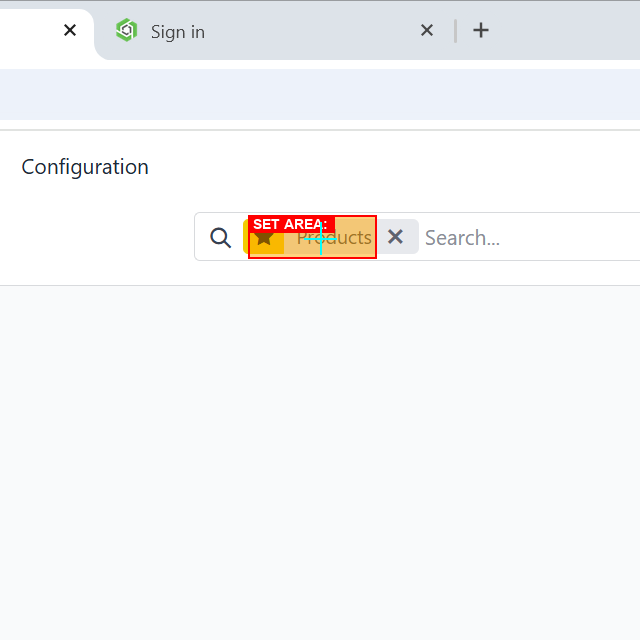

In [37]:
# comment: Automated step generated with pyPeriscope V2 
payload = '''gASVZlMAAAAAAAB9lCiMBGFyZWGUWKQJAABpVkJPUncwS0dnb0FBQUFOU1VoRVVnQUFBSUFBQUFBckNBSUFBQUEvaHhleEFBQUhBa2xFUVZSNG5PMmJmMUNUZFJ6SDN3cFQyZzZaZ00zeFk0Q2tvQmVMQmdndUViRkRUa0lIWGVNc3ZNdVZya0lqUU8zb2NGeUJIRjZtZGxNNHcycEU0T1ZBY0NpWWtEL3dCNGdDQ3FaQXVjRHhZMDVSRVlRSVdQWUhQN2Fod0thT0o0L245ZGUrMytmemZEK2Y1L3QrUHQ5ZnoyM0tvMGVQUUVJY1U0a09ZTEpEQ2tBd3BBQUVZL3F3Y3NyRWVQclhsTlhOdkR3eHZsNGdKaTREcHZZckpzelhDd1E1QkJFTUtRREJrQUlRRENrQXdaQUNFSXhoQXRRWG9xVFRTSkZNVWd3UjREWWk0dkZPaXRGaW1aUVlJRURKajdnSTlPUWc3YmJ4NHBsMDZDM0FiU1RrRFA2TSs5Rkl3UkJCUzBIMDZuWFJ1VXFpL0p2cWFUZncrZy9RazRPMER5QjgyVWdoQVZES3RvZ2tUWm95eFp6RlhSR3lsc2VlYVdJOHA4U2dYd1pvdmY0RFRFUVNXSEdFa2V0akk5Y0xReFo3MEZ0THBHSkJYRUd6MnZoK254NUY4ZmFFK0VMRGttbVVET2lGcWhOMWwxRi9BOVZOS0M5RnZlNzFuaHpZWFFmUEJTNnZ3OFVSN2paZzBKOHU2TkdoT25od3ZSa0F1TjVCcTljMjV5WnNsT1psbGk2UDlhVThiMC9QaTdiZnJ5ZzY1eGwyenhNRWlBdUUrTzc0ZHo2NGpvenJRSjZtSmpBQk9VR0d1ZGNmTzE2d256UzE0Zzg1ZkYyTjVZTUluaURBNTNINEtRWVBERzFwQVpJQ24wZEVvMkVDQUYwOXZRQndhWC9JVG9WZ1J5U2pRTHpuckxMTEp2UzdIVzh4QUtnNzZvNW5wdWZYMUxYM0E2RFJXWjZyd29WQnpqUk5LMzJxVW1tSzlHek5yWDZZbURwNWhXOEswWEZTS1Y2WDJEVFUyaUJWdTFlbktzSVNkNy9OSEt3WTRXVzJjM2pVRjR6OGRZbWxBQUNwS0VRS2dDblltY2l6QmU1VVNWTHlmcE1ydS9vQU0ydDJXRVJDRUV2YjR4TUVzRmlDYTd2Z0VRT1YvcjNqaG9ydjRXTFVHZkpxVFFYQWRuWWNycWo4UVV4ZEVwbis4YXpCSVVtdGxNVi9KWkhEem1kbDlFTHI2V2l2UFhaY2xwRmNjeU5pYnlSblFJUG0zT1NOVXNYTXVmN0NzRmNzMFY1N0xDODZxWDhhWU1CNlFxMlV4WWtramFaRFhucFZGNHVhNzJIUml2V3huamNQaTR2dSsvQUZDK25BUzNaV3dOMVQ4VkZadGJNWEN6NEp0a1N2Nm1LUnRLRU5HRThBQUJaTFVMa1BiM3lNbTNxRVpPR05FMkpqOW41ZmQvT1Z2TDNpYzEzbS91OEZ6QmlxVmNwdE5tY3RtelZzcFpLbFN1VFQvRFp0ai9haUR0VDRjQU1EY2hNMlN0T3ovRGxDTjZDbFlLZFVNWk9yMGNPSHU4d2piVlA4U1FOaXFVdFBsalJTdGIyQTZ3c0E4UGFaU3lrVEYvM0RZdnR3QjNORlZYeTJSczFjRTdVMnlIN1FNcWl2YjBTRG95NURMVHh4WGc4TmpOajdUWGtmcmRiTU1CUmJmNUVvM0ZYTGtTZGJlekpRRko5UVlpNS83WEMvQUJpWU9RNmxGcDZwRWJxeG04OWZhSUN6TUp5ak5TSlIyQ3Y4N1U0VzZCdVN1dXJZeVc3YXNzM1J1bDVHdzVKdUFWdzlYNmJnMmJNRzBwUkNHYm1DR0dzZllPR0pReHZnT2ViWlE2cngzbjByampEY3d4SUFRSFhnc0cxSGhNNjB0OVV1dHQyNUN3WjMvc3dSalpndzU5aWdwRW1wQWx0MVN3bXI1Zk90ZEEybVRqTmdVWFZMcVZERGJaNnpudVlVYnRpR016ZFRjaFA0aFV5L1ZhSDhJSTZkMlVpYmNUWmlqVTFqWDBlakNyRFJNeDRER1Y2R2pnTGxLVTV5elI1N0F3MW51cG5lYlpnd0ErSjJMVzBwUC9qejBXT0hVa3NPelFpSTJyWkJOM3ZHZVlqNmErTzRxTDZoYnpCR3hucVdGVlIxdGZkSFZLdVZmN1dDTnRlQkFkQm9WTFFvNUQyNkJqMWQzU051YVcxdDFpNjJLRFhmc21sVWM2RGlXcDFCa1ZGc3ZkZkVKbWFsYk9iWmRCUi9tMVdwdTVjY1I0QnErVGl0VnpjYUZJenhZTDNoYTQwL0M5SXY2ZlJucyt4b2lacnF0OGdWZ0N2YkRiaDZPRjlycDZydUtNNHUwbDdzV1ZyTmdGcGVxL1hVRGFmUE5nd1g2TjV2dXFQcnBGUTIrc0RRb0x5aktXaFB1WFRYQUM4bTFHMzNkTS96eHh5Q21sQ3RWV0s0WTlkV3pDNUh4QzdVRDhsWS8zL0pBRGp4UHhOY0VVbDJ4c2g5VnZLSGw2Ri9kamlGSlFvWEFBQzhnZ1dPNVpKYzBjYW1VUDRpNitrOWJXVUZSeFFPSER0VWFScFpHdWhVbUozenBhajczV0EydlZkVlZwRFp4L1JBMjczQjYxUy9UeU9xb2xJbHNUR1ZBWUZCOCtoQSs0MHo1N3FYSndvNUFKaHo3RkZTZWxneS8rLzVIYTJkWHFIczh1U1lNdXV3RlI0TU02QzlOdk9JRXU3dmMrazZZWThwUU1QUUNZUWpzcjdCS3NmQjN4V2hLUGtGSDRxaEFsQ1BtNEREcy9mZnMyUEM1Q1VsTzJVZlNEdHhaUGVGZnNDVTVzd1d4UEo1N3NOTFZTWXZLWm54OC9lWnAvTjJYd0xGbk1VTjNiTHR0YnF0cFJvQllCdTRUZFMvWjkrUndvejloU2FtVHI3Q3RQVklENzk2YjlpQXhvbmVzZGtsWFpwOU9udjdyd0NGYXVmc0xYQVlhajh5dlBicmc3SzAvVEl6dCtpbHNIUjFjejUvS2pPdHFnK2dtRE05M29wTTVMTzExbUFBTUtXell0UW5VdVhqMVF3a2JZWFEvVW1YZTVHL0Z6SEhjZUE0RnVyWFJRL3Q5VGppbUdTTUpjQnpoeFRnY2NpUDhnUkRDa0F3cEFBRVF3cEFNS1FBQkVNS1FEQ2tBQVF6Y1FMOGE4b2EzMmp5TVlYOG15cXhrRU1Rd1pBQ0VBd3BBTUg4QjVhSlpLWGJvanJlQUFBQUFFbEZUa1N1UW1DQ5SMDWNsZWFuX3ByZXZpZXeUWNhIAABpVkJPUncwS0dnb0FBQUFOU1VoRVVnQUFBb0FBQUFLQUNBSUFBQUNEcjE1MEFBQTJhVWxFUVZSNG5PM2RlVmhVOWY3QThjOFpCbEFRRUlGVTNGQnhGek8xSk5PVTBtdlpZcHFhV2xuZTByelcxVEx2MWZ2elpqZkxwVElyVzY1cHBsbXBtZGV0TEUwTnl5M0xKYmZjU0EwUVJCWUZCTmxtenUrUFVUWTN3SUVQNFB2MStQVEltVFBuZklkazNweDFqSTgrbmljQUFLQnNHWDlFeFdtUEFRQ0FHNDVGZXdBQUFOeUlDREFBQUFvSU1BQUFDZ2d3QUFBS0NEQUFBQW9JTUFBQUNnZ3dBQUFLRE5NMHRjZFFka3pUdE5uc09YWjdWbFpPUmxaMmVrYW0zZTcwbDIrSWlJamRGTU13VFRGeXB3Q29XRXd4eFRRTUVkTmlXRXhUUk1yeTNkSVVNUnh2ejRaeDRjc3lYRHZLd28wVjRFdWRUVTAvbTVKbWQ4WTN3UkF4VFRFTmZrcUFTc2pSWDhOU0toVTJ4RERGTEdKakhiTTVudUw4b2FBTTNlZ0JGaEdielI1L05qWDlmT1oxTGNVd3hHN1NYcUNTTThXd2lKUGZOVXU2Y1d1YWpvMWpWRlFFK0lLazVITm5VOU5MK215amJQZE5BVkRsbko5NFEwenpPdmVabVNLRzZkaEp6VnRReFVPQTh5U2ZTMDg4ZTY2NHorS1hVT0JHZEgzSFpBM0hlNjhUM3pwSWNBWEVXZEI1ZktwNStGVHpLTjV6RE9vTDNKQ002d2l3SVhibjFsZkV0SnU4RjFVNEJMZ0F2K3JWcXJpN0ZuVnVmdVVFYm1RbGJhaHBPaitXaG1FNFBlb29iUVM0c0p0cWVCZHRSa1BzcFRzU0FPV2NhVXF4Tm9TTkMvOHRsVTRhanN1V2FIREZRWUFMczdxNGVIcFV1Zlo4MTdNRENrRGxZRGhPZ2lxcTB0NWxab2l6ejlCR2FiSnFENkE4cXVIdG1aYWVjWTJaaW4vUmtXbWFwdGd0aG92TmJqdVV1bk5MNnRjTjNWdDE5T25wN2ViTFJmWkFSV1V2WHorODVXa3N1QVlDZkJtdVZwY3FicTRaV2RsWG1zRVFNWXZ6ejl3MFRWTk1pMkV4eENVeUxXSm42cnFqR1h0c09iWmtXMEtzN1ZoTDk5QzJYbmRhclZaVFROTTBMUWE3SllDS3d5aHdOa2g2YXZMNWM4bFZxL2w0ZVBrVW5FdnNaWFdmSGxOTVM3RTJ6S0dFQUYrZW02djFLZ0UyaTdQRmFqZnRGc05paUpHYWxienQ3SGVIc24vSk1zK2JXV0lWdDV5TTdLTVorN0o4MDl0NjNWSTF2ZVo1SThzd0RMdllEVEc0b1JaUVVlUi9RMGcvZDladXM2V2ZPMXNvd0dhcEhmcTlsRUY5S3dnQ2ZIbXVWcGVyUEZyVU84YVpwbDNzTG9aTFJzNzVnK2UyYnorMzdweVJsSFV1MjgzaWJvZ3RKZWVzcDlXcmQ1M0hIbTc2dUl0aDNaSzlmdi9wQXgwOHUvdTZCNGlJS1hhREkvUkFSWkQvRGNGdXMrWCtONDlobUhhN1VZYlhDWm1tYVpUU2JUUGhQQVQ0OHR4Y3IvYWRLZUtQa1dFWUx1SVNjVzd2anZUMTBWa1IyUms1TGpZWFZ4ZTM5T3kwN0p5c0RqZDFmckR4b01iVm14MCtzLytiNDEvK0ZyL2QwNmZhMGZPL3RhM2E5UmJ2YmxXdHhid2lHWUNTYTc4aG1HWUo2bnYyekpuTlA0V0xTSmV1ZC9sVXIxNjhJWEZ2cklxQUFGL2UxUU5jeEVNNVNabW50NXhkRlpHMU45dk1ra3dYcTdobUcxbnBHV2wxUEJvTXZQbXA5amQxRXBGZjRqYTl0K2ZWOU96MG1oNkJraTdKUnRKVytlWlErczdidmU5dDd0VytMSDlsQmxCQ3BYTnNOL25zbVcrL1hpRWlJVGZmVXR3QW8wS284RHM1VDU0ODJiOS8vNGlJaUVzZmlvaUk2TisvZjBKQ1Fna1c2K0p5MWU5TTBYN1lmanV6K1hqVmZka1pOdnQ1c1pzNXlabEpWcnYxNGNaRHB0MzVVZHZxb1pzM2J6NSs0bmpyNnUxR3QzazVwRWFITXhtSjUrM3BodDNGZHM1TU1tSzJaWHlUbnAxU2dwRUR1SktreElRWnIwOCtGUnR6NlVPblltTm12RDQ1TlNXNUpNdmw5MlNVU0lVUDhKZ3hZMzc5OWRlQkF3Y1dhbkJFUk1UQWdRTi8vZlhYVWFOR2FZM05ZcmhrbjhzeFRESEZubTNMNmh6WTQ5K2hiejNjWk1pQlBRY21UZm5QbENsVDVuMHl6ODF3NzFEcmpvbTN2L1Y0ODc5NVdiMXRraTFpMmpKTmUxWkpick16OHVraCtmOGtKU2FJU0ZKaXdzaW5oM3p4NmR4U2VJa3k4Vjh2VHZ6WGk2V3haTURwUHAwN08rTG80YmZmbkZLb3dhZGlZOTUrYzByRTBjT2Z6UG12MXRod0E2cndBWjQrZlhyZHVuVVRFaElHRFJxVTIrQ0lpSWhCZ3dZbEpDVFVyVnYzOWRkZjF4dWRhVmdNc1JqbmM5SUhOUm4ydDVEeDFwU3E3NzczN3VRcFV5S08vakZvMEtDUkkwZCt2Lzc3eVZNbTc5bTFwMWZEZnVNNlRITTNxdHBNbXhoaUZ1OUNKOW0rYmN2SXA0Yzg4ZFF6SDM2OHdQSG5qaTVkUyt0bEFSWFRrTDhPOC9NUFNFMUplV2Y2MU53R240cU5lV2Y2MU5TVUZELy9nTWVlZU1ycEsxWDh3QnMrYTZlY3EvREhnT3ZWcTdkbzBhSkJnd1pGUjBjUEdqUm8wYUpGSWpKbzBLRDQrUGk2ZGVzdVdyU29YcjE2V21NenhDS21tS1pkVEdsY28zbnEyWlNwYjB5T08zVzZmZnYyZmZyMGFkS2tTWFoyOXFsVHB3NGZPblRnd1A3Um8wWjM3QmpxYXJpbDI5TmNURXR4TjM1WHIxcDJSNWV1SFcrL0kzZktveGZmU21yNCtYLzQ4UUxudmF3Q0prMTlxNVNXRERpZG4zL0E4MlBIdnpOOVdtSkMvRHZUcHo0LzlsOGk4czcwcVNuSnlZNkgvUHdEbkw1U3hUTTVPSW1rbkt2d0FaYUxEZTdidDI5OGZQeUFBUU5NMHp4ejVveDZmVVVreTVhUmJXWmJ4YzB3akJ3ekt6czc1OVNwdU5DT29hTkhqN1pZTERhYnpUQ012LzcxcjBGQlFlKzkvMzVtWnJhSTNXN2FYU3dXVThRcy9pbU12bjcrcGZJeWdFckVFZG8zcDA1S1NVNmU4Y1lVRVRtWG1sSjY5UldSSWw2M21KZ1FuNWhZNElTVnVOaFl4MStpSXYvTXpDeHdiejQvUC85U0d5M0tUbVVJc0Z4czhJQUJBNUtTa2tURTE5ZFh2YjRpRXVRVmZDSnJkMVJ5dEdHYWRydTllbldmeG8wYm02WnBHRVoyZHJiVmFyWFpiSGE3M2N2THl6REV4V0lSc1JpR1lSZXhHa1p4YnpYdDV4L3d6WXIvOWJxLzkyVWZIZm4wa1BzZmVqajMwYVRFaEgrUEc1UDc2SmgvVHBqeHh1UXgvNXdRM0xTWjQ2RW5ubm9tTVRIaG14WC9jOHp3MnVzemFseWg3dSsrTlUxRVJyODRYa1MrK0hUdTRVTy9UNXI2MXNpbmh6Z2V2YU5MMTBkTFlaOGVjRDM4L0FPZUgvdXZHVzlNT1plYVlwcW1sN2RQYWRhM3FCOFp2bTNMSnNjNXo1ZGF1T0NUUWxONlBmRFEvYjM3Rm1IZG5DQldybFdTQUl1SXU3dDc3Z0dQY3JMajVUYS9PN3Y1M3puWDh0NlAwZDlsMmJKTnd4dzFlbFJPVm83TlpyTllMSEx4Q0UxMmR2YkZXMStaSW1LWVpnbnVwejc2eGZHT0U2L3loL2F5SW80Y252SEc1TnpaSEY4V211ZlR1Ui9kLzlERGpoM1g3NzQxN2QvanhoUnhKM1pDZlB6SXA0YzRabllzMmRmUC8rcmpBY3FlcTZ1clhMaGJSYW0vVjNCWE8xeEpKUWx3VkZUVW9FR0R6cHc1NCt2cmF4aEdVbEtTNDNpdzdrYncwZlRmV3hoTlJvYU02eEJ3UjgxcXRVL0h4Yi83L2pzUDNQOUFZR0NneFdLeDIrMk9kd0VYaTB1T0xTZkhsblBobDFYandnZXNGRGZDSDM2ODRJdFA1MzZ6NG4vZnJQamZWVEs4K3V2bHpWcTB6SDAwdUdteit4OTZPSGRqMStHT0xsMXpaM2o4eWFmL1BXN005bTFiOGg5Z3ZvclhYcCtSdStRN3VuVDllY3RQQkJqbFNtSkMvRHZUcDUxTFRmSHk5aEdSYzZrcDcweWZWb29id1VYcjcrMTNkR25hdkVYK0tYR3hzWXMrbnk4aTk5N2Z1MW1MbHZrZjhpdmk4U2JTWDc1VmhnQTc2aHNkSFIwUUVKQjdFbGJ1T1ZtS0RkNFp0M1ZGeWtmZGEvUzVLN0NYV0NUSk15a3JLK3YxMTEvdjJMRmp2Mzc5bWpkdi91ZWZmNmFtcHViWWNqdzhQSHhyMUxCSmptUGIxelRNa24zYTRhTlBQUFhvRTArOSs5YTBiMWI4NytqaGc0NDl3NFVjUHZqN0UwODlrMzlLMDZiTkM4MFRuRy9LbFhZK1g1Wi9RRUQrK1Rrc2pmTEdVZC9FaEhodkg1L2NrN0FjRTB0MVIvUTErZmtIRkZxN3U1dTc0eSsxYXRkdTJxekY1WjZFaXEzQ1g0WlVxTDdCd2NIQndjR0xGaTBLQ0Fod05EZ3FLa3ByYkZWZFBSSXpFdWI5UHZPVlgwZnZpZDlSdzdmR3RNbXZEMzU4OE5HalIxNTU1WlZaczJaTm5EaHg0OGFOalJvM21qeHBja2hJNi9OWjZWYXJWVVFzaHVWNkxoOFkvZUw0TWYrY2NQamc3OXUzYlNuMFVGSmlTVzVMSWlLSkpYMWlRbng4eVo0SU9GMmgrdGFxSFZpcmR1RHpZLy9sN2VPVCs1RFRWOHBsU0xpU0NoL2dzV1BIUmtkSCsvdjdPK3JybU9ob3NMKy9mM1IwOU5peFk3WEdaak56M0F4WEg3ZnFFY21IM3RyOTcvL3VmZjFVVHRTZ0FZTmVuZlJheDlzN3JsdTN6ai9BUCt5dXUyclhxbDJ0YnBWVGFkRnVWbmU3YVlvcHBzMFVGOU5tMmt1ODZ1Q216ZndEQWlLT0hITGl5d0VxdWdXZnpFbE1pUGZ5OW5iVTF6SFIwV0F2YisvRWhQZ0ZuOHh4K2txNURBbFhVdUVEUEdQR2pGdHZ2WFh4NHNXNTlYVUlEZzVldkhoeDI3WnRaOHlZb1RVMk42T0t1QnFaY3Q3TDFkdkQ2cmtwZHQyVVgvNng4T0JzLzNwK3o0OTZmdXFVcVpOZm1kS3FaY3QxZjY2Y3NHWGtvVFA3WEExM3gxbUw3bDR1Ym1aVmQ0djdkUTdnMGozQU5mejhMdzN6OW0yYnIzTkZRSVh3eEZQRGc1czBlK0VmLzVkYlg0ZGF0UU5mK01mL0JUVnM5TVJUdzdYR2hodFFoVDhHWEtkT25hKysrdXF5RHdVSEI2OVlzYUkwVmxyRWt5ZHZxOUc5U2tyVlgxM1huN01tMmRQdDFWMXJaSmtaWDBkKytVdmM1Z2NiUGRLbFdmYy9rLzlZK1BPY284bS9aNXRaYnBZcWhvaTFtcVZxWnRXV1p1ZmIvSHU0dTFZdCtwQnl6ejEyK09MVHVRbng4YUdYTzIzcXZnZjdmanIzbzl5VGs3ZHYyN0psMDQ5Rlh4RlFjZFh3OHg4emJzSmxINnBWTy9DZkUvNVR3dVZ5dFE5S3BNSUhXRVVSZjlaY3JXN3RhNFFGZTl5OE8yM2pIdHVtYkpjTXl6a1hYemUvTTFrSmMzOS9Peno2MjFQcEo4L2IwcnpkcXFka3BWaGNMR0pJUFV1emxyNmhqYjFibDJCVXVWZmZpb2gvUU1DVkxoeHluTXo4NmR5UEhHYyszOUdscStNNjRCcCtmaVZZS1FBeHJsbmdraVRhcDdwdnJ3Y2VFcEU2ZFpSdmFZQlNZbkNVL2txT1JaKyswa05ta1Q5K3pHN2FMSWFMaUp4S2k5eWVzdVp3eG03VE1JMHN3ekFzYWRtcDd0WXFib1pibHBsbFZyVTlHaml5VlpVN3pweFBjYlc2MlUyYklaWXlPMzZ6ZmR1V1QrZCtkSlc3YlFDNGl2eHZDS2VqanpuK2NsUGRSbmx6Nkh3NEx4OEpYTjZ4QlZ3U1JwRS8vdE5pdU5oTnUybmFhM25XNyswNS9HaktuaTFudmsybytxYzlKNmVhNldVVG0rbGg4N1I3aFZTNUk4RGU5RngyaHFPK2ptYVhtWWdqaDVxMWFFbDlnWks1OWh1Q1RnZXBiM2xIZ0V2Q01JcnhUOXRpV01TdzJFMjdZUmhOdkcrdTc5SHNRT3IyM2VuaFNkWTRNOU5zYkcxL2E3Vzc2bm8yempkLzZkYjMyMjlXK3ZuNTU5NVY0OXR2Vm03WjlPT1lmMTcrd0JpQWF5clNHNEloWWkvYVRTbXZuMm1LWVNIQTVSKzdvSy9vS3J1Z3hUREVYb0tQNnhXN2FiY1lGaEZKemt6YW1ieWhoclhXemI2ZERjTW95NjNlUys4OVdYcWZsUVJVZXFZcEZrdmVHK25sZDBGZm5KZVR0WkFmQWI2aXF3VlloSjhsQUNKUzZLMGc1VXg4NXZrMDk2cWUzcjZYM2xUTEtPN25mSmR3UElhbEJQZVRSOWtqd0ZmMFoweUN6WDdsVzJFWVlwcEZQaFFNb0RJeXhiU0lVZlQzVUVNTXN6VDNESnVtNCtZYnZLdFhEQlgrUmh5bHg4WGxxdDhjVXl6VUY3aXhHVVl4NmlzaWp2cVdVb05OTVIyZnNsWWFDMGRwSU1CWFpMMTZnQzk4ZGlBTkJtNVVKZDNVTk1SU0dwRTA1THJ1SVkreVI0Q3Z5TTNOOWRvem1XYXA3bEFDVUU2VjRCTkQ4ejNaRU1PcHNUUzU2cmNpSXNCWDVPSHVWcFRaRExhQ2dSdU1JZGQvK29kcEdDTEc5ZTZPTmkra2wvcFdTQVQ0aXFxNHUxb3NSZm9oTS9QOUYwQmxaanIxSUs0cEZybU9DM2F2OCtuUVJvQ3ZwbHJWS2tXZjJSQVJ3N203bFFDVUY2WXBwYkhENjhJbXJISHhxeUkrU1M1czkzSUlyRUlqd0ZkVDNkdWplRTh3VGNNUXgwK3BLYWJqVDZtTURFQXBNOFVVeDQrd1lWejhhTjFTKzNHK3NPRGNTNGpNZkJOei81SjcyTmtvOENncUxBSjhOVllYRjU5cXhXeXdpSWdwcG1tSTRmamovR0VCS0gyR0dPTDRFVGF2NjRTcllybDRVNCs4LytUN2k4SE5meW9aQW53TnZ0NGVGczZ5QWdBNEd3RytCb3ZGRWxERFczc1VBSURLaGdCZm0yZFZkMzlmTCsxUkFBQXFGUUpjSk42ZVZmMnFWOU1lQlFDZzh1RERHSXJoZkVaV1hGS3kzYzUzREFCd3ZRaHc4ZVRZYkluSmFXbnBHZG9EQVFCVWJBUzRKTTVuWmlXY1NjM09zV2tQQkFCUVVSSGdra3ROeXppZm1aV2VrY2xPYVFCQWNSRmdBQUFVY0JZMEFBQUtDREFBQUFvSU1BQUFDZ2d3QUFBS0NEQUFBQW9JTUFBQUNnZ3dBQUFLQ0RBQUFBcXNTYW5aMm1NQUFPQ0d3eFl3QUFBS0NEQUFBQW9JTUFBQUNnZ3dBQUFLQ0RBQUFBb0lNQUFBQ2dnd0FBQUtDREFBQUFvSU1BQUFDZ2d3QUFBS0NEQUFBQW9JTUFBQUNnZ3dBQUFLQ0RBQUFBb0lNQUFBQ2dnd0FBQUtDREFBQUFvSU1BQUFDZ2d3QUFBS0NEQUFBQW9JTUFBQUNnZ3dBQUFLQ0RBQUFBb0lNQUFBQ2dnd0FBQUtDREFBQUFvSU1BQUFDZ2d3QUFBS0NEQUFBQW9JTUFBQUNnZ3dBQUFLQ0RBQUFBb0lNQUFBQ2dnd0FBQUtDREFBQUFvSU1BQUFDZ2d3QUFBS0NEQUFBQW9JTUFBQUNnZ3dBQUFLQ0RBQUFBb0lNQUFBQ3F4aW10cGpBQURnaG1NVnc5QWVBd0FBTnh4MlFRTUFvSUFBQXdDZ2dBQURBS0NBQUFNQW9JQUFBd0NnZ0FBREFLREFNTGtPR0FDQU1zY1dNQUFBQ2dnd0FBQUtDREFBQUFvSU1BQUFDZ2d3QUFBS0NEQUFBQW9JTUFBQUNnZ3dBQUFLckpIUmtkcGpBQURnaHNNV01BQUFDcmdWSlFBQUN0Z0NCZ0JBQVFFR0FFQUJBUVlBUUFFQkJnQkFBUUVHQUVBQkFRWUFRQUVCQmdCQUFRRUdBRUFCQVFZQVFBRUJCZ0JBQVFFR0FFQUJBUVlBUUFFQkJnQkFBUUVHQUVBQkFRWUFRQUVCQmdCQUFRRUdBRUFCQVFZQVFBRUJCZ0JBQVFFR0FFQUJBUVlBUUFFQkJnQkFBUUVHQUVBQkFRWUFRQUVCQmdCQUFRRUdBRUJCaFEyd0xYSE5wR0Z0YmdrTmFubm51SzJTdVduNnJTRjM5djA4Um50WVZ4R3o0TEU3ZzhLbWg2ZHJEd1FBVUE1WW5icTByUGo5YTJhL3MzREZ2aFB4cVJlbmVma05lM3YxaEU1T1hZK2tyaGsvY01ScXQzWlBqQjNlNEVTRWM1Y05BRURwTTB6VGRNNlNNazhzR1BYc3hFMko0dTdWcWt0WWExOFJFVW1QMmJuamNQdUo2MTRQYzg1S0xraFlOZmpPS1RzSHZuOTRZZ2VuTHRkNUl0ZU9telR2YUpjWnk1NEkxQjRLQUtBOGN0SVdzTzNFbk1jSFR0N3YxMm5zbkZsUGhIaTdPR2VwVjVSKzdyUkl2YnJsdUcxL2JQMXk2NGxnSjIvM0F3QXFEK2NFZU5lMFp5ZnY5K3Y5d2VKM3c3eWNza0FBQUNvM1o1eUVsYkJxK3VKRTZUN3ExYUxVOTh5K0JlT0gzZG94TktobGFGQklqMXNIVGYveWFHcit4Nk0rR1JMVWNzaWNTSWxmUDNQd1BYY0d0UXdOdXFYSGZaTTJ4dHNjajI4ZDNUSTA2SjZaRVNJUjAvc0d0UXdOYXZseXVJaUV2eHpVTXJUN0p3Vk93c3FNM0RodVVJK2dscUZCTFVPYkRYajV5Nk5aNGVNdnpwKzdxUEZiQzQ2djBNU1lPWDFEZy9vdWpMSWxycGswTUtobGFORExGeDVLMmJWMDlLRDdtb1dFQnJVTURlbzRjTVFuKzFMeUwrSFp0Wkkzd2lGeklpOHVLbS90RGxsUmEyY083bjFoa0VGM0RCengzbzZMcjFUazR1c2FIUzRwZTVhT0h0REQ4VTNyTW1yaHJnTGZNd0JBeGVPRUxlRE03VnUzMnFSM241N2UxNXh6LzZ5K2crWWZzQVoyR2pqMjFiYitwNCtzV2ZESjBuRzl3N2Rlc3VsOGV2M0x2VDVMdk92eENiUDhFNytiTzJ2bDR2RjN1OHpaT3lGRXBObnd0NmZkR3gvKzBwUzFjdC9ZVjd2N2l3UzJ2dHk2VXNKZjd2enMyaFQzb0xDL1BmTklVOW0vZXVtNHZrKzNhbEt5bDVpMTY3MWhveGZIaUloa2lvaEk1TUsrajgyTWFOTHR1UW4zdFBaTjJEbC8zcHpwdzZKY2xxMStJdkRDQ1BkOU1lS1RmUUVYUmxndDJQK3lpMDFjK2NLUTBXc1QzVnYzbkRBdHJKN0VoQy8vNHN2L1ByZG0wNmoxaXdZSDU5K05mM1Rob0xtcmJucnNtVmxQeWM3RjgrYXNuOWszdGRxdjh4NE1LTm1yQVFDVUIrWjEyL2xhOXdZdG5sMGNmNjM1Y3ZhKzFLVmpneTRUZjBqSk56SGwxNWQ2ZG16UWV0eUt0QXNUSXVjKzNxQkZ3ZGx5RHI5WmNCN3p6eS91YnRIeDdya244NWJ6dzhRRythZGNibDNKUDB3TWFkR3hRWXVKUDF5WXNHVlVpNDROeG0wcE9NcENFMC9PN3RPeHdZT1AzOTF0M09JL012UG0rblBsbTh0T1p1Uzl0TU52OXV6WTRMWTNkMTVwUExtTHlsdTdlWHJKc3cxYWRPdzE5M2orMVo5ZTlHeURGaDA3enp5Y2Z6a05XajgrKzQrOGI5bUt2M2RzMEtMUG13ZE5BRURGNVlSZDBNbXBxU0orTjExK0l5OVA1dm92RmlUSVBSTW1GTmpXOWVvdzRZVnVZdHU0SWp3ci84eGg0L0xONXRMMDNuc0N4WFlpNmxSUmgzVFpkWG1IUGZQMzVrVmRRZ0ZIWXp0Tm0vWklJN2U4S2ZVZkhOc24wRDMzUzVlbTdkdUtwS1ltRjJPaFJ6NmR1MFBxUC9udVg0UHlUdzBZT09xNStoSzE2b2NEK1NjKzllOWhqWEsvOHJxblp6ZVJtS2pvWXIwR0FFRDU0clRyZ0ROdElsYzkrZm5BanAwaUhjTGF1eFdhN3Q2NlRTdlp1UFczdzNKZnlNVnBRZTFiRkpqTjI3dWF5SkdqZjRvMGtxS0lPSGhFcEduNzFvWFdGUmpjVk9SUWtaWlFVS2V3anBkTXkwdzg4RXY0ZCt1UEhEaXlZMzlrUXZ3WkVUa2VFU2xoOVl1MnlJUkR1eUxGL2RFN2dncy8wTFI5UjVHdjl1OVBrRllYZjZmcDFMcHAvam5jUGR4RjVFQmtqRWc1UGc4Y0FIQlZUdGdDRG03YVZHVGYvb1BYbU8yS0c4cDFnb0pGTWxQem4xYms1bjU5dnhpY1BoVWowakM0em5VdEpFL3pab1V5bWJKOWVwY085OTMzek13RnY4VjROKzN3eU44bkRXdFh6R1U2cnFTcTdYZnBJOEVObW9xa3BPUy9ZVlpwWDlZRkFDaHpUdGdDcnRlMmpic3NYYm4reU5pQ0cycUZ1WXRJNHVrRWtVSU5Ua2lJRndtb2RhMWQyTVdXbVpJdTR1SHNwWXFJYmNmMFVVdWptb3hZditqSjRJdTdvY04va3ptN2lyTVFGM0VYaVloTnZIUXJOajQyVnFUOU5YZnBBd0FxTkdkY2h0UnU4TmptRWpYM3RUbkhyalpYNjlZZFJIYUU3OHdxTkQxejU5YXRJdTFiQkRsaEpCY0Z0Mmdxc25QbnZvSlRiVHZDQzF3RDVPWGpKWExzUkZUK2FaRW5Ec2kxbkR5eU5WV0M3LzlMY041QjRNVFRjUVhuc2JyTDFkVUphZThsbVp1MlhISWZ6U00vYkVxVitrR3RTdU5YQndCQXVlR1VEMk1JSERaOVZDczVNdm5oWWRNTFg2Q2FGYlg4NWNtYlJFUUM3aHZjMjB2V1RKNGNubitXMUIyVDM5NG8vdjJHZHk5OGJQaDYxT3Y1WUR0SlhmRFd3b2g4MTlSR2ZEcHpRWUhSTld2ZlVXVC9tcFY1dnpla3JubHZYaEh2TEIwVm5YZk5jVXI0ek1uYkN6N2NJQ2hZSkRubDNKVVhFRExzbWFZU09YLzBKeWZ5VDQxZlBQUDlTT24wVlA5TGpnMERBQ29WSjUyRTFXandvbzhUK281WStQNWpQZDczRFFucjN2QW1FVW1QMmZyVGpxaFV2MkdMUkVURW85T3IweDdjT21yVjBEdjNkUm80ZUVoYi85Tkgxbno1K2NZRDZVMG5yQnpienJtSE9XdjFlMlBzcXU3VFozYnZ2blhZTS8zYWU4U0VMLy9peXhNOWg5eDNaTUhxM0puYzd1bi9vUGY2VmRNZkhuajA3MFB2OVUvOGJ1NnM4QlpoWWJJMi9DcExGcEg2M1I1cFBYUHk0akhkMDBmOFBjenY5TmF2WjYrUzF1MWthLzVkMEhXYWR2S1NCWE1uanFzMW9sUDgzb3plb3g2NTVPU3NlazlNbXZERGtNblRCelpiMDNQc1kySDFKQ1o4MWRJdnQ4WjRQemhqVnYvTEhCc0dBRlFtVGpzTDJydmpxUFUvOTFzemUrWjd5M2FHZjdWUFJNVExyMVhZcUhraisrV2VHT3dkOW4rYlYzZWFQbW5XbDR1bmovaFV4TjJyVmMreHk4YjFhK2ZyckZIa0NmN3J4NXZxekJ3eGFkV2NTVHZtdUh1MTZ2bk1zcG45a2ljdlhKQnZIdmN1LzdkaHB0dVRMNjlhT2YzbGxlNWVyZnBNMmpEQjdiVlZhNisxN01CaGMrZkloTW5UVjg4Y3Zjck4rK1lIMy9odXJQczdvUVVDN05KaDdPeFJwOGZOK25MUytDKzl1cjA3NkhLTGNRa2E5dW5xOWw5TmYrbWpyWlBIcnhVUjkwWWRocjM5L3RpZWdkZmFmdzBBcVBDYzkybElGVURpbDBQdkcvZDd2MlhieHhiM25HVUFBSnpMS2NlQUs0ajBmZUU3UkRxR3ROSWVDQUFBTjB5QWJhbHJKcjI1eHViVnUwOFlPM2dCQU9xY2RneTRuTms2N282WlVaM2F0R3ZmcWJXdm5ENFN2bUxaMmwxeEV0Qi94cXRoemp6ZEdnQ0FrcW1zeDRBVHc5OTdjL3FxblFkT3BvcUl1SGdGdE80MGZPUXpRN3B3ZmhNQW9GeW9yQUVHQUtCY3UyR09BUU1BVUo0UVlBQUFGQkJnQUFBVUVHQUFBQlFRWUFBQUZCQmdBQUFVRUdBQUFCUVFZQUFBRkJCZ0FBQVVFR0FBQUJRUVlBQUFGQkJnQUFBVUVHQUFBQlFRWUFBQUZCQmdBQUFVRUdBQUFCUVFZQUFBRkJCZ0FBQVVFR0FBQUJRUVlBQUFGQkJnQUFBVUVHQUFBQlFRWUFBQUZCQmdBQUFVRUdBQUFCUVFZQUFBRkJCZ0FBQVVFR0FBQUJRUVlBQUFGQkJnQUFBVUVHQUFBQlFRWUFBQUZGaTFCNEJLSmVuTTJkVFV0TXlzTE5NMHRjY0NBT1dhd1JzbG5DTHQvUG1FK0NRM045ZnFQdDVWcXJnYmhxRTlJZ0FvMTlnQ2huTWt4Q2U1V0MyMWE5MmtQUkFBcUJnSU1Kd2c2Y3haTnpkWDZnc0FSY2RKV0hDQzFOUzA2ajdlMnFNQWdJcUVBTU1KTXJPeXFsUngxeDRGQUZRa0JCaE9ZSm9tWjEwQlFMRndEQmlWbVQxOTUvbm9xZmIwTFlidFZCbXQwVm8vdmZidXNsa1hyc1F3REt1THBVb1ZkMCtQS3RwakFhNklBS1BTeWtuNTRmeXhRV0xhRFh0Q21hM1VraE5aWnV2Q2xaaW1tWjFqeXo2WG5wR1I2ZU5UemVyaW9qMGk0RExZQlkzS3lYNSs1L2xqZzhTZVVKYjFSWG1UbldOTFRqNm5QUXJnOGdnd0txZjBxS2xpMmczVHJqMFFLTXZPc2FXbFoyaVBBcmdNQW96S3lVemZiR0hiRnlJaWtwR1JxVDBFNERJSU1Db253eGJIVFZiaGtHTmpSd2pLSXdJTW9KTGpqdmNvbndnd1VOamhiK1hIVk8xQkFLanN1QXdKNVVMV3FjTTdmbzg2Y2VDNE5Hb2VXS3R1KzVDR1htNUtRemt0SXlmSzNuNFNQMTVwQUFCdURBUVl1ckppZnZoMHlvZmY3VWpLbmZLZGlJaUxhOU1lejAxN3ZrdGdtV2Y0eDAva0Z4RlpLclAvS3NQNWRBa0FwWVpkME5CamkxczdjVVRmMS9MWE4vZWg3Q05yM3U3N3lNdXJqcGZ0a0U3THBLVVgvanJoazdKZGRhazZ1ZnFGZ1UrL3NDeFdleHpYa0xSOXlXYy9YSG1RdHRoTm55NzVOYkVNQjZRZ2JzUGNXZFBuYm83UkhnZktBRnZBMEpLMmRlcllsemVuaVlqVUNIbHk1T0QrdHpmenF5cGl5MG85dnV1TGorY3YvT1YwVnZLK0tjTmZQRGY3cmNFTnkyaE1GelovUlVRa285UTNnbU5YL3VPbGVWRjVYN3Q2MWU5MDcwTlA5bTdqZTBQZXVDbHArNEtaSzA5a3lJazUxc2VIM1ZtNzhNTzIyRzJ6UDFzZGxTR1JDMlRra0Z2OW5MVFc3SVI5UDIzNytlaXA1UE8yM0duMTd4b3g0R1luTFIrNE1yYUFvU04xemR0amZrZ1RrYUFISjZ6NzhwVVJkelh6cXlvaUlpNXVYc0doSTZiTldqM2p3YVl1SXJiak0xOWJXa1piQS9rMmZ4M0tZaVBZcjkzd1VjUEdqeG8yL0tITzdhdkgvTGhrNXRBSnE2TnQxMzZlbnNoMTB5Wk4vTmJaRzlOWjBYdCtqczRRRWNuNFk4MW5jMzRxdUh4YjdMYlpuNjJNeWhBUk9SKzk3ZGZvSEtlc05HMy9zamxMMSs0OW1lYnUyeWlvZnFPZytvMkMvSDJxdXJCZGdyTEJ2elJvc08zNzZLTmRJdUxWOVo5em5tL3ZkYmxadk5vKytjSExad1pPM0pSNGZPSE1kUTlPNjFFS1I0T3pKQzVWRHUyV3d4R3lKMHEyYjVYREJSL1BXQ3AxZjVmZXphVFpMZElzU05vR1NzM3F6aDZEUjRQMm5UcldGSkZPSFhzTmZESjYyYVRubGl6L2ZPdGZ4bmR4ZGZhYW5DVmgvMitScVUyZHZWUzN1bUhQRGJXK1AyOTFYSTVJeGg5cjVzM01IRHFxUjIwUkVWdnNwZ3ZUUmNRYUdIWngrblU3dUg3YnNVeXZKZy8wNlIzczRaUUZBc1hDRmpBMDdQdDViYktJTkh0bVpPaGw2K3ZnMVhuNHFOdEVSRFp1K0NuTDJVT1kwRk84T2tsd1Q3bC92THo0c1N4WUs0Y3ZkK2xSOHUreVlMbE1tQ2o5aGtod2QvSHFJUDIrZGZaUThxbmIrLzZ1SXZ1Ty9GR0s2eWkzWEdwM2VXN29mVFVkV3dVNU1lSHpacTZMTGIzNmlzVEZKTmpFdThHdDFCZEsyQUtHZ2hPNzk2V0tTTWlkWVFGWG45RXpyRnU3bDMvWkpUdjM3WkR1blp3NmhuOU9rRS9IU0hKeG45WlNKdmQwNmpnS2NSRVJTY3ZJRWhINWRjNURiMFVPZlhOVXpkVXozOXNVbXhiWTU2TTM3NnNwSXJhVVEycy9uNzlxNzZHek9TTGlXYjEraHdjZkhkNnJzV2ZlVXJManRpNzVZTW1tdmFkeXhNWGE4TlpIWDN5b3dFcDJ6bno2MWFpTFM3dGcxOXNEUDR3YzhPcmJmUy9tcmRCYWFqVis5UGwvMVZ6MTlLdGJSVVJreVVzUExSR1Iya1BmZXJWM0haSDRYZk0rV0w3K2o5aTBiSkVxL20wR2pKelVxMzZKWG43dExzOE5sUXZGellrSm4vZWZueVhqZkduVTk2THN0RFQ3MWJkRWJLZDNyVis5SXpJeHpTWWkxdXIxTy9mcTJhRm0zbEg2NUNQYjFtNDVGSk9TbVdNWHNYb0V0dXpjKys1R0YvOWZ4RzJZdTN5M3RCNDh0RlhjeXE4M25FaVhvRzVqK3pTLzNCUGRmVnIrWmRqZGRmSldheit6Kzd2dmZ6NTJKaTFIeE5XclVlZGVmZHY2T3ZtMVF4c0Job0tZazlFaUlnRysxenlUeHExWm95RFpkY0tXbG5wZXBLb3p4K0J6cHh5WUllM0hTRnpSbnhNaU96NldacVY2aHRTK3ZUdEUyalFPeXAyd2MrNU1qenRIelI4UmNHR1h0QzEyNWNSWDV2MGhkVU1mZU9FMmYzYzVlL0M3dFNzWFROMGJNZkw5VWUwYzcvdlJ5NlkrdHlUU3Qwblk4QUhCTmVUc3dlK1d2ekE1eDAya0dPZVQyV0pYVG5ocDNnbnJ4YlZreGYzeWZYU1MzSDd2c1BFZC9sd3g4L3N6b2YySDNsWmRwR3BkUDVIRThJblBmM0d3VnVlaGY3dS9obVRGL2ZMOWt1TUpJaVVLc0JSdWNNWjV4OVRTcUcvTkZrRmV1L2NlWDcxazErQ0gyOTEwaFYzK01Sc1dMOXliNnU3WHNFT0hXbFhPbkR4NE9ITGo0c1hKL1I2OTBNcll6VXRXNzArdTV0K2lYYnVhbnVrbjkrdy91dmY3aFpZK3c4THkvVzRqT1pIZmY3MzVSTHFJaU0zeHkwVDZ3YStYcm81SWw2cStUZHExcStOcFM0NDlkaXc5L3g2WXRJUExsdTQrVSt1VzI1cDdub3ZjdmYva3NmQ2x5MXlIOUczbDd0VHZBSlFSWUZRSWJ1NmxjQWpZNTA3Wk9VdnVHQ0YvRm1YbWpySmhabW5XTnpzOStyZmw3OC9jbk9ZVk5yaUg5OFdwc1g4RWp2M2lycndkQlhFclA1ejNoMXZYRjZlOWNPdUZIYWVoblhyMldEYnB1U1h6dndock56eEU1T1RxdDVaRStuYks2M0ZvcDd2YXozNXg0Zy9GR011aCtWUG5uZkRJdnhicDFFVkVSRHFHTm5IZE52UDd6UHB0UWp0ZHlHSGN1azE3YmJVZmUvN0pYdlV1ek5rck83dGszNE1MWEdwM2VmYUJrNU9XLzNieFZDdHJxd2RHT24zYlZ5UXdyRmZueEJXYlQvNnk0TVA5OWR2ZGZuZG9FNzlDR1Q2OGRzbmU5TUN1Z3dlM2Mvd2Z1VGswZFAvQ1R6YnYzdkJMaHlHMytZaUl1Tlh2MU8vdWp2Nk9kOUlPYmV1cy92amJnL3QvT3hqV3MwWHVRdXduOXgzejZqendrZERhRi9LWjlzdTNxeVBTcmZVNkQrdlgrdUsyY3J1Nzg2ODM1Zmcrbjg1L0crWjQ5T2JReGh2K3Uvem9zVDBITWx1MW84Q1ZDY2VBb1NDd1RsMFJrZmd6MTd5a00rdndzUk1pVXMzWHIzVEs1OU5CdHN5U0J0ZWNyZlRxRzdYOG1ZRlBQelR3NlljZUgvWGNXK0YvM0JUMjBwdVBOcyszb2c1dG11ZWJPM0xkaGxocGN0K1R0eFk0YkZtMzkvMWRYZEsvL1dtdmlFUnYrZm00Tk83L2FMdDhlNlJkMjl3YlZyZm9RN0x0K3U2SGRNKzdScjV3YTVFT2p0YW83aU1TdTJWYlpHNTFYVjJ2N3d3eVcreW1ENzcrTGQrSnpqa0h2djV3WFNsY3hHenhEUjB3ZE9oZm10L2ttaDY1WThPOER4Y3MyNVdRYjdXWk8zWWZ6L0Z1MGEyZGQ5NDB6OWEzQkxsSTRzbGpqczkzcUgxYno0djFGUkd4MUErc0laS1RWZURqRDgrbCs0WDF5YTJ2U056UCt4TEVXcjluMzlhZWNpVytiZS9LOTJoUTYwYlZSTkpTS3ZrbDBEY2V0b0NoSU9pV0VLL1BvbFAzL1JRZWYyKy9xeDBHVGd2ZnVFdEU1TGFRa0ZJYmpFOEgrZCt6MHVHRHE4M3pZZWx0Ky9xMUcvNW8reG9pSXVMUm9GMmJPb1hTVmJ0ZW5meGZKc1FuU3MxT0xRb2ZESFNwM1NoUWZveUtqWk0yY2FkaXhlOHZMUXJ0M0xlNEZTT0pwMklqYlJMU3RIRVJaM2Z0Tk9EWm4vNzhZTm1rL3QvVzd2cGduLzY5MnRXdFV2U1ZYYUxnV1ZkVnFqcU9BZWZFaE0rYkthVndERmpFcjFXM0lhMjZuTjYxZnZYUHg0Lzl1UFQ5WTUySDltM3RZeEdSeUpQeElqbjdGNzY5LzVJbnBTZkZpVGpHa24zbTJLRkRCeVBPSko2TlMwN0x6TXdXa1pTazJJdVBpb2pVYXRnaTMxUFBuenlaSWhMVXFNVlZObitxMVd4YW84QUVxMFVrSlRWT0pQQTZYaW5LR3dJTURXMjdQMXpydS9tbkRrOS9hMzNQYWQydmRDSjA2dWJaTTM4UkVjOSs5NGVXNm5CT1JGMXJodEo3NTh1OURPa0tYRXV3bDZyS2RXNkJpb2k0VnlueU1seHE5NWd3bzl2SjdWOSs5czEzLy92d3gvOTU5M2ordFdlTHR2VmMyS1huUE44bG0vS2RrMVZLRFJaeHVhbGR6NkZ0ei95OFpPbm1xTTFMZmd3WUZsWlRKRE16UjZSR2syNGgvcGZNN3g1WVhVUWs3ZURhQmQ4ZlQ3T0x0WnB2b0g5TnYrQTZjbXpid1VKM2R2UDJMZkQvOTJ4NnBvaVA5MVhQcUxMd3pueERZQmMwVkRSODlKbFFMeEg1NWNPQlUzOU92ZHg5SjFKL20vL3NLNXNTUmZ6dWV2YVp0cVU3bXNNSHJqSERub2pTSFVDUitRZjRTZHloZzJjS1RiYkZIb3NSenlZTmFvcDRlbnJJeWNnL01nck9rSkdXWHVncE1USFIrYjg4R1J1WiszZFBEeStSSFFjT0ZXdGtyblU2UGpiKzFTOCtHTnM3TUdYZE8xL3NMTUc5UkM1N3hkRmxyMDBxSlJiZjBBRjNONmtxeWNlT3hvaUlXSzBXa1J6Myt1MXU3bEQ0VC9QQXFpTDJvMnZYSDArcjFuekFjeU9lSC9iSWdENjk3dXR5YytDVmR5dGZZQlVSU1V0UEthMVhnWXFEQUVPSFY5ZG5YK2xSWFVRUzE3M1I0NUdYWi8xd09ORnh2cXN0S3pYaTUxbmpSOXczWnRVUm00aEk0bS9iOXAwcjNjSHN1ZFpsdDN0T2xPNEFpcXorSFYzODVlanErYjhXNkduMHltOSt0SGwwdmIyNWlEUnZFeUt5YjhXcWZKV3lwYXo3NnZ2OEozdlg4UE1XMng4SDg3M3E0eHMzNWQxMXUzckh1OXRLMmc5TFZsNTV4OER4MlBpOEwvS2ZjbFc5ZVk5YmE0c3RJYW00bitlWUZSMmVWOThxamUvSnQ2WHJVcnZMYzBONzEzUHMxODZKQ1o4M2M0MlQ3b1IxS1l0bnRid3QvOENiZkVWU1RoMDdmNFdaNCtJU2M4UW5xRVg5dktla1hQS2J6aVVDYXQ1a2xaellrNUhYbWhHVkhqczZvTVd6MDcvZW14TXc4ZG1GeDdPUzlzMS83Vi96TDUybFR0MmdVOUVua2phTmVWSm16SCtoVTdYU0dVaVU3TW4zVmMyMk11UGZVbXU3akp3aGh5OXV4aDB1TDF2QTByRC82S0cvdlRUdnJURi9oRDdRUC9jeXBLTXBEUWU4T3J5bGlJamNldi9Rb08zemxyMzBYRlNmL3JmN3UyY2tiRnY5ZFdTRGRuVmxWOTVDdXZWcytPMVhTLy96VXZxZys5dFV6NHJidHZyejdOcnRKZUhpcmxPUHJuOGZ1ZXY1RCtlTkg3T3pSODllVGF1TG5JMzRhWFA2WDE0ZDNrNUVhamVxSno5dVhUR3Z4ZmtXS1RHcHQvWnBzMzNxbUczK0ErNXRYN09LeU5tRG4zOGRLMjJmNkZTOW1DL01yZTdOb1hWL1hIa2lRNm8wdnVlU2UwRzcxTDU5K09QaXVCdGwxYnEzMzFyWEdlOWNoMVl2T1JOeXorMzE4NTFpbFJOMThGaUtXQnZWREJRUjhXN1IyUGZueElTZlYrOFB5VHRkV1hLaU5tOCsxN25ieGNPNmFlZFNSQzdzWTA3YjgrT09hNThvMWVTV1p0dU9IamkwZG4yVG9kM3I4Qlo4SStQL1BoUjVoano5MXZwN044MTY0NHVsKzA0WHVOZFYxYnI5UnI3d3pEME41ZmY1ejQ1WmRTUnAwNWpIWmNabnBkUGc0eGZ2UUJra1gweVhCNE11L0gxSEgvbHhzVHcxVStKRTVMRDhLZGMrV2Jvc3VOVHVQWGxxdzY4V3p0N3c5ZHMvNTRoWVBSdTNHVHErZisrMnVTZXoxZTQ5ZVdyTnp6NytmT1B5dDM4VlY2LzZuZnI4NDdXYkQvMTdhMTZBcFU3UDExN0tlVy9XMTk4dW1QT3RpN1ZobCtHemg4bjhSL2ZsSGJ2MGJQZkNtMk9ielYveTFjYXZwcTBSY2ZXbzI3amowQVlYbHovcTBZTnZmTGx5OXB5VlZVSmU2Q1kxbW9jMDNoTCsrZXhkMlNLdVhyWGIzemZxMWY1dHJya2o5bEkxT2c0WkpVdFdwM1Y1L05KUFlwQUxEYzc1ZkZPVit3YzQ2Wk1ZY3RKTzdsa3lkNCsxbW0rZ3Y1ZFZKQ2MxTGpJeFUxenIzTjI5aVdNT3Y5dTczWEprK2U2b3pmK2RjNmhGOHlZMTNWSWpEeDg5bHBoWi82N09JaUsxbXpUeTNyLzcySWIvTG8yN3BaRkgycDlIZjQ4VW54cVNlT21uZXhWVXYzdlBXMDR1MzczdjYvZi85Ry9TdEVsTngzWEE5dGJESG1oK2pXYzZ4RzZiczJSUHN2Zk5nNGZlSGlpWis1WXZYQnNwamJvUDd0dkt2ZUJES084TTB6UzF4NEFLNy9EUlk4MmFOTHF1UldTbEpjWkhIejU4V21vMWJWYmYxNjlhM21XL3Fmdm1QK3ZZSGUzVHBlZ05QcmZUS09LYTQxWko2d1V5K2Q4eXZPMWxCeWFyM3BjeGEyWGhXcm10YUFzOFY0K3JSY3FkV2pmVnVIUmk4cCs3Tm04NWVDd3BOVE5iUk1UcTdsV2pVZXQ3N3I2NXdFMDU3Q2xId3plc1B4aVg1cGlubW0vRDluZmYxKzdpcFVkcHh6Wjh2WGxmWEhxT1hhelY2M2Q5b0pkc25MVWh5dXVXZ1kvZVhWdnk3b1QxVk9mQ09iU25ITjN5NDhZOUo1TXZyanJ3dHU0RE90Uzh3bFBpTnN4ZHZqdWx6dDB2UEhDTEVPREtnd0REQ1p3UTRLc3FRWU9MSG1Dbkk4RGwwR1VERE9qaUpDeFVBRjRoVDM3ZytIVEM1RTFqSG45N2F5bWZrd1VBWllBQW8yTEliYkJmKzl0RFN1bHNMQUFvUTV5RWhRckRLK1RKRCtiZkszVnFYdVVURElGTEdZYmE4UWpnS3RnQ1JrWGlWZVQ2bWk1WHVic1ViaXhXRjk3b1VCN3g3eEtWazZWYW1Hbmg4MU1oSWxLbENwOGhoUEtJQUtOeXFobzRWZ3hYMCtDZDkwYm5hblh4OUxpZVQ0Y0FTZ3NCUnVWazhXaGZ0ZEVpc1ZRM0xiNGNBTHhodVZwZGZIdzRady9sRkFGR3BXWDF2c3V6MldyRHM2dTlESThIMjYzMXkyeGR1QkxETUZ5dExsN1ZQUHhxK0ZoZFN1bURKSUhyeFZuUXFNd3NWZHRYYTdxOGpGZnFmZTFaQUlBdFlEaURZWEJMTlFBb0hnSU1KM0IzYzh2SXlOUWVCUUJVSkFRWVR1RGw1WGsybVE4WUI0QmlJTUJ3Z2hxKzFiT3lzcU5qWXE4OUt3QkFSQWd3bk1VL29JWXR4eDU3NnZUNTh4a2NEd2FBYStMY0dUaFQwcG16cWFscG1WbFovTHNDZ0tzandBQUFLR0FYTkFBQUNnZ3dBQUFLQ0RBQUFBb0lNQUFBQ2dnd0FBQUtDREFBQUFvSU1BQUFDZ2d3QUFBS0NEQUFBQW9JTUFBQUNnZ3dBQUFLQ0RBQUFBb0lNQUFBQ2dnd0FBQUtDREFBQUFvSU1BQUFDZ2d3QUFBS0NEQUFBQW9JTUFBQUNnZ3dBQUFLQ0RBQUFBb0lNQUFBQ2dnd0FBQUtySWVQSHRNZUF3QUFOeHdqTXl0YmV3d0FBTnh3MkFVTkFJQUNBZ3dBZ0FJQ0RBQ0FBZ0lNQUlBQ0Fnd0FnQUlDREFDQUFnSU1BSUFDQWd3QWdBSUNEQUNBQWdJTUFJQUNBZ3dBZ0FJQ0RBQ0FBZ0lNQUlBQ0Fnd0FnQUlDREFDQUFnSU1BSUFDQWd3QWdBSUNEQUNBQWdJTUFJQUNBZ3dBZ0FJQ0RBQ0FBZ0lNQUlBQ0Fnd0FnQUlDREFDQUFnSU1BSUFDQWd3QWdBSUNEQUNBQWdJTUFJQUNBZ3dBZ0FJQ0RBQ0FBZ0lNQUlBQ0Fnd0FnQUlDREFDQUFnSU1BSUFDQWd3QWdBSUNEQUNBQWdJTUFJQUNBZ3dBZ0FJQ0RBQ0FBZ0lNQUlBQ0Fnd0FnQUlDREFDQUFnSU1BSUFDQWd3QWdBSUNEQUNBQWdJTUFJQUNBZ3dBZ0FJQ0RBQ0FBZ0lNQUlBQ0Fnd0FnQUlDREFDQUFnSU1BSUFDQWd3QWdBSUNEQUNBQWdJTUFJQUNBZ3dBZ0FJQ0RBQ0FBZ0lNQUlBQ0Fnd0FnQUlDREFDQUFnSU1BSUFDQWd3QWdBSUNEQUNBQWdJTUFJQUNBZ3dBZ0FJQ0RBQ0FBZ0lNQUlBQ0Fnd0FnQUlDREFDQUFnSU1BSUFDQWd3QWdBSUNEQUNBQWdJTUFJQUNBZ3dBZ0FJQ0RBQ0FBZ0lNQUlBQ0Fnd0FnQUlDREFDQUFnSU1BSUFDQWd3QWdBSUNEQUNBQWdJTUFJQUNBZ3dBZ0FJQ0RBQ0FBZ0lNQUlBQ0Fnd0FnQUlDREFDQUFnSU1BSUFDQWd3QWdBSUNEQUNBQWdJTUFJQUNBZ3dBZ0FJQ0RBQ0FBZ0lNQUlBQ0Fnd0FnQUlDREFDQUFnSU1BSUFDQWd3QWdBSUNEQUNBQWdJTUFJQUNBZ3dBZ0FJQ0RBQ0FBZ0lNQUlBQ0Fnd0FnQUlDREFDQUFnSU1BSUFDQWd3QWdBSUNEQUNBQWdJTUFJQUNBZ3dBZ0FJQ0RBQ0FBZ0lNQUlBQ0Fnd0FnQUlDREFDQUFnSU1BSUFDQWd3QWdBSUNEQUNBQWdJTUFJQUNBZ3dBZ0FJQ0RBQ0FBZ0lNQUlBQ0Fnd0FnQUlDREFDQUFnSU1BSUFDQWd3QWdBSUNEQUNBQWdJTUFJQUNBZ3dBZ0FJQ0RBQ0FBZ0lNQUlBQ0Fnd0FnQUlDREFDQUFnSU1BSUFDQWd3QWdBSUNEQUNBQWdJTUFJQUNBZ3dBZ0FJQ0RBQ0FBZ0lNQUlBQ0Fnd0FnQUlDREFDQUFnSU1BSUFDQWd3QWdBSUNEQUNBQWdJTUFJQUNBZ3dBZ0FJQ0RBQ0FBZ0lNQUlBQ0Fnd0FnQUlDREFDQUFnSU1BSUFDQWd3QWdBSUNEQUNBQWdJTUFJQUNBZ3dBZ0FJQ0RBQ0FBZ0lNQUlBQ0Fnd0FnQUlDREFDQUFnSU1BSUFDQWd3QWdBSUNEQUNBQWdJTUFJQUNBZ3dBZ0FJQ0RBQ0FBZ0lNQUlBQ0Fnd0FnQUlDREFDQUFnSU1BSUFDQWd3QWdBSUNEQUNBQWdJTUFJQUNBZ3dBZ0FJQ0RBQ0FBZ0lNQUlBQ0Fnd0FnQUlDREFDQUFnSU1BSUFDQWd3QWdBSUNEQUNBQWdJTUFJQUNBZ3dBZ0FJQ0RBQ0FBZ0lNQUlBQ0Fnd0FnQUlDREFDQUFnSU1BSUFDQWd3QWdBSUNEQUNBQWdJTUFJQUNBZ3dBZ0FJQ0RBQ0FBZ0lNQUlBQ0Fnd0FnQUlDREFDQUFnSU1BSUFDQWd3QWdBSUNEQUNBQWdJTUFJQUNBZ3dBZ0FJQ0RBQ0FBZ0lNQUlBQ0Fnd0FnQUlDREFDQUFnSU1BSUFDQWd3QWdBSUNEQUNBQWdJTUFJQUNBZ3dBZ0FJQ0RBQ0FBZ0lNQUlBQ0Fnd0FnQUlDREFDQUFnSU1BSUFDQWd3QWdBSUNEQUNBQWdJTUFJQUNBZ3dBZ0FJQ0RBQ0FBZ0lNQUlBQ0Fnd0FnQUlDREFDQUFnSU1BSUFDQWd3QWdBSUNEQUNBQWdJTUFJQUNBZ3dBZ0FJQ0RBQ0FBZ0lNQUlBQ0Fnd0FnQUlDREFDQUFnSU1BSUFDQWd3QWdBSUNEQUNBQWdJTUFJQUNBZ3dBZ0FJQ0RBQ0FBZ0lNQUlBQ0Fnd0FnQUlDREFDQUFnSU1BSUFDQWd3QWdBSUNEQUNBQWdJTUFJQUNBZ3dBZ0FJQ0RBQ0FBZ0lNQUlBQ0Fnd0FnQUlDREFDQUFnSU1BSUFDQWd3QWdBSUNEQUNBQWdJTUFJQUNBZ3dBZ0FJQ0RBQ0FBZ0lNQUlBQ0Fnd0FnQUlDREFDQUFnSU1BSUFDQWd3QWdBSUNEQUNBQWdJTUFJQUNBZ3dBZ0FJQ0RBQ0FBZ0lNQUlBQ0Fnd0FnQUlDREFDQUFnSU1BSUFDQWd3QWdBSUNEQUNBQWdJTUFJQUNBZ3dBZ0FJQ0RBQ0FBZ0lNQUlBQ0Fnd0FnQUlDREFDQUFnSU1BSUFDQWd3QWdBSUNEQUNBQWdJTUFJQUNBZ3dBZ0FJQ0RBQ0FBZ0lNQUlBQ0Fnd0FnQUlDREFDQUFnSU1BSUFDQWd3QWdBSUNEQUNBQWdJTUFJQUNBZ3dBZ0FJQ0RBQ0FBZ0lNQUlBQ0Fnd0FnQUlDREFDQUFnSU1BSUFDQWd3QWdBSUNEQUNBQWdJTUFJQUNBZ3dBZ0FJQ0RBQ0FBZ0lNQUlBQ0Fnd0FnQUlDREFDQUFnSU1BSUFDQWd3QWdBSUNEQUNBQWdJTUFJQUNBZ3dBZ0FJQ0RBQ0FBZ0lNQUlBQ0Fnd0FnQUlDREFDQUFnSU1BSUFDQWd3QWdBSUNEQUNBQWdJTUFJQUNBZ3dBZ0FJQ0RBQ0FBZ0lNQUlBQ0Fnd0FnQUlDREFDQUFnSU1BSUFDQWd3QWdBSUNEQUNBQWdJTUFJQUNBZ3dBZ0FJQ0RBQ0FBZ0lNQUlBQ0Fnd0FnQUlDREFDQUFnSU1BSUFDQWd3QWdBSUNEQUNBQWdJTUFJQUNBZ3dBZ0FJQ0RBQ0FBZ0lNQUlBQ0Fnd0FnQUlDREFDQUFnSU1BSUFDQWd3QWdBSUNEQUNBQWdJTUFJQUNBZ3dBZ0FJQ0RBQ0FBZ0lNQUlBQ0Fnd0FnQUlDREFDQUFnSU1BSUFDQWd3QWdBSUNEQUNBQWdJTUFJQUNBZ3dBZ0lML0IybGxzZE12NFlxd0FBQUFBRWxGVGtTdVFtQ0OUjA5pbWFnZV9tZXRhZGF0YZR9lCiMCGFyZWFfYm94lChNmANL100YBE0CAXSUjAthcmVhX29mZnNldJRKuP///0rp////hpSMCWFyZWFfc2l6ZZRLgEsrhpSMCGNyb3BfYm94lChNoAJLAE0gBU2AAnSUjAljcm9wX3NpemWUTYACTYAChpSMC2N1cnNvcl9zaXpllEsgjAppbWFnZV9zaXpllE0AFE1wCIaUjAxtb3VzZV9vZmZzZXSUTeADS+6GlHV1Lg=='''
step = Scope(saved_dict=dill.loads(codecs.decode(payload.encode(), 'base64')))
step.render_preview()

In [38]:
try:
    step.find()
except:
    pass

found: 1


In [39]:
if not step.found_locations:
    favorite_selection = Pilot("1-startup-sub1.ipynb", step_timeout=2)
    favorite_selection.run_workbook()